## Create Models

In [2]:
from uncertainty_generator import uncertainty_from_dict

SyntaxError: invalid syntax (uncertainty_generator.py, line 81)

In [16]:
import json

In [15]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt

In [ ]:
test=np.array([[1,2,3],[4,5,6]])

In [ ]:
test

In [ ]:
test.transpose()

In [ ]:
thing = [1,2,3]

In [ ]:
np.tile(thing, (2,1))

In [ ]:
import scipy.stats

In [ ]:
uform = scipy.stats.uniform()

In [ ]:
uform.rvs(10)

In [ ]:
num_dists = 5
num_samp = 10000

In [ ]:
samples = [uform.rvs(num_samp) for i in range(num_dists)]

In [ ]:
samples = np.array(samples)

In [ ]:
vals = [0.5]*num_dists

In [ ]:
vals = np.tile(vals, (num_samp,1)).transpose()

In [ ]:
diff = np.divide(samples-vals, vals)

In [ ]:
sens = np.array(uform.rvs(num_dists))

In [ ]:
new_costs = np.matmul(diff.transpose(), sens)

In [ ]:
bins = int(num_samp/30)
y, x = np.histogram(new_costs, bins=int(bins), range=(-2,2))

In [ ]:
x = x[1:]

In [ ]:
plt.plot(x,y)
plt.show()

In [ ]:
win_len = 100
y_smooth = smooth(y, window_len=win_len+1)
y_smooth = y_smooth[win_len/2:-win_len/2]

In [ ]:
plt.plot(x,y_smooth)
plt.show()

In [ ]:
t = np.linspace(-2,2)
x = np.sin(t) + scipy.randn(len(t))*0.1
y = smooth(x)

In [ ]:
plt.plot(t, x, t, y[5:-5])
plt.show()

In [ ]:
y = 

In [ ]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    source:
        https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    np.hanning, np.hamming, np.bartlett, np.blackman, np.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

## Test on AA outputs

In [ ]:
import json

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

### TP1

In [ ]:
model_name = 'TP1'

In [3]:
resultstring = '''
    {"allVariables":[{"category":"","name":"5023-C-RH BATCHED TIME","sensitivity":0,"source":"Calculated Value","unit":"minute","value":258.947},{"category":"","name":"5023-C-RH CYCLES PER PART","sensitivity":0.05375,"source":"From Assumption","unit":"","value":2.5},{"category":"","name":"5023-C-RH Cell Cost","sensitivity":0.04238,"source":"From Assumption","unit":"$","value":8000000},{"category":"","name":"5023-C-RH Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":72.437},{"category":"","name":"5023-C-RH Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":13.801},{"category":"","name":"5023-C-RH Consolidation Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":191.842},{"category":"","name":"5023-C-RH Consolidation Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":767.368},{"category":"","name":"5023-C-RH HEADCOUNT PRIMARY","sensitivity":0,"source":"From Assumption","unit":"count","value":0},{"category":"","name":"5023-C-RH HEADCOUNT QA INSPECTION","sensitivity":0.00959,"source":"From Assumption","unit":"count","value":0.512},{"category":"","name":"5023-C-RH Head Count","sensitivity":0,"source":"Calculated Value","unit":"count","value":0.513},{"category":"","name":"5023-C-RH LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":442.522},{"category":"","name":"5023-C-RH PERSONNEL UTILIZATION","sensitivity":0.00959,"source":"From Assumption","unit":"","value":0.9},{"category":"","name":"5023-C-RH PRIMARY","sensitivity":0.0413,"source":"From Assumption","unit":"minute","value":180},{"category":"","name":"5023-C-RH QUALITY","sensitivity":0.00623,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5023-C-RH RELIABILITY","sensitivity":-0.0413,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5023-C-RH SECONDARY","sensitivity":0.00623,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5023-C-RH SETUP","sensitivity":0.00996,"source":"From Assumption","unit":"minute","value":120},{"category":"","name":"5023-C-RH Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":110405342.162},{"category":"","name":"5023-DM Cell Cost","sensitivity":0.00209,"source":"From Assumption","unit":"$","value":1250000},{"category":"","name":"5023-DM Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":17.467},{"category":"","name":"5023-DM Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":4.346},{"category":"","name":"5023-DM Demold Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":52.955},{"category":"","name":"5023-DM Demold Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":211.818},{"category":"","name":"5023-DM Head Count","sensitivity":0.01706,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"5023-DM LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":787.258},{"category":"","name":"5023-DM PERSONNEL UTILIZATION","sensitivity":0.01706,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"5023-DM PRIMARY","sensitivity":0.01922,"source":"From Assumption","unit":"minute","value":180},{"category":"","name":"5023-DM RELIABILITY","sensitivity":-0.01922,"source":"From Assumption","unit":"","value":0.99},{"category":"","name":"5023-DM SECONDARY","sensitivity":0.00317,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5023-DM Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":5432381.036},{"category":"","name":"5914-AFP-422 -45 LAYUP","sensitivity":0,"source":"Calculated Value","unit":"minute","value":33.528},{"category":"","name":"5914-AFP-422 0 AREA","sensitivity":0.00201,"source":"From Assumption","unit":"inch**2","value":197672},{"category":"","name":"5914-AFP-422 0 DROP ADD TOW","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.333},{"category":"","name":"5914-AFP-422 0 DROP ADD TOW FOOTPRINT","sensitivity":0.00066,"source":"From Assumption","unit":"inch","value":2000},{"category":"","name":"5914-AFP-422 0 LAYUP","sensitivity":0,"source":"Calculated Value","unit":"minute","value":11.59},{"category":"","name":"5914-AFP-422 0 OFFPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.197},{"category":"","name":"5914-AFP-422 0 ONPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":7.06},{"category":"","name":"5914-AFP-422 0 SHUTTLE DIST","sensitivity":0.00063,"source":"From Assumption","unit":"inch","value":10986},{"category":"","name":"5914-AFP-422 0 TOW COUNT","sensitivity":-0.00268,"source":"From Assumption","unit":"count","value":20},{"category":"","name":"5914-AFP-422 45 AREA","sensitivity":0.00513,"source":"From Assumption","unit":"inch**2","value":201576},{"category":"","name":"5914-AFP-422 45 DROP ADD TOW","sensitivity":0,"source":"Calculated Value","unit":"minute","value":22.336},{"category":"","name":"5914-AFP-422 45 DROP ADD TOW FOOTPRINT","sensitivity":0.01273,"source":"From Assumption","unit":"inch","value":15316},{"category":"","name":"5914-AFP-422 45 LAYUP","sensitivity":0,"source":"Calculated Value","unit":"minute","value":33.528},{"category":"","name":"5914-AFP-422 45 OFFPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.194},{"category":"","name":"5914-AFP-422 45 ONPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":8.999},{"category":"","name":"5914-AFP-422 45 SHUTTLE DIST","sensitivity":0.00125,"source":"From Assumption","unit":"inch","value":10968},{"category":"","name":"5914-AFP-422 45 TOW COUNT","sensitivity":-0.01785,"source":"From Assumption","unit":"count","value":16},{"category":"","name":"5914-AFP-422 90 AREA","sensitivity":0.00203,"source":"From Assumption","unit":"inch**2","value":199918},{"category":"","name":"5914-AFP-422 90 DROP ADD TOW","sensitivity":0,"source":"Calculated Value","unit":"minute","value":21.294},{"category":"","name":"5914-AFP-422 90 DROP ADD TOW FOOTPRINT","sensitivity":0.00607,"source":"From Assumption","unit":"inch","value":18252},{"category":"","name":"5914-AFP-422 90 LAYUP","sensitivity":0,"source":"Calculated Value","unit":"minute","value":30.629},{"category":"","name":"5914-AFP-422 90 OFFPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.195},{"category":"","name":"5914-AFP-422 90 ONPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":7.14},{"category":"","name":"5914-AFP-422 90 SHUTTLE DIST","sensitivity":0.00063,"source":"From Assumption","unit":"inch","value":10976},{"category":"","name":"5914-AFP-422 90 TOW COUNT","sensitivity":-0.0081,"source":"From Assumption","unit":"count","value":20},{"category":"","name":"5914-AFP-422 BUY TO FLY","sensitivity":0.42479,"source":"From Assumption","unit":"","value":1.3},{"category":"","name":"5914-AFP-422 Cell Cost","sensitivity":0.06212,"source":"From Assumption","unit":"$","value":11500000},{"category":"","name":"5914-AFP-422 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":140.255},{"category":"","name":"5914-AFP-422 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":14.073},{"category":"","name":"5914-AFP-422 DROP ADD TOW RATE","sensitivity":0.01946,"source":"From Assumption","unit":"second","value":0.7},{"category":"","name":"5914-AFP-422 HEADCOUNT PRIMARY","sensitivity":0.02872,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"5914-AFP-422 HEADCOUNT QA INSPECTION","sensitivity":0.02872,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"5914-AFP-422 HEADCOUNT QA REWORK","sensitivity":0.02872,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"5914-AFP-422 LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":3976.724},{"category":"","name":"5914-AFP-422 Lamination Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":197.065},{"category":"","name":"5914-AFP-422 Lamination Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":788.262},{"category":"","name":"5914-AFP-422 PERSONNEL UTILIZATION","sensitivity":-0.08617,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"5914-AFP-422 PRIMARY","sensitivity":0,"source":"Calculated Value","unit":"minute","value":109.276},{"category":"","name":"5914-AFP-422 QUALITY","sensitivity":0,"source":"Calculated Value","unit":"minute","value":350},{"category":"","name":"5914-AFP-422 QUALITY RATE","sensitivity":0.06885,"source":"From Assumption","unit":"minute/count","value":3.5},{"category":"","name":"5914-AFP-422 RELIABILITY","sensitivity":-0.03113,"source":"From Assumption","unit":"","value":0.725},{"category":"","name":"5914-AFP-422 SETUP","sensitivity":0.05508,"source":"From Assumption","unit":"minute","value":280.02},{"category":"","name":"5914-AFP-422 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":161837995.517},{"category":"","name":"5914-AFP-422 TOTAL HEADCOUNT","sensitivity":0,"source":"Calculated Value","unit":"count","value":3},{"category":"","name":"5914-AFP-422 TOW WIDTH","sensitivity":-0.02863,"source":"From Assumption","unit":"inch","value":0.5},{"category":"","name":"5914-AFP-422 VMAX","sensitivity":-0.00917,"source":"From Assumption","unit":"inch/minute","value":2800},{"category":"","name":"5914-AFP-422 VOFFPART","sensitivity":-0.0025,"source":"From Assumption","unit":"inch/minute","value":5000},{"category":"","name":"5914-FGKT 1 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1750000},{"category":"","name":"5914-FGKT 1 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":154.46},{"category":"","name":"5914-FGKT 1 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":2.024},{"category":"","name":"5914-FGKT 1 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":3542004.038},{"category":"","name":"5914-FGKT 3 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1750000},{"category":"","name":"5914-FGKT 3 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":212.623},{"category":"","name":"5914-FGKT 3 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":3.768},{"category":"","name":"5914-FGKT 3 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":6594121.403},{"category":"","name":"5914-FGKT Cut and Kit Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":15.395},{"category":"","name":"5914-FGKT Cut and Kit Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":61.579},{"category":"","name":"5914-FGKT EQUIP COST","sensitivity":0.00389,"source":"From Assumption","unit":"$","value":1750000},{"category":"","name":"5914-FGKT LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":2736.842},{"category":"","name":"5914-FGKT PERSONNEL UTILIZATION","sensitivity":-0.0593,"source":"From Assumption","unit":"","value":0.225},{"category":"","name":"5914-FGKT PRIMARY","sensitivity":0.016,"source":"From Assumption","unit":"minute","value":15},{"category":"","name":"5914-FGKT RELIABILITY","sensitivity":-0.016,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5914-FGKT SECONDARY","sensitivity":0.02895,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5914-FGKT SETUP","sensitivity":0.01447,"source":"From Assumption","unit":"minute","value":15},{"category":"","name":"5914-FGKT TOTAL HEADCOUNT","sensitivity":0.0593,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"5914-HL-FG 1 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":10000},{"category":"","name":"5914-HL-FG 1 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.128},{"category":"","name":"5914-HL-FG 1 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":18.833},{"category":"","name":"5914-HL-FG 1 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":188326.152},{"category":"","name":"5914-HL-FG 2 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":10000},{"category":"","name":"5914-HL-FG 2 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":1.865},{"category":"","name":"5914-HL-FG 2 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":46.113},{"category":"","name":"5914-HL-FG 2 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":461127.116},{"category":"","name":"5914-HL-FG Apply Fiberglass Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":81.909},{"category":"","name":"5914-HL-FG Apply Fiberglass Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":327.638},{"category":"","name":"5914-HL-FG CELL COST","sensitivity":0.00025,"source":"From Assumption","unit":"$","value":10000},{"category":"","name":"5914-HL-FG HEADCOUNT PRIMARY","sensitivity":0.09551,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"5914-HL-FG HEADCOUNT QA INSPECTION","sensitivity":0.01492,"source":"From Assumption","unit":"count","value":0.625},{"category":"","name":"5914-HL-FG Head Count","sensitivity":0,"source":"Calculated Value","unit":"count","value":4.625},{"category":"","name":"5914-HL-FG LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":5096.381},{"category":"","name":"5914-HL-FG PERSONNEL UTILIZATION","sensitivity":-0.11043,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"5914-HL-FG PRIMARY","sensitivity":0.04797,"source":"From Assumption","unit":"minute","value":120},{"category":"","name":"5914-HL-FG QUALITY","sensitivity":0.05426,"source":"From Assumption","unit":"minute","value":150},{"category":"","name":"5914-HL-FG RELIABILITY","sensitivity":-0.04797,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5914-HL-FG SECONDARY","sensitivity":0,"source":"From Assumption","unit":"minute","value":0},{"category":"","name":"5914-HL-FG SETUP","sensitivity":0.01628,"source":"From Assumption","unit":"minute","value":45},{"category":"","name":"8-422 MATERIAL UNIT PRICE","sensitivity":0.42479,"source":"From Assumption","unit":"$","value":50},{"category":"","name":"8-422 Material Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":19604},{"category":"","name":"Average Production Rate","sensitivity":0.14671,"source":"From Assumption","unit":"count/hour","value":1.05},{"category":"","name":"Average Total Flow Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2841.7200000000003},{"category":"","name":"BAC5914 Stage 1 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":100000},{"category":"","name":"BAC5914 Stage 1 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":24.866},{"category":"","name":"BAC5914 Stage 1 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":1.215},{"category":"","name":"BAC5914 Stage 1 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":121492.031},{"category":"","name":"BAC5914 Stage 2 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":100000},{"category":"","name":"BAC5914 Stage 2 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":25.612},{"category":"","name":"BAC5914 Stage 2 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":3.343},{"category":"","name":"BAC5914 Stage 2 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":334282.046},{"category":"","name":"BAC5914 Stage 3 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":100000.001},{"category":"","name":"BAC5914 Stage 3 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":24.866},{"category":"","name":"BAC5914 Stage 3 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":1.215},{"category":"","name":"BAC5914 Stage 3 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":121492.032},{"category":"","name":"BAC5914 Stage EQUIP COST","sensitivity":0.00022,"source":"From Assumption","unit":"$","value":100000},{"category":"","name":"BAC5914 Stage LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":191.047},{"category":"","name":"BAC5914 Stage PERSONNEL UTILIZATION","sensitivity":-0.00414,"source":"From Assumption","unit":"","value":0.74},{"category":"","name":"BAC5914 Stage PRIMARY RATE","sensitivity":0.00646,"source":"From Assumption","unit":"minute/pound","value":0.375},{"category":"","name":"BAC5914 Stage Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":28.275},{"category":"","name":"BAC5914 Stage Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":113.1},{"category":"","name":"BMS8-429 HEADCOUNT","sensitivity":0.0004,"source":"From Assumption","unit":"count","value":2},{"category":"","name":"BMS8-429 Storage Cost","sensitivity":0.00012,"source":"From Assumption","unit":"$","value":300000},{"category":"","name":"BMS8-429 Storage LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":1033200},{"category":"","name":"BMS8-429 Storage LABOR HOURS","sensitivity":0.0004,"source":"From Assumption","unit":"minute","value":413280},{"category":"","name":"CV","sensitivity":0.00612,"source":"From Assumption","unit":"","value":0.25},{"category":"","name":"Consolidation Mandrel Count of Tools","sensitivity":0,"source":"Calculated Value","unit":"count","value":26.39},{"category":"","name":"Consolidation Mandrel Subtotal Tool Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":59377240.397},{"category":"","name":"Consolidation Mandrel Tool Cost","sensitivity":0.02279,"source":"From Assumption","unit":"$","value":2250000},{"category":"","name":"Labor Rate","sensitivity":0.42532,"source":"From Assumption","unit":"$","value":75},{"category":"","name":"Lamination Mandrel Count of Tools","sensitivity":0,"source":"Calculated Value","unit":"count","value":25.255},{"category":"","name":"Lamination Mandrel Subtotal Tool Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":31568908.171},{"category":"","name":"Lamination Mandrel Tool Cost","sensitivity":0.01212,"source":"From Assumption","unit":"$","value":1250000},{"category":"","name":"M-AGV 1-3 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000},{"category":"","name":"M-AGV 1-3 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":4.783},{"category":"","name":"M-AGV 1-3 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":1.026},{"category":"","name":"M-AGV 1-3 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1000518.337},{"category":"","name":"M-AGV 10-1 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000},{"category":"","name":"M-AGV 10-1 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":114.455},{"category":"","name":"M-AGV 10-1 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":2.039},{"category":"","name":"M-AGV 10-1 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1988214.809},{"category":"","name":"M-AGV 3-5 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000.001},{"category":"","name":"M-AGV 3-5 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":7.049},{"category":"","name":"M-AGV 3-5 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":0.762},{"category":"","name":"M-AGV 3-5 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":743085.383},{"category":"","name":"M-AGV 8-10 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000},{"category":"","name":"M-AGV 8-10 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":157.851},{"category":"","name":"M-AGV 8-10 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":3.789},{"category":"","name":"M-AGV 8-10 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":3694147.989},{"category":"","name":"M-AGV EQUIP COST","sensitivity":0.00285,"source":"From Assumption","unit":"$","value":975000},{"category":"","name":"M-AGV HEADCOUNT PRIMARY","sensitivity":0.04658,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"M-AGV LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":2149.877},{"category":"","name":"M-AGV PERSONNEL UTILIZATION","sensitivity":-0.04658,"source":"From Assumption","unit":"","value":0.37},{"category":"","name":"M-AGV PRIMARY","sensitivity":0.04795,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"M-AGV RELIABILITY","sensitivity":-0.04795,"source":"From Assumption","unit":"","value":0.99},{"category":"","name":"M-AGV Transfer Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":7.955},{"category":"","name":"M-AGV Transfer Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":31.818},{"category":"","name":"M-TT-VG Cell Cost","sensitivity":0.00091,"source":"From Assumption","unit":"$","value":1000000},{"category":"","name":"M-TT-VG Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":7.82},{"category":"","name":"M-TT-VG Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":2.383},{"category":"","name":"M-TT-VG HEADCOUNT PRIMARY","sensitivity":0.01481,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"M-TT-VG HEADCOUNT QA INSPECTION","sensitivity":0,"source":"From Assumption","unit":"count","value":0},{"category":"","name":"M-TT-VG Head Count","sensitivity":0,"source":"Calculated Value","unit":"count","value":4},{"category":"","name":"M-TT-VG LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":683.284},{"category":"","name":"M-TT-VG PERSONNEL UTILIZATION","sensitivity":-0.01481,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"M-TT-VG PRIMARY","sensitivity":0.00564,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"M-TT-VG QUALITY","sensitivity":0.00535,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"M-TT-VG RELIABILITY","sensitivity":-0.00564,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"M-TT-VG SETUP","sensitivity":0.00714,"source":"From Assumption","unit":"minute","value":40.02},{"category":"","name":"M-TT-VG Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":2383186.48},{"category":"","name":"M-TT-VG Transfer Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":25.395},{"category":"","name":"M-TT-VG Transfer Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":101.579},{"category":"","name":"NUM PLYS","sensitivity":0.06885,"source":"From Assumption","unit":"count","value":100},{"category":"","name":"PLANNED MAINT","sensitivity":0.18436,"source":"From Assumption","unit":"","value":1.05},{"category":"","name":"Part Mass","sensitivity":0.43125,"source":"From Assumption","unit":"pound","value":301.6},{"category":"","name":"T-PREP Cell Cost","sensitivity":0.00007,"source":"From Assumption","unit":"$","value":300000},{"category":"","name":"T-PREP Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":31.591},{"category":"","name":"T-PREP Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":0.614},{"category":"","name":"T-PREP HEADCOUNT PRIMARY","sensitivity":0.0306,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"T-PREP HEADCOUNT QA INSPECTION","sensitivity":0.00765,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"T-PREP Head Count","sensitivity":0,"source":"Calculated Value","unit":"count","value":5},{"category":"","name":"T-PREP LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":1765.152},{"category":"","name":"T-PREP PERSONNEL UTILIZATION","sensitivity":-0.03825,"source":"From Assumption","unit":"","value":0.75},{"category":"","name":"T-PREP PRIMARY","sensitivity":0.03504,"source":"From Assumption","unit":"minute","value":180},{"category":"","name":"T-PREP QUALITY","sensitivity":0.00578,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"T-PREP RELIABILITY","sensitivity":-0.03504,"source":"From Assumption","unit":"","value":0.99},{"category":"","name":"T-PREP Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":184174.035},{"category":"","name":"T-PREP Tool Prep Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":52.955},{"category":"","name":"T-PREP Tool Prep Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":211.818},{"category":"","name":"TP-TREP Cell Cost","sensitivity":0.00007,"source":"From Assumption","unit":"$","value":300000},{"category":"","name":"TP-TREP Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":31.591},{"category":"","name":"TP-TREP Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":0.614},{"category":"","name":"TP-TREP HEADCOUNT PRIMARY","sensitivity":0.03087,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"TP-TREP HEADCOUNT QA INSPECTION","sensitivity":0.00772,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"TP-TREP Head Count","sensitivity":0,"source":"Calculated Value","unit":"count","value":5},{"category":"","name":"TP-TREP LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":1780.982},{"category":"","name":"TP-TREP PERSONNEL UTILIZATION","sensitivity":-0.03859,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"TP-TREP PRIMARY","sensitivity":0.03438,"source":"From Assumption","unit":"minute","value":180},{"category":"","name":"TP-TREP QUALITY","sensitivity":0.00567,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"TP-TREP RELIABILITY","sensitivity":-0.03438,"source":"From Assumption","unit":"","value":0.99},{"category":"","name":"TP-TREP Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":184174.035},{"category":"","name":"TP-TREP Tool Prep Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":52.955},{"category":"","name":"TP-TREP Tool Prep Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":211.818},{"category":"","name":"Total Non-Recurring Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":391495413.019},{"category":"","name":"Total Production Quantity","sensitivity":-0.15028,"source":"From Assumption","unit":"count","value":56448},{"category":"","name":"Total Recurring Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":39254.224},{"category":"","name":"Total Unit Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":46189.73},{"category":"","name":"Total WIP Inventory","sensitivity":0,"source":"Calculated Value","unit":"count","value":49.731}],"cellResults":[{"cellNumber":1,"cellTimeSensitivity":0.00289,"cellVariationSensitivity":0.00009,"name":"5914-HL-FG 1","numWorkstations":18.833,"processTime":327.638,"queueingTime":2.128,"queueingTimeUnit":"minute","utilization":0.304,"wip":5.771},{"cellNumber":2,"cellTimeSensitivity":0.00066,"cellVariationSensitivity":0.00066,"name":"M-AGV 1-3","numWorkstations":1.026,"processTime":31.818,"queueingTime":4.783,"queueingTimeUnit":"minute","utilization":0.543,"wip":0.641},{"cellNumber":3,"cellTimeSensitivity":0.06889,"cellVariationSensitivity":0.00155,"name":"5914-AFP-422","numWorkstations":14.073,"processTime":788.262,"queueingTime":140.255,"queueingTimeUnit":"minute","utilization":0.98,"wip":16.249},{"cellNumber":4,"cellTimeSensitivity":0.00056,"cellVariationSensitivity":0.00006,"name":"M-AGV 3-5","numWorkstations":0.762,"processTime":31.818,"queueingTime":7.049,"queueingTimeUnit":"minute","utilization":0.731,"wip":0.68},{"cellNumber":5,"cellTimeSensitivity":0.00332,"cellVariationSensitivity":0.00031,"name":"M-TT-VG","numWorkstations":2.383,"processTime":101.579,"queueingTime":7.82,"queueingTimeUnit":"minute","utilization":0.746,"wip":1.914},{"cellNumber":6,"cellTimeSensitivity":0.00519,"cellVariationSensitivity":0.00027,"name":"5914-HL-FG 2","numWorkstations":46.113,"processTime":327.638,"queueingTime":1.865,"queueingTimeUnit":"minute","utilization":0.124,"wip":5.766},{"cellNumber":7,"cellTimeSensitivity":0.05413,"cellVariationSensitivity":0.00218,"name":"5023-C-RH","numWorkstations":13.801,"processTime":767.368,"queueingTime":72.437,"queueingTimeUnit":"minute","utilization":0.973,"wip":14.697},{"cellNumber":8,"cellTimeSensitivity":0.00533,"cellVariationSensitivity":0.00027,"name":"5023-DM","numWorkstations":4.346,"processTime":211.818,"queueingTime":17.467,"queueingTimeUnit":"minute","utilization":0.853,"wip":4.012},{"cellNumber":9,"cellTimeSensitivity":0.00008,"cellVariationSensitivity":0.00004,"name":"T-PREP","numWorkstations":0.614,"processTime":31.818,"queueingTime":31.591,"queueingTimeUnit":"minute","utilization":0.907,"wip":1.11},{"cellNumber":10,"cellTimeSensitivity":0.00146,"cellVariationSensitivity":0.00004,"name":"M-AGV 8-10","numWorkstations":3.789,"processTime":211.818,"queueingTime":157.851,"queueingTimeUnit":"minute","utilization":0.978,"wip":6.469},{"cellNumber":11,"cellTimeSensitivity":0.00008,"cellVariationSensitivity":0.00003,"name":"TP-TREP","numWorkstations":0.614,"processTime":31.818,"queueingTime":31.591,"queueingTimeUnit":"minute","utilization":0.907,"wip":1.11},{"cellNumber":12,"cellTimeSensitivity":0.00078,"cellVariationSensitivity":0.00009,"name":"M-AGV 10-1","numWorkstations":2.039,"processTime":113.1,"queueingTime":114.455,"queueingTimeUnit":"minute","utilization":0.971,"wip":3.982},{"cellNumber":13,"cellTimeSensitivity":0.00006,"cellVariationSensitivity":0.00003,"name":"BAC5914 Stage 1","numWorkstations":1.215,"processTime":61.579,"queueingTime":24.866,"queueingTimeUnit":"minute","utilization":0.887,"wip":1.513},{"cellNumber":14,"cellTimeSensitivity":0.00138,"cellVariationSensitivity":0.00011,"name":"5914-FGKT 1","numWorkstations":2.024,"processTime":113.1,"queueingTime":154.46,"queueingTimeUnit":"minute","utilization":0.978,"wip":4.682},{"cellNumber":15,"cellTimeSensitivity":0.00015,"cellVariationSensitivity":0.00024,"name":"BAC5914 Stage 2","numWorkstations":3.343,"processTime":113.1,"queueingTime":25.612,"queueingTimeUnit":"minute","utilization":0.592,"wip":2.427},{"cellNumber":16,"cellTimeSensitivity":0.00006,"cellVariationSensitivity":0.00004,"name":"BAC5914 Stage 3","numWorkstations":1.215,"processTime":61.579,"queueingTime":24.866,"queueingTimeUnit":"minute","utilization":0.887,"wip":1.513},{"cellNumber":17,"cellTimeSensitivity":0.00257,"cellVariationSensitivity":0.00011,"name":"5914-FGKT 3","numWorkstations":3.768,"processTime":211.818,"queueingTime":212.623,"queueingTimeUnit":"minute","utilization":0.984,"wip":7.428}],"costComponents":[{"name":"5914-HL-FG 1","value":188326},{"name":"M-AGV 1-3","value":1000518},{"name":"5914-AFP-422","value":161837996},{"name":"M-AGV 3-5","value":743085},{"name":"M-TT-VG","value":2383186},{"name":"5914-HL-FG 2","value":461127},{"name":"5023-C-RH","value":110405342},{"name":"5023-DM","value":5432381},{"name":"T-PREP","value":184174},{"name":"M-AGV 8-10","value":3694148},{"name":"TP-TREP","value":184174},{"name":"M-AGV 10-1","value":1988215},{"name":"BAC5914 Stage 1","value":121492},{"name":"5914-FGKT 1","value":3542004},{"name":"BAC5914 Stage 2","value":334282},{"name":"BAC5914 Stage 3","value":121492},{"name":"5914-FGKT 3","value":6594121},{"name":"Lamination Mandrel","value":31568908},{"name":"Consolidation Mandrel","value":59377240},{"name":"BMS8-429 Storage Cost","value":300000},{"name":"BMS8-429 Storage LABOR","value":1033200}],"costDist":[{"x":33151.135,"y":10.925},{"x":33288.516,"y":10.941},{"x":33425.898,"y":10.99},{"x":33563.28,"y":11.071},{"x":33700.662,"y":11.185},{"x":33838.044,"y":11.331},{"x":33975.426,"y":11.509},{"x":34112.808,"y":11.718},{"x":34250.189,"y":11.957},{"x":34387.571,"y":12.228},{"x":34524.953,"y":12.528},{"x":34662.335,"y":12.857},{"x":34799.717,"y":13.215},{"x":34937.099,"y":13.6},{"x":35074.481,"y":14.011},{"x":35211.862,"y":14.449},{"x":35349.244,"y":14.912},{"x":35486.626,"y":15.401},{"x":35624.008,"y":15.914},{"x":35761.39,"y":16.452},{"x":35898.772,"y":17.012},{"x":36036.153,"y":17.595},{"x":36173.535,"y":18.199},{"x":36310.917,"y":18.823},{"x":36448.299,"y":19.467},{"x":36585.681,"y":20.129},{"x":36723.063,"y":20.809},{"x":36860.445,"y":21.504},{"x":36997.826,"y":22.215},{"x":37135.208,"y":22.939},{"x":37272.59,"y":23.677},{"x":37409.972,"y":24.428},{"x":37547.354,"y":25.19},{"x":37684.736,"y":25.964},{"x":37822.117,"y":26.749},{"x":37959.499,"y":27.543},{"x":38096.881,"y":28.346},{"x":38234.263,"y":29.158},{"x":38371.645,"y":29.978},{"x":38509.027,"y":30.806},{"x":38646.409,"y":31.639},{"x":38783.79,"y":32.478},{"x":38921.172,"y":33.322},{"x":39058.554,"y":34.169},{"x":39195.936,"y":35.02},{"x":39333.318,"y":35.873},{"x":39470.7,"y":36.729},{"x":39608.082,"y":37.587},{"x":39745.463,"y":38.447},{"x":39882.845,"y":39.307},{"x":40020.227,"y":40.168},{"x":40157.609,"y":41.03},{"x":40294.991,"y":41.891},{"x":40432.373,"y":42.753},{"x":40569.754,"y":43.614},{"x":40707.136,"y":44.475},{"x":40844.518,"y":45.335},{"x":40981.9,"y":46.193},{"x":41119.282,"y":47.05},{"x":41256.664,"y":47.905},{"x":41394.046,"y":48.758},{"x":41531.427,"y":49.609},{"x":41668.809,"y":50.457},{"x":41806.191,"y":51.301},{"x":41943.573,"y":52.142},{"x":42080.955,"y":52.98},{"x":42218.337,"y":53.814},{"x":42355.718,"y":54.643},{"x":42493.1,"y":55.468},{"x":42630.482,"y":56.287},{"x":42767.864,"y":57.101},{"x":42905.246,"y":57.909},{"x":43042.628,"y":58.71},{"x":43180.01,"y":59.504},{"x":43317.391,"y":60.291},{"x":43454.773,"y":61.071},{"x":43592.155,"y":61.842},{"x":43729.537,"y":62.605},{"x":43866.919,"y":63.358},{"x":44004.301,"y":64.1},{"x":44141.683,"y":64.832},{"x":44279.064,"y":65.552},{"x":44416.446,"y":66.26},{"x":44553.828,"y":66.954},{"x":44691.21,"y":67.635},{"x":44828.592,"y":68.301},{"x":44965.974,"y":68.951},{"x":45103.355,"y":69.586},{"x":45240.737,"y":70.205},{"x":45378.119,"y":70.805},{"x":45515.501,"y":71.385},{"x":45652.883,"y":71.944},{"x":45790.265,"y":72.481},{"x":45927.647,"y":72.995},{"x":46065.028,"y":73.486},{"x":46202.41,"y":73.952},{"x":46339.792,"y":74.392},{"x":46477.174,"y":74.806},{"x":46614.556,"y":75.193},{"x":46751.938,"y":75.553},{"x":46889.319,"y":75.885},{"x":47026.701,"y":76.19},{"x":47164.083,"y":76.465},{"x":47301.465,"y":76.713},{"x":47438.847,"y":76.931},{"x":47576.229,"y":77.119},{"x":47713.611,"y":77.276},{"x":47850.992,"y":77.404},{"x":47988.374,"y":77.501},{"x":48125.756,"y":77.567},{"x":48263.138,"y":77.603},{"x":48400.52,"y":77.607},{"x":48537.902,"y":77.58},{"x":48675.284,"y":77.522},{"x":48812.665,"y":77.431},{"x":48950.047,"y":77.309},{"x":49087.429,"y":77.154},{"x":49224.811,"y":76.968},{"x":49362.193,"y":76.749},{"x":49499.575,"y":76.5},{"x":49636.956,"y":76.22},{"x":49774.338,"y":75.909},{"x":49911.72,"y":75.569},{"x":50049.102,"y":75.2},{"x":50186.484,"y":74.802},{"x":50323.866,"y":74.378},{"x":50461.248,"y":73.927},{"x":50598.629,"y":73.453},{"x":50736.011,"y":72.955},{"x":50873.393,"y":72.433},{"x":51010.775,"y":71.89},{"x":51148.157,"y":71.326},{"x":51285.539,"y":70.742},{"x":51422.92,"y":70.139},{"x":51560.302,"y":69.517},{"x":51697.684,"y":68.878},{"x":51835.066,"y":68.222},{"x":51972.448,"y":67.55},{"x":52109.83,"y":66.862},{"x":52247.212,"y":66.159},{"x":52384.593,"y":65.443},{"x":52521.975,"y":64.715},{"x":52659.357,"y":63.976},{"x":52796.739,"y":63.228},{"x":52934.121,"y":62.47},{"x":53071.503,"y":61.704},{"x":53208.885,"y":60.931},{"x":53346.266,"y":60.151},{"x":53483.648,"y":59.364},{"x":53621.03,"y":58.572},{"x":53758.412,"y":57.776},{"x":53895.794,"y":56.975},{"x":54033.176,"y":56.171},{"x":54170.557,"y":55.363},{"x":54307.939,"y":54.553},{"x":54445.321,"y":53.741},{"x":54582.703,"y":52.927},{"x":54720.085,"y":52.112},{"x":54857.467,"y":51.298},{"x":54994.849,"y":50.483},{"x":55132.23,"y":49.668},{"x":55269.612,"y":48.854},{"x":55406.994,"y":48.041},{"x":55544.376,"y":47.23},{"x":55681.758,"y":46.42},{"x":55819.14,"y":45.611},{"x":55956.521,"y":44.805},{"x":56093.903,"y":44},{"x":56231.285,"y":43.198},{"x":56368.667,"y":42.398},{"x":56506.049,"y":41.601},{"x":56643.431,"y":40.806},{"x":56780.813,"y":40.015},{"x":56918.194,"y":39.226},{"x":57055.576,"y":38.439},{"x":57192.958,"y":37.654},{"x":57330.34,"y":36.872},{"x":57467.722,"y":36.091},{"x":57605.104,"y":35.313},{"x":57742.486,"y":34.537},{"x":57879.867,"y":33.764},{"x":58017.249,"y":32.994},{"x":58154.631,"y":32.226},{"x":58292.013,"y":31.462},{"x":58429.395,"y":30.7},{"x":58566.777,"y":29.941},{"x":58704.158,"y":29.187},{"x":58841.54,"y":28.436},{"x":58978.922,"y":27.689},{"x":59116.304,"y":26.948},{"x":59253.686,"y":26.212},{"x":59391.068,"y":25.482},{"x":59528.45,"y":24.758},{"x":59665.831,"y":24.041},{"x":59803.213,"y":23.33},{"x":59940.595,"y":22.627},{"x":60077.977,"y":21.932},{"x":60215.359,"y":21.245},{"x":60352.741,"y":20.567},{"x":60490.122,"y":19.897},{"x":60627.504,"y":19.236},{"x":60764.886,"y":18.583},{"x":60902.268,"y":17.939},{"x":61039.65,"y":17.304},{"x":61177.032,"y":16.678},{"x":61314.414,"y":16.062},{"x":61451.795,"y":15.456},{"x":61589.177,"y":14.861},{"x":61726.559,"y":14.276},{"x":61863.941,"y":13.702},{"x":62001.323,"y":13.14},{"x":62138.705,"y":12.59},{"x":62276.087,"y":12.052},{"x":62413.468,"y":11.527},{"x":62550.85,"y":11.015},{"x":62688.232,"y":10.517},{"x":62825.614,"y":10.033},{"x":62962.996,"y":9.563},{"x":63100.378,"y":9.108},{"x":63237.759,"y":8.666},{"x":63375.141,"y":8.239},{"x":63512.523,"y":7.827},{"x":63649.905,"y":7.428},{"x":63787.287,"y":7.044},{"x":63924.669,"y":6.674},{"x":64062.051,"y":6.318},{"x":64199.432,"y":5.975},{"x":64336.814,"y":5.646},{"x":64474.196,"y":5.33},{"x":64611.578,"y":5.027},{"x":64748.96,"y":4.736},{"x":64886.342,"y":4.457},{"x":65023.723,"y":4.19},{"x":65161.105,"y":3.935},{"x":65298.487,"y":3.69},{"x":65435.869,"y":3.457},{"x":65573.251,"y":3.235},{"x":65710.633,"y":3.023},{"x":65848.015,"y":2.822},{"x":65985.396,"y":2.632},{"x":66122.778,"y":2.451},{"x":66260.16,"y":2.281},{"x":66397.542,"y":2.119},{"x":66534.924,"y":1.967},{"x":66672.306,"y":1.823},{"x":66809.688,"y":1.687},{"x":66947.069,"y":1.559},{"x":67084.451,"y":1.438},{"x":67221.833,"y":1.326},{"x":67359.215,"y":1.22},{"x":67496.597,"y":1.122},{"x":67633.979,"y":1.03},{"x":67771.36,"y":0.945},{"x":67908.742,"y":0.866},{"x":68046.124,"y":0.793},{"x":68183.506,"y":0.726},{"x":68320.888,"y":0.664},{"x":68458.27,"y":0.607},{"x":68595.652,"y":0.554},{"x":68733.033,"y":0.506},{"x":68870.415,"y":0.461},{"x":69007.797,"y":0.42},{"x":69145.179,"y":0.383},{"x":69282.561,"y":0.348},{"x":69419.943,"y":0.317},{"x":69557.324,"y":0.288},{"x":69694.706,"y":0.262},{"x":69832.088,"y":0.237},{"x":69969.47,"y":0.215},{"x":70106.852,"y":0.194},{"x":70244.234,"y":0.175},{"x":70381.616,"y":0.158},{"x":70518.997,"y":0.141},{"x":70656.379,"y":0.126},{"x":70793.761,"y":0.112},{"x":70931.143,"y":0.1},{"x":71068.525,"y":0.088},{"x":71205.907,"y":0.077},{"x":71343.289,"y":0.068},{"x":71480.67,"y":0.06},{"x":71618.052,"y":0.052},{"x":71755.434,"y":0.045},{"x":71892.816,"y":0.039},{"x":72030.198,"y":0.034},{"x":72167.58,"y":0.029},{"x":72304.961,"y":0.026},{"x":72442.343,"y":0.022},{"x":72579.725,"y":0.019},{"x":72717.107,"y":0.016},{"x":72854.489,"y":0.014},{"x":72991.871,"y":0.011},{"x":73129.253,"y":0.009},{"x":73266.634,"y":0.008},{"x":73404.016,"y":0.006},{"x":73541.398,"y":0.005},{"x":73678.78,"y":0.004},{"x":73816.162,"y":0.003},{"x":73953.544,"y":0.002},{"x":74090.925,"y":0.002},{"x":74228.307,"y":0.001},{"x":74365.689,"y":0.001},{"x":74503.071,"y":0.001},{"x":74640.453,"y":0},{"x":74777.835,"y":0},{"x":74915.217,"y":0},{"x":75052.598,"y":0},{"x":75189.98,"y":0},{"x":75327.362,"y":0},{"x":75464.744,"y":0},{"x":75602.126,"y":0},{"x":75739.508,"y":0},{"x":75876.889,"y":0},{"x":76014.271,"y":0},{"x":76151.653,"y":0},{"x":76289.035,"y":0},{"x":76426.417,"y":0},{"x":76563.799,"y":0},{"x":76701.181,"y":0},{"x":76838.562,"y":0},{"x":76975.944,"y":0},{"x":77113.326,"y":0},{"x":77250.708,"y":0},{"x":77388.09,"y":0},{"x":77525.472,"y":0},{"x":77662.854,"y":0},{"x":77800.235,"y":0},{"x":77937.617,"y":0},{"x":78074.999,"y":0},{"x":78212.381,"y":0},{"x":78349.763,"y":0},{"x":78487.145,"y":0},{"x":78624.526,"y":0},{"x":78761.908,"y":0}],"lineSummary":[{"type":"Average Production Rate","value":1.05},{"type":"Average Total Flow Time","value":47.36240697068995},{"type":"Total WIP Inventory","value":49.73052731922446}],"manufacturing":{},"processResults":[{"processTime":327.638,"stdev":81.909,"type":"5914-HL-FG Apply Fiberglass","unit":"min"},{"processTime":31.818,"stdev":7.955,"type":"M-AGV Transfer","unit":"min"},{"processTime":788.262,"stdev":197.065,"type":"5914-AFP-422 Lamination","unit":"min"},{"processTime":31.818,"stdev":7.955,"type":"M-AGV Transfer","unit":"min"},{"processTime":101.579,"stdev":25.395,"type":"M-TT-VG Transfer","unit":"min"},{"processTime":327.638,"stdev":81.909,"type":"5914-HL-FG Apply Fiberglass","unit":"min"},{"processTime":767.368,"stdev":191.842,"type":"5023-C-RH Consolidation","unit":"min"},{"processTime":211.818,"stdev":52.955,"type":"5023-DM Demold","unit":"min"}],"rangeVars":[{"best":24,"likely":20,"name":"5914-AFP-422 90 TOW COUNT","unit":"count","value":[],"worst":16},{"best":2.195,"likely":2.195,"name":"5914-AFP-422 90 OFFPART","unit":"minute","value":[],"worst":2.195},{"best":6.324,"likely":7.049,"name":"M-AGV 3-5 Cell Queueing Time","unit":"minute","value":[],"worst":7.468},{"best":0,"likely":0,"name":"5914-HL-FG SECONDARY","unit":"hour","value":[],"worst":0},{"best":654314.412,"likely":1000518.337,"name":"M-AGV 1-3 Subtotal Cell Cost","unit":"$","value":[],"worst":1442855.022},{"best":3,"likely":3,"name":"T-PREP PRIMARY","unit":"hour","value":[],"worst":3},{"best":50,"likely":75,"name":"Labor Rate","unit":"$","value":[],"worst":100},{"best":29.813,"likely":24.866,"name":"BAC5914 Stage 3 Cell Queueing Time","unit":"minute","value":[],"worst":18.468},{"best":1.5,"likely":3,"name":"5023-C-RH PRIMARY","unit":"hour","value":[],"worst":4.5},{"best":9.289,"likely":11.59,"name":"5914-AFP-422 0 LAYUP","unit":"minute","value":[],"worst":15.409},{"best":100000.001,"likely":100000,"name":"BAC5914 Stage 1 Cell Cost","unit":"$","value":[],"worst":100000.022},{"best":100000.001,"likely":100000.001,"name":"BAC5914 Stage 3 Cell Cost","unit":"$","value":[],"worst":100000.039},{"best":187085050.285,"likely":391495413.019,"name":"Total Non-Recurring Cost","unit":"$","value":[],"worst":795679550.434},{"best":301.6,"likely":301.6,"name":"Part Mass","unit":"pound","value":[],"worst":301.6},{"best":100000,"likely":100000,"name":"BAC5914 Stage EQUIP COST","unit":"$","value":[],"worst":100000},{"best":15.884,"likely":18.833,"name":"5914-HL-FG 1 Cell Workstations","unit":"count","value":[],"worst":21.523},{"best":2,"likely":2,"name":"5914-HL-FG PRIMARY","unit":"hour","value":[],"worst":2},{"best":650000,"likely":975000,"name":"M-AGV 8-10 Cell Cost","unit":"$","value":[],"worst":1300000.018},{"best":0.75,"likely":0.75,"name":"5914-HL-FG SETUP","unit":"hour","value":[],"worst":0.75},{"best":0.25,"likely":0.625,"name":"5914-HL-FG HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":507197.64,"likely":743085.383,"name":"M-AGV 3-5 Subtotal Cell Cost","unit":"$","value":[],"worst":978947.958},{"best":31.517,"likely":25.612,"name":"BAC5914 Stage 2 Cell Queueing Time","unit":"minute","value":[],"worst":18.171},{"best":110.191,"likely":114.455,"name":"M-AGV 10-1 Cell Queueing Time","unit":"minute","value":[],"worst":100.742},{"best":100000,"likely":300000,"name":"BMS8-429 Storage Cost","unit":"$","value":[],"worst":500000},{"best":119413.148,"likely":121492.032,"name":"BAC5914 Stage 3 Subtotal Cell Cost","unit":"$","value":[],"worst":125638.901},{"best":500000,"likely":1250000,"name":"5023-DM Cell Cost","unit":"$","value":[],"worst":2000000},{"best":667.429,"likely":788.262,"name":"5914-AFP-422 Lamination Time","unit":"minute","value":[],"worst":1119.756},{"best":0.375,"likely":0.375,"name":"BAC5914 Stage PRIMARY RATE","unit":"minute/pound","value":[],"worst":0.375},{"best":5,"likely":5,"name":"T-PREP Head Count","unit":"count","value":[],"worst":5},{"best":52.955,"likely":52.955,"name":"TP-TREP Tool Prep Std. Dev.","unit":"minute","value":[],"worst":52.955},{"best":0.5,"likely":0.5,"name":"5914-FGKT SECONDARY","unit":"hour","value":[],"worst":0.5},{"best":18252,"likely":18252,"name":"5914-AFP-422 90 DROP ADD TOW FOOTPRINT","unit":"inch","value":[],"worst":18252},{"best":1500000,"likely":1750000,"name":"5914-FGKT 1 Cell Cost","unit":"$","value":[],"worst":2000000.036},{"best":1,"likely":1,"name":"T-PREP HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":52.955,"likely":52.955,"name":"T-PREP Tool Prep Std. Dev.","unit":"minute","value":[],"worst":52.955},{"best":1.944,"likely":2.333,"name":"5914-AFP-422 0 DROP ADD TOW","unit":"minute","value":[],"worst":2.917},{"best":3.792,"likely":3.789,"name":"M-AGV 8-10 Cell Workstations","unit":"count","value":[],"worst":3.8},{"best":211.818,"likely":211.818,"name":"TP-TREP Tool Prep Time","unit":"minute","value":[],"worst":211.818},{"best":650000,"likely":975000,"name":"M-AGV EQUIP COST","unit":"$","value":[],"worst":1300000},{"best":16.532,"likely":26.39,"name":"Consolidation Mandrel Count of Tools","unit":"count","value":[],"worst":41.549},{"best":1.05,"likely":1.05,"name":"PLANNED MAINT","unit":"","value":[],"worst":1.05},{"best":0.95,"likely":0.95,"name":"5023-C-RH RELIABILITY","unit":"","value":[],"worst":0.95},{"best":158841.389,"likely":188326.152,"name":"5914-HL-FG 1 Subtotal Cell Cost","unit":"$","value":[],"worst":215231.386},{"best":290970.868,"likely":461127.116,"name":"5914-HL-FG 2 Subtotal Cell Cost","unit":"$","value":[],"worst":622349.602},{"best":0.99,"likely":0.99,"name":"M-AGV RELIABILITY","unit":"","value":[],"worst":0.99},{"best":6000000,"likely":8000000,"name":"5023-C-RH Cell Cost","unit":"$","value":[],"worst":10000000},{"best":29.813,"likely":24.866,"name":"BAC5914 Stage 1 Cell Queueing Time","unit":"minute","value":[],"worst":18.468},{"best":41.964,"likely":72.437,"name":"5023-C-RH Cell Queueing Time","unit":"minute","value":[],"worst":100.445},{"best":0.5,"likely":0.5,"name":"T-PREP QUALITY","unit":"hour","value":[],"worst":0.5},{"best":121.579,"likely":101.579,"name":"M-TT-VG Transfer Time","unit":"minute","value":[],"worst":91.579},{"best":4,"likely":4,"name":"M-AGV HEADCOUNT PRIMARY","unit":"count","value":[],"worst":4},{"best":18322.2,"likely":19604,"name":"8-422 Material Cost","unit":"$","value":[],"worst":20735},{"best":0.85,"likely":0.74,"name":"BAC5914 Stage PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.63},{"best":159.474,"likely":258.947,"name":"5023-C-RH BATCHED TIME","unit":"minute","value":[],"worst":358.421},{"best":0.25,"likely":0.25,"name":"5914-FGKT PRIMARY","unit":"hour","value":[],"worst":0.25},{"best":0.7,"likely":0.7,"name":"5914-AFP-422 DROP ADD TOW RATE","unit":"second","value":[],"worst":0.7},{"best":45,"likely":50,"name":"8-422 MATERIAL UNIT PRICE","unit":"$","value":[],"worst":55},{"best":24,"likely":16,"name":"5914-AFP-422 45 TOW COUNT","unit":"count","value":[],"worst":8},{"best":95658363.398,"likely":161837995.517,"name":"5914-AFP-422 Subtotal Cell Cost","unit":"$","value":[],"worst":298638442.403},{"best":2262433.062,"likely":5432381.036,"name":"5023-DM Subtotal Cell Cost","unit":"$","value":[],"worst":8586003.569},{"best":17.745,"likely":21.294,"name":"5914-AFP-422 90 DROP ADD TOW","unit":"minute","value":[],"worst":26.618},{"best":0.25,"likely":0.25,"name":"CV","unit":"","value":[],"worst":0.25},{"best":4,"likely":4,"name":"TP-TREP HEADCOUNT PRIMARY","unit":"count","value":[],"worst":4},{"best":0.64,"likely":0.614,"name":"TP-TREP Cell Workstations","unit":"count","value":[],"worst":0.615},{"best":81.909,"likely":81.909,"name":"5914-HL-FG Apply Fiberglass Std. Dev.","unit":"minute","value":[],"worst":81.909},{"best":0.95,"likely":0.95,"name":"M-TT-VG RELIABILITY","unit":"","value":[],"worst":0.95},{"best":0.63,"likely":0.743,"name":"5914-HL-FG PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":4,"likely":4,"name":"M-TT-VG Head Count","unit":"count","value":[],"worst":4},{"best":11.957,"likely":14.073,"name":"5914-AFP-422 Cell Workstations","unit":"count","value":[],"worst":19.909},{"best":3.152,"likely":3.343,"name":"BAC5914 Stage 2 Cell Workstations","unit":"count","value":[],"worst":3.727},{"best":0.025,"likely":0.513,"name":"5023-C-RH Head Count","unit":"count","value":[],"worst":1},{"best":0.95,"likely":0.9,"name":"5023-C-RH PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":22.334,"likely":33.528,"name":"5914-AFP-422 45 LAYUP","unit":"minute","value":[],"worst":67.863},{"best":5000,"likely":5000,"name":"5914-AFP-422 VOFFPART","unit":"inch/minute","value":[],"worst":5000},{"best":1457932.853,"likely":2383186.48,"name":"M-TT-VG Subtotal Cell Cost","unit":"$","value":[],"worst":3204410.715},{"best":113.1,"likely":113.1,"name":"BAC5914 Stage Time","unit":"minute","value":[],"worst":113.1},{"best":0.63,"likely":0.743,"name":"5023-DM PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":315158.085,"likely":334282.046,"name":"BAC5914 Stage 2 Subtotal Cell Cost","unit":"$","value":[],"worst":372715.159},{"best":100000,"likely":100000,"name":"BAC5914 Stage 2 Cell Cost","unit":"$","value":[],"worst":100000.024},{"best":64024.491,"likely":184174.035,"name":"TP-TREP Subtotal Cell Cost","unit":"$","value":[],"worst":307307.285},{"best":1.194,"likely":1.215,"name":"BAC5914 Stage 1 Cell Workstations","unit":"count","value":[],"worst":1.256},{"best":1,"likely":2.5,"name":"5023-C-RH CYCLES PER PART","unit":"","value":[],"worst":4},{"best":10000,"likely":10000,"name":"5914-HL-FG CELL COST","unit":"$","value":[],"worst":10000},{"best":24797978.572,"likely":59377240.397,"name":"Consolidation Mandrel Subtotal Tool Cost","unit":"$","value":[],"worst":124645677.469},{"best":1,"likely":1,"name":"5914-AFP-422 HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":5644301.888,"likely":6594121.403,"name":"5914-FGKT 3 Subtotal Cell Cost","unit":"$","value":[],"worst":7563392.766},{"best":688800,"likely":1033200,"name":"BMS8-429 Storage LABOR","unit":"$","value":[],"worst":1377600.026},{"best":31.818,"likely":31.818,"name":"M-AGV Transfer Time","unit":"minute","value":[],"worst":31.818},{"best":8,"likely":4.667,"name":"5914-AFP-422 SETUP","unit":"hour","value":[],"worst":2},{"best":219.474,"likely":767.368,"name":"5023-C-RH Consolidation Time","unit":"minute","value":[],"worst":1613.684},{"best":4,"likely":4,"name":"5023-DM Head Count","unit":"count","value":[],"worst":4},{"best":4.361,"likely":442.522,"name":"5023-C-RH LABOR","unit":"$","value":[],"worst":2286.281},{"best":64024.494,"likely":184174.035,"name":"T-PREP Subtotal Cell Cost","unit":"$","value":[],"worst":307307.267},{"best":444.818,"likely":787.258,"name":"5023-DM LABOR","unit":"$","value":[],"worst":1200.303},{"best":2,"likely":3,"name":"5914-AFP-422 TOTAL HEADCOUNT","unit":"count","value":[],"worst":4},{"best":650000.001,"likely":975000.001,"name":"M-AGV 3-5 Cell Cost","unit":"$","value":[],"worst":1300000.073},{"best":0.63,"likely":0.743,"name":"5914-AFP-422 PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":0.99,"likely":0.99,"name":"5023-DM RELIABILITY","unit":"","value":[],"worst":0.99},{"best":5.148,"likely":7.06,"name":"5914-AFP-422 0 ONPART","unit":"minute","value":[],"worst":10.295},{"best":0.99,"likely":0.99,"name":"TP-TREP RELIABILITY","unit":"","value":[],"worst":0.99},{"best":1,"likely":0.667,"name":"M-TT-VG SETUP","unit":"hour","value":[],"worst":0.5},{"best":0.025,"likely":0.512,"name":"5023-C-RH HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":3,"likely":3,"name":"5023-DM PRIMARY","unit":"hour","value":[],"worst":3},{"best":2.02,"likely":2.024,"name":"5914-FGKT 1 Cell Workstations","unit":"count","value":[],"worst":2.034},{"best":5.206,"likely":7.14,"name":"5914-AFP-422 90 ONPART","unit":"minute","value":[],"worst":10.412},{"best":650000.001,"likely":975000,"name":"M-AGV 10-1 Cell Cost","unit":"$","value":[],"worst":1300000.035},{"best":24221509.839,"likely":110405342.162,"name":"5023-C-RH Subtotal Cell Cost","unit":"$","value":[],"worst":287863612.276},{"best":0,"likely":0,"name":"M-TT-VG HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":0},{"best":0.64,"likely":0.614,"name":"T-PREP Cell Workstations","unit":"count","value":[],"worst":0.615},{"best":2.158,"likely":1.865,"name":"5914-HL-FG 2 Cell Queueing Time","unit":"minute","value":[],"worst":1.658},{"best":20.731,"likely":31.591,"name":"TP-TREP Cell Queueing Time","unit":"minute","value":[],"worst":31.172},{"best":7.034,"likely":7.82,"name":"M-TT-VG Cell Queueing Time","unit":"minute","value":[],"worst":8.046},{"best":79.103,"likely":109.276,"name":"5914-AFP-422 PRIMARY","unit":"minute","value":[],"worst":190.36},{"best":0.75,"likely":0.75,"name":"T-PREP PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.75},{"best":100000,"likely":300000,"name":"TP-TREP Cell Cost","unit":"$","value":[],"worst":500000},{"best":4,"likely":4,"name":"5914-FGKT TOTAL HEADCOUNT","unit":"count","value":[],"worst":4},{"best":29836.844,"likely":39254.224,"name":"Total Recurring Cost","unit":"$","value":[],"worst":64803.493},{"best":1326939.564,"likely":1988214.809,"name":"M-AGV 10-1 Subtotal Cell Cost","unit":"$","value":[],"worst":2661219.091},{"best":56448,"likely":56448,"name":"Total Production Quantity","unit":"count","value":[],"worst":56448},{"best":119413.147,"likely":121492.031,"name":"BAC5914 Stage 1 Subtotal Cell Cost","unit":"$","value":[],"worst":125638.545},{"best":23138360.894,"likely":31568908.171,"name":"Lamination Mandrel Subtotal Tool Cost","unit":"$","value":[],"worst":47133710.986},{"best":4,"likely":4,"name":"M-TT-VG HEADCOUNT PRIMARY","unit":"count","value":[],"worst":4},{"best":4.828,"likely":4.783,"name":"M-AGV 1-3 Cell Queueing Time","unit":"minute","value":[],"worst":4.663},{"best":0.5,"likely":0.5,"name":"5023-DM SECONDARY","unit":"hour","value":[],"worst":0.5},{"best":33151.135,"likely":46189.73,"name":"Total Unit Cost","unit":"$","value":[],"worst":78899.29},{"best":1765.775,"likely":3976.724,"name":"5914-AFP-422 LABOR","unit":"$","value":[],"worst":8782.399},{"best":0.5,"likely":0.5,"name":"5023-C-RH SECONDARY","unit":"hour","value":[],"worst":0.5},{"best":3200,"likely":2800,"name":"5914-AFP-422 VMAX","unit":"inch/minute","value":[],"worst":2400},{"best":2.197,"likely":2.197,"name":"5914-AFP-422 0 OFFPART","unit":"minute","value":[],"worst":2.197},{"best":10000,"likely":10000,"name":"5914-HL-FG 1 Cell Cost","unit":"$","value":[],"worst":10000.002},{"best":211.818,"likely":211.818,"name":"5023-DM Demold Time","unit":"minute","value":[],"worst":211.818},{"best":2464768.699,"likely":3694147.989,"name":"M-AGV 8-10 Subtotal Cell Cost","unit":"$","value":[],"worst":4939588.924},{"best":15316,"likely":15316,"name":"5914-AFP-422 45 DROP ADD TOW FOOTPRINT","unit":"inch","value":[],"worst":15316},{"best":0.43,"likely":0.37,"name":"M-AGV PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.31},{"best":1500000,"likely":1750000,"name":"5914-FGKT 3 Cell Cost","unit":"$","value":[],"worst":2000000.018},{"best":15.395,"likely":15.395,"name":"5914-FGKT Cut and Kit Std. Dev.","unit":"minute","value":[],"worst":15.395},{"best":6888,"likely":6888,"name":"BMS8-429 Storage LABOR HOURS","unit":"hour","value":[],"worst":6888},{"best":0,"likely":1,"name":"5914-AFP-422 HEADCOUNT QA REWORK","unit":"count","value":[],"worst":2},{"best":1,"likely":2,"name":"5023-C-RH SETUP","unit":"hour","value":[],"worst":3},{"best":30,"likely":30,"name":"M-AGV PRIMARY","unit":"minute","value":[],"worst":30},{"best":2.194,"likely":2.194,"name":"5914-AFP-422 45 OFFPART","unit":"minute","value":[],"worst":2.194},{"best":0.63,"likely":0.743,"name":"M-TT-VG PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":0.95,"likely":0.95,"name":"5914-FGKT RELIABILITY","unit":"","value":[],"worst":0.95},{"best":0.5,"likely":0.5,"name":"TP-TREP QUALITY","unit":"hour","value":[],"worst":0.5},{"best":30.395,"likely":25.395,"name":"M-TT-VG Transfer Std. Dev.","unit":"minute","value":[],"worst":22.895},{"best":0.5,"likely":0.5,"name":"5023-C-RH QUALITY","unit":"hour","value":[],"worst":0.5},{"best":3,"likely":3,"name":"TP-TREP PRIMARY","unit":"hour","value":[],"worst":3},{"best":7.955,"likely":7.955,"name":"M-AGV Transfer Std. Dev.","unit":"minute","value":[],"worst":7.955},{"best":2.334,"likely":2.128,"name":"5914-HL-FG 1 Cell Queueing Time","unit":"minute","value":[],"worst":1.958},{"best":121.389,"likely":140.255,"name":"5914-AFP-422 Cell Queueing Time","unit":"minute","value":[],"worst":170.827},{"best":643.291,"likely":683.284,"name":"M-TT-VG LABOR","unit":"$","value":[],"worst":718.284},{"best":0.5,"likely":0.5,"name":"5914-AFP-422 TOW WIDTH","unit":"inch","value":[],"worst":0.5},{"best":4.525,"likely":4.346,"name":"5023-DM Cell Workstations","unit":"count","value":[],"worst":4.293},{"best":61.579,"likely":61.579,"name":"5914-FGKT Cut and Kit Time","unit":"minute","value":[],"worst":61.579},{"best":10000,"likely":10000,"name":"5914-HL-FG 2 Cell Cost","unit":"$","value":[],"worst":10000.001},{"best":1500000,"likely":1750000,"name":"5914-FGKT EQUIP COST","unit":"$","value":[],"worst":2000000},{"best":1400.914,"likely":1780.982,"name":"TP-TREP LABOR","unit":"$","value":[],"worst":2076.649},{"best":22.334,"likely":33.528,"name":"5914-AFP-422 -45 LAYUP","unit":"minute","value":[],"worst":67.863},{"best":3683.756,"likely":5096.381,"name":"5914-HL-FG LABOR","unit":"$","value":[],"worst":6424.266},{"best":1233.263,"likely":2149.877,"name":"M-AGV LABOR","unit":"$","value":[],"worst":3421.31},{"best":2.916,"likely":2.383,"name":"M-TT-VG Cell Workstations","unit":"count","value":[],"worst":2.136},{"best":100,"likely":350,"name":"5914-AFP-422 QUALITY","unit":"minute","value":[],"worst":600},{"best":0.95,"likely":0.725,"name":"5914-AFP-422 RELIABILITY","unit":"","value":[],"worst":0.5},{"best":10986,"likely":10986,"name":"5914-AFP-422 0 SHUTTLE DIST","unit":"inch","value":[],"worst":10986},{"best":201576,"likely":201576,"name":"5914-AFP-422 45 AREA","unit":"inch**2","value":[],"worst":201576},{"best":1.194,"likely":1.215,"name":"BAC5914 Stage 3 Cell Workstations","unit":"count","value":[],"worst":1.256},{"best":10968,"likely":10968,"name":"5914-AFP-422 45 SHUTTLE DIST","unit":"inch","value":[],"worst":10968},{"best":2,"likely":2,"name":"BMS8-429 HEADCOUNT","unit":"count","value":[],"worst":2},{"best":0.25,"likely":0.25,"name":"5914-FGKT SETUP","unit":"hour","value":[],"worst":0.25},{"best":2000,"likely":2000,"name":"5914-AFP-422 0 DROP ADD TOW FOOTPRINT","unit":"inch","value":[],"worst":2000},{"best":166.857,"likely":197.065,"name":"5914-AFP-422 Lamination Std. Dev.","unit":"minute","value":[],"worst":279.939},{"best":327.638,"likely":327.638,"name":"5914-HL-FG Apply Fiberglass Time","unit":"minute","value":[],"worst":327.638},{"best":4,"likely":4,"name":"T-PREP HEADCOUNT PRIMARY","unit":"count","value":[],"worst":4},{"best":169.109,"likely":154.46,"name":"5914-FGKT 1 Cell Queueing Time","unit":"minute","value":[],"worst":125.739},{"best":23.138,"likely":25.255,"name":"Lamination Mandrel Count of Tools","unit":"count","value":[],"worst":31.422},{"best":100,"likely":100,"name":"NUM PLYS","unit":"count","value":[],"worst":100},{"best":4.037,"likely":13.801,"name":"5023-C-RH Cell Workstations","unit":"count","value":[],"worst":28.786},{"best":0.78,"likely":0.762,"name":"M-AGV 3-5 Cell Workstations","unit":"count","value":[],"worst":0.753},{"best":211.818,"likely":211.818,"name":"T-PREP Tool Prep Time","unit":"minute","value":[],"worst":211.818},{"best":25.146,"likely":30.629,"name":"5914-AFP-422 90 LAYUP","unit":"minute","value":[],"worst":39.225},{"best":4,"likely":4,"name":"5914-HL-FG HEADCOUNT PRIMARY","unit":"count","value":[],"worst":4},{"best":29.097,"likely":46.113,"name":"5914-HL-FG 2 Cell Workstations","unit":"count","value":[],"worst":62.235},{"best":8000000,"likely":11500000,"name":"5914-AFP-422 Cell Cost","unit":"$","value":[],"worst":15000000},{"best":232.676,"likely":212.623,"name":"5914-FGKT 3 Cell Queueing Time","unit":"minute","value":[],"worst":173.302},{"best":5.249,"likely":8.999,"name":"5914-AFP-422 45 ONPART","unit":"minute","value":[],"worst":20.998},{"best":0.63,"likely":0.743,"name":"TP-TREP PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":0.95,"likely":0.95,"name":"5914-HL-FG RELIABILITY","unit":"","value":[],"worst":0.95},{"best":0.5,"likely":0.5,"name":"M-TT-VG PRIMARY","unit":"hour","value":[],"worst":0.5},{"best":1000000,"likely":1250000,"name":"Lamination Mandrel Tool Cost","unit":"$","value":[],"worst":1500000},{"best":28.275,"likely":28.275,"name":"BAC5914 Stage Std. Dev.","unit":"minute","value":[],"worst":28.275},{"best":1.007,"likely":1.026,"name":"M-AGV 1-3 Cell Workstations","unit":"count","value":[],"worst":1.11},{"best":3.763,"likely":3.768,"name":"5914-FGKT 3 Cell Workstations","unit":"count","value":[],"worst":3.782},{"best":54.868,"likely":191.842,"name":"5023-C-RH Consolidation Std. Dev.","unit":"minute","value":[],"worst":403.421},{"best":20.731,"likely":31.591,"name":"T-PREP Cell Queueing Time","unit":"minute","value":[],"worst":31.172},{"best":35.638,"likely":47.362,"name":"Average Total Flow Time","unit":"hour","value":[],"worst":67.836},{"best":5,"likely":5,"name":"TP-TREP Head Count","unit":"count","value":[],"worst":5},{"best":1,"likely":1,"name":"5914-AFP-422 HEADCOUNT PRIMARY","unit":"count","value":[],"worst":1},{"best":197672,"likely":197672,"name":"5914-AFP-422 0 AREA","unit":"inch**2","value":[],"worst":197672},{"best":24,"likely":20,"name":"5914-AFP-422 0 TOW COUNT","unit":"count","value":[],"worst":16},{"best":2.041,"likely":2.039,"name":"M-AGV 10-1 Cell Workstations","unit":"count","value":[],"worst":2.047},{"best":52.955,"likely":52.955,"name":"5023-DM Demold Std. Dev.","unit":"minute","value":[],"worst":52.955},{"best":500000,"likely":1000000,"name":"M-TT-VG Cell Cost","unit":"$","value":[],"worst":1500000},{"best":1026.316,"likely":2736.842,"name":"5914-FGKT LABOR","unit":"$","value":[],"worst":16421.053},{"best":4.25,"likely":4.625,"name":"5914-HL-FG Head Count","unit":"count","value":[],"worst":5},{"best":3030304.011,"likely":3542004.038,"name":"5914-FGKT 1 Subtotal Cell Cost","unit":"$","value":[],"worst":4067911.755},{"best":14.891,"likely":22.336,"name":"5914-AFP-422 45 DROP ADD TOW","unit":"minute","value":[],"worst":44.672},{"best":0,"likely":0,"name":"5023-C-RH HEADCOUNT PRIMARY","unit":"count","value":[],"worst":0},{"best":0.5,"likely":0.5,"name":"M-TT-VG QUALITY","unit":"hour","value":[],"worst":0.5},{"best":650000.001,"likely":975000,"name":"M-AGV 1-3 Cell Cost","unit":"$","value":[],"worst":1300000.037},{"best":1176.768,"likely":1765.152,"name":"T-PREP LABOR","unit":"$","value":[],"worst":2353.535},{"best":0.4,"likely":0.225,"name":"5914-FGKT PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.05},{"best":37.42,"likely":49.731,"name":"Total WIP Inventory","unit":"count","value":[],"worst":71.228},{"best":2.5,"likely":2.5,"name":"5914-HL-FG QUALITY","unit":"hour","value":[],"worst":2.5},{"best":1.35,"likely":1.3,"name":"5914-AFP-422 BUY TO FLY","unit":"","value":[],"worst":1.25},{"best":110.882,"likely":191.047,"name":"BAC5914 Stage LABOR","unit":"$","value":[],"worst":299.206},{"best":152.013,"likely":157.851,"name":"M-AGV 8-10 Cell Queueing Time","unit":"minute","value":[],"worst":139.073},{"best":199918,"likely":199918,"name":"5914-AFP-422 90 AREA","unit":"inch**2","value":[],"worst":199918},{"best":13.02,"likely":17.467,"name":"5023-DM Cell Queueing Time","unit":"minute","value":[],"worst":19.336},{"best":1,"likely":3.5,"name":"5914-AFP-422 QUALITY RATE","unit":"minute/count","value":[],"worst":6},{"best":0.99,"likely":0.99,"name":"T-PREP RELIABILITY","unit":"","value":[],"worst":0.99},{"best":1.05,"likely":1.05,"name":"Average Production Rate","unit":"count/hour","value":[],"worst":1.05},{"best":1500000,"likely":2250000,"name":"Consolidation Mandrel Tool Cost","unit":"$","value":[],"worst":3000000},{"best":100000,"likely":300000,"name":"T-PREP Cell Cost","unit":"$","value":[],"worst":500000},{"best":1,"likely":1,"name":"TP-TREP HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":10976,"likely":10976,"name":"5914-AFP-422 90 SHUTTLE DIST","unit":"inch","value":[],"worst":10976}],"recurringCost":[{"name":"TP-TREP LABOR","value":1781},{"name":"8-422 Material Cost","value":19604},{"name":"T-PREP LABOR","value":1765},{"name":"5023-DM LABOR","value":787},{"name":"5914-AFP-422 LABOR","value":3977},{"name":"5914-FGKT LABOR","value":2737},{"name":"5023-C-RH LABOR","value":443},{"name":"5914-HL-FG LABOR","value":5096},{"name":"BAC5914 Stage LABOR","value":191},{"name":"M-TT-VG LABOR","value":683},{"name":"M-AGV LABOR","value":2150}],"riskSens":[{"name":"BAC5914 Stage PERSONNEL UTILIZATION","propRisk":0.07609287010274524,"riskProfile":0.053265009071921665,"sensitivity":-0.005344001418972288,"sumRisk":14.355370265841756,"value":0.7},{"name":"5023-C-RH Cell Cost","propRisk":1.872696510971509e-8,"riskProfile":0.1872696510971509,"sensitivity":0.02617103165040811,"sumRisk":247.1690410213892,"value":10000000},{"name":"5914-AFP-422 QUALITY RATE","propRisk":0.04521078563973825,"riskProfile":0.22605392819869125,"sensitivity":0.10063372637237704,"sumRisk":1147.258915523454,"value":5},{"name":"5914-AFP-422 45 TOW COUNT","propRisk":0.014149115128780726,"riskProfile":0.14149115128780726,"sensitivity":-0.029185290154231613,"sumRisk":208.25676805275614,"value":10},{"name":"5914-AFP-422 90 TOW COUNT","propRisk":0.0045066346484542085,"riskProfile":0.09013269296908417,"sensitivity":-0.008314792456110706,"sumRisk":37.795455956451306,"value":20},{"name":"Lamination Mandrel Tool Cost","propRisk":1.1254659147855265e-7,"riskProfile":0.11254659147855264,"sensitivity":0.009961284823259857,"sumRisk":56.53970437157858,"value":1000000},{"name":"5914-HL-FG HEADCOUNT QA INSPECTION","propRisk":0.5733022335217773,"riskProfile":0.28665111676088867,"sensitivity":0.014448888660842681,"sumRisk":208.87858229171832,"value":0.5},{"name":"5914-AFP-422 HEADCOUNT QA REWORK","propRisk":0.3170731198757909,"riskProfile":0.3170731198757909,"sensitivity":0.04190082042732305,"sumRisk":670.0200225213459,"value":1},{"name":"5023-DM PERSONNEL UTILIZATION","propRisk":0.04899685222441807,"riskProfile":0.03674763916831355,"sensitivity":0.02101776299414014,"sumRisk":38.95128255202507,"value":0.75},{"name":"5914-AFP-422 VMAX","propRisk":0.000017147007698398658,"riskProfile":0.0548704246348757,"sensitivity":-0.01104721197387617,"sumRisk":30.5700984278058,"value":3200},{"name":"5914-HL-FG PERSONNEL UTILIZATION","propRisk":0.05126520676679713,"riskProfile":0.03844890507509785,"sensitivity":-0.13003999794758414,"sumRisk":252.1545210133985,"value":0.75},{"name":"5914-FGKT PERSONNEL UTILIZATION","propRisk":1.3094464183305405,"riskProfile":0.26188928366610814,"sensitivity":-0.08146935011884755,"sumRisk":1076.0137182938925,"value":0.2},{"name":"5023-C-RH SETUP","propRisk":0.09077850855813552,"riskProfile":0.18155701711627104,"sensitivity":0.01269257815099772,"sumRisk":116.21674661832844,"value":2},{"name":"5023-DM Cell Cost","propRisk":3.75834711963667e-7,"riskProfile":0.37583471196366697,"sensitivity":0.001539936217403685,"sumRisk":29.188074806092203,"value":1000000},{"name":"8-422 MATERIAL UNIT PRICE","propRisk":0.001578350593522958,"riskProfile":0.06313402374091832,"sensitivity":0.31123464261356126,"sumRisk":990.9625196732538,"value":40},{"name":"BMS8-429 Storage Cost","propRisk":0.0000016162310067894888,"riskProfile":0.4040577516973722,"sensitivity":0.00008789105959680887,"sumRisk":1.7909933437376337,"value":250000},{"name":"5914-AFP-422 PERSONNEL UTILIZATION","propRisk":0.04138276404147252,"riskProfile":0.03103707303110439,"sensitivity":-0.12570246128196916,"sumRisk":196.75707968663724,"value":0.75},{"name":"5914-AFP-422 Cell Cost","propRisk":1.4698945834247659e-8,"riskProfile":0.1469894583424766,"sensitivity":0.059500779119639184,"sumRisk":441.07726261519423,"value":10000000},{"name":"TP-TREP PERSONNEL UTILIZATION","propRisk":0.049879660637939395,"riskProfile":0.03740974547845455,"sensitivity":-0.04670613998674599,"sumRisk":88.11798522162542,"value":0.75},{"name":"5914-AFP-422 BUY TO FLY","propRisk":0.012327945464202997,"riskProfile":0.016026329103463896,"sensitivity":0.31123464261356126,"sumRisk":251.5520242247493,"value":1.3},{"name":"5023-C-RH PERSONNEL UTILIZATION","propRisk":0.022316734236470646,"riskProfile":0.02008506081282358,"sensitivity":0.012268630806717092,"sumRisk":12.427251204004586,"value":0.9},{"name":"M-TT-VG PERSONNEL UTILIZATION","propRisk":0.05532629024744625,"riskProfile":0.04149471768558469,"sensitivity":-0.016155010042942577,"sumRisk":33.80694095140645,"value":0.75},{"name":"M-AGV EQUIP COST","propRisk":1.658019559504477e-7,"riskProfile":0.1658019559504477,"sensitivity":0.0026509420184111674,"sumRisk":22.166427617565088,"value":1000000},{"name":"Consolidation Mandrel Tool Cost","propRisk":1.2607246650659417e-7,"riskProfile":0.25214493301318835,"sensitivity":0.013938198877400571,"sumRisk":177.2404037715956,"value":2000000},{"name":"5023-C-RH PRIMARY","propRisk":0.11115735741782838,"riskProfile":0.3890507509623993,"sensitivity":0.02455011826583695,"sumRisk":481.68783137910475,"value":3.5},{"name":"5914-AFP-422 RELIABILITY","propRisk":0.15096718422941105,"riskProfile":0.10567702896058773,"sensitivity":-0.042291783489421704,"sumRisk":225.39403773366553,"value":0.7},{"name":"M-TT-VG SETUP","propRisk":0.3198691645809653,"riskProfile":0.15993458229048266,"sensitivity":0.006097601305562203,"sumRisk":49.18211867152196,"value":0.5},{"name":"5023-C-RH HEADCOUNT QA INSPECTION","propRisk":0.3438627258552289,"riskProfile":0.3438627258552289,"sensitivity":0.012267404066310456,"sumRisk":212.73727919457724,"value":1},{"name":"5914-AFP-422 0 TOW COUNT","propRisk":0.004817805719313,"riskProfile":0.115627337263512,"sensitivity":-0.002141129286342717,"sumRisk":12.485595042079126,"value":24},{"name":"5023-C-RH CYCLES PER PART","propRisk":0.48284352659947405,"riskProfile":0.48284352659947405,"sensitivity":0.030896407341383682,"sumRisk":752.3505175826517,"value":1},{"name":"5914-AFP-422 SETUP","propRisk":0.05754099990510212,"riskProfile":0.23016399962040848,"sensitivity":0.048304188658620864,"sumRisk":560.6967208942442,"value":4},{"name":"M-TT-VG Cell Cost","propRisk":2.8173916524803673e-7,"riskProfile":0.2817391652480367,"sensitivity":0.0007509983003628633,"sumRisk":10.67067778946059,"value":1000000},{"name":"Labor Rate","propRisk":0.0011503500458483707,"riskProfile":0.11503500458483706,"sensitivity":0.5700851347767938,"sumRisk":3307.3149912162544,"value":100},{"name":"TP-TREP Cell Cost","propRisk":0.0000015949772569883653,"riskProfile":0.39874431424709134,"sensitivity":0.00005467650596778483,"sumRisk":1.0995148156944756,"value":250000},{"name":"T-PREP Cell Cost","propRisk":0.0000015949772658274572,"riskProfile":0.3987443164568643,"sensitivity":0.00005467650528655434,"sumRisk":1.0995148080886241,"value":250000},{"name":"M-AGV PERSONNEL UTILIZATION","propRisk":0.16602080750004006,"riskProfile":0.041505201875010014,"sensitivity":-0.08419132529763777,"sumRisk":176.22832164166203,"value":0.25},{"name":"5914-FGKT EQUIP COST","propRisk":4.119653293375156e-8,"riskProfile":0.07209393263406523,"sensitivity":0.0035664272319021976,"sumRisk":12.966952268613444,"value":1750000}],"risks":[{"name":"BAC5914 Stage PERSONNEL UTILIZATION","riskPoints":[{"risk":0.28423633126366676,"value":0.63},{"risk":0.2784941831573301,"value":0.6322222222222222},{"risk":0.2727520350509934,"value":0.6344444444444445},{"risk":0.2670098869446566,"value":0.6366666666666667},{"risk":0.2612677388383201,"value":0.6388888888888888},{"risk":0.2555255907319834,"value":0.6411111111111111},{"risk":0.24978344262564667,"value":0.6433333333333333},{"risk":0.24404129451930992,"value":0.6455555555555555},{"risk":0.2382991464129732,"value":0.6477777777777778},{"risk":0.23255699830663648,"value":0.65},{"risk":0.22681485020029968,"value":0.6522222222222223},{"risk":0.22107270209396299,"value":0.6544444444444445},{"risk":0.21533055398762652,"value":0.6566666666666666},{"risk":0.2095884058812897,"value":0.6588888888888889},{"risk":0.20384625777495302,"value":0.6611111111111111},{"risk":0.1981041096686163,"value":0.6633333333333333},{"risk":0.19236196156227953,"value":0.6655555555555556},{"risk":0.18661981345594278,"value":0.6677777777777778},{"risk":0.18087766534960606,"value":0.67},{"risk":0.1751355172432693,"value":0.6722222222222223},{"risk":0.16939336913693287,"value":0.6744444444444444},{"risk":0.16365122103059612,"value":0.6766666666666666},{"risk":0.15790907292425937,"value":0.6788888888888889},{"risk":0.15216692481792263,"value":0.6811111111111111},{"risk":0.14642477671158588,"value":0.6833333333333333},{"risk":0.14068262860524913,"value":0.6855555555555556},{"risk":0.13494048049891244,"value":0.6877777777777778},{"risk":0.12919833239257594,"value":0.69},{"risk":0.12345618428623924,"value":0.6922222222222222},{"risk":0.11771403617990248,"value":0.6944444444444444},{"risk":0.11197188807356574,"value":0.6966666666666667},{"risk":0.106229739967229,"value":0.6988888888888889},{"risk":0.10048759186089223,"value":0.7011111111111111},{"risk":0.0947454437545555,"value":0.7033333333333334},{"risk":0.08900329564821906,"value":0.7055555555555555},{"risk":0.08326114754188231,"value":0.7077777777777777},{"risk":0.07751899943554558,"value":0.71},{"risk":0.07177685132920883,"value":0.7122222222222222},{"risk":0.0660347032228721,"value":0.7144444444444444},{"risk":0.06029255511653534,"value":0.7166666666666667},{"risk":0.054550407010198615,"value":0.7188888888888889},{"risk":0.048808258903862166,"value":0.721111111111111},{"risk":0.04306611079752542,"value":0.7233333333333333},{"risk":0.037323962691188664,"value":0.7255555555555555},{"risk":0.03158181458485193,"value":0.7277777777777777},{"risk":0.025839666478515193,"value":0.73},{"risk":0.02009751837217845,"value":0.7322222222222222},{"risk":0.01435537026584171,"value":0.7344444444444445},{"risk":0.008613222159504969,"value":0.7366666666666667},{"risk":0.0028710740531682267,"value":0.7388888888888889},{"risk":-0.0028710740531682267,"value":0.741111111111111},{"risk":-0.008613222159504969,"value":0.7433333333333333},{"risk":-0.01435537026584171,"value":0.7455555555555555},{"risk":-0.02009751837217845,"value":0.7477777777777778},{"risk":-0.025839666478515193,"value":0.75},{"risk":-0.03158181458485193,"value":0.7522222222222222},{"risk":-0.037323962691188664,"value":0.7544444444444445},{"risk":-0.04306611079752513,"value":0.7566666666666666},{"risk":-0.04880825890386187,"value":0.7588888888888888},{"risk":-0.054550407010198615,"value":0.7611111111111111},{"risk":-0.06029255511653534,"value":0.7633333333333333},{"risk":-0.0660347032228721,"value":0.7655555555555555},{"risk":-0.07177685132920883,"value":0.7677777777777778},{"risk":-0.07751899943554558,"value":0.77},{"risk":-0.08326114754188202,"value":0.7722222222222221},{"risk":-0.08900329564821875,"value":0.7744444444444444},{"risk":-0.0947454437545555,"value":0.7766666666666666},{"risk":-0.10048759186089223,"value":0.7788888888888889},{"risk":-0.106229739967229,"value":0.7811111111111111},{"risk":-0.11197188807356574,"value":0.7833333333333333},{"risk":-0.11771403617990248,"value":0.7855555555555556},{"risk":-0.12345618428623895,"value":0.7877777777777777},{"risk":-0.12919833239257594,"value":0.79},{"risk":-0.13494048049891244,"value":0.7922222222222222},{"risk":-0.14068262860524913,"value":0.7944444444444444},{"risk":-0.14642477671158588,"value":0.7966666666666666},{"risk":-0.15216692481792263,"value":0.7988888888888889},{"risk":-0.15790907292425937,"value":0.8011111111111111},{"risk":-0.16365122103059612,"value":0.8033333333333333},{"risk":-0.16939336913693287,"value":0.8055555555555556},{"risk":-0.1751355172432693,"value":0.8077777777777777},{"risk":-0.18087766534960606,"value":0.8099999999999999},{"risk":-0.18661981345594278,"value":0.8122222222222222},{"risk":-0.19236196156227953,"value":0.8144444444444444},{"risk":-0.1981041096686163,"value":0.8166666666666667},{"risk":-0.20384625777495302,"value":0.8188888888888889},{"risk":-0.2095884058812897,"value":0.8211111111111111},{"risk":-0.21533055398762624,"value":0.8233333333333333},{"risk":-0.22107270209396299,"value":0.8255555555555555},{"risk":-0.22681485020029968,"value":0.8277777777777777},{"risk":-0.23255699830663648,"value":0.83},{"risk":-0.2382991464129732,"value":0.8322222222222222},{"risk":-0.24404129451930992,"value":0.8344444444444444},{"risk":-0.24978344262564667,"value":0.8366666666666667},{"risk":-0.2555255907319831,"value":0.8388888888888888},{"risk":-0.2612677388383201,"value":0.8411111111111111},{"risk":-0.2670098869446566,"value":0.8433333333333333},{"risk":-0.2727520350509934,"value":0.8455555555555555},{"risk":-0.2784941831573301,"value":0.8477777777777777},{"risk":-0.28423633126366676,"value":0.85}],"riskUnit":"USD2018","sumRisk":14.355370265841756,"varUnit":""},{"name":"5023-C-RH Cell Cost","riskPoints":[{"risk":-4.8939470122235065,"value":6000000},{"risk":-4.795079395814951,"value":6040404.04040404},{"risk":-4.696211779406395,"value":6080808.080808081},{"risk":-4.59734416299784,"value":6121212.121212121},{"risk":-4.498476546589284,"value":6161616.161616161},{"risk":-4.399608930180729,"value":6202020.202020202},{"risk":-4.300741313772173,"value":6242424.242424242},{"risk":-4.2018736973636175,"value":6282828.282828283},{"risk":-4.103006080955062,"value":6323232.323232323},{"risk":-4.004138464546506,"value":6363636.363636363},{"risk":-3.90527084813795,"value":6404040.404040404},{"risk":-3.806403231729395,"value":6444444.444444444},{"risk":-3.7075356153208396,"value":6484848.484848484},{"risk":-3.608667998912283,"value":6525252.525252525},{"risk":-3.5098003825037285,"value":6565656.565656565},{"risk":-3.4109327660951703,"value":6606060.606060606},{"risk":-3.3120651496866143,"value":6646464.646464647},{"risk":-3.213197533278059,"value":6686868.686868687},{"risk":-3.114329916869503,"value":6727272.7272727275},{"risk":-3.0154623004609475,"value":6767676.767676768},{"risk":-2.916594684052392,"value":6808080.808080808},{"risk":-2.8177270676438364,"value":6848484.848484849},{"risk":-2.718859451235281,"value":6888888.888888889},{"risk":-2.6199918348267253,"value":6929292.929292929},{"risk":-2.52112421841817,"value":6969696.96969697},{"risk":-2.4222566020096146,"value":7010101.01010101},{"risk":-2.3233889856010586,"value":7050505.05050505},{"risk":-2.224521369192503,"value":7090909.090909091},{"risk":-2.1256537527839474,"value":7131313.131313131},{"risk":-2.0267861363753914,"value":7171717.171717172},{"risk":-1.927918519966836,"value":7212121.212121212},{"risk":-1.829050903558281,"value":7252525.252525252},{"risk":-1.730183287149725,"value":7292929.292929293},{"risk":-1.6313156707411696,"value":7333333.333333333},{"risk":-1.532448054332614,"value":7373737.373737373},{"risk":-1.433580437924058,"value":7414141.414141414},{"risk":-1.3347128215155004,"value":7454545.454545455},{"risk":-1.2358452051069448,"value":7494949.494949495},{"risk":-1.1369775886983893,"value":7535353.535353536},{"risk":-1.0381099722898337,"value":7575757.575757576},{"risk":-0.939242355881278,"value":7616161.6161616165},{"risk":-0.8403747394727226,"value":7656565.656565657},{"risk":-0.741507123064167,"value":7696969.696969697},{"risk":-0.6426395066556113,"value":7737373.737373738},{"risk":-0.5437718902470556,"value":7777777.777777778},{"risk":-0.4449042738385001,"value":7818181.818181818},{"risk":-0.34603665742994455,"value":7858585.858585859},{"risk":-0.247169041021389,"value":7898989.898989899},{"risk":-0.14830142461283338,"value":7939393.939393939},{"risk":-0.0494338082042778,"value":7979797.97979798},{"risk":0.0494338082042778,"value":8020202.02020202},{"risk":0.14830142461283338,"value":8060606.060606061},{"risk":0.247169041021389,"value":8101010.101010101},{"risk":0.34603665742994455,"value":8141414.141414141},{"risk":0.4449042738385001,"value":8181818.181818182},{"risk":0.5437718902470556,"value":8222222.222222222},{"risk":0.6426395066556113,"value":8262626.262626262},{"risk":0.741507123064167,"value":8303030.303030303},{"risk":0.8403747394727226,"value":8343434.343434343},{"risk":0.939242355881278,"value":8383838.3838383835},{"risk":1.0381099722898337,"value":8424242.424242424},{"risk":1.1369775886983893,"value":8464646.464646464},{"risk":1.2358452051069448,"value":8505050.505050505},{"risk":1.3347128215155004,"value":8545454.545454545},{"risk":1.433580437924056,"value":8585858.585858585},{"risk":1.5324480543326113,"value":8626262.626262626},{"risk":1.6313156707411673,"value":8666666.666666666},{"risk":1.730183287149723,"value":8707070.707070706},{"risk":1.8290509035582783,"value":8747474.747474747},{"risk":1.9279185199668343,"value":8787878.787878787},{"risk":2.0267861363753896,"value":8828282.828282828},{"risk":2.1256537527839496,"value":8868686.86868687},{"risk":2.224521369192505,"value":8909090.90909091},{"risk":2.323388985601061,"value":8949494.94949495},{"risk":2.422256602009617,"value":8989898.98989899},{"risk":2.521124218418172,"value":9030303.030303031},{"risk":2.6199918348267275,"value":9070707.070707072},{"risk":2.7188594512352835,"value":9111111.111111112},{"risk":2.817727067643839,"value":9151515.151515152},{"risk":2.9165946840523946,"value":9191919.191919193},{"risk":3.01546230046095,"value":9232323.232323233},{"risk":3.1143299168695058,"value":9272727.272727273},{"risk":3.2131975332780613,"value":9313131.313131314},{"risk":3.312065149686617,"value":9353535.353535354},{"risk":3.410932766095172,"value":9393939.393939395},{"risk":3.5098003825037285,"value":9434343.434343435},{"risk":3.608667998912283,"value":9474747.474747475},{"risk":3.7075356153208396,"value":9515151.515151516},{"risk":3.806403231729395,"value":9555555.555555556},{"risk":3.90527084813795,"value":9595959.595959596},{"risk":4.004138464546506,"value":9636363.636363637},{"risk":4.103006080955062,"value":9676767.676767677},{"risk":4.2018736973636175,"value":9717171.717171717},{"risk":4.300741313772173,"value":9757575.757575758},{"risk":4.399608930180729,"value":9797979.797979798},{"risk":4.498476546589284,"value":9838383.838383839},{"risk":4.59734416299784,"value":9878787.878787879},{"risk":4.696211779406395,"value":9919191.91919192},{"risk":4.795079395814951,"value":9959595.95959596},{"risk":4.8939470122235065,"value":10000000}],"riskUnit":"USD2018","sumRisk":247.1690410213892,"varUnit":"USD2018"},{"name":"5914-AFP-422 QUALITY RATE","riskPoints":[{"risk":-22.715726527364392,"value":1},{"risk":-22.25682296115501,"value":1.0505050505050506},{"risk":-21.797919394945627,"value":1.101010101010101},{"risk":-21.339015828736247,"value":1.1515151515151516},{"risk":-20.880112262526865,"value":1.202020202020202},{"risk":-20.421208696317482,"value":1.2525252525252526},{"risk":-19.962305130108103,"value":1.303030303030303},{"risk":-19.503401563898716,"value":1.3535353535353536},{"risk":-19.04449799768934,"value":1.404040404040404},{"risk":-18.585594431479958,"value":1.4545454545454546},{"risk":-18.126690865270575,"value":1.5050505050505052},{"risk":-17.667787299061192,"value":1.5555555555555556},{"risk":-17.20888373285181,"value":1.606060606060606},{"risk":-16.74998016664243,"value":1.6565656565656566},{"risk":-16.291076600433048,"value":1.7070707070707072},{"risk":-15.832173034223668,"value":1.7575757575757576},{"risk":-15.373269468014287,"value":1.808080808080808},{"risk":-14.914365901804905,"value":1.8585858585858586},{"risk":-14.455462335595522,"value":1.9090909090909092},{"risk":-13.99655876938614,"value":1.9595959595959596},{"risk":-13.537655203176755,"value":2.0101010101010104},{"risk":-13.078751636967379,"value":2.0606060606060606},{"risk":-12.619848070757996,"value":2.111111111111111},{"risk":-12.160944504548613,"value":2.1616161616161618},{"risk":-11.702040938339232,"value":2.212121212121212},{"risk":-11.24313737212985,"value":2.2626262626262625},{"risk":-10.784233805920467,"value":2.313131313131313},{"risk":-10.325330239711091,"value":2.3636363636363633},{"risk":-9.866426673501703,"value":2.4141414141414144},{"risk":-9.407523107292326,"value":2.4646464646464645},{"risk":-8.948619541082943,"value":2.515151515151515},{"risk":-8.48971597487356,"value":2.5656565656565657},{"risk":-8.03081240866418,"value":2.616161616161616},{"risk":-7.571908842454794,"value":2.666666666666667},{"risk":-7.113005276245417,"value":2.717171717171717},{"risk":-6.654101710036033,"value":2.7676767676767677},{"risk":-6.1951981438266515,"value":2.8181818181818183},{"risk":-5.736294577617273,"value":2.8686868686868685},{"risk":-5.27739101140789,"value":2.919191919191919},{"risk":-4.818487445198508,"value":2.9696969696969697},{"risk":-4.359583878989125,"value":3.0202020202020203},{"risk":-3.9006803127797465,"value":3.0707070707070705},{"risk":-3.4417767465703633,"value":3.121212121212121},{"risk":-2.9828731803609805,"value":3.1717171717171717},{"risk":-2.523969614151598,"value":3.2222222222222223},{"risk":-2.06506604794222,"value":3.2727272727272725},{"risk":-1.6061624817328373,"value":3.323232323232323},{"risk":-1.1472589155234545,"value":3.3737373737373737},{"risk":-0.6883553493140719,"value":3.4242424242424243},{"risk":-0.22945178310468928,"value":3.474747474747475},{"risk":0.22945178310468928,"value":3.525252525252525},{"risk":0.6883553493140719,"value":3.5757575757575757},{"risk":1.1472589155234545,"value":3.6262626262626263},{"risk":1.6061624817328373,"value":3.676767676767677},{"risk":2.0650660479422154,"value":3.727272727272727},{"risk":2.523969614151598,"value":3.7777777777777777},{"risk":2.9828731803609805,"value":3.8282828282828283},{"risk":3.4417767465703633,"value":3.878787878787879},{"risk":3.900680312779742,"value":3.929292929292929},{"risk":4.359583878989125,"value":3.9797979797979797},{"risk":4.818487445198508,"value":4.03030303030303},{"risk":5.277391011407893,"value":4.080808080808081},{"risk":5.736294577617273,"value":4.1313131313131315},{"risk":6.1951981438266515,"value":4.181818181818182},{"risk":6.65410171003603,"value":4.232323232323232},{"risk":7.113005276245417,"value":4.282828282828283},{"risk":7.571908842454803,"value":4.333333333333334},{"risk":8.03081240866418,"value":4.383838383838384},{"risk":8.48971597487356,"value":4.434343434343434},{"risk":8.948619541082937,"value":4.484848484848484},{"risk":9.407523107292326,"value":4.5353535353535355},{"risk":9.866426673501703,"value":4.585858585858586},{"risk":10.325330239711091,"value":4.636363636363637},{"risk":10.784233805920467,"value":4.686868686868687},{"risk":11.243137372129848,"value":4.737373737373737},{"risk":11.702040938339227,"value":4.787878787878787},{"risk":12.160944504548613,"value":4.838383838383838},{"risk":12.619848070757998,"value":4.888888888888889},{"risk":13.078751636967379,"value":4.9393939393939394},{"risk":13.537655203176755,"value":4.98989898989899},{"risk":13.996558769386143,"value":5.040404040404041},{"risk":14.455462335595522,"value":5.090909090909091},{"risk":14.914365901804903,"value":5.141414141414141},{"risk":15.373269468014287,"value":5.191919191919192},{"risk":15.832173034223667,"value":5.242424242424242},{"risk":16.29107660043305,"value":5.292929292929293},{"risk":16.74998016664243,"value":5.343434343434343},{"risk":17.20888373285181,"value":5.393939393939394},{"risk":17.667787299061192,"value":5.444444444444445},{"risk":18.126690865270575,"value":5.494949494949495},{"risk":18.58559443147995,"value":5.545454545454545},{"risk":19.04449799768934,"value":5.595959595959596},{"risk":19.503401563898716,"value":5.646464646464646},{"risk":19.962305130108103,"value":5.696969696969697},{"risk":20.421208696317482,"value":5.747474747474747},{"risk":20.880112262526865,"value":5.797979797979798},{"risk":21.339015828736247,"value":5.848484848484849},{"risk":21.797919394945627,"value":5.898989898989899},{"risk":22.256822961155013,"value":5.94949494949495},{"risk":22.715726527364392,"value":6}],"riskUnit":"USD2018","sumRisk":1147.258915523454,"varUnit":"minute/count"},{"name":"5914-AFP-422 45 TOW COUNT","riskPoints":[{"risk":4.123484007444571,"value":8},{"risk":4.040181300223469,"value":8.16161616161616},{"risk":3.956878593002366,"value":8.323232323232324},{"risk":3.8735758857812645,"value":8.484848484848484},{"risk":3.790273178560161,"value":8.646464646464647},{"risk":3.706970471339059,"value":8.808080808080808},{"risk":3.6236677641179567,"value":8.969696969696969},{"risk":3.540365056896854,"value":9.131313131313131},{"risk":3.4570623496757515,"value":9.292929292929292},{"risk":3.3737596424546488,"value":9.454545454545455},{"risk":3.2904569352335473,"value":9.616161616161616},{"risk":3.2071542280124437,"value":9.777777777777779},{"risk":3.1238515207913418,"value":9.93939393939394},{"risk":3.0405488135702394,"value":10.1010101010101},{"risk":2.9572461063491366,"value":10.262626262626263},{"risk":2.8739433991280343,"value":10.424242424242424},{"risk":2.7906406919069315,"value":10.585858585858587},{"risk":2.7073379846858296,"value":10.747474747474747},{"risk":2.624035277464727,"value":10.90909090909091},{"risk":2.5407325702436245,"value":11.070707070707071},{"risk":2.4574298630225226,"value":11.232323232323232},{"risk":2.3741271558014194,"value":11.393939393939394},{"risk":2.2908244485803175,"value":11.555555555555555},{"risk":2.2075217413592143,"value":11.717171717171718},{"risk":2.1242190341381124,"value":11.878787878787879},{"risk":2.0409163269170096,"value":12.040404040404042},{"risk":1.9576136196959073,"value":12.202020202020202},{"risk":1.8743109124748054,"value":12.363636363636363},{"risk":1.7910082052537024,"value":12.525252525252526},{"risk":1.7077054980326,"value":12.686868686868687},{"risk":1.6244027908114982,"value":12.848484848484848},{"risk":1.5411000835903952,"value":13.01010101010101},{"risk":1.4577973763692922,"value":13.171717171717173},{"risk":1.37449466914819,"value":13.333333333333334},{"risk":1.291191961927088,"value":13.494949494949495},{"risk":1.207889254705985,"value":13.656565656565657},{"risk":1.124586547484883,"value":13.818181818181818},{"risk":1.0412838402637807,"value":13.97979797979798},{"risk":0.9579811330426778,"value":14.141414141414142},{"risk":0.8746784258215748,"value":14.303030303030305},{"risk":0.791375718600473,"value":14.464646464646465},{"risk":0.7080730113793707,"value":14.626262626262626},{"risk":0.6247703041582678,"value":14.787878787878789},{"risk":0.5414675969371657,"value":14.94949494949495},{"risk":0.4581648897160637,"value":15.11111111111111},{"risk":0.37486218249496067,"value":15.272727272727273},{"risk":0.2915594752738577,"value":15.434343434343436},{"risk":0.20825676805275561,"value":15.595959595959597},{"risk":0.12495406083165356,"value":15.757575757575758},{"risk":0.04165135361055058,"value":15.91919191919192},{"risk":-0.0416513536105524,"value":16.080808080808083},{"risk":-0.12495406083165356,"value":16.242424242424242},{"risk":-0.20825676805275656,"value":16.404040404040405},{"risk":-0.29155947527385956,"value":16.565656565656568},{"risk":-0.37486218249496067,"value":16.727272727272727},{"risk":-0.4581648897160637,"value":16.88888888888889},{"risk":-0.5414675969371666,"value":17.050505050505052},{"risk":-0.6247703041582678,"value":17.21212121212121},{"risk":-0.7080730113793707,"value":17.373737373737374},{"risk":-0.7913757186004737,"value":17.535353535353536},{"risk":-0.8746784258215748,"value":17.696969696969695},{"risk":-0.9579811330426798,"value":17.85858585858586},{"risk":-1.0412838402637807,"value":18.02020202020202},{"risk":-1.1245865474848837,"value":18.181818181818183},{"risk":-1.2078892547059867,"value":18.343434343434346},{"risk":-1.291191961927088,"value":18.505050505050505},{"risk":-1.374494669148191,"value":18.666666666666668},{"risk":-1.4577973763692937,"value":18.82828282828283},{"risk":-1.5411000835903952,"value":18.98989898989899},{"risk":-1.6244027908114982,"value":19.151515151515152},{"risk":-1.707705498032601,"value":19.313131313131315},{"risk":-1.7910082052537024,"value":19.474747474747474},{"risk":-1.8743109124748054,"value":19.636363636363637},{"risk":-1.9576136196959082,"value":19.7979797979798},{"risk":-2.0409163269170096,"value":19.95959595959596},{"risk":-2.124219034138114,"value":20.121212121212125},{"risk":-2.2075217413592156,"value":20.282828282828284},{"risk":-2.2908244485803166,"value":20.444444444444443},{"risk":-2.3741271558014216,"value":20.60606060606061},{"risk":-2.4574298630225226,"value":20.767676767676768},{"risk":-2.5407325702436254,"value":20.92929292929293},{"risk":-2.6240352774647286,"value":21.090909090909093},{"risk":-2.7073379846858296,"value":21.252525252525253},{"risk":-2.790640691906933,"value":21.414141414141415},{"risk":-2.8739433991280356,"value":21.575757575757578},{"risk":-2.9572461063491366,"value":21.737373737373737},{"risk":-3.0405488135702394,"value":21.8989898989899},{"risk":-3.123851520791342,"value":22.060606060606062},{"risk":-3.2071542280124437,"value":22.22222222222222},{"risk":-3.2904569352335487,"value":22.383838383838388},{"risk":-3.37375964245465,"value":22.545454545454547},{"risk":-3.457062349675751,"value":22.707070707070706},{"risk":-3.5403650568968557,"value":22.868686868686872},{"risk":-3.6236677641179567,"value":23.03030303030303},{"risk":-3.70697047133906,"value":23.191919191919194},{"risk":-3.790273178560163,"value":23.353535353535356},{"risk":-3.8735758857812645,"value":23.515151515151516},{"risk":-3.9568785930023673,"value":23.67676767676768},{"risk":-4.0401813002234706,"value":23.83838383838384},{"risk":-4.123484007444571,"value":24}],"riskUnit":"USD2018","sumRisk":208.25676805275614,"varUnit":"count"},{"name":"5914-AFP-422 90 TOW COUNT","riskPoints":[{"risk":0.748350027937736,"value":16},{"risk":0.7332318455551555,"value":16.08080808080808},{"risk":0.7181136631725747,"value":16.161616161616163},{"risk":0.7029954807899944,"value":16.242424242424242},{"risk":0.6878772984074141,"value":16.32323232323232},{"risk":0.6727591160248331,"value":16.404040404040405},{"risk":0.6576409336422528,"value":16.484848484848484},{"risk":0.6425227512596718,"value":16.565656565656568},{"risk":0.6274045688770916,"value":16.646464646464647},{"risk":0.6122863864945114,"value":16.727272727272727},{"risk":0.5971682041119303,"value":16.80808080808081},{"risk":0.58205002172935,"value":16.88888888888889},{"risk":0.5669318393467698,"value":16.96969696969697},{"risk":0.5518136569641888,"value":17.050505050505052},{"risk":0.5366954745816085,"value":17.13131313131313},{"risk":0.5215772921990283,"value":17.21212121212121},{"risk":0.5064591098164473,"value":17.292929292929294},{"risk":0.4913409274338671,"value":17.373737373737374},{"risk":0.4762227450512867,"value":17.454545454545453},{"risk":0.4611045626687058,"value":17.535353535353536},{"risk":0.44598638028612547,"value":17.616161616161616},{"risk":0.4308681979035452,"value":17.696969696969695},{"risk":0.4157500155209643,"value":17.77777777777778},{"risk":0.40063183313838396,"value":17.858585858585858},{"risk":0.3855136507558036,"value":17.939393939393938},{"risk":0.3703954683732227,"value":18.02020202020202},{"risk":0.3552772859906424,"value":18.1010101010101},{"risk":0.34015910360806145,"value":18.181818181818183},{"risk":0.32504092122548117,"value":18.262626262626263},{"risk":0.3099227388429009,"value":18.343434343434343},{"risk":0.29480455646031994,"value":18.424242424242426},{"risk":0.27968637407773966,"value":18.505050505050505},{"risk":0.2645681916951594,"value":18.585858585858585},{"risk":0.24945000931257844,"value":18.666666666666668},{"risk":0.23433182692999813,"value":18.747474747474747},{"risk":0.2192136445474172,"value":18.82828282828283},{"risk":0.20409546216483684,"value":18.90909090909091},{"risk":0.1889772797822566,"value":18.98989898989899},{"risk":0.17385909739967564,"value":19.070707070707073},{"risk":0.15874091501709536,"value":19.151515151515152},{"risk":0.14362273263451505,"value":19.232323232323232},{"risk":0.1285045502519341,"value":19.313131313131315},{"risk":0.11338636786935381,"value":19.393939393939394},{"risk":0.09826818548677353,"value":19.474747474747474},{"risk":0.08315000310419259,"value":19.555555555555557},{"risk":0.0680318207216123,"value":19.636363636363637},{"risk":0.052913638339031996,"value":19.717171717171716},{"risk":0.037795455956451056,"value":19.7979797979798},{"risk":0.022677273573870765,"value":19.87878787878788},{"risk":0.007559091191290476,"value":19.95959595959596},{"risk":-0.007559091191290476,"value":20.04040404040404},{"risk":-0.022677273573870765,"value":20.12121212121212},{"risk":-0.037795455956451056,"value":20.2020202020202},{"risk":-0.052913638339031996,"value":20.282828282828284},{"risk":-0.0680318207216123,"value":20.363636363636363},{"risk":-0.08315000310419259,"value":20.444444444444443},{"risk":-0.09826818548677353,"value":20.525252525252526},{"risk":-0.11338636786935381,"value":20.606060606060606},{"risk":-0.1285045502519341,"value":20.686868686868685},{"risk":-0.14362273263451505,"value":20.767676767676768},{"risk":-0.15874091501709536,"value":20.848484848484848},{"risk":-0.1738590973996763,"value":20.92929292929293},{"risk":-0.1889772797822566,"value":21.01010101010101},{"risk":-0.20409546216483757,"value":21.090909090909093},{"risk":-0.21921364454741782,"value":21.171717171717173},{"risk":-0.23433182692999813,"value":21.252525252525253},{"risk":-0.2494500093125791,"value":21.333333333333336},{"risk":-0.2645681916951594,"value":21.414141414141415},{"risk":-0.27968637407773966,"value":21.494949494949495},{"risk":-0.29480455646032055,"value":21.575757575757578},{"risk":-0.3099227388429009,"value":21.656565656565657},{"risk":-0.32504092122548117,"value":21.737373737373737},{"risk":-0.3401591036080621,"value":21.81818181818182},{"risk":-0.3552772859906424,"value":21.8989898989899},{"risk":-0.3703954683732227,"value":21.97979797979798},{"risk":-0.3855136507558036,"value":22.060606060606062},{"risk":-0.40063183313838396,"value":22.141414141414142},{"risk":-0.4157500155209643,"value":22.22222222222222},{"risk":-0.4308681979035452,"value":22.303030303030305},{"risk":-0.44598638028612547,"value":22.383838383838384},{"risk":-0.4611045626687058,"value":22.464646464646464},{"risk":-0.4762227450512867,"value":22.545454545454547},{"risk":-0.4913409274338671,"value":22.626262626262626},{"risk":-0.5064591098164473,"value":22.707070707070706},{"risk":-0.5215772921990283,"value":22.78787878787879},{"risk":-0.5366954745816085,"value":22.86868686868687},{"risk":-0.5518136569641888,"value":22.949494949494948},{"risk":-0.5669318393467698,"value":23.03030303030303},{"risk":-0.58205002172935,"value":23.11111111111111},{"risk":-0.597168204111931,"value":23.191919191919194},{"risk":-0.6122863864945114,"value":23.272727272727273},{"risk":-0.6274045688770916,"value":23.353535353535353},{"risk":-0.6425227512596726,"value":23.434343434343436},{"risk":-0.6576409336422528,"value":23.515151515151516},{"risk":-0.6727591160248337,"value":23.5959595959596},{"risk":-0.6878772984074141,"value":23.67676767676768},{"risk":-0.7029954807899944,"value":23.757575757575758},{"risk":-0.7181136631725753,"value":23.83838383838384},{"risk":-0.7332318455551555,"value":23.91919191919192},{"risk":-0.748350027937736,"value":24}],"riskUnit":"USD2018","sumRisk":37.795455956451306,"varUnit":"count"},{"name":"Lamination Mandrel Tool Cost","riskPoints":[{"risk":-1.1194861465572559,"value":1000000},{"risk":-1.0968702648086244,"value":1005050.505050505},{"risk":-1.0742543830599929,"value":1010101.0101010101},{"risk":-1.0516385013113616,"value":1015151.5151515151},{"risk":-1.0290226195627301,"value":1020202.0202020202},{"risk":-1.0064067378140988,"value":1025252.5252525252},{"risk":-0.9837908560654673,"value":1030303.0303030303},{"risk":-0.9611749743168359,"value":1035353.5353535353},{"risk":-0.9385590925682045,"value":1040404.0404040404},{"risk":-0.9159432108195731,"value":1045454.5454545454},{"risk":-0.8933273290709417,"value":1050505.0505050505},{"risk":-0.8707114473223102,"value":1055555.5555555555},{"risk":-0.8480955655736788,"value":1060606.0606060605},{"risk":-0.8254796838250475,"value":1065656.5656565656},{"risk":-0.8028638020764162,"value":1070707.0707070706},{"risk":-0.7802479203277847,"value":1075757.5757575757},{"risk":-0.7576320385791533,"value":1080808.0808080807},{"risk":-0.7350161568305219,"value":1085858.5858585858},{"risk":-0.7124002750818905,"value":1090909.0909090908},{"risk":-0.689784393333259,"value":1095959.5959595959},{"risk":-0.6671685115846275,"value":1101010.101010101},{"risk":-0.6445526298359961,"value":1106060.606060606},{"risk":-0.6219367480873648,"value":1111111.111111111},{"risk":-0.5993208663387334,"value":1116161.616161616},{"risk":-0.5767049845901021,"value":1121212.121212121},{"risk":-0.5540891028414706,"value":1126262.6262626261},{"risk":-0.5314732210928392,"value":1131313.1313131312},{"risk":-0.5088573393442077,"value":1136363.6363636362},{"risk":-0.4862414575955763,"value":1141414.1414141413},{"risk":-0.46362557584694386,"value":1146464.6464646466},{"risk":-0.4410096940983125,"value":1151515.1515151516},{"risk":-0.41839381234968104,"value":1156565.6565656567},{"risk":-0.39577793060104965,"value":1161616.1616161617},{"risk":-0.37316204885241827,"value":1166666.6666666667},{"risk":-0.35054616710378683,"value":1171717.1717171718},{"risk":-0.32793028535515545,"value":1176767.6767676768},{"risk":-0.305314403606524,"value":1181818.1818181819},{"risk":-0.2826985218578926,"value":1186868.686868687},{"risk":-0.26008264010926124,"value":1191919.191919192},{"risk":-0.2374667583606298,"value":1196969.696969697},{"risk":-0.21485087661199836,"value":1202020.202020202},{"risk":-0.192234994863367,"value":1207070.707070707},{"risk":-0.16961911311473557,"value":1212121.2121212122},{"risk":-0.14700323136610416,"value":1217171.7171717172},{"risk":-0.12438734961747275,"value":1222222.2222222222},{"risk":-0.10177146786884134,"value":1227272.7272727273},{"risk":-0.07915558612020994,"value":1232323.2323232323},{"risk":-0.05653970437157852,"value":1237373.7373737374},{"risk":-0.03392382262294711,"value":1242424.2424242424},{"risk":-0.011307940874315706,"value":1247474.7474747475},{"risk":0.011307940874315706,"value":1252525.2525252525},{"risk":0.03392382262294711,"value":1257575.7575757576},{"risk":0.05653970437157852,"value":1262626.2626262626},{"risk":0.07915558612020994,"value":1267676.7676767677},{"risk":0.10177146786884134,"value":1272727.2727272727},{"risk":0.12438734961747275,"value":1277777.7777777778},{"risk":0.14700323136610416,"value":1282828.2828282828},{"risk":0.16961911311473557,"value":1287878.7878787878},{"risk":0.192234994863367,"value":1292929.292929293},{"risk":0.21485087661199836,"value":1297979.797979798},{"risk":0.2374667583606298,"value":1303030.303030303},{"risk":0.26008264010926124,"value":1308080.808080808},{"risk":0.2826985218578926,"value":1313131.313131313},{"risk":0.305314403606524,"value":1318181.8181818181},{"risk":0.32793028535515545,"value":1323232.3232323232},{"risk":0.35054616710378683,"value":1328282.8282828282},{"risk":0.37316204885241827,"value":1333333.3333333333},{"risk":0.39577793060104965,"value":1338383.8383838383},{"risk":0.41839381234968104,"value":1343434.3434343433},{"risk":0.4410096940983125,"value":1348484.8484848484},{"risk":0.46362557584694386,"value":1353535.3535353534},{"risk":0.4862414575955763,"value":1358585.8585858587},{"risk":0.5088573393442077,"value":1363636.3636363638},{"risk":0.5314732210928392,"value":1368686.8686868688},{"risk":0.5540891028414706,"value":1373737.3737373739},{"risk":0.5767049845901021,"value":1378787.878787879},{"risk":0.5993208663387334,"value":1383838.383838384},{"risk":0.6219367480873648,"value":1388888.888888889},{"risk":0.6445526298359961,"value":1393939.393939394},{"risk":0.6671685115846275,"value":1398989.898989899},{"risk":0.689784393333259,"value":1404040.4040404041},{"risk":0.7124002750818905,"value":1409090.9090909092},{"risk":0.7350161568305219,"value":1414141.4141414142},{"risk":0.7576320385791533,"value":1419191.9191919193},{"risk":0.7802479203277847,"value":1424242.4242424243},{"risk":0.8028638020764162,"value":1429292.9292929294},{"risk":0.8254796838250475,"value":1434343.4343434344},{"risk":0.8480955655736788,"value":1439393.9393939395},{"risk":0.8707114473223102,"value":1444444.4444444445},{"risk":0.8933273290709417,"value":1449494.9494949495},{"risk":0.9159432108195731,"value":1454545.4545454546},{"risk":0.9385590925682045,"value":1459595.9595959596},{"risk":0.9611749743168359,"value":1464646.4646464647},{"risk":0.9837908560654673,"value":1469696.9696969697},{"risk":1.0064067378140988,"value":1474747.4747474748},{"risk":1.0290226195627301,"value":1479797.9797979798},{"risk":1.0516385013113616,"value":1484848.4848484849},{"risk":1.0742543830599929,"value":1489898.98989899},{"risk":1.0968702648086244,"value":1494949.494949495},{"risk":1.1194861465572559,"value":1500000}],"riskUnit":"USD2018","sumRisk":56.53970437157858,"varUnit":"USD2018"},{"name":"5914-HL-FG HEADCOUNT QA INSPECTION","riskPoints":[{"risk":-4.135795929376022,"value":0.25},{"risk":-4.052244496459335,"value":0.25757575757575757},{"risk":-3.9686930635426485,"value":0.26515151515151514},{"risk":-3.885141630625961,"value":0.2727272727272727},{"risk":-3.801590197709273,"value":0.2803030303030303},{"risk":-3.7180387647925848,"value":0.2878787878787879},{"risk":-3.6344873318758983,"value":0.29545454545454547},{"risk":-3.5509358989592115,"value":0.30303030303030304},{"risk":-3.4673844660425237,"value":0.3106060606060606},{"risk":-3.3838330331258364,"value":0.3181818181818182},{"risk":-3.300281600209149,"value":0.32575757575757575},{"risk":-3.2167301672924618,"value":0.33333333333333337},{"risk":-3.133178734375774,"value":0.34090909090909094},{"risk":-3.049627301459087,"value":0.3484848484848485},{"risk":-2.9660758685424,"value":0.3560606060606061},{"risk":-2.8825244356257116,"value":0.36363636363636365},{"risk":-2.7989730027090256,"value":0.3712121212121212},{"risk":-2.715421569792338,"value":0.3787878787878788},{"risk":-2.6318701368756505,"value":0.38636363636363635},{"risk":-2.5483187039589636,"value":0.3939393939393939},{"risk":-2.4647672710422763,"value":0.4015151515151515},{"risk":-2.381215838125589,"value":0.40909090909090906},{"risk":-2.2976644052089013,"value":0.4166666666666667},{"risk":-2.214112972292214,"value":0.42424242424242425},{"risk":-2.1305615393755266,"value":0.4318181818181818},{"risk":-2.0470101064588397,"value":0.4393939393939394},{"risk":-1.9634586735421522,"value":0.44696969696969696},{"risk":-1.8799072406254644,"value":0.4545454545454546},{"risk":-1.7963558077087771,"value":0.46212121212121215},{"risk":-1.71280437479209,"value":0.4696969696969697},{"risk":-1.6292529418754023,"value":0.4772727272727273},{"risk":-1.5457015089587152,"value":0.48484848484848486},{"risk":-1.4621500760420278,"value":0.49242424242424243},{"risk":-1.378598643125341,"value":0.5},{"risk":-1.2950472102086537,"value":0.5075757575757576},{"risk":-1.2114957772919663,"value":0.5151515151515151},{"risk":-1.127944344375279,"value":0.5227272727272727},{"risk":-1.0443929114585917,"value":0.5303030303030303},{"risk":-0.9608414785419046,"value":0.5378787878787878},{"risk":-0.8772900456252174,"value":0.5454545454545454},{"risk":-0.7937386127085301,"value":0.553030303030303},{"risk":-0.7101871797918428,"value":0.5606060606060606},{"risk":-0.6266357468751556,"value":0.5681818181818181},{"risk":-0.5430843139584683,"value":0.5757575757575757},{"risk":-0.45953288104177986,"value":0.5833333333333334},{"risk":-0.37598144812509254,"value":0.5909090909090909},{"risk":-0.29243001520840534,"value":0.5984848484848485},{"risk":-0.2088785822917181,"value":0.6060606060606061},{"risk":-0.1253271493750309,"value":0.6136363636363636},{"risk":-0.04177571645834363,"value":0.6212121212121212},{"risk":0.04177571645834363,"value":0.6287878787878788},{"risk":0.1253271493750309,"value":0.6363636363636364},{"risk":0.2088785822917181,"value":0.6439393939393939},{"risk":0.2924300152084066,"value":0.6515151515151516},{"risk":0.3759814481250938,"value":0.6590909090909092},{"risk":0.4595328810417812,"value":0.6666666666666667},{"risk":0.5430843139584683,"value":0.6742424242424243},{"risk":0.6266357468751556,"value":0.6818181818181819},{"risk":0.7101871797918428,"value":0.6893939393939394},{"risk":0.7937386127085301,"value":0.696969696969697},{"risk":0.8772900456252174,"value":0.7045454545454546},{"risk":0.9608414785419046,"value":0.7121212121212122},{"risk":1.0443929114585917,"value":0.7196969696969697},{"risk":1.127944344375279,"value":0.7272727272727273},{"risk":1.2114957772919663,"value":0.7348484848484849},{"risk":1.2950472102086537,"value":0.7424242424242424},{"risk":1.378598643125341,"value":0.75},{"risk":1.4621500760420278,"value":0.7575757575757576},{"risk":1.5457015089587152,"value":0.7651515151515151},{"risk":1.6292529418754023,"value":0.7727272727272727},{"risk":1.71280437479209,"value":0.7803030303030303},{"risk":1.7963558077087771,"value":0.7878787878787878},{"risk":1.8799072406254644,"value":0.7954545454545454},{"risk":1.963458673542153,"value":0.8030303030303031},{"risk":2.0470101064588397,"value":0.8106060606060607},{"risk":2.1305615393755275,"value":0.8181818181818182},{"risk":2.2141129722922144,"value":0.8257575757575758},{"risk":2.2976644052089017,"value":0.8333333333333334},{"risk":2.381215838125589,"value":0.8409090909090909},{"risk":2.4647672710422763,"value":0.8484848484848485},{"risk":2.5483187039589636,"value":0.8560606060606061},{"risk":2.6318701368756505,"value":0.8636363636363636},{"risk":2.715421569792338,"value":0.8712121212121212},{"risk":2.7989730027090256,"value":0.8787878787878788},{"risk":2.8825244356257116,"value":0.8863636363636364},{"risk":2.9660758685424,"value":0.8939393939393939},{"risk":3.049627301459087,"value":0.9015151515151515},{"risk":3.133178734375774,"value":0.9090909090909091},{"risk":3.2167301672924626,"value":0.9166666666666667},{"risk":3.3002816002091495,"value":0.9242424242424243},{"risk":3.3838330331258377,"value":0.9318181818181819},{"risk":3.4673844660425246,"value":0.9393939393939394},{"risk":3.550935898959212,"value":0.946969696969697},{"risk":3.634487331875899,"value":0.9545454545454546},{"risk":3.718038764792586,"value":0.9621212121212122},{"risk":3.801590197709273,"value":0.9696969696969697},{"risk":3.885141630625961,"value":0.9772727272727273},{"risk":3.9686930635426485,"value":0.9848484848484849},{"risk":4.052244496459335,"value":0.9924242424242424},{"risk":4.135795929376022,"value":1}],"riskUnit":"USD2018","sumRisk":208.87858229171832,"varUnit":"count"},{"name":"5914-AFP-422 HEADCOUNT QA REWORK","riskPoints":[{"risk":-13.266396445922652,"value":0.0001},{"risk":-12.998388436914112,"value":0.0203010101010101},{"risk":-12.730380427905574,"value":0.040502020202020206},{"risk":-12.462372418897035,"value":0.06070303030303031},{"risk":-12.194364409888498,"value":0.08090404040404041},{"risk":-11.926356400879962,"value":0.10110505050505052},{"risk":-11.658348391871423,"value":0.12130606060606061},{"risk":-11.390340382862883,"value":0.1415070707070707},{"risk":-11.122332373854345,"value":0.1617080808080808},{"risk":-10.854324364845807,"value":0.1819090909090909},{"risk":-10.586316355837269,"value":0.20211010101010102},{"risk":-10.31830834682873,"value":0.2223111111111111},{"risk":-10.05030033782019,"value":0.2425121212121212},{"risk":-9.782292328811653,"value":0.2627131313131313},{"risk":-9.514284319803114,"value":0.2829141414141414},{"risk":-9.246276310794576,"value":0.3031151515151515},{"risk":-8.978268301786038,"value":0.3233161616161616},{"risk":-8.7102602927775,"value":0.3435171717171717},{"risk":-8.442252283768962,"value":0.36371818181818183},{"risk":-8.17424427476042,"value":0.38391919191919194},{"risk":-7.906236265751883,"value":0.40412020202020205},{"risk":-7.6382282567433455,"value":0.4243212121212121},{"risk":-7.370220247734806,"value":0.4445222222222222},{"risk":-7.102212238726269,"value":0.4647232323232323},{"risk":-6.834204229717732,"value":0.4849242424242424},{"risk":-6.566196220709193,"value":0.5051252525252525},{"risk":-6.298188211700653,"value":0.5253262626262626},{"risk":-6.030180202692113,"value":0.5455272727272727},{"risk":-5.762172193683576,"value":0.5657282828282828},{"risk":-5.4941641846750375,"value":0.585929292929293},{"risk":-5.2261561756665005,"value":0.606130303030303},{"risk":-4.958148166657962,"value":0.6263313131313132},{"risk":-4.690140157649423,"value":0.6465323232323232},{"risk":-4.422132148640885,"value":0.6667333333333333},{"risk":-4.154124139632346,"value":0.6869343434343435},{"risk":-3.886116130623809,"value":0.7071353535353535},{"risk":-3.6181081216152693,"value":0.7273363636363637},{"risk":-3.3501001126067314,"value":0.7475373737373737},{"risk":-3.0820921035981925,"value":0.7677383838383839},{"risk":-2.8140840945896546,"value":0.7879393939393939},{"risk":-2.5460760855811153,"value":0.8081404040404041},{"risk":-2.2780680765725774,"value":0.8283414141414142},{"risk":-2.0100600675640394,"value":0.8485424242424242},{"risk":-1.7420520585555004,"value":0.8687434343434344},{"risk":-1.4740440495469627,"value":0.8889444444444444},{"risk":-1.2060360405384234,"value":0.9091454545454546},{"risk":-0.9380280315298859,"value":0.9293464646464646},{"risk":-0.6700200225213466,"value":0.9495474747474748},{"risk":-0.40201201351280885,"value":0.9697484848484849},{"risk":-0.13400400450427108,"value":0.9899494949494949},{"risk":0.13400400450426816,"value":1.010150505050505},{"risk":0.40201201351280735,"value":1.0303515151515152},{"risk":0.6700200225213436,"value":1.0505525252525252},{"risk":0.9380280315298829,"value":1.0707535353535353},{"risk":1.206036040538422,"value":1.0909545454545455},{"risk":1.4740440495469613,"value":1.1111555555555557},{"risk":1.7420520585554973,"value":1.1313565656565656},{"risk":2.0100600675640368,"value":1.1515575757575758},{"risk":2.278068076572576,"value":1.171758585858586},{"risk":2.5460760855811126,"value":1.1919595959595959},{"risk":2.8140840945896515,"value":1.212160606060606},{"risk":3.0820921035981903,"value":1.2323616161616162},{"risk":3.35010011260673,"value":1.2525626262626264},{"risk":3.6181081216152666,"value":1.2727636363636363},{"risk":3.8861161306238055,"value":1.2929646464646465},{"risk":4.154124139632344,"value":1.3131656565656566},{"risk":4.422132148640881,"value":1.3333666666666666},{"risk":4.69014015764942,"value":1.3535676767676768},{"risk":4.95814816665796,"value":1.373768686868687},{"risk":5.226156175666498,"value":1.393969696969697},{"risk":5.494164184675034,"value":1.414170707070707},{"risk":5.762172193683575,"value":1.4343717171717172},{"risk":6.0301802026921125,"value":1.4545727272727274},{"risk":6.2981882117006505,"value":1.4747737373737373},{"risk":6.566196220709188,"value":1.4949747474747475},{"risk":6.834204229717728,"value":1.5151757575757576},{"risk":7.102212238726268,"value":1.5353767676767678},{"risk":7.370220247734803,"value":1.5555777777777777},{"risk":7.638228256743342,"value":1.575778787878788},{"risk":7.9062362657518825,"value":1.595979797979798},{"risk":8.17424427476042,"value":1.6161808080808082},{"risk":8.442252283768957,"value":1.6363818181818182},{"risk":8.710260292777496,"value":1.6565828282828283},{"risk":8.978268301786034,"value":1.6767838383838385},{"risk":9.246276310794572,"value":1.6969848484848484},{"risk":9.514284319803112,"value":1.7171858585858586},{"risk":9.78229232881165,"value":1.7373868686868688},{"risk":10.05030033782019,"value":1.757587878787879},{"risk":10.318308346828726,"value":1.7777888888888889},{"risk":10.586316355837265,"value":1.797989898989899},{"risk":10.854324364845807,"value":1.8181909090909092},{"risk":11.122332373854341,"value":1.8383919191919191},{"risk":11.39034038286288,"value":1.8585929292929293},{"risk":11.658348391871419,"value":1.8787939393939395},{"risk":11.926356400879959,"value":1.8989949494949496},{"risk":12.194364409888497,"value":1.9191959595959596},{"risk":12.462372418897033,"value":1.9393969696969697},{"risk":12.730380427905573,"value":1.95959797979798},{"risk":12.998388436914109,"value":1.9797989898989898},{"risk":13.266396445922648,"value":2}],"riskUnit":"USD2018","sumRisk":670.0200225213459,"varUnit":"count"},{"name":"5023-DM PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":-0.04406253682355803,"value":0.6322222222222222},{"risk":-0.08636257217417373,"value":0.6344444444444445},{"risk":-0.1269001060518471,"value":0.6366666666666667},{"risk":-0.16567513845657622,"value":0.6388888888888888},{"risk":-0.202687669388365,"value":0.6411111111111111},{"risk":-0.23793769884721142,"value":0.6433333333333333},{"risk":-0.27142522683311554,"value":0.6455555555555555},{"risk":-0.3031502533460773,"value":0.6477777777777778},{"risk":-0.33311277838609676,"value":0.65},{"risk":-0.3613128019531739,"value":0.6522222222222223},{"risk":-0.3877503240473088,"value":0.6544444444444445},{"risk":-0.41242534466849984,"value":0.6566666666666666},{"risk":-0.4353378638167501,"value":0.6588888888888889},{"risk":-0.456487881492058,"value":0.6611111111111111},{"risk":-0.47587539769442344,"value":0.6633333333333333},{"risk":-0.49350041242384673,"value":0.6655555555555556},{"risk":-0.5093629256803276,"value":0.6677777777777778},{"risk":-0.5234629374638661,"value":0.67},{"risk":-0.5358004477744623,"value":0.6722222222222223},{"risk":-0.5463754566121157,"value":0.6744444444444444},{"risk":-0.5551879639768273,"value":0.6766666666666666},{"risk":-0.5622379698685966,"value":0.6788888888888889},{"risk":-0.5675254742874235,"value":0.6811111111111111},{"risk":-0.5710504772333083,"value":0.6833333333333333},{"risk":-0.5728129787062505,"value":0.6855555555555556},{"risk":-0.5728129787062506,"value":0.6877777777777778},{"risk":-0.5710504772333082,"value":0.69},{"risk":-0.5675254742874235,"value":0.6922222222222222},{"risk":-0.5622379698685966,"value":0.6944444444444444},{"risk":-0.5551879639768272,"value":0.6966666666666667},{"risk":-0.5463754566121158,"value":0.6988888888888889},{"risk":-0.5358004477744617,"value":0.7011111111111111},{"risk":-0.5234629374638654,"value":0.7033333333333334},{"risk":-0.5093629256803276,"value":0.7055555555555555},{"risk":-0.49350041242384685,"value":0.7077777777777777},{"risk":-0.47587539769442344,"value":0.71},{"risk":-0.456487881492058,"value":0.7122222222222222},{"risk":-0.43533786381675016,"value":0.7144444444444444},{"risk":-0.4124253446684999,"value":0.7166666666666667},{"risk":-0.3877503240473073,"value":0.7188888888888889},{"risk":-0.3613128019531739,"value":0.721111111111111},{"risk":-0.33311277838609676,"value":0.7233333333333333},{"risk":-0.3031502533460773,"value":0.7255555555555555},{"risk":-0.27142522683311554,"value":0.7277777777777777},{"risk":-0.2379376988472115,"value":0.73},{"risk":-0.20268766938836497,"value":0.7322222222222222},{"risk":-0.16567513845657617,"value":0.7344444444444445},{"risk":-0.12690010605184512,"value":0.7366666666666667},{"risk":-0.08636257217417165,"value":0.7388888888888889},{"risk":-0.04406253682355804,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":0.045825038296500364,"value":0.7455555555555555},{"risk":0.09341257806594307,"value":0.7477777777777778},{"risk":0.14276261930832812,"value":0.75},{"risk":0.1861201555427092,"value":0.7522222222222222},{"risk":0.22736269000955947,"value":0.7544444444444445},{"risk":0.2664902227088771,"value":0.7566666666666666},{"risk":0.3035027536406659,"value":0.7588888888888888},{"risk":0.33840028280492396,"value":0.7611111111111111},{"risk":0.37118281020165117,"value":0.7633333333333333},{"risk":0.40185033583084756,"value":0.7655555555555555},{"risk":0.43040285969251313,"value":0.7677777777777778},{"risk":0.4568403817866479,"value":0.77},{"risk":0.48116290211325063,"value":0.7722222222222221},{"risk":0.503370420672324,"value":0.7744444444444444},{"risk":0.5234629374638665,"value":0.7766666666666666},{"risk":0.5414404524878782,"value":0.7788888888888889},{"risk":0.5573029657443591,"value":0.7811111111111111},{"risk":0.5710504772333092,"value":0.7833333333333333},{"risk":0.5826829869547283,"value":0.7855555555555556},{"risk":0.5922004949086166,"value":0.7877777777777777},{"risk":0.5996030010949747,"value":0.79},{"risk":0.6048905055138015,"value":0.7922222222222222},{"risk":0.6080630081650976,"value":0.7944444444444444},{"risk":0.6091205090488631,"value":0.7966666666666666},{"risk":0.6080630081650976,"value":0.7988888888888889},{"risk":0.6048905055138015,"value":0.8011111111111111},{"risk":0.5996030010949747,"value":0.8033333333333333},{"risk":0.5922004949086167,"value":0.8055555555555556},{"risk":0.5826829869547284,"value":0.8077777777777777},{"risk":0.5710504772333092,"value":0.8099999999999999},{"risk":0.557302965744359,"value":0.8122222222222222},{"risk":0.5414404524878782,"value":0.8144444444444444},{"risk":0.5234629374638665,"value":0.8166666666666667},{"risk":0.503370420672324,"value":0.8188888888888889},{"risk":0.48116290211325063,"value":0.8211111111111111},{"risk":0.45684038178664793,"value":0.8233333333333333},{"risk":0.4304028596925132,"value":0.8255555555555555},{"risk":0.4018503358308476,"value":0.8277777777777777},{"risk":0.3711828102016513,"value":0.83},{"risk":0.3384002828049241,"value":0.8322222222222222},{"risk":0.3035027536406661,"value":0.8344444444444444},{"risk":0.26649022270887734,"value":0.8366666666666667},{"risk":0.22736269000955947,"value":0.8388888888888888},{"risk":0.18612015554270683,"value":0.8411111111111111},{"risk":0.14276261930832806,"value":0.8433333333333333},{"risk":0.09729008130641618,"value":0.8455555555555555},{"risk":0.049702541536973496,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":38.95128255202507,"varUnit":""},{"name":"5914-AFP-422 VMAX","riskPoints":[{"risk":0.6052879488705547,"value":2400},{"risk":0.5930599094994328,"value":2408.080808080808},{"risk":0.5808318701283102,"value":2416.161616161616},{"risk":0.5686038307571881,"value":2424.242424242424},{"risk":0.5563757913860654,"value":2432.3232323232323},{"risk":0.5441477520149435,"value":2440.40404040404},{"risk":0.5319197126438209,"value":2448.4848484848485},{"risk":0.5196916732726988,"value":2456.5656565656564},{"risk":0.5074636339015762,"value":2464.6464646464647},{"risk":0.49523559453045424,"value":2472.7272727272725},{"risk":0.4830075551593315,"value":2480.808080808081},{"risk":0.47077951578820965,"value":2488.8888888888887},{"risk":0.4585514764170869,"value":2496.969696969697},{"risk":0.4463234370459649,"value":2505.050505050505},{"risk":0.4340953976748422,"value":2513.131313131313},{"risk":0.4218673583037203,"value":2521.212121212121},{"risk":0.4096393189325976,"value":2529.2929292929293},{"risk":0.3974112795614756,"value":2537.373737373737},{"risk":0.385183240190353,"value":2545.4545454545455},{"risk":0.37295520081923095,"value":2553.5353535353534},{"risk":0.36072716144810835,"value":2561.6161616161617},{"risk":0.3484991220769863,"value":2569.6969696969695},{"risk":0.33627108270586364,"value":2577.777777777778},{"risk":0.3240430433347417,"value":2585.8585858585857},{"risk":0.311815003963619,"value":2593.939393939394},{"risk":0.29958696459249706,"value":2602.020202020202},{"risk":0.28735892522137435,"value":2610.10101010101},{"risk":0.2751308858502524,"value":2618.181818181818},{"risk":0.26290284647912976,"value":2626.2626262626263},{"risk":0.25067480710800777,"value":2634.343434343434},{"risk":0.2384467677368851,"value":2642.4242424242425},{"risk":0.22621872836576312,"value":2650.5050505050503},{"risk":0.21399068899464044,"value":2658.5858585858587},{"risk":0.20176264962351845,"value":2666.6666666666665},{"risk":0.18953461025239582,"value":2674.747474747475},{"risk":0.17730657088127383,"value":2682.8282828282827},{"risk":0.16507853151015117,"value":2690.909090909091},{"risk":0.1528504921390292,"value":2698.989898989899},{"risk":0.14062245276790653,"value":2707.070707070707},{"risk":0.12839441339678456,"value":2715.151515151515},{"risk":0.11616637402566188,"value":2723.2323232323233},{"risk":0.10393833465453989,"value":2731.313131313131},{"risk":0.09171029528341723,"value":2739.3939393939395},{"risk":0.07948225591229525,"value":2747.4747474747473},{"risk":0.0672542165411726,"value":2755.5555555555557},{"risk":0.055026177170050615,"value":2763.6363636363635},{"risk":0.04279813779892796,"value":2771.717171717172},{"risk":0.03057009842780597,"value":2779.7979797979797},{"risk":0.01834205905668331,"value":2787.878787878788},{"risk":0.0061140196855613334,"value":2795.959595959596},{"risk":-0.0061140196855613334,"value":2804.040404040404},{"risk":-0.01834205905668331,"value":2812.121212121212},{"risk":-0.03057009842780597,"value":2820.2020202020203},{"risk":-0.04279813779892796,"value":2828.282828282828},{"risk":-0.055026177170050615,"value":2836.3636363636365},{"risk":-0.0672542165411726,"value":2844.4444444444443},{"risk":-0.07948225591229525,"value":2852.5252525252527},{"risk":-0.09171029528341723,"value":2860.6060606060605},{"risk":-0.10393833465453989,"value":2868.686868686869},{"risk":-0.11616637402566188,"value":2876.7676767676767},{"risk":-0.12839441339678456,"value":2884.848484848485},{"risk":-0.14062245276790653,"value":2892.929292929293},{"risk":-0.1528504921390292,"value":2901.010101010101},{"risk":-0.16507853151015117,"value":2909.090909090909},{"risk":-0.17730657088127383,"value":2917.1717171717173},{"risk":-0.18953461025239582,"value":2925.252525252525},{"risk":-0.20176264962351845,"value":2933.3333333333335},{"risk":-0.21399068899464044,"value":2941.4141414141413},{"risk":-0.22621872836576312,"value":2949.4949494949497},{"risk":-0.2384467677368851,"value":2957.5757575757575},{"risk":-0.25067480710800777,"value":2965.656565656566},{"risk":-0.26290284647912976,"value":2973.7373737373737},{"risk":-0.2751308858502524,"value":2981.818181818182},{"risk":-0.28735892522137435,"value":2989.89898989899},{"risk":-0.29958696459249706,"value":2997.979797979798},{"risk":-0.311815003963619,"value":3006.060606060606},{"risk":-0.3240430433347417,"value":3014.1414141414143},{"risk":-0.33627108270586364,"value":3022.222222222222},{"risk":-0.3484991220769863,"value":3030.3030303030305},{"risk":-0.36072716144810835,"value":3038.3838383838383},{"risk":-0.37295520081923095,"value":3046.4646464646466},{"risk":-0.385183240190353,"value":3054.5454545454545},{"risk":-0.3974112795614756,"value":3062.626262626263},{"risk":-0.4096393189325976,"value":3070.7070707070707},{"risk":-0.4218673583037203,"value":3078.787878787879},{"risk":-0.4340953976748422,"value":3086.868686868687},{"risk":-0.4463234370459649,"value":3094.949494949495},{"risk":-0.4585514764170869,"value":3103.030303030303},{"risk":-0.47077951578820965,"value":3111.1111111111113},{"risk":-0.4830075551593315,"value":3119.191919191919},{"risk":-0.49523559453045424,"value":3127.2727272727275},{"risk":-0.5074636339015762,"value":3135.3535353535353},{"risk":-0.5196916732726988,"value":3143.4343434343436},{"risk":-0.5319197126438209,"value":3151.5151515151515},{"risk":-0.5441477520149435,"value":3159.59595959596},{"risk":-0.5563757913860654,"value":3167.6767676767677},{"risk":-0.5686038307571881,"value":3175.757575757576},{"risk":-0.5808318701283102,"value":3183.838383838384},{"risk":-0.593059909499432,"value":3191.9191919191917},{"risk":-0.6052879488705547,"value":3200}],"riskUnit":"USD2018","sumRisk":30.5700984278058,"varUnit":"inch/minute"},{"name":"5914-HL-FG PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":0.285242670829638,"value":0.6322222222222222},{"risk":0.5590756348260904,"value":0.6344444444444445},{"risk":0.8214988919893572,"value":0.6366666666666667},{"risk":1.072512442319426,"value":0.6388888888888888},{"risk":1.3121162858163222,"value":0.6411111111111111},{"risk":1.5403104224800321,"value":0.6433333333333333},{"risk":1.7570948523105574,"value":0.6455555555555555},{"risk":1.9624695753078967,"value":0.6477777777777778},{"risk":2.1564345914720504,"value":0.65},{"risk":2.3389899008030186,"value":0.6522222222222223},{"risk":2.510135503300802,"value":0.6544444444444445},{"risk":2.6698713989653897,"value":0.6566666666666666},{"risk":2.818197587796802,"value":0.6588888888888889},{"risk":2.9551140697950284,"value":0.6611111111111111},{"risk":3.0806208449600687,"value":0.6633333333333333},{"risk":3.1947179132919246,"value":0.6655555555555556},{"risk":3.297405274790594,"value":0.6677777777777778},{"risk":3.3886829294560776,"value":0.67},{"risk":3.468550877288376,"value":0.6722222222222223},{"risk":3.537009118287486,"value":0.6744444444444444},{"risk":3.594057652453414,"value":0.6766666666666666},{"risk":3.6396964797861555,"value":0.6788888888888889},{"risk":3.673925600285712,"value":0.6811111111111111},{"risk":3.696745013952084,"value":0.6833333333333333},{"risk":3.7081547207852683,"value":0.6855555555555556},{"risk":3.7081547207852688,"value":0.6877777777777778},{"risk":3.696745013952083,"value":0.69},{"risk":3.673925600285712,"value":0.6922222222222222},{"risk":3.639696479786156,"value":0.6944444444444444},{"risk":3.594057652453413,"value":0.6966666666666667},{"risk":3.5370091182874868,"value":0.6988888888888889},{"risk":3.4685508772883726,"value":0.7011111111111111},{"risk":3.3886829294560736,"value":0.7033333333333334},{"risk":3.297405274790594,"value":0.7055555555555555},{"risk":3.1947179132919254,"value":0.7077777777777777},{"risk":3.0806208449600687,"value":0.71},{"risk":2.9551140697950284,"value":0.7122222222222222},{"risk":2.818197587796803,"value":0.7144444444444444},{"risk":2.6698713989653906,"value":0.7166666666666667},{"risk":2.5101355033007926,"value":0.7188888888888889},{"risk":2.3389899008030186,"value":0.721111111111111},{"risk":2.1564345914720504,"value":0.7233333333333333},{"risk":1.9624695753078971,"value":0.7255555555555555},{"risk":1.7570948523105574,"value":0.7277777777777777},{"risk":1.5403104224800328,"value":0.73},{"risk":1.3121162858163218,"value":0.7322222222222222},{"risk":1.0725124423194257,"value":0.7344444444444445},{"risk":0.8214988919893443,"value":0.7366666666666667},{"risk":0.5590756348260768,"value":0.7388888888888889},{"risk":0.285242670829638,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":-0.2966523776628236,"value":0.7455555555555555},{"risk":-0.6047144621588327,"value":0.7477777777777778},{"risk":-0.9241862534880276,"value":0.75},{"risk":-1.2048650415843913,"value":0.7522222222222222},{"risk":-1.4718521814809322,"value":0.7544444444444445},{"risk":-1.7251476731776385,"value":0.7566666666666666},{"risk":-1.9647515166745346,"value":0.7588888888888888},{"risk":-2.1906637119716086,"value":0.7611111111111111},{"risk":-2.4028842590688595,"value":0.7633333333333333},{"risk":-2.601413157966287,"value":0.7655555555555555},{"risk":-2.786250408663893,"value":0.7677777777777778},{"risk":-2.9573960111616753,"value":0.77},{"risk":-3.114849965459627,"value":0.7722222222222221},{"risk":-3.258612271557765,"value":0.7744444444444444},{"risk":-3.3886829294560807,"value":0.7766666666666666},{"risk":-3.5050619391545728,"value":0.7788888888888889},{"risk":-3.607749300653243,"value":0.7811111111111111},{"risk":-3.696745013952089,"value":0.7833333333333333},{"risk":-3.772049079051113,"value":0.7855555555555556},{"risk":-3.833661495950313,"value":0.7877777777777777},{"risk":-3.8815822646496936,"value":0.79},{"risk":-3.9158113851492495,"value":0.7922222222222222},{"risk":-3.936348857448983,"value":0.7944444444444444},{"risk":-3.9431946815488947,"value":0.7966666666666666},{"risk":-3.936348857448983,"value":0.7988888888888889},{"risk":-3.9158113851492504,"value":0.8011111111111111},{"risk":-3.8815822646496936,"value":0.8033333333333333},{"risk":-3.833661495950313,"value":0.8055555555555556},{"risk":-3.7720490790511136,"value":0.8077777777777777},{"risk":-3.696745013952089,"value":0.8099999999999999},{"risk":-3.607749300653242,"value":0.8122222222222222},{"risk":-3.5050619391545728,"value":0.8144444444444444},{"risk":-3.3886829294560807,"value":0.8166666666666667},{"risk":-3.258612271557765,"value":0.8188888888888889},{"risk":-3.114849965459627,"value":0.8211111111111111},{"risk":-2.9573960111616757,"value":0.8233333333333333},{"risk":-2.7862504086638933,"value":0.8255555555555555},{"risk":-2.601413157966288,"value":0.8277777777777777},{"risk":-2.4028842590688604,"value":0.83},{"risk":-2.19066371197161,"value":0.8322222222222222},{"risk":-1.964751516674536,"value":0.8344444444444444},{"risk":-1.7251476731776398,"value":0.8366666666666667},{"risk":-1.4718521814809322,"value":0.8388888888888888},{"risk":-1.204865041584376,"value":0.8411111111111111},{"risk":-0.9241862534880273,"value":0.8433333333333333},{"risk":-0.629815817191841,"value":0.8455555555555555},{"risk":-0.32175373269583185,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":252.1545210133985,"varUnit":""},{"name":"5914-FGKT PERSONNEL UTILIZATION","riskPoints":[{"risk":21.30507162221908,"value":0.05},{"risk":20.87466613490152,"value":0.05353535353535354},{"risk":20.444260647583967,"value":0.05707070707070708},{"risk":20.01385516026641,"value":0.06060606060606061},{"risk":19.583449672948852,"value":0.06414141414141414},{"risk":19.153044185631295,"value":0.06767676767676768},{"risk":18.722638698313737,"value":0.07121212121212121},{"risk":18.292233210996176,"value":0.07474747474747476},{"risk":17.861827723678626,"value":0.07828282828282829},{"risk":17.43142223636107,"value":0.08181818181818182},{"risk":17.00101674904351,"value":0.08535353535353536},{"risk":16.57061126172595,"value":0.08888888888888889},{"risk":16.140205774408393,"value":0.09242424242424244},{"risk":15.70980028709084,"value":0.09595959595959597},{"risk":15.279394799773279,"value":0.0994949494949495},{"risk":14.848989312455723,"value":0.10303030303030303},{"risk":14.418583825138166,"value":0.10656565656565657},{"risk":13.988178337820608,"value":0.11010101010101012},{"risk":13.557772850503053,"value":0.11363636363636365},{"risk":13.127367363185495,"value":0.11717171717171718},{"risk":12.696961875867935,"value":0.12070707070707072},{"risk":12.26655638855038,"value":0.12424242424242425},{"risk":11.836150901232825,"value":0.12777777777777777},{"risk":11.405745413915268,"value":0.13131313131313133},{"risk":10.975339926597709,"value":0.13484848484848486},{"risk":10.544934439280153,"value":0.1383838383838384},{"risk":10.114528951962594,"value":0.14191919191919194},{"risk":9.68412346464504,"value":0.14545454545454545},{"risk":9.25371797732748,"value":0.148989898989899},{"risk":8.823312490009924,"value":0.15252525252525254},{"risk":8.392907002692368,"value":0.15606060606060607},{"risk":7.962501515374806,"value":0.15959595959595962},{"risk":7.5320960280572535,"value":0.16313131313131313},{"risk":7.1016905407396935,"value":0.16666666666666669},{"risk":6.671285053422138,"value":0.17020202020202022},{"risk":6.240879566104581,"value":0.17373737373737375},{"risk":5.8104740787870215,"value":0.1772727272727273},{"risk":5.380068591469469,"value":0.1808080808080808},{"risk":4.949663104151909,"value":0.18434343434343436},{"risk":4.519257616834355,"value":0.18787878787878787},{"risk":4.088852129516795,"value":0.19141414141414143},{"risk":3.6584466421992348,"value":0.19494949494949498},{"risk":3.2280411548816823,"value":0.1984848484848485},{"risk":2.797635667564122,"value":0.20202020202020204},{"risk":2.367230180246569,"value":0.20555555555555555},{"risk":1.9368246929290094,"value":0.2090909090909091},{"risk":1.5064192056114496,"value":0.21262626262626266},{"risk":1.0760137182938965,"value":0.21616161616161617},{"risk":0.6456082309763365,"value":0.21969696969696972},{"risk":0.2152027436587833,"value":0.22323232323232323},{"risk":-0.21520274365877656,"value":0.22676767676767678},{"risk":-0.6456082309763365,"value":0.23030303030303034},{"risk":-1.0760137182938894,"value":0.23383838383838385},{"risk":-1.5064192056114496,"value":0.2373737373737374},{"risk":-1.936824692929003,"value":0.2409090909090909},{"risk":-2.3672301802465623,"value":0.24444444444444446},{"risk":-2.797635667564116,"value":0.24797979797979797},{"risk":-3.228041154881675,"value":0.2515151515151515},{"risk":-3.6584466421992348,"value":0.2550505050505051},{"risk":-4.088852129516789,"value":0.2585858585858586},{"risk":-4.519257616834348,"value":0.26212121212121214},{"risk":-4.9496631041519015,"value":0.26565656565656565},{"risk":-5.3800685914694615,"value":0.2691919191919192},{"risk":-5.8104740787870215,"value":0.27272727272727276},{"risk":-6.2408795661045735,"value":0.27626262626262627},{"risk":-6.6712850534221335,"value":0.2797979797979798},{"risk":-7.101690540739687,"value":0.2833333333333333},{"risk":-7.532096028057246,"value":0.2868686868686869},{"risk":-7.962501515374806,"value":0.29040404040404044},{"risk":-8.39290700269236,"value":0.29393939393939394},{"risk":-8.82331249000992,"value":0.2974747474747475},{"risk":-9.253717977327474,"value":0.301010101010101},{"risk":-9.684123464645033,"value":0.30454545454545456},{"risk":-10.114528951962585,"value":0.30808080808080807},{"risk":-10.544934439280146,"value":0.3116161616161616},{"risk":-10.975339926597707,"value":0.3151515151515152},{"risk":-11.405745413915259,"value":0.3186868686868687},{"risk":-11.83615090123282,"value":0.32222222222222224},{"risk":-12.26655638855037,"value":0.32575757575757575},{"risk":-12.696961875867931,"value":0.3292929292929293},{"risk":-13.127367363185494,"value":0.33282828282828286},{"risk":-13.557772850503046,"value":0.33636363636363636},{"risk":-13.988178337820607,"value":0.3398989898989899},{"risk":-14.418583825138157,"value":0.3434343434343434},{"risk":-14.84898931245572,"value":0.346969696969697},{"risk":-15.279394799773272,"value":0.3505050505050505},{"risk":-15.709800287090832,"value":0.35404040404040404},{"risk":-16.140205774408393,"value":0.3575757575757576},{"risk":-16.570611261725944,"value":0.3611111111111111},{"risk":-17.0010167490435,"value":0.36464646464646466},{"risk":-17.431422236361055,"value":0.36818181818181817},{"risk":-17.86182772367862,"value":0.3717171717171717},{"risk":-18.292233210996176,"value":0.3752525252525253},{"risk":-18.72263869831373,"value":0.3787878787878788},{"risk":-19.153044185631288,"value":0.38232323232323234},{"risk":-19.58344967294884,"value":0.38585858585858585},{"risk":-20.013855160266402,"value":0.3893939393939394},{"risk":-20.444260647583963,"value":0.39292929292929296},{"risk":-20.874666134901513,"value":0.39646464646464646},{"risk":-21.305071622219074,"value":0.4}],"riskUnit":"USD2018","sumRisk":1076.0137182938925,"varUnit":""},{"name":"5023-C-RH SETUP","riskPoints":[{"risk":-2.3010915830429033,"value":1},{"risk":-2.254604884395572,"value":1.02020202020202},{"risk":-2.20811818574824,"value":1.0404040404040404},{"risk":-2.1616314871009092,"value":1.0606060606060606},{"risk":-2.1151447884535775,"value":1.0808080808080809},{"risk":-2.068658089806246,"value":1.101010101010101},{"risk":-2.0221713911589148,"value":1.121212121212121},{"risk":-1.9756846925115832,"value":1.1414141414141414},{"risk":-1.9291979938642518,"value":1.1616161616161615},{"risk":-1.8827112952169203,"value":1.1818181818181819},{"risk":-1.8362245965695896,"value":1.202020202020202},{"risk":-1.7897378979222576,"value":1.2222222222222223},{"risk":-1.7432511992749264,"value":1.2424242424242424},{"risk":-1.6967645006275953,"value":1.2626262626262625},{"risk":-1.6502778019802635,"value":1.2828282828282829},{"risk":-1.6037911033329326,"value":1.303030303030303},{"risk":-1.5573044046856008,"value":1.3232323232323233},{"risk":-1.51081770603827,"value":1.3434343434343434},{"risk":-1.464331007390938,"value":1.3636363636363638},{"risk":-1.417844308743607,"value":1.3838383838383839},{"risk":-1.3713576100962757,"value":1.404040404040404},{"risk":-1.324870911448944,"value":1.4242424242424243},{"risk":-1.2783842128016127,"value":1.4444444444444444},{"risk":-1.2318975141542812,"value":1.4646464646464648},{"risk":-1.18541081550695,"value":1.4848484848484849},{"risk":-1.1389241168596183,"value":1.5050505050505052},{"risk":-1.0924374182122871,"value":1.5252525252525253},{"risk":-1.045950719564956,"value":1.5454545454545454},{"risk":-0.9994640209176243,"value":1.5656565656565657},{"risk":-0.952977322270293,"value":1.5858585858585859},{"risk":-0.906490623622962,"value":1.606060606060606},{"risk":-0.8600039249756304,"value":1.6262626262626263},{"risk":-0.8135172263282987,"value":1.6464646464646466},{"risk":-0.7670305276809676,"value":1.6666666666666667},{"risk":-0.7205438290336363,"value":1.6868686868686869},{"risk":-0.6740571303863047,"value":1.7070707070707072},{"risk":-0.6275704317389735,"value":1.7272727272727273},{"risk":-0.5810837330916423,"value":1.7474747474747474},{"risk":-0.5345970344443107,"value":1.7676767676767677},{"risk":-0.48811033579697893,"value":1.787878787878788},{"risk":-0.44162363714964786,"value":1.8080808080808082},{"risk":-0.3951369385023167,"value":1.8282828282828283},{"risk":-0.348650239854985,"value":1.8484848484848486},{"risk":-0.3021635412076538,"value":1.8686868686868687},{"risk":-0.25567684256032264,"value":1.8888888888888888},{"risk":-0.209190143912991,"value":1.9090909090909092},{"risk":-0.16270344526565933,"value":1.9292929292929295},{"risk":-0.11621674661832816,"value":1.9494949494949496},{"risk":-0.069730047970997,"value":1.9696969696969697},{"risk":-0.023243349323665327,"value":1.98989898989899},{"risk":0.02324334932366635,"value":2.0101010101010104},{"risk":0.069730047970997,"value":2.0303030303030303},{"risk":0.11621674661832868,"value":2.0505050505050506},{"risk":0.16270344526566036,"value":2.070707070707071},{"risk":0.209190143912991,"value":2.090909090909091},{"risk":0.25567684256032264,"value":2.111111111111111},{"risk":0.3021635412076543,"value":2.1313131313131315},{"risk":0.348650239854985,"value":2.1515151515151514},{"risk":0.3951369385023167,"value":2.1717171717171717},{"risk":0.4416236371496483,"value":2.191919191919192},{"risk":0.48811033579697893,"value":2.212121212121212},{"risk":0.5345970344443117,"value":2.2323232323232327},{"risk":0.5810837330916423,"value":2.2525252525252526},{"risk":0.627570431738974,"value":2.272727272727273},{"risk":0.6740571303863057,"value":2.2929292929292933},{"risk":0.7205438290336363,"value":2.313131313131313},{"risk":0.767030527680968,"value":2.3333333333333335},{"risk":0.8135172263282997,"value":2.353535353535354},{"risk":0.8600039249756304,"value":2.3737373737373737},{"risk":0.906490623622962,"value":2.393939393939394},{"risk":0.9529773222702936,"value":2.4141414141414144},{"risk":0.9994640209176243,"value":2.4343434343434343},{"risk":1.045950719564956,"value":2.4545454545454546},{"risk":1.0924374182122876,"value":2.474747474747475},{"risk":1.1389241168596183,"value":2.494949494949495},{"risk":1.1854108155069512,"value":2.5151515151515156},{"risk":1.2318975141542818,"value":2.5353535353535355},{"risk":1.2783842128016123,"value":2.5555555555555554},{"risk":1.324870911448945,"value":2.575757575757576},{"risk":1.3713576100962757,"value":2.595959595959596},{"risk":1.4178443087436075,"value":2.6161616161616164},{"risk":1.4643310073909392,"value":2.6363636363636367},{"risk":1.51081770603827,"value":2.6565656565656566},{"risk":1.5573044046856015,"value":2.676767676767677},{"risk":1.6037911033329333,"value":2.6969696969696972},{"risk":1.6502778019802635,"value":2.717171717171717},{"risk":1.6967645006275953,"value":2.7373737373737375},{"risk":1.7432511992749269,"value":2.757575757575758},{"risk":1.7897378979222576,"value":2.7777777777777777},{"risk":1.8362245965695903,"value":2.7979797979797985},{"risk":1.8827112952169212,"value":2.8181818181818183},{"risk":1.9291979938642516,"value":2.8383838383838382},{"risk":1.9756846925115845,"value":2.858585858585859},{"risk":2.0221713911589148,"value":2.878787878787879},{"risk":2.0686580898062465,"value":2.8989898989898992},{"risk":2.1151447884535783,"value":2.9191919191919196},{"risk":2.1616314871009092,"value":2.9393939393939394},{"risk":2.2081181857482406,"value":2.95959595959596},{"risk":2.2546048843955724,"value":2.97979797979798},{"risk":2.3010915830429033,"value":3}],"riskUnit":"USD2018","sumRisk":116.21674661832844,"varUnit":"hour"},{"name":"5023-DM Cell Cost","riskPoints":[{"risk":-0.5779238811606255,"value":500000},{"risk":-0.5662486512381887,"value":515151.51515151514},{"risk":-0.5545734213157518,"value":530303.0303030303},{"risk":-0.542898191393315,"value":545454.5454545454},{"risk":-0.531222961470878,"value":560606.0606060605},{"risk":-0.5195477315484411,"value":575757.5757575758},{"risk":-0.5078725016260042,"value":590909.0909090909},{"risk":-0.49619727170356737,"value":606060.6060606061},{"risk":-0.4845220417811305,"value":621212.1212121212},{"risk":-0.4728468118586936,"value":636363.6363636364},{"risk":-0.46117158193625674,"value":651515.1515151515},{"risk":-0.44949635201381977,"value":666666.6666666667},{"risk":-0.43782112209138285,"value":681818.1818181819},{"risk":-0.4261458921689461,"value":696969.696969697},{"risk":-0.41447066224650925,"value":712121.2121212122},{"risk":-0.40279543232407233,"value":727272.7272727273},{"risk":-0.3911202024016354,"value":742424.2424242424},{"risk":-0.3794449724791985,"value":757575.7575757576},{"risk":-0.3677697425567617,"value":772727.2727272727},{"risk":-0.3560945126343249,"value":787878.7878787878},{"risk":-0.344419282711888,"value":803030.303030303},{"risk":-0.33274405278945113,"value":818181.8181818181},{"risk":-0.32106882286701416,"value":833333.3333333334},{"risk":-0.30939359294457724,"value":848484.8484848485},{"risk":-0.29771836302214044,"value":863636.3636363636},{"risk":-0.2860431330997036,"value":878787.8787878788},{"risk":-0.2743679031772666,"value":893939.3939393939},{"risk":-0.2626926732548297,"value":909090.9090909092},{"risk":-0.25101744333239284,"value":924242.4242424243},{"risk":-0.239342213409956,"value":939393.9393939395},{"risk":-0.22766698348751913,"value":954545.4545454546},{"risk":-0.2159917535650822,"value":969696.9696969697},{"risk":-0.20431652364264535,"value":984848.4848484849},{"risk":-0.19264129372020852,"value":1000000},{"risk":-0.18096606379777164,"value":1015151.5151515151},{"risk":-0.16929083387533475,"value":1030303.0303030303},{"risk":-0.1576156039528979,"value":1045454.5454545454},{"risk":-0.145940374030461,"value":1060606.0606060605},{"risk":-0.13426514410802418,"value":1075757.5757575757},{"risk":-0.12258991418558729,"value":1090909.0909090908},{"risk":-0.11091468426315043,"value":1106060.606060606},{"risk":-0.09923945434071355,"value":1121212.121212121},{"risk":-0.0875642244182767,"value":1136363.6363636362},{"risk":-0.07588899449583983,"value":1151515.1515151514},{"risk":-0.06421376457340279,"value":1166666.6666666667},{"risk":-0.05253853465096591,"value":1181818.1818181819},{"risk":-0.04086330472852904,"value":1196969.696969697},{"risk":-0.02918807480609217,"value":1212121.2121212122},{"risk":-0.0175128448836553,"value":1227272.7272727273},{"risk":-0.0058376149612184335,"value":1242424.2424242424},{"risk":0.0058376149612184335,"value":1257575.7575757576},{"risk":0.0175128448836553,"value":1272727.2727272727},{"risk":0.02918807480609217,"value":1287878.7878787878},{"risk":0.04086330472852922,"value":1303030.3030303032},{"risk":0.052538534650966084,"value":1318181.8181818184},{"risk":0.06421376457340296,"value":1333333.3333333335},{"risk":0.07588899449583983,"value":1348484.8484848486},{"risk":0.0875642244182767,"value":1363636.3636363638},{"risk":0.09923945434071355,"value":1378787.878787879},{"risk":0.11091468426315043,"value":1393939.393939394},{"risk":0.12258991418558729,"value":1409090.9090909092},{"risk":0.13426514410802418,"value":1424242.4242424243},{"risk":0.145940374030461,"value":1439393.9393939395},{"risk":0.1576156039528979,"value":1454545.4545454546},{"risk":0.16929083387533475,"value":1469696.9696969697},{"risk":0.18096606379777164,"value":1484848.4848484849},{"risk":0.19264129372020852,"value":1500000},{"risk":0.20431652364264535,"value":1515151.5151515151},{"risk":0.2159917535650822,"value":1530303.0303030303},{"risk":0.22766698348751913,"value":1545454.5454545454},{"risk":0.239342213409956,"value":1560606.0606060605},{"risk":0.25101744333239284,"value":1575757.5757575757},{"risk":0.2626926732548297,"value":1590909.0909090908},{"risk":0.2743679031772668,"value":1606060.6060606062},{"risk":0.28604313309970364,"value":1621212.1212121213},{"risk":0.2977183630221405,"value":1636363.6363636365},{"risk":0.30939359294457736,"value":1651515.1515151516},{"risk":0.3210688228670142,"value":1666666.6666666667},{"risk":0.33274405278945113,"value":1681818.1818181819},{"risk":0.344419282711888,"value":1696969.696969697},{"risk":0.3560945126343249,"value":1712121.2121212122},{"risk":0.3677697425567617,"value":1727272.7272727273},{"risk":0.3794449724791985,"value":1742424.2424242424},{"risk":0.3911202024016354,"value":1757575.7575757576},{"risk":0.40279543232407233,"value":1772727.2727272727},{"risk":0.41447066224650925,"value":1787878.7878787878},{"risk":0.4261458921689461,"value":1803030.303030303},{"risk":0.43782112209138285,"value":1818181.8181818181},{"risk":0.44949635201381993,"value":1833333.3333333335},{"risk":0.46117158193625685,"value":1848484.8484848486},{"risk":0.47284681185869365,"value":1863636.3636363638},{"risk":0.4845220417811306,"value":1878787.878787879},{"risk":0.4961972717035675,"value":1893939.393939394},{"risk":0.5078725016260043,"value":1909090.9090909092},{"risk":0.5195477315484411,"value":1924242.4242424243},{"risk":0.531222961470878,"value":1939393.9393939395},{"risk":0.542898191393315,"value":1954545.4545454546},{"risk":0.5545734213157518,"value":1969696.9696969697},{"risk":0.5662486512381887,"value":1984848.4848484849},{"risk":0.5779238811606255,"value":2000000}],"riskUnit":"USD2018","sumRisk":29.188074806092203,"varUnit":"USD2018"},{"name":"8-422 MATERIAL UNIT PRICE","riskPoints":[{"risk":-19.621057889530427,"value":45},{"risk":-19.224672881661114,"value":45.101010101010104},{"risk":-18.82828787379183,"value":45.2020202020202},{"risk":-18.431902865922513,"value":45.303030303030305},{"risk":-18.035517858053232,"value":45.4040404040404},{"risk":-17.639132850183916,"value":45.505050505050505},{"risk":-17.242747842314607,"value":45.60606060606061},{"risk":-16.846362834445323,"value":45.707070707070706},{"risk":-16.449977826576006,"value":45.80808080808081},{"risk":-16.053592818706722,"value":45.90909090909091},{"risk":-15.657207810837411,"value":46.01010101010101},{"risk":-15.260822802968097,"value":46.111111111111114},{"risk":-14.864437795098812,"value":46.21212121212121},{"risk":-14.468052787229498,"value":46.313131313131315},{"risk":-14.071667779360215,"value":46.41414141414141},{"risk":-13.6752827714909,"value":46.515151515151516},{"risk":-13.27889776362159,"value":46.61616161616162},{"risk":-12.882512755752305,"value":46.717171717171716},{"risk":-12.486127747882993,"value":46.81818181818182},{"risk":-12.089742740013707,"value":46.91919191919192},{"risk":-11.693357732144394,"value":47.02020202020202},{"risk":-11.29697272427508,"value":47.121212121212125},{"risk":-10.900587716405797,"value":47.22222222222222},{"risk":-10.504202708536484,"value":47.323232323232325},{"risk":-10.107817700667198,"value":47.42424242424242},{"risk":-9.711432692797885,"value":47.525252525252526},{"risk":-9.315047684928572,"value":47.62626262626263},{"risk":-8.918662677059286,"value":47.72727272727273},{"risk":-8.522277669189974,"value":47.82828282828283},{"risk":-8.12589266132069,"value":47.92929292929293},{"risk":-7.729507653451377,"value":48.03030303030303},{"risk":-7.333122645582091,"value":48.13131313131313},{"risk":-6.936737637712779,"value":48.23232323232323},{"risk":-6.540352629843465,"value":48.333333333333336},{"risk":-6.143967621974181,"value":48.43434343434343},{"risk":-5.747582614104869,"value":48.535353535353536},{"risk":-5.351197606235584,"value":48.63636363636363},{"risk":-4.95481259836627,"value":48.73737373737374},{"risk":-4.558427590496958,"value":48.83838383838384},{"risk":-4.162042582627673,"value":48.93939393939394},{"risk":-3.76565757475836,"value":49.04040404040404},{"risk":-3.3692725668890757,"value":49.14141414141414},{"risk":-2.9728875590197625,"value":49.24242424242424},{"risk":-2.57650255115045,"value":49.343434343434346},{"risk":-2.180117543281165,"value":49.44444444444444},{"risk":-1.7837325354118516,"value":49.54545454545455},{"risk":-1.3873475275425666,"value":49.64646464646464},{"risk":-0.990962519673254,"value":49.74747474747475},{"risk":-0.5945775118039414,"value":49.84848484848485},{"risk":-0.1981925039346564,"value":49.94949494949495},{"risk":0.1981925039346564,"value":50.05050505050505},{"risk":0.5945775118039414,"value":50.15151515151515},{"risk":0.990962519673254,"value":50.25252525252525},{"risk":1.3873475275425666,"value":50.35353535353536},{"risk":1.7837325354118516,"value":50.45454545454545},{"risk":2.180117543281165,"value":50.55555555555556},{"risk":2.57650255115045,"value":50.656565656565654},{"risk":2.9728875590197625,"value":50.75757575757576},{"risk":3.3692725668890473,"value":50.858585858585855},{"risk":3.76565757475836,"value":50.95959595959596},{"risk":4.162042582627673,"value":51.06060606060606},{"risk":4.558427590496958,"value":51.16161616161616},{"risk":4.95481259836627,"value":51.26262626262626},{"risk":5.351197606235555,"value":51.36363636363636},{"risk":5.747582614104869,"value":51.464646464646464},{"risk":6.143967621974181,"value":51.56565656565657},{"risk":6.540352629843465,"value":51.666666666666664},{"risk":6.936737637712779,"value":51.76767676767677},{"risk":7.333122645582064,"value":51.868686868686865},{"risk":7.729507653451377,"value":51.96969696969697},{"risk":8.12589266132069,"value":52.07070707070707},{"risk":8.522277669189974,"value":52.17171717171717},{"risk":8.918662677059286,"value":52.27272727272727},{"risk":9.315047684928572,"value":52.37373737373737},{"risk":9.711432692797885,"value":52.474747474747474},{"risk":10.107817700667198,"value":52.57575757575758},{"risk":10.504202708536484,"value":52.676767676767675},{"risk":10.900587716405797,"value":52.77777777777778},{"risk":11.29697272427508,"value":52.878787878787875},{"risk":11.693357732144394,"value":52.97979797979798},{"risk":12.089742740013707,"value":53.08080808080808},{"risk":12.486127747882993,"value":53.18181818181818},{"risk":12.882512755752305,"value":53.282828282828284},{"risk":13.27889776362159,"value":53.38383838383838},{"risk":13.6752827714909,"value":53.484848484848484},{"risk":14.071667779360215,"value":53.58585858585859},{"risk":14.468052787229498,"value":53.686868686868685},{"risk":14.864437795098812,"value":53.78787878787879},{"risk":15.260822802968097,"value":53.888888888888886},{"risk":15.657207810837411,"value":53.98989898989899},{"risk":16.053592818706722,"value":54.09090909090909},{"risk":16.449977826576006,"value":54.19191919191919},{"risk":16.846362834445323,"value":54.292929292929294},{"risk":17.242747842314607,"value":54.39393939393939},{"risk":17.639132850183916,"value":54.494949494949495},{"risk":18.035517858053232,"value":54.5959595959596},{"risk":18.431902865922513,"value":54.696969696969695},{"risk":18.82828787379183,"value":54.7979797979798},{"risk":19.224672881661114,"value":54.898989898989896},{"risk":19.621057889530427,"value":55}],"riskUnit":"USD2018","sumRisk":990.9625196732538,"varUnit":"USD2018/pound"},{"name":"BMS8-429 Storage Cost","riskPoints":[{"risk":-0.03546166820600515,"value":100000},{"risk":-0.0347452708685101,"value":104040.40404040404},{"risk":-0.034028873531015046,"value":108080.80808080808},{"risk":-0.03331247619351999,"value":112121.21212121213},{"risk":-0.03259607885602494,"value":116161.61616161616},{"risk":-0.031879681518529886,"value":120202.0202020202},{"risk":-0.031163284181034832,"value":124242.42424242424},{"risk":-0.030446886843539783,"value":128282.82828282828},{"risk":-0.029730489506044726,"value":132323.2323232323},{"risk":-0.02901409216854967,"value":136363.63636363635},{"risk":-0.028297694831054616,"value":140404.0404040404},{"risk":-0.027581297493559562,"value":144444.44444444444},{"risk":-0.02686490015606451,"value":148484.84848484848},{"risk":-0.026148502818569456,"value":152525.25252525252},{"risk":-0.0254321054810744,"value":156565.65656565657},{"risk":-0.024715708143579353,"value":160606.0606060606},{"risk":-0.0239993108060843,"value":164646.46464646465},{"risk":-0.02328291346858924,"value":168686.8686868687},{"risk":-0.02256651613109419,"value":172727.2727272727},{"risk":-0.021850118793599133,"value":176767.67676767678},{"risk":-0.021133721456104083,"value":180808.0808080808},{"risk":-0.020417324118609026,"value":184848.48484848486},{"risk":-0.019700926781113976,"value":188888.88888888888},{"risk":-0.01898452944361892,"value":192929.29292929292},{"risk":-0.01826813210612387,"value":196969.69696969696},{"risk":-0.017551734768628813,"value":201010.101010101},{"risk":-0.01683533743113376,"value":205050.50505050505},{"risk":-0.016118940093638703,"value":209090.9090909091},{"risk":-0.015402542756143653,"value":213131.31313131313},{"risk":-0.014686145418648601,"value":217171.71717171714},{"risk":-0.013969748081153543,"value":221212.12121212122},{"risk":-0.013253350743658496,"value":225252.52525252523},{"risk":-0.012536953406163436,"value":229292.9292929293},{"risk":-0.011820556068668388,"value":233333.3333333333},{"risk":-0.011104158731173333,"value":237373.73737373736},{"risk":-0.01038776139367828,"value":241414.1414141414},{"risk":-0.009671364056183226,"value":245454.54545454544},{"risk":-0.008954966718688171,"value":249494.94949494948},{"risk":-0.008238569381193118,"value":253535.35353535353},{"risk":-0.007522172043698064,"value":257575.75757575757},{"risk":-0.0068057747062030115,"value":261616.1616161616},{"risk":-0.0060893773687079565,"value":265656.56565656565},{"risk":-0.005372980031212897,"value":269696.9696969697},{"risk":-0.004656582693717847,"value":273737.37373737374},{"risk":-0.0039401853562228,"value":277777.77777777775},{"risk":-0.0032237880187277503,"value":281818.18181818177},{"risk":-0.0025073906812326913,"value":285858.58585858584},{"risk":-0.0017909933437376324,"value":289898.9898989899},{"risk":-0.0010745960062425834,"value":293939.3939393939},{"risk":-0.00035819866874753467,"value":297979.79797979794},{"risk":0.00035819866874752437,"value":302020.202020202},{"risk":0.0010745960062425834,"value":306060.6060606061},{"risk":0.0017909933437376324,"value":310101.0101010101},{"risk":0.002507390681232681,"value":314141.4141414141},{"risk":0.00322378801872774,"value":318181.8181818182},{"risk":0.0039401853562228,"value":322222.22222222225},{"risk":0.004656582693717847,"value":326262.62626262626},{"risk":0.005372980031212897,"value":330303.0303030303},{"risk":0.006089377368707945,"value":334343.4343434343},{"risk":0.0068057747062030055,"value":338383.83838383836},{"risk":0.007522172043698064,"value":342424.24242424243},{"risk":0.008238569381193113,"value":346464.64646464644},{"risk":0.008954966718688161,"value":350505.05050505046},{"risk":0.009671364056183221,"value":354545.45454545453},{"risk":0.01038776139367828,"value":358585.8585858586},{"risk":0.01110415873117333,"value":362626.2626262626},{"risk":0.011820556068668378,"value":366666.6666666666},{"risk":0.012536953406163436,"value":370707.0707070707},{"risk":0.013253350743658486,"value":374747.4747474747},{"risk":0.013969748081153543,"value":378787.8787878788},{"risk":0.014686145418648594,"value":382828.2828282828},{"risk":0.015402542756143653,"value":386868.68686868687},{"risk":0.016118940093638703,"value":390909.0909090909},{"risk":0.01683533743113376,"value":394949.49494949495},{"risk":0.01755173476862881,"value":398989.89898989897},{"risk":0.01826813210612387,"value":403030.30303030304},{"risk":0.018984529443618916,"value":407070.70707070705},{"risk":0.019700926781113966,"value":411111.11111111107},{"risk":0.020417324118609026,"value":415151.51515151514},{"risk":0.021133721456104076,"value":419191.91919191915},{"risk":0.021850118793599133,"value":423232.3232323232},{"risk":0.02256651613109418,"value":427272.72727272724},{"risk":0.02328291346858924,"value":431313.1313131313},{"risk":0.023999310806084292,"value":435353.5353535353},{"risk":0.024715708143579353,"value":439393.9393939394},{"risk":0.025432105481074396,"value":443434.3434343434},{"risk":0.026148502818569456,"value":447474.7474747475},{"risk":0.02686490015606451,"value":451515.1515151515},{"risk":0.027581297493559562,"value":455555.55555555556},{"risk":0.028297694831054612,"value":459595.9595959596},{"risk":0.029014092168549662,"value":463636.3636363636},{"risk":0.02973048950604472,"value":467676.76767676766},{"risk":0.03044688684353977,"value":471717.1717171717},{"risk":0.031163284181034832,"value":475757.57575757575},{"risk":0.03187968151852987,"value":479797.97979797976},{"risk":0.03259607885602494,"value":483838.38383838383},{"risk":0.03331247619351999,"value":487878.78787878784},{"risk":0.034028873531015046,"value":491919.1919191919},{"risk":0.03474527086851009,"value":495959.5959595959},{"risk":0.03546166820600515,"value":500000}],"riskUnit":"USD2018","sumRisk":1.7909933437376337,"varUnit":"USD2018"},{"name":"5914-AFP-422 PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":0.22257588199845973,"value":0.6322222222222222},{"risk":0.43624872871698095,"value":0.6344444444444445},{"risk":0.6410185401555639,"value":0.6366666666666667},{"risk":0.8368853163141986,"value":0.6388888888888888},{"risk":1.0238490571929049,"value":0.6411111111111111},{"risk":1.2019097627916726,"value":0.6433333333333333},{"risk":1.3710674331105022,"value":0.6455555555555555},{"risk":1.5313220681493929,"value":0.6477777777777778},{"risk":1.6826736679083454,"value":0.65},{"risk":1.8251222323873597,"value":0.6522222222222223},{"risk":1.9586677615864359,"value":0.6544444444444445},{"risk":2.083310255505566,"value":0.6566666666666666},{"risk":2.1990497141447656,"value":0.6588888888888889},{"risk":2.3058861375040265,"value":0.6611111111111111},{"risk":2.4038195255833483,"value":0.6633333333333333},{"risk":2.492849878382733,"value":0.6655555555555556},{"risk":2.572977195902178,"value":0.6677777777777778},{"risk":2.6442014781416847,"value":0.67},{"risk":2.7065227251012534,"value":0.6722222222222223},{"risk":2.759940936780881,"value":0.6744444444444444},{"risk":2.804456113180573,"value":0.6766666666666666},{"risk":2.840068254300326,"value":0.6788888888888889},{"risk":2.866777360140141,"value":0.6811111111111111},{"risk":2.884583430700019,"value":0.6833333333333333},{"risk":2.8934864659799566,"value":0.6855555555555556},{"risk":2.893486465979957,"value":0.6877777777777778},{"risk":2.884583430700018,"value":0.69},{"risk":2.866777360140141,"value":0.6922222222222222},{"risk":2.840068254300327,"value":0.6944444444444444},{"risk":2.8044561131805725,"value":0.6966666666666667},{"risk":2.7599409367808816,"value":0.6988888888888889},{"risk":2.7065227251012502,"value":0.7011111111111111},{"risk":2.6442014781416816,"value":0.7033333333333334},{"risk":2.572977195902178,"value":0.7055555555555555},{"risk":2.492849878382733,"value":0.7077777777777777},{"risk":2.4038195255833483,"value":0.71},{"risk":2.3058861375040265,"value":0.7122222222222222},{"risk":2.199049714144766,"value":0.7144444444444444},{"risk":2.0833102555055665,"value":0.7166666666666667},{"risk":1.9586677615864287,"value":0.7188888888888889},{"risk":1.8251222323873597,"value":0.721111111111111},{"risk":1.6826736679083458,"value":0.7233333333333333},{"risk":1.5313220681493933,"value":0.7255555555555555},{"risk":1.3710674331105022,"value":0.7277777777777777},{"risk":1.201909762791673,"value":0.73},{"risk":1.0238490571929046,"value":0.7322222222222222},{"risk":0.8368853163141983,"value":0.7344444444444445},{"risk":0.6410185401555538,"value":0.7366666666666667},{"risk":0.43624872871697046,"value":0.7388888888888889},{"risk":0.22257588199845973,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":-0.23147891727839817,"value":0.7455555555555555},{"risk":-0.47186086983673475,"value":0.7477777777777778},{"risk":-0.72114585767501,"value":0.75},{"risk":-0.9401605255614943,"value":0.7522222222222222},{"risk":-1.1484915511120524,"value":0.7544444444444445},{"risk":-1.346138934326675,"value":0.7566666666666666},{"risk":-1.5331026752053811,"value":0.7588888888888888},{"risk":-1.709382773748162,"value":0.7611111111111111},{"risk":-1.8749792299550159,"value":0.7633333333333333},{"risk":-2.029892043825944,"value":0.7655555555555555},{"risk":-2.174121215360946,"value":0.7677777777777778},{"risk":-2.3076667445600214,"value":0.77},{"risk":-2.4305286314231647,"value":0.7722222222222221},{"risk":-2.5427068759503886,"value":0.7744444444444444},{"risk":-2.644201478141687,"value":0.7766666666666666},{"risk":-2.7350124379970584,"value":0.7788888888888889},{"risk":-2.815139755516504,"value":0.7811111111111111},{"risk":-2.8845834307000233,"value":0.7833333333333333},{"risk":-2.9433434635476163,"value":0.7855555555555556},{"risk":-2.9914198540592816,"value":0.7877777777777777},{"risk":-3.0288126022350244,"value":0.79},{"risk":-3.055521708074839,"value":0.7922222222222222},{"risk":-3.0715471715787284,"value":0.7944444444444444},{"risk":-3.0768889927466914,"value":0.7966666666666666},{"risk":-3.0715471715787284,"value":0.7988888888888889},{"risk":-3.055521708074839,"value":0.8011111111111111},{"risk":-3.0288126022350244,"value":0.8033333333333333},{"risk":-2.991419854059282,"value":0.8055555555555556},{"risk":-2.9433434635476163,"value":0.8077777777777777},{"risk":-2.8845834307000233,"value":0.8099999999999999},{"risk":-2.8151397555165034,"value":0.8122222222222222},{"risk":-2.7350124379970584,"value":0.8144444444444444},{"risk":-2.644201478141687,"value":0.8166666666666667},{"risk":-2.5427068759503886,"value":0.8188888888888889},{"risk":-2.4305286314231647,"value":0.8211111111111111},{"risk":-2.307666744560022,"value":0.8233333333333333},{"risk":-2.1741212153609464,"value":0.8255555555555555},{"risk":-2.0298920438259445,"value":0.8277777777777777},{"risk":-1.8749792299550165,"value":0.83},{"risk":-1.7093827737481628,"value":0.8322222222222222},{"risk":-1.5331026752053825,"value":0.8344444444444444},{"risk":-1.346138934326676,"value":0.8366666666666667},{"risk":-1.1484915511120524,"value":0.8388888888888888},{"risk":-0.9401605255614823,"value":0.8411111111111111},{"risk":-0.7211458576750097,"value":0.8433333333333333},{"risk":-0.4914475474525994,"value":0.8455555555555555},{"risk":-0.2510655948942627,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":196.75707968663724,"varUnit":""},{"name":"5914-AFP-422 Cell Cost","riskPoints":[{"risk":-8.733329799780845,"value":8000000},{"risk":-8.556898894734768,"value":8070707.070707071},{"risk":-8.380467989688691,"value":8141414.141414141},{"risk":-8.204037084642614,"value":8212121.212121212},{"risk":-8.027606179596534,"value":8282828.282828283},{"risk":-7.851175274550459,"value":8353535.353535353},{"risk":-7.674744369504381,"value":8424242.424242424},{"risk":-7.498313464458301,"value":8494949.494949495},{"risk":-7.321882559412225,"value":8565656.565656565},{"risk":-7.145451654366147,"value":8636363.636363637},{"risk":-6.96902074932007,"value":8707070.707070706},{"risk":-6.792589844273991,"value":8777777.777777778},{"risk":-6.616158939227916,"value":8848484.848484848},{"risk":-6.439728034181836,"value":8919191.91919192},{"risk":-6.263297129135756,"value":8989898.98989899},{"risk":-6.08686622408968,"value":9060606.06060606},{"risk":-5.910435319043601,"value":9131313.131313132},{"risk":-5.734004413997526,"value":9202020.202020202},{"risk":-5.557573508951446,"value":9272727.272727273},{"risk":-5.38114260390537,"value":9343434.343434343},{"risk":-5.204711698859291,"value":9414141.414141415},{"risk":-5.028280793813215,"value":9484848.484848484},{"risk":-4.851849888767136,"value":9555555.555555556},{"risk":-4.675418983721061,"value":9626262.626262626},{"risk":-4.49898807867498,"value":9696969.696969697},{"risk":-4.322557173628906,"value":9767676.767676767},{"risk":-4.146126268582825,"value":9838383.838383839},{"risk":-3.969695363536746,"value":9909090.90909091},{"risk":-3.7932644584906705,"value":9979797.97979798},{"risk":-3.61683355344459,"value":10050505.050505051},{"risk":-3.4404026483985155,"value":10121212.121212121},{"risk":-3.263971743352436,"value":10191919.191919193},{"risk":-3.08754083830636,"value":10262626.262626262},{"risk":-2.9111099332602803,"value":10333333.333333334},{"risk":-2.734679028214205,"value":10404040.404040404},{"risk":-2.5582481231681253,"value":10474747.474747475},{"risk":-2.381817218122045,"value":10545454.545454547},{"risk":-2.2053863130759703,"value":10616161.616161617},{"risk":-2.028955408029895,"value":10686868.686868686},{"risk":-1.852524502983815,"value":10757575.757575758},{"risk":-1.6760935979377354,"value":10828282.82828283},{"risk":-1.49966269289166,"value":10898989.8989899},{"risk":-1.3232317878455804,"value":10969696.96969697},{"risk":-1.146800882799505,"value":11040404.04040404},{"risk":-0.9703699777534252,"value":11111111.111111112},{"risk":-0.79393907270735,"value":11181818.181818182},{"risk":-0.6175081676612701,"value":11252525.252525253},{"risk":-0.4410772626151949,"value":11323232.323232323},{"risk":-0.26464635756911514,"value":11393939.393939395},{"risk":-0.08821545252303528,"value":11464646.464646466},{"risk":0.08821545252303992,"value":11535353.535353536},{"risk":0.26464635756911514,"value":11606060.606060605},{"risk":0.4410772626151949,"value":11676767.676767677},{"risk":0.6175081676612748,"value":11747474.747474749},{"risk":0.79393907270735,"value":11818181.818181818},{"risk":0.9703699777534298,"value":11888888.88888889},{"risk":1.146800882799505,"value":11959595.95959596},{"risk":1.3232317878455848,"value":12030303.030303031},{"risk":1.49966269289166,"value":12101010.1010101},{"risk":1.67609359793774,"value":12171717.171717172},{"risk":1.852524502983815,"value":12242424.242424242},{"risk":2.028955408029895,"value":12313131.313131314},{"risk":2.2053863130759748,"value":12383838.383838385},{"risk":2.3818172181220505,"value":12454545.454545455},{"risk":2.5582481231681253,"value":12525252.525252525},{"risk":2.734679028214205,"value":12595959.595959596},{"risk":2.9111099332602848,"value":12666666.666666668},{"risk":3.08754083830636,"value":12737373.737373738},{"risk":3.263971743352436,"value":12808080.808080807},{"risk":3.4404026483985155,"value":12878787.878787879},{"risk":3.6168335534445952,"value":12949494.94949495},{"risk":3.793264458490675,"value":13020202.020202022},{"risk":3.9696953635367502,"value":13090909.090909092},{"risk":4.146126268582825,"value":13161616.161616161},{"risk":4.322557173628906,"value":13232323.232323233},{"risk":4.498988078674985,"value":13303030.303030305},{"risk":4.675418983721061,"value":13373737.373737374},{"risk":4.851849888767136,"value":13444444.444444444},{"risk":5.028280793813215,"value":13515151.515151516},{"risk":5.204711698859296,"value":13585858.585858587},{"risk":5.38114260390537,"value":13656565.656565657},{"risk":5.557573508951446,"value":13727272.727272727},{"risk":5.734004413997526,"value":13797979.797979798},{"risk":5.910435319043606,"value":13868686.86868687},{"risk":6.086866224089685,"value":13939393.939393941},{"risk":6.26329712913576,"value":14010101.010101011},{"risk":6.439728034181836,"value":14080808.08080808},{"risk":6.616158939227916,"value":14151515.151515152},{"risk":6.792589844273994,"value":14222222.222222224},{"risk":6.96902074932007,"value":14292929.292929294},{"risk":7.145451654366147,"value":14363636.363636363},{"risk":7.321882559412225,"value":14434343.434343435},{"risk":7.498313464458306,"value":14505050.505050506},{"risk":7.674744369504381,"value":14575757.575757576},{"risk":7.8511752745504575,"value":14646464.646464646},{"risk":8.027606179596534,"value":14717171.717171717},{"risk":8.204037084642616,"value":14787878.787878789},{"risk":8.380467989688697,"value":14858585.85858586},{"risk":8.55689889473477,"value":14929292.92929293},{"risk":8.733329799780845,"value":15000000}],"riskUnit":"USD2018","sumRisk":441.07726261519423,"varUnit":"USD2018"},{"name":"TP-TREP PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":0.0996809787574954,"value":0.6322222222222222},{"risk":0.195374718364691,"value":0.6344444444444445},{"risk":0.2870812188215867,"value":0.6366666666666667},{"risk":0.3748004801281783,"value":0.6388888888888888},{"risk":0.4585325022844745,"value":0.6411111111111111},{"risk":0.5382772852904707,"value":0.6433333333333333},{"risk":0.6140348291461674,"value":0.6455555555555555},{"risk":0.685805133851564,"value":0.6477777777777778},{"risk":0.7535881994066608,"value":0.65},{"risk":0.817384025811458,"value":0.6522222222222223},{"risk":0.8771926130659553,"value":0.6544444444444445},{"risk":0.9330139611701496,"value":0.6566666666666666},{"risk":0.9848480701240473,"value":0.6588888888888889},{"risk":1.032694939927645,"value":0.6611111111111111},{"risk":1.076554570580943,"value":0.6633333333333333},{"risk":1.1164269620839413,"value":0.6655555555555556},{"risk":1.1523121144366395,"value":0.6677777777777778},{"risk":1.184210027639038,"value":0.67},{"risk":1.2121207016911366,"value":0.6722222222222223},{"risk":1.2360441365929344,"value":0.6744444444444444},{"risk":1.2559803323444334,"value":0.6766666666666666},{"risk":1.2719292889456326,"value":0.6788888888888889},{"risk":1.2838910063965319,"value":0.6811111111111111},{"risk":1.2918654846971318,"value":0.6833333333333333},{"risk":1.2958527238474316,"value":0.6855555555555556},{"risk":1.2958527238474318,"value":0.6877777777777778},{"risk":1.2918654846971316,"value":0.69},{"risk":1.2838910063965319,"value":0.6922222222222222},{"risk":1.2719292889456328,"value":0.6944444444444444},{"risk":1.2559803323444334,"value":0.6966666666666667},{"risk":1.2360441365929347,"value":0.6988888888888889},{"risk":1.2121207016911353,"value":0.7011111111111111},{"risk":1.1842100276390366,"value":0.7033333333333334},{"risk":1.1523121144366395,"value":0.7055555555555555},{"risk":1.1164269620839415,"value":0.7077777777777777},{"risk":1.076554570580943,"value":0.71},{"risk":1.032694939927645,"value":0.7122222222222222},{"risk":0.9848480701240475,"value":0.7144444444444444},{"risk":0.9330139611701497,"value":0.7166666666666667},{"risk":0.8771926130659521,"value":0.7188888888888889},{"risk":0.817384025811458,"value":0.721111111111111},{"risk":0.753588199406661,"value":0.7233333333333333},{"risk":0.6858051338515642,"value":0.7255555555555555},{"risk":0.6140348291461674,"value":0.7277777777777777},{"risk":0.5382772852904709,"value":0.73},{"risk":0.45853250228447445,"value":0.7322222222222222},{"risk":0.3748004801281782,"value":0.7344444444444445},{"risk":0.2870812188215822,"value":0.7366666666666667},{"risk":0.19537471836468626,"value":0.7388888888888889},{"risk":0.09968097875749543,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":-0.10366821790779523,"value":0.7455555555555555},{"risk":-0.21132367496589033,"value":0.7477777777777778},{"risk":-0.32296637117428534,"value":0.75},{"risk":-0.4210524542716608,"value":0.7522222222222222},{"risk":-0.5143538503886764,"value":0.7544444444444445},{"risk":-0.6028705595253281,"value":0.7566666666666666},{"risk":-0.6866025816816242,"value":0.7588888888888888},{"risk":-0.7655499168575608,"value":0.7611111111111111},{"risk":-0.8397125650531374,"value":0.7633333333333333},{"risk":-0.9090905262683543,"value":0.7655555555555555},{"risk":-0.9736838005032113,"value":0.7677777777777778},{"risk":-1.0334923877577085,"value":0.77},{"risk":-1.088516288031843,"value":0.7722222222222221},{"risk":-1.1387555013256208,"value":0.7744444444444444},{"risk":-1.1842100276390388,"value":0.7766666666666666},{"risk":-1.224879866972097,"value":0.7788888888888889},{"risk":-1.2607650193247955,"value":0.7811111111111111},{"risk":-1.291865484697134,"value":0.7833333333333333},{"risk":-1.3181812630891125,"value":0.7855555555555556},{"risk":-1.3397123545007308,"value":0.7877777777777777},{"risk":-1.3564587589319905,"value":0.79},{"risk":-1.3684204763828898,"value":0.7922222222222222},{"risk":-1.3755975068534294,"value":0.7944444444444444},{"risk":-1.3779898503436094,"value":0.7966666666666666},{"risk":-1.3755975068534294,"value":0.7988888888888889},{"risk":-1.36842047638289,"value":0.8011111111111111},{"risk":-1.3564587589319905,"value":0.8033333333333333},{"risk":-1.339712354500731,"value":0.8055555555555556},{"risk":-1.3181812630891128,"value":0.8077777777777777},{"risk":-1.291865484697134,"value":0.8099999999999999},{"risk":-1.2607650193247955,"value":0.8122222222222222},{"risk":-1.224879866972097,"value":0.8144444444444444},{"risk":-1.1842100276390388,"value":0.8166666666666667},{"risk":-1.1387555013256208,"value":0.8188888888888889},{"risk":-1.088516288031843,"value":0.8211111111111111},{"risk":-1.0334923877577087,"value":0.8233333333333333},{"risk":-0.9736838005032115,"value":0.8255555555555555},{"risk":-0.9090905262683545,"value":0.8277777777777777},{"risk":-0.8397125650531377,"value":0.83},{"risk":-0.7655499168575612,"value":0.8322222222222222},{"risk":-0.6866025816816248,"value":0.8344444444444444},{"risk":-0.6028705595253285,"value":0.8366666666666667},{"risk":-0.5143538503886764,"value":0.8388888888888888},{"risk":-0.4210524542716555,"value":0.8411111111111111},{"risk":-0.3229663711742852,"value":0.8433333333333333},{"risk":-0.22009560109655002,"value":0.8455555555555555},{"risk":-0.1124401440384549,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":88.11798522162542,"varUnit":""},{"name":"5914-AFP-422 BUY TO FLY","riskPoints":[{"risk":0,"value":1.25},{"risk":-0.3018002022238489,"value":1.251010101010101},{"risk":-0.5911550352838914,"value":1.252020202020202},{"risk":-0.86806449918,"value":1.253030303030303},{"risk":-1.1325285939122967,"value":1.254040404040404},{"risk":-1.3845473194806652,"value":1.255050505050505},{"risk":-1.624120675885216,"value":1.256060606060606},{"risk":-1.8512486631258445,"value":1.257070707070707},{"risk":-2.06593128120265,"value":1.2580808080808081},{"risk":-2.2681685301155374,"value":1.259090909090909},{"risk":-2.4579604098645973,"value":1.2601010101010102},{"risk":-2.6353069204497457,"value":1.261111111111111},{"risk":-2.80020806187106,"value":1.2621212121212122},{"risk":-2.952663834128468,"value":1.263131313131313},{"risk":-3.092674237222035,"value":1.2641414141414142},{"risk":-3.2202392711517036,"value":1.2651515151515151},{"risk":-3.335358935917526,"value":1.2661616161616163},{"risk":-3.438033231519454,"value":1.2671717171717172},{"risk":-3.5282621579575304,"value":1.2681818181818183},{"risk":-3.606045715231717,"value":1.2691919191919192},{"risk":-3.671383903342049,"value":1.2702020202020203},{"risk":-3.724276722288495,"value":1.2712121212121212},{"risk":-3.764724172071074,"value":1.2722222222222221},{"risk":-3.792726252689788,"value":1.2732323232323233},{"risk":-3.808282964144626,"value":1.2742424242424242},{"risk":-3.811394306435594,"value":1.2752525252525253},{"risk":-3.802060279562692,"value":1.2762626262626262},{"risk":-3.780280883525916,"value":1.2772727272727273},{"risk":-3.7460561183252725,"value":1.2782828282828282},{"risk":-3.69938598396075,"value":1.2792929292929294},{"risk":-3.6402704804323673,"value":1.2803030303030303},{"risk":-3.568709607740098,"value":1.2813131313131314},{"risk":-3.4847033658839757,"value":1.2823232323232323},{"risk":-3.388251754863962,"value":1.2833333333333334},{"risk":-3.2793547746800993,"value":1.2843434343434343},{"risk":-3.158012425332339,"value":1.2853535353535355},{"risk":-3.0242247068207355,"value":1.2863636363636364},{"risk":-2.8779916191452304,"value":1.2873737373737375},{"risk":-2.719313162305887,"value":1.2883838383838384},{"risk":-2.548189336302636,"value":1.2893939393939395},{"risk":-2.364620141135552,"value":1.2904040404040404},{"risk":-2.1686055768045995,"value":1.2914141414141413},{"risk":-1.9601456433097313,"value":1.2924242424242425},{"risk":-1.7392403406510388,"value":1.2934343434343434},{"risk":-1.5058896688284251,"value":1.2944444444444445},{"risk":-1.2600936278419923,"value":1.2954545454545454},{"risk":-1.0018522176916327,"value":1.2964646464646465},{"risk":-0.7311654383774596,"value":1.2974747474747474},{"risk":-0.44803328989935437,"value":1.2984848484848486},{"risk":-0.15245577225744122,"value":1.2994949494949495},{"risk":0.15245577225744122,"value":1.3005050505050506},{"risk":0.44803328989935437,"value":1.3015151515151515},{"risk":0.7311654383774596,"value":1.3025252525252526},{"risk":1.0018522176916325,"value":1.3035353535353535},{"risk":1.260093627841992,"value":1.3045454545454547},{"risk":1.5058896688284251,"value":1.3055555555555556},{"risk":1.7392403406510393,"value":1.3065656565656567},{"risk":1.9601456433097315,"value":1.3075757575757576},{"risk":2.1686055768046,"value":1.3085858585858587},{"risk":2.364620141135552,"value":1.3095959595959596},{"risk":2.548189336302636,"value":1.3106060606060606},{"risk":2.719313162305887,"value":1.3116161616161617},{"risk":2.8779916191452304,"value":1.3126262626262626},{"risk":3.0242247068207355,"value":1.3136363636363637},{"risk":3.158012425332339,"value":1.3146464646464646},{"risk":3.2793547746800993,"value":1.3156565656565657},{"risk":3.388251754863962,"value":1.3166666666666667},{"risk":3.484703365883975,"value":1.3176767676767678},{"risk":3.5687096077400975,"value":1.3186868686868687},{"risk":3.6402704804323682,"value":1.3196969696969698},{"risk":3.699385983960751,"value":1.3207070707070707},{"risk":3.746056118325273,"value":1.3217171717171718},{"risk":3.780280883525916,"value":1.3227272727272728},{"risk":3.802060279562692,"value":1.3237373737373739},{"risk":3.811394306435594,"value":1.3247474747474748},{"risk":3.808282964144626,"value":1.325757575757576},{"risk":3.792726252689788,"value":1.3267676767676768},{"risk":3.764724172071074,"value":1.327777777777778},{"risk":3.724276722288495,"value":1.3287878787878789},{"risk":3.6713839033420475,"value":1.3297979797979798},{"risk":3.6060457152317165,"value":1.3308080808080809},{"risk":3.5282621579575317,"value":1.3318181818181818},{"risk":3.438033231519454,"value":1.332828282828283},{"risk":3.335358935917527,"value":1.3338383838383838},{"risk":3.2202392711517045,"value":1.334848484848485},{"risk":3.0926742372220364,"value":1.3358585858585859},{"risk":2.952663834128468,"value":1.336868686868687},{"risk":2.80020806187106,"value":1.337878787878788},{"risk":2.6353069204497457,"value":1.338888888888889},{"risk":2.4579604098645973,"value":1.33989898989899},{"risk":2.268168530115537,"value":1.340909090909091},{"risk":2.065931281202649,"value":1.341919191919192},{"risk":1.8512486631258434,"value":1.342929292929293},{"risk":1.6241206758852176,"value":1.343939393939394},{"risk":1.3845473194806668,"value":1.3449494949494951},{"risk":1.1325285939122978,"value":1.345959595959596},{"risk":0.8680644991800006,"value":1.3469696969696972},{"risk":0.5911550352838919,"value":1.347979797979798},{"risk":0.3018002022239142,"value":1.348989898989899},{"risk":0,"value":1.35}],"riskUnit":"USD2018","sumRisk":251.5520242247493,"varUnit":""},{"name":"5023-C-RH PERSONNEL UTILIZATION","riskPoints":[{"risk":-0.24605957383929053,"value":0.85},{"risk":-0.24108867335768866,"value":0.851010101010101},{"risk":-0.23611777287608676,"value":0.852020202020202},{"risk":-0.2311468723944849,"value":0.853030303030303},{"risk":-0.22617597191288302,"value":0.854040404040404},{"risk":-0.22120507143128118,"value":0.8550505050505051},{"risk":-0.2162341709496793,"value":0.8560606060606061},{"risk":-0.21126327046807744,"value":0.8570707070707071},{"risk":-0.20629236998647557,"value":0.8580808080808081},{"risk":-0.20132146950487426,"value":0.859090909090909},{"risk":-0.1963505690232724,"value":0.86010101010101},{"risk":-0.19137966854167052,"value":0.861111111111111},{"risk":-0.1864087680600687,"value":0.8621212121212121},{"risk":-0.18143786757846678,"value":0.8631313131313131},{"risk":-0.1764669670968649,"value":0.8641414141414141},{"risk":-0.17149606661526304,"value":0.8651515151515151},{"risk":-0.16652516613366122,"value":0.8661616161616161},{"risk":-0.16155426565205935,"value":0.8671717171717171},{"risk":-0.15658336517045746,"value":0.8681818181818182},{"risk":-0.15161246468885559,"value":0.8691919191919192},{"risk":-0.14664156420725372,"value":0.8702020202020202},{"risk":-0.14167066372565187,"value":0.8712121212121212},{"risk":-0.13669976324405,"value":0.8722222222222222},{"risk":-0.13172886276244813,"value":0.8732323232323232},{"risk":-0.12675796228084626,"value":0.8742424242424243},{"risk":-0.12178706179924494,"value":0.8752525252525252},{"risk":-0.11681616131764307,"value":0.8762626262626262},{"risk":-0.1118452608360412,"value":0.8772727272727272},{"risk":-0.10687436035443934,"value":0.8782828282828282},{"risk":-0.10190345987283746,"value":0.8792929292929292},{"risk":-0.0969325593912356,"value":0.8803030303030303},{"risk":-0.09196165890963373,"value":0.8813131313131313},{"risk":-0.08699075842803185,"value":0.8823232323232323},{"risk":-0.08201985794642999,"value":0.8833333333333333},{"risk":-0.07704895746482811,"value":0.8843434343434343},{"risk":-0.07207805698322627,"value":0.8853535353535353},{"risk":-0.06710715650162438,"value":0.8863636363636364},{"risk":-0.06213625602002252,"value":0.8873737373737374},{"risk":-0.05716535553842065,"value":0.8883838383838384},{"risk":-0.05219445505681879,"value":0.8893939393939394},{"risk":-0.04722355457521691,"value":0.8904040404040404},{"risk":-0.042252654093615054,"value":0.8914141414141414},{"risk":-0.03728175361201373,"value":0.8924242424242423},{"risk":-0.03231085313041186,"value":0.8934343434343434},{"risk":-0.027339952648809996,"value":0.8944444444444444},{"risk":-0.022369052167208126,"value":0.8954545454545454},{"risk":-0.01739815168560626,"value":0.8964646464646464},{"risk":-0.012427251204004395,"value":0.8974747474747474},{"risk":-0.007456350722402528,"value":0.8984848484848484},{"risk":-0.002485450240800661,"value":0.8994949494949495},{"risk":0.002485450240801207,"value":0.9005050505050505},{"risk":0.007456350722403074,"value":0.9015151515151515},{"risk":0.012427251204004942,"value":0.9025252525252525},{"risk":0.017398151685606808,"value":0.9035353535353535},{"risk":0.022369052167208678,"value":0.9045454545454545},{"risk":0.027339952648810544,"value":0.9055555555555556},{"risk":0.03231085313041241,"value":0.9065656565656566},{"risk":0.03728175361201427,"value":0.9075757575757576},{"risk":0.04225265409361615,"value":0.9085858585858586},{"risk":0.04722355457521747,"value":0.9095959595959595},{"risk":0.05219445505681933,"value":0.9106060606060605},{"risk":0.05716535553842121,"value":0.9116161616161615},{"risk":0.06213625602002307,"value":0.9126262626262626},{"risk":0.06710715650162494,"value":0.9136363636363636},{"risk":0.0720780569832268,"value":0.9146464646464646},{"risk":0.07704895746482866,"value":0.9156565656565656},{"risk":0.08201985794643053,"value":0.9166666666666666},{"risk":0.0869907584280324,"value":0.9176767676767676},{"risk":0.09196165890963427,"value":0.9186868686868687},{"risk":0.09693255939123614,"value":0.9196969696969697},{"risk":0.101903459872838,"value":0.9207070707070707},{"risk":0.10687436035443987,"value":0.9217171717171717},{"risk":0.11184526083604174,"value":0.9227272727272727},{"risk":0.11681616131764361,"value":0.9237373737373737},{"risk":0.12178706179924494,"value":0.9247474747474747},{"risk":0.12675796228084735,"value":0.9257575757575758},{"risk":0.13172886276244866,"value":0.9267676767676767},{"risk":0.13669976324405053,"value":0.9277777777777777},{"risk":0.14167066372565237,"value":0.9287878787878787},{"risk":0.14664156420725427,"value":0.9297979797979797},{"risk":0.15161246468885614,"value":0.9308080808080808},{"risk":0.156583365170458,"value":0.9318181818181818},{"risk":0.16155426565205988,"value":0.9328282828282828},{"risk":0.16652516613366172,"value":0.9338383838383838},{"risk":0.1714960666152636,"value":0.9348484848484848},{"risk":0.17646696709686546,"value":0.9358585858585858},{"risk":0.18143786757846736,"value":0.9368686868686869},{"risk":0.18640876806006923,"value":0.9378787878787879},{"risk":0.19137966854167107,"value":0.9388888888888889},{"risk":0.19635056902327294,"value":0.9398989898989899},{"risk":0.2013214695048748,"value":0.9409090909090909},{"risk":0.20629236998647613,"value":0.9419191919191918},{"risk":0.211263270468078,"value":0.9429292929292928},{"risk":0.21623417094967987,"value":0.9439393939393939},{"risk":0.2212050714312817,"value":0.9449494949494949},{"risk":0.2261759719128836,"value":0.9459595959595959},{"risk":0.23114687239448548,"value":0.9469696969696969},{"risk":0.23611777287608735,"value":0.9479797979797979},{"risk":0.24108867335768921,"value":0.9489898989898989},{"risk":0.24605957383929106,"value":0.95}],"riskUnit":"USD2018","sumRisk":12.427251204004586,"varUnit":""},{"name":"M-TT-VG PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":0.03824314587263196,"value":0.6322222222222222},{"risk":0.07495656591035864,"value":0.6344444444444445},{"risk":0.11014026011318001,"value":0.6366666666666667},{"risk":0.14379422848109447,"value":0.6388888888888888},{"risk":0.17591847101410532,"value":0.6411111111111111},{"risk":0.20651298771221088,"value":0.6433333333333333},{"risk":0.2355777785754112,"value":0.6455555555555555},{"risk":0.26311284360370624,"value":0.6477777777777778},{"risk":0.2891181827970959,"value":0.65},{"risk":0.31359379615558036,"value":0.6522222222222223},{"risk":0.3365396836791596,"value":0.6544444444444445},{"risk":0.35795584536783226,"value":0.6566666666666666},{"risk":0.37784228122160096,"value":0.6588888888888889},{"risk":0.3961989912404643,"value":0.6611111111111111},{"risk":0.4130259754244223,"value":0.6633333333333333},{"risk":0.42832323377347514,"value":0.6655555555555556},{"risk":0.4420907662876226,"value":0.6677777777777778},{"risk":0.4543285729668648,"value":0.67},{"risk":0.46503665381120174,"value":0.6722222222222223},{"risk":0.474215008820633,"value":0.6744444444444444},{"risk":0.48186363799515936,"value":0.6766666666666666},{"risk":0.4879825413347804,"value":0.6788888888888889},{"risk":0.4925717188394962,"value":0.6811111111111111},{"risk":0.49563117050930683,"value":0.6833333333333333},{"risk":0.4971608963442121,"value":0.6855555555555556},{"risk":0.49716089634421223,"value":0.6877777777777778},{"risk":0.49563117050930683,"value":0.69},{"risk":0.4925717188394962,"value":0.6922222222222222},{"risk":0.4879825413347805,"value":0.6944444444444444},{"risk":0.48186363799515924,"value":0.6966666666666667},{"risk":0.47421500882063305,"value":0.6988888888888889},{"risk":0.4650366538112013,"value":0.7011111111111111},{"risk":0.45432857296686424,"value":0.7033333333333334},{"risk":0.4420907662876226,"value":0.7055555555555555},{"risk":0.42832323377347525,"value":0.7077777777777777},{"risk":0.4130259754244223,"value":0.71},{"risk":0.3961989912404643,"value":0.7122222222222222},{"risk":0.377842281221601,"value":0.7144444444444444},{"risk":0.35795584536783237,"value":0.7166666666666667},{"risk":0.3365396836791583,"value":0.7188888888888889},{"risk":0.31359379615558036,"value":0.721111111111111},{"risk":0.28911818279709595,"value":0.7233333333333333},{"risk":0.26311284360370624,"value":0.7255555555555555},{"risk":0.2355777785754112,"value":0.7277777777777777},{"risk":0.20651298771221097,"value":0.73},{"risk":0.1759184710141053,"value":0.7322222222222222},{"risk":0.14379422848109444,"value":0.7344444444444445},{"risk":0.11014026011317829,"value":0.7366666666666667},{"risk":0.07495656591035683,"value":0.7388888888888889},{"risk":0.038243145872631966,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":-0.03977287170753725,"value":0.7455555555555555},{"risk":-0.08107546924997978,"value":0.7477777777777778},{"risk":-0.12390779262732764,"value":0.75},{"risk":-0.16153904816599748,"value":0.7522222222222222},{"risk":-0.19733463270278095,"value":0.7544444444444445},{"risk":-0.23129454623767648,"value":0.7566666666666666},{"risk":-0.26341878877068736,"value":0.7588888888888888},{"risk":-0.29370736030181194,"value":0.7611111111111111},{"risk":-0.32216026083105015,"value":0.7633333333333333},{"risk":-0.348777490358402,"value":0.7655555555555555},{"risk":-0.37355904888386754,"value":0.7677777777777778},{"risk":-0.3965049364074466,"value":0.77},{"risk":-0.4176151529291383,"value":0.7722222222222221},{"risk":-0.43688969844894493,"value":0.7744444444444444},{"risk":-0.4543285729668652,"value":0.7766666666666666},{"risk":-0.46993177648289897,"value":0.7788888888888889},{"risk":-0.48369930899704655,"value":0.7811111111111111},{"risk":-0.4956311705093077,"value":0.7833333333333333},{"risk":-0.5057273610196824,"value":0.7855555555555556},{"risk":-0.5139878805281707,"value":0.7877777777777777},{"risk":-0.5204127290347731,"value":0.79},{"risk":-0.5250019065394887,"value":0.7922222222222222},{"risk":-0.5277554130423183,"value":0.7944444444444444},{"risk":-0.5286732485432615,"value":0.7966666666666666},{"risk":-0.5277554130423183,"value":0.7988888888888889},{"risk":-0.5250019065394889,"value":0.8011111111111111},{"risk":-0.5204127290347731,"value":0.8033333333333333},{"risk":-0.5139878805281708,"value":0.8055555555555556},{"risk":-0.5057273610196824,"value":0.8077777777777777},{"risk":-0.4956311705093077,"value":0.8099999999999999},{"risk":-0.4836993089970465,"value":0.8122222222222222},{"risk":-0.46993177648289897,"value":0.8144444444444444},{"risk":-0.4543285729668652,"value":0.8166666666666667},{"risk":-0.43688969844894493,"value":0.8188888888888889},{"risk":-0.4176151529291383,"value":0.8211111111111111},{"risk":-0.39650493640744666,"value":0.8233333333333333},{"risk":-0.3735590488838676,"value":0.8255555555555555},{"risk":-0.3487774903584021,"value":0.8277777777777777},{"risk":-0.32216026083105026,"value":0.83},{"risk":-0.2937073603018121,"value":0.8322222222222222},{"risk":-0.26341878877068753,"value":0.8344444444444444},{"risk":-0.23129454623767667,"value":0.8366666666666667},{"risk":-0.19733463270278095,"value":0.8388888888888888},{"risk":-0.16153904816599543,"value":0.8411111111111111},{"risk":-0.1239077926273276,"value":0.8433333333333333},{"risk":-0.08444086608677141,"value":0.8455555555555555},{"risk":-0.04313826854432888,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":33.80694095140645,"varUnit":""},{"name":"M-AGV EQUIP COST","riskPoints":[{"risk":-0.4388952668277888,"value":650000},{"risk":-0.43002869578076275,"value":656565.6565656565},{"risk":-0.42116212473373676,"value":663131.3131313131},{"risk":-0.4122955536867106,"value":669696.9696969697},{"risk":-0.40342898263968463,"value":676262.6262626263},{"risk":-0.39456241159265865,"value":682828.2828282828},{"risk":-0.38569584054563255,"value":689393.9393939395},{"risk":-0.37682926949860657,"value":695959.595959596},{"risk":-0.3679626984515805,"value":702525.2525252525},{"risk":-0.35909612740455454,"value":709090.9090909091},{"risk":-0.3502295563575285,"value":715656.5656565656},{"risk":-0.34136298531050235,"value":722222.2222222222},{"risk":-0.33249641426347637,"value":728787.8787878788},{"risk":-0.3236298432164504,"value":735353.5353535353},{"risk":-0.31476327216942424,"value":741919.191919192},{"risk":-0.3058967011223982,"value":748484.8484848485},{"risk":-0.2970301300753722,"value":755050.505050505},{"risk":-0.28816355902834623,"value":761616.1616161616},{"risk":-0.27929698798132024,"value":768181.8181818181},{"risk":-0.27043041693429404,"value":774747.4747474748},{"risk":-0.26156384588726805,"value":781313.1313131313},{"risk":-0.25269727484024207,"value":787878.7878787878},{"risk":-0.24383070379321586,"value":794444.4444444445},{"risk":-0.23496413274618988,"value":801010.101010101},{"risk":-0.22609756169916387,"value":807575.7575757576},{"risk":-0.21723099065213788,"value":814141.4141414141},{"risk":-0.20836441960511187,"value":820707.0707070706},{"risk":-0.19949784855808578,"value":827272.7272727273},{"risk":-0.19063127751105977,"value":833838.3838383838},{"risk":-0.18176470646403378,"value":840404.0404040404},{"risk":-0.17289813541700763,"value":846969.696969697},{"risk":-0.16403156436998165,"value":853535.3535353536},{"risk":-0.15516499332295564,"value":860101.0101010101},{"risk":-0.14629842227592965,"value":866666.6666666666},{"risk":-0.13743185122890364,"value":873232.3232323232},{"risk":-0.1285652801818775,"value":879797.9797979798},{"risk":-0.11969870913485149,"value":886363.6363636364},{"risk":-0.1108321380878255,"value":892929.2929292929},{"risk":-0.10196556704079934,"value":899494.9494949495},{"risk":-0.09309899599377335,"value":906060.6060606061},{"risk":-0.08423242494674736,"value":912626.2626262626},{"risk":-0.07536585389972136,"value":919191.9191919192},{"risk":-0.06649928285269537,"value":925757.5757575757},{"risk":-0.05763271180566921,"value":932323.2323232323},{"risk":-0.04876614075864321,"value":938888.8888888889},{"risk":-0.03989956971161721,"value":945454.5454545454},{"risk":-0.031032998664591065,"value":952020.2020202021},{"risk":-0.02216642761756507,"value":958585.8585858586},{"risk":-0.013299856570539073,"value":965151.5151515151},{"risk":-0.004433285523513076,"value":971717.1717171717},{"risk":0.004433285523512919,"value":978282.8282828282},{"risk":0.013299856570539073,"value":984848.4848484849},{"risk":0.02216642761756507,"value":991414.1414141414},{"risk":0.031032998664591065,"value":997979.7979797979},{"risk":0.03989956971161721,"value":1004545.4545454546},{"risk":0.04876614075864321,"value":1011111.1111111111},{"risk":0.05763271180566921,"value":1017676.7676767677},{"risk":0.0664992828526952,"value":1024242.4242424242},{"risk":0.0753658538997212,"value":1030808.0808080807},{"risk":0.08423242494674736,"value":1037373.7373737374},{"risk":0.09309899599377335,"value":1043939.3939393939},{"risk":0.10196556704079934,"value":1050505.0505050505},{"risk":0.1108321380878255,"value":1057070.707070707},{"risk":0.11969870913485163,"value":1063636.3636363638},{"risk":0.1285652801818775,"value":1070202.0202020202},{"risk":0.13743185122890333,"value":1076767.6767676766},{"risk":0.1462984222759295,"value":1083333.3333333333},{"risk":0.15516499332295564,"value":1089898.98989899},{"risk":0.16403156436998148,"value":1096464.6464646463},{"risk":0.17289813541700763,"value":1103030.303030303},{"risk":0.18176470646403378,"value":1109595.9595959596},{"risk":0.19063127751105963,"value":1116161.616161616},{"risk":0.19949784855808578,"value":1122727.2727272727},{"risk":0.20836441960511187,"value":1129292.9292929294},{"risk":0.21723099065213777,"value":1135858.5858585858},{"risk":0.22609756169916387,"value":1142424.2424242424},{"risk":0.23496413274619007,"value":1148989.898989899},{"risk":0.24383070379321586,"value":1155555.5555555555},{"risk":0.25269727484024207,"value":1162121.2121212122},{"risk":0.2615638458872682,"value":1168686.8686868688},{"risk":0.27043041693429404,"value":1175252.5252525252},{"risk":0.27929698798131997,"value":1181818.1818181816},{"risk":0.288163559028346,"value":1188383.8383838383},{"risk":0.2970301300753722,"value":1194949.494949495},{"risk":0.30589670112239803,"value":1201515.1515151514},{"risk":0.31476327216942424,"value":1208080.808080808},{"risk":0.3236298432164504,"value":1214646.4646464647},{"risk":0.3324964142634762,"value":1221212.121212121},{"risk":0.34136298531050235,"value":1227777.7777777778},{"risk":0.3502295563575285,"value":1234343.4343434344},{"risk":0.3590961274045543,"value":1240909.0909090908},{"risk":0.3679626984515805,"value":1247474.7474747475},{"risk":0.3768292694986066,"value":1254040.4040404041},{"risk":0.38569584054563255,"value":1260606.0606060605},{"risk":0.39456241159265865,"value":1267171.7171717172},{"risk":0.4034289826396848,"value":1273737.3737373739},{"risk":0.4122955536867106,"value":1280303.0303030303},{"risk":0.42116212473373643,"value":1286868.6868686867},{"risk":0.43002869578076264,"value":1293434.3434343433},{"risk":0.4388952668277888,"value":1300000}],"riskUnit":"USD2018","sumRisk":22.166427617565088,"varUnit":"USD2018"},{"name":"Consolidation Mandrel Tool Cost","riskPoints":[{"risk":-3.509359994677593,"value":1500000},{"risk":-3.4384638331689557,"value":1515151.5151515151},{"risk":-3.367567671660316,"value":1530303.0303030303},{"risk":-3.2966715101516786,"value":1545454.5454545454},{"risk":-3.2257753486430407,"value":1560606.0606060605},{"risk":-3.154879187134402,"value":1575757.5757575757},{"risk":-3.0839830256257645,"value":1590909.0909090908},{"risk":-3.013086864117126,"value":1606060.606060606},{"risk":-2.942190702608488,"value":1621212.121212121},{"risk":-2.8712945410998496,"value":1636363.6363636362},{"risk":-2.80039837959121,"value":1651515.1515151516},{"risk":-2.7295022180825725,"value":1666666.6666666667},{"risk":-2.658606056573934,"value":1681818.1818181819},{"risk":-2.587709895065296,"value":1696969.696969697},{"risk":-2.5168137335566576,"value":1712121.2121212122},{"risk":-2.4459175720480193,"value":1727272.7272727273},{"risk":-2.3750214105393814,"value":1742424.2424242424},{"risk":-2.304125249030743,"value":1757575.7575757576},{"risk":-2.233229087522105,"value":1772727.2727272727},{"risk":-2.1623329260134665,"value":1787878.7878787878},{"risk":-2.091436764504828,"value":1803030.303030303},{"risk":-2.0205406029961903,"value":1818181.8181818181},{"risk":-1.9496444414875511,"value":1833333.3333333335},{"risk":-1.8787482799789128,"value":1848484.8484848486},{"risk":-1.8078521184702747,"value":1863636.3636363638},{"risk":-1.7369559569616366,"value":1878787.878787879},{"risk":-1.6660597954529983,"value":1893939.393939394},{"risk":-1.5951636339443598,"value":1909090.9090909092},{"risk":-1.5242674724357221,"value":1924242.4242424243},{"risk":-1.453371310927084,"value":1939393.9393939395},{"risk":-1.3824751494184455,"value":1954545.4545454546},{"risk":-1.3115789879098072,"value":1969696.9696969697},{"risk":-1.2406828264011693,"value":1984848.4848484849},{"risk":-1.169786664892531,"value":2000000},{"risk":-1.098890503383893,"value":2015151.5151515151},{"risk":-1.0279943418752546,"value":2030303.0303030303},{"risk":-0.9570981803666165,"value":2045454.5454545454},{"risk":-0.8862020188579783,"value":2060606.0606060605},{"risk":-0.8153058573493402,"value":2075757.5757575757},{"risk":-0.744409695840702,"value":2090909.0909090908},{"risk":-0.6735135343320637,"value":2106060.606060606},{"risk":-0.6026173728234255,"value":2121212.121212121},{"risk":-0.5317212113147874,"value":2136363.6363636362},{"risk":-0.4608250498061493,"value":2151515.1515151514},{"risk":-0.3899288882975089,"value":2166666.666666667},{"risk":-0.3190327267888729,"value":2181818.1818181816},{"risk":-0.24813656528023256,"value":2196969.6969696973},{"risk":-0.17724040377159653,"value":2212121.212121212},{"risk":-0.10634424226295618,"value":2227272.7272727275},{"risk":-0.03544808075432018,"value":2242424.242424242},{"risk":0.03544808075432018,"value":2257575.757575758},{"risk":0.10634424226295618,"value":2272727.2727272725},{"risk":0.17724040377159653,"value":2287878.787878788},{"risk":0.2481365652802347,"value":2303030.303030303},{"risk":0.3190327267888729,"value":2318181.8181818184},{"risk":0.38992888829751104,"value":2333333.3333333335},{"risk":0.4608250498061493,"value":2348484.8484848486},{"risk":0.5317212113147874,"value":2363636.3636363638},{"risk":0.6026173728234255,"value":2378787.878787879},{"risk":0.6735135343320637,"value":2393939.393939394},{"risk":0.744409695840702,"value":2409090.909090909},{"risk":0.8153058573493402,"value":2424242.4242424243},{"risk":0.8862020188579783,"value":2439393.9393939395},{"risk":0.9570981803666165,"value":2454545.4545454546},{"risk":1.0279943418752546,"value":2469696.9696969697},{"risk":1.098890503383893,"value":2484848.484848485},{"risk":1.169786664892531,"value":2500000},{"risk":1.2406828264011693,"value":2515151.515151515},{"risk":1.3115789879098072,"value":2530303.0303030303},{"risk":1.3824751494184455,"value":2545454.5454545454},{"risk":1.453371310927084,"value":2560606.0606060605},{"risk":1.5242674724357221,"value":2575757.5757575757},{"risk":1.5951636339443598,"value":2590909.090909091},{"risk":1.6660597954530005,"value":2606060.6060606064},{"risk":1.7369559569616366,"value":2621212.121212121},{"risk":1.807852118470277,"value":2636363.6363636367},{"risk":1.8787482799789128,"value":2651515.1515151514},{"risk":1.949644441487553,"value":2666666.666666667},{"risk":2.0205406029961894,"value":2681818.1818181816},{"risk":2.0914367645048295,"value":2696969.6969696973},{"risk":2.1623329260134656,"value":2712121.212121212},{"risk":2.2332290875221057,"value":2727272.7272727275},{"risk":2.3041252490307422,"value":2742424.242424242},{"risk":2.3750214105393823,"value":2757575.757575758},{"risk":2.4459175720480184,"value":2772727.2727272725},{"risk":2.5168137335566585,"value":2787878.787878788},{"risk":2.5877098950652946,"value":2803030.3030303027},{"risk":2.6586060565739347,"value":2818181.8181818184},{"risk":2.7295022180825734,"value":2833333.3333333335},{"risk":2.8003983795912117,"value":2848484.8484848486},{"risk":2.8712945410998496,"value":2863636.3636363638},{"risk":2.942190702608488,"value":2878787.878787879},{"risk":3.013086864117126,"value":2893939.393939394},{"risk":3.0839830256257645,"value":2909090.909090909},{"risk":3.154879187134402,"value":2924242.4242424243},{"risk":3.2257753486430407,"value":2939393.9393939395},{"risk":3.2966715101516786,"value":2954545.4545454546},{"risk":3.367567671660316,"value":2969696.9696969697},{"risk":3.4384638331689557,"value":2984848.484848485},{"risk":3.509359994677593,"value":3000000}],"riskUnit":"USD2018","sumRisk":177.2404037715956,"varUnit":"USD2018"},{"name":"5023-C-RH PRIMARY","riskPoints":[{"risk":-9.537419061306274,"value":1.5},{"risk":-9.344743928754633,"value":1.5303030303030303},{"risk":-9.152068796202991,"value":1.5606060606060606},{"risk":-8.95939366365135,"value":1.5909090909090908},{"risk":-8.766718531099707,"value":1.621212121212121},{"risk":-8.574043398548064,"value":1.6515151515151516},{"risk":-8.381368265996423,"value":1.6818181818181819},{"risk":-8.188693133444781,"value":1.7121212121212122},{"risk":-7.996018000893138,"value":1.7424242424242424},{"risk":-7.803342868341497,"value":1.7727272727272727},{"risk":-7.610667735789856,"value":1.803030303030303},{"risk":-7.417992603238212,"value":1.8333333333333335},{"risk":-7.225317470686571,"value":1.8636363636363638},{"risk":-7.03264233813493,"value":1.893939393939394},{"risk":-6.839967205583287,"value":1.9242424242424243},{"risk":-6.647292073031646,"value":1.9545454545454546},{"risk":-6.454616940480005,"value":1.9848484848484849},{"risk":-6.261941807928362,"value":2.015151515151515},{"risk":-6.06926667537672,"value":2.0454545454545454},{"risk":-5.876591542825079,"value":2.0757575757575757},{"risk":-5.683916410273436,"value":2.106060606060606},{"risk":-5.4912412777217945,"value":2.1363636363636362},{"risk":-5.29856614517015,"value":2.166666666666667},{"risk":-5.105891012618509,"value":2.1969696969696972},{"risk":-4.913215880066867,"value":2.2272727272727275},{"risk":-4.7205407475152255,"value":2.257575757575758},{"risk":-4.527865614963583,"value":2.287878787878788},{"risk":-4.335190482411941,"value":2.3181818181818183},{"risk":-4.1425153498603,"value":2.3484848484848486},{"risk":-3.949840217308658,"value":2.378787878787879},{"risk":-3.7571650847570157,"value":2.409090909090909},{"risk":-3.5644899522053746,"value":2.4393939393939394},{"risk":-3.3718148196537334,"value":2.4696969696969697},{"risk":-3.179139687102092,"value":2.5},{"risk":-2.98646455455045,"value":2.5303030303030303},{"risk":-2.793789421998808,"value":2.5606060606060606},{"risk":-2.6011142894471657,"value":2.590909090909091},{"risk":-2.4084391568955246,"value":2.621212121212121},{"risk":-2.215764024343883,"value":2.6515151515151514},{"risk":-2.0230888917922414,"value":2.6818181818181817},{"risk":-1.8304137592405991,"value":2.712121212121212},{"risk":-1.6377386266889578,"value":2.742424242424242},{"risk":-1.445063494137316,"value":2.7727272727272725},{"risk":-1.2523883615856741,"value":2.8030303030303028},{"risk":-1.0597132290340296,"value":2.8333333333333335},{"risk":-0.8670380964823877,"value":2.8636363636363638},{"risk":-0.6743629639307461,"value":2.893939393939394},{"risk":-0.4816878313791044,"value":2.9242424242424243},{"risk":-0.28901269882746256,"value":2.9545454545454546},{"risk":-0.09633756627582088,"value":2.984848484848485},{"risk":0.09633756627582088,"value":3.015151515151515},{"risk":0.28901269882746256,"value":3.0454545454545454},{"risk":0.4816878313791044,"value":3.0757575757575757},{"risk":0.6743629639307488,"value":3.1060606060606064},{"risk":0.8670380964823906,"value":3.1363636363636367},{"risk":1.0597132290340325,"value":3.166666666666667},{"risk":1.2523883615856741,"value":3.1969696969696972},{"risk":1.445063494137316,"value":3.2272727272727275},{"risk":1.6377386266889578,"value":3.257575757575758},{"risk":1.8304137592405991,"value":3.287878787878788},{"risk":2.0230888917922414,"value":3.3181818181818183},{"risk":2.215764024343883,"value":3.3484848484848486},{"risk":2.4084391568955246,"value":3.378787878787879},{"risk":2.6011142894471657,"value":3.409090909090909},{"risk":2.793789421998808,"value":3.4393939393939394},{"risk":2.98646455455045,"value":3.4696969696969697},{"risk":3.179139687102092,"value":3.5},{"risk":3.3718148196537334,"value":3.5303030303030303},{"risk":3.5644899522053746,"value":3.5606060606060606},{"risk":3.7571650847570157,"value":3.590909090909091},{"risk":3.949840217308658,"value":3.621212121212121},{"risk":4.1425153498603,"value":3.6515151515151514},{"risk":4.335190482411941,"value":3.6818181818181817},{"risk":4.527865614963586,"value":3.7121212121212124},{"risk":4.720540747515228,"value":3.7424242424242427},{"risk":4.913215880066869,"value":3.772727272727273},{"risk":5.105891012618512,"value":3.803030303030303},{"risk":5.298566145170153,"value":3.8333333333333335},{"risk":5.4912412777217945,"value":3.8636363636363638},{"risk":5.683916410273436,"value":3.893939393939394},{"risk":5.876591542825079,"value":3.9242424242424243},{"risk":6.06926667537672,"value":3.9545454545454546},{"risk":6.261941807928362,"value":3.984848484848485},{"risk":6.454616940480006,"value":4.015151515151516},{"risk":6.647292073031643,"value":4.045454545454545},{"risk":6.83996720558329,"value":4.075757575757576},{"risk":7.0326423381349255,"value":4.1060606060606055},{"risk":7.225317470686573,"value":4.136363636363637},{"risk":7.417992603238216,"value":4.166666666666667},{"risk":7.610667735789857,"value":4.196969696969697},{"risk":7.803342868341499,"value":4.2272727272727275},{"risk":7.99601800089314,"value":4.257575757575758},{"risk":8.188693133444781,"value":4.287878787878788},{"risk":8.381368265996423,"value":4.318181818181818},{"risk":8.574043398548067,"value":4.348484848484849},{"risk":8.766718531099707,"value":4.378787878787879},{"risk":8.95939366365135,"value":4.409090909090909},{"risk":9.152068796202991,"value":4.4393939393939394},{"risk":9.344743928754633,"value":4.46969696969697},{"risk":9.537419061306274,"value":4.5}],"riskUnit":"USD2018","sumRisk":481.68783137910475,"varUnit":"hour"},{"name":"5914-AFP-422 RELIABILITY","riskPoints":[{"risk":4.462801947126578,"value":0.5},{"risk":4.372644332033112,"value":0.5045454545454545},{"risk":4.282486716939647,"value":0.509090909090909},{"risk":4.192329101846179,"value":0.5136363636363637},{"risk":4.102171486752713,"value":0.5181818181818182},{"risk":4.012013871659247,"value":0.5227272727272727},{"risk":3.9218562565657815,"value":0.5272727272727272},{"risk":3.831698641472314,"value":0.5318181818181819},{"risk":3.741541026378848,"value":0.5363636363636364},{"risk":3.6513834112853827,"value":0.5409090909090909},{"risk":3.5612257961919167,"value":0.5454545454545454},{"risk":3.4710681810984485,"value":0.55},{"risk":3.3809105660049834,"value":0.5545454545454546},{"risk":3.2907529509115174,"value":0.5590909090909091},{"risk":3.200595335818051,"value":0.5636363636363636},{"risk":3.110437720724586,"value":0.5681818181818181},{"risk":3.0202801056311177,"value":0.5727272727272728},{"risk":2.9301224905376517,"value":0.5772727272727273},{"risk":2.8399648754441857,"value":0.5818181818181818},{"risk":2.749807260350718,"value":0.5863636363636364},{"risk":2.659649645257253,"value":0.5909090909090909},{"risk":2.569492030163787,"value":0.5954545454545455},{"risk":2.4793344150703214,"value":0.6},{"risk":2.3891767999768554,"value":0.6045454545454545},{"risk":2.2990191848833876,"value":0.6090909090909091},{"risk":2.208861569789922,"value":0.6136363636363636},{"risk":2.118703954696456,"value":0.6181818181818182},{"risk":2.0285463396029906,"value":0.6227272727272727},{"risk":1.9383887245095248,"value":0.6272727272727272},{"risk":1.8482311094160568,"value":0.6318181818181818},{"risk":1.758073494322591,"value":0.6363636363636364},{"risk":1.6679158792291255,"value":0.6409090909090909},{"risk":1.5777582641356573,"value":0.6454545454545455},{"risk":1.4876006490421918,"value":0.65},{"risk":1.3974430339487263,"value":0.6545454545454545},{"risk":1.3072854188552605,"value":0.6590909090909091},{"risk":1.217127803761795,"value":0.6636363636363636},{"risk":1.126970188668327,"value":0.6681818181818182},{"risk":1.0368125735748612,"value":0.6727272727272727},{"risk":0.9466549584813955,"value":0.6772727272727272},{"risk":0.8564973433879274,"value":0.6818181818181819},{"risk":0.7663397282944641,"value":0.6863636363636363},{"risk":0.6761821132009961,"value":0.6909090909090909},{"risk":0.5860244981075304,"value":0.6954545454545454},{"risk":0.4958668830140648,"value":0.7},{"risk":0.40570926792059675,"value":0.7045454545454546},{"risk":0.3155516528271311,"value":0.7090909090909091},{"risk":0.22539403773366537,"value":0.7136363636363636},{"risk":0.13523642264019967,"value":0.7181818181818181},{"risk":0.045078807546733955,"value":0.7227272727272727},{"risk":-0.045078807546733955,"value":0.7272727272727273},{"risk":-0.13523642264019967,"value":0.7318181818181818},{"risk":-0.22539403773366537,"value":0.7363636363636363},{"risk":-0.31555165282713327,"value":0.740909090909091},{"risk":-0.40570926792059897,"value":0.7454545454545455},{"risk":-0.4958668830140648,"value":0.75},{"risk":-0.5860244981075304,"value":0.7545454545454545},{"risk":-0.6761821132009961,"value":0.759090909090909},{"risk":-0.7663397282944641,"value":0.7636363636363637},{"risk":-0.8564973433879296,"value":0.7681818181818182},{"risk":-0.9466549584813955,"value":0.7727272727272727},{"risk":-1.0368125735748634,"value":0.7772727272727273},{"risk":-1.126970188668327,"value":0.7818181818181817},{"risk":-1.217127803761795,"value":0.7863636363636364},{"risk":-1.3072854188552605,"value":0.7909090909090909},{"risk":-1.3974430339487263,"value":0.7954545454545454},{"risk":-1.487600649042194,"value":0.8},{"risk":-1.5777582641356573,"value":0.8045454545454545},{"risk":-1.6679158792291255,"value":0.8090909090909091},{"risk":-1.758073494322591,"value":0.8136363636363636},{"risk":-1.8482311094160568,"value":0.8181818181818181},{"risk":-1.9383887245095248,"value":0.8227272727272728},{"risk":-2.0285463396029906,"value":0.8272727272727273},{"risk":-2.118703954696456,"value":0.8318181818181818},{"risk":-2.2088615697899243,"value":0.8363636363636364},{"risk":-2.2990191848833876,"value":0.8409090909090908},{"risk":-2.3891767999768554,"value":0.8454545454545455},{"risk":-2.4793344150703214,"value":0.85},{"risk":-2.569492030163787,"value":0.8545454545454545},{"risk":-2.6596496452572547,"value":0.8590909090909091},{"risk":-2.7498072603507207,"value":0.8636363636363636},{"risk":-2.8399648754441857,"value":0.8681818181818182},{"risk":-2.9301224905376517,"value":0.8727272727272727},{"risk":-3.0202801056311177,"value":0.8772727272727272},{"risk":-3.110437720724586,"value":0.8818181818181818},{"risk":-3.200595335818051,"value":0.8863636363636364},{"risk":-3.2907529509115174,"value":0.8909090909090909},{"risk":-3.380910566004985,"value":0.8954545454545455},{"risk":-3.4710681810984485,"value":0.8999999999999999},{"risk":-3.5612257961919167,"value":0.9045454545454545},{"risk":-3.6513834112853827,"value":0.9090909090909091},{"risk":-3.741541026378848,"value":0.9136363636363636},{"risk":-3.831698641472315,"value":0.9181818181818182},{"risk":-3.9218562565657815,"value":0.9227272727272727},{"risk":-4.012013871659247,"value":0.9272727272727272},{"risk":-4.102171486752715,"value":0.9318181818181819},{"risk":-4.192329101846179,"value":0.9363636363636363},{"risk":-4.282486716939647,"value":0.9409090909090909},{"risk":-4.372644332033112,"value":0.9454545454545454},{"risk":-4.462801947126578,"value":0.95}],"riskUnit":"USD2018","sumRisk":225.39403773366553,"varUnit":""},{"name":"M-TT-VG SETUP","riskPoints":[{"risk":-1.6486556710431175,"value":0.5},{"risk":-1.5825479597157068,"value":0.5050505050505051},{"risk":-1.517449526423831,"value":0.51010101010101},{"risk":-1.4533603711674865,"value":0.5151515151515151},{"risk":-1.390280493946675,"value":0.5202020202020202},{"risk":-1.3282098947613965,"value":0.5252525252525253},{"risk":-1.2671485736116523,"value":0.5303030303030303},{"risk":-1.20709653049744,"value":0.5353535353535354},{"risk":-1.1480537654187601,"value":0.5404040404040404},{"risk":-1.090020278375615,"value":0.5454545454545454},{"risk":-1.0329960693680014,"value":0.5505050505050505},{"risk":-0.9769811383959209,"value":0.5555555555555556},{"risk":-0.9219754854593746,"value":0.5606060606060606},{"risk":-0.86797911055836,"value":0.5656565656565656},{"risk":-0.8149920136928783,"value":0.5707070707070707},{"risk":-0.7630141948629299,"value":0.5757575757575758},{"risk":-0.7120456540685152,"value":0.5808080808080808},{"risk":-0.6620863913096325,"value":0.5858585858585859},{"risk":-0.6131364065862829,"value":0.5909090909090909},{"risk":-0.5651956998984661,"value":0.595959595959596},{"risk":-0.5182642712461835,"value":0.601010101010101},{"risk":-0.4723421206294327,"value":0.6060606060606061},{"risk":-0.4274292480482149,"value":0.6111111111111112},{"risk":-0.38352565350253115,"value":0.6161616161616161},{"risk":-0.34063133699237935,"value":0.6212121212121212},{"risk":-0.2987462985177605,"value":0.6262626262626263},{"risk":-0.25787053807867566,"value":0.6313131313131313},{"risk":-0.2180040556751228,"value":0.6363636363636364},{"risk":-0.17914685130710292,"value":0.6414141414141414},{"risk":-0.1412989249746169,"value":0.6464646464646464},{"risk":-0.104460276677663,"value":0.6515151515151515},{"risk":-0.0686309064162421,"value":0.6565656565656566},{"risk":-0.03381081419035419,"value":0.6616161616161617},{"risk":7.321501942683626e-16,"value":0.6666666666666667},{"risk":0.03280153615482195,"value":0.6717171717171717},{"risk":0.06459379427411091,"value":0.6767676767676768},{"risk":0.0953767743578669,"value":0.6818181818181819},{"risk":0.12515047640608926,"value":0.6868686868686869},{"risk":0.15391490041877928,"value":0.6919191919191919},{"risk":0.1816700463959363,"value":0.696969696969697},{"risk":0.20841591433755974,"value":0.702020202020202},{"risk":0.23415250424365083,"value":0.7070707070707071},{"risk":0.2588798161142089,"value":0.7121212121212122},{"risk":0.28259784994923354,"value":0.7171717171717171},{"risk":0.30530660574872565,"value":0.7222222222222222},{"risk":0.3270060835126848,"value":0.7272727272727273},{"risk":0.3476962832411109,"value":0.7323232323232324},{"risk":0.36737720493400416,"value":0.7373737373737375},{"risk":0.3860488485913638,"value":0.7424242424242424},{"risk":0.40371121421319106,"value":0.7474747474747475},{"risk":0.42036430179948525,"value":0.7525252525252526},{"risk":0.4360081113502462,"value":0.7575757575757576},{"risk":0.45064264286547434,"value":0.7626262626262627},{"risk":0.46426789634516963,"value":0.7676767676767677},{"risk":0.4768838717893316,"value":0.7727272727272727},{"risk":0.4884905691979609,"value":0.7777777777777778},{"risk":0.49908798857105724,"value":0.7828282828282829},{"risk":0.5086761299086204,"value":0.7878787878787878},{"risk":0.5172549932106507,"value":0.7929292929292929},{"risk":0.5248245784771481,"value":0.797979797979798},{"risk":0.5313848857081124,"value":0.803030303030303},{"risk":0.5369359149035439,"value":0.8080808080808082},{"risk":0.5414776660634423,"value":0.8131313131313131},{"risk":0.5450101391878077,"value":0.8181818181818182},{"risk":0.5475333342766401,"value":0.8232323232323233},{"risk":0.5490472513299395,"value":0.8282828282828283},{"risk":0.549551890347706,"value":0.8333333333333334},{"risk":0.5490472513299395,"value":0.8383838383838385},{"risk":0.54753333427664,"value":0.8434343434343434},{"risk":0.5450101391878076,"value":0.8484848484848485},{"risk":0.541477666063442,"value":0.8535353535353536},{"risk":0.5369359149035439,"value":0.8585858585858586},{"risk":0.5313848857081124,"value":0.8636363636363636},{"risk":0.524824578477148,"value":0.8686868686868687},{"risk":0.5172549932106507,"value":0.8737373737373737},{"risk":0.5086761299086202,"value":0.8787878787878789},{"risk":0.4990879885710571,"value":0.8838383838383839},{"risk":0.488490569197961,"value":0.8888888888888888},{"risk":0.4768838717893314,"value":0.893939393939394},{"risk":0.4642678963451693,"value":0.898989898989899},{"risk":0.4506426428654741,"value":0.9040404040404041},{"risk":0.4360081113502458,"value":0.9090909090909092},{"risk":0.42036430179948486,"value":0.9141414141414141},{"risk":0.40371121421319067,"value":0.9191919191919192},{"risk":0.38604884859136346,"value":0.9242424242424243},{"risk":0.36737720493400366,"value":0.9292929292929293},{"risk":0.3476962832411105,"value":0.9343434343434344},{"risk":0.32700608351268434,"value":0.9393939393939394},{"risk":0.30530660574872565,"value":0.9444444444444444},{"risk":0.282597849949233,"value":0.9494949494949496},{"risk":0.2588798161142084,"value":0.9545454545454546},{"risk":0.23415250424365083,"value":0.9595959595959596},{"risk":0.20841591433755918,"value":0.9646464646464648},{"risk":0.18167004639593573,"value":0.9696969696969697},{"risk":0.15391490041877864,"value":0.9747474747474748},{"risk":0.12515047640608862,"value":0.9797979797979799},{"risk":0.09537677435786623,"value":0.9848484848484849},{"risk":0.06459379427411024,"value":0.98989898989899},{"risk":0.032801536154821245,"value":0.994949494949495},{"risk":0,"value":1}],"riskUnit":"USD2018","sumRisk":49.18211867152196,"varUnit":"hour"},{"name":"5023-C-RH HEADCOUNT QA INSPECTION","riskPoints":[{"risk":-4.21219812805263,"value":0.025},{"risk":-4.127103216374798,"value":0.03484848484848485},{"risk":-4.042008304696968,"value":0.04469696969696969},{"risk":-3.956913393019137,"value":0.05454545454545454},{"risk":-3.8718184813413057,"value":0.06439393939393939},{"risk":-3.786723569663476,"value":0.07424242424242425},{"risk":-3.701628657985644,"value":0.08409090909090908},{"risk":-3.6165337463078133,"value":0.09393939393939393},{"risk":-3.5314388346299825,"value":0.10378787878787879},{"risk":-3.4463439229521513,"value":0.11363636363636362},{"risk":-3.361249011274321,"value":0.12348484848484848},{"risk":-3.27615409959649,"value":0.13333333333333333},{"risk":-3.1910591879186585,"value":0.14318181818181816},{"risk":-3.1059642762408277,"value":0.15303030303030302},{"risk":-3.0208693645629974,"value":0.16287878787878787},{"risk":-2.935774452885166,"value":0.1727272727272727},{"risk":-2.8506795412073354,"value":0.18257575757575756},{"risk":-2.7655846295295046,"value":0.19242424242424241},{"risk":-2.6804897178516733,"value":0.20227272727272724},{"risk":-2.5953948061738426,"value":0.2121212121212121},{"risk":-2.5102998944960118,"value":0.22196969696969696},{"risk":-2.4252049828181805,"value":0.23181818181818178},{"risk":-2.3401100711403497,"value":0.24166666666666664},{"risk":-2.2550151594625185,"value":0.2515151515151515},{"risk":-2.169920247784688,"value":0.26136363636363635},{"risk":-2.084825336106857,"value":0.2712121212121212},{"risk":-1.9997304244290262,"value":0.28106060606060607},{"risk":-1.9146355127511956,"value":0.2909090909090909},{"risk":-1.829540601073364,"value":0.3007575757575758},{"risk":-1.7444456893955333,"value":0.3106060606060606},{"risk":-1.6593507777177026,"value":0.32045454545454544},{"risk":-1.5742558660398713,"value":0.3303030303030303},{"risk":-1.4891609543620405,"value":0.34015151515151515},{"risk":-1.40406604268421,"value":0.35},{"risk":-1.3189711310063787,"value":0.35984848484848486},{"risk":-1.2338762193285477,"value":0.3696969696969697},{"risk":-1.1487813076507172,"value":0.3795454545454545},{"risk":-1.063686395972886,"value":0.3893939393939394},{"risk":-0.9785914842950553,"value":0.39924242424242423},{"risk":-0.8934965726172244,"value":0.40909090909090906},{"risk":-0.8084016609393933,"value":0.41893939393939394},{"risk":-0.7233067492615625,"value":0.4287878787878788},{"risk":-0.6382118375837317,"value":0.4386363636363636},{"risk":-0.5531169259059006,"value":0.4484848484848485},{"risk":-0.46802201422806977,"value":0.4583333333333333},{"risk":-0.38292710255023904,"value":0.46818181818181814},{"risk":-0.2978321908724078,"value":0.478030303030303},{"risk":-0.21273727919457708,"value":0.48787878787878786},{"risk":-0.12764236751674637,"value":0.4977272727272727},{"risk":-0.04254745583891513,"value":0.5075757575757576},{"risk":0.04254745583891513,"value":0.5174242424242423},{"risk":0.12764236751674637,"value":0.5272727272727272},{"risk":0.21273727919457758,"value":0.5371212121212121},{"risk":0.29783219087240875,"value":0.546969696969697},{"risk":0.38292710255023904,"value":0.5568181818181818},{"risk":0.46802201422807027,"value":0.5666666666666667},{"risk":0.5531169259059016,"value":0.5765151515151515},{"risk":0.6382118375837317,"value":0.5863636363636363},{"risk":0.723306749261563,"value":0.5962121212121212},{"risk":0.8084016609393943,"value":0.6060606060606061},{"risk":0.8934965726172244,"value":0.6159090909090909},{"risk":0.9785914842950557,"value":0.6257575757575757},{"risk":1.063686395972887,"value":0.6356060606060606},{"risk":1.1487813076507172,"value":0.6454545454545454},{"risk":1.2338762193285484,"value":0.6553030303030303},{"risk":1.3189711310063794,"value":0.6651515151515152},{"risk":1.40406604268421,"value":0.6749999999999999},{"risk":1.4891609543620412,"value":0.6848484848484848},{"risk":1.5742558660398722,"value":0.6946969696969697},{"risk":1.6593507777177026,"value":0.7045454545454545},{"risk":1.7444456893955338,"value":0.7143939393939394},{"risk":1.8295406010733646,"value":0.7242424242424242},{"risk":1.9146355127511956,"value":0.734090909090909},{"risk":1.9997304244290264,"value":0.7439393939393939},{"risk":2.084825336106858,"value":0.7537878787878788},{"risk":2.169920247784688,"value":0.7636363636363636},{"risk":2.255015159462519,"value":0.7734848484848484},{"risk":2.3401100711403506,"value":0.7833333333333333},{"risk":2.4252049828181805,"value":0.7931818181818181},{"risk":2.5102998944960118,"value":0.803030303030303},{"risk":2.595394806173843,"value":0.8128787878787879},{"risk":2.6804897178516733,"value":0.8227272727272726},{"risk":2.7655846295295046,"value":0.8325757575757575},{"risk":2.850679541207336,"value":0.8424242424242424},{"risk":2.935774452885166,"value":0.8522727272727272},{"risk":3.0208693645629974,"value":0.8621212121212121},{"risk":3.1059642762408286,"value":0.871969696969697},{"risk":3.1910591879186585,"value":0.8818181818181817},{"risk":3.27615409959649,"value":0.8916666666666666},{"risk":3.361249011274321,"value":0.9015151515151515},{"risk":3.4463439229521513,"value":0.9113636363636363},{"risk":3.5314388346299825,"value":0.9212121212121211},{"risk":3.6165337463078133,"value":0.931060606060606},{"risk":3.701628657985644,"value":0.9409090909090908},{"risk":3.786723569663476,"value":0.9507575757575757},{"risk":3.871818481341307,"value":0.9606060606060606},{"risk":3.956913393019137,"value":0.9704545454545453},{"risk":4.042008304696968,"value":0.9803030303030302},{"risk":4.1271032163748,"value":0.9901515151515151},{"risk":4.21219812805263,"value":1}],"riskUnit":"USD2018","sumRisk":212.73727919457724,"varUnit":"count"},{"name":"5914-AFP-422 0 TOW COUNT","riskPoints":[{"risk":0.24721478183316667,"value":16},{"risk":0.2422205438163351,"value":16.08080808080808},{"risk":0.2372263057995033,"value":16.161616161616163},{"risk":0.23223206778267172,"value":16.242424242424242},{"risk":0.22723782976584017,"value":16.32323232323232},{"risk":0.22224359174900835,"value":16.404040404040405},{"risk":0.2172493537321768,"value":16.484848484848484},{"risk":0.212255115715345,"value":16.565656565656568},{"risk":0.20726087769851342,"value":16.646464646464647},{"risk":0.20226663968168185,"value":16.727272727272727},{"risk":0.19727240166485005,"value":16.80808080808081},{"risk":0.1922781636480185,"value":16.88888888888889},{"risk":0.18728392563118693,"value":16.96969696969697},{"risk":0.18228968761435513,"value":17.050505050505052},{"risk":0.17729544959752352,"value":17.13131313131313},{"risk":0.17230121158069198,"value":17.21212121212121},{"risk":0.16730697356386018,"value":17.292929292929294},{"risk":0.16231273554702863,"value":17.373737373737374},{"risk":0.15731849753019705,"value":17.454545454545453},{"risk":0.15232425951336526,"value":17.535353535353536},{"risk":0.14733002149653368,"value":17.616161616161616},{"risk":0.1423357834797021,"value":17.696969696969695},{"risk":0.13734154546287033,"value":17.77777777777778},{"risk":0.13234730744603876,"value":17.858585858585858},{"risk":0.12735306942920718,"value":17.939393939393938},{"risk":0.12235883141237539,"value":18.02020202020202},{"risk":0.11736459339554381,"value":18.1010101010101},{"risk":0.11237035537871203,"value":18.181818181818183},{"risk":0.10737611736188044,"value":18.262626262626263},{"risk":0.10238187934504887,"value":18.343434343434343},{"risk":0.09738764132821709,"value":18.424242424242426},{"risk":0.09239340331138553,"value":18.505050505050505},{"risk":0.08739916529455394,"value":18.585858585858585},{"risk":0.08240492727772214,"value":18.666666666666668},{"risk":0.07741068926089058,"value":18.747474747474747},{"risk":0.0724164512440588,"value":18.82828282828283},{"risk":0.0674222132272272,"value":18.90909090909091},{"risk":0.062427975210395635,"value":18.98989898989899},{"risk":0.057433737193563844,"value":19.070707070707073},{"risk":0.052439499176732275,"value":19.151515151515152},{"risk":0.0474452611599007,"value":19.232323232323232},{"risk":0.04245102314306891,"value":19.313131313131315},{"risk":0.03745678512623734,"value":19.393939393939394},{"risk":0.03246254710940577,"value":19.474747474747474},{"risk":0.027468309092573976,"value":19.555555555555557},{"risk":0.022474071075742404,"value":19.636363636363637},{"risk":0.017479833058910828,"value":19.717171717171716},{"risk":0.01248559504207904,"value":19.7979797979798},{"risk":0.007491357025247468,"value":19.87878787878788},{"risk":0.0024971190084158955,"value":19.95959595959596},{"risk":-0.0024971190084158955,"value":20.04040404040404},{"risk":-0.007491357025247468,"value":20.12121212121212},{"risk":-0.01248559504207904,"value":20.2020202020202},{"risk":-0.017479833058910828,"value":20.282828282828284},{"risk":-0.022474071075742404,"value":20.363636363636363},{"risk":-0.027468309092573976,"value":20.444444444444443},{"risk":-0.03246254710940577,"value":20.525252525252526},{"risk":-0.03745678512623734,"value":20.606060606060606},{"risk":-0.04245102314306891,"value":20.686868686868685},{"risk":-0.0474452611599007,"value":20.767676767676768},{"risk":-0.052439499176732275,"value":20.848484848484848},{"risk":-0.057433737193564066,"value":20.92929292929293},{"risk":-0.062427975210395635,"value":21.01010101010101},{"risk":-0.06742221322722744,"value":21.090909090909093},{"risk":-0.072416451244059,"value":21.171717171717173},{"risk":-0.07741068926089058,"value":21.252525252525253},{"risk":-0.08240492727772238,"value":21.333333333333336},{"risk":-0.08739916529455394,"value":21.414141414141415},{"risk":-0.09239340331138553,"value":21.494949494949495},{"risk":-0.09738764132821728,"value":21.575757575757578},{"risk":-0.10238187934504887,"value":21.656565656565657},{"risk":-0.10737611736188044,"value":21.737373737373737},{"risk":-0.11237035537871223,"value":21.81818181818182},{"risk":-0.11736459339554381,"value":21.8989898989899},{"risk":-0.12235883141237539,"value":21.97979797979798},{"risk":-0.12735306942920718,"value":22.060606060606062},{"risk":-0.13234730744603876,"value":22.141414141414142},{"risk":-0.13734154546287033,"value":22.22222222222222},{"risk":-0.1423357834797021,"value":22.303030303030305},{"risk":-0.14733002149653368,"value":22.383838383838384},{"risk":-0.15232425951336526,"value":22.464646464646464},{"risk":-0.15731849753019705,"value":22.545454545454547},{"risk":-0.16231273554702863,"value":22.626262626262626},{"risk":-0.16730697356386018,"value":22.707070707070706},{"risk":-0.17230121158069198,"value":22.78787878787879},{"risk":-0.17729544959752352,"value":22.86868686868687},{"risk":-0.18228968761435513,"value":22.949494949494948},{"risk":-0.18728392563118693,"value":23.03030303030303},{"risk":-0.1922781636480185,"value":23.11111111111111},{"risk":-0.1972724016648503,"value":23.191919191919194},{"risk":-0.20226663968168185,"value":23.272727272727273},{"risk":-0.20726087769851342,"value":23.353535353535353},{"risk":-0.21225511571534522,"value":23.434343434343436},{"risk":-0.2172493537321768,"value":23.515151515151516},{"risk":-0.2222435917490086,"value":23.5959595959596},{"risk":-0.22723782976584017,"value":23.67676767676768},{"risk":-0.23223206778267172,"value":23.757575757575758},{"risk":-0.23722630579950352,"value":23.83838383838384},{"risk":-0.2422205438163351,"value":23.91919191919192},{"risk":-0.24721478183316667,"value":24}],"riskUnit":"USD2018","sumRisk":12.485595042079126,"varUnit":"count"},{"name":"5023-C-RH CYCLES PER PART","riskPoints":[{"risk":-14.8965402481365,"value":1},{"risk":-14.595600041103442,"value":1.0303030303030303},{"risk":-14.294659834070382,"value":1.0606060606060606},{"risk":-13.993719627037324,"value":1.0909090909090908},{"risk":-13.692779420004262,"value":1.121212121212121},{"risk":-13.391839212971197,"value":1.1515151515151516},{"risk":-13.09089900593814,"value":1.1818181818181819},{"risk":-12.78995879890508,"value":1.2121212121212122},{"risk":-12.489018591872018,"value":1.2424242424242424},{"risk":-12.188078384838956,"value":1.2727272727272727},{"risk":-11.887138177805895,"value":1.303030303030303},{"risk":-11.586197970772833,"value":1.3333333333333335},{"risk":-11.285257763739775,"value":1.3636363636363638},{"risk":-10.984317556706714,"value":1.393939393939394},{"risk":-10.683377349673654,"value":1.4242424242424243},{"risk":-10.38243714264059,"value":1.4545454545454546},{"risk":-10.081496935607532,"value":1.4848484848484849},{"risk":-9.78055672857447,"value":1.5151515151515151},{"risk":-9.479616521541411,"value":1.5454545454545454},{"risk":-9.178676314508353,"value":1.5757575757575757},{"risk":-8.877736107475291,"value":1.606060606060606},{"risk":-8.57679590044223,"value":1.6363636363636362},{"risk":-8.275855693409168,"value":1.6666666666666667},{"risk":-7.974915486376108,"value":1.696969696969697},{"risk":-7.673975279343047,"value":1.7272727272727273},{"risk":-7.373035072309987,"value":1.7575757575757576},{"risk":-7.0720948652769255,"value":1.7878787878787878},{"risk":-6.771154658243864,"value":1.8181818181818183},{"risk":-6.470214451210803,"value":1.8484848484848486},{"risk":-6.169274244177743,"value":1.878787878787879},{"risk":-5.868334037144681,"value":1.9090909090909092},{"risk":-5.567393830111622,"value":1.9393939393939394},{"risk":-5.266453623078561,"value":1.9696969696969697},{"risk":-4.965513416045502,"value":2},{"risk":-4.664573209012441,"value":2.0303030303030303},{"risk":-4.36363300197938,"value":2.0606060606060606},{"risk":-4.06269279494632,"value":2.090909090909091},{"risk":-3.761752587913259,"value":2.121212121212121},{"risk":-3.460812380880199,"value":2.1515151515151514},{"risk":-3.159872173847139,"value":2.1818181818181817},{"risk":-2.858931966814078,"value":2.212121212121212},{"risk":-2.5579917597810176,"value":2.242424242424242},{"risk":-2.2570515527479573,"value":2.2727272727272725},{"risk":-1.9561113457148969,"value":2.3030303030303028},{"risk":-1.6551711386818322,"value":2.3333333333333335},{"risk":-1.3542309316487715,"value":2.3636363636363638},{"risk":-1.0532907246157113,"value":2.393939393939394},{"risk":-0.7523505175826509,"value":2.4242424242424243},{"risk":-0.45141031054959063,"value":2.4545454545454546},{"risk":-0.1504701035165302,"value":2.484848484848485},{"risk":0.1504701035165302,"value":2.515151515151515},{"risk":0.45141031054959063,"value":2.5454545454545454},{"risk":0.7523505175826509,"value":2.5757575757575757},{"risk":1.0532907246157157,"value":2.6060606060606064},{"risk":1.3542309316487762,"value":2.6363636363636367},{"risk":1.6551711386818366,"value":2.666666666666667},{"risk":1.9561113457148969,"value":2.6969696969696972},{"risk":2.2570515527479573,"value":2.7272727272727275},{"risk":2.5579917597810176,"value":2.757575757575758},{"risk":2.858931966814078,"value":2.787878787878788},{"risk":3.159872173847139,"value":2.8181818181818183},{"risk":3.460812380880199,"value":2.8484848484848486},{"risk":3.761752587913259,"value":2.878787878787879},{"risk":4.06269279494632,"value":2.909090909090909},{"risk":4.36363300197938,"value":2.9393939393939394},{"risk":4.664573209012441,"value":2.9696969696969697},{"risk":4.965513416045502,"value":3},{"risk":5.266453623078561,"value":3.0303030303030303},{"risk":5.567393830111622,"value":3.0606060606060606},{"risk":5.868334037144681,"value":3.090909090909091},{"risk":6.169274244177743,"value":3.121212121212121},{"risk":6.470214451210803,"value":3.1515151515151514},{"risk":6.771154658243864,"value":3.1818181818181817},{"risk":7.072094865276929,"value":3.2121212121212124},{"risk":7.373035072309988,"value":3.2424242424242427},{"risk":7.67397527934305,"value":3.272727272727273},{"risk":7.9749154863761085,"value":3.303030303030303},{"risk":8.275855693409168,"value":3.3333333333333335},{"risk":8.57679590044223,"value":3.3636363636363638},{"risk":8.877736107475291,"value":3.393939393939394},{"risk":9.178676314508353,"value":3.4242424242424243},{"risk":9.479616521541411,"value":3.4545454545454546},{"risk":9.78055672857447,"value":3.484848484848485},{"risk":10.081496935607532,"value":3.515151515151515},{"risk":10.38243714264059,"value":3.5454545454545454},{"risk":10.683377349673654,"value":3.5757575757575757},{"risk":10.984317556706714,"value":3.606060606060606},{"risk":11.285257763739775,"value":3.6363636363636362},{"risk":11.586197970772838,"value":3.666666666666667},{"risk":11.887138177805898,"value":3.6969696969696972},{"risk":12.188078384838962,"value":3.7272727272727275},{"risk":12.489018591872021,"value":3.757575757575758},{"risk":12.78995879890508,"value":3.787878787878788},{"risk":13.090899005938141,"value":3.8181818181818183},{"risk":13.3918392129712,"value":3.8484848484848486},{"risk":13.692779420004262,"value":3.878787878787879},{"risk":13.993719627037324,"value":3.909090909090909},{"risk":14.294659834070382,"value":3.9393939393939394},{"risk":14.595600041103442,"value":3.9696969696969697},{"risk":14.8965402481365,"value":4}],"riskUnit":"USD2018","sumRisk":752.3505175826517,"varUnit":""},{"name":"5914-AFP-422 SETUP","riskPoints":[{"risk":0,"value":2},{"risk":-0.8697676406368134,"value":2.0606060606060606},{"risk":-1.6990809724067986,"value":2.121212121212121},{"risk":-2.487939995309955,"value":2.1818181818181817},{"risk":-3.2363447093462825,"value":2.242424242424242},{"risk":-3.9442951145157874,"value":2.303030303030303},{"risk":-4.611791210818458,"value":2.3636363636363638},{"risk":-5.238832998254299,"value":2.4242424242424243},{"risk":-5.825420476823315,"value":2.484848484848485},{"risk":-6.371553646525498,"value":2.5454545454545454},{"risk":-6.877232507360854,"value":2.606060606060606},{"risk":-7.342457059329387,"value":2.666666666666667},{"risk":-7.7672273024310865,"value":2.7272727272727275},{"risk":-8.151543236665956,"value":2.787878787878788},{"risk":-8.495404862034,"value":2.8484848484848486},{"risk":-8.798812178535213,"value":2.909090909090909},{"risk":-9.0617651861696,"value":2.9696969696969697},{"risk":-9.284263884937156,"value":3.0303030303030303},{"risk":-9.466308274837884,"value":3.090909090909091},{"risk":-9.607898355871784,"value":3.1515151515151514},{"risk":-9.709034128038853,"value":3.212121212121212},{"risk":-9.769715591339098,"value":3.2727272727272725},{"risk":-9.78994274577251,"value":3.3333333333333335},{"risk":-9.769715591339098,"value":3.393939393939394},{"risk":-9.709034128038855,"value":3.4545454545454546},{"risk":-9.607898355871784,"value":3.515151515151515},{"risk":-9.466308274837882,"value":3.5757575757575757},{"risk":-9.28426388493715,"value":3.6363636363636367},{"risk":-9.061765186169595,"value":3.6969696969696972},{"risk":-8.79881217853521,"value":3.757575757575758},{"risk":-8.495404862033993,"value":3.8181818181818183},{"risk":-8.151543236665951,"value":3.878787878787879},{"risk":-7.767227302431082,"value":3.9393939393939394},{"risk":-7.342457059329379,"value":4},{"risk":-6.573825190859636,"value":4.0606060606060606},{"risk":-5.825420476823309,"value":4.121212121212121},{"risk":-5.097242917220396,"value":4.181818181818182},{"risk":-4.389292512050897,"value":4.242424242424242},{"risk":-3.701569261314811,"value":4.303030303030303},{"risk":-3.0340731650121406,"value":4.363636363636363},{"risk":-2.3868042231428843,"value":4.424242424242424},{"risk":-1.7597624357070416,"value":4.484848484848484},{"risk":-1.1529478027046134,"value":4.545454545454545},{"risk":-0.5663603241355996,"value":4.6060606060606055},{"risk":8.151764884589002e-15,"value":4.666666666666667},{"risk":0.5461331697021933,"value":4.7272727272727275},{"risk":1.0720391849709638,"value":4.787878787878788},{"risk":1.577718045806321,"value":4.848484848484849},{"risk":2.0631697522082626,"value":4.909090909090909},{"risk":2.5283943041767905,"value":4.96969696969697},{"risk":2.9733917017119045,"value":5.03030303030303},{"risk":3.3981619448136047,"value":5.090909090909091},{"risk":3.80270503348189,"value":5.151515151515151},{"risk":4.187020967716766,"value":5.212121212121213},{"risk":4.551109747518224,"value":5.272727272727273},{"risk":4.894971372886264,"value":5.333333333333334},{"risk":5.218605843820892,"value":5.3939393939393945},{"risk":5.522013160322108,"value":5.454545454545455},{"risk":5.805193322389906,"value":5.515151515151516},{"risk":6.068146330024292,"value":5.575757575757576},{"risk":6.310872183225263,"value":5.636363636363637},{"risk":6.533370881992819,"value":5.696969696969697},{"risk":6.735642426326962,"value":5.757575757575758},{"risk":6.9176868162276905,"value":5.818181818181818},{"risk":7.079504051695003,"value":5.878787878787879},{"risk":7.221094132728902,"value":5.9393939393939394},{"risk":7.342457059329389,"value":6},{"risk":7.443592831496461,"value":6.0606060606060606},{"risk":7.524501449230117,"value":6.121212121212121},{"risk":7.58518291253036,"value":6.181818181818182},{"risk":7.625637221397187,"value":6.242424242424242},{"risk":7.645864375830603,"value":6.303030303030303},{"risk":7.645864375830603,"value":6.363636363636363},{"risk":7.625637221397188,"value":6.424242424242425},{"risk":7.58518291253036,"value":6.484848484848485},{"risk":7.524501449230114,"value":6.545454545454546},{"risk":7.443592831496459,"value":6.606060606060606},{"risk":7.342457059329389,"value":6.666666666666667},{"risk":7.2210941327289015,"value":6.7272727272727275},{"risk":7.079504051695001,"value":6.787878787878788},{"risk":6.917686816227688,"value":6.848484848484849},{"risk":6.735642426326958,"value":6.909090909090909},{"risk":6.533370881992816,"value":6.96969696969697},{"risk":6.310872183225261,"value":7.03030303030303},{"risk":6.068146330024286,"value":7.090909090909091},{"risk":5.8051933223899015,"value":7.151515151515151},{"risk":5.522013160322104,"value":7.212121212121212},{"risk":5.218605843820888,"value":7.2727272727272725},{"risk":4.894971372886256,"value":7.333333333333334},{"risk":4.55110974751821,"value":7.3939393939393945},{"risk":4.187020967716755,"value":7.454545454545455},{"risk":3.8027050334818857,"value":7.515151515151516},{"risk":3.3981619448135962,"value":7.575757575757576},{"risk":2.973391701711899,"value":7.636363636363637},{"risk":2.5283943041767865,"value":7.696969696969697},{"risk":2.063169752208254,"value":7.757575757575758},{"risk":1.5777180458063134,"value":7.818181818181818},{"risk":1.0720391849709583,"value":7.878787878787879},{"risk":0.5461331697021833,"value":7.9393939393939394},{"risk":0,"value":8}],"riskUnit":"USD2018","sumRisk":560.6967208942442,"varUnit":"hour"},{"name":"M-TT-VG Cell Cost","riskPoints":[{"risk":-0.21127942023131974,"value":500000},{"risk":-0.20701114911553548,"value":510101.0101010101},{"risk":-0.20274287799975127,"value":520202.0202020202},{"risk":-0.19847460688396704,"value":530303.0303030303},{"risk":-0.19420633576818278,"value":540404.0404040404},{"risk":-0.18993806465239857,"value":550505.0505050505},{"risk":-0.1856697935366143,"value":560606.0606060605},{"risk":-0.1814015224208301,"value":570707.0707070706},{"risk":-0.1771332513050458,"value":580808.0808080808},{"risk":-0.1728649801892616,"value":590909.0909090909},{"risk":-0.16859670907347732,"value":601010.101010101},{"risk":-0.1643284379576931,"value":611111.1111111111},{"risk":-0.16006016684190888,"value":621212.1212121212},{"risk":-0.15579189572612465,"value":631313.1313131313},{"risk":-0.1515236246103404,"value":641414.1414141414},{"risk":-0.1472553534945562,"value":651515.1515151515},{"risk":-0.14298708237877195,"value":661616.1616161616},{"risk":-0.1387188112629877,"value":671717.1717171717},{"risk":-0.13445054014720342,"value":681818.1818181819},{"risk":-0.13018226903141922,"value":691919.191919192},{"risk":-0.12591399791563498,"value":702020.2020202021},{"risk":-0.12164572679985074,"value":712121.2121212122},{"risk":-0.1173774556840665,"value":722222.2222222222},{"risk":-0.11310918456828227,"value":732323.2323232323},{"risk":-0.10884091345249804,"value":742424.2424242424},{"risk":-0.1045726423367138,"value":752525.2525252525},{"risk":-0.10030437122092957,"value":762626.2626262626},{"risk":-0.09603610010514535,"value":772727.2727272727},{"risk":-0.09176782898936112,"value":782828.2828282828},{"risk":-0.08749955787357687,"value":792929.2929292929},{"risk":-0.08323128675779264,"value":803030.303030303},{"risk":-0.07896301564200842,"value":813131.3131313131},{"risk":-0.07469474452622417,"value":823232.3232323232},{"risk":-0.07042647341043994,"value":833333.3333333333},{"risk":-0.06615820229465572,"value":843434.3434343433},{"risk":-0.06188993117887147,"value":853535.3535353534},{"risk":-0.05762166006308719,"value":863636.3636363636},{"risk":-0.05335338894730297,"value":873737.3737373737},{"risk":-0.049085117831518726,"value":883838.3838383838},{"risk":-0.04481684671573449,"value":893939.3939393939},{"risk":-0.04054857559995026,"value":904040.404040404},{"risk":-0.036280304484166026,"value":914141.4141414141},{"risk":-0.032012033368381744,"value":924242.4242424243},{"risk":-0.02774376225259751,"value":934343.4343434344},{"risk":-0.02347549113681328,"value":944444.4444444445},{"risk":-0.01920722002102905,"value":954545.4545454546},{"risk":-0.014938948905244814,"value":964646.4646464647},{"risk":-0.010670677789460582,"value":974747.4747474748},{"risk":-0.006402406673676349,"value":984848.4848484849},{"risk":-0.0021341355578921163,"value":994949.494949495},{"risk":0.0021341355578921163,"value":1005050.505050505},{"risk":0.006402406673676349,"value":1015151.5151515151},{"risk":0.010670677789460582,"value":1025252.5252525252},{"risk":0.014938948905244814,"value":1035353.5353535353},{"risk":0.01920722002102905,"value":1045454.5454545454},{"risk":0.02347549113681328,"value":1055555.5555555555},{"risk":0.02774376225259751,"value":1065656.5656565656},{"risk":0.032012033368381744,"value":1075757.5757575757},{"risk":0.03628030448416598,"value":1085858.5858585858},{"risk":0.04054857559995021,"value":1095959.5959595959},{"risk":0.044816846715734444,"value":1106060.606060606},{"risk":0.04908511783151868,"value":1116161.616161616},{"risk":0.053353388947302904,"value":1126262.6262626261},{"risk":0.057621660063087145,"value":1136363.6363636362},{"risk":0.06188993117887138,"value":1146464.6464646463},{"risk":0.0661582022946556,"value":1156565.6565656564},{"risk":0.07042647341043985,"value":1166666.6666666665},{"risk":0.07469474452622409,"value":1176767.6767676766},{"risk":0.0789630156420083,"value":1186868.6868686867},{"risk":0.08323128675779254,"value":1196969.6969696968},{"risk":0.08749955787357677,"value":1207070.7070707069},{"risk":0.09176782898936112,"value":1217171.7171717172},{"risk":0.09603610010514535,"value":1227272.7272727273},{"risk":0.10030437122092957,"value":1237373.7373737374},{"risk":0.1045726423367138,"value":1247474.7474747475},{"risk":0.10884091345249804,"value":1257575.7575757576},{"risk":0.11310918456828227,"value":1267676.7676767677},{"risk":0.1173774556840665,"value":1277777.7777777778},{"risk":0.12164572679985074,"value":1287878.7878787878},{"risk":0.12591399791563498,"value":1297979.797979798},{"risk":0.13018226903141922,"value":1308080.808080808},{"risk":0.13445054014720342,"value":1318181.8181818181},{"risk":0.13871881126298768,"value":1328282.8282828282},{"risk":0.1429870823787719,"value":1338383.8383838383},{"risk":0.14725535349455623,"value":1348484.8484848486},{"risk":0.15152362461034047,"value":1358585.8585858587},{"risk":0.15579189572612467,"value":1368686.8686868688},{"risk":0.16006016684190894,"value":1378787.878787879},{"risk":0.16432843795769317,"value":1388888.888888889},{"risk":0.16859670907347737,"value":1398989.898989899},{"risk":0.17286498018926164,"value":1409090.9090909092},{"risk":0.17713325130504584,"value":1419191.9191919193},{"risk":0.1814015224208301,"value":1429292.9292929294},{"risk":0.1856697935366143,"value":1439393.9393939395},{"risk":0.18993806465239857,"value":1449494.9494949495},{"risk":0.19420633576818278,"value":1459595.9595959596},{"risk":0.19847460688396704,"value":1469696.9696969697},{"risk":0.20274287799975127,"value":1479797.9797979798},{"risk":0.20701114911553548,"value":1489898.98989899},{"risk":0.21127942023131974,"value":1500000}],"riskUnit":"USD2018","sumRisk":10.67067778946059,"varUnit":"USD2018"},{"name":"Labor Rate","riskPoints":[{"risk":-65.48483682608183,"value":50},{"risk":-64.16191082959533,"value":50.505050505050505},{"risk":-62.83898483310882,"value":51.01010101010101},{"risk":-61.516058836622314,"value":51.515151515151516},{"risk":-60.19313284013582,"value":52.02020202020202},{"risk":-58.87020684364931,"value":52.525252525252526},{"risk":-57.54728084716282,"value":53.03030303030303},{"risk":-56.22435485067631,"value":53.535353535353536},{"risk":-54.90142885418982,"value":54.04040404040404},{"risk":-53.578502857703306,"value":54.54545454545455},{"risk":-52.255576861216795,"value":55.05050505050505},{"risk":-50.932650864730306,"value":55.55555555555556},{"risk":-49.609724868243795,"value":56.06060606060606},{"risk":-48.28679887175729,"value":56.56565656565657},{"risk":-46.963872875270795,"value":57.07070707070707},{"risk":-45.64094687878429,"value":57.57575757575758},{"risk":-44.31802088229779,"value":58.08080808080808},{"risk":-42.99509488581129,"value":58.58585858585859},{"risk":-41.672168889324794,"value":59.09090909090909},{"risk":-40.34924289283829,"value":59.5959595959596},{"risk":-39.02631689635178,"value":60.101010101010104},{"risk":-37.70339089986528,"value":60.60606060606061},{"risk":-36.38046490337878,"value":61.111111111111114},{"risk":-35.057538906892276,"value":61.61616161616162},{"risk":-33.73461291040578,"value":62.121212121212125},{"risk":-32.411686913919276,"value":62.62626262626263},{"risk":-31.088760917432772,"value":63.131313131313135},{"risk":-29.765834920946272,"value":63.63636363636364},{"risk":-28.442908924459772,"value":64.14141414141415},{"risk":-27.11998292797327,"value":64.64646464646465},{"risk":-25.79705693148676,"value":65.15151515151516},{"risk":-24.474130935000268,"value":65.65656565656566},{"risk":-23.15120493851376,"value":66.16161616161617},{"risk":-21.82827894202726,"value":66.66666666666667},{"risk":-20.50535294554076,"value":67.17171717171718},{"risk":-19.182426949054257,"value":67.67676767676768},{"risk":-17.859500952567757,"value":68.18181818181819},{"risk":-16.536574956081257,"value":68.68686868686869},{"risk":-15.213648959594751,"value":69.1919191919192},{"risk":-13.890722963108251,"value":69.6969696969697},{"risk":-12.56779696662175,"value":70.20202020202021},{"risk":-11.244870970135246,"value":70.70707070707071},{"risk":-9.921944973648746,"value":71.21212121212122},{"risk":-8.599018977162244,"value":71.71717171717172},{"risk":-7.276092980675742,"value":72.22222222222223},{"risk":-5.953166984189239,"value":72.72727272727273},{"risk":-4.630240987702738,"value":73.23232323232324},{"risk":-3.307314991216236,"value":73.73737373737374},{"risk":-1.9843889947297342,"value":74.24242424242425},{"risk":-0.6614629982432696,"value":74.74747474747474},{"risk":0.6614629982432696,"value":75.25252525252526},{"risk":1.9843889947297342,"value":75.75757575757575},{"risk":3.3073149912162734,"value":76.26262626262627},{"risk":4.630240987702738,"value":76.76767676767676},{"risk":5.953166984189277,"value":77.27272727272728},{"risk":7.276092980675742,"value":77.77777777777777},{"risk":8.599018977162281,"value":78.28282828282829},{"risk":9.921944973648746,"value":78.78787878787878},{"risk":11.244870970135285,"value":79.2929292929293},{"risk":12.56779696662175,"value":79.79797979797979},{"risk":13.890722963108287,"value":80.30303030303031},{"risk":15.213648959594751,"value":80.8080808080808},{"risk":16.536574956081292,"value":81.31313131313132},{"risk":17.859500952567757,"value":81.81818181818181},{"risk":19.182426949054296,"value":82.32323232323233},{"risk":20.50535294554076,"value":82.82828282828282},{"risk":21.8282789420273,"value":83.33333333333334},{"risk":23.15120493851376,"value":83.83838383838383},{"risk":24.474130935000304,"value":84.34343434343435},{"risk":25.79705693148676,"value":84.84848484848484},{"risk":27.119982927973304,"value":85.35353535353536},{"risk":28.442908924459772,"value":85.85858585858585},{"risk":29.76583492094631,"value":86.36363636363637},{"risk":31.088760917432772,"value":86.86868686868686},{"risk":32.41168691391931,"value":87.37373737373738},{"risk":33.73461291040578,"value":87.87878787878788},{"risk":35.05753890689232,"value":88.3838383838384},{"risk":36.38046490337878,"value":88.88888888888889},{"risk":37.703390899865326,"value":89.3939393939394},{"risk":39.02631689635178,"value":89.8989898989899},{"risk":40.349242892838326,"value":90.40404040404042},{"risk":41.672168889324794,"value":90.9090909090909},{"risk":42.995094885811326,"value":91.41414141414143},{"risk":44.31802088229779,"value":91.91919191919192},{"risk":45.640946878784334,"value":92.42424242424244},{"risk":46.963872875270795,"value":92.92929292929293},{"risk":48.286798871757334,"value":93.43434343434345},{"risk":49.609724868243795,"value":93.93939393939394},{"risk":50.932650864730334,"value":94.44444444444446},{"risk":52.255576861216795,"value":94.94949494949495},{"risk":53.578502857703334,"value":95.45454545454547},{"risk":54.90142885418982,"value":95.95959595959596},{"risk":56.224354850676356,"value":96.46464646464648},{"risk":57.54728084716282,"value":96.96969696969697},{"risk":58.870206843649356,"value":97.47474747474749},{"risk":60.19313284013582,"value":97.97979797979798},{"risk":61.516058836622314,"value":98.48484848484848},{"risk":62.83898483310882,"value":98.98989898989899},{"risk":64.16191082959533,"value":99.4949494949495},{"risk":65.48483682608183,"value":100}],"riskUnit":"USD2018","sumRisk":3307.3149912162544,"varUnit":"USD2018/hour"},{"name":"TP-TREP Cell Cost","riskPoints":[{"risk":-0.021770393350750605,"value":100000},{"risk":-0.02133058742447282,"value":104040.40404040404},{"risk":-0.020890781498195028,"value":108080.80808080808},{"risk":-0.02045097557191724,"value":112121.21212121213},{"risk":-0.020011169645639447,"value":116161.61616161616},{"risk":-0.01957136371936166,"value":120202.0202020202},{"risk":-0.01913155779308387,"value":124242.42424242424},{"risk":-0.01869175186680608,"value":128282.82828282828},{"risk":-0.01825194594052829,"value":132323.2323232323},{"risk":-0.0178121400142505,"value":136363.63636363635},{"risk":-0.01737233408797271,"value":140404.0404040404},{"risk":-0.016932528161694917,"value":144444.44444444444},{"risk":-0.016492722235417128,"value":148484.84848484848},{"risk":-0.016052916309139336,"value":152525.25252525252},{"risk":-0.015613110382861546,"value":156565.65656565657},{"risk":-0.015173304456583759,"value":160606.0606060606},{"risk":-0.014733498530305969,"value":164646.46464646465},{"risk":-0.014293692604028177,"value":168686.8686868687},{"risk":-0.013853886677750388,"value":172727.2727272727},{"risk":-0.013414080751472594,"value":176767.67676767678},{"risk":-0.012974274825194811,"value":180808.0808080808},{"risk":-0.012534468898917017,"value":184848.48484848486},{"risk":-0.012094662972639229,"value":188888.88888888888},{"risk":-0.011654857046361437,"value":192929.29292929292},{"risk":-0.011215051120083648,"value":196969.69696969696},{"risk":-0.010775245193805856,"value":201010.101010101},{"risk":-0.010335439267528067,"value":205050.50505050505},{"risk":-0.009895633341250277,"value":209090.9090909091},{"risk":-0.009455827414972487,"value":213131.31313131313},{"risk":-0.009016021488694698,"value":217171.71717171714},{"risk":-0.008576215562416905,"value":221212.12121212122},{"risk":-0.00813640963613912,"value":225252.52525252523},{"risk":-0.007696603709861327,"value":229292.9292929293},{"risk":-0.007256797783583539,"value":233333.3333333333},{"risk":-0.006816991857305748,"value":237373.73737373736},{"risk":-0.0063771859310279575,"value":241414.1414141414},{"risk":-0.005937380004750167,"value":245454.54545454544},{"risk":-0.005497574078472377,"value":249494.94949494948},{"risk":-0.005057768152194587,"value":253535.35353535353},{"risk":-0.004617962225916796,"value":257575.75757575757},{"risk":-0.004178156299639007,"value":261616.1616161616},{"risk":-0.0037383503733612157,"value":265656.56565656565},{"risk":-0.003298544447083423,"value":269696.9696969697},{"risk":-0.002858738520805635,"value":273737.37373737374},{"risk":-0.0024189325945278488,"value":277777.77777777775},{"risk":-0.001979126668250061,"value":281818.18181818177},{"risk":-0.0015393207419722675,"value":285858.58585858584},{"risk":-0.0010995148156944744,"value":289898.9898989899},{"risk":-0.000659708889416687,"value":293939.3939393939},{"risk":-0.00021990296313889986,"value":297979.79797979794},{"risk":0.00021990296313889357,"value":302020.202020202},{"risk":0.000659708889416687,"value":306060.6060606061},{"risk":0.0010995148156944744,"value":310101.0101010101},{"risk":0.0015393207419722612,"value":314141.4141414141},{"risk":0.0019791266682500546,"value":318181.8181818182},{"risk":0.0024189325945278488,"value":322222.22222222225},{"risk":0.002858738520805635,"value":326262.62626262626},{"risk":0.003298544447083423,"value":330303.0303030303},{"risk":0.0037383503733612092,"value":334343.4343434343},{"risk":0.004178156299639003,"value":338383.83838383836},{"risk":0.004617962225916796,"value":342424.24242424243},{"risk":0.005057768152194584,"value":346464.64646464644},{"risk":0.005497574078472371,"value":350505.05050505046},{"risk":0.005937380004750165,"value":354545.45454545453},{"risk":0.0063771859310279575,"value":358585.8585858586},{"risk":0.006816991857305745,"value":362626.2626262626},{"risk":0.007256797783583531,"value":366666.6666666666},{"risk":0.007696603709861327,"value":370707.0707070707},{"risk":0.008136409636139113,"value":374747.4747474747},{"risk":0.008576215562416905,"value":378787.8787878788},{"risk":0.009016021488694693,"value":382828.2828282828},{"risk":0.009455827414972487,"value":386868.68686868687},{"risk":0.009895633341250274,"value":390909.0909090909},{"risk":0.010335439267528067,"value":394949.49494949495},{"risk":0.010775245193805854,"value":398989.89898989897},{"risk":0.011215051120083648,"value":403030.30303030304},{"risk":0.011654857046361435,"value":407070.70707070705},{"risk":0.012094662972639223,"value":411111.11111111107},{"risk":0.012534468898917017,"value":415151.51515151514},{"risk":0.012974274825194802,"value":419191.91919191915},{"risk":0.013414080751472594,"value":423232.3232323232},{"risk":0.013853886677750383,"value":427272.72727272724},{"risk":0.014293692604028177,"value":431313.1313131313},{"risk":0.014733498530305965,"value":435353.5353535353},{"risk":0.015173304456583759,"value":439393.9393939394},{"risk":0.015613110382861544,"value":443434.3434343434},{"risk":0.016052916309139336,"value":447474.7474747475},{"risk":0.016492722235417125,"value":451515.1515151515},{"risk":0.016932528161694917,"value":455555.55555555556},{"risk":0.017372334087972705,"value":459595.9595959596},{"risk":0.017812140014250494,"value":463636.3636363636},{"risk":0.018251945940528282,"value":467676.76767676766},{"risk":0.01869175186680607,"value":471717.1717171717},{"risk":0.01913155779308387,"value":475757.57575757575},{"risk":0.01957136371936165,"value":479797.97979797976},{"risk":0.020011169645639447,"value":483838.38383838383},{"risk":0.02045097557191724,"value":487878.78787878784},{"risk":0.020890781498195028,"value":491919.1919191919},{"risk":0.021330587424472816,"value":495959.5959595959},{"risk":0.021770393350750605,"value":500000}],"riskUnit":"USD2018","sumRisk":1.0995148156944756,"varUnit":"USD2018"},{"name":"T-PREP Cell Cost","riskPoints":[{"risk":-0.021770393200154756,"value":100000},{"risk":-0.021330587276919305,"value":104040.40404040404},{"risk":-0.020890781353683854,"value":108080.80808080808},{"risk":-0.020450975430448406,"value":112121.21212121213},{"risk":-0.020011169507212958,"value":116161.61616161616},{"risk":-0.01957136358397751,"value":120202.0202020202},{"risk":-0.01913155766074206,"value":124242.42424242424},{"risk":-0.01869175173750661,"value":128282.82828282828},{"risk":-0.01825194581427116,"value":132323.2323232323},{"risk":-0.01781213989103571,"value":136363.63636363635},{"risk":-0.01737233396780026,"value":140404.0404040404},{"risk":-0.01693252804456481,"value":144444.44444444444},{"risk":-0.01649272212132936,"value":148484.84848484848},{"risk":-0.01605291619809391,"value":152525.25252525252},{"risk":-0.01561311027485846,"value":156565.65656565657},{"risk":-0.015173304351623014,"value":160606.0606060606},{"risk":-0.014733498428387563,"value":164646.46464646465},{"risk":-0.014293692505152111,"value":168686.8686868687},{"risk":-0.013853886581916663,"value":172727.2727272727},{"risk":-0.01341408065868121,"value":176767.67676767678},{"risk":-0.012974274735445766,"value":180808.0808080808},{"risk":-0.012534468812210315,"value":184848.48484848486},{"risk":-0.012094662888974865,"value":188888.88888888888},{"risk":-0.011654856965739415,"value":192929.29292929292},{"risk":-0.011215051042503968,"value":196969.69696969696},{"risk":-0.010775245119268516,"value":201010.101010101},{"risk":-0.010335439196033067,"value":205050.50505050505},{"risk":-0.009895633272797617,"value":209090.9090909091},{"risk":-0.009455827349562167,"value":213131.31313131313},{"risk":-0.00901602142632672,"value":217171.71717171714},{"risk":-0.008576215503091266,"value":221212.12121212122},{"risk":-0.00813640957985582,"value":225252.52525252523},{"risk":-0.007696603656620367,"value":229292.9292929293},{"risk":-0.007256797733384921,"value":233333.3333333333},{"risk":-0.006816991810149471,"value":237373.73737373736},{"risk":-0.006377185886914021,"value":241414.1414141414},{"risk":-0.0059373799636785705,"value":245454.54545454544},{"risk":-0.005497574040443121,"value":249494.94949494948},{"risk":-0.005057768117207671,"value":253535.35353535353},{"risk":-0.004617962193972222,"value":257575.75757575757},{"risk":-0.004178156270736772,"value":261616.1616161616},{"risk":-0.0037383503475013216,"value":265656.56565656565},{"risk":-0.003298544424265869,"value":269696.9696969697},{"risk":-0.002858738501030422,"value":273737.37373737374},{"risk":-0.002418932577794976,"value":277777.77777777775},{"risk":-0.001979126654559529,"value":281818.18181818177},{"risk":-0.0015393207313240758,"value":285858.58585858584},{"risk":-0.0010995148080886231,"value":289898.9898989899},{"risk":-0.0006597088848531763,"value":293939.3939393939},{"risk":-0.00021990296161772965,"value":297979.79797979794},{"risk":0.00021990296161772334,"value":302020.202020202},{"risk":0.0006597088848531763,"value":306060.6060606061},{"risk":0.0010995148080886231,"value":310101.0101010101},{"risk":0.0015393207313240697,"value":314141.4141414141},{"risk":0.0019791266545595224,"value":318181.8181818182},{"risk":0.002418932577794976,"value":322222.22222222225},{"risk":0.002858738501030422,"value":326262.62626262626},{"risk":0.003298544424265869,"value":330303.0303030303},{"risk":0.0037383503475013156,"value":334343.4343434343},{"risk":0.004178156270736769,"value":338383.83838383836},{"risk":0.004617962193972222,"value":342424.24242424243},{"risk":0.005057768117207669,"value":346464.64646464644},{"risk":0.005497574040443115,"value":350505.05050505046},{"risk":0.005937379963678568,"value":354545.45454545453},{"risk":0.006377185886914021,"value":358585.8585858586},{"risk":0.006816991810149468,"value":362626.2626262626},{"risk":0.007256797733384915,"value":366666.6666666666},{"risk":0.007696603656620367,"value":370707.0707070707},{"risk":0.008136409579855813,"value":374747.4747474747},{"risk":0.008576215503091266,"value":378787.8787878788},{"risk":0.009016021426326714,"value":382828.2828282828},{"risk":0.009455827349562167,"value":386868.68686868687},{"risk":0.009895633272797614,"value":390909.0909090909},{"risk":0.010335439196033067,"value":394949.49494949495},{"risk":0.010775245119268513,"value":398989.89898989897},{"risk":0.011215051042503968,"value":403030.30303030304},{"risk":0.011654856965739412,"value":407070.70707070705},{"risk":0.01209466288897486,"value":411111.11111111107},{"risk":0.012534468812210315,"value":415151.51515151514},{"risk":0.01297427473544576,"value":419191.91919191915},{"risk":0.01341408065868121,"value":423232.3232323232},{"risk":0.013853886581916658,"value":427272.72727272724},{"risk":0.014293692505152111,"value":431313.1313131313},{"risk":0.014733498428387557,"value":435353.5353535353},{"risk":0.015173304351623014,"value":439393.9393939394},{"risk":0.015613110274858458,"value":443434.3434343434},{"risk":0.01605291619809391,"value":447474.7474747475},{"risk":0.016492722121329358,"value":451515.1515151515},{"risk":0.01693252804456481,"value":455555.55555555556},{"risk":0.017372333967800257,"value":459595.9595959596},{"risk":0.017812139891035705,"value":463636.3636363636},{"risk":0.018251945814271156,"value":467676.76767676766},{"risk":0.0186917517375066,"value":471717.1717171717},{"risk":0.01913155766074206,"value":475757.57575757575},{"risk":0.019571363583977503,"value":479797.97979797976},{"risk":0.020011169507212958,"value":483838.38383838383},{"risk":0.020450975430448406,"value":487878.78787878784},{"risk":0.020890781353683854,"value":491919.1919191919},{"risk":0.0213305872769193,"value":495959.5959595959},{"risk":0.021770393200154756,"value":500000}],"riskUnit":"USD2018","sumRisk":1.0995148080886241,"varUnit":"USD2018"},{"name":"M-AGV PERSONNEL UTILIZATION","riskPoints":[{"risk":3.4893207685049084,"value":0.31},{"risk":3.4188294398482424,"value":0.3112121212121212},{"risk":3.3483381111915773,"value":0.31242424242424244},{"risk":3.2778467825349122,"value":0.31363636363636366},{"risk":3.2073554538782507,"value":0.3148484848484848},{"risk":3.1368641252215848,"value":0.31606060606060604},{"risk":3.066372796564919,"value":0.31727272727272726},{"risk":2.9958814679082546,"value":0.3184848484848485},{"risk":2.925390139251589,"value":0.3196969696969697},{"risk":2.854898810594924,"value":0.3209090909090909},{"risk":2.784407481938259,"value":0.32212121212121214},{"risk":2.7139161532815965,"value":0.3233333333333333},{"risk":2.643424824624931,"value":0.3245454545454545},{"risk":2.572933495968266,"value":0.32575757575757575},{"risk":2.502442167311601,"value":0.32696969696969697},{"risk":2.4319508386549353,"value":0.3281818181818182},{"risk":2.3614595099982707,"value":0.3293939393939394},{"risk":2.2909681813416047,"value":0.3306060606060606},{"risk":2.2204768526849428,"value":0.3318181818181818},{"risk":2.1499855240282777,"value":0.333030303030303},{"risk":2.079494195371612,"value":0.33424242424242423},{"risk":2.009002866714947,"value":0.33545454545454545},{"risk":1.938511538058282,"value":0.33666666666666667},{"risk":1.8680202094016165,"value":0.3378787878787879},{"risk":1.7975288807449514,"value":0.3390909090909091},{"risk":1.727037552088286,"value":0.34030303030303033},{"risk":1.656546223431624,"value":0.3415151515151515},{"risk":1.5860548947749586,"value":0.3427272727272727},{"risk":1.5155635661182936,"value":0.34393939393939393},{"risk":1.4450722374616283,"value":0.34515151515151515},{"risk":1.374580908804963,"value":0.3463636363636364},{"risk":1.3040895801482977,"value":0.3475757575757576},{"risk":1.2335982514916357,"value":0.34878787878787876},{"risk":1.1631069228349704,"value":0.35},{"risk":1.0926155941783051,"value":0.3512121212121212},{"risk":1.0221242655216398,"value":0.3524242424242424},{"risk":0.9516329368649746,"value":0.35363636363636364},{"risk":0.8811416082083093,"value":0.35484848484848486},{"risk":0.8106502795516441,"value":0.3560606060606061},{"risk":0.7401589508949789,"value":0.3572727272727273},{"risk":0.6696676222383168,"value":0.35848484848484846},{"risk":0.5991762935816515,"value":0.3596969696969697},{"risk":0.5286849649249863,"value":0.3609090909090909},{"risk":0.45819363626832105,"value":0.3621212121212121},{"risk":0.3877023076116557,"value":0.36333333333333334},{"risk":0.3172109789549905,"value":0.36454545454545456},{"risk":0.24671965029832843,"value":0.3657575757575757},{"risk":0.17622832164166313,"value":0.36696969696969695},{"risk":0.10573699298499789,"value":0.36818181818181817},{"risk":0.035245664328332635,"value":0.3693939393939394},{"risk":-0.035245664328332635,"value":0.3706060606060606},{"risk":-0.10573699298499789,"value":0.3718181818181818},{"risk":-0.17622832164166313,"value":0.37303030303030305},{"risk":-0.24671965029832843,"value":0.37424242424242427},{"risk":-0.3172109789549937,"value":0.3754545454545455},{"risk":-0.3877023076116557,"value":0.37666666666666665},{"risk":-0.45819363626832105,"value":0.37787878787878787},{"risk":-0.5286849649249863,"value":0.3790909090909091},{"risk":-0.5991762935816515,"value":0.3803030303030303},{"risk":-0.6696676222383168,"value":0.38151515151515153},{"risk":-0.7401589508949789,"value":0.3827272727272727},{"risk":-0.8106502795516441,"value":0.3839393939393939},{"risk":-0.8811416082083093,"value":0.38515151515151513},{"risk":-0.9516329368649746,"value":0.38636363636363635},{"risk":-1.0221242655216398,"value":0.3875757575757576},{"risk":-1.0926155941783051,"value":0.3887878787878788},{"risk":-1.1631069228349704,"value":0.39},{"risk":-1.2335982514916357,"value":0.39121212121212123},{"risk":-1.304089580148301,"value":0.39242424242424245},{"risk":-1.374580908804963,"value":0.3936363636363636},{"risk":-1.4450722374616283,"value":0.39484848484848484},{"risk":-1.5155635661182936,"value":0.39606060606060606},{"risk":-1.5860548947749586,"value":0.3972727272727273},{"risk":-1.656546223431624,"value":0.3984848484848485},{"risk":-1.727037552088286,"value":0.39969696969696966},{"risk":-1.7975288807449514,"value":0.4009090909090909},{"risk":-1.8680202094016165,"value":0.4021212121212121},{"risk":-1.938511538058282,"value":0.4033333333333333},{"risk":-2.009002866714947,"value":0.40454545454545454},{"risk":-2.079494195371612,"value":0.40575757575757576},{"risk":-2.1499855240282777,"value":0.406969696969697},{"risk":-2.2204768526849428,"value":0.4081818181818182},{"risk":-2.2909681813416083,"value":0.4093939393939394},{"risk":-2.3614595099982707,"value":0.4106060606060606},{"risk":-2.4319508386549353,"value":0.4118181818181818},{"risk":-2.502442167311601,"value":0.413030303030303},{"risk":-2.572933495968266,"value":0.41424242424242425},{"risk":-2.643424824624931,"value":0.41545454545454547},{"risk":-2.713916153281593,"value":0.41666666666666663},{"risk":-2.784407481938259,"value":0.41787878787878785},{"risk":-2.854898810594924,"value":0.41909090909090907},{"risk":-2.925390139251589,"value":0.4203030303030303},{"risk":-2.9958814679082546,"value":0.4215151515151515},{"risk":-3.066372796564919,"value":0.42272727272727273},{"risk":-3.1368641252215848,"value":0.42393939393939395},{"risk":-3.2073554538782507,"value":0.42515151515151517},{"risk":-3.277846782534916,"value":0.4263636363636364},{"risk":-3.3483381111915773,"value":0.42757575757575755},{"risk":-3.4188294398482424,"value":0.4287878787878788},{"risk":-3.4893207685049084,"value":0.43}],"riskUnit":"USD2018","sumRisk":176.22832164166203,"varUnit":""},{"name":"5914-FGKT EQUIP COST","riskPoints":[{"risk":-0.2567456549185461,"value":1500000},{"risk":-0.2515588740111007,"value":1505050.505050505},{"risk":-0.24637209310365535,"value":1510101.01010101},{"risk":-0.24118531219620998,"value":1515151.5151515151},{"risk":-0.23599853128876463,"value":1520202.0202020202},{"risk":-0.2308117503813193,"value":1525252.5252525252},{"risk":-0.22562496947387392,"value":1530303.0303030303},{"risk":-0.22043818856642852,"value":1535353.5353535353},{"risk":-0.21525140765898315,"value":1540404.0404040404},{"risk":-0.21006462675153778,"value":1545454.5454545454},{"risk":-0.20487784584409244,"value":1550505.0505050505},{"risk":-0.19969106493664707,"value":1555555.5555555555},{"risk":-0.19450428402920164,"value":1560606.0606060605},{"risk":-0.1893175031217563,"value":1565656.5656565656},{"risk":-0.18413072221431093,"value":1570707.0707070706},{"risk":-0.17894394130686553,"value":1575757.5757575757},{"risk":-0.17375716039942019,"value":1580808.0808080807},{"risk":-0.1685703794919748,"value":1585858.5858585858},{"risk":-0.16338359858452942,"value":1590909.0909090908},{"risk":-0.15819681767708407,"value":1595959.5959595959},{"risk":-0.1530100367696387,"value":1601010.101010101},{"risk":-0.14782325586219333,"value":1606060.606060606},{"risk":-0.14263647495474796,"value":1611111.111111111},{"risk":-0.13744969404730256,"value":1616161.616161616},{"risk":-0.13226291313985722,"value":1621212.121212121},{"risk":-0.12707613223241182,"value":1626262.6262626261},{"risk":-0.12188935132496646,"value":1631313.1313131312},{"risk":-0.11670257041752109,"value":1636363.6363636362},{"risk":-0.11151578951007574,"value":1641414.1414141413},{"risk":-0.10632900860263012,"value":1646464.6464646466},{"risk":-0.10114222769518473,"value":1651515.1515151516},{"risk":-0.09595544678773937,"value":1656565.6565656567},{"risk":-0.090768665880294,"value":1661616.1616161617},{"risk":-0.08558188497284862,"value":1666666.6666666667},{"risk":-0.08039510406540328,"value":1671717.1717171718},{"risk":-0.07520832315795788,"value":1676767.6767676768},{"risk":-0.0700215422505125,"value":1681818.1818181819},{"risk":-0.06483476134306713,"value":1686868.686868687},{"risk":-0.059647980435621764,"value":1691919.191919192},{"risk":-0.0544611995281764,"value":1696969.696969697},{"risk":-0.049274418620731036,"value":1702020.202020202},{"risk":-0.04408763771328565,"value":1707070.707070707},{"risk":-0.03890085680584029,"value":1712121.2121212122},{"risk":-0.03371407589839492,"value":1717171.7171717172},{"risk":-0.028527294990949546,"value":1722222.2222222222},{"risk":-0.023340514083504172,"value":1727272.7272727273},{"risk":-0.0181537331760588,"value":1732323.2323232323},{"risk":-0.012966952268613429,"value":1737373.7373737374},{"risk":-0.007780171361168056,"value":1742424.2424242424},{"risk":-0.0025933904537226854,"value":1747474.7474747475},{"risk":0.0025933904537226854,"value":1752525.2525252525},{"risk":0.007780171361168056,"value":1757575.7575757576},{"risk":0.012966952268613429,"value":1762626.2626262626},{"risk":0.0181537331760588,"value":1767676.7676767677},{"risk":0.023340514083504172,"value":1772727.2727272727},{"risk":0.028527294990949546,"value":1777777.7777777778},{"risk":0.03371407589839492,"value":1782828.2828282828},{"risk":0.03890085680584029,"value":1787878.7878787878},{"risk":0.04408763771328565,"value":1792929.292929293},{"risk":0.049274418620731036,"value":1797979.797979798},{"risk":0.0544611995281764,"value":1803030.303030303},{"risk":0.059647980435621764,"value":1808080.808080808},{"risk":0.06483476134306713,"value":1813131.313131313},{"risk":0.0700215422505125,"value":1818181.8181818181},{"risk":0.07520832315795788,"value":1823232.3232323232},{"risk":0.08039510406540328,"value":1828282.8282828282},{"risk":0.08558188497284862,"value":1833333.3333333333},{"risk":0.090768665880294,"value":1838383.8383838383},{"risk":0.09595544678773937,"value":1843434.3434343433},{"risk":0.10114222769518473,"value":1848484.8484848484},{"risk":0.10632900860263012,"value":1853535.3535353534},{"risk":0.11151578951007574,"value":1858585.8585858587},{"risk":0.11670257041752109,"value":1863636.3636363638},{"risk":0.12188935132496646,"value":1868686.8686868688},{"risk":0.12707613223241182,"value":1873737.3737373739},{"risk":0.13226291313985722,"value":1878787.878787879},{"risk":0.13744969404730256,"value":1883838.383838384},{"risk":0.14263647495474796,"value":1888888.888888889},{"risk":0.14782325586219333,"value":1893939.393939394},{"risk":0.1530100367696387,"value":1898989.898989899},{"risk":0.15819681767708407,"value":1904040.4040404041},{"risk":0.16338359858452942,"value":1909090.9090909092},{"risk":0.1685703794919748,"value":1914141.4141414142},{"risk":0.17375716039942019,"value":1919191.9191919193},{"risk":0.17894394130686553,"value":1924242.4242424243},{"risk":0.18413072221431093,"value":1929292.9292929294},{"risk":0.1893175031217563,"value":1934343.4343434344},{"risk":0.19450428402920164,"value":1939393.9393939395},{"risk":0.19969106493664707,"value":1944444.4444444445},{"risk":0.20487784584409244,"value":1949494.9494949495},{"risk":0.21006462675153778,"value":1954545.4545454546},{"risk":0.21525140765898315,"value":1959595.9595959596},{"risk":0.22043818856642852,"value":1964646.4646464647},{"risk":0.22562496947387392,"value":1969696.9696969697},{"risk":0.2308117503813193,"value":1974747.4747474748},{"risk":0.23599853128876463,"value":1979797.9797979798},{"risk":0.24118531219620998,"value":1984848.4848484849},{"risk":0.24637209310365535,"value":1989898.98989899},{"risk":0.2515588740111007,"value":1994949.494949495},{"risk":0.2567456549185461,"value":2000000}],"riskUnit":"USD2018","sumRisk":12.966952268613444,"varUnit":"USD2018"}],"sensU":[{"lowerSens":0.00003,"name":"TP-TREP Cell Cost","sensitivity":0.00007,"upperSens":0.00007},{"lowerSens":0.00003,"name":"T-PREP Cell Cost","sensitivity":0.00007,"upperSens":0.00007},{"lowerSens":0.00005,"name":"BMS8-429 Storage Cost","sensitivity":0.00012,"upperSens":0.00011},{"lowerSens":0.00072,"name":"M-TT-VG Cell Cost","sensitivity":0.00091,"upperSens":0.00078},{"lowerSens":0.00121,"name":"5023-DM Cell Cost","sensitivity":0.00209,"upperSens":0.00193},{"lowerSens":-0.00459,"name":"5914-AFP-422 0 TOW COUNT","sensitivity":-0.00268,"upperSens":-0.0013},{"lowerSens":0.00225,"name":"M-AGV EQUIP COST","sensitivity":0.00285,"upperSens":0.00265},{"lowerSens":0.00261,"name":"5914-FGKT EQUIP COST","sensitivity":0.00389,"upperSens":0.00464},{"lowerSens":-0.0038,"name":"BAC5914 Stage PERSONNEL UTILIZATION","sensitivity":-0.00414,"upperSens":-0.00335},{"lowerSens":0.00376,"name":"M-TT-VG SETUP","sensitivity":0.00714,"upperSens":0.01138},{"lowerSens":-0.01287,"name":"5914-AFP-422 90 TOW COUNT","sensitivity":-0.0081,"upperSens":-0.00421},{"lowerSens":-0.0218,"name":"5914-AFP-422 VMAX","sensitivity":-0.00917,"upperSens":-0.00383},{"lowerSens":0.00013,"name":"5023-C-RH HEADCOUNT QA INSPECTION","sensitivity":0.00959,"upperSens":0.02901},{"lowerSens":0.00013,"name":"5023-C-RH PERSONNEL UTILIZATION","sensitivity":0.00959,"upperSens":0.02901},{"lowerSens":0.00443,"name":"5023-C-RH SETUP","sensitivity":0.00996,"upperSens":0.01261},{"lowerSens":0.01059,"name":"Lamination Mandrel Tool Cost","sensitivity":0.01212,"upperSens":0.01237},{"lowerSens":-0.01942,"name":"M-TT-VG PERSONNEL UTILIZATION","sensitivity":-0.01481,"upperSens":-0.00911},{"lowerSens":0.00654,"name":"5914-HL-FG HEADCOUNT QA INSPECTION","sensitivity":0.01492,"upperSens":0.0163},{"lowerSens":0.01343,"name":"5023-DM PERSONNEL UTILIZATION","sensitivity":0.01706,"upperSens":0.01523},{"lowerSens":-0.04566,"name":"5914-AFP-422 45 TOW COUNT","sensitivity":-0.01785,"upperSens":-0.00739},{"lowerSens":0.01326,"name":"Consolidation Mandrel Tool Cost","sensitivity":0.02279,"upperSens":0.02802},{"lowerSens":0,"name":"5914-AFP-422 HEADCOUNT QA REWORK","sensitivity":0.02872,"upperSens":0.05572},{"lowerSens":-0.06618,"name":"5914-AFP-422 RELIABILITY","sensitivity":-0.03113,"upperSens":-0.01452},{"lowerSens":-0.04229,"name":"TP-TREP PERSONNEL UTILIZATION","sensitivity":-0.03859,"upperSens":-0.02635},{"lowerSens":0.00735,"name":"5023-C-RH PRIMARY","sensitivity":0.0413,"upperSens":0.08364},{"lowerSens":0.01295,"name":"5023-C-RH Cell Cost","sensitivity":0.04238,"upperSens":0.0647},{"lowerSens":-0.04341,"name":"M-AGV PERSONNEL UTILIZATION","sensitivity":-0.04658,"upperSens":-0.03723},{"lowerSens":0.01178,"name":"5023-C-RH CYCLES PER PART","sensitivity":0.05375,"upperSens":0.10045},{"lowerSens":0.01987,"name":"5914-AFP-422 SETUP","sensitivity":0.05508,"upperSens":0.07971},{"lowerSens":-0.20835,"name":"5914-FGKT PERSONNEL UTILIZATION","sensitivity":-0.0593,"upperSens":-0.03098},{"lowerSens":0.05116,"name":"5914-AFP-422 Cell Cost","sensitivity":0.06212,"upperSens":0.06713},{"lowerSens":0.01661,"name":"5914-AFP-422 QUALITY RATE","sensitivity":0.06885,"upperSens":0.09933},{"lowerSens":-0.11143,"name":"5914-AFP-422 PERSONNEL UTILIZATION","sensitivity":-0.08617,"upperSens":-0.0533},{"lowerSens":-0.1112,"name":"5914-HL-FG PERSONNEL UTILIZATION","sensitivity":-0.11043,"upperSens":-0.08151},{"lowerSens":0.26309,"name":"8-422 MATERIAL UNIT PRICE","sensitivity":0.42479,"upperSens":0.5531},{"lowerSens":0.26309,"name":"5914-AFP-422 BUY TO FLY","sensitivity":0.42479,"upperSens":0.5531},{"lowerSens":0.34722,"name":"Labor Rate","sensitivity":0.42532,"upperSens":0.55837}],"sensitivities":[{"fill":-0.43124821090618426,"name":"Part Mass","secondaryUnit":"$ per unit per percent change in input","secondaryValue":19919.238276418873,"tags":{"model":"Design"},"unit":"%/%","value":0.43125},{"fill":-0.42532076273463226,"name":"Labor Rate","secondaryUnit":"$ per unit per percent change in input","secondaryValue":19645.451047824543,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.42532},{"fill":-0.42479265489603363,"name":"8-422 MATERIAL UNIT PRICE","secondaryUnit":"$ per unit per percent change in input","secondaryValue":19621.05788953042,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.42479},{"fill":-0.42479265489603363,"name":"5914-AFP-422 BUY TO FLY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":19621.05788953042,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.42479},{"fill":-0.18435555980557364,"name":"PLANNED MAINT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":8515.333468012192,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.18436},{"name":"Production Quantity","unit":"%/%","value":-0.15028},{"name":"Production Rate","unit":"%/%","value":0.14671},{"fill":0.11043179982963726,"name":"5914-HL-FG PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-5100.814979563763,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.11043},{"fill":-0.09550858363644303,"name":"5914-HL-FG HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":4411.515658001093,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.09551},{"fill":0.08617033060400356,"name":"5914-AFP-422 PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-3980.1842749727725,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.08617},{"fill":-0.06885084059835693,"name":"NUM PLYS","secondaryUnit":"$ per unit per percent change in input","secondaryValue":3180.2017138310143,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.06885},{"fill":-0.06885084059835693,"name":"5914-AFP-422 QUALITY RATE","secondaryUnit":"$ per unit per percent change in input","secondaryValue":3180.2017138310143,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.06885},{"fill":-0.0621246902691616,"name":"5914-AFP-422 Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2869.5226484994214,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.06212},{"fill":-0.059303735152421724,"name":"5914-FGKT TOTAL HEADCOUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2739.2234942853097,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.0593},{"fill":0.059303735152421724,"name":"5914-FGKT PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-2739.2234942853097,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.0593},{"fill":-0.055080672478530115,"name":"5914-AFP-422 SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2544.161371057632,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05508},{"fill":-0.054256278555390676,"name":"5914-HL-FG QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2506.0828386177177,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05426},{"fill":-0.05375127168982434,"name":"5023-C-RH CYCLES PER PART","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2482.7567080227514,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05375},{"fill":-0.04797397261739807,"name":"5914-HL-FG PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2215.9048257251397,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.04797},{"fill":0.04797397261739807,"name":"5914-HL-FG RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-2215.9048257251397,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.04797},{"fill":0.04795429769504201,"name":"M-AGV RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-2214.996046380509,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.04795},{"fill":-0.04795429769504201,"name":"M-AGV PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2214.996046380509,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.04795},{"fill":0.04658498378896875,"name":"M-AGV PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-2151.7478072446934,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.04658},{"fill":-0.04658498378896875,"name":"M-AGV HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2151.7478072446934,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.04658},{"fill":-0.042381257034101505,"name":"5023-C-RH Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1957.5788048894028,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.04238},{"fill":-0.041296708737301326,"name":"5023-C-RH PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1907.4838122612555,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.0413},{"fill":0.041296708737301326,"name":"5023-C-RH RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1907.4838122612555,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.0413},{"fill":0.03859152580836893,"name":"TP-TREP PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1782.5321441036626,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.03859},{"fill":0.03824849002340941,"name":"T-PREP PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1766.6874139340262,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.03825},{"fill":0.03503871952463129,"name":"T-PREP RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1618.4289823374481,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.03504},{"fill":-0.03503871952463129,"name":"T-PREP PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1618.4289823374481,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.03504},{"fill":0.0343776243183405,"name":"TP-TREP RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1587.893173481955,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.03438},{"fill":-0.0343776243183405,"name":"TP-TREP PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1587.893173481955,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.03438},{"fill":0.03113276417611438,"name":"5914-AFP-422 RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1438.013960740786,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.03113},{"fill":-0.030873220646695138,"name":"TP-TREP HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1426.02571528293,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.03087},{"fill":-0.03059879201872753,"name":"T-PREP HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1413.349931147221,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.0306},{"fill":-0.02894843000139422,"name":"5914-FGKT SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1337.1201557319553,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02895},{"fill":-0.02872296481858754,"name":"5914-AFP-422 HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1326.7059798912594,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02872},{"fill":-0.02872440096682848,"name":"5914-AFP-422 HEADCOUNT QA REWORK","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1326.7723151902542,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02872},{"fill":-0.02872296481858754,"name":"5914-AFP-422 HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1326.7059798912594,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02872},{"fill":0.028631455871720637,"name":"5914-AFP-422 TOW WIDTH","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1322.4792063743657,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.02863},{"fill":-0.02279311886522397,"name":"Consolidation Mandrel Tool Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1052.8079984032777,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02279},{"fill":-0.019458387153537683,"name":"5914-AFP-422 DROP ADD TOW RATE","secondaryUnit":"$ per unit per percent change in input","secondaryValue":898.7776421649772,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01946},{"fill":0.019215529145969034,"name":"5023-DM RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-887.5600964505704,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01922},{"fill":-0.019215529145969034,"name":"5023-DM PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":887.5600964505704,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01922},{"fill":0.017854549217535955,"name":"5914-AFP-422 45 TOW COUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-824.6968014889142,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01785},{"fill":-0.01705882655050358,"name":"5023-DM PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":787.9425866174847,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01706},{"fill":-0.01705882655050358,"name":"5023-DM Head Count","secondaryUnit":"$ per unit per percent change in input","secondaryValue":787.9425866174847,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01706},{"fill":-0.0162768835666172,"name":"5914-HL-FG SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":751.8248515853152,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01628},{"fill":-0.015997816579717855,"name":"5914-FGKT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":738.9348229045015,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.016},{"fill":0.015997816579717855,"name":"5914-FGKT RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-738.9348229045015,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.016},{"fill":-0.014923216193194222,"name":"5914-HL-FG HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":689.2993215626706,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01492},{"fill":-0.014805477170483118,"name":"M-TT-VG HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":683.8609879336752,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01481},{"fill":0.014805847307412379,"name":"M-TT-VG PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-683.8780844583736,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01481},{"fill":-0.01447421500069711,"name":"5914-FGKT SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":668.5600778659776,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01447},{"fill":-0.012726959176399467,"name":"5914-AFP-422 45 DROP ADD TOW FOOTPRINT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":587.8548037016824,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01273},{"fill":-0.012118344866846728,"name":"Lamination Mandrel Tool Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":559.743073278628,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01212},{"fill":-0.009963650362005074,"name":"5023-C-RH SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":460.2183166085806,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00996},{"fill":-0.009586997632240996,"name":"5023-C-RH HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":442.8208288465584,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00959},{"fill":-0.009588868265925332,"name":"5023-C-RH PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":442.90723291072345,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00959},{"fill":0.00917306871818295,"name":"5914-AFP-422 VMAX","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-423.70156420938827,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00917},{"fill":0.008100827104965024,"name":"5914-AFP-422 90 TOW COUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-374.1750139688679,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.0081},{"fill":-0.0077183051616737846,"name":"TP-TREP HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":356.5064288207325,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00772},{"fill":-0.007649698004681882,"name":"T-PREP HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":353.33748278680525,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00765},{"fill":-0.007138624466171109,"name":"M-TT-VG SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":329.7311342086235,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00714},{"fill":-0.006455556010150634,"name":"BAC5914 Stage PRIMARY RATE","secondaryUnit":"$ per unit per percent change in input","secondaryValue":298.1803868884512,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00646},{"fill":-0.006227281476259724,"name":"5023-C-RH QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":287.6364478806655,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00623},{"fill":-0.006227281476259724,"name":"5023-C-RH SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":287.6364478806655,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00623},{"fill":-0.006124784893901081,"name":"CV","secondaryUnit":"$ per unit per percent change in input","secondaryValue":282.9021584508491,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00612},{"fill":-0.006066661240254188,"name":"5914-AFP-422 90 DROP ADD TOW FOOTPRINT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":280.21744260227626,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00607},{"fill":-0.005781388721564162,"name":"T-PREP QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":267.04078208567887,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00578},{"fill":-0.0056723080125261815,"name":"TP-TREP QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":262.00237362452253,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00567},{"fill":0.005635756157503507,"name":"M-TT-VG RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-260.3140533225975,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00564},{"fill":-0.005635756157503507,"name":"M-TT-VG PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":260.3140533225975,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00564},{"fill":-0.005353968349628331,"name":"M-TT-VG QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":247.2983506564676,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00535},{"fill":-0.005127590041136488,"name":"5914-AFP-422 45 AREA","secondaryUnit":"$ per unit per percent change in input","secondaryValue":236.84199778723178,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00513},{"fill":0.004139741309698264,"name":"BAC5914 Stage PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-191.21353194101226,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00414},{"fill":-0.003890950645981514,"name":"5914-FGKT EQUIP COST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":179.7219584429823,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00389},{"fill":-0.003170562309084891,"name":"5023-DM SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":146.44741591434413,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00317},{"fill":-0.0028506029593322,"name":"M-AGV EQUIP COST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":131.6685800483366,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00285},{"fill":0.0026760795492196537,"name":"5914-AFP-422 0 TOW COUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-123.60739091658333,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00268},{"fill":0.0025013083041051415,"name":"5914-AFP-422 VOFFPART","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-115.53475435308992,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.0025},{"fill":-0.0020853260579206316,"name":"5023-DM Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":96.32064686010423,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00209},{"fill":-0.002034165864710837,"name":"5914-AFP-422 90 AREA","secondaryUnit":"$ per unit per percent change in input","secondaryValue":93.95757136659171,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00203},{"fill":-0.0020113128123356258,"name":"5914-AFP-422 0 AREA","secondaryUnit":"$ per unit per percent change in input","secondaryValue":92.90199505556478,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00201},{"fill":-0.0012499134119373285,"name":"5914-AFP-422 45 SHUTTLE DIST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":57.73316259087652,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00125},{"fill":-0.0009148328938252269,"name":"M-TT-VG Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":42.25588404626395,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00091},{"fill":-0.000664766736884028,"name":"5914-AFP-422 0 DROP ADD TOW FOOTPRINT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":30.70539586101855,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00066},{"fill":-0.0006259823461238015,"name":"5914-AFP-422 0 SHUTTLE DIST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":28.913955336928453,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00063},{"fill":-0.0006254125460440115,"name":"5914-AFP-422 90 SHUTTLE DIST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":28.887636425284953,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00063},{"fill":-0.00039661409428314216,"name":"BMS8-429 HEADCOUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":18.31949779272389,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.0004},{"fill":-0.00039661409428314216,"name":"BMS8-429 Storage LABOR HOURS","secondaryUnit":"$ per unit per percent change in input","secondaryValue":18.31949779272389,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.0004},{"fill":-0.00024930537744533867,"name":"5914-HL-FG CELL COST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":11.51534798600374,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00025},{"fill":-0.00022159488959683782,"name":"BAC5914 Stage EQUIP COST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":10.235408043643776,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00022},{"fill":-0.00011516088685750043,"name":"BMS8-429 Storage Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":5.3192502309007725,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00012},{"fill":-0.00007069881176894305,"name":"TP-TREP Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":3.265559002612591,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00007},{"fill":-0.00007069881127988676,"name":"T-PREP Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":3.265558980023213,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00007},{"fill":-0.000002170251142215627,"name":"5914-HL-FG SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":0.1002433135447087,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0},{"fill":-0.000001870633684339707,"name":"5023-C-RH HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":0.08640406416518215,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0},{"fill":-3.7013692926207796e-7,"name":"M-TT-VG HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":0.017096524698341883,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0}],"tooling":[{"name":"Lamination Mandrel","toolCount":25,"totalCost":31568908},{"name":"Consolidation Mandrel","toolCount":26,"totalCost":59377240}],"totalCosts":{"amortizedNonRecurring":6936,"productionQuantity":56448,"totalNonRecurring":391495413,"totalRecurring":39254,"totalUnit":46190}}
'''

In [4]:
resultdict = json.loads(resultstring)

In [5]:
data = resultdict['costDist']

In [6]:
#transform data from list of dicts to two lists

x = []
y = []
for pt in data:
    x.append(pt['x'])
    y.append(pt['y'])

# x = x[1:]

In [7]:
# x = data['x']
# x = x[1:]

In [8]:
# y = data['y']

In [9]:
sum_prob = np.sum(y)

In [10]:
maxx = 76.77e3

In [11]:
# linspacex = x[3]-x[2]

# fillx = np.linspace(x[-1],maxx,linspacex)

# filly = [y[-1]]*len(fillx)

# x.extend(fillx)
# y.extend(filly)

In [12]:
y_rel = y/sum_prob

In [13]:
plt.plot(x,y_rel)
plt.xlabel('Cost [$]')
plt.ylabel('Relative Probability')
plt.title(model_name + ' | Average Unit Cost')
plt.savefig(model_name+'_cost.png')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
for i in range(len(x)):
    print str(x[i]) + ',' + str(y[i])

#### TP1 _No Interp_

In [ ]:
xinterp = x
yinterp = y_rel

In [ ]:
model_name = 'TP1_compare'

In [ ]:
resultstring = '''
    {"allVariables":[{"category":"","name":"5023-C-RH BATCHED TIME","sensitivity":0,"source":"Calculated Value","unit":"minute","value":258.947},{"category":"","name":"5023-C-RH CYCLES PER PART","sensitivity":0.05375,"source":"From Assumption","unit":"","value":2.5},{"category":"","name":"5023-C-RH Cell Cost","sensitivity":0.04238,"source":"From Assumption","unit":"$","value":8000000},{"category":"","name":"5023-C-RH Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":72.437},{"category":"","name":"5023-C-RH Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":13.801},{"category":"","name":"5023-C-RH Consolidation Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":191.842},{"category":"","name":"5023-C-RH Consolidation Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":767.368},{"category":"","name":"5023-C-RH HEADCOUNT PRIMARY","sensitivity":0,"source":"From Assumption","unit":"count","value":0},{"category":"","name":"5023-C-RH HEADCOUNT QA INSPECTION","sensitivity":0.00959,"source":"From Assumption","unit":"count","value":0.512},{"category":"","name":"5023-C-RH Head Count","sensitivity":0,"source":"Calculated Value","unit":"count","value":0.513},{"category":"","name":"5023-C-RH LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":442.522},{"category":"","name":"5023-C-RH PERSONNEL UTILIZATION","sensitivity":0.00959,"source":"From Assumption","unit":"","value":0.9},{"category":"","name":"5023-C-RH PRIMARY","sensitivity":0.0413,"source":"From Assumption","unit":"minute","value":180},{"category":"","name":"5023-C-RH QUALITY","sensitivity":0.00623,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5023-C-RH RELIABILITY","sensitivity":-0.0413,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5023-C-RH SECONDARY","sensitivity":0.00623,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5023-C-RH SETUP","sensitivity":0.00996,"source":"From Assumption","unit":"minute","value":120},{"category":"","name":"5023-C-RH Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":110405342.162},{"category":"","name":"5023-DM Cell Cost","sensitivity":0.00209,"source":"From Assumption","unit":"$","value":1250000},{"category":"","name":"5023-DM Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":17.467},{"category":"","name":"5023-DM Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":4.346},{"category":"","name":"5023-DM Demold Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":52.955},{"category":"","name":"5023-DM Demold Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":211.818},{"category":"","name":"5023-DM Head Count","sensitivity":0.01706,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"5023-DM LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":787.258},{"category":"","name":"5023-DM PERSONNEL UTILIZATION","sensitivity":0.01706,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"5023-DM PRIMARY","sensitivity":0.01922,"source":"From Assumption","unit":"minute","value":180},{"category":"","name":"5023-DM RELIABILITY","sensitivity":-0.01922,"source":"From Assumption","unit":"","value":0.99},{"category":"","name":"5023-DM SECONDARY","sensitivity":0.00317,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5023-DM Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":5432381.036},{"category":"","name":"5914-AFP-422 -45 LAYUP","sensitivity":0,"source":"Calculated Value","unit":"minute","value":33.528},{"category":"","name":"5914-AFP-422 0 AREA","sensitivity":0.00201,"source":"From Assumption","unit":"inch**2","value":197672},{"category":"","name":"5914-AFP-422 0 DROP ADD TOW","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.333},{"category":"","name":"5914-AFP-422 0 DROP ADD TOW FOOTPRINT","sensitivity":0.00066,"source":"From Assumption","unit":"inch","value":2000},{"category":"","name":"5914-AFP-422 0 LAYUP","sensitivity":0,"source":"Calculated Value","unit":"minute","value":11.59},{"category":"","name":"5914-AFP-422 0 OFFPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.197},{"category":"","name":"5914-AFP-422 0 ONPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":7.06},{"category":"","name":"5914-AFP-422 0 SHUTTLE DIST","sensitivity":0.00063,"source":"From Assumption","unit":"inch","value":10986},{"category":"","name":"5914-AFP-422 0 TOW COUNT","sensitivity":-0.00268,"source":"From Assumption","unit":"count","value":20},{"category":"","name":"5914-AFP-422 45 AREA","sensitivity":0.00513,"source":"From Assumption","unit":"inch**2","value":201576},{"category":"","name":"5914-AFP-422 45 DROP ADD TOW","sensitivity":0,"source":"Calculated Value","unit":"minute","value":22.336},{"category":"","name":"5914-AFP-422 45 DROP ADD TOW FOOTPRINT","sensitivity":0.01273,"source":"From Assumption","unit":"inch","value":15316},{"category":"","name":"5914-AFP-422 45 LAYUP","sensitivity":0,"source":"Calculated Value","unit":"minute","value":33.528},{"category":"","name":"5914-AFP-422 45 OFFPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.194},{"category":"","name":"5914-AFP-422 45 ONPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":8.999},{"category":"","name":"5914-AFP-422 45 SHUTTLE DIST","sensitivity":0.00125,"source":"From Assumption","unit":"inch","value":10968},{"category":"","name":"5914-AFP-422 45 TOW COUNT","sensitivity":-0.01785,"source":"From Assumption","unit":"count","value":16},{"category":"","name":"5914-AFP-422 90 AREA","sensitivity":0.00203,"source":"From Assumption","unit":"inch**2","value":199918},{"category":"","name":"5914-AFP-422 90 DROP ADD TOW","sensitivity":0,"source":"Calculated Value","unit":"minute","value":21.294},{"category":"","name":"5914-AFP-422 90 DROP ADD TOW FOOTPRINT","sensitivity":0.00607,"source":"From Assumption","unit":"inch","value":18252},{"category":"","name":"5914-AFP-422 90 LAYUP","sensitivity":0,"source":"Calculated Value","unit":"minute","value":30.629},{"category":"","name":"5914-AFP-422 90 OFFPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.195},{"category":"","name":"5914-AFP-422 90 ONPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":7.14},{"category":"","name":"5914-AFP-422 90 SHUTTLE DIST","sensitivity":0.00063,"source":"From Assumption","unit":"inch","value":10976},{"category":"","name":"5914-AFP-422 90 TOW COUNT","sensitivity":-0.0081,"source":"From Assumption","unit":"count","value":20},{"category":"","name":"5914-AFP-422 BUY TO FLY","sensitivity":0.42479,"source":"From Assumption","unit":"","value":1.3},{"category":"","name":"5914-AFP-422 Cell Cost","sensitivity":0.06212,"source":"From Assumption","unit":"$","value":11500000},{"category":"","name":"5914-AFP-422 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":140.255},{"category":"","name":"5914-AFP-422 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":14.073},{"category":"","name":"5914-AFP-422 DROP ADD TOW RATE","sensitivity":0.01946,"source":"From Assumption","unit":"second","value":0.7},{"category":"","name":"5914-AFP-422 HEADCOUNT PRIMARY","sensitivity":0.02872,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"5914-AFP-422 HEADCOUNT QA INSPECTION","sensitivity":0.02872,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"5914-AFP-422 HEADCOUNT QA REWORK","sensitivity":0.02872,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"5914-AFP-422 LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":3976.724},{"category":"","name":"5914-AFP-422 Lamination Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":197.065},{"category":"","name":"5914-AFP-422 Lamination Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":788.262},{"category":"","name":"5914-AFP-422 PERSONNEL UTILIZATION","sensitivity":-0.08617,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"5914-AFP-422 PRIMARY","sensitivity":0,"source":"Calculated Value","unit":"minute","value":109.276},{"category":"","name":"5914-AFP-422 QUALITY","sensitivity":0,"source":"Calculated Value","unit":"minute","value":350},{"category":"","name":"5914-AFP-422 QUALITY RATE","sensitivity":0.06885,"source":"From Assumption","unit":"minute/count","value":3.5},{"category":"","name":"5914-AFP-422 RELIABILITY","sensitivity":-0.03113,"source":"From Assumption","unit":"","value":0.725},{"category":"","name":"5914-AFP-422 SETUP","sensitivity":0.05508,"source":"From Assumption","unit":"minute","value":280.02},{"category":"","name":"5914-AFP-422 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":161837995.517},{"category":"","name":"5914-AFP-422 TOTAL HEADCOUNT","sensitivity":0,"source":"Calculated Value","unit":"count","value":3},{"category":"","name":"5914-AFP-422 TOW WIDTH","sensitivity":-0.02863,"source":"From Assumption","unit":"inch","value":0.5},{"category":"","name":"5914-AFP-422 VMAX","sensitivity":-0.00917,"source":"From Assumption","unit":"inch/minute","value":2800},{"category":"","name":"5914-AFP-422 VOFFPART","sensitivity":-0.0025,"source":"From Assumption","unit":"inch/minute","value":5000},{"category":"","name":"5914-FGKT 1 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1750000},{"category":"","name":"5914-FGKT 1 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":154.46},{"category":"","name":"5914-FGKT 1 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":2.024},{"category":"","name":"5914-FGKT 1 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":3542004.038},{"category":"","name":"5914-FGKT 3 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1750000},{"category":"","name":"5914-FGKT 3 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":212.623},{"category":"","name":"5914-FGKT 3 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":3.768},{"category":"","name":"5914-FGKT 3 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":6594121.403},{"category":"","name":"5914-FGKT Cut and Kit Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":15.395},{"category":"","name":"5914-FGKT Cut and Kit Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":61.579},{"category":"","name":"5914-FGKT EQUIP COST","sensitivity":0.00389,"source":"From Assumption","unit":"$","value":1750000},{"category":"","name":"5914-FGKT LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":2736.842},{"category":"","name":"5914-FGKT PERSONNEL UTILIZATION","sensitivity":-0.0593,"source":"From Assumption","unit":"","value":0.225},{"category":"","name":"5914-FGKT PRIMARY","sensitivity":0.016,"source":"From Assumption","unit":"minute","value":15},{"category":"","name":"5914-FGKT RELIABILITY","sensitivity":-0.016,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5914-FGKT SECONDARY","sensitivity":0.02895,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5914-FGKT SETUP","sensitivity":0.01447,"source":"From Assumption","unit":"minute","value":15},{"category":"","name":"5914-FGKT TOTAL HEADCOUNT","sensitivity":0.0593,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"5914-HL-FG 1 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":10000},{"category":"","name":"5914-HL-FG 1 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.128},{"category":"","name":"5914-HL-FG 1 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":18.833},{"category":"","name":"5914-HL-FG 1 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":188326.152},{"category":"","name":"5914-HL-FG 2 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":10000},{"category":"","name":"5914-HL-FG 2 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":1.865},{"category":"","name":"5914-HL-FG 2 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":46.113},{"category":"","name":"5914-HL-FG 2 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":461127.116},{"category":"","name":"5914-HL-FG Apply Fiberglass Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":81.909},{"category":"","name":"5914-HL-FG Apply Fiberglass Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":327.638},{"category":"","name":"5914-HL-FG CELL COST","sensitivity":0.00025,"source":"From Assumption","unit":"$","value":10000},{"category":"","name":"5914-HL-FG HEADCOUNT PRIMARY","sensitivity":0.09551,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"5914-HL-FG HEADCOUNT QA INSPECTION","sensitivity":0.01492,"source":"From Assumption","unit":"count","value":0.625},{"category":"","name":"5914-HL-FG Head Count","sensitivity":0,"source":"Calculated Value","unit":"count","value":4.625},{"category":"","name":"5914-HL-FG LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":5096.381},{"category":"","name":"5914-HL-FG PERSONNEL UTILIZATION","sensitivity":-0.11043,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"5914-HL-FG PRIMARY","sensitivity":0.04797,"source":"From Assumption","unit":"minute","value":120},{"category":"","name":"5914-HL-FG QUALITY","sensitivity":0.05426,"source":"From Assumption","unit":"minute","value":150},{"category":"","name":"5914-HL-FG RELIABILITY","sensitivity":-0.04797,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5914-HL-FG SECONDARY","sensitivity":0,"source":"From Assumption","unit":"minute","value":0},{"category":"","name":"5914-HL-FG SETUP","sensitivity":0.01628,"source":"From Assumption","unit":"minute","value":45},{"category":"","name":"8-422 MATERIAL UNIT PRICE","sensitivity":0.42479,"source":"From Assumption","unit":"$","value":50},{"category":"","name":"8-422 Material Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":19604},{"category":"","name":"Average Production Rate","sensitivity":0.14671,"source":"From Assumption","unit":"count/hour","value":1.05},{"category":"","name":"Average Total Flow Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2841.7200000000003},{"category":"","name":"BAC5914 Stage 1 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":100000},{"category":"","name":"BAC5914 Stage 1 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":24.866},{"category":"","name":"BAC5914 Stage 1 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":1.215},{"category":"","name":"BAC5914 Stage 1 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":121492.031},{"category":"","name":"BAC5914 Stage 2 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":100000},{"category":"","name":"BAC5914 Stage 2 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":25.612},{"category":"","name":"BAC5914 Stage 2 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":3.343},{"category":"","name":"BAC5914 Stage 2 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":334282.046},{"category":"","name":"BAC5914 Stage 3 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":100000.001},{"category":"","name":"BAC5914 Stage 3 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":24.866},{"category":"","name":"BAC5914 Stage 3 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":1.215},{"category":"","name":"BAC5914 Stage 3 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":121492.032},{"category":"","name":"BAC5914 Stage EQUIP COST","sensitivity":0.00022,"source":"From Assumption","unit":"$","value":100000},{"category":"","name":"BAC5914 Stage LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":191.047},{"category":"","name":"BAC5914 Stage PERSONNEL UTILIZATION","sensitivity":-0.00414,"source":"From Assumption","unit":"","value":0.74},{"category":"","name":"BAC5914 Stage PRIMARY RATE","sensitivity":0.00646,"source":"From Assumption","unit":"minute/pound","value":0.375},{"category":"","name":"BAC5914 Stage Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":28.275},{"category":"","name":"BAC5914 Stage Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":113.1},{"category":"","name":"BMS8-429 HEADCOUNT","sensitivity":0.0004,"source":"From Assumption","unit":"count","value":2},{"category":"","name":"BMS8-429 Storage Cost","sensitivity":0.00012,"source":"From Assumption","unit":"$","value":300000},{"category":"","name":"BMS8-429 Storage LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":1033200},{"category":"","name":"BMS8-429 Storage LABOR HOURS","sensitivity":0.0004,"source":"From Assumption","unit":"minute","value":413280},{"category":"","name":"CV","sensitivity":0.00612,"source":"From Assumption","unit":"","value":0.25},{"category":"","name":"Consolidation Mandrel Count of Tools","sensitivity":0,"source":"Calculated Value","unit":"count","value":26.39},{"category":"","name":"Consolidation Mandrel Subtotal Tool Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":59377240.397},{"category":"","name":"Consolidation Mandrel Tool Cost","sensitivity":0.02279,"source":"From Assumption","unit":"$","value":2250000},{"category":"","name":"Labor Rate","sensitivity":0.42532,"source":"From Assumption","unit":"$","value":75},{"category":"","name":"Lamination Mandrel Count of Tools","sensitivity":0,"source":"Calculated Value","unit":"count","value":25.255},{"category":"","name":"Lamination Mandrel Subtotal Tool Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":31568908.171},{"category":"","name":"Lamination Mandrel Tool Cost","sensitivity":0.01212,"source":"From Assumption","unit":"$","value":1250000},{"category":"","name":"M-AGV 1-3 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000},{"category":"","name":"M-AGV 1-3 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":4.783},{"category":"","name":"M-AGV 1-3 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":1.026},{"category":"","name":"M-AGV 1-3 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1000518.337},{"category":"","name":"M-AGV 10-1 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000},{"category":"","name":"M-AGV 10-1 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":114.455},{"category":"","name":"M-AGV 10-1 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":2.039},{"category":"","name":"M-AGV 10-1 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1988214.809},{"category":"","name":"M-AGV 3-5 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000.001},{"category":"","name":"M-AGV 3-5 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":7.049},{"category":"","name":"M-AGV 3-5 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":0.762},{"category":"","name":"M-AGV 3-5 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":743085.383},{"category":"","name":"M-AGV 8-10 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000},{"category":"","name":"M-AGV 8-10 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":157.851},{"category":"","name":"M-AGV 8-10 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":3.789},{"category":"","name":"M-AGV 8-10 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":3694147.989},{"category":"","name":"M-AGV EQUIP COST","sensitivity":0.00285,"source":"From Assumption","unit":"$","value":975000},{"category":"","name":"M-AGV HEADCOUNT PRIMARY","sensitivity":0.04658,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"M-AGV LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":2149.877},{"category":"","name":"M-AGV PERSONNEL UTILIZATION","sensitivity":-0.04658,"source":"From Assumption","unit":"","value":0.37},{"category":"","name":"M-AGV PRIMARY","sensitivity":0.04795,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"M-AGV RELIABILITY","sensitivity":-0.04795,"source":"From Assumption","unit":"","value":0.99},{"category":"","name":"M-AGV Transfer Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":7.955},{"category":"","name":"M-AGV Transfer Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":31.818},{"category":"","name":"M-TT-VG Cell Cost","sensitivity":0.00091,"source":"From Assumption","unit":"$","value":1000000},{"category":"","name":"M-TT-VG Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":7.82},{"category":"","name":"M-TT-VG Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":2.383},{"category":"","name":"M-TT-VG HEADCOUNT PRIMARY","sensitivity":0.01481,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"M-TT-VG HEADCOUNT QA INSPECTION","sensitivity":0,"source":"From Assumption","unit":"count","value":0},{"category":"","name":"M-TT-VG Head Count","sensitivity":0,"source":"Calculated Value","unit":"count","value":4},{"category":"","name":"M-TT-VG LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":683.284},{"category":"","name":"M-TT-VG PERSONNEL UTILIZATION","sensitivity":-0.01481,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"M-TT-VG PRIMARY","sensitivity":0.00564,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"M-TT-VG QUALITY","sensitivity":0.00535,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"M-TT-VG RELIABILITY","sensitivity":-0.00564,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"M-TT-VG SETUP","sensitivity":0.00714,"source":"From Assumption","unit":"minute","value":40.02},{"category":"","name":"M-TT-VG Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":2383186.48},{"category":"","name":"M-TT-VG Transfer Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":25.395},{"category":"","name":"M-TT-VG Transfer Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":101.579},{"category":"","name":"NUM PLYS","sensitivity":0.06885,"source":"From Assumption","unit":"count","value":100},{"category":"","name":"PLANNED MAINT","sensitivity":0.18436,"source":"From Assumption","unit":"","value":1.05},{"category":"","name":"Part Mass","sensitivity":0.43125,"source":"From Assumption","unit":"pound","value":301.6},{"category":"","name":"T-PREP Cell Cost","sensitivity":0.00007,"source":"From Assumption","unit":"$","value":300000},{"category":"","name":"T-PREP Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":31.591},{"category":"","name":"T-PREP Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":0.614},{"category":"","name":"T-PREP HEADCOUNT PRIMARY","sensitivity":0.0306,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"T-PREP HEADCOUNT QA INSPECTION","sensitivity":0.00765,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"T-PREP Head Count","sensitivity":0,"source":"Calculated Value","unit":"count","value":5},{"category":"","name":"T-PREP LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":1765.152},{"category":"","name":"T-PREP PERSONNEL UTILIZATION","sensitivity":-0.03825,"source":"From Assumption","unit":"","value":0.75},{"category":"","name":"T-PREP PRIMARY","sensitivity":0.03504,"source":"From Assumption","unit":"minute","value":180},{"category":"","name":"T-PREP QUALITY","sensitivity":0.00578,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"T-PREP RELIABILITY","sensitivity":-0.03504,"source":"From Assumption","unit":"","value":0.99},{"category":"","name":"T-PREP Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":184174.035},{"category":"","name":"T-PREP Tool Prep Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":52.955},{"category":"","name":"T-PREP Tool Prep Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":211.818},{"category":"","name":"TP-TREP Cell Cost","sensitivity":0.00007,"source":"From Assumption","unit":"$","value":300000},{"category":"","name":"TP-TREP Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":31.591},{"category":"","name":"TP-TREP Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":0.614},{"category":"","name":"TP-TREP HEADCOUNT PRIMARY","sensitivity":0.03087,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"TP-TREP HEADCOUNT QA INSPECTION","sensitivity":0.00772,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"TP-TREP Head Count","sensitivity":0,"source":"Calculated Value","unit":"count","value":5},{"category":"","name":"TP-TREP LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":1780.982},{"category":"","name":"TP-TREP PERSONNEL UTILIZATION","sensitivity":-0.03859,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"TP-TREP PRIMARY","sensitivity":0.03438,"source":"From Assumption","unit":"minute","value":180},{"category":"","name":"TP-TREP QUALITY","sensitivity":0.00567,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"TP-TREP RELIABILITY","sensitivity":-0.03438,"source":"From Assumption","unit":"","value":0.99},{"category":"","name":"TP-TREP Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":184174.035},{"category":"","name":"TP-TREP Tool Prep Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":52.955},{"category":"","name":"TP-TREP Tool Prep Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":211.818},{"category":"","name":"Total Non-Recurring Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":391495413.019},{"category":"","name":"Total Production Quantity","sensitivity":-0.15028,"source":"From Assumption","unit":"count","value":56448},{"category":"","name":"Total Recurring Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":39254.224},{"category":"","name":"Total Unit Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":46189.73},{"category":"","name":"Total WIP Inventory","sensitivity":0,"source":"Calculated Value","unit":"count","value":49.731}],"cellResults":[{"cellNumber":1,"cellTimeSensitivity":0.00289,"cellVariationSensitivity":0.00009,"name":"5914-HL-FG 1","numWorkstations":18.833,"processTime":327.638,"queueingTime":2.128,"queueingTimeUnit":"minute","utilization":0.304,"wip":5.771},{"cellNumber":2,"cellTimeSensitivity":0.00066,"cellVariationSensitivity":0.00066,"name":"M-AGV 1-3","numWorkstations":1.026,"processTime":31.818,"queueingTime":4.783,"queueingTimeUnit":"minute","utilization":0.543,"wip":0.641},{"cellNumber":3,"cellTimeSensitivity":0.06889,"cellVariationSensitivity":0.00155,"name":"5914-AFP-422","numWorkstations":14.073,"processTime":788.262,"queueingTime":140.255,"queueingTimeUnit":"minute","utilization":0.98,"wip":16.249},{"cellNumber":4,"cellTimeSensitivity":0.00056,"cellVariationSensitivity":0.00006,"name":"M-AGV 3-5","numWorkstations":0.762,"processTime":31.818,"queueingTime":7.049,"queueingTimeUnit":"minute","utilization":0.731,"wip":0.68},{"cellNumber":5,"cellTimeSensitivity":0.00332,"cellVariationSensitivity":0.00031,"name":"M-TT-VG","numWorkstations":2.383,"processTime":101.579,"queueingTime":7.82,"queueingTimeUnit":"minute","utilization":0.746,"wip":1.914},{"cellNumber":6,"cellTimeSensitivity":0.00519,"cellVariationSensitivity":0.00027,"name":"5914-HL-FG 2","numWorkstations":46.113,"processTime":327.638,"queueingTime":1.865,"queueingTimeUnit":"minute","utilization":0.124,"wip":5.766},{"cellNumber":7,"cellTimeSensitivity":0.05413,"cellVariationSensitivity":0.00218,"name":"5023-C-RH","numWorkstations":13.801,"processTime":767.368,"queueingTime":72.437,"queueingTimeUnit":"minute","utilization":0.973,"wip":14.697},{"cellNumber":8,"cellTimeSensitivity":0.00533,"cellVariationSensitivity":0.00027,"name":"5023-DM","numWorkstations":4.346,"processTime":211.818,"queueingTime":17.467,"queueingTimeUnit":"minute","utilization":0.853,"wip":4.012},{"cellNumber":9,"cellTimeSensitivity":0.00008,"cellVariationSensitivity":0.00004,"name":"T-PREP","numWorkstations":0.614,"processTime":31.818,"queueingTime":31.591,"queueingTimeUnit":"minute","utilization":0.907,"wip":1.11},{"cellNumber":10,"cellTimeSensitivity":0.00146,"cellVariationSensitivity":0.00004,"name":"M-AGV 8-10","numWorkstations":3.789,"processTime":211.818,"queueingTime":157.851,"queueingTimeUnit":"minute","utilization":0.978,"wip":6.469},{"cellNumber":11,"cellTimeSensitivity":0.00008,"cellVariationSensitivity":0.00003,"name":"TP-TREP","numWorkstations":0.614,"processTime":31.818,"queueingTime":31.591,"queueingTimeUnit":"minute","utilization":0.907,"wip":1.11},{"cellNumber":12,"cellTimeSensitivity":0.00078,"cellVariationSensitivity":0.00009,"name":"M-AGV 10-1","numWorkstations":2.039,"processTime":113.1,"queueingTime":114.455,"queueingTimeUnit":"minute","utilization":0.971,"wip":3.982},{"cellNumber":13,"cellTimeSensitivity":0.00006,"cellVariationSensitivity":0.00003,"name":"BAC5914 Stage 1","numWorkstations":1.215,"processTime":61.579,"queueingTime":24.866,"queueingTimeUnit":"minute","utilization":0.887,"wip":1.513},{"cellNumber":14,"cellTimeSensitivity":0.00138,"cellVariationSensitivity":0.00011,"name":"5914-FGKT 1","numWorkstations":2.024,"processTime":113.1,"queueingTime":154.46,"queueingTimeUnit":"minute","utilization":0.978,"wip":4.682},{"cellNumber":15,"cellTimeSensitivity":0.00015,"cellVariationSensitivity":0.00024,"name":"BAC5914 Stage 2","numWorkstations":3.343,"processTime":113.1,"queueingTime":25.612,"queueingTimeUnit":"minute","utilization":0.592,"wip":2.427},{"cellNumber":16,"cellTimeSensitivity":0.00006,"cellVariationSensitivity":0.00004,"name":"BAC5914 Stage 3","numWorkstations":1.215,"processTime":61.579,"queueingTime":24.866,"queueingTimeUnit":"minute","utilization":0.887,"wip":1.513},{"cellNumber":17,"cellTimeSensitivity":0.00257,"cellVariationSensitivity":0.00011,"name":"5914-FGKT 3","numWorkstations":3.768,"processTime":211.818,"queueingTime":212.623,"queueingTimeUnit":"minute","utilization":0.984,"wip":7.428}],"costComponents":[{"name":"5914-HL-FG 1","value":188326},{"name":"M-AGV 1-3","value":1000518},{"name":"5914-AFP-422","value":161837996},{"name":"M-AGV 3-5","value":743085},{"name":"M-TT-VG","value":2383186},{"name":"5914-HL-FG 2","value":461127},{"name":"5023-C-RH","value":110405342},{"name":"5023-DM","value":5432381},{"name":"T-PREP","value":184174},{"name":"M-AGV 8-10","value":3694148},{"name":"TP-TREP","value":184174},{"name":"M-AGV 10-1","value":1988215},{"name":"BAC5914 Stage 1","value":121492},{"name":"5914-FGKT 1","value":3542004},{"name":"BAC5914 Stage 2","value":334282},{"name":"BAC5914 Stage 3","value":121492},{"name":"5914-FGKT 3","value":6594121},{"name":"Consolidation Mandrel","value":59377240},{"name":"Lamination Mandrel","value":31568908},{"name":"BMS8-429 Storage Cost","value":300000},{"name":"BMS8-429 Storage LABOR","value":1033200}],"costDist":[{"x":33151.135,"y":8.768},{"x":33288.516,"y":8.791},{"x":33425.898,"y":8.859},{"x":33563.28,"y":8.973},{"x":33700.662,"y":9.132},{"x":33838.044,"y":9.338},{"x":33975.426,"y":9.589},{"x":34112.808,"y":9.886},{"x":34250.189,"y":10.229},{"x":34387.571,"y":10.616},{"x":34524.953,"y":11.048},{"x":34662.335,"y":11.525},{"x":34799.717,"y":12.046},{"x":34937.099,"y":12.612},{"x":35074.481,"y":13.223},{"x":35211.862,"y":13.877},{"x":35349.244,"y":14.574},{"x":35486.626,"y":15.314},{"x":35624.008,"y":16.097},{"x":35761.39,"y":16.924},{"x":35898.772,"y":17.792},{"x":36036.153,"y":18.702},{"x":36173.535,"y":19.652},{"x":36310.917,"y":20.641},{"x":36448.299,"y":21.669},{"x":36585.681,"y":22.734},{"x":36723.063,"y":23.833},{"x":36860.445,"y":24.967},{"x":36997.826,"y":26.133},{"x":37135.208,"y":27.331},{"x":37272.59,"y":28.56},{"x":37409.972,"y":29.819},{"x":37547.354,"y":31.106},{"x":37684.736,"y":32.419},{"x":37822.117,"y":33.758},{"x":37959.499,"y":35.12},{"x":38096.881,"y":36.503},{"x":38234.263,"y":37.905},{"x":38371.645,"y":39.326},{"x":38509.027,"y":40.763},{"x":38646.409,"y":42.214},{"x":38783.79,"y":43.678},{"x":38921.172,"y":45.154},{"x":39058.554,"y":46.638},{"x":39195.936,"y":48.13},{"x":39333.318,"y":49.627},{"x":39470.7,"y":51.127},{"x":39608.082,"y":52.629},{"x":39745.463,"y":54.131},{"x":39882.845,"y":55.631},{"x":40020.227,"y":57.128},{"x":40157.609,"y":58.62},{"x":40294.991,"y":60.105},{"x":40432.373,"y":61.582},{"x":40569.754,"y":63.047},{"x":40707.136,"y":64.5},{"x":40844.518,"y":65.936},{"x":40981.9,"y":67.355},{"x":41119.282,"y":68.754},{"x":41256.664,"y":70.132},{"x":41394.046,"y":71.488},{"x":41531.427,"y":72.82},{"x":41668.809,"y":74.128},{"x":41806.191,"y":75.41},{"x":41943.573,"y":76.664},{"x":42080.955,"y":77.889},{"x":42218.337,"y":79.083},{"x":42355.718,"y":80.246},{"x":42493.1,"y":81.377},{"x":42630.482,"y":82.473},{"x":42767.864,"y":83.535},{"x":42905.246,"y":84.561},{"x":43042.628,"y":85.551},{"x":43180.01,"y":86.505},{"x":43317.391,"y":87.42},{"x":43454.773,"y":88.297},{"x":43592.155,"y":89.136},{"x":43729.537,"y":89.934},{"x":43866.919,"y":90.693},{"x":44004.301,"y":91.41},{"x":44141.683,"y":92.086},{"x":44279.064,"y":92.72},{"x":44416.446,"y":93.312},{"x":44553.828,"y":93.86},{"x":44691.21,"y":94.364},{"x":44828.592,"y":94.825},{"x":44965.974,"y":95.241},{"x":45103.355,"y":95.613},{"x":45240.737,"y":95.94},{"x":45378.119,"y":96.222},{"x":45515.501,"y":96.458},{"x":45652.883,"y":96.648},{"x":45790.265,"y":96.793},{"x":45927.647,"y":96.892},{"x":46065.028,"y":96.944},{"x":46202.41,"y":96.949},{"x":46339.792,"y":96.907},{"x":46477.174,"y":96.817},{"x":46614.556,"y":96.681},{"x":46751.938,"y":96.497},{"x":46889.319,"y":96.267},{"x":47026.701,"y":95.991},{"x":47164.083,"y":95.67},{"x":47301.465,"y":95.303},{"x":47438.847,"y":94.891},{"x":47576.229,"y":94.434},{"x":47713.611,"y":93.932},{"x":47850.992,"y":93.387},{"x":47988.374,"y":92.798},{"x":48125.756,"y":92.166},{"x":48263.138,"y":91.49},{"x":48400.52,"y":90.772},{"x":48537.902,"y":90.012},{"x":48675.284,"y":89.209},{"x":48812.665,"y":88.366},{"x":48950.047,"y":87.482},{"x":49087.429,"y":86.558},{"x":49224.811,"y":85.595},{"x":49362.193,"y":84.594},{"x":49499.575,"y":83.554},{"x":49636.956,"y":82.477},{"x":49774.338,"y":81.364},{"x":49911.72,"y":80.217},{"x":50049.102,"y":79.036},{"x":50186.484,"y":77.824},{"x":50323.866,"y":76.581},{"x":50461.248,"y":75.31},{"x":50598.629,"y":74.013},{"x":50736.011,"y":72.69},{"x":50873.393,"y":71.342},{"x":51010.775,"y":69.971},{"x":51148.157,"y":68.578},{"x":51285.539,"y":67.166},{"x":51422.92,"y":65.735},{"x":51560.302,"y":64.288},{"x":51697.684,"y":62.826},{"x":51835.066,"y":61.352},{"x":51972.448,"y":59.868},{"x":52109.83,"y":58.375},{"x":52247.212,"y":56.876},{"x":52384.593,"y":55.372},{"x":52521.975,"y":53.865},{"x":52659.357,"y":52.357},{"x":52796.739,"y":50.85},{"x":52934.121,"y":49.346},{"x":53071.503,"y":47.847},{"x":53208.885,"y":46.355},{"x":53346.266,"y":44.871},{"x":53483.648,"y":43.397},{"x":53621.03,"y":41.934},{"x":53758.412,"y":40.484},{"x":53895.794,"y":39.048},{"x":54033.176,"y":37.628},{"x":54170.557,"y":36.225},{"x":54307.939,"y":34.841},{"x":54445.321,"y":33.479},{"x":54582.703,"y":32.14},{"x":54720.085,"y":30.825},{"x":54857.467,"y":29.537},{"x":54994.849,"y":28.275},{"x":55132.23,"y":27.041},{"x":55269.612,"y":25.836},{"x":55406.994,"y":24.659},{"x":55544.376,"y":23.512},{"x":55681.758,"y":22.395},{"x":55819.14,"y":21.309},{"x":55956.521,"y":20.256},{"x":56093.903,"y":19.234},{"x":56231.285,"y":18.244},{"x":56368.667,"y":17.288},{"x":56506.049,"y":16.364},{"x":56643.431,"y":15.473},{"x":56780.813,"y":14.614},{"x":56918.194,"y":13.787},{"x":57055.576,"y":12.991},{"x":57192.958,"y":12.227},{"x":57330.34,"y":11.494},{"x":57467.722,"y":10.791},{"x":57605.104,"y":10.118},{"x":57742.486,"y":9.474},{"x":57879.867,"y":8.859},{"x":58017.249,"y":8.272},{"x":58154.631,"y":7.713},{"x":58292.013,"y":7.181},{"x":58429.395,"y":6.677},{"x":58566.777,"y":6.198},{"x":58704.158,"y":5.745},{"x":58841.54,"y":5.316},{"x":58978.922,"y":4.911},{"x":59116.304,"y":4.528},{"x":59253.686,"y":4.168},{"x":59391.068,"y":3.83},{"x":59528.45,"y":3.512},{"x":59665.831,"y":3.213},{"x":59803.213,"y":2.934},{"x":59940.595,"y":2.674},{"x":60077.977,"y":2.431},{"x":60215.359,"y":2.206},{"x":60352.741,"y":1.997},{"x":60490.122,"y":1.804},{"x":60627.504,"y":1.627},{"x":60764.886,"y":1.463},{"x":60902.268,"y":1.312},{"x":61039.65,"y":1.174},{"x":61177.032,"y":1.049},{"x":61314.414,"y":0.934},{"x":61451.795,"y":0.829},{"x":61589.177,"y":0.734},{"x":61726.559,"y":0.647},{"x":61863.941,"y":0.57},{"x":62001.323,"y":0.5},{"x":62138.705,"y":0.438},{"x":62276.087,"y":0.383},{"x":62413.468,"y":0.333},{"x":62550.85,"y":0.29},{"x":62688.232,"y":0.251},{"x":62825.614,"y":0.217},{"x":62962.996,"y":0.187},{"x":63100.378,"y":0.161},{"x":63237.759,"y":0.138},{"x":63375.141,"y":0.118},{"x":63512.523,"y":0.1},{"x":63649.905,"y":0.085},{"x":63787.287,"y":0.071},{"x":63924.669,"y":0.06},{"x":64062.051,"y":0.05},{"x":64199.432,"y":0.042},{"x":64336.814,"y":0.035},{"x":64474.196,"y":0.028},{"x":64611.578,"y":0.023},{"x":64748.96,"y":0.018},{"x":64886.342,"y":0.014},{"x":65023.723,"y":0.011},{"x":65161.105,"y":0.008},{"x":65298.487,"y":0.005},{"x":65435.869,"y":0.003},{"x":65573.251,"y":0.002},{"x":65710.633,"y":0.001},{"x":65848.015,"y":0},{"x":65985.396,"y":0},{"x":66122.778,"y":0},{"x":66260.16,"y":0},{"x":66397.542,"y":0},{"x":66534.924,"y":0},{"x":66672.306,"y":0},{"x":66809.688,"y":0},{"x":66947.069,"y":0},{"x":67084.451,"y":0},{"x":67221.833,"y":0},{"x":67359.215,"y":0},{"x":67496.597,"y":0},{"x":67633.979,"y":0},{"x":67771.36,"y":0},{"x":67908.742,"y":0},{"x":68046.124,"y":0},{"x":68183.506,"y":0},{"x":68320.888,"y":0},{"x":68458.27,"y":0},{"x":68595.652,"y":0},{"x":68733.033,"y":0},{"x":68870.415,"y":0},{"x":69007.797,"y":0},{"x":69145.179,"y":0},{"x":69282.561,"y":0},{"x":69419.943,"y":0},{"x":69557.324,"y":0},{"x":69694.706,"y":0},{"x":69832.088,"y":0},{"x":69969.47,"y":0},{"x":70106.852,"y":0},{"x":70244.234,"y":0},{"x":70381.616,"y":0},{"x":70518.997,"y":0},{"x":70656.379,"y":0},{"x":70793.761,"y":0},{"x":70931.143,"y":0},{"x":71068.525,"y":0},{"x":71205.907,"y":0},{"x":71343.289,"y":0},{"x":71480.67,"y":0},{"x":71618.052,"y":0},{"x":71755.434,"y":0},{"x":71892.816,"y":0},{"x":72030.198,"y":0},{"x":72167.58,"y":0},{"x":72304.961,"y":0},{"x":72442.343,"y":0},{"x":72579.725,"y":0},{"x":72717.107,"y":0},{"x":72854.489,"y":0},{"x":72991.871,"y":0},{"x":73129.253,"y":0},{"x":73266.634,"y":0},{"x":73404.016,"y":0},{"x":73541.398,"y":0},{"x":73678.78,"y":0},{"x":73816.162,"y":0},{"x":73953.544,"y":0},{"x":74090.925,"y":0},{"x":74228.307,"y":0},{"x":74365.689,"y":0},{"x":74503.071,"y":0},{"x":74640.453,"y":0},{"x":74777.835,"y":0},{"x":74915.217,"y":0},{"x":75052.598,"y":0},{"x":75189.98,"y":0},{"x":75327.362,"y":0},{"x":75464.744,"y":0},{"x":75602.126,"y":0},{"x":75739.508,"y":0},{"x":75876.889,"y":0},{"x":76014.271,"y":0},{"x":76151.653,"y":0},{"x":76289.035,"y":0},{"x":76426.417,"y":0},{"x":76563.799,"y":0},{"x":76701.181,"y":0},{"x":76838.562,"y":0},{"x":76975.944,"y":0},{"x":77113.326,"y":0},{"x":77250.708,"y":0},{"x":77388.09,"y":0},{"x":77525.472,"y":0},{"x":77662.854,"y":0},{"x":77800.235,"y":0},{"x":77937.617,"y":0},{"x":78074.999,"y":0},{"x":78212.381,"y":0},{"x":78349.763,"y":0},{"x":78487.145,"y":0},{"x":78624.526,"y":0},{"x":78761.908,"y":0}],"lineSummary":[{"type":"Average Production Rate","value":1.05},{"type":"Average Total Flow Time","value":47.36240697069002},{"type":"Total WIP Inventory","value":49.73052731922453}],"manufacturing":{},"processResults":[{"processTime":327.638,"stdev":81.909,"type":"5914-HL-FG Apply Fiberglass","unit":"min"},{"processTime":31.818,"stdev":7.955,"type":"M-AGV Transfer","unit":"min"},{"processTime":788.262,"stdev":197.065,"type":"5914-AFP-422 Lamination","unit":"min"},{"processTime":31.818,"stdev":7.955,"type":"M-AGV Transfer","unit":"min"},{"processTime":101.579,"stdev":25.395,"type":"M-TT-VG Transfer","unit":"min"},{"processTime":327.638,"stdev":81.909,"type":"5914-HL-FG Apply Fiberglass","unit":"min"},{"processTime":767.368,"stdev":191.842,"type":"5023-C-RH Consolidation","unit":"min"},{"processTime":211.818,"stdev":52.955,"type":"5023-DM Demold","unit":"min"}],"rangeVars":[{"best":2,"likely":2,"name":"BMS8-429 HEADCOUNT","unit":"count","value":[],"worst":2},{"best":25.146,"likely":30.629,"name":"5914-AFP-422 90 LAYUP","unit":"minute","value":[],"worst":39.225},{"best":11.957,"likely":14.073,"name":"5914-AFP-422 Cell Workstations","unit":"count","value":[],"worst":19.909},{"best":211.818,"likely":211.818,"name":"TP-TREP Tool Prep Time","unit":"minute","value":[],"worst":211.818},{"best":4,"likely":4,"name":"5914-HL-FG HEADCOUNT PRIMARY","unit":"count","value":[],"worst":4},{"best":100,"likely":350,"name":"5914-AFP-422 QUALITY","unit":"minute","value":[],"worst":600},{"best":121.579,"likely":101.579,"name":"M-TT-VG Transfer Time","unit":"minute","value":[],"worst":91.579},{"best":1500000,"likely":2250000,"name":"Consolidation Mandrel Tool Cost","unit":"$","value":[],"worst":3000000},{"best":3.152,"likely":3.343,"name":"BAC5914 Stage 2 Cell Workstations","unit":"count","value":[],"worst":3.727},{"best":1.05,"likely":1.05,"name":"Average Production Rate","unit":"count/hour","value":[],"worst":1.05},{"best":1,"likely":2.5,"name":"5023-C-RH CYCLES PER PART","unit":"","value":[],"worst":4},{"best":1765.775,"likely":3976.724,"name":"5914-AFP-422 LABOR","unit":"$","value":[],"worst":8782.399},{"best":2464768.699,"likely":3694147.989,"name":"M-AGV 8-10 Subtotal Cell Cost","unit":"$","value":[],"worst":4939588.924},{"best":4.037,"likely":13.801,"name":"5023-C-RH Cell Workstations","unit":"count","value":[],"worst":28.786},{"best":0.63,"likely":0.743,"name":"5914-HL-FG PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":100000,"likely":100000,"name":"BAC5914 Stage EQUIP COST","unit":"$","value":[],"worst":100000},{"best":121.389,"likely":140.255,"name":"5914-AFP-422 Cell Queueing Time","unit":"minute","value":[],"worst":170.827},{"best":113.1,"likely":113.1,"name":"BAC5914 Stage Time","unit":"minute","value":[],"worst":113.1},{"best":4,"likely":4,"name":"M-TT-VG Head Count","unit":"count","value":[],"worst":4},{"best":315158.085,"likely":334282.046,"name":"BAC5914 Stage 2 Subtotal Cell Cost","unit":"$","value":[],"worst":372715.159},{"best":8,"likely":4.667,"name":"5914-AFP-422 SETUP","unit":"hour","value":[],"worst":2},{"best":1,"likely":1,"name":"TP-TREP HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":650000,"likely":975000,"name":"M-AGV EQUIP COST","unit":"$","value":[],"worst":1300000},{"best":110.882,"likely":191.047,"name":"BAC5914 Stage LABOR","unit":"$","value":[],"worst":299.206},{"best":0.5,"likely":0.5,"name":"5914-AFP-422 TOW WIDTH","unit":"inch","value":[],"worst":0.5},{"best":6.324,"likely":7.049,"name":"M-AGV 3-5 Cell Queueing Time","unit":"minute","value":[],"worst":7.468},{"best":0.5,"likely":0.5,"name":"M-TT-VG PRIMARY","unit":"hour","value":[],"worst":0.5},{"best":1233.263,"likely":2149.877,"name":"M-AGV LABOR","unit":"$","value":[],"worst":3421.31},{"best":15316,"likely":15316,"name":"5914-AFP-422 45 DROP ADD TOW FOOTPRINT","unit":"inch","value":[],"worst":15316},{"best":0.99,"likely":0.99,"name":"5023-DM RELIABILITY","unit":"","value":[],"worst":0.99},{"best":1500000,"likely":1750000,"name":"5914-FGKT 1 Cell Cost","unit":"$","value":[],"worst":2000000.036},{"best":0.63,"likely":0.743,"name":"5023-DM PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":1026.316,"likely":2736.842,"name":"5914-FGKT LABOR","unit":"$","value":[],"worst":16421.053},{"best":0.99,"likely":0.99,"name":"TP-TREP RELIABILITY","unit":"","value":[],"worst":0.99},{"best":100000,"likely":300000,"name":"T-PREP Cell Cost","unit":"$","value":[],"worst":500000},{"best":0.63,"likely":0.743,"name":"TP-TREP PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":45,"likely":50,"name":"8-422 MATERIAL UNIT PRICE","unit":"$","value":[],"worst":55},{"best":1.5,"likely":3,"name":"5023-C-RH PRIMARY","unit":"hour","value":[],"worst":4.5},{"best":0,"likely":0,"name":"5914-HL-FG SECONDARY","unit":"hour","value":[],"worst":0},{"best":41.964,"likely":72.437,"name":"5023-C-RH Cell Queueing Time","unit":"minute","value":[],"worst":100.445},{"best":4,"likely":4,"name":"M-AGV HEADCOUNT PRIMARY","unit":"count","value":[],"worst":4},{"best":0.75,"likely":0.75,"name":"T-PREP PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.75},{"best":14.891,"likely":22.336,"name":"5914-AFP-422 45 DROP ADD TOW","unit":"minute","value":[],"worst":44.672},{"best":0.7,"likely":0.7,"name":"5914-AFP-422 DROP ADD TOW RATE","unit":"second","value":[],"worst":0.7},{"best":5.148,"likely":7.06,"name":"5914-AFP-422 0 ONPART","unit":"minute","value":[],"worst":10.295},{"best":0.64,"likely":0.614,"name":"T-PREP Cell Workstations","unit":"count","value":[],"worst":0.615},{"best":9.289,"likely":11.59,"name":"5914-AFP-422 0 LAYUP","unit":"minute","value":[],"worst":15.409},{"best":2000,"likely":2000,"name":"5914-AFP-422 0 DROP ADD TOW FOOTPRINT","unit":"inch","value":[],"worst":2000},{"best":18322.2,"likely":19604,"name":"8-422 Material Cost","unit":"$","value":[],"worst":20735},{"best":29.097,"likely":46.113,"name":"5914-HL-FG 2 Cell Workstations","unit":"count","value":[],"worst":62.235},{"best":0,"likely":0,"name":"M-TT-VG HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":0},{"best":3,"likely":3,"name":"TP-TREP PRIMARY","unit":"hour","value":[],"worst":3},{"best":110.191,"likely":114.455,"name":"M-AGV 10-1 Cell Queueing Time","unit":"minute","value":[],"worst":100.742},{"best":0.95,"likely":0.9,"name":"5023-C-RH PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":5000,"likely":5000,"name":"5914-AFP-422 VOFFPART","unit":"inch/minute","value":[],"worst":5000},{"best":1,"likely":2,"name":"5023-C-RH SETUP","unit":"hour","value":[],"worst":3},{"best":219.474,"likely":767.368,"name":"5023-C-RH Consolidation Time","unit":"minute","value":[],"worst":1613.684},{"best":2262433.062,"likely":5432381.036,"name":"5023-DM Subtotal Cell Cost","unit":"$","value":[],"worst":8586003.569},{"best":10000,"likely":10000,"name":"5914-HL-FG 1 Cell Cost","unit":"$","value":[],"worst":10000.002},{"best":29.813,"likely":24.866,"name":"BAC5914 Stage 1 Cell Queueing Time","unit":"minute","value":[],"worst":18.468},{"best":2.041,"likely":2.039,"name":"M-AGV 10-1 Cell Workstations","unit":"count","value":[],"worst":2.047},{"best":61.579,"likely":61.579,"name":"5914-FGKT Cut and Kit Time","unit":"minute","value":[],"worst":61.579},{"best":0.5,"likely":0.5,"name":"M-TT-VG QUALITY","unit":"hour","value":[],"worst":0.5},{"best":0.5,"likely":0.5,"name":"5914-FGKT SECONDARY","unit":"hour","value":[],"worst":0.5},{"best":667.429,"likely":788.262,"name":"5914-AFP-422 Lamination Time","unit":"minute","value":[],"worst":1119.756},{"best":0.63,"likely":0.743,"name":"M-TT-VG PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":4.361,"likely":442.522,"name":"5023-C-RH LABOR","unit":"$","value":[],"worst":2286.281},{"best":64024.494,"likely":184174.035,"name":"T-PREP Subtotal Cell Cost","unit":"$","value":[],"worst":307307.267},{"best":0.78,"likely":0.762,"name":"M-AGV 3-5 Cell Workstations","unit":"count","value":[],"worst":0.753},{"best":17.745,"likely":21.294,"name":"5914-AFP-422 90 DROP ADD TOW","unit":"minute","value":[],"worst":26.618},{"best":5,"likely":5,"name":"TP-TREP Head Count","unit":"count","value":[],"worst":5},{"best":30.395,"likely":25.395,"name":"M-TT-VG Transfer Std. Dev.","unit":"minute","value":[],"worst":22.895},{"best":119413.147,"likely":121492.031,"name":"BAC5914 Stage 1 Subtotal Cell Cost","unit":"$","value":[],"worst":125638.545},{"best":1326939.564,"likely":1988214.809,"name":"M-AGV 10-1 Subtotal Cell Cost","unit":"$","value":[],"worst":2661219.091},{"best":2.195,"likely":2.195,"name":"5914-AFP-422 90 OFFPART","unit":"minute","value":[],"worst":2.195},{"best":0.25,"likely":0.25,"name":"5914-FGKT PRIMARY","unit":"hour","value":[],"worst":0.25},{"best":81.909,"likely":81.909,"name":"5914-HL-FG Apply Fiberglass Std. Dev.","unit":"minute","value":[],"worst":81.909},{"best":2.916,"likely":2.383,"name":"M-TT-VG Cell Workstations","unit":"count","value":[],"worst":2.136},{"best":1500000,"likely":1750000,"name":"5914-FGKT 3 Cell Cost","unit":"$","value":[],"worst":2000000.018},{"best":0.5,"likely":0.5,"name":"5023-DM SECONDARY","unit":"hour","value":[],"worst":0.5},{"best":10000,"likely":10000,"name":"5914-HL-FG 2 Cell Cost","unit":"$","value":[],"worst":10000.001},{"best":166.857,"likely":197.065,"name":"5914-AFP-422 Lamination Std. Dev.","unit":"minute","value":[],"worst":279.939},{"best":79.103,"likely":109.276,"name":"5914-AFP-422 PRIMARY","unit":"minute","value":[],"worst":190.36},{"best":0.99,"likely":0.99,"name":"M-AGV RELIABILITY","unit":"","value":[],"worst":0.99},{"best":15.884,"likely":18.833,"name":"5914-HL-FG 1 Cell Workstations","unit":"count","value":[],"worst":21.523},{"best":100000,"likely":300000,"name":"TP-TREP Cell Cost","unit":"$","value":[],"worst":500000},{"best":1,"likely":1,"name":"5914-AFP-422 HEADCOUNT PRIMARY","unit":"count","value":[],"worst":1},{"best":3683.756,"likely":5096.381,"name":"5914-HL-FG LABOR","unit":"$","value":[],"worst":6424.266},{"best":29836.844,"likely":39254.224,"name":"Total Recurring Cost","unit":"$","value":[],"worst":64803.493},{"best":18252,"likely":18252,"name":"5914-AFP-422 90 DROP ADD TOW FOOTPRINT","unit":"inch","value":[],"worst":18252},{"best":232.676,"likely":212.623,"name":"5914-FGKT 3 Cell Queueing Time","unit":"minute","value":[],"worst":173.302},{"best":22.334,"likely":33.528,"name":"5914-AFP-422 45 LAYUP","unit":"minute","value":[],"worst":67.863},{"best":4,"likely":4,"name":"T-PREP HEADCOUNT PRIMARY","unit":"count","value":[],"worst":4},{"best":159.474,"likely":258.947,"name":"5023-C-RH BATCHED TIME","unit":"minute","value":[],"worst":358.421},{"best":0.95,"likely":0.95,"name":"5914-FGKT RELIABILITY","unit":"","value":[],"worst":0.95},{"best":0,"likely":0,"name":"5023-C-RH HEADCOUNT PRIMARY","unit":"count","value":[],"worst":0},{"best":201576,"likely":201576,"name":"5914-AFP-422 45 AREA","unit":"inch**2","value":[],"worst":201576},{"best":0.64,"likely":0.614,"name":"TP-TREP Cell Workstations","unit":"count","value":[],"worst":0.615},{"best":2.158,"likely":1.865,"name":"5914-HL-FG 2 Cell Queueing Time","unit":"minute","value":[],"worst":1.658},{"best":30,"likely":30,"name":"M-AGV PRIMARY","unit":"minute","value":[],"worst":30},{"best":290970.868,"likely":461127.116,"name":"5914-HL-FG 2 Subtotal Cell Cost","unit":"$","value":[],"worst":622349.602},{"best":24,"likely":20,"name":"5914-AFP-422 90 TOW COUNT","unit":"count","value":[],"worst":16},{"best":15.395,"likely":15.395,"name":"5914-FGKT Cut and Kit Std. Dev.","unit":"minute","value":[],"worst":15.395},{"best":1.944,"likely":2.333,"name":"5914-AFP-422 0 DROP ADD TOW","unit":"minute","value":[],"worst":2.917},{"best":7.034,"likely":7.82,"name":"M-TT-VG Cell Queueing Time","unit":"minute","value":[],"worst":8.046},{"best":6000000,"likely":8000000,"name":"5023-C-RH Cell Cost","unit":"$","value":[],"worst":10000000},{"best":1,"likely":1,"name":"5914-AFP-422 HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":52.955,"likely":52.955,"name":"TP-TREP Tool Prep Std. Dev.","unit":"minute","value":[],"worst":52.955},{"best":0.25,"likely":0.25,"name":"5914-FGKT SETUP","unit":"hour","value":[],"worst":0.25},{"best":33151.135,"likely":46189.73,"name":"Total Unit Cost","unit":"$","value":[],"worst":78899.29},{"best":10986,"likely":10986,"name":"5914-AFP-422 0 SHUTTLE DIST","unit":"inch","value":[],"worst":10986},{"best":100000,"likely":100000,"name":"BAC5914 Stage 2 Cell Cost","unit":"$","value":[],"worst":100000.024},{"best":28.275,"likely":28.275,"name":"BAC5914 Stage Std. Dev.","unit":"minute","value":[],"worst":28.275},{"best":0.375,"likely":0.375,"name":"BAC5914 Stage PRIMARY RATE","unit":"minute/pound","value":[],"worst":0.375},{"best":2.194,"likely":2.194,"name":"5914-AFP-422 45 OFFPART","unit":"minute","value":[],"worst":2.194},{"best":169.109,"likely":154.46,"name":"5914-FGKT 1 Cell Queueing Time","unit":"minute","value":[],"worst":125.739},{"best":0.25,"likely":0.25,"name":"CV","unit":"","value":[],"worst":0.25},{"best":0.95,"likely":0.95,"name":"5914-HL-FG RELIABILITY","unit":"","value":[],"worst":0.95},{"best":327.638,"likely":327.638,"name":"5914-HL-FG Apply Fiberglass Time","unit":"minute","value":[],"worst":327.638},{"best":1.194,"likely":1.215,"name":"BAC5914 Stage 3 Cell Workstations","unit":"count","value":[],"worst":1.256},{"best":1500000,"likely":1750000,"name":"5914-FGKT EQUIP COST","unit":"$","value":[],"worst":2000000},{"best":16.532,"likely":26.39,"name":"Consolidation Mandrel Count of Tools","unit":"count","value":[],"worst":41.549},{"best":3,"likely":3,"name":"T-PREP PRIMARY","unit":"hour","value":[],"worst":3},{"best":4,"likely":4,"name":"M-TT-VG HEADCOUNT PRIMARY","unit":"count","value":[],"worst":4},{"best":688800,"likely":1033200,"name":"BMS8-429 Storage LABOR","unit":"$","value":[],"worst":1377600.026},{"best":158841.389,"likely":188326.152,"name":"5914-HL-FG 1 Subtotal Cell Cost","unit":"$","value":[],"worst":215231.386},{"best":0.5,"likely":0.5,"name":"TP-TREP QUALITY","unit":"hour","value":[],"worst":0.5},{"best":500000,"likely":1250000,"name":"5023-DM Cell Cost","unit":"$","value":[],"worst":2000000},{"best":20.731,"likely":31.591,"name":"TP-TREP Cell Queueing Time","unit":"minute","value":[],"worst":31.172},{"best":650000.001,"likely":975000,"name":"M-AGV 1-3 Cell Cost","unit":"$","value":[],"worst":1300000.037},{"best":10000,"likely":10000,"name":"5914-HL-FG CELL COST","unit":"$","value":[],"worst":10000},{"best":0.025,"likely":0.513,"name":"5023-C-RH Head Count","unit":"count","value":[],"worst":1},{"best":507197.64,"likely":743085.383,"name":"M-AGV 3-5 Subtotal Cell Cost","unit":"$","value":[],"worst":978947.958},{"best":2,"likely":2,"name":"5914-HL-FG PRIMARY","unit":"hour","value":[],"worst":2},{"best":4,"likely":4,"name":"5023-DM Head Count","unit":"count","value":[],"worst":4},{"best":5.206,"likely":7.14,"name":"5914-AFP-422 90 ONPART","unit":"minute","value":[],"worst":10.412},{"best":31.818,"likely":31.818,"name":"M-AGV Transfer Time","unit":"minute","value":[],"worst":31.818},{"best":5.249,"likely":8.999,"name":"5914-AFP-422 45 ONPART","unit":"minute","value":[],"worst":20.998},{"best":4,"likely":4,"name":"TP-TREP HEADCOUNT PRIMARY","unit":"count","value":[],"worst":4},{"best":0.95,"likely":0.95,"name":"M-TT-VG RELIABILITY","unit":"","value":[],"worst":0.95},{"best":0.025,"likely":0.512,"name":"5023-C-RH HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":0.5,"likely":0.5,"name":"5023-C-RH SECONDARY","unit":"hour","value":[],"worst":0.5},{"best":22.334,"likely":33.528,"name":"5914-AFP-422 -45 LAYUP","unit":"minute","value":[],"worst":67.863},{"best":4,"likely":4,"name":"5914-FGKT TOTAL HEADCOUNT","unit":"count","value":[],"worst":4},{"best":31.517,"likely":25.612,"name":"BAC5914 Stage 2 Cell Queueing Time","unit":"minute","value":[],"worst":18.171},{"best":0,"likely":1,"name":"5914-AFP-422 HEADCOUNT QA REWORK","unit":"count","value":[],"worst":2},{"best":23.138,"likely":25.255,"name":"Lamination Mandrel Count of Tools","unit":"count","value":[],"worst":31.422},{"best":0.4,"likely":0.225,"name":"5914-FGKT PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.05},{"best":211.818,"likely":211.818,"name":"T-PREP Tool Prep Time","unit":"minute","value":[],"worst":211.818},{"best":3200,"likely":2800,"name":"5914-AFP-422 VMAX","unit":"inch/minute","value":[],"worst":2400},{"best":100000.001,"likely":100000,"name":"BAC5914 Stage 1 Cell Cost","unit":"$","value":[],"worst":100000.022},{"best":64024.491,"likely":184174.035,"name":"TP-TREP Subtotal Cell Cost","unit":"$","value":[],"worst":307307.285},{"best":654314.412,"likely":1000518.337,"name":"M-AGV 1-3 Subtotal Cell Cost","unit":"$","value":[],"worst":1442855.022},{"best":0.5,"likely":0.5,"name":"5023-C-RH QUALITY","unit":"hour","value":[],"worst":0.5},{"best":100000,"likely":300000,"name":"BMS8-429 Storage Cost","unit":"$","value":[],"worst":500000},{"best":1176.768,"likely":1765.152,"name":"T-PREP LABOR","unit":"$","value":[],"worst":2353.535},{"best":1.35,"likely":1.3,"name":"5914-AFP-422 BUY TO FLY","unit":"","value":[],"worst":1.25},{"best":37.42,"likely":49.731,"name":"Total WIP Inventory","unit":"count","value":[],"worst":71.228},{"best":2.197,"likely":2.197,"name":"5914-AFP-422 0 OFFPART","unit":"minute","value":[],"worst":2.197},{"best":0.95,"likely":0.95,"name":"5023-C-RH RELIABILITY","unit":"","value":[],"worst":0.95},{"best":5,"likely":5,"name":"T-PREP Head Count","unit":"count","value":[],"worst":5},{"best":650000.001,"likely":975000.001,"name":"M-AGV 3-5 Cell Cost","unit":"$","value":[],"worst":1300000.073},{"best":4.525,"likely":4.346,"name":"5023-DM Cell Workstations","unit":"count","value":[],"worst":4.293},{"best":54.868,"likely":191.842,"name":"5023-C-RH Consolidation Std. Dev.","unit":"minute","value":[],"worst":403.421},{"best":8000000,"likely":11500000,"name":"5914-AFP-422 Cell Cost","unit":"$","value":[],"worst":15000000},{"best":50,"likely":75,"name":"Labor Rate","unit":"$","value":[],"worst":100},{"best":10968,"likely":10968,"name":"5914-AFP-422 45 SHUTTLE DIST","unit":"inch","value":[],"worst":10968},{"best":29.813,"likely":24.866,"name":"BAC5914 Stage 3 Cell Queueing Time","unit":"minute","value":[],"worst":18.468},{"best":650000.001,"likely":975000,"name":"M-AGV 10-1 Cell Cost","unit":"$","value":[],"worst":1300000.035},{"best":3.763,"likely":3.768,"name":"5914-FGKT 3 Cell Workstations","unit":"count","value":[],"worst":3.782},{"best":35.638,"likely":47.362,"name":"Average Total Flow Time","unit":"hour","value":[],"worst":67.836},{"best":13.02,"likely":17.467,"name":"5023-DM Cell Queueing Time","unit":"minute","value":[],"worst":19.336},{"best":52.955,"likely":52.955,"name":"5023-DM Demold Std. Dev.","unit":"minute","value":[],"worst":52.955},{"best":119413.148,"likely":121492.032,"name":"BAC5914 Stage 3 Subtotal Cell Cost","unit":"$","value":[],"worst":125638.901},{"best":0.43,"likely":0.37,"name":"M-AGV PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.31},{"best":100,"likely":100,"name":"NUM PLYS","unit":"count","value":[],"worst":100},{"best":197672,"likely":197672,"name":"5914-AFP-422 0 AREA","unit":"inch**2","value":[],"worst":197672},{"best":95658363.398,"likely":161837995.517,"name":"5914-AFP-422 Subtotal Cell Cost","unit":"$","value":[],"worst":298638442.403},{"best":24221509.839,"likely":110405342.162,"name":"5023-C-RH Subtotal Cell Cost","unit":"$","value":[],"worst":287863612.276},{"best":3,"likely":3,"name":"5023-DM PRIMARY","unit":"hour","value":[],"worst":3},{"best":3.792,"likely":3.789,"name":"M-AGV 8-10 Cell Workstations","unit":"count","value":[],"worst":3.8},{"best":1.194,"likely":1.215,"name":"BAC5914 Stage 1 Cell Workstations","unit":"count","value":[],"worst":1.256},{"best":444.818,"likely":787.258,"name":"5023-DM LABOR","unit":"$","value":[],"worst":1200.303},{"best":2.5,"likely":2.5,"name":"5914-HL-FG QUALITY","unit":"hour","value":[],"worst":2.5},{"best":1,"likely":3.5,"name":"5914-AFP-422 QUALITY RATE","unit":"minute/count","value":[],"worst":6},{"best":2.334,"likely":2.128,"name":"5914-HL-FG 1 Cell Queueing Time","unit":"minute","value":[],"worst":1.958},{"best":0.5,"likely":0.5,"name":"T-PREP QUALITY","unit":"hour","value":[],"worst":0.5},{"best":1,"likely":0.667,"name":"M-TT-VG SETUP","unit":"hour","value":[],"worst":0.5},{"best":2.02,"likely":2.024,"name":"5914-FGKT 1 Cell Workstations","unit":"count","value":[],"worst":2.034},{"best":3030304.011,"likely":3542004.038,"name":"5914-FGKT 1 Subtotal Cell Cost","unit":"$","value":[],"worst":4067911.755},{"best":1000000,"likely":1250000,"name":"Lamination Mandrel Tool Cost","unit":"$","value":[],"worst":1500000},{"best":20.731,"likely":31.591,"name":"T-PREP Cell Queueing Time","unit":"minute","value":[],"worst":31.172},{"best":5644301.888,"likely":6594121.403,"name":"5914-FGKT 3 Subtotal Cell Cost","unit":"$","value":[],"worst":7563392.766},{"best":500000,"likely":1000000,"name":"M-TT-VG Cell Cost","unit":"$","value":[],"worst":1500000},{"best":24,"likely":20,"name":"5914-AFP-422 0 TOW COUNT","unit":"count","value":[],"worst":16},{"best":100000.001,"likely":100000.001,"name":"BAC5914 Stage 3 Cell Cost","unit":"$","value":[],"worst":100000.039},{"best":301.6,"likely":301.6,"name":"Part Mass","unit":"pound","value":[],"worst":301.6},{"best":1457932.853,"likely":2383186.48,"name":"M-TT-VG Subtotal Cell Cost","unit":"$","value":[],"worst":3204410.715},{"best":650000,"likely":975000,"name":"M-AGV 8-10 Cell Cost","unit":"$","value":[],"worst":1300000.018},{"best":56448,"likely":56448,"name":"Total Production Quantity","unit":"count","value":[],"worst":56448},{"best":0.75,"likely":0.75,"name":"5914-HL-FG SETUP","unit":"hour","value":[],"worst":0.75},{"best":10976,"likely":10976,"name":"5914-AFP-422 90 SHUTTLE DIST","unit":"inch","value":[],"worst":10976},{"best":1400.914,"likely":1780.982,"name":"TP-TREP LABOR","unit":"$","value":[],"worst":2076.649},{"best":2,"likely":3,"name":"5914-AFP-422 TOTAL HEADCOUNT","unit":"count","value":[],"worst":4},{"best":4.25,"likely":4.625,"name":"5914-HL-FG Head Count","unit":"count","value":[],"worst":5},{"best":0.85,"likely":0.74,"name":"BAC5914 Stage PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.63},{"best":0.25,"likely":0.625,"name":"5914-HL-FG HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":187085050.285,"likely":391495413.019,"name":"Total Non-Recurring Cost","unit":"$","value":[],"worst":795679550.434},{"best":1.007,"likely":1.026,"name":"M-AGV 1-3 Cell Workstations","unit":"count","value":[],"worst":1.11},{"best":0.63,"likely":0.743,"name":"5914-AFP-422 PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":211.818,"likely":211.818,"name":"5023-DM Demold Time","unit":"minute","value":[],"worst":211.818},{"best":199918,"likely":199918,"name":"5914-AFP-422 90 AREA","unit":"inch**2","value":[],"worst":199918},{"best":1,"likely":1,"name":"T-PREP HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":0.95,"likely":0.725,"name":"5914-AFP-422 RELIABILITY","unit":"","value":[],"worst":0.5},{"best":152.013,"likely":157.851,"name":"M-AGV 8-10 Cell Queueing Time","unit":"minute","value":[],"worst":139.073},{"best":1.05,"likely":1.05,"name":"PLANNED MAINT","unit":"","value":[],"worst":1.05},{"best":52.955,"likely":52.955,"name":"T-PREP Tool Prep Std. Dev.","unit":"minute","value":[],"worst":52.955},{"best":7.955,"likely":7.955,"name":"M-AGV Transfer Std. Dev.","unit":"minute","value":[],"worst":7.955},{"best":24,"likely":16,"name":"5914-AFP-422 45 TOW COUNT","unit":"count","value":[],"worst":8},{"best":23138360.894,"likely":31568908.171,"name":"Lamination Mandrel Subtotal Tool Cost","unit":"$","value":[],"worst":47133710.986},{"best":643.291,"likely":683.284,"name":"M-TT-VG LABOR","unit":"$","value":[],"worst":718.284},{"best":4.828,"likely":4.783,"name":"M-AGV 1-3 Cell Queueing Time","unit":"minute","value":[],"worst":4.663},{"best":0.99,"likely":0.99,"name":"T-PREP RELIABILITY","unit":"","value":[],"worst":0.99},{"best":6888,"likely":6888,"name":"BMS8-429 Storage LABOR HOURS","unit":"hour","value":[],"worst":6888},{"best":24797978.572,"likely":59377240.397,"name":"Consolidation Mandrel Subtotal Tool Cost","unit":"$","value":[],"worst":124645677.469}],"recurringCost":[{"name":"5914-FGKT LABOR","value":2737},{"name":"T-PREP LABOR","value":1765},{"name":"5914-HL-FG LABOR","value":5096},{"name":"M-AGV LABOR","value":2150},{"name":"5914-AFP-422 LABOR","value":3977},{"name":"BAC5914 Stage LABOR","value":191},{"name":"5023-C-RH LABOR","value":443},{"name":"8-422 Material Cost","value":19604},{"name":"5023-DM LABOR","value":787},{"name":"M-TT-VG LABOR","value":683},{"name":"TP-TREP LABOR","value":1781}],"riskSens":[{"name":"5023-DM PERSONNEL UTILIZATION","propRisk":0.04899685222441812,"riskProfile":0.03674763916831359,"sensitivity":0.021017762994140137,"sumRisk":38.95128255202511,"value":0.75},{"name":"5914-AFP-422 RELIABILITY","propRisk":0.15096718422941352,"riskProfile":0.10567702896058946,"sensitivity":-0.042291783489421725,"sumRisk":225.39403773366934,"value":0.7},{"name":"5914-FGKT PERSONNEL UTILIZATION","propRisk":1.3094464183305403,"riskProfile":0.2618892836661081,"sensitivity":-0.0814693501188476,"sumRisk":1076.013718293893,"value":0.2},{"name":"5914-FGKT EQUIP COST","propRisk":4.119653293375154e-8,"riskProfile":0.0720939326340652,"sensitivity":0.0035664272319021967,"sumRisk":12.966952268613435,"value":1750000},{"name":"M-AGV PERSONNEL UTILIZATION","propRisk":0.1660208075000401,"riskProfile":0.04150520187501003,"sensitivity":-0.08419132529763775,"sumRisk":176.22832164166203,"value":0.25},{"name":"BMS8-429 Storage Cost","propRisk":0.0000016162310067894899,"riskProfile":0.40405775169737246,"sensitivity":0.00008789105959680885,"sumRisk":1.7909933437376346,"value":250000},{"name":"5914-AFP-422 SETUP","propRisk":0.05754099990510306,"riskProfile":0.23016399962041223,"sensitivity":0.048304188658620885,"sumRisk":560.6967208942535,"value":4},{"name":"8-422 MATERIAL UNIT PRICE","propRisk":0.0015783505935229596,"riskProfile":0.06313402374091838,"sensitivity":0.31123464261356115,"sumRisk":990.9625196732543,"value":40},{"name":"T-PREP Cell Cost","propRisk":0.000001594977265827457,"riskProfile":0.39874431645686426,"sensitivity":0.00005467650528655439,"sumRisk":1.099514808088625,"value":250000},{"name":"5914-AFP-422 Cell Cost","propRisk":1.4698945834247679e-8,"riskProfile":0.1469894583424768,"sensitivity":0.05950077911963917,"sumRisk":441.0772626151946,"value":10000000},{"name":"M-TT-VG Cell Cost","propRisk":2.81739165248037e-7,"riskProfile":0.281739165248037,"sensitivity":0.0007509983003628633,"sumRisk":10.6706777894606,"value":1000000},{"name":"5023-C-RH CYCLES PER PART","propRisk":0.48284352659946056,"riskProfile":0.48284352659946056,"sensitivity":0.030896407341383828,"sumRisk":752.3505175826343,"value":1},{"name":"5023-C-RH HEADCOUNT QA INSPECTION","propRisk":0.34386272585522815,"riskProfile":0.34386272585522815,"sensitivity":0.012267404066310472,"sumRisk":212.73727919457704,"value":1},{"name":"Lamination Mandrel Tool Cost","propRisk":1.1254659147855266e-7,"riskProfile":0.11254659147855266,"sensitivity":0.009961284823259869,"sumRisk":56.53970437157866,"value":1000000},{"name":"M-TT-VG SETUP","propRisk":0.3198691645809259,"riskProfile":0.15993458229046295,"sensitivity":0.0060976013055625816,"sumRisk":49.18211867151895,"value":0.5},{"name":"Labor Rate","propRisk":0.0011503500458483718,"riskProfile":0.11503500458483719,"sensitivity":0.5700851347767937,"sumRisk":3307.3149912162567,"value":100},{"name":"5023-C-RH SETUP","propRisk":0.09077850855813305,"riskProfile":0.1815570171162661,"sensitivity":0.012692578150997771,"sumRisk":116.21674661832574,"value":2},{"name":"5914-AFP-422 0 TOW COUNT","propRisk":0.004817805719313078,"riskProfile":0.11562733726351387,"sensitivity":-0.002141129286342718,"sumRisk":12.485595042079334,"value":24},{"name":"5914-AFP-422 BUY TO FLY","propRisk":0.012327945464203008,"riskProfile":0.01602632910346391,"sensitivity":0.31123464261356115,"sumRisk":251.55202422474937,"value":1.3},{"name":"5023-C-RH Cell Cost","propRisk":1.8726965109715064e-8,"riskProfile":0.18726965109715066,"sensitivity":0.02617103165040816,"sumRisk":247.16904102138935,"value":10000000},{"name":"M-AGV EQUIP COST","propRisk":1.6580195595044782e-7,"riskProfile":0.16580195595044783,"sensitivity":0.0026509420184111644,"sumRisk":22.166427617565084,"value":1000000},{"name":"5914-AFP-422 HEADCOUNT QA REWORK","propRisk":0.3170731198757912,"riskProfile":0.3170731198757912,"sensitivity":0.04190082042732303,"sumRisk":670.0200225213462,"value":1},{"name":"Consolidation Mandrel Tool Cost","propRisk":1.2607246650659433e-7,"riskProfile":0.25214493301318863,"sensitivity":0.013938198877400576,"sumRisk":177.24040377159585,"value":2000000},{"name":"5914-AFP-422 90 TOW COUNT","propRisk":0.004506634648454284,"riskProfile":0.09013269296908567,"sensitivity":-0.008314792456110708,"sumRisk":37.79545595645194,"value":20},{"name":"TP-TREP PERSONNEL UTILIZATION","propRisk":0.04987966063793945,"riskProfile":0.03740974547845459,"sensitivity":-0.04670613998674599,"sumRisk":88.1179852216255,"value":0.75},{"name":"5914-AFP-422 QUALITY RATE","propRisk":0.04521078563973897,"riskProfile":0.22605392819869488,"sensitivity":0.10063372637237704,"sumRisk":1147.2589155234728,"value":5},{"name":"5023-DM Cell Cost","propRisk":3.758347119636673e-7,"riskProfile":0.3758347119636673,"sensitivity":0.001539936217403684,"sumRisk":29.188074806092214,"value":1000000},{"name":"BAC5914 Stage PERSONNEL UTILIZATION","propRisk":0.07609287010274526,"riskProfile":0.053265009071921686,"sensitivity":-0.005344001418972288,"sumRisk":14.35537026584176,"value":0.7},{"name":"5023-C-RH PERSONNEL UTILIZATION","propRisk":0.022316734236470608,"riskProfile":0.020085060812823546,"sensitivity":0.012268630806717102,"sumRisk":12.427251204004575,"value":0.9},{"name":"5023-C-RH PRIMARY","propRisk":0.11115735741782533,"riskProfile":0.38905075096238867,"sensitivity":0.024550118265837046,"sumRisk":481.6878313790935,"value":3.5},{"name":"5914-HL-FG HEADCOUNT QA INSPECTION","propRisk":0.5733022335217788,"riskProfile":0.2866511167608894,"sensitivity":0.014448888660842672,"sumRisk":208.87858229171871,"value":0.5},{"name":"5914-AFP-422 45 TOW COUNT","propRisk":0.014149115128780953,"riskProfile":0.14149115128780954,"sensitivity":-0.029185290154231623,"sumRisk":208.2567680527596,"value":10},{"name":"5914-AFP-422 VMAX","propRisk":0.00001714700769839894,"riskProfile":0.054870424634876604,"sensitivity":-0.011047211973876174,"sumRisk":30.57009842780631,"value":3200},{"name":"5914-AFP-422 PERSONNEL UTILIZATION","propRisk":0.04138276404147252,"riskProfile":0.03103707303110439,"sensitivity":-0.12570246128196916,"sumRisk":196.75707968663724,"value":0.75},{"name":"TP-TREP Cell Cost","propRisk":0.0000015949772569883691,"riskProfile":0.3987443142470923,"sensitivity":0.0000546765059677848,"sumRisk":1.0995148156944776,"value":250000},{"name":"M-TT-VG PERSONNEL UTILIZATION","propRisk":0.055326290247446286,"riskProfile":0.041494717685584714,"sensitivity":-0.016155010042942577,"sumRisk":33.806940951406474,"value":0.75},{"name":"5914-HL-FG PERSONNEL UTILIZATION","propRisk":0.051265206766797224,"riskProfile":0.03844890507509792,"sensitivity":-0.13003999794758406,"sumRisk":252.15452101339878,"value":0.75}],"risks":[{"name":"5023-DM PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":-0.04406253682355808,"value":0.6322222222222222},{"risk":-0.08636257217417381,"value":0.6344444444444445},{"risk":-0.12690010605184723,"value":0.6366666666666667},{"risk":-0.1656751384565764,"value":0.6388888888888888},{"risk":-0.2026876693883652,"value":0.6411111111111111},{"risk":-0.23793769884721164,"value":0.6433333333333333},{"risk":-0.2714252268331158,"value":0.6455555555555555},{"risk":-0.3031502533460776,"value":0.6477777777777778},{"risk":-0.3331127783860971,"value":0.65},{"risk":-0.3613128019531743,"value":0.6522222222222223},{"risk":-0.3877503240473092,"value":0.6544444444444445},{"risk":-0.4124253446685002,"value":0.6566666666666666},{"risk":-0.43533786381675055,"value":0.6588888888888889},{"risk":-0.45648788149205843,"value":0.6611111111111111},{"risk":-0.4758753976944239,"value":0.6633333333333333},{"risk":-0.49350041242384723,"value":0.6655555555555556},{"risk":-0.5093629256803281,"value":0.6677777777777778},{"risk":-0.5234629374638666,"value":0.67},{"risk":-0.5358004477744629,"value":0.6722222222222223},{"risk":-0.5463754566121163,"value":0.6744444444444444},{"risk":-0.5551879639768279,"value":0.6766666666666666},{"risk":-0.5622379698685972,"value":0.6788888888888889},{"risk":-0.5675254742874241,"value":0.6811111111111111},{"risk":-0.5710504772333088,"value":0.6833333333333333},{"risk":-0.5728129787062511,"value":0.6855555555555556},{"risk":-0.5728129787062511,"value":0.6877777777777778},{"risk":-0.5710504772333088,"value":0.69},{"risk":-0.5675254742874241,"value":0.6922222222222222},{"risk":-0.5622379698685972,"value":0.6944444444444444},{"risk":-0.5551879639768278,"value":0.6966666666666667},{"risk":-0.5463754566121164,"value":0.6988888888888889},{"risk":-0.5358004477744622,"value":0.7011111111111111},{"risk":-0.523462937463866,"value":0.7033333333333334},{"risk":-0.5093629256803281,"value":0.7055555555555555},{"risk":-0.4935004124238473,"value":0.7077777777777777},{"risk":-0.4758753976944239,"value":0.71},{"risk":-0.45648788149205843,"value":0.7122222222222222},{"risk":-0.43533786381675066,"value":0.7144444444444444},{"risk":-0.4124253446685003,"value":0.7166666666666667},{"risk":-0.3877503240473077,"value":0.7188888888888889},{"risk":-0.3613128019531743,"value":0.721111111111111},{"risk":-0.33311277838609715,"value":0.7233333333333333},{"risk":-0.30315025334607765,"value":0.7255555555555555},{"risk":-0.2714252268331158,"value":0.7277777777777777},{"risk":-0.23793769884721172,"value":0.73},{"risk":-0.20268766938836516,"value":0.7322222222222222},{"risk":-0.16567513845657636,"value":0.7344444444444445},{"risk":-0.12690010605184524,"value":0.7366666666666667},{"risk":-0.08636257217417173,"value":0.7388888888888889},{"risk":-0.04406253682355808,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":0.04582503829650041,"value":0.7455555555555555},{"risk":0.09341257806594315,"value":0.7477777777777778},{"risk":0.14276261930832826,"value":0.75},{"risk":0.1861201555427094,"value":0.7522222222222222},{"risk":0.2273626900095597,"value":0.7544444444444445},{"risk":0.2664902227088774,"value":0.7566666666666666},{"risk":0.3035027536406662,"value":0.7588888888888888},{"risk":0.3384002828049243,"value":0.7611111111111111},{"risk":0.37118281020165156,"value":0.7633333333333333},{"risk":0.40185033583084795,"value":0.7655555555555555},{"risk":0.4304028596925136,"value":0.7677777777777778},{"risk":0.4568403817866483,"value":0.77},{"risk":0.48116290211325113,"value":0.7722222222222221},{"risk":0.5033704206723245,"value":0.7744444444444444},{"risk":0.523462937463867,"value":0.7766666666666666},{"risk":0.5414404524878788,"value":0.7788888888888889},{"risk":0.5573029657443597,"value":0.7811111111111111},{"risk":0.5710504772333098,"value":0.7833333333333333},{"risk":0.582682986954729,"value":0.7855555555555556},{"risk":0.5922004949086171,"value":0.7877777777777777},{"risk":0.5996030010949752,"value":0.79},{"risk":0.6048905055138021,"value":0.7922222222222222},{"risk":0.6080630081650983,"value":0.7944444444444444},{"risk":0.6091205090488636,"value":0.7966666666666666},{"risk":0.6080630081650983,"value":0.7988888888888889},{"risk":0.6048905055138022,"value":0.8011111111111111},{"risk":0.5996030010949752,"value":0.8033333333333333},{"risk":0.5922004949086173,"value":0.8055555555555556},{"risk":0.5826829869547291,"value":0.8077777777777777},{"risk":0.5710504772333098,"value":0.8099999999999999},{"risk":0.5573029657443596,"value":0.8122222222222222},{"risk":0.5414404524878788,"value":0.8144444444444444},{"risk":0.523462937463867,"value":0.8166666666666667},{"risk":0.5033704206723245,"value":0.8188888888888889},{"risk":0.48116290211325113,"value":0.8211111111111111},{"risk":0.45684038178664843,"value":0.8233333333333333},{"risk":0.4304028596925137,"value":0.8255555555555555},{"risk":0.401850335830848,"value":0.8277777777777777},{"risk":0.3711828102016516,"value":0.83},{"risk":0.3384002828049245,"value":0.8322222222222222},{"risk":0.3035027536406664,"value":0.8344444444444444},{"risk":0.2664902227088776,"value":0.8366666666666667},{"risk":0.2273626900095597,"value":0.8388888888888888},{"risk":0.18612015554270703,"value":0.8411111111111111},{"risk":0.1427626193083282,"value":0.8433333333333333},{"risk":0.09729008130641628,"value":0.8455555555555555},{"risk":0.049702541536973545,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":38.95128255202511,"varUnit":""},{"name":"5914-AFP-422 RELIABILITY","riskPoints":[{"risk":4.4628019471266525,"value":0.5},{"risk":4.372644332033185,"value":0.5045454545454545},{"risk":4.282486716939718,"value":0.509090909090909},{"risk":4.192329101846249,"value":0.5136363636363637},{"risk":4.102171486752781,"value":0.5181818181818182},{"risk":4.012013871659314,"value":0.5227272727272727},{"risk":3.921856256565847,"value":0.5272727272727272},{"risk":3.8316986414723777,"value":0.5318181818181819},{"risk":3.7415410263789104,"value":0.5363636363636364},{"risk":3.651383411285443,"value":0.5409090909090909},{"risk":3.561225796191976,"value":0.5454545454545454},{"risk":3.4710681810985067,"value":0.55},{"risk":3.3809105660050394,"value":0.5545454545454546},{"risk":3.2907529509115725,"value":0.5590909090909091},{"risk":3.2005953358181047,"value":0.5636363636363636},{"risk":3.110437720724638,"value":0.5681818181818181},{"risk":3.0202801056311674,"value":0.5727272727272728},{"risk":2.9301224905377006,"value":0.5772727272727273},{"risk":2.8399648754442337,"value":0.5818181818181818},{"risk":2.749807260350764,"value":0.5863636363636364},{"risk":2.6596496452572973,"value":0.5909090909090909},{"risk":2.56949203016383,"value":0.5954545454545455},{"risk":2.4793344150703627,"value":0.6},{"risk":2.3891767999768954,"value":0.6045454545454545},{"risk":2.299019184883426,"value":0.6090909090909091},{"risk":2.208861569789959,"value":0.6136363636363636},{"risk":2.1187039546964916,"value":0.6181818181818182},{"risk":2.0285463396030248,"value":0.6227272727272727},{"risk":1.938388724509557,"value":0.6272727272727272},{"risk":1.8482311094160875,"value":0.6318181818181818},{"risk":1.7580734943226206,"value":0.6363636363636364},{"risk":1.6679158792291535,"value":0.6409090909090909},{"risk":1.577758264135684,"value":0.6454545454545455},{"risk":1.4876006490422167,"value":0.65},{"risk":1.3974430339487496,"value":0.6545454545454545},{"risk":1.3072854188552823,"value":0.6590909090909091},{"risk":1.2171278037618152,"value":0.6636363636363636},{"risk":1.1269701886683456,"value":0.6681818181818182},{"risk":1.0368125735748785,"value":0.6727272727272727},{"risk":0.9466549584814113,"value":0.6772727272727272},{"risk":0.8564973433879418,"value":0.6818181818181819},{"risk":0.7663397282944767,"value":0.6863636363636363},{"risk":0.6761821132010074,"value":0.6909090909090909},{"risk":0.5860244981075402,"value":0.6954545454545454},{"risk":0.49586688301407306,"value":0.7},{"risk":0.4057092679206036,"value":0.7045454545454546},{"risk":0.3155516528271364,"value":0.7090909090909091},{"risk":0.22539403773366914,"value":0.7136363636363636},{"risk":0.13523642264020194,"value":0.7181818181818181},{"risk":0.045078807546734705,"value":0.7227272727272727},{"risk":-0.045078807546734705,"value":0.7272727272727273},{"risk":-0.13523642264020194,"value":0.7318181818181818},{"risk":-0.22539403773366914,"value":0.7363636363636363},{"risk":-0.3155516528271386,"value":0.740909090909091},{"risk":-0.4057092679206058,"value":0.7454545454545455},{"risk":-0.49586688301407306,"value":0.75},{"risk":-0.5860244981075402,"value":0.7545454545454545},{"risk":-0.6761821132010074,"value":0.759090909090909},{"risk":-0.7663397282944767,"value":0.7636363636363637},{"risk":-0.8564973433879439,"value":0.7681818181818182},{"risk":-0.9466549584814113,"value":0.7727272727272727},{"risk":-1.0368125735748808,"value":0.7772727272727273},{"risk":-1.1269701886683456,"value":0.7818181818181817},{"risk":-1.2171278037618152,"value":0.7863636363636364},{"risk":-1.3072854188552823,"value":0.7909090909090909},{"risk":-1.3974430339487496,"value":0.7954545454545454},{"risk":-1.4876006490422187,"value":0.8},{"risk":-1.577758264135684,"value":0.8045454545454545},{"risk":-1.6679158792291535,"value":0.8090909090909091},{"risk":-1.7580734943226206,"value":0.8136363636363636},{"risk":-1.8482311094160875,"value":0.8181818181818181},{"risk":-1.938388724509557,"value":0.8227272727272728},{"risk":-2.0285463396030248,"value":0.8272727272727273},{"risk":-2.1187039546964916,"value":0.8318181818181818},{"risk":-2.208861569789961,"value":0.8363636363636364},{"risk":-2.299019184883426,"value":0.8409090909090908},{"risk":-2.3891767999768954,"value":0.8454545454545455},{"risk":-2.4793344150703627,"value":0.85},{"risk":-2.56949203016383,"value":0.8545454545454545},{"risk":-2.659649645257299,"value":0.8590909090909091},{"risk":-2.7498072603507664,"value":0.8636363636363636},{"risk":-2.8399648754442337,"value":0.8681818181818182},{"risk":-2.9301224905377006,"value":0.8727272727272727},{"risk":-3.0202801056311674,"value":0.8772727272727272},{"risk":-3.110437720724638,"value":0.8818181818181818},{"risk":-3.2005953358181047,"value":0.8863636363636364},{"risk":-3.2907529509115725,"value":0.8909090909090909},{"risk":-3.3809105660050416,"value":0.8954545454545455},{"risk":-3.4710681810985067,"value":0.8999999999999999},{"risk":-3.561225796191976,"value":0.9045454545454545},{"risk":-3.651383411285443,"value":0.9090909090909091},{"risk":-3.7415410263789104,"value":0.9136363636363636},{"risk":-3.831698641472379,"value":0.9181818181818182},{"risk":-3.921856256565847,"value":0.9227272727272727},{"risk":-4.012013871659314,"value":0.9272727272727272},{"risk":-4.102171486752783,"value":0.9318181818181819},{"risk":-4.192329101846249,"value":0.9363636363636363},{"risk":-4.282486716939718,"value":0.9409090909090909},{"risk":-4.372644332033185,"value":0.9454545454545454},{"risk":-4.4628019471266525,"value":0.95}],"riskUnit":"USD2018","sumRisk":225.39403773366934,"varUnit":""},{"name":"5914-FGKT PERSONNEL UTILIZATION","riskPoints":[{"risk":21.30507162221909,"value":0.05},{"risk":20.874666134901528,"value":0.05353535353535354},{"risk":20.444260647583974,"value":0.05707070707070708},{"risk":20.013855160266413,"value":0.06060606060606061},{"risk":19.583449672948863,"value":0.06414141414141414},{"risk":19.153044185631302,"value":0.06767676767676768},{"risk":18.722638698313744,"value":0.07121212121212121},{"risk":18.292233210996187,"value":0.07474747474747476},{"risk":17.86182772367863,"value":0.07828282828282829},{"risk":17.431422236361072,"value":0.08181818181818182},{"risk":17.001016749043515,"value":0.08535353535353536},{"risk":16.570611261725958,"value":0.08888888888888889},{"risk":16.1402057744084,"value":0.09242424242424244},{"risk":15.709800287090845,"value":0.09595959595959597},{"risk":15.279394799773284,"value":0.0994949494949495},{"risk":14.848989312455728,"value":0.10303030303030303},{"risk":14.418583825138171,"value":0.10656565656565657},{"risk":13.98817833782061,"value":0.11010101010101012},{"risk":13.557772850503058,"value":0.11363636363636365},{"risk":13.1273673631855,"value":0.11717171717171718},{"risk":12.69696187586794,"value":0.12070707070707072},{"risk":12.266556388550384,"value":0.12424242424242425},{"risk":11.83615090123283,"value":0.12777777777777777},{"risk":11.40574541391527,"value":0.13131313131313133},{"risk":10.975339926597712,"value":0.13484848484848486},{"risk":10.544934439280157,"value":0.1383838383838384},{"risk":10.114528951962596,"value":0.14191919191919194},{"risk":9.684123464645044,"value":0.14545454545454545},{"risk":9.253717977327483,"value":0.148989898989899},{"risk":8.823312490009926,"value":0.15252525252525254},{"risk":8.39290700269237,"value":0.15606060606060607},{"risk":7.962501515374809,"value":0.15959595959595962},{"risk":7.532096028057256,"value":0.16313131313131313},{"risk":7.101690540739696,"value":0.16666666666666669},{"risk":6.671285053422141,"value":0.17020202020202022},{"risk":6.240879566104583,"value":0.17373737373737375},{"risk":5.810474078787023,"value":0.1772727272727273},{"risk":5.380068591469471,"value":0.1808080808080808},{"risk":4.94966310415191,"value":0.18434343434343436},{"risk":4.519257616834357,"value":0.18787878787878787},{"risk":4.0888521295167966,"value":0.19141414141414143},{"risk":3.658446642199236,"value":0.19494949494949498},{"risk":3.2280411548816836,"value":0.1984848484848485},{"risk":2.797635667564123,"value":0.20202020202020204},{"risk":2.36723018024657,"value":0.20555555555555555},{"risk":1.9368246929290103,"value":0.2090909090909091},{"risk":1.5064192056114498,"value":0.21262626262626266},{"risk":1.0760137182938967,"value":0.21616161616161617},{"risk":0.6456082309763367,"value":0.21969696969696972},{"risk":0.2152027436587834,"value":0.22323232323232323},{"risk":-0.21520274365877662,"value":0.22676767676767678},{"risk":-0.6456082309763367,"value":0.23030303030303034},{"risk":-1.0760137182938898,"value":0.23383838383838385},{"risk":-1.5064192056114498,"value":0.2373737373737374},{"risk":-1.9368246929290034,"value":0.2409090909090909},{"risk":-2.367230180246563,"value":0.24444444444444446},{"risk":-2.797635667564117,"value":0.24797979797979797},{"risk":-3.2280411548816765,"value":0.2515151515151515},{"risk":-3.658446642199236,"value":0.2550505050505051},{"risk":-4.0888521295167894,"value":0.2585858585858586},{"risk":-4.5192576168343495,"value":0.26212121212121214},{"risk":-4.949663104151903,"value":0.26565656565656565},{"risk":-5.380068591469463,"value":0.2691919191919192},{"risk":-5.810474078787023,"value":0.27272727272727276},{"risk":-6.240879566104575,"value":0.27626262626262627},{"risk":-6.671285053422136,"value":0.2797979797979798},{"risk":-7.10169054073969,"value":0.2833333333333333},{"risk":-7.532096028057249,"value":0.2868686868686869},{"risk":-7.962501515374809,"value":0.29040404040404044},{"risk":-8.392907002692363,"value":0.29393939393939394},{"risk":-8.823312490009922,"value":0.2974747474747475},{"risk":-9.253717977327476,"value":0.301010101010101},{"risk":-9.684123464645037,"value":0.30454545454545456},{"risk":-10.114528951962589,"value":0.30808080808080807},{"risk":-10.54493443928015,"value":0.3116161616161616},{"risk":-10.97533992659771,"value":0.3151515151515152},{"risk":-11.405745413915263,"value":0.3186868686868687},{"risk":-11.836150901232822,"value":0.32222222222222224},{"risk":-12.266556388550375,"value":0.32575757575757575},{"risk":-12.696961875867935,"value":0.3292929292929293},{"risk":-13.127367363185497,"value":0.33282828282828286},{"risk":-13.557772850503051,"value":0.33636363636363636},{"risk":-13.98817833782061,"value":0.3398989898989899},{"risk":-14.41858382513816,"value":0.3434343434343434},{"risk":-14.848989312455723,"value":0.346969696969697},{"risk":-15.279394799773277,"value":0.3505050505050505},{"risk":-15.709800287090836,"value":0.35404040404040404},{"risk":-16.140205774408397,"value":0.3575757575757576},{"risk":-16.57061126172595,"value":0.3611111111111111},{"risk":-17.00101674904351,"value":0.36464646464646466},{"risk":-17.431422236361062,"value":0.36818181818181817},{"risk":-17.861827723678623,"value":0.3717171717171717},{"risk":-18.29223321099618,"value":0.3752525252525253},{"risk":-18.722638698313737,"value":0.3787878787878788},{"risk":-19.153044185631295,"value":0.38232323232323234},{"risk":-19.58344967294885,"value":0.38585858585858585},{"risk":-20.013855160266413,"value":0.3893939393939394},{"risk":-20.44426064758397,"value":0.39292929292929296},{"risk":-20.87466613490152,"value":0.39646464646464646},{"risk":-21.30507162221908,"value":0.4}],"riskUnit":"USD2018","sumRisk":1076.013718293893,"varUnit":""},{"name":"5914-FGKT EQUIP COST","riskPoints":[{"risk":-0.25674565491854595,"value":1500000},{"risk":-0.25155887401110055,"value":1505050.505050505},{"risk":-0.24637209310365518,"value":1510101.01010101},{"risk":-0.2411853121962098,"value":1515151.5151515151},{"risk":-0.23599853128876447,"value":1520202.0202020202},{"risk":-0.23081175038131913,"value":1525252.5252525252},{"risk":-0.22562496947387375,"value":1530303.0303030303},{"risk":-0.22043818856642838,"value":1535353.5353535353},{"risk":-0.21525140765898299,"value":1540404.0404040404},{"risk":-0.21006462675153761,"value":1545454.5454545454},{"risk":-0.20487784584409227,"value":1550505.0505050505},{"risk":-0.1996910649366469,"value":1555555.5555555555},{"risk":-0.19450428402920153,"value":1560606.0606060605},{"risk":-0.1893175031217562,"value":1565656.5656565656},{"risk":-0.1841307222143108,"value":1570707.0707070706},{"risk":-0.17894394130686542,"value":1575757.5757575757},{"risk":-0.17375716039942007,"value":1580808.0808080807},{"risk":-0.16857037949197468,"value":1585858.5858585858},{"risk":-0.16338359858452933,"value":1590909.0909090908},{"risk":-0.15819681767708393,"value":1595959.5959595959},{"risk":-0.1530100367696386,"value":1601010.101010101},{"risk":-0.14782325586219322,"value":1606060.606060606},{"risk":-0.14263647495474788,"value":1611111.111111111},{"risk":-0.13744969404730248,"value":1616161.616161616},{"risk":-0.13226291313985714,"value":1621212.121212121},{"risk":-0.12707613223241174,"value":1626262.6262626261},{"risk":-0.1218893513249664,"value":1631313.1313131312},{"risk":-0.11670257041752101,"value":1636363.6363636362},{"risk":-0.11151578951007565,"value":1641414.1414141413},{"risk":-0.10632900860263003,"value":1646464.6464646466},{"risk":-0.10114222769518466,"value":1651515.1515151516},{"risk":-0.09595544678773932,"value":1656565.6565656567},{"risk":-0.09076866588029393,"value":1661616.1616161617},{"risk":-0.08558188497284856,"value":1666666.6666666667},{"risk":-0.0803951040654032,"value":1671717.1717171718},{"risk":-0.07520832315795783,"value":1676767.6767676768},{"risk":-0.07002154225051246,"value":1681818.1818181819},{"risk":-0.06483476134306711,"value":1686868.686868687},{"risk":-0.05964798043562172,"value":1691919.191919192},{"risk":-0.054461199528176366,"value":1696969.696969697},{"risk":-0.049274418620731,"value":1702020.202020202},{"risk":-0.044087637713285624,"value":1707070.707070707},{"risk":-0.03890085680584025,"value":1712121.2121212122},{"risk":-0.033714075898394896,"value":1717171.7171717172},{"risk":-0.028527294990949525,"value":1722222.2222222222},{"risk":-0.023340514083504158,"value":1727272.7272727273},{"risk":-0.018153733176058787,"value":1732323.2323232323},{"risk":-0.012966952268613418,"value":1737373.7373737374},{"risk":-0.007780171361168052,"value":1742424.2424242424},{"risk":-0.002593390453722684,"value":1747474.7474747475},{"risk":0.002593390453722684,"value":1752525.2525252525},{"risk":0.007780171361168052,"value":1757575.7575757576},{"risk":0.012966952268613418,"value":1762626.2626262626},{"risk":0.018153733176058787,"value":1767676.7676767677},{"risk":0.023340514083504158,"value":1772727.2727272727},{"risk":0.028527294990949525,"value":1777777.7777777778},{"risk":0.033714075898394896,"value":1782828.2828282828},{"risk":0.03890085680584025,"value":1787878.7878787878},{"risk":0.044087637713285624,"value":1792929.292929293},{"risk":0.049274418620731,"value":1797979.797979798},{"risk":0.054461199528176366,"value":1803030.303030303},{"risk":0.05964798043562172,"value":1808080.808080808},{"risk":0.06483476134306711,"value":1813131.313131313},{"risk":0.07002154225051246,"value":1818181.8181818181},{"risk":0.07520832315795783,"value":1823232.3232323232},{"risk":0.0803951040654032,"value":1828282.8282828282},{"risk":0.08558188497284856,"value":1833333.3333333333},{"risk":0.09076866588029393,"value":1838383.8383838383},{"risk":0.09595544678773932,"value":1843434.3434343433},{"risk":0.10114222769518466,"value":1848484.8484848484},{"risk":0.10632900860263003,"value":1853535.3535353534},{"risk":0.11151578951007565,"value":1858585.8585858587},{"risk":0.11670257041752101,"value":1863636.3636363638},{"risk":0.1218893513249664,"value":1868686.8686868688},{"risk":0.12707613223241174,"value":1873737.3737373739},{"risk":0.13226291313985714,"value":1878787.878787879},{"risk":0.13744969404730248,"value":1883838.383838384},{"risk":0.14263647495474788,"value":1888888.888888889},{"risk":0.14782325586219322,"value":1893939.393939394},{"risk":0.1530100367696386,"value":1898989.898989899},{"risk":0.15819681767708393,"value":1904040.4040404041},{"risk":0.16338359858452933,"value":1909090.9090909092},{"risk":0.16857037949197468,"value":1914141.4141414142},{"risk":0.17375716039942007,"value":1919191.9191919193},{"risk":0.17894394130686542,"value":1924242.4242424243},{"risk":0.1841307222143108,"value":1929292.9292929294},{"risk":0.1893175031217562,"value":1934343.4343434344},{"risk":0.19450428402920153,"value":1939393.9393939395},{"risk":0.1996910649366469,"value":1944444.4444444445},{"risk":0.20487784584409227,"value":1949494.9494949495},{"risk":0.21006462675153761,"value":1954545.4545454546},{"risk":0.21525140765898299,"value":1959595.9595959596},{"risk":0.22043818856642838,"value":1964646.4646464647},{"risk":0.22562496947387375,"value":1969696.9696969697},{"risk":0.23081175038131913,"value":1974747.4747474748},{"risk":0.23599853128876447,"value":1979797.9797979798},{"risk":0.2411853121962098,"value":1984848.4848484849},{"risk":0.24637209310365518,"value":1989898.98989899},{"risk":0.25155887401110055,"value":1994949.494949495},{"risk":0.25674565491854595,"value":2000000}],"riskUnit":"USD2018","sumRisk":12.966952268613435,"varUnit":"USD2018"},{"name":"M-AGV PERSONNEL UTILIZATION","riskPoints":[{"risk":3.4893207685049084,"value":0.31},{"risk":3.4188294398482424,"value":0.3112121212121212},{"risk":3.3483381111915773,"value":0.31242424242424244},{"risk":3.2778467825349122,"value":0.31363636363636366},{"risk":3.2073554538782507,"value":0.3148484848484848},{"risk":3.1368641252215848,"value":0.31606060606060604},{"risk":3.066372796564919,"value":0.31727272727272726},{"risk":2.9958814679082546,"value":0.3184848484848485},{"risk":2.925390139251589,"value":0.3196969696969697},{"risk":2.854898810594924,"value":0.3209090909090909},{"risk":2.784407481938259,"value":0.32212121212121214},{"risk":2.7139161532815965,"value":0.3233333333333333},{"risk":2.643424824624931,"value":0.3245454545454545},{"risk":2.572933495968266,"value":0.32575757575757575},{"risk":2.502442167311601,"value":0.32696969696969697},{"risk":2.4319508386549353,"value":0.3281818181818182},{"risk":2.3614595099982707,"value":0.3293939393939394},{"risk":2.2909681813416047,"value":0.3306060606060606},{"risk":2.2204768526849428,"value":0.3318181818181818},{"risk":2.1499855240282777,"value":0.333030303030303},{"risk":2.079494195371612,"value":0.33424242424242423},{"risk":2.009002866714947,"value":0.33545454545454545},{"risk":1.938511538058282,"value":0.33666666666666667},{"risk":1.8680202094016165,"value":0.3378787878787879},{"risk":1.7975288807449514,"value":0.3390909090909091},{"risk":1.727037552088286,"value":0.34030303030303033},{"risk":1.656546223431624,"value":0.3415151515151515},{"risk":1.5860548947749586,"value":0.3427272727272727},{"risk":1.5155635661182936,"value":0.34393939393939393},{"risk":1.4450722374616283,"value":0.34515151515151515},{"risk":1.374580908804963,"value":0.3463636363636364},{"risk":1.3040895801482977,"value":0.3475757575757576},{"risk":1.2335982514916357,"value":0.34878787878787876},{"risk":1.1631069228349704,"value":0.35},{"risk":1.0926155941783051,"value":0.3512121212121212},{"risk":1.0221242655216398,"value":0.3524242424242424},{"risk":0.9516329368649746,"value":0.35363636363636364},{"risk":0.8811416082083093,"value":0.35484848484848486},{"risk":0.8106502795516441,"value":0.3560606060606061},{"risk":0.7401589508949789,"value":0.3572727272727273},{"risk":0.6696676222383168,"value":0.35848484848484846},{"risk":0.5991762935816515,"value":0.3596969696969697},{"risk":0.5286849649249863,"value":0.3609090909090909},{"risk":0.45819363626832105,"value":0.3621212121212121},{"risk":0.3877023076116557,"value":0.36333333333333334},{"risk":0.3172109789549905,"value":0.36454545454545456},{"risk":0.24671965029832843,"value":0.3657575757575757},{"risk":0.17622832164166313,"value":0.36696969696969695},{"risk":0.10573699298499789,"value":0.36818181818181817},{"risk":0.035245664328332635,"value":0.3693939393939394},{"risk":-0.035245664328332635,"value":0.3706060606060606},{"risk":-0.10573699298499789,"value":0.3718181818181818},{"risk":-0.17622832164166313,"value":0.37303030303030305},{"risk":-0.24671965029832843,"value":0.37424242424242427},{"risk":-0.3172109789549937,"value":0.3754545454545455},{"risk":-0.3877023076116557,"value":0.37666666666666665},{"risk":-0.45819363626832105,"value":0.37787878787878787},{"risk":-0.5286849649249863,"value":0.3790909090909091},{"risk":-0.5991762935816515,"value":0.3803030303030303},{"risk":-0.6696676222383168,"value":0.38151515151515153},{"risk":-0.7401589508949789,"value":0.3827272727272727},{"risk":-0.8106502795516441,"value":0.3839393939393939},{"risk":-0.8811416082083093,"value":0.38515151515151513},{"risk":-0.9516329368649746,"value":0.38636363636363635},{"risk":-1.0221242655216398,"value":0.3875757575757576},{"risk":-1.0926155941783051,"value":0.3887878787878788},{"risk":-1.1631069228349704,"value":0.39},{"risk":-1.2335982514916357,"value":0.39121212121212123},{"risk":-1.304089580148301,"value":0.39242424242424245},{"risk":-1.374580908804963,"value":0.3936363636363636},{"risk":-1.4450722374616283,"value":0.39484848484848484},{"risk":-1.5155635661182936,"value":0.39606060606060606},{"risk":-1.5860548947749586,"value":0.3972727272727273},{"risk":-1.656546223431624,"value":0.3984848484848485},{"risk":-1.727037552088286,"value":0.39969696969696966},{"risk":-1.7975288807449514,"value":0.4009090909090909},{"risk":-1.8680202094016165,"value":0.4021212121212121},{"risk":-1.938511538058282,"value":0.4033333333333333},{"risk":-2.009002866714947,"value":0.40454545454545454},{"risk":-2.079494195371612,"value":0.40575757575757576},{"risk":-2.1499855240282777,"value":0.406969696969697},{"risk":-2.2204768526849428,"value":0.4081818181818182},{"risk":-2.2909681813416083,"value":0.4093939393939394},{"risk":-2.3614595099982707,"value":0.4106060606060606},{"risk":-2.4319508386549353,"value":0.4118181818181818},{"risk":-2.502442167311601,"value":0.413030303030303},{"risk":-2.572933495968266,"value":0.41424242424242425},{"risk":-2.643424824624931,"value":0.41545454545454547},{"risk":-2.713916153281593,"value":0.41666666666666663},{"risk":-2.784407481938259,"value":0.41787878787878785},{"risk":-2.854898810594924,"value":0.41909090909090907},{"risk":-2.925390139251589,"value":0.4203030303030303},{"risk":-2.9958814679082546,"value":0.4215151515151515},{"risk":-3.066372796564919,"value":0.42272727272727273},{"risk":-3.1368641252215848,"value":0.42393939393939395},{"risk":-3.2073554538782507,"value":0.42515151515151517},{"risk":-3.277846782534916,"value":0.4263636363636364},{"risk":-3.3483381111915773,"value":0.42757575757575755},{"risk":-3.4188294398482424,"value":0.4287878787878788},{"risk":-3.4893207685049084,"value":0.43}],"riskUnit":"USD2018","sumRisk":176.22832164166203,"varUnit":""},{"name":"BMS8-429 Storage Cost","riskPoints":[{"risk":-0.035461668206005166,"value":100000},{"risk":-0.03474527086851012,"value":104040.40404040404},{"risk":-0.03402887353101506,"value":108080.80808080808},{"risk":-0.033312476193520006,"value":112121.21212121213},{"risk":-0.03259607885602495,"value":116161.61616161616},{"risk":-0.0318796815185299,"value":120202.0202020202},{"risk":-0.031163284181034846,"value":124242.42424242424},{"risk":-0.030446886843539796,"value":128282.82828282828},{"risk":-0.029730489506044733,"value":132323.2323232323},{"risk":-0.029014092168549686,"value":136363.63636363635},{"risk":-0.02829769483105463,"value":140404.0404040404},{"risk":-0.027581297493559573,"value":144444.44444444444},{"risk":-0.026864900156064523,"value":148484.84848484848},{"risk":-0.02614850281856947,"value":152525.25252525252},{"risk":-0.02543210548107441,"value":156565.65656565657},{"risk":-0.024715708143579363,"value":160606.0606060606},{"risk":-0.023999310806084306,"value":164646.46464646465},{"risk":-0.023282913468589253,"value":168686.8686868687},{"risk":-0.0225665161310942,"value":172727.2727272727},{"risk":-0.02185011879359914,"value":176767.67676767678},{"risk":-0.021133721456104093,"value":180808.0808080808},{"risk":-0.020417324118609036,"value":184848.48484848486},{"risk":-0.019700926781113987,"value":188888.88888888888},{"risk":-0.01898452944361893,"value":192929.29292929292},{"risk":-0.018268132106123876,"value":196969.69696969696},{"risk":-0.017551734768628823,"value":201010.101010101},{"risk":-0.016835337431133766,"value":205050.50505050505},{"risk":-0.016118940093638713,"value":209090.9090909091},{"risk":-0.01540254275614366,"value":213131.31313131313},{"risk":-0.014686145418648608,"value":217171.71717171714},{"risk":-0.01396974808115355,"value":221212.12121212122},{"risk":-0.013253350743658503,"value":225252.52525252523},{"risk":-0.012536953406163441,"value":229292.9292929293},{"risk":-0.011820556068668395,"value":233333.3333333333},{"risk":-0.011104158731173338,"value":237373.73737373736},{"risk":-0.010387761393678285,"value":241414.1414141414},{"risk":-0.00967136405618323,"value":245454.54545454544},{"risk":-0.008954966718688175,"value":249494.94949494948},{"risk":-0.008238569381193122,"value":253535.35353535353},{"risk":-0.0075221720436980674,"value":257575.75757575757},{"risk":-0.006805774706203014,"value":261616.1616161616},{"risk":-0.006089377368707958,"value":265656.56565656565},{"risk":-0.0053729800312129,"value":269696.9696969697},{"risk":-0.00465658269371785,"value":273737.37373737374},{"risk":-0.003940185356222802,"value":277777.77777777775},{"risk":-0.003223788018727752,"value":281818.18181818177},{"risk":-0.002507390681232692,"value":285858.58585858584},{"risk":-0.0017909933437376335,"value":289898.9898989899},{"risk":-0.0010745960062425839,"value":293939.3939393939},{"risk":-0.00035819866874753484,"value":297979.79797979794},{"risk":0.00035819866874752454,"value":302020.202020202},{"risk":0.0010745960062425839,"value":306060.6060606061},{"risk":0.0017909933437376335,"value":310101.0101010101},{"risk":0.002507390681232682,"value":314141.4141414141},{"risk":0.0032237880187277416,"value":318181.8181818182},{"risk":0.003940185356222802,"value":322222.22222222225},{"risk":0.00465658269371785,"value":326262.62626262626},{"risk":0.0053729800312129,"value":330303.0303030303},{"risk":0.006089377368707948,"value":334343.4343434343},{"risk":0.006805774706203008,"value":338383.83838383836},{"risk":0.0075221720436980674,"value":342424.24242424243},{"risk":0.008238569381193116,"value":346464.64646464644},{"risk":0.008954966718688166,"value":350505.05050505046},{"risk":0.009671364056183226,"value":354545.45454545453},{"risk":0.010387761393678285,"value":358585.8585858586},{"risk":0.011104158731173333,"value":362626.2626262626},{"risk":0.011820556068668383,"value":366666.6666666666},{"risk":0.012536953406163441,"value":370707.0707070707},{"risk":0.013253350743658491,"value":374747.4747474747},{"risk":0.01396974808115355,"value":378787.8787878788},{"risk":0.0146861454186486,"value":382828.2828282828},{"risk":0.01540254275614366,"value":386868.68686868687},{"risk":0.01611894009363871,"value":390909.0909090909},{"risk":0.016835337431133766,"value":394949.49494949495},{"risk":0.017551734768628816,"value":398989.89898989897},{"risk":0.018268132106123876,"value":403030.30303030304},{"risk":0.018984529443618926,"value":407070.70707070705},{"risk":0.019700926781113976,"value":411111.11111111107},{"risk":0.020417324118609036,"value":415151.51515151514},{"risk":0.021133721456104083,"value":419191.91919191915},{"risk":0.02185011879359914,"value":423232.3232323232},{"risk":0.02256651613109419,"value":427272.72727272724},{"risk":0.023282913468589253,"value":431313.1313131313},{"risk":0.023999310806084303,"value":435353.5353535353},{"risk":0.024715708143579363,"value":439393.9393939394},{"risk":0.02543210548107441,"value":443434.3434343434},{"risk":0.02614850281856947,"value":447474.7474747475},{"risk":0.02686490015606452,"value":451515.1515151515},{"risk":0.027581297493559573,"value":455555.55555555556},{"risk":0.028297694831054626,"value":459595.9595959596},{"risk":0.029014092168549676,"value":463636.3636363636},{"risk":0.02973048950604473,"value":467676.76767676766},{"risk":0.030446886843539783,"value":471717.1717171717},{"risk":0.031163284181034846,"value":475757.57575757575},{"risk":0.031879681518529886,"value":479797.97979797976},{"risk":0.03259607885602495,"value":483838.38383838383},{"risk":0.033312476193520006,"value":487878.78787878784},{"risk":0.03402887353101506,"value":491919.1919191919},{"risk":0.03474527086851011,"value":495959.5959595959},{"risk":0.035461668206005166,"value":500000}],"riskUnit":"USD2018","sumRisk":1.7909933437376346,"varUnit":"USD2018"},{"name":"5914-AFP-422 SETUP","riskPoints":[{"risk":0,"value":2},{"risk":-0.8697676406368278,"value":2.0606060606060606},{"risk":-1.6990809724068268,"value":2.121212121212121},{"risk":-2.487939995309996,"value":2.1818181818181817},{"risk":-3.2363447093463362,"value":2.242424242424242},{"risk":-3.944295114515853,"value":2.303030303030303},{"risk":-4.611791210818535,"value":2.3636363636363638},{"risk":-5.238832998254386,"value":2.4242424242424243},{"risk":-5.825420476823411,"value":2.484848484848485},{"risk":-6.371553646525604,"value":2.5454545454545454},{"risk":-6.877232507360969,"value":2.606060606060606},{"risk":-7.34245705932951,"value":2.666666666666667},{"risk":-7.767227302431217,"value":2.7272727272727275},{"risk":-8.151543236666093,"value":2.787878787878788},{"risk":-8.49540486203414,"value":2.8484848484848486},{"risk":-8.798812178535359,"value":2.909090909090909},{"risk":-9.06176518616975,"value":2.9696969696969697},{"risk":-9.284263884937312,"value":3.0303030303030303},{"risk":-9.466308274838042,"value":3.090909090909091},{"risk":-9.607898355871944,"value":3.1515151515151514},{"risk":-9.709034128039015,"value":3.212121212121212},{"risk":-9.769715591339262,"value":3.2727272727272725},{"risk":-9.789942745772672,"value":3.3333333333333335},{"risk":-9.769715591339262,"value":3.393939393939394},{"risk":-9.709034128039017,"value":3.4545454545454546},{"risk":-9.607898355871942,"value":3.515151515151515},{"risk":-9.466308274838038,"value":3.5757575757575757},{"risk":-9.284263884937303,"value":3.6363636363636367},{"risk":-9.061765186169744,"value":3.6969696969696972},{"risk":-8.798812178535357,"value":3.757575757575758},{"risk":-8.495404862034135,"value":3.8181818181818183},{"risk":-8.151543236666086,"value":3.878787878787879},{"risk":-7.767227302431211,"value":3.9393939393939394},{"risk":-7.342457059329501,"value":4},{"risk":-6.573825190859745,"value":4.0606060606060606},{"risk":-5.825420476823407,"value":4.121212121212121},{"risk":-5.097242917220481,"value":4.181818181818182},{"risk":-4.38929251205097,"value":4.242424242424242},{"risk":-3.701569261314872,"value":4.303030303030303},{"risk":-3.0340731650121913,"value":4.363636363636363},{"risk":-2.386804223142924,"value":4.424242424242424},{"risk":-1.7597624357070707,"value":4.484848484848484},{"risk":-1.1529478027046327,"value":4.545454545454545},{"risk":-0.566360324135609,"value":4.6060606060606055},{"risk":8.151764884589138e-15,"value":4.666666666666667},{"risk":0.5461331697022024,"value":4.7272727272727275},{"risk":1.0720391849709818,"value":4.787878787878788},{"risk":1.577718045806347,"value":4.848484848484849},{"risk":2.063169752208297,"value":4.909090909090909},{"risk":2.528394304176833,"value":4.96969696969697},{"risk":2.973391701711954,"value":5.03030303030303},{"risk":3.398161944813661,"value":5.090909090909091},{"risk":3.802705033481953,"value":5.151515151515151},{"risk":4.187020967716835,"value":5.212121212121213},{"risk":4.551109747518299,"value":5.272727272727273},{"risk":4.894971372886346,"value":5.333333333333334},{"risk":5.2186058438209795,"value":5.3939393939393945},{"risk":5.522013160322199,"value":5.454545454545455},{"risk":5.805193322390002,"value":5.515151515151516},{"risk":6.068146330024392,"value":5.575757575757576},{"risk":6.310872183225369,"value":5.636363636363637},{"risk":6.533370881992926,"value":5.696969696969697},{"risk":6.735642426327074,"value":5.757575757575758},{"risk":6.917686816227805,"value":5.818181818181818},{"risk":7.07950405169512,"value":5.878787878787879},{"risk":7.221094132729023,"value":5.9393939393939394},{"risk":7.342457059329511,"value":6},{"risk":7.443592831496584,"value":6.0606060606060606},{"risk":7.524501449230242,"value":6.121212121212121},{"risk":7.585182912530487,"value":6.181818181818182},{"risk":7.625637221397315,"value":6.242424242424242},{"risk":7.6458643758307305,"value":6.303030303030303},{"risk":7.6458643758307305,"value":6.363636363636363},{"risk":7.625637221397315,"value":6.424242424242425},{"risk":7.585182912530487,"value":6.484848484848485},{"risk":7.52450144923024,"value":6.545454545454546},{"risk":7.443592831496583,"value":6.606060606060606},{"risk":7.342457059329511,"value":6.666666666666667},{"risk":7.2210941327290215,"value":6.7272727272727275},{"risk":7.079504051695119,"value":6.787878787878788},{"risk":6.917686816227803,"value":6.848484848484849},{"risk":6.73564242632707,"value":6.909090909090909},{"risk":6.533370881992925,"value":6.96969696969697},{"risk":6.310872183225366,"value":7.03030303030303},{"risk":6.068146330024386,"value":7.090909090909091},{"risk":5.805193322389998,"value":7.151515151515151},{"risk":5.522013160322196,"value":7.212121212121212},{"risk":5.218605843820974,"value":7.2727272727272725},{"risk":4.894971372886338,"value":7.333333333333334},{"risk":4.551109747518286,"value":7.3939393939393945},{"risk":4.187020967716824,"value":7.454545454545455},{"risk":3.8027050334819488,"value":7.515151515151516},{"risk":3.3981619448136526,"value":7.575757575757576},{"risk":2.9733917017119484,"value":7.636363636363637},{"risk":2.5283943041768286,"value":7.696969696969697},{"risk":2.0631697522082884,"value":7.757575757575758},{"risk":1.5777180458063396,"value":7.818181818181818},{"risk":1.072039184970976,"value":7.878787878787879},{"risk":0.5461331697021924,"value":7.9393939393939394},{"risk":0,"value":8}],"riskUnit":"USD2018","sumRisk":560.6967208942535,"varUnit":"hour"},{"name":"8-422 MATERIAL UNIT PRICE","riskPoints":[{"risk":-19.621057889530434,"value":45},{"risk":-19.22467288166112,"value":45.101010101010104},{"risk":-18.828287873791837,"value":45.2020202020202},{"risk":-18.43190286592252,"value":45.303030303030305},{"risk":-18.035517858053236,"value":45.4040404040404},{"risk":-17.639132850183927,"value":45.505050505050505},{"risk":-17.242747842314614,"value":45.60606060606061},{"risk":-16.846362834445326,"value":45.707070707070706},{"risk":-16.449977826576013,"value":45.80808080808081},{"risk":-16.05359281870673,"value":45.90909090909091},{"risk":-15.657207810837416,"value":46.01010101010101},{"risk":-15.260822802968104,"value":46.111111111111114},{"risk":-14.864437795098818,"value":46.21212121212121},{"risk":-14.468052787229503,"value":46.313131313131315},{"risk":-14.07166777936022,"value":46.41414141414141},{"risk":-13.675282771490906,"value":46.515151515151516},{"risk":-13.278897763621593,"value":46.61616161616162},{"risk":-12.882512755752309,"value":46.717171717171716},{"risk":-12.486127747882998,"value":46.81818181818182},{"risk":-12.089742740013708,"value":46.91919191919192},{"risk":-11.693357732144399,"value":47.02020202020202},{"risk":-11.296972724275085,"value":47.121212121212125},{"risk":-10.900587716405802,"value":47.22222222222222},{"risk":-10.504202708536488,"value":47.323232323232325},{"risk":-10.107817700667201,"value":47.42424242424242},{"risk":-9.711432692797889,"value":47.525252525252526},{"risk":-9.315047684928576,"value":47.62626262626263},{"risk":-8.91866267705929,"value":47.72727272727273},{"risk":-8.522277669189977,"value":47.82828282828283},{"risk":-8.125892661320691,"value":47.92929292929293},{"risk":-7.72950765345138,"value":48.03030303030303},{"risk":-7.333122645582096,"value":48.13131313131313},{"risk":-6.936737637712782,"value":48.23232323232323},{"risk":-6.5403526298434675,"value":48.333333333333336},{"risk":-6.143967621974183,"value":48.43434343434343},{"risk":-5.7475826141048705,"value":48.535353535353536},{"risk":-5.351197606235586,"value":48.63636363636363},{"risk":-4.954812598366272,"value":48.73737373737374},{"risk":-4.55842759049696,"value":48.83838383838384},{"risk":-4.1620425826276755,"value":48.93939393939394},{"risk":-3.7656575747583614,"value":49.04040404040404},{"risk":-3.369272566889077,"value":49.14141414141414},{"risk":-2.972887559019764,"value":49.24242424242424},{"risk":-2.5765025511504507,"value":49.343434343434346},{"risk":-2.1801175432811655,"value":49.44444444444444},{"risk":-1.7837325354118523,"value":49.54545454545455},{"risk":-1.3873475275425673,"value":49.64646464646464},{"risk":-0.9909625196732544,"value":49.74747474747475},{"risk":-0.5945775118039416,"value":49.84848484848485},{"risk":-0.19819250393465648,"value":49.94949494949495},{"risk":0.19819250393465648,"value":50.05050505050505},{"risk":0.5945775118039416,"value":50.15151515151515},{"risk":0.9909625196732544,"value":50.25252525252525},{"risk":1.3873475275425673,"value":50.35353535353536},{"risk":1.7837325354118523,"value":50.45454545454545},{"risk":2.1801175432811655,"value":50.55555555555556},{"risk":2.5765025511504507,"value":50.656565656565654},{"risk":2.972887559019764,"value":50.75757575757576},{"risk":3.3692725668890486,"value":50.858585858585855},{"risk":3.7656575747583614,"value":50.95959595959596},{"risk":4.1620425826276755,"value":51.06060606060606},{"risk":4.55842759049696,"value":51.16161616161616},{"risk":4.954812598366272,"value":51.26262626262626},{"risk":5.351197606235557,"value":51.36363636363636},{"risk":5.7475826141048705,"value":51.464646464646464},{"risk":6.143967621974183,"value":51.56565656565657},{"risk":6.5403526298434675,"value":51.666666666666664},{"risk":6.936737637712782,"value":51.76767676767677},{"risk":7.333122645582068,"value":51.868686868686865},{"risk":7.72950765345138,"value":51.96969696969697},{"risk":8.125892661320691,"value":52.07070707070707},{"risk":8.522277669189977,"value":52.17171717171717},{"risk":8.91866267705929,"value":52.27272727272727},{"risk":9.315047684928576,"value":52.37373737373737},{"risk":9.711432692797889,"value":52.474747474747474},{"risk":10.107817700667201,"value":52.57575757575758},{"risk":10.504202708536488,"value":52.676767676767675},{"risk":10.900587716405802,"value":52.77777777777778},{"risk":11.296972724275085,"value":52.878787878787875},{"risk":11.693357732144399,"value":52.97979797979798},{"risk":12.089742740013708,"value":53.08080808080808},{"risk":12.486127747882998,"value":53.18181818181818},{"risk":12.882512755752309,"value":53.282828282828284},{"risk":13.278897763621593,"value":53.38383838383838},{"risk":13.675282771490906,"value":53.484848484848484},{"risk":14.07166777936022,"value":53.58585858585859},{"risk":14.468052787229503,"value":53.686868686868685},{"risk":14.864437795098818,"value":53.78787878787879},{"risk":15.260822802968104,"value":53.888888888888886},{"risk":15.657207810837416,"value":53.98989898989899},{"risk":16.05359281870673,"value":54.09090909090909},{"risk":16.449977826576013,"value":54.19191919191919},{"risk":16.846362834445326,"value":54.292929292929294},{"risk":17.242747842314614,"value":54.39393939393939},{"risk":17.639132850183927,"value":54.494949494949495},{"risk":18.035517858053236,"value":54.5959595959596},{"risk":18.43190286592252,"value":54.696969696969695},{"risk":18.828287873791837,"value":54.7979797979798},{"risk":19.22467288166112,"value":54.898989898989896},{"risk":19.621057889530434,"value":55}],"riskUnit":"USD2018","sumRisk":990.9625196732543,"varUnit":"USD2018/pound"},{"name":"T-PREP Cell Cost","riskPoints":[{"risk":-0.021770393200154774,"value":100000},{"risk":-0.021330587276919326,"value":104040.40404040404},{"risk":-0.020890781353683878,"value":108080.80808080808},{"risk":-0.020450975430448423,"value":112121.21212121213},{"risk":-0.020011169507212975,"value":116161.61616161616},{"risk":-0.01957136358397753,"value":120202.0202020202},{"risk":-0.019131557660742076,"value":124242.42424242424},{"risk":-0.018691751737506628,"value":128282.82828282828},{"risk":-0.018251945814271177,"value":132323.2323232323},{"risk":-0.01781213989103573,"value":136363.63636363635},{"risk":-0.017372333967800278,"value":140404.0404040404},{"risk":-0.016932528044564826,"value":144444.44444444444},{"risk":-0.01649272212132938,"value":148484.84848484848},{"risk":-0.016052916198093927,"value":152525.25252525252},{"risk":-0.015613110274858476,"value":156565.65656565657},{"risk":-0.015173304351623028,"value":160606.0606060606},{"risk":-0.014733498428387575,"value":164646.46464646465},{"risk":-0.014293692505152125,"value":168686.8686868687},{"risk":-0.013853886581916677,"value":172727.2727272727},{"risk":-0.013414080658681223,"value":176767.67676767678},{"risk":-0.012974274735445778,"value":180808.0808080808},{"risk":-0.012534468812210325,"value":184848.48484848486},{"risk":-0.012094662888974877,"value":188888.88888888888},{"risk":-0.011654856965739428,"value":192929.29292929292},{"risk":-0.011215051042503976,"value":196969.69696969696},{"risk":-0.010775245119268527,"value":201010.101010101},{"risk":-0.010335439196033077,"value":205050.50505050505},{"risk":-0.009895633272797626,"value":209090.9090909091},{"risk":-0.009455827349562176,"value":213131.31313131313},{"risk":-0.009016021426326728,"value":217171.71717171714},{"risk":-0.008576215503091273,"value":221212.12121212122},{"risk":-0.008136409579855829,"value":225252.52525252523},{"risk":-0.007696603656620375,"value":229292.9292929293},{"risk":-0.007256797733384928,"value":233333.3333333333},{"risk":-0.006816991810149477,"value":237373.73737373736},{"risk":-0.006377185886914027,"value":241414.1414141414},{"risk":-0.005937379963678577,"value":245454.54545454544},{"risk":-0.005497574040443126,"value":249494.94949494948},{"risk":-0.0050577681172076765,"value":253535.35353535353},{"risk":-0.004617962193972226,"value":257575.75757575757},{"risk":-0.0041781562707367765,"value":261616.1616161616},{"risk":-0.0037383503475013256,"value":265656.56565656565},{"risk":-0.003298544424265872,"value":269696.9696969697},{"risk":-0.002858738501030425,"value":273737.37373737374},{"risk":-0.002418932577794978,"value":277777.77777777775},{"risk":-0.0019791266545595306,"value":281818.18181818177},{"risk":-0.0015393207313240773,"value":285858.58585858584},{"risk":-0.0010995148080886242,"value":289898.9898989899},{"risk":-0.0006597088848531769,"value":293939.3939393939},{"risk":-0.00021990296161772987,"value":297979.79797979794},{"risk":0.00021990296161772353,"value":302020.202020202},{"risk":0.0006597088848531769,"value":306060.6060606061},{"risk":0.0010995148080886242,"value":310101.0101010101},{"risk":0.0015393207313240712,"value":314141.4141414141},{"risk":0.0019791266545595245,"value":318181.8181818182},{"risk":0.002418932577794978,"value":322222.22222222225},{"risk":0.002858738501030425,"value":326262.62626262626},{"risk":0.003298544424265872,"value":330303.0303030303},{"risk":0.0037383503475013195,"value":334343.4343434343},{"risk":0.004178156270736773,"value":338383.83838383836},{"risk":0.004617962193972226,"value":342424.24242424243},{"risk":0.005057768117207673,"value":346464.64646464644},{"risk":0.00549757404044312,"value":350505.05050505046},{"risk":0.005937379963678574,"value":354545.45454545453},{"risk":0.006377185886914027,"value":358585.8585858586},{"risk":0.006816991810149474,"value":362626.2626262626},{"risk":0.007256797733384921,"value":366666.6666666666},{"risk":0.007696603656620375,"value":370707.0707070707},{"risk":0.008136409579855822,"value":374747.4747474747},{"risk":0.008576215503091273,"value":378787.8787878788},{"risk":0.009016021426326723,"value":382828.2828282828},{"risk":0.009455827349562176,"value":386868.68686868687},{"risk":0.009895633272797622,"value":390909.0909090909},{"risk":0.010335439196033077,"value":394949.49494949495},{"risk":0.010775245119268523,"value":398989.89898989897},{"risk":0.011215051042503976,"value":403030.30303030304},{"risk":0.011654856965739424,"value":407070.70707070705},{"risk":0.012094662888974872,"value":411111.11111111107},{"risk":0.012534468812210325,"value":415151.51515151514},{"risk":0.012974274735445773,"value":419191.91919191915},{"risk":0.013414080658681223,"value":423232.3232323232},{"risk":0.013853886581916672,"value":427272.72727272724},{"risk":0.014293692505152125,"value":431313.1313131313},{"risk":0.014733498428387573,"value":435353.5353535353},{"risk":0.015173304351623028,"value":439393.9393939394},{"risk":0.015613110274858474,"value":443434.3434343434},{"risk":0.016052916198093927,"value":447474.7474747475},{"risk":0.016492722121329375,"value":451515.1515151515},{"risk":0.016932528044564826,"value":455555.55555555556},{"risk":0.017372333967800274,"value":459595.9595959596},{"risk":0.017812139891035722,"value":463636.3636363636},{"risk":0.018251945814271173,"value":467676.76767676766},{"risk":0.01869175173750662,"value":471717.1717171717},{"risk":0.019131557660742076,"value":475757.57575757575},{"risk":0.01957136358397752,"value":479797.97979797976},{"risk":0.020011169507212975,"value":483838.38383838383},{"risk":0.020450975430448423,"value":487878.78787878784},{"risk":0.020890781353683878,"value":491919.1919191919},{"risk":0.021330587276919326,"value":495959.5959595959},{"risk":0.021770393200154774,"value":500000}],"riskUnit":"USD2018","sumRisk":1.099514808088625,"varUnit":"USD2018"},{"name":"5914-AFP-422 Cell Cost","riskPoints":[{"risk":-8.733329799780853,"value":8000000},{"risk":-8.556898894734775,"value":8070707.070707071},{"risk":-8.380467989688697,"value":8141414.141414141},{"risk":-8.20403708464262,"value":8212121.212121212},{"risk":-8.02760617959654,"value":8282828.282828283},{"risk":-7.851175274550464,"value":8353535.353535353},{"risk":-7.6747443695043875,"value":8424242.424242424},{"risk":-7.498313464458307,"value":8494949.494949495},{"risk":-7.321882559412232,"value":8565656.565656565},{"risk":-7.145451654366151,"value":8636363.636363637},{"risk":-6.969020749320076,"value":8707070.707070706},{"risk":-6.792589844273997,"value":8777777.777777778},{"risk":-6.616158939227922,"value":8848484.848484848},{"risk":-6.439728034181841,"value":8919191.91919192},{"risk":-6.26329712913576,"value":8989898.98989899},{"risk":-6.086866224089685,"value":9060606.06060606},{"risk":-5.9104353190436045,"value":9131313.131313132},{"risk":-5.734004413997531,"value":9202020.202020202},{"risk":-5.55757350895145,"value":9272727.272727273},{"risk":-5.381142603905374,"value":9343434.343434343},{"risk":-5.2047116988592945,"value":9414141.414141415},{"risk":-5.028280793813219,"value":9484848.484848484},{"risk":-4.8518498887671395,"value":9555555.555555556},{"risk":-4.675418983721063,"value":9626262.626262626},{"risk":-4.498988078674984,"value":9696969.696969697},{"risk":-4.322557173628909,"value":9767676.767676767},{"risk":-4.146126268582828,"value":9838383.838383839},{"risk":-3.969695363536749,"value":9909090.90909091},{"risk":-3.7932644584906736,"value":9979797.97979798},{"risk":-3.616833553444593,"value":10050505.050505051},{"risk":-3.4404026483985177,"value":10121212.121212121},{"risk":-3.263971743352438,"value":10191919.191919193},{"risk":-3.0875408383063627,"value":10262626.262626262},{"risk":-2.911109933260283,"value":10333333.333333334},{"risk":-2.7346790282142073,"value":10404040.404040404},{"risk":-2.558248123168127,"value":10474747.474747475},{"risk":-2.3818172181220474,"value":10545454.545454547},{"risk":-2.205386313075972,"value":10616161.616161617},{"risk":-2.028955408029897,"value":10686868.686868686},{"risk":-1.8525245029838164,"value":10757575.757575758},{"risk":-1.6760935979377367,"value":10828282.82828283},{"risk":-1.4996626928916612,"value":10898989.8989899},{"risk":-1.3232317878455813,"value":10969696.96969697},{"risk":-1.146800882799506,"value":11040404.04040404},{"risk":-0.9703699777534259,"value":11111111.111111112},{"risk":-0.7939390727073505,"value":11181818.181818182},{"risk":-0.6175081676612707,"value":11252525.252525253},{"risk":-0.4410772626151953,"value":11323232.323232323},{"risk":-0.2646463575691153,"value":11393939.393939395},{"risk":-0.08821545252303534,"value":11464646.464646466},{"risk":0.08821545252303999,"value":11535353.535353536},{"risk":0.2646463575691153,"value":11606060.606060605},{"risk":0.4410772626151953,"value":11676767.676767677},{"risk":0.6175081676612754,"value":11747474.747474749},{"risk":0.7939390727073505,"value":11818181.818181818},{"risk":0.9703699777534306,"value":11888888.88888889},{"risk":1.146800882799506,"value":11959595.95959596},{"risk":1.323231787845586,"value":12030303.030303031},{"risk":1.4996626928916612,"value":12101010.1010101},{"risk":1.6760935979377414,"value":12171717.171717172},{"risk":1.8525245029838164,"value":12242424.242424242},{"risk":2.028955408029897,"value":12313131.313131314},{"risk":2.2053863130759765,"value":12383838.383838385},{"risk":2.3818172181220523,"value":12454545.454545455},{"risk":2.558248123168127,"value":12525252.525252525},{"risk":2.7346790282142073,"value":12595959.595959596},{"risk":2.9111099332602874,"value":12666666.666666668},{"risk":3.0875408383063627,"value":12737373.737373738},{"risk":3.263971743352438,"value":12808080.808080807},{"risk":3.4404026483985177,"value":12878787.878787879},{"risk":3.6168335534445983,"value":12949494.94949495},{"risk":3.793264458490678,"value":13020202.020202022},{"risk":3.9696953635367533,"value":13090909.090909092},{"risk":4.146126268582828,"value":13161616.161616161},{"risk":4.322557173628909,"value":13232323.232323233},{"risk":4.498988078674989,"value":13303030.303030305},{"risk":4.675418983721063,"value":13373737.373737374},{"risk":4.8518498887671395,"value":13444444.444444444},{"risk":5.028280793813219,"value":13515151.515151516},{"risk":5.2047116988593,"value":13585858.585858587},{"risk":5.381142603905374,"value":13656565.656565657},{"risk":5.55757350895145,"value":13727272.727272727},{"risk":5.734004413997531,"value":13797979.797979798},{"risk":5.91043531904361,"value":13868686.86868687},{"risk":6.0868662240896905,"value":13939393.939393941},{"risk":6.263297129135766,"value":14010101.010101011},{"risk":6.439728034181841,"value":14080808.08080808},{"risk":6.616158939227922,"value":14151515.151515152},{"risk":6.792589844274,"value":14222222.222222224},{"risk":6.969020749320076,"value":14292929.292929294},{"risk":7.145451654366151,"value":14363636.363636363},{"risk":7.321882559412232,"value":14434343.434343435},{"risk":7.498313464458312,"value":14505050.505050506},{"risk":7.6747443695043875,"value":14575757.575757576},{"risk":7.851175274550463,"value":14646464.646464646},{"risk":8.02760617959654,"value":14717171.717171717},{"risk":8.204037084642621,"value":14787878.787878789},{"risk":8.380467989688702,"value":14858585.85858586},{"risk":8.556898894734777,"value":14929292.92929293},{"risk":8.733329799780853,"value":15000000}],"riskUnit":"USD2018","sumRisk":441.0772626151946,"varUnit":"USD2018"},{"name":"M-TT-VG Cell Cost","riskPoints":[{"risk":-0.21127942023131985,"value":500000},{"risk":-0.20701114911553564,"value":510101.0101010101},{"risk":-0.20274287799975138,"value":520202.0202020202},{"risk":-0.19847460688396718,"value":530303.0303030303},{"risk":-0.19420633576818294,"value":540404.0404040404},{"risk":-0.1899380646523987,"value":550505.0505050505},{"risk":-0.18566979353661447,"value":560606.0606060605},{"risk":-0.1814015224208302,"value":570707.0707070706},{"risk":-0.17713325130504598,"value":580808.0808080808},{"risk":-0.17286498018926172,"value":590909.0909090909},{"risk":-0.16859670907347746,"value":601010.101010101},{"risk":-0.16432843795769322,"value":611111.1111111111},{"risk":-0.160060166841909,"value":621212.1212121212},{"risk":-0.15579189572612476,"value":631313.1313131313},{"risk":-0.15152362461034052,"value":641414.1414141414},{"risk":-0.1472553534945563,"value":651515.1515151515},{"risk":-0.14298708237877203,"value":661616.1616161616},{"risk":-0.13871881126298782,"value":671717.1717171717},{"risk":-0.13445054014720353,"value":681818.1818181819},{"risk":-0.1301822690314193,"value":691919.191919192},{"risk":-0.12591399791563507,"value":702020.2020202021},{"risk":-0.1216457267998508,"value":712121.2121212122},{"risk":-0.11737745568406657,"value":722222.2222222222},{"risk":-0.11310918456828234,"value":732323.2323232323},{"risk":-0.10884091345249812,"value":742424.2424242424},{"risk":-0.10457264233671389,"value":752525.2525252525},{"risk":-0.10030437122092964,"value":762626.2626262626},{"risk":-0.0960361001051454,"value":772727.2727272727},{"risk":-0.09176782898936117,"value":782828.2828282828},{"risk":-0.08749955787357692,"value":792929.2929292929},{"risk":-0.08323128675779269,"value":803030.303030303},{"risk":-0.07896301564200846,"value":813131.3131313131},{"risk":-0.07469474452622422,"value":823232.3232323232},{"risk":-0.07042647341043999,"value":833333.3333333333},{"risk":-0.06615820229465576,"value":843434.3434343433},{"risk":-0.0618899311788715,"value":853535.3535353534},{"risk":-0.057621660063087235,"value":863636.3636363636},{"risk":-0.053353388947303,"value":873737.3737373737},{"risk":-0.04908511783151876,"value":883838.3838383838},{"risk":-0.044816846715734535,"value":893939.3939393939},{"risk":-0.04054857559995029,"value":904040.404040404},{"risk":-0.036280304484166054,"value":914141.4141414141},{"risk":-0.03201203336838177,"value":924242.4242424243},{"risk":-0.02774376225259753,"value":934343.4343434344},{"risk":-0.023475491136813294,"value":944444.4444444445},{"risk":-0.01920722002102906,"value":954545.4545454546},{"risk":-0.014938948905244822,"value":964646.4646464647},{"risk":-0.010670677789460589,"value":974747.4747474748},{"risk":-0.006402406673676354,"value":984848.4848484849},{"risk":-0.002134135557892118,"value":994949.494949495},{"risk":0.002134135557892118,"value":1005050.505050505},{"risk":0.006402406673676354,"value":1015151.5151515151},{"risk":0.010670677789460589,"value":1025252.5252525252},{"risk":0.014938948905244822,"value":1035353.5353535353},{"risk":0.01920722002102906,"value":1045454.5454545454},{"risk":0.023475491136813294,"value":1055555.5555555555},{"risk":0.02774376225259753,"value":1065656.5656565656},{"risk":0.03201203336838177,"value":1075757.5757575757},{"risk":0.036280304484166005,"value":1085858.5858585858},{"risk":0.04054857559995024,"value":1095959.5959595959},{"risk":0.04481684671573447,"value":1106060.606060606},{"risk":0.04908511783151871,"value":1116161.616161616},{"risk":0.053353388947302946,"value":1126262.6262626261},{"risk":0.057621660063087186,"value":1136363.6363636362},{"risk":0.06188993117887142,"value":1146464.6464646463},{"risk":0.06615820229465565,"value":1156565.6565656564},{"risk":0.0704264734104399,"value":1166666.6666666665},{"risk":0.07469474452622413,"value":1176767.6767676766},{"risk":0.07896301564200836,"value":1186868.6868686867},{"risk":0.08323128675779261,"value":1196969.6969696968},{"risk":0.08749955787357683,"value":1207070.7070707069},{"risk":0.09176782898936117,"value":1217171.7171717172},{"risk":0.0960361001051454,"value":1227272.7272727273},{"risk":0.10030437122092964,"value":1237373.7373737374},{"risk":0.10457264233671389,"value":1247474.7474747475},{"risk":0.10884091345249812,"value":1257575.7575757576},{"risk":0.11310918456828234,"value":1267676.7676767677},{"risk":0.11737745568406657,"value":1277777.7777777778},{"risk":0.1216457267998508,"value":1287878.7878787878},{"risk":0.12591399791563507,"value":1297979.797979798},{"risk":0.1301822690314193,"value":1308080.808080808},{"risk":0.13445054014720353,"value":1318181.8181818181},{"risk":0.13871881126298777,"value":1328282.8282828282},{"risk":0.14298708237877197,"value":1338383.8383838383},{"risk":0.14725535349455632,"value":1348484.8484848486},{"risk":0.15152362461034058,"value":1358585.8585858587},{"risk":0.15579189572612478,"value":1368686.8686868688},{"risk":0.16006016684190905,"value":1378787.878787879},{"risk":0.1643284379576933,"value":1388888.888888889},{"risk":0.16859670907347749,"value":1398989.898989899},{"risk":0.17286498018926175,"value":1409090.9090909092},{"risk":0.17713325130504598,"value":1419191.9191919193},{"risk":0.1814015224208302,"value":1429292.9292929294},{"risk":0.18566979353661447,"value":1439393.9393939395},{"risk":0.1899380646523987,"value":1449494.9494949495},{"risk":0.19420633576818294,"value":1459595.9595959596},{"risk":0.19847460688396718,"value":1469696.9696969697},{"risk":0.20274287799975138,"value":1479797.9797979798},{"risk":0.20701114911553564,"value":1489898.98989899},{"risk":0.21127942023131985,"value":1500000}],"riskUnit":"USD2018","sumRisk":10.6706777894606,"varUnit":"USD2018"},{"name":"5023-C-RH CYCLES PER PART","riskPoints":[{"risk":-14.896540248136157,"value":1},{"risk":-14.595600041103104,"value":1.0303030303030303},{"risk":-14.294659834070051,"value":1.0606060606060606},{"risk":-13.993719627037,"value":1.0909090909090908},{"risk":-13.692779420003944,"value":1.121212121212121},{"risk":-13.391839212970888,"value":1.1515151515151516},{"risk":-13.090899005937835,"value":1.1818181818181819},{"risk":-12.789958798904781,"value":1.2121212121212122},{"risk":-12.48901859187173,"value":1.2424242424242424},{"risk":-12.188078384838674,"value":1.2727272727272727},{"risk":-11.887138177805623,"value":1.303030303030303},{"risk":-11.586197970772565,"value":1.3333333333333335},{"risk":-11.285257763739514,"value":1.3636363636363638},{"risk":-10.98431755670646,"value":1.393939393939394},{"risk":-10.683377349673405,"value":1.4242424242424243},{"risk":-10.38243714264035,"value":1.4545454545454546},{"risk":-10.0814969356073,"value":1.4848484848484849},{"risk":-9.780556728574245,"value":1.5151515151515151},{"risk":-9.479616521541192,"value":1.5454545454545454},{"risk":-9.17867631450814,"value":1.5757575757575757},{"risk":-8.877736107475085,"value":1.606060606060606},{"risk":-8.576795900442033,"value":1.6363636363636362},{"risk":-8.275855693408978,"value":1.6666666666666667},{"risk":-7.974915486375924,"value":1.696969696969697},{"risk":-7.673975279342869,"value":1.7272727272727273},{"risk":-7.373035072309817,"value":1.7575757575757576},{"risk":-7.072094865276762,"value":1.7878787878787878},{"risk":-6.771154658243707,"value":1.8181818181818183},{"risk":-6.470214451210653,"value":1.8484848484848486},{"risk":-6.1692742441776005,"value":1.878787878787879},{"risk":-5.868334037144546,"value":1.9090909090909092},{"risk":-5.5673938301114925,"value":1.9393939393939394},{"risk":-5.266453623078439,"value":1.9696969696969697},{"risk":-4.965513416045386,"value":2},{"risk":-4.6645732090123335,"value":2.0303030303030303},{"risk":-4.363633001979279,"value":2.0606060606060606},{"risk":-4.0626927949462255,"value":2.090909090909091},{"risk":-3.761752587913172,"value":2.121212121212121},{"risk":-3.4608123808801197,"value":2.1515151515151514},{"risk":-3.1598721738470656,"value":2.1818181818181817},{"risk":-2.858931966814012,"value":2.212121212121212},{"risk":-2.5579917597809585,"value":2.242424242424242},{"risk":-2.2570515527479054,"value":2.2727272727272725},{"risk":-1.9561113457148516,"value":2.3030303030303028},{"risk":-1.655171138681794,"value":2.3333333333333335},{"risk":-1.3542309316487404,"value":2.3636363636363638},{"risk":-1.0532907246156868,"value":2.393939393939394},{"risk":-0.7523505175826335,"value":2.4242424242424243},{"risk":-0.4514103105495802,"value":2.4545454545454546},{"risk":-0.15047010351652673,"value":2.484848484848485},{"risk":0.15047010351652673,"value":2.515151515151515},{"risk":0.4514103105495802,"value":2.5454545454545454},{"risk":0.7523505175826335,"value":2.5757575757575757},{"risk":1.0532907246156915,"value":2.6060606060606064},{"risk":1.3542309316487449,"value":2.6363636363636367},{"risk":1.6551711386817984,"value":2.666666666666667},{"risk":1.9561113457148516,"value":2.6969696969696972},{"risk":2.2570515527479054,"value":2.7272727272727275},{"risk":2.5579917597809585,"value":2.757575757575758},{"risk":2.858931966814012,"value":2.787878787878788},{"risk":3.1598721738470656,"value":2.8181818181818183},{"risk":3.4608123808801197,"value":2.8484848484848486},{"risk":3.761752587913172,"value":2.878787878787879},{"risk":4.0626927949462255,"value":2.909090909090909},{"risk":4.363633001979279,"value":2.9393939393939394},{"risk":4.6645732090123335,"value":2.9696969696969697},{"risk":4.965513416045386,"value":3},{"risk":5.266453623078439,"value":3.0303030303030303},{"risk":5.5673938301114925,"value":3.0606060606060606},{"risk":5.868334037144546,"value":3.090909090909091},{"risk":6.1692742441776005,"value":3.121212121212121},{"risk":6.470214451210653,"value":3.1515151515151514},{"risk":6.771154658243707,"value":3.1818181818181817},{"risk":7.072094865276765,"value":3.2121212121212124},{"risk":7.3730350723098175,"value":3.2424242424242427},{"risk":7.673975279342872,"value":3.272727272727273},{"risk":7.974915486375925,"value":3.303030303030303},{"risk":8.275855693408978,"value":3.3333333333333335},{"risk":8.576795900442033,"value":3.3636363636363638},{"risk":8.877736107475085,"value":3.393939393939394},{"risk":9.17867631450814,"value":3.4242424242424243},{"risk":9.479616521541192,"value":3.4545454545454546},{"risk":9.780556728574245,"value":3.484848484848485},{"risk":10.0814969356073,"value":3.515151515151515},{"risk":10.38243714264035,"value":3.5454545454545454},{"risk":10.683377349673405,"value":3.5757575757575757},{"risk":10.98431755670646,"value":3.606060606060606},{"risk":11.285257763739514,"value":3.6363636363636362},{"risk":11.58619797077257,"value":3.666666666666667},{"risk":11.887138177805625,"value":3.6969696969696972},{"risk":12.18807838483868,"value":3.7272727272727275},{"risk":12.489018591871732,"value":3.757575757575758},{"risk":12.789958798904784,"value":3.787878787878788},{"risk":13.090899005937839,"value":3.8181818181818183},{"risk":13.391839212970892,"value":3.8484848484848486},{"risk":13.692779420003944,"value":3.878787878787879},{"risk":13.993719627037,"value":3.909090909090909},{"risk":14.294659834070051,"value":3.9393939393939394},{"risk":14.595600041103104,"value":3.9696969696969697},{"risk":14.896540248136157,"value":4}],"riskUnit":"USD2018","sumRisk":752.3505175826343,"varUnit":""},{"name":"5023-C-RH HEADCOUNT QA INSPECTION","riskPoints":[{"risk":-4.212198128052625,"value":0.025},{"risk":-4.127103216374794,"value":0.03484848484848485},{"risk":-4.042008304696964,"value":0.04469696969696969},{"risk":-3.9569133930191325,"value":0.05454545454545454},{"risk":-3.871818481341302,"value":0.06439393939393939},{"risk":-3.7867235696634713,"value":0.07424242424242425},{"risk":-3.7016286579856397,"value":0.08409090909090908},{"risk":-3.6165337463078098,"value":0.09393939393939393},{"risk":-3.5314388346299785,"value":0.10378787878787879},{"risk":-3.4463439229521478,"value":0.11363636363636362},{"risk":-3.361249011274317,"value":0.12348484848484848},{"risk":-3.2761540995964866,"value":0.13333333333333333},{"risk":-3.1910591879186554,"value":0.14318181818181816},{"risk":-3.1059642762408246,"value":0.15303030303030302},{"risk":-3.0208693645629943,"value":0.16287878787878787},{"risk":-2.935774452885163,"value":0.1727272727272727},{"risk":-2.8506795412073322,"value":0.18257575757575756},{"risk":-2.7655846295295015,"value":0.19242424242424241},{"risk":-2.6804897178516707,"value":0.20227272727272724},{"risk":-2.59539480617384,"value":0.2121212121212121},{"risk":-2.510299894496009,"value":0.22196969696969696},{"risk":-2.4252049828181774,"value":0.23181818181818178},{"risk":-2.340110071140347,"value":0.24166666666666664},{"risk":-2.2550151594625163,"value":0.2515151515151515},{"risk":-2.1699202477846855,"value":0.26136363636363635},{"risk":-2.0848253361068547,"value":0.2712121212121212},{"risk":-1.999730424429024,"value":0.28106060606060607},{"risk":-1.9146355127511934,"value":0.2909090909090909},{"risk":-1.8295406010733621,"value":0.3007575757575758},{"risk":-1.7444456893955316,"value":0.3106060606060606},{"risk":-1.659350777717701,"value":0.32045454545454544},{"risk":-1.5742558660398698,"value":0.3303030303030303},{"risk":-1.489160954362039,"value":0.34015151515151515},{"risk":-1.4040660426842084,"value":0.35},{"risk":-1.3189711310063772,"value":0.35984848484848486},{"risk":-1.2338762193285464,"value":0.3696969696969697},{"risk":-1.1487813076507158,"value":0.3795454545454545},{"risk":-1.0636863959728848,"value":0.3893939393939394},{"risk":-0.9785914842950542,"value":0.39924242424242423},{"risk":-0.8934965726172234,"value":0.40909090909090906},{"risk":-0.8084016609393924,"value":0.41893939393939394},{"risk":-0.7233067492615617,"value":0.4287878787878788},{"risk":-0.638211837583731,"value":0.4386363636363636},{"risk":-0.5531169259058999,"value":0.4484848484848485},{"risk":-0.46802201422806927,"value":0.4583333333333333},{"risk":-0.3829271025502386,"value":0.46818181818181814},{"risk":-0.2978321908724075,"value":0.478030303030303},{"risk":-0.21273727919457683,"value":0.48787878787878786},{"risk":-0.12764236751674624,"value":0.4977272727272727},{"risk":-0.04254745583891508,"value":0.5075757575757576},{"risk":0.04254745583891508,"value":0.5174242424242423},{"risk":0.12764236751674624,"value":0.5272727272727272},{"risk":0.21273727919457733,"value":0.5371212121212121},{"risk":0.2978321908724085,"value":0.546969696969697},{"risk":0.3829271025502386,"value":0.5568181818181818},{"risk":0.46802201422806977,"value":0.5666666666666667},{"risk":0.5531169259059009,"value":0.5765151515151515},{"risk":0.638211837583731,"value":0.5863636363636363},{"risk":0.7233067492615622,"value":0.5962121212121212},{"risk":0.8084016609393933,"value":0.6060606060606061},{"risk":0.8934965726172234,"value":0.6159090909090909},{"risk":0.9785914842950546,"value":0.6257575757575757},{"risk":1.0636863959728857,"value":0.6356060606060606},{"risk":1.1487813076507158,"value":0.6454545454545454},{"risk":1.2338762193285469,"value":0.6553030303030303},{"risk":1.318971131006378,"value":0.6651515151515152},{"risk":1.4040660426842084,"value":0.6749999999999999},{"risk":1.4891609543620397,"value":0.6848484848484848},{"risk":1.5742558660398707,"value":0.6946969696969697},{"risk":1.659350777717701,"value":0.7045454545454545},{"risk":1.7444456893955318,"value":0.7143939393939394},{"risk":1.8295406010733628,"value":0.7242424242424242},{"risk":1.9146355127511934,"value":0.734090909090909},{"risk":1.9997304244290244,"value":0.7439393939393939},{"risk":2.084825336106855,"value":0.7537878787878788},{"risk":2.1699202477846855,"value":0.7636363636363636},{"risk":2.2550151594625163,"value":0.7734848484848484},{"risk":2.340110071140348,"value":0.7833333333333333},{"risk":2.4252049828181774,"value":0.7931818181818181},{"risk":2.510299894496009,"value":0.803030303030303},{"risk":2.59539480617384,"value":0.8128787878787879},{"risk":2.6804897178516707,"value":0.8227272727272726},{"risk":2.7655846295295015,"value":0.8325757575757575},{"risk":2.8506795412073327,"value":0.8424242424242424},{"risk":2.935774452885163,"value":0.8522727272727272},{"risk":3.0208693645629943,"value":0.8621212121212121},{"risk":3.1059642762408255,"value":0.871969696969697},{"risk":3.1910591879186554,"value":0.8818181818181817},{"risk":3.2761540995964866,"value":0.8916666666666666},{"risk":3.361249011274317,"value":0.9015151515151515},{"risk":3.4463439229521478,"value":0.9113636363636363},{"risk":3.5314388346299785,"value":0.9212121212121211},{"risk":3.6165337463078098,"value":0.931060606060606},{"risk":3.7016286579856397,"value":0.9409090909090908},{"risk":3.7867235696634713,"value":0.9507575757575757},{"risk":3.8718184813413026,"value":0.9606060606060606},{"risk":3.9569133930191325,"value":0.9704545454545453},{"risk":4.042008304696964,"value":0.9803030303030302},{"risk":4.1271032163747945,"value":0.9901515151515151},{"risk":4.212198128052625,"value":1}],"riskUnit":"USD2018","sumRisk":212.73727919457704,"varUnit":"count"},{"name":"Lamination Mandrel Tool Cost","riskPoints":[{"risk":-1.1194861465572572,"value":1000000},{"risk":-1.0968702648086257,"value":1005050.505050505},{"risk":-1.0742543830599944,"value":1010101.0101010101},{"risk":-1.051638501311363,"value":1015151.5151515151},{"risk":-1.0290226195627317,"value":1020202.0202020202},{"risk":-1.0064067378141,"value":1025252.5252525252},{"risk":-0.9837908560654686,"value":1030303.0303030303},{"risk":-0.9611749743168372,"value":1035353.5353535353},{"risk":-0.9385590925682057,"value":1040404.0404040404},{"risk":-0.9159432108195742,"value":1045454.5454545454},{"risk":-0.8933273290709427,"value":1050505.0505050505},{"risk":-0.8707114473223113,"value":1055555.5555555555},{"risk":-0.8480955655736799,"value":1060606.0606060605},{"risk":-0.8254796838250485,"value":1065656.5656565656},{"risk":-0.8028638020764173,"value":1070707.0707070706},{"risk":-0.7802479203277858,"value":1075757.5757575757},{"risk":-0.7576320385791544,"value":1080808.0808080807},{"risk":-0.7350161568305228,"value":1085858.5858585858},{"risk":-0.7124002750818914,"value":1090909.0909090908},{"risk":-0.68978439333326,"value":1095959.5959595959},{"risk":-0.6671685115846284,"value":1101010.101010101},{"risk":-0.644552629835997,"value":1106060.606060606},{"risk":-0.6219367480873655,"value":1111111.111111111},{"risk":-0.5993208663387342,"value":1116161.616161616},{"risk":-0.5767049845901028,"value":1121212.121212121},{"risk":-0.5540891028414714,"value":1126262.6262626261},{"risk":-0.5314732210928399,"value":1131313.1313131312},{"risk":-0.5088573393442084,"value":1136363.6363636362},{"risk":-0.48624145759557696,"value":1141414.1414141413},{"risk":-0.4636255758469445,"value":1146464.6464646466},{"risk":-0.4410096940983131,"value":1151515.1515151516},{"risk":-0.4183938123496816,"value":1156565.6565656567},{"risk":-0.3957779306010501,"value":1161616.1616161617},{"risk":-0.37316204885241877,"value":1166666.6666666667},{"risk":-0.35054616710378733,"value":1171717.1717171718},{"risk":-0.3279302853551559,"value":1176767.6767676768},{"risk":-0.3053144036065244,"value":1181818.1818181819},{"risk":-0.28269852185789296,"value":1186868.686868687},{"risk":-0.2600826401092616,"value":1191919.191919192},{"risk":-0.2374667583606301,"value":1196969.696969697},{"risk":-0.21485087661199864,"value":1202020.202020202},{"risk":-0.19223499486336723,"value":1207070.707070707},{"risk":-0.1696191131147358,"value":1212121.2121212122},{"risk":-0.14700323136610435,"value":1217171.7171717172},{"risk":-0.1243873496174729,"value":1222222.2222222222},{"risk":-0.10177146786884148,"value":1227272.7272727273},{"risk":-0.07915558612021005,"value":1232323.2323232323},{"risk":-0.0565397043715786,"value":1237373.7373737374},{"risk":-0.03392382262294715,"value":1242424.2424242424},{"risk":-0.011307940874315721,"value":1247474.7474747475},{"risk":0.011307940874315721,"value":1252525.2525252525},{"risk":0.03392382262294715,"value":1257575.7575757576},{"risk":0.0565397043715786,"value":1262626.2626262626},{"risk":0.07915558612021005,"value":1267676.7676767677},{"risk":0.10177146786884148,"value":1272727.2727272727},{"risk":0.1243873496174729,"value":1277777.7777777778},{"risk":0.14700323136610435,"value":1282828.2828282828},{"risk":0.1696191131147358,"value":1287878.7878787878},{"risk":0.19223499486336723,"value":1292929.292929293},{"risk":0.21485087661199864,"value":1297979.797979798},{"risk":0.2374667583606301,"value":1303030.303030303},{"risk":0.2600826401092616,"value":1308080.808080808},{"risk":0.28269852185789296,"value":1313131.313131313},{"risk":0.3053144036065244,"value":1318181.8181818181},{"risk":0.3279302853551559,"value":1323232.3232323232},{"risk":0.35054616710378733,"value":1328282.8282828282},{"risk":0.37316204885241877,"value":1333333.3333333333},{"risk":0.3957779306010501,"value":1338383.8383838383},{"risk":0.4183938123496816,"value":1343434.3434343433},{"risk":0.4410096940983131,"value":1348484.8484848484},{"risk":0.4636255758469445,"value":1353535.3535353534},{"risk":0.48624145759557696,"value":1358585.8585858587},{"risk":0.5088573393442084,"value":1363636.3636363638},{"risk":0.5314732210928399,"value":1368686.8686868688},{"risk":0.5540891028414714,"value":1373737.3737373739},{"risk":0.5767049845901028,"value":1378787.878787879},{"risk":0.5993208663387342,"value":1383838.383838384},{"risk":0.6219367480873655,"value":1388888.888888889},{"risk":0.644552629835997,"value":1393939.393939394},{"risk":0.6671685115846284,"value":1398989.898989899},{"risk":0.68978439333326,"value":1404040.4040404041},{"risk":0.7124002750818914,"value":1409090.9090909092},{"risk":0.7350161568305228,"value":1414141.4141414142},{"risk":0.7576320385791544,"value":1419191.9191919193},{"risk":0.7802479203277858,"value":1424242.4242424243},{"risk":0.8028638020764173,"value":1429292.9292929294},{"risk":0.8254796838250485,"value":1434343.4343434344},{"risk":0.8480955655736799,"value":1439393.9393939395},{"risk":0.8707114473223113,"value":1444444.4444444445},{"risk":0.8933273290709427,"value":1449494.9494949495},{"risk":0.9159432108195742,"value":1454545.4545454546},{"risk":0.9385590925682057,"value":1459595.9595959596},{"risk":0.9611749743168372,"value":1464646.4646464647},{"risk":0.9837908560654686,"value":1469696.9696969697},{"risk":1.0064067378141,"value":1474747.4747474748},{"risk":1.0290226195627317,"value":1479797.9797979798},{"risk":1.051638501311363,"value":1484848.4848484849},{"risk":1.0742543830599944,"value":1489898.98989899},{"risk":1.0968702648086257,"value":1494949.494949495},{"risk":1.1194861465572572,"value":1500000}],"riskUnit":"USD2018","sumRisk":56.53970437157866,"varUnit":"USD2018"},{"name":"M-TT-VG SETUP","riskPoints":[{"risk":-1.6486556710430167,"value":0.5},{"risk":-1.58254795971561,"value":0.5050505050505051},{"risk":-1.5174495264237384,"value":0.51010101010101},{"risk":-1.453360371167398,"value":0.5151515151515151},{"risk":-1.39028049394659,"value":0.5202020202020202},{"risk":-1.3282098947613155,"value":0.5252525252525253},{"risk":-1.2671485736115748,"value":0.5303030303030303},{"risk":-1.207096530497366,"value":0.5353535353535354},{"risk":-1.1480537654186902,"value":0.5404040404040404},{"risk":-1.0900202783755482,"value":0.5454545454545454},{"risk":-1.0329960693679383,"value":0.5505050505050505},{"risk":-0.9769811383958613,"value":0.5555555555555556},{"risk":-0.9219754854593182,"value":0.5606060606060606},{"risk":-0.8679791105583069,"value":0.5656565656565656},{"risk":-0.8149920136928286,"value":0.5707070707070707},{"risk":-0.7630141948628832,"value":0.5757575757575758},{"risk":-0.7120456540684716,"value":0.5808080808080808},{"risk":-0.662086391309592,"value":0.5858585858585859},{"risk":-0.6131364065862454,"value":0.5909090909090909},{"risk":-0.5651956998984315,"value":0.595959595959596},{"risk":-0.5182642712461517,"value":0.601010101010101},{"risk":-0.47234212062940384,"value":0.6060606060606061},{"risk":-0.4274292480481888,"value":0.6111111111111112},{"risk":-0.3835256535025077,"value":0.6161616161616161},{"risk":-0.34063133699235854,"value":0.6212121212121212},{"risk":-0.2987462985177423,"value":0.6262626262626263},{"risk":-0.2578705380786599,"value":0.6313131313131313},{"risk":-0.2180040556751095,"value":0.6363636363636364},{"risk":-0.179146851307092,"value":0.6414141414141414},{"risk":-0.14129892497460828,"value":0.6464646464646464},{"risk":-0.10446027667765663,"value":0.6515151515151515},{"risk":-0.06863090641623791,"value":0.6565656565656566},{"risk":-0.03381081419035213,"value":0.6616161616161617},{"risk":7.321501942683179e-16,"value":0.6666666666666667},{"risk":0.032801536154819955,"value":0.6717171717171717},{"risk":0.06459379427410697,"value":0.6767676767676768},{"risk":0.09537677435786107,"value":0.6818181818181819},{"risk":0.1251504764060816,"value":0.6868686868686869},{"risk":0.15391490041876987,"value":0.6919191919191919},{"risk":0.1816700463959252,"value":0.696969696969697},{"risk":0.20841591433754703,"value":0.702020202020202},{"risk":0.2341525042436365,"value":0.7070707070707071},{"risk":0.2588798161141931,"value":0.7121212121212122},{"risk":0.2825978499492163,"value":0.7171717171717171},{"risk":0.305306605748707,"value":0.7222222222222222},{"risk":0.32700608351266486,"value":0.7272727272727273},{"risk":0.3476962832410897,"value":0.7323232323232324},{"risk":0.3673772049339817,"value":0.7373737373737375},{"risk":0.3860488485913402,"value":0.7424242424242424},{"risk":0.4037112142131663,"value":0.7474747474747475},{"risk":0.42036430179945955,"value":0.7525252525252526},{"risk":0.43600811135021955,"value":0.7575757575757576},{"risk":0.4506426428654468,"value":0.7626262626262627},{"risk":0.4642678963451412,"value":0.7676767676767677},{"risk":0.4768838717893024,"value":0.7727272727272727},{"risk":0.48849056919793105,"value":0.7777777777777778},{"risk":0.4990879885710268,"value":0.7828282828282829},{"risk":0.5086761299085893,"value":0.7878787878787878},{"risk":0.5172549932106191,"value":0.7929292929292929},{"risk":0.524824578477116,"value":0.797979797979798},{"risk":0.5313848857080798,"value":0.803030303030303},{"risk":0.5369359149035111,"value":0.8080808080808082},{"risk":0.5414776660634092,"value":0.8131313131313131},{"risk":0.5450101391877744,"value":0.8181818181818182},{"risk":0.5475333342766067,"value":0.8232323232323233},{"risk":0.549047251329906,"value":0.8282828282828283},{"risk":0.5495518903476724,"value":0.8333333333333334},{"risk":0.549047251329906,"value":0.8383838383838385},{"risk":0.5475333342766066,"value":0.8434343434343434},{"risk":0.5450101391877743,"value":0.8484848484848485},{"risk":0.541477666063409,"value":0.8535353535353536},{"risk":0.536935914903511,"value":0.8585858585858586},{"risk":0.53138488570808,"value":0.8636363636363636},{"risk":0.5248245784771159,"value":0.8686868686868687},{"risk":0.5172549932106191,"value":0.8737373737373737},{"risk":0.5086761299085891,"value":0.8787878787878789},{"risk":0.49908798857102654,"value":0.8838383838383839},{"risk":0.4884905691979311,"value":0.8888888888888888},{"risk":0.4768838717893022,"value":0.893939393939394},{"risk":0.464267896345141,"value":0.898989898989899},{"risk":0.4506426428654466,"value":0.9040404040404041},{"risk":0.4360081113502191,"value":0.9090909090909092},{"risk":0.42036430179945916,"value":0.9141414141414141},{"risk":0.403711214213166,"value":0.9191919191919192},{"risk":0.3860488485913398,"value":0.9242424242424243},{"risk":0.36737720493398124,"value":0.9292929292929293},{"risk":0.34769628324108925,"value":0.9343434343434344},{"risk":0.3270060835126643,"value":0.9393939393939394},{"risk":0.305306605748707,"value":0.9444444444444444},{"risk":0.2825978499492158,"value":0.9494949494949496},{"risk":0.2588798161141926,"value":0.9545454545454546},{"risk":0.2341525042436365,"value":0.9595959595959596},{"risk":0.20841591433754644,"value":0.9646464646464648},{"risk":0.18167004639592463,"value":0.9696969696969697},{"risk":0.15391490041876923,"value":0.9747474747474748},{"risk":0.12515047640608096,"value":0.9797979797979799},{"risk":0.0953767743578604,"value":0.9848484848484849},{"risk":0.06459379427410629,"value":0.98989898989899},{"risk":0.03280153615481924,"value":0.994949494949495},{"risk":0,"value":1}],"riskUnit":"USD2018","sumRisk":49.18211867151895,"varUnit":"hour"},{"name":"Labor Rate","riskPoints":[{"risk":-65.48483682608189,"value":50},{"risk":-64.16191082959539,"value":50.505050505050505},{"risk":-62.838984833108874,"value":51.01010101010101},{"risk":-61.51605883662238,"value":51.515151515151516},{"risk":-60.19313284013587,"value":52.02020202020202},{"risk":-58.87020684364936,"value":52.525252525252526},{"risk":-57.54728084716287,"value":53.03030303030303},{"risk":-56.22435485067636,"value":53.535353535353536},{"risk":-54.90142885418987,"value":54.04040404040404},{"risk":-53.578502857703356,"value":54.54545454545455},{"risk":-52.255576861216845,"value":55.05050505050505},{"risk":-50.93265086473034,"value":55.55555555555556},{"risk":-49.609724868243845,"value":56.06060606060606},{"risk":-48.286798871757334,"value":56.56565656565657},{"risk":-46.96387287527084,"value":57.07070707070707},{"risk":-45.640946878784334,"value":57.57575757575758},{"risk":-44.31802088229784,"value":58.08080808080808},{"risk":-42.99509488581133,"value":58.58585858585859},{"risk":-41.67216888932483,"value":59.09090909090909},{"risk":-40.349242892838326,"value":59.5959595959596},{"risk":-39.026316896351815,"value":60.101010101010104},{"risk":-37.70339089986532,"value":60.60606060606061},{"risk":-36.380464903378815,"value":61.111111111111114},{"risk":-35.05753890689231,"value":61.61616161616162},{"risk":-33.734612910405815,"value":62.121212121212125},{"risk":-32.41168691391931,"value":62.62626262626263},{"risk":-31.088760917432804,"value":63.131313131313135},{"risk":-29.765834920946297,"value":63.63636363636364},{"risk":-28.442908924459797,"value":64.14141414141415},{"risk":-27.119982927973293,"value":64.64646464646465},{"risk":-25.797056931486786,"value":65.15151515151516},{"risk":-24.474130935000286,"value":65.65656565656566},{"risk":-23.151204938513782,"value":66.16161616161617},{"risk":-21.828278942027282,"value":66.66666666666667},{"risk":-20.50535294554078,"value":67.17171717171718},{"risk":-19.182426949054275,"value":67.67676767676768},{"risk":-17.85950095256777,"value":68.18181818181819},{"risk":-16.53657495608127,"value":68.68686868686869},{"risk":-15.213648959594765,"value":69.1919191919192},{"risk":-13.890722963108264,"value":69.6969696969697},{"risk":-12.567796966621758,"value":70.20202020202021},{"risk":-11.244870970135256,"value":70.70707070707071},{"risk":-9.921944973648754,"value":71.21212121212122},{"risk":-8.59901897716225,"value":71.71717171717172},{"risk":-7.276092980675748,"value":72.22222222222223},{"risk":-5.953166984189244,"value":72.72727272727273},{"risk":-4.630240987702742,"value":73.23232323232324},{"risk":-3.3073149912162383,"value":73.73737373737374},{"risk":-1.9843889947297362,"value":74.24242424242425},{"risk":-0.6614629982432702,"value":74.74747474747474},{"risk":0.6614629982432702,"value":75.25252525252526},{"risk":1.9843889947297362,"value":75.75757575757575},{"risk":3.3073149912162765,"value":76.26262626262627},{"risk":4.630240987702742,"value":76.76767676767676},{"risk":5.953166984189282,"value":77.27272727272728},{"risk":7.276092980675748,"value":77.77777777777777},{"risk":8.599018977162288,"value":78.28282828282829},{"risk":9.921944973648754,"value":78.78787878787878},{"risk":11.244870970135295,"value":79.2929292929293},{"risk":12.567796966621758,"value":79.79797979797979},{"risk":13.8907229631083,"value":80.30303030303031},{"risk":15.213648959594765,"value":80.8080808080808},{"risk":16.536574956081306,"value":81.31313131313132},{"risk":17.85950095256777,"value":81.81818181818181},{"risk":19.182426949054314,"value":82.32323232323233},{"risk":20.50535294554078,"value":82.82828282828282},{"risk":21.82827894202732,"value":83.33333333333334},{"risk":23.151204938513782,"value":83.83838383838383},{"risk":24.47413093500033,"value":84.34343434343435},{"risk":25.797056931486786,"value":84.84848484848484},{"risk":27.11998292797333,"value":85.35353535353536},{"risk":28.442908924459797,"value":85.85858585858585},{"risk":29.765834920946336,"value":86.36363636363637},{"risk":31.088760917432804,"value":86.86868686868686},{"risk":32.41168691391934,"value":87.37373737373738},{"risk":33.734612910405815,"value":87.87878787878788},{"risk":35.05753890689235,"value":88.3838383838384},{"risk":36.380464903378815,"value":88.88888888888889},{"risk":37.70339089986536,"value":89.3939393939394},{"risk":39.026316896351815,"value":89.8989898989899},{"risk":40.34924289283836,"value":90.40404040404042},{"risk":41.67216888932483,"value":90.9090909090909},{"risk":42.99509488581137,"value":91.41414141414143},{"risk":44.31802088229784,"value":91.91919191919192},{"risk":45.640946878784376,"value":92.42424242424244},{"risk":46.96387287527084,"value":92.92929292929293},{"risk":48.286798871757384,"value":93.43434343434345},{"risk":49.609724868243845,"value":93.93939393939394},{"risk":50.932650864730384,"value":94.44444444444446},{"risk":52.255576861216845,"value":94.94949494949495},{"risk":53.578502857703384,"value":95.45454545454547},{"risk":54.90142885418987,"value":95.95959595959596},{"risk":56.224354850676406,"value":96.46464646464648},{"risk":57.54728084716287,"value":96.96969696969697},{"risk":58.870206843649406,"value":97.47474747474749},{"risk":60.19313284013587,"value":97.97979797979798},{"risk":61.51605883662238,"value":98.48484848484848},{"risk":62.838984833108874,"value":98.98989898989899},{"risk":64.16191082959539,"value":99.4949494949495},{"risk":65.48483682608189,"value":100}],"riskUnit":"USD2018","sumRisk":3307.3149912162567,"varUnit":"USD2018/hour"},{"name":"5023-C-RH SETUP","riskPoints":[{"risk":-2.3010915830428496,"value":1},{"risk":-2.2546048843955195,"value":1.02020202020202},{"risk":-2.2081181857481886,"value":1.0404040404040404},{"risk":-2.161631487100859,"value":1.0606060606060606},{"risk":-2.1151447884535286,"value":1.0808080808080809},{"risk":-2.068658089806198,"value":1.101010101010101},{"risk":-2.022171391158868,"value":1.121212121212121},{"risk":-1.9756846925115374,"value":1.1414141414141414},{"risk":-1.9291979938642074,"value":1.1616161616161615},{"risk":-1.8827112952168767,"value":1.1818181818181819},{"risk":-1.836224596569547,"value":1.202020202020202},{"risk":-1.7897378979222163,"value":1.2222222222222223},{"risk":-1.7432511992748863,"value":1.2424242424242424},{"risk":-1.696764500627556,"value":1.2626262626262625},{"risk":-1.6502778019802253,"value":1.2828282828282829},{"risk":-1.6037911033328953,"value":1.303030303030303},{"risk":-1.5573044046855649,"value":1.3232323232323233},{"risk":-1.5108177060382348,"value":1.3434343434343434},{"risk":-1.4643310073909042,"value":1.3636363636363638},{"risk":-1.4178443087435741,"value":1.3838383838383839},{"risk":-1.371357610096244,"value":1.404040404040404},{"risk":-1.3248709114489134,"value":1.4242424242424243},{"risk":-1.2783842128015832,"value":1.4444444444444444},{"risk":-1.2318975141542527,"value":1.4646464646464648},{"risk":-1.1854108155069225,"value":1.4848484848484849},{"risk":-1.138924116859592,"value":1.5050505050505052},{"risk":-1.0924374182122618,"value":1.5252525252525253},{"risk":-1.0459507195649318,"value":1.5454545454545454},{"risk":-0.9994640209176012,"value":1.5656565656565657},{"risk":-0.952977322270271,"value":1.5858585858585859},{"risk":-0.9064906236229411,"value":1.606060606060606},{"risk":-0.8600039249756105,"value":1.6262626262626263},{"risk":-0.8135172263282798,"value":1.6464646464646466},{"risk":-0.7670305276809497,"value":1.6666666666666667},{"risk":-0.7205438290336196,"value":1.6868686868686869},{"risk":-0.674057130386289,"value":1.7070707070707072},{"risk":-0.6275704317389589,"value":1.7272727272727273},{"risk":-0.5810837330916289,"value":1.7474747474747474},{"risk":-0.5345970344442982,"value":1.7676767676767677},{"risk":-0.48811033579696766,"value":1.787878787878788},{"risk":-0.4416236371496376,"value":1.8080808080808082},{"risk":-0.3951369385023075,"value":1.8282828282828283},{"risk":-0.3486502398549769,"value":1.8484848484848486},{"risk":-0.3021635412076468,"value":1.8686868686868687},{"risk":-0.2556768425603167,"value":1.8888888888888888},{"risk":-0.20919014391298615,"value":1.9090909090909092},{"risk":-0.16270344526565556,"value":1.9292929292929295},{"risk":-0.11621674661832547,"value":1.9494949494949496},{"risk":-0.06973004797099538,"value":1.9696969696969697},{"risk":-0.023243349323664782,"value":1.98989898989899},{"risk":0.02324334932366581,"value":2.0101010101010104},{"risk":0.06973004797099538,"value":2.0303030303030303},{"risk":0.116216746618326,"value":2.0505050505050506},{"risk":0.16270344526565658,"value":2.070707070707071},{"risk":0.20919014391298615,"value":2.090909090909091},{"risk":0.2556768425603167,"value":2.111111111111111},{"risk":0.3021635412076473,"value":2.1313131313131315},{"risk":0.3486502398549769,"value":2.1515151515151514},{"risk":0.3951369385023075,"value":2.1717171717171717},{"risk":0.4416236371496381,"value":2.191919191919192},{"risk":0.48811033579696766,"value":2.212121212121212},{"risk":0.5345970344442993,"value":2.2323232323232327},{"risk":0.5810837330916289,"value":2.2525252525252526},{"risk":0.6275704317389594,"value":2.272727272727273},{"risk":0.67405713038629,"value":2.2929292929292933},{"risk":0.7205438290336196,"value":2.313131313131313},{"risk":0.7670305276809501,"value":2.3333333333333335},{"risk":0.8135172263282808,"value":2.353535353535354},{"risk":0.8600039249756105,"value":2.3737373737373737},{"risk":0.9064906236229411,"value":2.393939393939394},{"risk":0.9529773222702715,"value":2.4141414141414144},{"risk":0.9994640209176012,"value":2.4343434343434343},{"risk":1.0459507195649318,"value":2.4545454545454546},{"risk":1.0924374182122625,"value":2.474747474747475},{"risk":1.138924116859592,"value":2.494949494949495},{"risk":1.1854108155069236,"value":2.5151515151515156},{"risk":1.2318975141542532,"value":2.5353535353535355},{"risk":1.2783842128015828,"value":2.5555555555555554},{"risk":1.3248709114489143,"value":2.575757575757576},{"risk":1.371357610096244,"value":2.595959595959596},{"risk":1.4178443087435746,"value":2.6161616161616164},{"risk":1.464331007390905,"value":2.6363636363636367},{"risk":1.5108177060382348,"value":2.6565656565656566},{"risk":1.5573044046855653,"value":2.676767676767677},{"risk":1.603791103332896,"value":2.6969696969696972},{"risk":1.6502778019802253,"value":2.717171717171717},{"risk":1.696764500627556,"value":2.7373737373737375},{"risk":1.7432511992748865,"value":2.757575757575758},{"risk":1.7897378979222163,"value":2.7777777777777777},{"risk":1.8362245965695478,"value":2.7979797979797985},{"risk":1.8827112952168776,"value":2.8181818181818183},{"risk":1.9291979938642068,"value":2.8383838383838382},{"risk":1.9756846925115388,"value":2.858585858585859},{"risk":2.022171391158868,"value":2.878787878787879},{"risk":2.0686580898061986,"value":2.8989898989898992},{"risk":2.1151447884535295,"value":2.9191919191919196},{"risk":2.161631487100859,"value":2.9393939393939394},{"risk":2.20811818574819,"value":2.95959595959596},{"risk":2.2546048843955204,"value":2.97979797979798},{"risk":2.3010915830428496,"value":3}],"riskUnit":"USD2018","sumRisk":116.21674661832574,"varUnit":"hour"},{"name":"5914-AFP-422 0 TOW COUNT","riskPoints":[{"risk":0.24721478183317083,"value":16},{"risk":0.24222054381633917,"value":16.08080808080808},{"risk":0.2372263057995073,"value":16.161616161616163},{"risk":0.2322320677826757,"value":16.242424242424242},{"risk":0.227237829765844,"value":16.32323232323232},{"risk":0.22224359174901212,"value":16.404040404040405},{"risk":0.21724935373218046,"value":16.484848484848484},{"risk":0.21225511571534858,"value":16.565656565656568},{"risk":0.2072608776985169,"value":16.646464646464647},{"risk":0.20226663968168526,"value":16.727272727272727},{"risk":0.19727240166485338,"value":16.80808080808081},{"risk":0.1922781636480217,"value":16.88888888888889},{"risk":0.18728392563119006,"value":16.96969696969697},{"risk":0.18228968761435818,"value":17.050505050505052},{"risk":0.17729544959752652,"value":17.13131313131313},{"risk":0.17230121158069492,"value":17.21212121212121},{"risk":0.16730697356386298,"value":17.292929292929294},{"risk":0.16231273554703138,"value":17.373737373737374},{"risk":0.1573184975301997,"value":17.454545454545453},{"risk":0.1523242595133678,"value":17.535353535353536},{"risk":0.14733002149653618,"value":17.616161616161616},{"risk":0.14233578347970452,"value":17.696969696969695},{"risk":0.13734154546287264,"value":17.77777777777778},{"risk":0.13234730744604098,"value":17.858585858585858},{"risk":0.12735306942920932,"value":17.939393939393938},{"risk":0.12235883141237747,"value":18.02020202020202},{"risk":0.11736459339554578,"value":18.1010101010101},{"risk":0.11237035537871391,"value":18.181818181818183},{"risk":0.10737611736188225,"value":18.262626262626263},{"risk":0.10238187934505061,"value":18.343434343434343},{"risk":0.09738764132821871,"value":18.424242424242426},{"risk":0.09239340331138708,"value":18.505050505050505},{"risk":0.08739916529455541,"value":18.585858585858585},{"risk":0.08240492727772353,"value":18.666666666666668},{"risk":0.07741068926089188,"value":18.747474747474747},{"risk":0.07241645124406001,"value":18.82828282828283},{"risk":0.06742221322722834,"value":18.90909090909091},{"risk":0.06242797521039668,"value":18.98989898989899},{"risk":0.05743373719356481,"value":19.070707070707073},{"risk":0.052439499176733156,"value":19.151515151515152},{"risk":0.047445261159901504,"value":19.232323232323232},{"risk":0.04245102314306962,"value":19.313131313131315},{"risk":0.03745678512623797,"value":19.393939393939394},{"risk":0.03246254710940632,"value":19.474747474747474},{"risk":0.02746830909257444,"value":19.555555555555557},{"risk":0.022474071075742782,"value":19.636363636363637},{"risk":0.017479833058911126,"value":19.717171717171716},{"risk":0.01248559504207925,"value":19.7979797979798},{"risk":0.007491357025247595,"value":19.87878787878788},{"risk":0.002497119008415938,"value":19.95959595959596},{"risk":-0.002497119008415938,"value":20.04040404040404},{"risk":-0.007491357025247595,"value":20.12121212121212},{"risk":-0.01248559504207925,"value":20.2020202020202},{"risk":-0.017479833058911126,"value":20.282828282828284},{"risk":-0.022474071075742782,"value":20.363636363636363},{"risk":-0.02746830909257444,"value":20.444444444444443},{"risk":-0.03246254710940632,"value":20.525252525252526},{"risk":-0.03745678512623797,"value":20.606060606060606},{"risk":-0.04245102314306962,"value":20.686868686868685},{"risk":-0.047445261159901504,"value":20.767676767676768},{"risk":-0.052439499176733156,"value":20.848484848484848},{"risk":-0.05743373719356504,"value":20.92929292929293},{"risk":-0.06242797521039668,"value":21.01010101010101},{"risk":-0.06742221322722856,"value":21.090909090909093},{"risk":-0.07241645124406022,"value":21.171717171717173},{"risk":-0.07741068926089188,"value":21.252525252525253},{"risk":-0.08240492727772376,"value":21.333333333333336},{"risk":-0.08739916529455541,"value":21.414141414141415},{"risk":-0.09239340331138708,"value":21.494949494949495},{"risk":-0.09738764132821892,"value":21.575757575757578},{"risk":-0.10238187934505061,"value":21.656565656565657},{"risk":-0.10737611736188225,"value":21.737373737373737},{"risk":-0.11237035537871413,"value":21.81818181818182},{"risk":-0.11736459339554578,"value":21.8989898989899},{"risk":-0.12235883141237747,"value":21.97979797979798},{"risk":-0.12735306942920932,"value":22.060606060606062},{"risk":-0.13234730744604098,"value":22.141414141414142},{"risk":-0.13734154546287264,"value":22.22222222222222},{"risk":-0.14233578347970452,"value":22.303030303030305},{"risk":-0.14733002149653618,"value":22.383838383838384},{"risk":-0.1523242595133678,"value":22.464646464646464},{"risk":-0.1573184975301997,"value":22.545454545454547},{"risk":-0.16231273554703138,"value":22.626262626262626},{"risk":-0.16730697356386298,"value":22.707070707070706},{"risk":-0.17230121158069492,"value":22.78787878787879},{"risk":-0.17729544959752652,"value":22.86868686868687},{"risk":-0.18228968761435818,"value":22.949494949494948},{"risk":-0.18728392563119006,"value":23.03030303030303},{"risk":-0.1922781636480217,"value":23.11111111111111},{"risk":-0.19727240166485357,"value":23.191919191919194},{"risk":-0.20226663968168526,"value":23.272727272727273},{"risk":-0.2072608776985169,"value":23.353535353535353},{"risk":-0.21225511571534877,"value":23.434343434343436},{"risk":-0.21724935373218046,"value":23.515151515151516},{"risk":-0.22224359174901231,"value":23.5959595959596},{"risk":-0.227237829765844,"value":23.67676767676768},{"risk":-0.2322320677826757,"value":23.757575757575758},{"risk":-0.23722630579950751,"value":23.83838383838384},{"risk":-0.24222054381633917,"value":23.91919191919192},{"risk":-0.24721478183317083,"value":24}],"riskUnit":"USD2018","sumRisk":12.485595042079334,"varUnit":"count"},{"name":"5914-AFP-422 BUY TO FLY","riskPoints":[{"risk":0,"value":1.25},{"risk":-0.301800202223849,"value":1.251010101010101},{"risk":-0.5911550352838916,"value":1.252020202020202},{"risk":-0.8680644991800003,"value":1.253030303030303},{"risk":-1.132528593912297,"value":1.254040404040404},{"risk":-1.384547319480666,"value":1.255050505050505},{"risk":-1.624120675885217,"value":1.256060606060606},{"risk":-1.8512486631258451,"value":1.257070707070707},{"risk":-2.065931281202651,"value":1.2580808080808081},{"risk":-2.2681685301155383,"value":1.259090909090909},{"risk":-2.457960409864598,"value":1.2601010101010102},{"risk":-2.6353069204497466,"value":1.261111111111111},{"risk":-2.8002080618710607,"value":1.2621212121212122},{"risk":-2.9526638341284692,"value":1.263131313131313},{"risk":-3.0926742372220364,"value":1.2641414141414142},{"risk":-3.220239271151705,"value":1.2651515151515151},{"risk":-3.335358935917527,"value":1.2661616161616163},{"risk":-3.438033231519455,"value":1.2671717171717172},{"risk":-3.5282621579575317,"value":1.2681818181818183},{"risk":-3.606045715231719,"value":1.2691919191919192},{"risk":-3.67138390334205,"value":1.2702020202020203},{"risk":-3.7242767222884963,"value":1.2712121212121212},{"risk":-3.7647241720710753,"value":1.2722222222222221},{"risk":-3.7927262526897896,"value":1.2732323232323233},{"risk":-3.8082829641446274,"value":1.2742424242424242},{"risk":-3.8113943064355955,"value":1.2752525252525253},{"risk":-3.8020602795626934,"value":1.2762626262626262},{"risk":-3.780280883525917,"value":1.2772727272727273},{"risk":-3.746056118325274,"value":1.2782828282828282},{"risk":-3.6993859839607515,"value":1.2792929292929294},{"risk":-3.640270480432369,"value":1.2803030303030303},{"risk":-3.5687096077401,"value":1.2813131313131314},{"risk":-3.484703365883977,"value":1.2823232323232323},{"risk":-3.388251754863963,"value":1.2833333333333334},{"risk":-3.2793547746801,"value":1.2843434343434343},{"risk":-3.1580124253323403,"value":1.2853535353535355},{"risk":-3.0242247068207364,"value":1.2863636363636364},{"risk":-2.8779916191452313,"value":1.2873737373737375},{"risk":-2.719313162305888,"value":1.2883838383838384},{"risk":-2.5481893363026376,"value":1.2893939393939395},{"risk":-2.364620141135553,"value":1.2904040404040404},{"risk":-2.1686055768046004,"value":1.2914141414141413},{"risk":-1.960145643309732,"value":1.2924242424242425},{"risk":-1.7392403406510393,"value":1.2934343434343434},{"risk":-1.5058896688284258,"value":1.2944444444444445},{"risk":-1.260093627841993,"value":1.2954545454545454},{"risk":-1.0018522176916331,"value":1.2964646464646465},{"risk":-0.73116543837746,"value":1.2974747474747474},{"risk":-0.4480332898993546,"value":1.2984848484848486},{"risk":-0.15245577225744128,"value":1.2994949494949495},{"risk":0.15245577225744128,"value":1.3005050505050506},{"risk":0.4480332898993546,"value":1.3015151515151515},{"risk":0.73116543837746,"value":1.3025252525252526},{"risk":1.001852217691633,"value":1.3035353535353535},{"risk":1.2600936278419925,"value":1.3045454545454547},{"risk":1.5058896688284258,"value":1.3055555555555556},{"risk":1.73924034065104,"value":1.3065656565656567},{"risk":1.9601456433097322,"value":1.3075757575757576},{"risk":2.168605576804601,"value":1.3085858585858587},{"risk":2.364620141135553,"value":1.3095959595959596},{"risk":2.5481893363026376,"value":1.3106060606060606},{"risk":2.719313162305888,"value":1.3116161616161617},{"risk":2.8779916191452313,"value":1.3126262626262626},{"risk":3.0242247068207364,"value":1.3136363636363637},{"risk":3.1580124253323403,"value":1.3146464646464646},{"risk":3.2793547746801,"value":1.3156565656565657},{"risk":3.388251754863963,"value":1.3166666666666667},{"risk":3.484703365883977,"value":1.3176767676767678},{"risk":3.5687096077400993,"value":1.3186868686868687},{"risk":3.64027048043237,"value":1.3196969696969698},{"risk":3.6993859839607524,"value":1.3207070707070707},{"risk":3.7460561183252743,"value":1.3217171717171718},{"risk":3.780280883525917,"value":1.3227272727272728},{"risk":3.8020602795626934,"value":1.3237373737373739},{"risk":3.8113943064355955,"value":1.3247474747474748},{"risk":3.8082829641446274,"value":1.325757575757576},{"risk":3.792726252689789,"value":1.3267676767676768},{"risk":3.7647241720710753,"value":1.327777777777778},{"risk":3.7242767222884963,"value":1.3287878787878789},{"risk":3.671383903342049,"value":1.3297979797979798},{"risk":3.606045715231718,"value":1.3308080808080809},{"risk":3.5282621579575335,"value":1.3318181818181818},{"risk":3.438033231519455,"value":1.332828282828283},{"risk":3.335358935917528,"value":1.3338383838383838},{"risk":3.2202392711517054,"value":1.334848484848485},{"risk":3.0926742372220373,"value":1.3358585858585859},{"risk":2.9526638341284692,"value":1.336868686868687},{"risk":2.8002080618710607,"value":1.337878787878788},{"risk":2.6353069204497466,"value":1.338888888888889},{"risk":2.457960409864598,"value":1.33989898989899},{"risk":2.268168530115538,"value":1.340909090909091},{"risk":2.06593128120265,"value":1.341919191919192},{"risk":1.8512486631258438,"value":1.342929292929293},{"risk":1.6241206758852182,"value":1.343939393939394},{"risk":1.3845473194806672,"value":1.3449494949494951},{"risk":1.1325285939122982,"value":1.345959595959596},{"risk":0.8680644991800011,"value":1.3469696969696972},{"risk":0.5911550352838921,"value":1.347979797979798},{"risk":0.3018002022239143,"value":1.348989898989899},{"risk":0,"value":1.35}],"riskUnit":"USD2018","sumRisk":251.55202422474937,"varUnit":""},{"name":"5023-C-RH Cell Cost","riskPoints":[{"risk":-4.893947012223508,"value":6000000},{"risk":-4.795079395814953,"value":6040404.04040404},{"risk":-4.696211779406397,"value":6080808.080808081},{"risk":-4.5973441629978415,"value":6121212.121212121},{"risk":-4.498476546589286,"value":6161616.161616161},{"risk":-4.39960893018073,"value":6202020.202020202},{"risk":-4.300741313772175,"value":6242424.242424242},{"risk":-4.201873697363619,"value":6282828.282828283},{"risk":-4.103006080955064,"value":6323232.323232323},{"risk":-4.004138464546508,"value":6363636.363636363},{"risk":-3.9052708481379517,"value":6404040.404040404},{"risk":-3.806403231729397,"value":6444444.444444444},{"risk":-3.7075356153208405,"value":6484848.484848484},{"risk":-3.6086679989122854,"value":6525252.525252525},{"risk":-3.50980038250373,"value":6565656.565656565},{"risk":-3.4109327660951716,"value":6606060.606060606},{"risk":-3.312065149686616,"value":6646464.646464647},{"risk":-3.2131975332780605,"value":6686868.686868687},{"risk":-3.114329916869505,"value":6727272.7272727275},{"risk":-3.0154623004609493,"value":6767676.767676768},{"risk":-2.9165946840523937,"value":6808080.808080808},{"risk":-2.8177270676438377,"value":6848484.848484849},{"risk":-2.718859451235282,"value":6888888.888888889},{"risk":-2.6199918348267266,"value":6929292.929292929},{"risk":-2.521124218418171,"value":6969696.96969697},{"risk":-2.4222566020096155,"value":7010101.01010101},{"risk":-2.32338898560106,"value":7050505.05050505},{"risk":-2.2245213691925043,"value":7090909.090909091},{"risk":-2.1256537527839487,"value":7131313.131313131},{"risk":-2.0267861363753927,"value":7171717.171717172},{"risk":-1.927918519966837,"value":7212121.212121212},{"risk":-1.8290509035582814,"value":7252525.252525252},{"risk":-1.730183287149726,"value":7292929.292929293},{"risk":-1.6313156707411705,"value":7333333.333333333},{"risk":-1.5324480543326149,"value":7373737.373737373},{"risk":-1.4335804379240586,"value":7414141.414141414},{"risk":-1.334712821515501,"value":7454545.454545455},{"risk":-1.2358452051069455,"value":7494949.494949495},{"risk":-1.13697758869839,"value":7535353.535353536},{"risk":-1.0381099722898341,"value":7575757.575757576},{"risk":-0.9392423558812786,"value":7616161.6161616165},{"risk":-0.8403747394727228,"value":7656565.656565657},{"risk":-0.7415071230641673,"value":7696969.696969697},{"risk":-0.6426395066556116,"value":7737373.737373738},{"risk":-0.543771890247056,"value":7777777.777777778},{"risk":-0.4449042738385004,"value":7818181.818181818},{"risk":-0.34603665742994466,"value":7858585.858585859},{"risk":-0.24716904102138912,"value":7898989.898989899},{"risk":-0.14830142461283347,"value":7939393.939393939},{"risk":-0.04943380820427782,"value":7979797.97979798},{"risk":0.04943380820427782,"value":8020202.02020202},{"risk":0.14830142461283347,"value":8060606.060606061},{"risk":0.24716904102138912,"value":8101010.101010101},{"risk":0.34603665742994466,"value":8141414.141414141},{"risk":0.4449042738385004,"value":8181818.181818182},{"risk":0.543771890247056,"value":8222222.222222222},{"risk":0.6426395066556116,"value":8262626.262626262},{"risk":0.7415071230641673,"value":8303030.303030303},{"risk":0.8403747394727228,"value":8343434.343434343},{"risk":0.9392423558812786,"value":8383838.3838383835},{"risk":1.0381099722898341,"value":8424242.424242424},{"risk":1.13697758869839,"value":8464646.464646464},{"risk":1.2358452051069455,"value":8505050.505050505},{"risk":1.334712821515501,"value":8545454.545454545},{"risk":1.4335804379240569,"value":8585858.585858585},{"risk":1.5324480543326124,"value":8626262.626262626},{"risk":1.6313156707411682,"value":8666666.666666666},{"risk":1.7301832871497238,"value":8707070.707070706},{"risk":1.8290509035582794,"value":8747474.747474747},{"risk":1.9279185199668352,"value":8787878.787878787},{"risk":2.0267861363753905,"value":8828282.828282828},{"risk":2.125653752783951,"value":8868686.86868687},{"risk":2.2245213691925065,"value":8909090.90909091},{"risk":2.323388985601062,"value":8949494.94949495},{"risk":2.4222566020096177,"value":8989898.98989899},{"risk":2.5211242184181732,"value":9030303.030303031},{"risk":2.619991834826729,"value":9070707.070707072},{"risk":2.718859451235285,"value":9111111.111111112},{"risk":2.8177270676438404,"value":9151515.151515152},{"risk":2.916594684052396,"value":9191919.191919193},{"risk":3.0154623004609515,"value":9232323.232323233},{"risk":3.114329916869507,"value":9272727.272727273},{"risk":3.213197533278063,"value":9313131.313131314},{"risk":3.312065149686618,"value":9353535.353535354},{"risk":3.4109327660951743,"value":9393939.393939395},{"risk":3.50980038250373,"value":9434343.434343435},{"risk":3.6086679989122854,"value":9474747.474747475},{"risk":3.7075356153208405,"value":9515151.515151516},{"risk":3.806403231729397,"value":9555555.555555556},{"risk":3.9052708481379517,"value":9595959.595959596},{"risk":4.004138464546508,"value":9636363.636363637},{"risk":4.103006080955064,"value":9676767.676767677},{"risk":4.201873697363619,"value":9717171.717171717},{"risk":4.300741313772175,"value":9757575.757575758},{"risk":4.39960893018073,"value":9797979.797979798},{"risk":4.498476546589286,"value":9838383.838383839},{"risk":4.5973441629978415,"value":9878787.878787879},{"risk":4.696211779406397,"value":9919191.91919192},{"risk":4.795079395814953,"value":9959595.95959596},{"risk":4.893947012223508,"value":10000000}],"riskUnit":"USD2018","sumRisk":247.16904102138935,"varUnit":"USD2018"},{"name":"M-AGV EQUIP COST","riskPoints":[{"risk":-0.4388952668277887,"value":650000},{"risk":-0.4300286957807627,"value":656565.6565656565},{"risk":-0.4211621247337367,"value":663131.3131313131},{"risk":-0.41229555368671056,"value":669696.9696969697},{"risk":-0.4034289826396845,"value":676262.6262626263},{"risk":-0.39456241159265854,"value":682828.2828282828},{"risk":-0.38569584054563244,"value":689393.9393939395},{"risk":-0.37682926949860646,"value":695959.595959596},{"risk":-0.36796269845158047,"value":702525.2525252525},{"risk":-0.3590961274045545,"value":709090.9090909091},{"risk":-0.35022955635752845,"value":715656.5656565656},{"risk":-0.3413629853105023,"value":722222.2222222222},{"risk":-0.3324964142634763,"value":728787.8787878788},{"risk":-0.32362984321645033,"value":735353.5353535353},{"risk":-0.3147632721694241,"value":741919.191919192},{"risk":-0.30589670112239814,"value":748484.8484848485},{"risk":-0.29703013007537216,"value":755050.505050505},{"risk":-0.2881635590283462,"value":761616.1616161616},{"risk":-0.2792969879813202,"value":768181.8181818181},{"risk":-0.270430416934294,"value":774747.4747474748},{"risk":-0.26156384588726805,"value":781313.1313131313},{"risk":-0.252697274840242,"value":787878.7878787878},{"risk":-0.24383070379321584,"value":794444.4444444445},{"risk":-0.23496413274618985,"value":801010.101010101},{"risk":-0.22609756169916384,"value":807575.7575757576},{"risk":-0.21723099065213788,"value":814141.4141414141},{"risk":-0.20836441960511187,"value":820707.0707070706},{"risk":-0.19949784855808572,"value":827272.7272727273},{"risk":-0.19063127751105974,"value":833838.3838383838},{"risk":-0.18176470646403373,"value":840404.0404040404},{"risk":-0.1728981354170076,"value":846969.696969697},{"risk":-0.1640315643699816,"value":853535.3535353536},{"risk":-0.15516499332295564,"value":860101.0101010101},{"risk":-0.14629842227592962,"value":866666.6666666666},{"risk":-0.13743185122890364,"value":873232.3232323232},{"risk":-0.1285652801818775,"value":879797.9797979798},{"risk":-0.11969870913485148,"value":886363.6363636364},{"risk":-0.11083213808782548,"value":892929.2929292929},{"risk":-0.10196556704079934,"value":899494.9494949495},{"risk":-0.09309899599377335,"value":906060.6060606061},{"risk":-0.08423242494674735,"value":912626.2626262626},{"risk":-0.07536585389972135,"value":919191.9191919192},{"risk":-0.06649928285269535,"value":925757.5757575757},{"risk":-0.0576327118056692,"value":932323.2323232323},{"risk":-0.0487661407586432,"value":938888.8888888889},{"risk":-0.03989956971161721,"value":945454.5454545454},{"risk":-0.031032998664591062,"value":952020.2020202021},{"risk":-0.022166427617565067,"value":958585.8585858586},{"risk":-0.01329985657053907,"value":965151.5151515151},{"risk":-0.004433285523513076,"value":971717.1717171717},{"risk":0.004433285523512919,"value":978282.8282828282},{"risk":0.01329985657053907,"value":984848.4848484849},{"risk":0.022166427617565067,"value":991414.1414141414},{"risk":0.031032998664591062,"value":997979.7979797979},{"risk":0.03989956971161721,"value":1004545.4545454546},{"risk":0.0487661407586432,"value":1011111.1111111111},{"risk":0.0576327118056692,"value":1017676.7676767677},{"risk":0.06649928285269519,"value":1024242.4242424242},{"risk":0.07536585389972118,"value":1030808.0808080807},{"risk":0.08423242494674735,"value":1037373.7373737374},{"risk":0.09309899599377335,"value":1043939.3939393939},{"risk":0.10196556704079934,"value":1050505.0505050505},{"risk":0.11083213808782548,"value":1057070.707070707},{"risk":0.11969870913485163,"value":1063636.3636363638},{"risk":0.1285652801818775,"value":1070202.0202020202},{"risk":0.1374318512289033,"value":1076767.6767676766},{"risk":0.14629842227592949,"value":1083333.3333333333},{"risk":0.15516499332295564,"value":1089898.98989899},{"risk":0.16403156436998145,"value":1096464.6464646463},{"risk":0.1728981354170076,"value":1103030.303030303},{"risk":0.18176470646403373,"value":1109595.9595959596},{"risk":0.19063127751105957,"value":1116161.616161616},{"risk":0.19949784855808572,"value":1122727.2727272727},{"risk":0.20836441960511187,"value":1129292.9292929294},{"risk":0.21723099065213772,"value":1135858.5858585858},{"risk":0.22609756169916384,"value":1142424.2424242424},{"risk":0.23496413274619005,"value":1148989.898989899},{"risk":0.24383070379321584,"value":1155555.5555555555},{"risk":0.252697274840242,"value":1162121.2121212122},{"risk":0.26156384588726816,"value":1168686.8686868688},{"risk":0.270430416934294,"value":1175252.5252525252},{"risk":0.27929698798131986,"value":1181818.1818181816},{"risk":0.288163559028346,"value":1188383.8383838383},{"risk":0.29703013007537216,"value":1194949.494949495},{"risk":0.305896701122398,"value":1201515.1515151514},{"risk":0.3147632721694241,"value":1208080.808080808},{"risk":0.32362984321645033,"value":1214646.4646464647},{"risk":0.33249641426347615,"value":1221212.121212121},{"risk":0.3413629853105023,"value":1227777.7777777778},{"risk":0.35022955635752845,"value":1234343.4343434344},{"risk":0.3590961274045543,"value":1240909.0909090908},{"risk":0.36796269845158047,"value":1247474.7474747475},{"risk":0.37682926949860657,"value":1254040.4040404041},{"risk":0.38569584054563244,"value":1260606.0606060605},{"risk":0.39456241159265854,"value":1267171.7171717172},{"risk":0.4034289826396847,"value":1273737.3737373739},{"risk":0.41229555368671056,"value":1280303.0303030303},{"risk":0.4211621247337364,"value":1286868.6868686867},{"risk":0.4300286957807625,"value":1293434.3434343433},{"risk":0.4388952668277887,"value":1300000}],"riskUnit":"USD2018","sumRisk":22.166427617565084,"varUnit":"USD2018"},{"name":"5914-AFP-422 HEADCOUNT QA REWORK","riskPoints":[{"risk":-13.266396445922654,"value":0.0001},{"risk":-12.998388436914114,"value":0.0203010101010101},{"risk":-12.730380427905574,"value":0.040502020202020206},{"risk":-12.462372418897038,"value":0.06070303030303031},{"risk":-12.194364409888498,"value":0.08090404040404041},{"risk":-11.926356400879964,"value":0.10110505050505052},{"risk":-11.658348391871423,"value":0.12130606060606061},{"risk":-11.390340382862885,"value":0.1415070707070707},{"risk":-11.122332373854345,"value":0.1617080808080808},{"risk":-10.854324364845807,"value":0.1819090909090909},{"risk":-10.58631635583727,"value":0.20211010101010102},{"risk":-10.31830834682873,"value":0.2223111111111111},{"risk":-10.050300337820191,"value":0.2425121212121212},{"risk":-9.782292328811655,"value":0.2627131313131313},{"risk":-9.514284319803116,"value":0.2829141414141414},{"risk":-9.246276310794578,"value":0.3031151515151515},{"risk":-8.97826830178604,"value":0.3233161616161616},{"risk":-8.7102602927775,"value":0.3435171717171717},{"risk":-8.442252283768962,"value":0.36371818181818183},{"risk":-8.174244274760422,"value":0.38391919191919194},{"risk":-7.906236265751885,"value":0.40412020202020205},{"risk":-7.638228256743346,"value":0.4243212121212121},{"risk":-7.3702202477348076,"value":0.4445222222222222},{"risk":-7.1022122387262705,"value":0.4647232323232323},{"risk":-6.834204229717732,"value":0.4849242424242424},{"risk":-6.566196220709193,"value":0.5051252525252525},{"risk":-6.298188211700654,"value":0.5253262626262626},{"risk":-6.030180202692115,"value":0.5455272727272727},{"risk":-5.762172193683578,"value":0.5657282828282828},{"risk":-5.4941641846750375,"value":0.585929292929293},{"risk":-5.226156175666501,"value":0.606130303030303},{"risk":-4.9581481666579625,"value":0.6263313131313132},{"risk":-4.690140157649424,"value":0.6465323232323232},{"risk":-4.422132148640886,"value":0.6667333333333333},{"risk":-4.154124139632346,"value":0.6869343434343435},{"risk":-3.886116130623809,"value":0.7071353535353535},{"risk":-3.61810812161527,"value":0.7273363636363637},{"risk":-3.350100112606732,"value":0.7475373737373737},{"risk":-3.0820921035981925,"value":0.7677383838383839},{"risk":-2.8140840945896546,"value":0.7879393939393939},{"risk":-2.5460760855811158,"value":0.8081404040404041},{"risk":-2.278068076572578,"value":0.8283414141414142},{"risk":-2.01006006756404,"value":0.8485424242424242},{"risk":-1.7420520585555008,"value":0.8687434343434344},{"risk":-1.4740440495469629,"value":0.8889444444444444},{"risk":-1.2060360405384236,"value":0.9091454545454546},{"risk":-0.938028031529886,"value":0.9293464646464646},{"risk":-0.6700200225213467,"value":0.9495474747474748},{"risk":-0.40201201351280885,"value":0.9697484848484849},{"risk":-0.1340040045042711,"value":0.9899494949494949},{"risk":0.13400400450426816,"value":1.010150505050505},{"risk":0.40201201351280746,"value":1.0303515151515152},{"risk":0.6700200225213436,"value":1.0505525252525252},{"risk":0.938028031529883,"value":1.0707535353535353},{"risk":1.2060360405384223,"value":1.0909545454545455},{"risk":1.4740440495469613,"value":1.1111555555555557},{"risk":1.7420520585554977,"value":1.1313565656565656},{"risk":2.010060067564037,"value":1.1515575757575758},{"risk":2.278068076572576,"value":1.171758585858586},{"risk":2.5460760855811126,"value":1.1919595959595959},{"risk":2.814084094589652,"value":1.212160606060606},{"risk":3.082092103598191,"value":1.2323616161616162},{"risk":3.3501001126067305,"value":1.2525626262626264},{"risk":3.6181081216152666,"value":1.2727636363636363},{"risk":3.8861161306238063,"value":1.2929646464646465},{"risk":4.154124139632345,"value":1.3131656565656566},{"risk":4.422132148640881,"value":1.3333666666666666},{"risk":4.690140157649421,"value":1.3535676767676768},{"risk":4.95814816665796,"value":1.373768686868687},{"risk":5.226156175666499,"value":1.393969696969697},{"risk":5.494164184675035,"value":1.414170707070707},{"risk":5.7621721936835755,"value":1.4343717171717172},{"risk":6.030180202692113,"value":1.4545727272727274},{"risk":6.2981882117006505,"value":1.4747737373737373},{"risk":6.566196220709188,"value":1.4949747474747475},{"risk":6.83420422971773,"value":1.5151757575757576},{"risk":7.102212238726269,"value":1.5353767676767678},{"risk":7.370220247734805,"value":1.5555777777777777},{"risk":7.638228256743343,"value":1.575778787878788},{"risk":7.906236265751883,"value":1.595979797979798},{"risk":8.174244274760422,"value":1.6161808080808082},{"risk":8.442252283768958,"value":1.6363818181818182},{"risk":8.710260292777498,"value":1.6565828282828283},{"risk":8.978268301786036,"value":1.6767838383838385},{"risk":9.246276310794574,"value":1.6969848484848484},{"risk":9.514284319803112,"value":1.7171858585858586},{"risk":9.782292328811652,"value":1.7373868686868688},{"risk":10.05030033782019,"value":1.757587878787879},{"risk":10.318308346828728,"value":1.7777888888888889},{"risk":10.586316355837267,"value":1.797989898989899},{"risk":10.854324364845807,"value":1.8181909090909092},{"risk":11.122332373854343,"value":1.8383919191919191},{"risk":11.390340382862883,"value":1.8585929292929293},{"risk":11.658348391871419,"value":1.8787939393939395},{"risk":11.926356400879962,"value":1.8989949494949496},{"risk":12.194364409888497,"value":1.9191959595959596},{"risk":12.462372418897035,"value":1.9393969696969697},{"risk":12.730380427905574,"value":1.95959797979798},{"risk":12.998388436914109,"value":1.9797989898989898},{"risk":13.266396445922652,"value":2}],"riskUnit":"USD2018","sumRisk":670.0200225213462,"varUnit":"count"},{"name":"Consolidation Mandrel Tool Cost","riskPoints":[{"risk":-3.509359994677598,"value":1500000},{"risk":-3.4384638331689596,"value":1515151.5151515151},{"risk":-3.3675676716603213,"value":1530303.0303030303},{"risk":-3.296671510151683,"value":1545454.5454545454},{"risk":-3.225775348643045,"value":1560606.0606060605},{"risk":-3.1548791871344064,"value":1575757.5757575757},{"risk":-3.083983025625768,"value":1590909.0909090908},{"risk":-3.0130868641171302,"value":1606060.606060606},{"risk":-2.9421907026084924,"value":1621212.121212121},{"risk":-2.8712945410998536,"value":1636363.6363636362},{"risk":-2.800398379591214,"value":1651515.1515151516},{"risk":-2.729502218082576,"value":1666666.6666666667},{"risk":-2.658606056573938,"value":1681818.1818181819},{"risk":-2.5877098950652995,"value":1696969.696969697},{"risk":-2.516813733556661,"value":1712121.2121212122},{"risk":-2.4459175720480224,"value":1727272.7272727273},{"risk":-2.3750214105393845,"value":1742424.2424242424},{"risk":-2.3041252490307462,"value":1757575.7575757576},{"risk":-2.233229087522108,"value":1772727.2727272727},{"risk":-2.1623329260134696,"value":1787878.7878787878},{"risk":-2.091436764504831,"value":1803030.303030303},{"risk":-2.020540602996193,"value":1818181.8181818181},{"risk":-1.9496444414875536,"value":1833333.3333333335},{"risk":-1.8787482799789152,"value":1848484.8484848486},{"risk":-1.8078521184702772,"value":1863636.3636363638},{"risk":-1.7369559569616388,"value":1878787.878787879},{"risk":-1.6660597954530005,"value":1893939.393939394},{"risk":-1.595163633944362,"value":1909090.9090909092},{"risk":-1.524267472435724,"value":1924242.4242424243},{"risk":-1.4533713109270858,"value":1939393.9393939395},{"risk":-1.3824751494184473,"value":1954545.4545454546},{"risk":-1.3115789879098092,"value":1969696.9696969697},{"risk":-1.240682826401171,"value":1984848.4848484849},{"risk":-1.1697866648925326,"value":2000000},{"risk":-1.0988905033838943,"value":2015151.5151515151},{"risk":-1.0279943418752562,"value":2030303.0303030303},{"risk":-0.9570981803666178,"value":2045454.5454545454},{"risk":-0.8862020188579796,"value":2060606.0606060605},{"risk":-0.8153058573493414,"value":2075757.5757575757},{"risk":-0.7444096958407029,"value":2090909.0909090908},{"risk":-0.6735135343320646,"value":2106060.606060606},{"risk":-0.6026173728234264,"value":2121212.121212121},{"risk":-0.5317212113147881,"value":2136363.6363636362},{"risk":-0.4608250498061499,"value":2151515.1515151514},{"risk":-0.38992888829750944,"value":2166666.666666667},{"risk":-0.31903272678887334,"value":2181818.1818181816},{"risk":-0.24813656528023287,"value":2196969.6969696973},{"risk":-0.17724040377159675,"value":2212121.212121212},{"risk":-0.10634424226295633,"value":2227272.7272727275},{"risk":-0.03544808075432023,"value":2242424.242424242},{"risk":0.03544808075432023,"value":2257575.757575758},{"risk":0.10634424226295633,"value":2272727.2727272725},{"risk":0.17724040377159675,"value":2287878.787878788},{"risk":0.24813656528023506,"value":2303030.303030303},{"risk":0.31903272678887334,"value":2318181.8181818184},{"risk":0.3899288882975116,"value":2333333.3333333335},{"risk":0.4608250498061499,"value":2348484.8484848486},{"risk":0.5317212113147881,"value":2363636.3636363638},{"risk":0.6026173728234264,"value":2378787.878787879},{"risk":0.6735135343320646,"value":2393939.393939394},{"risk":0.7444096958407029,"value":2409090.909090909},{"risk":0.8153058573493414,"value":2424242.4242424243},{"risk":0.8862020188579796,"value":2439393.9393939395},{"risk":0.9570981803666178,"value":2454545.4545454546},{"risk":1.0279943418752562,"value":2469696.9696969697},{"risk":1.0988905033838943,"value":2484848.484848485},{"risk":1.1697866648925326,"value":2500000},{"risk":1.240682826401171,"value":2515151.515151515},{"risk":1.3115789879098092,"value":2530303.0303030303},{"risk":1.3824751494184473,"value":2545454.5454545454},{"risk":1.4533713109270858,"value":2560606.0606060605},{"risk":1.524267472435724,"value":2575757.5757575757},{"risk":1.595163633944362,"value":2590909.090909091},{"risk":1.6660597954530025,"value":2606060.6060606064},{"risk":1.7369559569616388,"value":2621212.121212121},{"risk":1.8078521184702794,"value":2636363.6363636367},{"risk":1.8787482799789152,"value":2651515.1515151514},{"risk":1.9496444414875558,"value":2666666.666666667},{"risk":2.020540602996192,"value":2681818.1818181816},{"risk":2.0914367645048326,"value":2696969.6969696973},{"risk":2.1623329260134687,"value":2712121.212121212},{"risk":2.233229087522109,"value":2727272.7272727275},{"risk":2.3041252490307453,"value":2742424.242424242},{"risk":2.3750214105393854,"value":2757575.757575758},{"risk":2.4459175720480215,"value":2772727.2727272725},{"risk":2.516813733556662,"value":2787878.787878788},{"risk":2.587709895065298,"value":2803030.3030303027},{"risk":2.6586060565739382,"value":2818181.8181818184},{"risk":2.7295022180825774,"value":2833333.3333333335},{"risk":2.8003983795912153,"value":2848484.8484848486},{"risk":2.8712945410998536,"value":2863636.3636363638},{"risk":2.9421907026084924,"value":2878787.878787879},{"risk":3.0130868641171302,"value":2893939.393939394},{"risk":3.083983025625768,"value":2909090.909090909},{"risk":3.1548791871344064,"value":2924242.4242424243},{"risk":3.225775348643045,"value":2939393.9393939395},{"risk":3.296671510151683,"value":2954545.4545454546},{"risk":3.3675676716603213,"value":2969696.9696969697},{"risk":3.4384638331689596,"value":2984848.484848485},{"risk":3.509359994677598,"value":3000000}],"riskUnit":"USD2018","sumRisk":177.24040377159585,"varUnit":"USD2018"},{"name":"5914-AFP-422 90 TOW COUNT","riskPoints":[{"risk":0.7483500279377483,"value":16},{"risk":0.7332318455551678,"value":16.08080808080808},{"risk":0.7181136631725866,"value":16.161616161616163},{"risk":0.7029954807900062,"value":16.242424242424242},{"risk":0.6878772984074256,"value":16.32323232323232},{"risk":0.6727591160248444,"value":16.404040404040405},{"risk":0.6576409336422638,"value":16.484848484848484},{"risk":0.6425227512596826,"value":16.565656565656568},{"risk":0.627404568877102,"value":16.646464646464647},{"risk":0.6122863864945215,"value":16.727272727272727},{"risk":0.5971682041119404,"value":16.80808080808081},{"risk":0.5820500217293597,"value":16.88888888888889},{"risk":0.5669318393467793,"value":16.96969696969697},{"risk":0.551813656964198,"value":17.050505050505052},{"risk":0.5366954745816174,"value":17.13131313131313},{"risk":0.521577292199037,"value":17.21212121212121},{"risk":0.5064591098164557,"value":17.292929292929294},{"risk":0.49134092743387525,"value":17.373737373737374},{"risk":0.4762227450512947,"value":17.454545454545453},{"risk":0.46110456266871347,"value":17.535353535353536},{"risk":0.44598638028613297,"value":17.616161616161616},{"risk":0.43086819790355235,"value":17.696969696969695},{"risk":0.4157500155209712,"value":17.77777777777778},{"risk":0.4006318331383907,"value":17.858585858585858},{"risk":0.38551365075581007,"value":17.939393939393938},{"risk":0.3703954683732289,"value":18.02020202020202},{"risk":0.35527728599064834,"value":18.1010101010101},{"risk":0.34015910360806717,"value":18.181818181818183},{"risk":0.32504092122548656,"value":18.262626262626263},{"risk":0.30992273884290605,"value":18.343434343434343},{"risk":0.2948045564603249,"value":18.424242424242426},{"risk":0.2796863740777444,"value":18.505050505050505},{"risk":0.26456819169516377,"value":18.585858585858585},{"risk":0.24945000931258257,"value":18.666666666666668},{"risk":0.23433182693000204,"value":18.747474747474747},{"risk":0.21921364454742084,"value":18.82828282828283},{"risk":0.20409546216484026,"value":18.90909090909091},{"risk":0.18897727978225973,"value":18.98989898989899},{"risk":0.17385909739967856,"value":19.070707070707073},{"risk":0.158740915017098,"value":19.151515151515152},{"risk":0.14362273263451744,"value":19.232323232323232},{"risk":0.12850455025193624,"value":19.313131313131315},{"risk":0.11338636786935571,"value":19.393939393939394},{"risk":0.09826818548677517,"value":19.474747474747474},{"risk":0.08315000310419397,"value":19.555555555555557},{"risk":0.06803182072161343,"value":19.636363636363637},{"risk":0.052913638339032884,"value":19.717171717171716},{"risk":0.03779545595645169,"value":19.7979797979798},{"risk":0.022677273573871146,"value":19.87878787878788},{"risk":0.007559091191290602,"value":19.95959595959596},{"risk":-0.007559091191290602,"value":20.04040404040404},{"risk":-0.022677273573871146,"value":20.12121212121212},{"risk":-0.03779545595645169,"value":20.2020202020202},{"risk":-0.052913638339032884,"value":20.282828282828284},{"risk":-0.06803182072161343,"value":20.363636363636363},{"risk":-0.08315000310419397,"value":20.444444444444443},{"risk":-0.09826818548677517,"value":20.525252525252526},{"risk":-0.11338636786935571,"value":20.606060606060606},{"risk":-0.12850455025193624,"value":20.686868686868685},{"risk":-0.14362273263451744,"value":20.767676767676768},{"risk":-0.158740915017098,"value":20.848484848484848},{"risk":-0.17385909739967922,"value":20.92929292929293},{"risk":-0.18897727978225973,"value":21.01010101010101},{"risk":-0.20409546216484095,"value":21.090909090909093},{"risk":-0.2192136445474215,"value":21.171717171717173},{"risk":-0.23433182693000204,"value":21.252525252525253},{"risk":-0.2494500093125833,"value":21.333333333333336},{"risk":-0.26456819169516377,"value":21.414141414141415},{"risk":-0.2796863740777444,"value":21.494949494949495},{"risk":-0.2948045564603255,"value":21.575757575757578},{"risk":-0.30992273884290605,"value":21.656565656565657},{"risk":-0.32504092122548656,"value":21.737373737373737},{"risk":-0.34015910360806784,"value":21.81818181818182},{"risk":-0.35527728599064834,"value":21.8989898989899},{"risk":-0.3703954683732289,"value":21.97979797979798},{"risk":-0.38551365075581007,"value":22.060606060606062},{"risk":-0.4006318331383907,"value":22.141414141414142},{"risk":-0.4157500155209712,"value":22.22222222222222},{"risk":-0.43086819790355235,"value":22.303030303030305},{"risk":-0.44598638028613297,"value":22.383838383838384},{"risk":-0.46110456266871347,"value":22.464646464646464},{"risk":-0.4762227450512947,"value":22.545454545454547},{"risk":-0.49134092743387525,"value":22.626262626262626},{"risk":-0.5064591098164557,"value":22.707070707070706},{"risk":-0.521577292199037,"value":22.78787878787879},{"risk":-0.5366954745816174,"value":22.86868686868687},{"risk":-0.551813656964198,"value":22.949494949494948},{"risk":-0.5669318393467793,"value":23.03030303030303},{"risk":-0.5820500217293597,"value":23.11111111111111},{"risk":-0.5971682041119409,"value":23.191919191919194},{"risk":-0.6122863864945215,"value":23.272727272727273},{"risk":-0.627404568877102,"value":23.353535353535353},{"risk":-0.6425227512596833,"value":23.434343434343436},{"risk":-0.6576409336422638,"value":23.515151515151516},{"risk":-0.672759116024845,"value":23.5959595959596},{"risk":-0.6878772984074256,"value":23.67676767676768},{"risk":-0.7029954807900062,"value":23.757575757575758},{"risk":-0.7181136631725873,"value":23.83838383838384},{"risk":-0.7332318455551678,"value":23.91919191919192},{"risk":-0.7483500279377483,"value":24}],"riskUnit":"USD2018","sumRisk":37.79545595645194,"varUnit":"count"},{"name":"TP-TREP PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":0.0996809787574955,"value":0.6322222222222222},{"risk":0.19537471836469117,"value":0.6344444444444445},{"risk":0.287081218821587,"value":0.6366666666666667},{"risk":0.37480048012817857,"value":0.6388888888888888},{"risk":0.4585325022844749,"value":0.6411111111111111},{"risk":0.5382772852904713,"value":0.6433333333333333},{"risk":0.6140348291461679,"value":0.6455555555555555},{"risk":0.6858051338515646,"value":0.6477777777777778},{"risk":0.7535881994066616,"value":0.65},{"risk":0.8173840258114586,"value":0.6522222222222223},{"risk":0.8771926130659561,"value":0.6544444444444445},{"risk":0.9330139611701503,"value":0.6566666666666666},{"risk":0.9848480701240483,"value":0.6588888888888889},{"risk":1.032694939927646,"value":0.6611111111111111},{"risk":1.0765545705809438,"value":0.6633333333333333},{"risk":1.1164269620839424,"value":0.6655555555555556},{"risk":1.1523121144366406,"value":0.6677777777777778},{"risk":1.184210027639039,"value":0.67},{"risk":1.2121207016911377,"value":0.6722222222222223},{"risk":1.2360441365929355,"value":0.6744444444444444},{"risk":1.2559803323444345,"value":0.6766666666666666},{"risk":1.2719292889456337,"value":0.6788888888888889},{"risk":1.2838910063965332,"value":0.6811111111111111},{"risk":1.2918654846971331,"value":0.6833333333333333},{"risk":1.2958527238474329,"value":0.6855555555555556},{"risk":1.2958527238474329,"value":0.6877777777777778},{"risk":1.291865484697133,"value":0.69},{"risk":1.2838910063965332,"value":0.6922222222222222},{"risk":1.271929288945634,"value":0.6944444444444444},{"risk":1.2559803323444343,"value":0.6966666666666667},{"risk":1.2360441365929358,"value":0.6988888888888889},{"risk":1.2121207016911364,"value":0.7011111111111111},{"risk":1.1842100276390377,"value":0.7033333333333334},{"risk":1.1523121144366406,"value":0.7055555555555555},{"risk":1.1164269620839424,"value":0.7077777777777777},{"risk":1.0765545705809438,"value":0.71},{"risk":1.032694939927646,"value":0.7122222222222222},{"risk":0.9848480701240484,"value":0.7144444444444444},{"risk":0.9330139611701506,"value":0.7166666666666667},{"risk":0.8771926130659529,"value":0.7188888888888889},{"risk":0.8173840258114586,"value":0.721111111111111},{"risk":0.7535881994066616,"value":0.7233333333333333},{"risk":0.6858051338515647,"value":0.7255555555555555},{"risk":0.6140348291461679,"value":0.7277777777777777},{"risk":0.5382772852904715,"value":0.73},{"risk":0.45853250228447484,"value":0.7322222222222222},{"risk":0.3748004801281785,"value":0.7344444444444445},{"risk":0.2870812188215825,"value":0.7366666666666667},{"risk":0.19537471836468645,"value":0.7388888888888889},{"risk":0.09968097875749553,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":-0.10366821790779533,"value":0.7455555555555555},{"risk":-0.21132367496589052,"value":0.7477777777777778},{"risk":-0.3229663711742856,"value":0.75},{"risk":-0.42105245427166116,"value":0.7522222222222222},{"risk":-0.5143538503886769,"value":0.7544444444444445},{"risk":-0.6028705595253286,"value":0.7566666666666666},{"risk":-0.6866025816816249,"value":0.7588888888888888},{"risk":-0.7655499168575616,"value":0.7611111111111111},{"risk":-0.8397125650531382,"value":0.7633333333333333},{"risk":-0.9090905262683551,"value":0.7655555555555555},{"risk":-0.9736838005032121,"value":0.7677777777777778},{"risk":-1.0334923877577094,"value":0.77},{"risk":-1.088516288031844,"value":0.7722222222222221},{"risk":-1.1387555013256219,"value":0.7744444444444444},{"risk":-1.18421002763904,"value":0.7766666666666666},{"risk":-1.2248798669720982,"value":0.7788888888888889},{"risk":-1.2607650193247966,"value":0.7811111111111111},{"risk":-1.2918654846971351,"value":0.7833333333333333},{"risk":-1.3181812630891137,"value":0.7855555555555556},{"risk":-1.3397123545007321,"value":0.7877777777777777},{"risk":-1.3564587589319919,"value":0.79},{"risk":-1.368420476382891,"value":0.7922222222222222},{"risk":-1.3755975068534307,"value":0.7944444444444444},{"risk":-1.3779898503436105,"value":0.7966666666666666},{"risk":-1.3755975068534307,"value":0.7988888888888889},{"risk":-1.3684204763828913,"value":0.8011111111111111},{"risk":-1.3564587589319919,"value":0.8033333333333333},{"risk":-1.3397123545007323,"value":0.8055555555555556},{"risk":-1.3181812630891139,"value":0.8077777777777777},{"risk":-1.2918654846971351,"value":0.8099999999999999},{"risk":-1.2607650193247963,"value":0.8122222222222222},{"risk":-1.2248798669720982,"value":0.8144444444444444},{"risk":-1.18421002763904,"value":0.8166666666666667},{"risk":-1.1387555013256219,"value":0.8188888888888889},{"risk":-1.088516288031844,"value":0.8211111111111111},{"risk":-1.0334923877577096,"value":0.8233333333333333},{"risk":-0.9736838005032125,"value":0.8255555555555555},{"risk":-0.9090905262683553,"value":0.8277777777777777},{"risk":-0.8397125650531385,"value":0.83},{"risk":-0.7655499168575619,"value":0.8322222222222222},{"risk":-0.6866025816816254,"value":0.8344444444444444},{"risk":-0.6028705595253291,"value":0.8366666666666667},{"risk":-0.5143538503886769,"value":0.8388888888888888},{"risk":-0.4210524542716559,"value":0.8411111111111111},{"risk":-0.32296637117428556,"value":0.8433333333333333},{"risk":-0.22009560109655021,"value":0.8455555555555555},{"risk":-0.112440144038455,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":88.1179852216255,"varUnit":""},{"name":"5914-AFP-422 QUALITY RATE","riskPoints":[{"risk":-22.71572652736476,"value":1},{"risk":-22.256822961155372,"value":1.0505050505050506},{"risk":-21.797919394945982,"value":1.101010101010101},{"risk":-21.339015828736596,"value":1.1515151515151516},{"risk":-20.880112262527206,"value":1.202020202020202},{"risk":-20.421208696317816,"value":1.2525252525252526},{"risk":-19.96230513010843,"value":1.303030303030303},{"risk":-19.503401563899036,"value":1.3535353535353536},{"risk":-19.04449799768965,"value":1.404040404040404},{"risk":-18.58559443148026,"value":1.4545454545454546},{"risk":-18.12669086527087,"value":1.5050505050505052},{"risk":-17.66778729906148,"value":1.5555555555555556},{"risk":-17.20888373285209,"value":1.606060606060606},{"risk":-16.749980166642704,"value":1.6565656565656566},{"risk":-16.291076600433314,"value":1.7070707070707072},{"risk":-15.832173034223926,"value":1.7575757575757576},{"risk":-15.373269468014538,"value":1.808080808080808},{"risk":-14.914365901805148,"value":1.8585858585858586},{"risk":-14.455462335595756,"value":1.9090909090909092},{"risk":-13.996558769386372,"value":1.9595959595959596},{"risk":-13.537655203176978,"value":2.0101010101010104},{"risk":-13.078751636967592,"value":2.0606060606060606},{"risk":-12.619848070758202,"value":2.111111111111111},{"risk":-12.16094450454881,"value":2.1616161616161618},{"risk":-11.702040938339426,"value":2.212121212121212},{"risk":-11.243137372130034,"value":2.2626262626262625},{"risk":-10.784233805920644,"value":2.313131313131313},{"risk":-10.32533023971126,"value":2.3636363636363633},{"risk":-9.866426673501863,"value":2.4141414141414144},{"risk":-9.407523107292478,"value":2.4646464646464645},{"risk":-8.948619541083088,"value":2.515151515151515},{"risk":-8.489715974873699,"value":2.5656565656565657},{"risk":-8.030812408664312,"value":2.616161616161616},{"risk":-7.571908842454918,"value":2.666666666666667},{"risk":-7.113005276245532,"value":2.717171717171717},{"risk":-6.654101710036143,"value":2.7676767676767677},{"risk":-6.195198143826752,"value":2.8181818181818183},{"risk":-5.736294577617366,"value":2.8686868686868685},{"risk":-5.277391011407976,"value":2.919191919191919},{"risk":-4.818487445198587,"value":2.9696969696969697},{"risk":-4.359583878989196,"value":3.0202020202020203},{"risk":-3.9006803127798095,"value":3.0707070707070705},{"risk":-3.4417767465704197,"value":3.121212121212121},{"risk":-2.9828731803610293,"value":3.1717171717171717},{"risk":-2.523969614151639,"value":3.2222222222222223},{"risk":-2.065066047942253,"value":3.2727272727272725},{"risk":-1.6061624817328632,"value":3.323232323232323},{"risk":-1.1472589155234731,"value":3.3737373737373737},{"risk":-0.6883553493140832,"value":3.4242424242424243},{"risk":-0.22945178310469302,"value":3.474747474747475},{"risk":0.22945178310469302,"value":3.525252525252525},{"risk":0.6883553493140832,"value":3.5757575757575757},{"risk":1.1472589155234731,"value":3.6262626262626263},{"risk":1.6061624817328632,"value":3.676767676767677},{"risk":2.065066047942249,"value":3.727272727272727},{"risk":2.523969614151639,"value":3.7777777777777777},{"risk":2.9828731803610293,"value":3.8282828282828283},{"risk":3.4417767465704197,"value":3.878787878787879},{"risk":3.900680312779806,"value":3.929292929292929},{"risk":4.359583878989196,"value":3.9797979797979797},{"risk":4.818487445198587,"value":4.03030303030303},{"risk":5.27739101140798,"value":4.080808080808081},{"risk":5.736294577617366,"value":4.1313131313131315},{"risk":6.195198143826752,"value":4.181818181818182},{"risk":6.654101710036137,"value":4.232323232323232},{"risk":7.113005276245532,"value":4.282828282828283},{"risk":7.571908842454928,"value":4.333333333333334},{"risk":8.030812408664312,"value":4.383838383838384},{"risk":8.489715974873699,"value":4.434343434343434},{"risk":8.948619541083083,"value":4.484848484848484},{"risk":9.407523107292478,"value":4.5353535353535355},{"risk":9.866426673501863,"value":4.585858585858586},{"risk":10.32533023971126,"value":4.636363636363637},{"risk":10.784233805920644,"value":4.686868686868687},{"risk":11.243137372130033,"value":4.737373737373737},{"risk":11.702040938339417,"value":4.787878787878787},{"risk":12.16094450454881,"value":4.838383838383838},{"risk":12.619848070758204,"value":4.888888888888889},{"risk":13.078751636967592,"value":4.9393939393939394},{"risk":13.537655203176978,"value":4.98989898989899},{"risk":13.996558769386374,"value":5.040404040404041},{"risk":14.455462335595756,"value":5.090909090909091},{"risk":14.914365901805144,"value":5.141414141414141},{"risk":15.373269468014538,"value":5.191919191919192},{"risk":15.832173034223924,"value":5.242424242424242},{"risk":16.291076600433318,"value":5.292929292929293},{"risk":16.749980166642704,"value":5.343434343434343},{"risk":17.208883732852087,"value":5.393939393939394},{"risk":17.66778729906148,"value":5.444444444444445},{"risk":18.12669086527087,"value":5.494949494949495},{"risk":18.585594431480256,"value":5.545454545454545},{"risk":19.04449799768965,"value":5.595959595959596},{"risk":19.503401563899036,"value":5.646464646464646},{"risk":19.96230513010843,"value":5.696969696969697},{"risk":20.421208696317816,"value":5.747474747474747},{"risk":20.880112262527202,"value":5.797979797979798},{"risk":21.339015828736596,"value":5.848484848484849},{"risk":21.797919394945982,"value":5.898989898989899},{"risk":22.256822961155375,"value":5.94949494949495},{"risk":22.71572652736476,"value":6}],"riskUnit":"USD2018","sumRisk":1147.2589155234728,"varUnit":"minute/count"},{"name":"5023-DM Cell Cost","riskPoints":[{"risk":-0.5779238811606258,"value":500000},{"risk":-0.5662486512381889,"value":515151.51515151514},{"risk":-0.554573421315752,"value":530303.0303030303},{"risk":-0.5428981913933152,"value":545454.5454545454},{"risk":-0.5312229614708782,"value":560606.0606060605},{"risk":-0.5195477315484412,"value":575757.5757575758},{"risk":-0.5078725016260044,"value":590909.0909090909},{"risk":-0.49619727170356753,"value":606060.6060606061},{"risk":-0.48452204178113073,"value":621212.1212121212},{"risk":-0.4728468118586938,"value":636363.6363636364},{"risk":-0.4611715819362569,"value":651515.1515151515},{"risk":-0.44949635201382,"value":666666.6666666667},{"risk":-0.437821122091383,"value":681818.1818181819},{"risk":-0.42614589216894627,"value":696969.696969697},{"risk":-0.41447066224650936,"value":712121.2121212122},{"risk":-0.4027954323240725,"value":727272.7272727273},{"risk":-0.3911202024016356,"value":742424.2424242424},{"risk":-0.37944497247919867,"value":757575.7575757576},{"risk":-0.36776974255676187,"value":772727.2727272727},{"risk":-0.356094512634325,"value":787878.7878787878},{"risk":-0.3444192827118881,"value":803030.303030303},{"risk":-0.3327440527894513,"value":818181.8181818181},{"risk":-0.3210688228670143,"value":833333.3333333334},{"risk":-0.3093935929445774,"value":848484.8484848485},{"risk":-0.29771836302214055,"value":863636.3636363636},{"risk":-0.2860431330997037,"value":878787.8787878788},{"risk":-0.2743679031772668,"value":893939.3939393939},{"risk":-0.2626926732548298,"value":909090.9090909092},{"risk":-0.25101744333239295,"value":924242.4242424243},{"risk":-0.2393422134099561,"value":939393.9393939395},{"risk":-0.22766698348751918,"value":954545.4545454546},{"risk":-0.2159917535650823,"value":969696.9696969697},{"risk":-0.20431652364264546,"value":984848.4848484849},{"risk":-0.1926412937202086,"value":1000000},{"risk":-0.1809660637977717,"value":1015151.5151515151},{"risk":-0.16929083387533483,"value":1030303.0303030303},{"risk":-0.15761560395289795,"value":1045454.5454545454},{"risk":-0.14594037403046106,"value":1060606.0606060605},{"risk":-0.13426514410802423,"value":1075757.5757575757},{"risk":-0.12258991418558735,"value":1090909.0909090908},{"risk":-0.11091468426315047,"value":1106060.606060606},{"risk":-0.09923945434071359,"value":1121212.121212121},{"risk":-0.08756422441827673,"value":1136363.6363636362},{"risk":-0.07588899449583986,"value":1151515.1515151514},{"risk":-0.0642137645734028,"value":1166666.6666666667},{"risk":-0.05253853465096593,"value":1181818.1818181819},{"risk":-0.04086330472852906,"value":1196969.696969697},{"risk":-0.029188074806092187,"value":1212121.2121212122},{"risk":-0.01751284488365531,"value":1227272.7272727273},{"risk":-0.005837614961218436,"value":1242424.2424242424},{"risk":0.005837614961218436,"value":1257575.7575757576},{"risk":0.01751284488365531,"value":1272727.2727272727},{"risk":0.029188074806092187,"value":1287878.7878787878},{"risk":0.04086330472852924,"value":1303030.3030303032},{"risk":0.052538534650966105,"value":1318181.8181818184},{"risk":0.06421376457340298,"value":1333333.3333333335},{"risk":0.07588899449583986,"value":1348484.8484848486},{"risk":0.08756422441827673,"value":1363636.3636363638},{"risk":0.09923945434071359,"value":1378787.878787879},{"risk":0.11091468426315047,"value":1393939.393939394},{"risk":0.12258991418558735,"value":1409090.9090909092},{"risk":0.13426514410802423,"value":1424242.4242424243},{"risk":0.14594037403046106,"value":1439393.9393939395},{"risk":0.15761560395289795,"value":1454545.4545454546},{"risk":0.16929083387533483,"value":1469696.9696969697},{"risk":0.1809660637977717,"value":1484848.4848484849},{"risk":0.1926412937202086,"value":1500000},{"risk":0.20431652364264546,"value":1515151.5151515151},{"risk":0.2159917535650823,"value":1530303.0303030303},{"risk":0.22766698348751918,"value":1545454.5454545454},{"risk":0.2393422134099561,"value":1560606.0606060605},{"risk":0.25101744333239295,"value":1575757.5757575757},{"risk":0.2626926732548298,"value":1590909.0909090908},{"risk":0.2743679031772669,"value":1606060.6060606062},{"risk":0.28604313309970375,"value":1621212.1212121213},{"risk":0.29771836302214066,"value":1636363.6363636365},{"risk":0.3093935929445775,"value":1651515.1515151516},{"risk":0.3210688228670144,"value":1666666.6666666667},{"risk":0.3327440527894513,"value":1681818.1818181819},{"risk":0.3444192827118881,"value":1696969.696969697},{"risk":0.356094512634325,"value":1712121.2121212122},{"risk":0.36776974255676187,"value":1727272.7272727273},{"risk":0.37944497247919867,"value":1742424.2424242424},{"risk":0.3911202024016356,"value":1757575.7575757576},{"risk":0.4027954323240725,"value":1772727.2727272727},{"risk":0.41447066224650936,"value":1787878.7878787878},{"risk":0.42614589216894627,"value":1803030.303030303},{"risk":0.437821122091383,"value":1818181.8181818181},{"risk":0.44949635201382016,"value":1833333.3333333335},{"risk":0.461171581936257,"value":1848484.8484848486},{"risk":0.47284681185869387,"value":1863636.3636363638},{"risk":0.4845220417811308,"value":1878787.878787879},{"risk":0.4961972717035677,"value":1893939.393939394},{"risk":0.5078725016260045,"value":1909090.9090909092},{"risk":0.5195477315484414,"value":1924242.4242424243},{"risk":0.5312229614708782,"value":1939393.9393939395},{"risk":0.5428981913933152,"value":1954545.4545454546},{"risk":0.554573421315752,"value":1969696.9696969697},{"risk":0.5662486512381889,"value":1984848.4848484849},{"risk":0.5779238811606258,"value":2000000}],"riskUnit":"USD2018","sumRisk":29.188074806092214,"varUnit":"USD2018"},{"name":"BAC5914 Stage PERSONNEL UTILIZATION","riskPoints":[{"risk":0.2842363312636669,"value":0.63},{"risk":0.2784941831573301,"value":0.6322222222222222},{"risk":0.27275203505099344,"value":0.6344444444444445},{"risk":0.26700988694465666,"value":0.6366666666666667},{"risk":0.2612677388383202,"value":0.6388888888888888},{"risk":0.2555255907319835,"value":0.6411111111111111},{"risk":0.24978344262564675,"value":0.6433333333333333},{"risk":0.24404129451931,"value":0.6455555555555555},{"risk":0.23829914641297326,"value":0.6477777777777778},{"risk":0.2325569983066365,"value":0.65},{"risk":0.22681485020029973,"value":0.6522222222222223},{"risk":0.221072702093963,"value":0.6544444444444445},{"risk":0.21533055398762654,"value":0.6566666666666666},{"risk":0.20958840588128977,"value":0.6588888888888889},{"risk":0.20384625777495308,"value":0.6611111111111111},{"risk":0.19810410966861636,"value":0.6633333333333333},{"risk":0.19236196156227955,"value":0.6655555555555556},{"risk":0.1866198134559428,"value":0.6677777777777778},{"risk":0.18087766534960611,"value":0.67},{"risk":0.17513551724326934,"value":0.6722222222222223},{"risk":0.1693933691369329,"value":0.6744444444444444},{"risk":0.16365122103059615,"value":0.6766666666666666},{"risk":0.1579090729242594,"value":0.6788888888888889},{"risk":0.15216692481792268,"value":0.6811111111111111},{"risk":0.14642477671158594,"value":0.6833333333333333},{"risk":0.1406826286052492,"value":0.6855555555555556},{"risk":0.13494048049891244,"value":0.6877777777777778},{"risk":0.12919833239257597,"value":0.69},{"risk":0.12345618428623925,"value":0.6922222222222222},{"risk":0.11771403617990249,"value":0.6944444444444444},{"risk":0.11197188807356576,"value":0.6966666666666667},{"risk":0.10622973996722902,"value":0.6988888888888889},{"risk":0.10048759186089225,"value":0.7011111111111111},{"risk":0.09474544375455553,"value":0.7033333333333334},{"risk":0.08900329564821907,"value":0.7055555555555555},{"risk":0.08326114754188232,"value":0.7077777777777777},{"risk":0.07751899943554559,"value":0.71},{"risk":0.07177685132920884,"value":0.7122222222222222},{"risk":0.06603470322287211,"value":0.7144444444444444},{"risk":0.06029255511653536,"value":0.7166666666666667},{"risk":0.05455040701019863,"value":0.7188888888888889},{"risk":0.04880825890386217,"value":0.721111111111111},{"risk":0.043066110797525425,"value":0.7233333333333333},{"risk":0.03732396269118868,"value":0.7255555555555555},{"risk":0.03158181458485194,"value":0.7277777777777777},{"risk":0.0258396664785152,"value":0.73},{"risk":0.020097518372178453,"value":0.7322222222222222},{"risk":0.014355370265841712,"value":0.7344444444444445},{"risk":0.00861322215950497,"value":0.7366666666666667},{"risk":0.0028710740531682276,"value":0.7388888888888889},{"risk":-0.0028710740531682276,"value":0.741111111111111},{"risk":-0.00861322215950497,"value":0.7433333333333333},{"risk":-0.014355370265841712,"value":0.7455555555555555},{"risk":-0.020097518372178453,"value":0.7477777777777778},{"risk":-0.0258396664785152,"value":0.75},{"risk":-0.03158181458485194,"value":0.7522222222222222},{"risk":-0.03732396269118868,"value":0.7544444444444445},{"risk":-0.043066110797525134,"value":0.7566666666666666},{"risk":-0.04880825890386188,"value":0.7588888888888888},{"risk":-0.05455040701019863,"value":0.7611111111111111},{"risk":-0.06029255511653536,"value":0.7633333333333333},{"risk":-0.06603470322287211,"value":0.7655555555555555},{"risk":-0.07177685132920884,"value":0.7677777777777778},{"risk":-0.07751899943554559,"value":0.77},{"risk":-0.08326114754188205,"value":0.7722222222222221},{"risk":-0.08900329564821878,"value":0.7744444444444444},{"risk":-0.09474544375455553,"value":0.7766666666666666},{"risk":-0.10048759186089225,"value":0.7788888888888889},{"risk":-0.10622973996722902,"value":0.7811111111111111},{"risk":-0.11197188807356576,"value":0.7833333333333333},{"risk":-0.11771403617990249,"value":0.7855555555555556},{"risk":-0.12345618428623896,"value":0.7877777777777777},{"risk":-0.12919833239257597,"value":0.79},{"risk":-0.13494048049891244,"value":0.7922222222222222},{"risk":-0.1406826286052492,"value":0.7944444444444444},{"risk":-0.14642477671158594,"value":0.7966666666666666},{"risk":-0.15216692481792268,"value":0.7988888888888889},{"risk":-0.1579090729242594,"value":0.8011111111111111},{"risk":-0.16365122103059615,"value":0.8033333333333333},{"risk":-0.1693933691369329,"value":0.8055555555555556},{"risk":-0.17513551724326934,"value":0.8077777777777777},{"risk":-0.18087766534960611,"value":0.8099999999999999},{"risk":-0.1866198134559428,"value":0.8122222222222222},{"risk":-0.19236196156227955,"value":0.8144444444444444},{"risk":-0.19810410966861636,"value":0.8166666666666667},{"risk":-0.20384625777495308,"value":0.8188888888888889},{"risk":-0.20958840588128977,"value":0.8211111111111111},{"risk":-0.21533055398762627,"value":0.8233333333333333},{"risk":-0.221072702093963,"value":0.8255555555555555},{"risk":-0.22681485020029973,"value":0.8277777777777777},{"risk":-0.2325569983066365,"value":0.83},{"risk":-0.23829914641297326,"value":0.8322222222222222},{"risk":-0.24404129451931,"value":0.8344444444444444},{"risk":-0.24978344262564675,"value":0.8366666666666667},{"risk":-0.25552559073198317,"value":0.8388888888888888},{"risk":-0.2612677388383202,"value":0.8411111111111111},{"risk":-0.26700988694465666,"value":0.8433333333333333},{"risk":-0.27275203505099344,"value":0.8455555555555555},{"risk":-0.2784941831573301,"value":0.8477777777777777},{"risk":-0.2842363312636669,"value":0.85}],"riskUnit":"USD2018","sumRisk":14.35537026584176,"varUnit":""},{"name":"5023-C-RH PERSONNEL UTILIZATION","riskPoints":[{"risk":-0.24605957383929034,"value":0.85},{"risk":-0.24108867335768847,"value":0.851010101010101},{"risk":-0.2361177728760866,"value":0.852020202020202},{"risk":-0.23114687239448473,"value":0.853030303030303},{"risk":-0.22617597191288286,"value":0.854040404040404},{"risk":-0.22120507143128104,"value":0.8550505050505051},{"risk":-0.21623417094967917,"value":0.8560606060606061},{"risk":-0.2112632704680773,"value":0.8570707070707071},{"risk":-0.20629236998647543,"value":0.8580808080808081},{"risk":-0.20132146950487412,"value":0.859090909090909},{"risk":-0.19635056902327225,"value":0.86010101010101},{"risk":-0.1913796685416704,"value":0.861111111111111},{"risk":-0.18640876806006854,"value":0.8621212121212121},{"risk":-0.18143786757846667,"value":0.8631313131313131},{"risk":-0.1764669670968648,"value":0.8641414141414141},{"risk":-0.17149606661526293,"value":0.8651515151515151},{"risk":-0.16652516613366108,"value":0.8661616161616161},{"risk":-0.16155426565205921,"value":0.8671717171717171},{"risk":-0.15658336517045734,"value":0.8681818181818182},{"risk":-0.15161246468885548,"value":0.8691919191919192},{"risk":-0.1466415642072536,"value":0.8702020202020202},{"risk":-0.14167066372565176,"value":0.8712121212121212},{"risk":-0.1366997632440499,"value":0.8722222222222222},{"risk":-0.13172886276244802,"value":0.8732323232323232},{"risk":-0.12675796228084618,"value":0.8742424242424243},{"risk":-0.12178706179924485,"value":0.8752525252525252},{"risk":-0.11681616131764298,"value":0.8762626262626262},{"risk":-0.11184526083604111,"value":0.8772727272727272},{"risk":-0.10687436035443926,"value":0.8782828282828282},{"risk":-0.10190345987283737,"value":0.8792929292929292},{"risk":-0.09693255939123552,"value":0.8803030303030303},{"risk":-0.09196165890963365,"value":0.8813131313131313},{"risk":-0.08699075842803178,"value":0.8823232323232323},{"risk":-0.08201985794642994,"value":0.8833333333333333},{"risk":-0.07704895746482807,"value":0.8843434343434343},{"risk":-0.07207805698322621,"value":0.8853535353535353},{"risk":-0.06710715650162433,"value":0.8863636363636364},{"risk":-0.06213625602002247,"value":0.8873737373737374},{"risk":-0.057165355538420615,"value":0.8883838383838384},{"risk":-0.05219445505681875,"value":0.8893939393939394},{"risk":-0.04722355457521688,"value":0.8904040404040404},{"risk":-0.042252654093615026,"value":0.8914141414141414},{"risk":-0.037281753612013704,"value":0.8924242424242423},{"risk":-0.032310853130411835,"value":0.8934343434343434},{"risk":-0.027339952648809975,"value":0.8944444444444444},{"risk":-0.022369052167208112,"value":0.8954545454545454},{"risk":-0.01739815168560625,"value":0.8964646464646464},{"risk":-0.012427251204004388,"value":0.8974747474747474},{"risk":-0.007456350722402522,"value":0.8984848484848484},{"risk":-0.002485450240800659,"value":0.8994949494949495},{"risk":0.0024854502408012047,"value":0.9005050505050505},{"risk":0.007456350722403069,"value":0.9015151515151515},{"risk":0.012427251204004931,"value":0.9025252525252525},{"risk":0.017398151685606798,"value":0.9035353535353535},{"risk":0.02236905216720866,"value":0.9045454545454545},{"risk":0.027339952648810523,"value":0.9055555555555556},{"risk":0.03231085313041238,"value":0.9065656565656566},{"risk":0.037281753612014246,"value":0.9075757575757576},{"risk":0.042252654093616115,"value":0.9085858585858586},{"risk":0.04722355457521743,"value":0.9095959595959595},{"risk":0.0521944550568193,"value":0.9106060606060605},{"risk":0.05716535553842116,"value":0.9116161616161615},{"risk":0.06213625602002303,"value":0.9126262626262626},{"risk":0.0671071565016249,"value":0.9136363636363636},{"risk":0.07207805698322675,"value":0.9146464646464646},{"risk":0.07704895746482861,"value":0.9156565656565656},{"risk":0.08201985794643048,"value":0.9166666666666666},{"risk":0.08699075842803235,"value":0.9176767676767676},{"risk":0.0919616589096342,"value":0.9186868686868687},{"risk":0.09693255939123607,"value":0.9196969696969697},{"risk":0.10190345987283794,"value":0.9207070707070707},{"risk":0.10687436035443978,"value":0.9217171717171717},{"risk":0.11184526083604165,"value":0.9227272727272727},{"risk":0.11681616131764352,"value":0.9237373737373737},{"risk":0.12178706179924485,"value":0.9247474747474747},{"risk":0.12675796228084726,"value":0.9257575757575758},{"risk":0.13172886276244858,"value":0.9267676767676767},{"risk":0.13669976324405042,"value":0.9277777777777777},{"risk":0.14167066372565226,"value":0.9287878787878787},{"risk":0.14664156420725413,"value":0.9297979797979797},{"risk":0.15161246468885603,"value":0.9308080808080808},{"risk":0.1565833651704579,"value":0.9318181818181818},{"risk":0.16155426565205977,"value":0.9328282828282828},{"risk":0.1665251661336616,"value":0.9338383838383838},{"risk":0.17149606661526348,"value":0.9348484848484848},{"risk":0.17646696709686535,"value":0.9358585858585858},{"risk":0.18143786757846722,"value":0.9368686868686869},{"risk":0.1864087680600691,"value":0.9378787878787879},{"risk":0.1913796685416709,"value":0.9388888888888889},{"risk":0.19635056902327278,"value":0.9398989898989899},{"risk":0.20132146950487464,"value":0.9409090909090909},{"risk":0.206292369986476,"value":0.9419191919191918},{"risk":0.21126327046807786,"value":0.9429292929292928},{"risk":0.21623417094967973,"value":0.9439393939393939},{"risk":0.22120507143128154,"value":0.9449494949494949},{"risk":0.2261759719128834,"value":0.9459595959595959},{"risk":0.23114687239448534,"value":0.9469696969696969},{"risk":0.2361177728760872,"value":0.9479797979797979},{"risk":0.24108867335768908,"value":0.9489898989898989},{"risk":0.2460595738392909,"value":0.95}],"riskUnit":"USD2018","sumRisk":12.427251204004575,"varUnit":""},{"name":"5023-C-RH PRIMARY","riskPoints":[{"risk":-9.53741906130605,"value":1.5},{"risk":-9.344743928754413,"value":1.5303030303030303},{"risk":-9.152068796202776,"value":1.5606060606060606},{"risk":-8.959393663651138,"value":1.5909090909090908},{"risk":-8.7667185310995,"value":1.621212121212121},{"risk":-8.574043398547861,"value":1.6515151515151516},{"risk":-8.381368265996226,"value":1.6818181818181819},{"risk":-8.188693133444588,"value":1.7121212121212122},{"risk":-7.99601800089295,"value":1.7424242424242424},{"risk":-7.803342868341314,"value":1.7727272727272727},{"risk":-7.610667735789677,"value":1.803030303030303},{"risk":-7.417992603238038,"value":1.8333333333333335},{"risk":-7.2253174706864005,"value":1.8636363636363638},{"risk":-7.032642338134764,"value":1.893939393939394},{"risk":-6.839967205583127,"value":1.9242424242424243},{"risk":-6.6472920730314895,"value":1.9545454545454546},{"risk":-6.454616940479853,"value":1.9848484848484849},{"risk":-6.261941807928214,"value":2.015151515151515},{"risk":-6.069266675376577,"value":2.0454545454545454},{"risk":-5.876591542824941,"value":2.0757575757575757},{"risk":-5.683916410273303,"value":2.106060606060606},{"risk":-5.491241277721666,"value":2.1363636363636362},{"risk":-5.298566145170025,"value":2.166666666666667},{"risk":-5.105891012618389,"value":2.1969696969696972},{"risk":-4.913215880066752,"value":2.2272727272727275},{"risk":-4.720540747515114,"value":2.257575757575758},{"risk":-4.527865614963478,"value":2.287878787878788},{"risk":-4.335190482411839,"value":2.3181818181818183},{"risk":-4.1425153498602025,"value":2.3484848484848486},{"risk":-3.949840217308566,"value":2.378787878787879},{"risk":-3.757165084756928,"value":2.409090909090909},{"risk":-3.5644899522052906,"value":2.4393939393939394},{"risk":-3.371814819653654,"value":2.4696969696969697},{"risk":-3.1791396871020168,"value":2.5},{"risk":-2.9864645545503796,"value":2.5303030303030303},{"risk":-2.7937894219987425,"value":2.5606060606060606},{"risk":-2.601114289447105,"value":2.590909090909091},{"risk":-2.4084391568954677,"value":2.621212121212121},{"risk":-2.2157640243438306,"value":2.6515151515151514},{"risk":-2.023088891792194,"value":2.6818181818181817},{"risk":-1.8304137592405563,"value":2.712121212121212},{"risk":-1.637738626688919,"value":2.742424242424242},{"risk":-1.4450634941372822,"value":2.7727272727272725},{"risk":-1.2523883615856446,"value":2.8030303030303028},{"risk":-1.0597132290340048,"value":2.8333333333333335},{"risk":-0.8670380964823674,"value":2.8636363636363638},{"risk":-0.6743629639307303,"value":2.893939393939394},{"risk":-0.48168783137909305,"value":2.9242424242424243},{"risk":-0.2890126988274558,"value":2.9545454545454546},{"risk":-0.0963375662758186,"value":2.984848484848485},{"risk":0.0963375662758186,"value":3.015151515151515},{"risk":0.2890126988274558,"value":3.0454545454545454},{"risk":0.48168783137909305,"value":3.0757575757575757},{"risk":0.674362963930733,"value":3.1060606060606064},{"risk":0.8670380964823702,"value":3.1363636363636367},{"risk":1.0597132290340074,"value":3.166666666666667},{"risk":1.2523883615856446,"value":3.1969696969696972},{"risk":1.4450634941372822,"value":3.2272727272727275},{"risk":1.637738626688919,"value":3.257575757575758},{"risk":1.8304137592405563,"value":3.287878787878788},{"risk":2.023088891792194,"value":3.3181818181818183},{"risk":2.2157640243438306,"value":3.3484848484848486},{"risk":2.4084391568954677,"value":3.378787878787879},{"risk":2.601114289447105,"value":3.409090909090909},{"risk":2.7937894219987425,"value":3.4393939393939394},{"risk":2.9864645545503796,"value":3.4696969696969697},{"risk":3.1791396871020168,"value":3.5},{"risk":3.371814819653654,"value":3.5303030303030303},{"risk":3.5644899522052906,"value":3.5606060606060606},{"risk":3.757165084756928,"value":3.590909090909091},{"risk":3.949840217308566,"value":3.621212121212121},{"risk":4.1425153498602025,"value":3.6515151515151514},{"risk":4.335190482411839,"value":3.6818181818181817},{"risk":4.5278656149634795,"value":3.7121212121212124},{"risk":4.720540747515117,"value":3.7424242424242427},{"risk":4.913215880066754,"value":3.772727272727273},{"risk":5.105891012618391,"value":3.803030303030303},{"risk":5.298566145170029,"value":3.8333333333333335},{"risk":5.491241277721666,"value":3.8636363636363638},{"risk":5.683916410273303,"value":3.893939393939394},{"risk":5.876591542824941,"value":3.9242424242424243},{"risk":6.069266675376577,"value":3.9545454545454546},{"risk":6.261941807928214,"value":3.984848484848485},{"risk":6.454616940479855,"value":4.015151515151516},{"risk":6.647292073031487,"value":4.045454545454545},{"risk":6.839967205583129,"value":4.075757575757576},{"risk":7.03264233813476,"value":4.1060606060606055},{"risk":7.225317470686403,"value":4.136363636363637},{"risk":7.417992603238042,"value":4.166666666666667},{"risk":7.6106677357896775,"value":4.196969696969697},{"risk":7.803342868341315,"value":4.2272727272727275},{"risk":7.996018000892953,"value":4.257575757575758},{"risk":8.18869313344459,"value":4.287878787878788},{"risk":8.381368265996226,"value":4.318181818181818},{"risk":8.574043398547865,"value":4.348484848484849},{"risk":8.7667185310995,"value":4.378787878787879},{"risk":8.959393663651138,"value":4.409090909090909},{"risk":9.152068796202776,"value":4.4393939393939394},{"risk":9.344743928754413,"value":4.46969696969697},{"risk":9.53741906130605,"value":4.5}],"riskUnit":"USD2018","sumRisk":481.6878313790935,"varUnit":"hour"},{"name":"5914-HL-FG HEADCOUNT QA INSPECTION","riskPoints":[{"risk":-4.135795929376029,"value":0.25},{"risk":-4.052244496459342,"value":0.25757575757575757},{"risk":-3.9686930635426556,"value":0.26515151515151514},{"risk":-3.8851416306259687,"value":0.2727272727272727},{"risk":-3.8015901977092805,"value":0.2803030303030303},{"risk":-3.718038764792592,"value":0.2878787878787879},{"risk":-3.634487331875905,"value":0.29545454545454547},{"risk":-3.5509358989592177,"value":0.30303030303030304},{"risk":-3.467384466042531,"value":0.3106060606060606},{"risk":-3.3838330331258426,"value":0.3181818181818182},{"risk":-3.3002816002091553,"value":0.32575757575757575},{"risk":-3.216730167292467,"value":0.33333333333333337},{"risk":-3.1331787343757798,"value":0.34090909090909094},{"risk":-3.049627301459093,"value":0.3484848484848485},{"risk":-2.9660758685424056,"value":0.3560606060606061},{"risk":-2.8825244356257174,"value":0.36363636363636365},{"risk":-2.7989730027090305,"value":0.3712121212121212},{"risk":-2.7154215697923427,"value":0.3787878787878788},{"risk":-2.6318701368756554,"value":0.38636363636363635},{"risk":-2.5483187039589685,"value":0.3939393939393939},{"risk":-2.4647672710422808,"value":0.4015151515151515},{"risk":-2.3812158381255935,"value":0.40909090909090906},{"risk":-2.2976644052089057,"value":0.4166666666666667},{"risk":-2.214112972292218,"value":0.42424242424242425},{"risk":-2.1305615393755306,"value":0.4318181818181818},{"risk":-2.0470101064588433,"value":0.4393939393939394},{"risk":-1.9634586735421558,"value":0.44696969696969696},{"risk":-1.8799072406254678,"value":0.4545454545454546},{"risk":-1.7963558077087804,"value":0.46212121212121215},{"risk":-1.7128043747920931,"value":0.4696969696969697},{"risk":-1.6292529418754054,"value":0.4772727272727273},{"risk":-1.5457015089587183,"value":0.48484848484848486},{"risk":-1.4621500760420305,"value":0.49242424242424243},{"risk":-1.3785986431253436,"value":0.5},{"risk":-1.295047210208656,"value":0.5075757575757576},{"risk":-1.2114957772919686,"value":0.5151515151515151},{"risk":-1.127944344375281,"value":0.5227272727272727},{"risk":-1.0443929114585937,"value":0.5303030303030303},{"risk":-0.9608414785419065,"value":0.5378787878787878},{"risk":-0.877290045625219,"value":0.5454545454545454},{"risk":-0.7937386127085315,"value":0.553030303030303},{"risk":-0.7101871797918441,"value":0.5606060606060606},{"risk":-0.6266357468751567,"value":0.5681818181818181},{"risk":-0.5430843139584693,"value":0.5757575757575757},{"risk":-0.4595328810417807,"value":0.5833333333333334},{"risk":-0.37598144812509326,"value":0.5909090909090909},{"risk":-0.2924300152084059,"value":0.5984848484848485},{"risk":-0.2088785822917185,"value":0.6060606060606061},{"risk":-0.12532714937503112,"value":0.6136363636363636},{"risk":-0.0417757164583437,"value":0.6212121212121212},{"risk":0.0417757164583437,"value":0.6287878787878788},{"risk":0.12532714937503112,"value":0.6363636363636364},{"risk":0.2088785822917185,"value":0.6439393939393939},{"risk":0.29243001520840717,"value":0.6515151515151516},{"risk":0.3759814481250945,"value":0.6590909090909092},{"risk":0.459532881041782,"value":0.6666666666666667},{"risk":0.5430843139584693,"value":0.6742424242424243},{"risk":0.6266357468751567,"value":0.6818181818181819},{"risk":0.7101871797918441,"value":0.6893939393939394},{"risk":0.7937386127085315,"value":0.696969696969697},{"risk":0.877290045625219,"value":0.7045454545454546},{"risk":0.9608414785419065,"value":0.7121212121212122},{"risk":1.0443929114585937,"value":0.7196969696969697},{"risk":1.127944344375281,"value":0.7272727272727273},{"risk":1.2114957772919686,"value":0.7348484848484849},{"risk":1.295047210208656,"value":0.7424242424242424},{"risk":1.3785986431253436,"value":0.75},{"risk":1.4621500760420305,"value":0.7575757575757576},{"risk":1.5457015089587183,"value":0.7651515151515151},{"risk":1.6292529418754054,"value":0.7727272727272727},{"risk":1.7128043747920931,"value":0.7803030303030303},{"risk":1.7963558077087804,"value":0.7878787878787878},{"risk":1.8799072406254678,"value":0.7954545454545454},{"risk":1.9634586735421564,"value":0.8030303030303031},{"risk":2.0470101064588437,"value":0.8106060606060607},{"risk":2.1305615393755315,"value":0.8181818181818182},{"risk":2.2141129722922184,"value":0.8257575757575758},{"risk":2.297664405208906,"value":0.8333333333333334},{"risk":2.3812158381255935,"value":0.8409090909090909},{"risk":2.4647672710422808,"value":0.8484848484848485},{"risk":2.5483187039589685,"value":0.8560606060606061},{"risk":2.6318701368756554,"value":0.8636363636363636},{"risk":2.7154215697923427,"value":0.8712121212121212},{"risk":2.7989730027090305,"value":0.8787878787878788},{"risk":2.8825244356257174,"value":0.8863636363636364},{"risk":2.9660758685424056,"value":0.8939393939393939},{"risk":3.049627301459093,"value":0.9015151515151515},{"risk":3.1331787343757798,"value":0.9090909090909091},{"risk":3.2167301672924684,"value":0.9166666666666667},{"risk":3.3002816002091557,"value":0.9242424242424243},{"risk":3.383833033125844,"value":0.9318181818181819},{"risk":3.4673844660425313,"value":0.9393939393939394},{"risk":3.550935898959218,"value":0.946969696969697},{"risk":3.6344873318759054,"value":0.9545454545454546},{"risk":3.718038764792593,"value":0.9621212121212122},{"risk":3.8015901977092805,"value":0.9696969696969697},{"risk":3.8851416306259687,"value":0.9772727272727273},{"risk":3.9686930635426556,"value":0.9848484848484849},{"risk":4.052244496459342,"value":0.9924242424242424},{"risk":4.135795929376029,"value":1}],"riskUnit":"USD2018","sumRisk":208.87858229171871,"varUnit":"count"},{"name":"5914-AFP-422 45 TOW COUNT","riskPoints":[{"risk":4.12348400744464,"value":8},{"risk":4.040181300223536,"value":8.16161616161616},{"risk":3.9568785930024317,"value":8.323232323232324},{"risk":3.873575885781329,"value":8.484848484848484},{"risk":3.790273178560225,"value":8.646464646464647},{"risk":3.7069704713391207,"value":8.808080808080808},{"risk":3.6236677641180175,"value":8.969696969696969},{"risk":3.5403650568969134,"value":9.131313131313131},{"risk":3.4570623496758093,"value":9.292929292929292},{"risk":3.373759642454705,"value":9.454545454545455},{"risk":3.2904569352336024,"value":9.616161616161616},{"risk":3.2071542280124974,"value":9.777777777777779},{"risk":3.123851520791394,"value":9.93939393939394},{"risk":3.04054881357029,"value":10.1010101010101},{"risk":2.957246106349186,"value":10.262626262626263},{"risk":2.8739433991280827,"value":10.424242424242424},{"risk":2.790640691906978,"value":10.585858585858587},{"risk":2.707337984685875,"value":10.747474747474747},{"risk":2.624035277464771,"value":10.90909090909091},{"risk":2.5407325702436667,"value":11.070707070707071},{"risk":2.457429863022564,"value":11.232323232323232},{"risk":2.3741271558014594,"value":11.393939393939394},{"risk":2.2908244485803557,"value":11.555555555555555},{"risk":2.207521741359251,"value":11.717171717171718},{"risk":2.124219034138148,"value":11.878787878787879},{"risk":2.040916326917044,"value":12.040404040404042},{"risk":1.95761361969594,"value":12.202020202020202},{"risk":1.8743109124748367,"value":12.363636363636363},{"risk":1.7910082052537324,"value":12.525252525252526},{"risk":1.7077054980326285,"value":12.686868686868687},{"risk":1.624402790811525,"value":12.848484848484848},{"risk":1.5411000835904212,"value":13.01010101010101},{"risk":1.4577973763693166,"value":13.171717171717173},{"risk":1.3744946691482132,"value":13.333333333333334},{"risk":1.2911919619271095,"value":13.494949494949495},{"risk":1.2078892547060052,"value":13.656565656565657},{"risk":1.1245865474849017,"value":13.818181818181818},{"risk":1.0412838402637983,"value":13.97979797979798},{"risk":0.9579811330426939,"value":14.141414141414142},{"risk":0.8746784258215895,"value":14.303030303030305},{"risk":0.7913757186004861,"value":14.464646464646465},{"risk":0.7080730113793826,"value":14.626262626262626},{"risk":0.6247703041582783,"value":14.787878787878789},{"risk":0.5414675969371748,"value":14.94949494949495},{"risk":0.4581648897160713,"value":15.11111111111111},{"risk":0.37486218249496694,"value":15.272727272727273},{"risk":0.2915594752738626,"value":15.434343434343436},{"risk":0.2082567680527591,"value":15.595959595959597},{"risk":0.12495406083165565,"value":15.757575757575758},{"risk":0.04165135361055127,"value":15.91919191919192},{"risk":-0.0416513536105531,"value":16.080808080808083},{"risk":-0.12495406083165565,"value":16.242424242424242},{"risk":-0.20825676805276003,"value":16.404040404040405},{"risk":-0.29155947527386444,"value":16.565656565656568},{"risk":-0.37486218249496694,"value":16.727272727272727},{"risk":-0.4581648897160713,"value":16.88888888888889},{"risk":-0.5414675969371756,"value":17.050505050505052},{"risk":-0.6247703041582783,"value":17.21212121212121},{"risk":-0.7080730113793826,"value":17.373737373737374},{"risk":-0.791375718600487,"value":17.535353535353536},{"risk":-0.8746784258215895,"value":17.696969696969695},{"risk":-0.9579811330426958,"value":17.85858585858586},{"risk":-1.0412838402637983,"value":18.02020202020202},{"risk":-1.1245865474849026,"value":18.181818181818183},{"risk":-1.207889254706007,"value":18.343434343434346},{"risk":-1.2911919619271095,"value":18.505050505050505},{"risk":-1.374494669148214,"value":18.666666666666668},{"risk":-1.4577973763693182,"value":18.82828282828283},{"risk":-1.5411000835904212,"value":18.98989898989899},{"risk":-1.624402790811525,"value":19.151515151515152},{"risk":-1.7077054980326296,"value":19.313131313131315},{"risk":-1.7910082052537324,"value":19.474747474747474},{"risk":-1.8743109124748367,"value":19.636363636363637},{"risk":-1.957613619695941,"value":19.7979797979798},{"risk":-2.040916326917044,"value":19.95959595959596},{"risk":-2.1242190341381497,"value":20.121212121212125},{"risk":-2.2075217413592525,"value":20.282828282828284},{"risk":-2.290824448580355,"value":20.444444444444443},{"risk":-2.374127155801461,"value":20.60606060606061},{"risk":-2.457429863022564,"value":20.767676767676768},{"risk":-2.540732570243668,"value":20.92929292929293},{"risk":-2.6240352774647726,"value":21.090909090909093},{"risk":-2.707337984685875,"value":21.252525252525253},{"risk":-2.7906406919069795,"value":21.414141414141415},{"risk":-2.8739433991280836,"value":21.575757575757578},{"risk":-2.957246106349186,"value":21.737373737373737},{"risk":-3.04054881357029,"value":21.8989898989899},{"risk":-3.1238515207913946,"value":22.060606060606062},{"risk":-3.2071542280124974,"value":22.22222222222222},{"risk":-3.2904569352336037,"value":22.383838383838388},{"risk":-3.3737596424547065,"value":22.545454545454547},{"risk":-3.4570623496758084,"value":22.707070707070706},{"risk":-3.540365056896915,"value":22.868686868686872},{"risk":-3.6236677641180175,"value":23.03030303030303},{"risk":-3.7069704713391216,"value":23.191919191919194},{"risk":-3.790273178560226,"value":23.353535353535356},{"risk":-3.873575885781329,"value":23.515151515151516},{"risk":-3.9568785930024335,"value":23.67676767676768},{"risk":-4.040181300223538,"value":23.83838383838384},{"risk":-4.12348400744464,"value":24}],"riskUnit":"USD2018","sumRisk":208.2567680527596,"varUnit":"count"},{"name":"5914-AFP-422 VMAX","riskPoints":[{"risk":0.6052879488705648,"value":2400},{"risk":0.5930599094994427,"value":2408.080808080808},{"risk":0.5808318701283197,"value":2416.161616161616},{"risk":0.5686038307571976,"value":2424.242424242424},{"risk":0.5563757913860746,"value":2432.3232323232323},{"risk":0.5441477520149526,"value":2440.40404040404},{"risk":0.5319197126438298,"value":2448.4848484848485},{"risk":0.5196916732727074,"value":2456.5656565656564},{"risk":0.5074636339015847,"value":2464.6464646464647},{"risk":0.4952355945304625,"value":2472.7272727272725},{"risk":0.4830075551593396,"value":2480.808080808081},{"risk":0.4707795157882174,"value":2488.8888888888887},{"risk":0.45855147641709443,"value":2496.969696969697},{"risk":0.4463234370459723,"value":2505.050505050505},{"risk":0.43409539767484945,"value":2513.131313131313},{"risk":0.42186735830372724,"value":2521.212121212121},{"risk":0.4096393189326044,"value":2529.2929292929293},{"risk":0.39741127956148226,"value":2537.373737373737},{"risk":0.38518324019035943,"value":2545.4545454545455},{"risk":0.3729552008192371,"value":2553.5353535353534},{"risk":0.3607271614481143,"value":2561.6161616161617},{"risk":0.34849912207699213,"value":2569.6969696969695},{"risk":0.33627108270586925,"value":2577.777777777778},{"risk":0.3240430433347471,"value":2585.8585858585857},{"risk":0.3118150039636242,"value":2593.939393939394},{"risk":0.299586964592502,"value":2602.020202020202},{"risk":0.2873589252213791,"value":2610.10101010101},{"risk":0.275130885850257,"value":2618.181818181818},{"risk":0.26290284647913414,"value":2626.2626262626263},{"risk":0.250674807108012,"value":2634.343434343434},{"risk":0.23844676773688905,"value":2642.4242424242425},{"risk":0.2262187283657669,"value":2650.5050505050503},{"risk":0.213990688994644,"value":2658.5858585858587},{"risk":0.20176264962352183,"value":2666.6666666666665},{"risk":0.18953461025239898,"value":2674.747474747475},{"risk":0.17730657088127677,"value":2682.8282828282827},{"risk":0.16507853151015392,"value":2690.909090909091},{"risk":0.15285049213903174,"value":2698.989898989899},{"risk":0.14062245276790886,"value":2707.070707070707},{"risk":0.12839441339678667,"value":2715.151515151515},{"risk":0.11616637402566382,"value":2723.2323232323233},{"risk":0.10393833465454162,"value":2731.313131313131},{"risk":0.09171029528341876,"value":2739.3939393939395},{"risk":0.07948225591229659,"value":2747.4747474747473},{"risk":0.06725421654117372,"value":2755.5555555555557},{"risk":0.05502617717005153,"value":2763.6363636363635},{"risk":0.042798137798928666,"value":2771.717171717172},{"risk":0.03057009842780648,"value":2779.7979797979797},{"risk":0.01834205905668362,"value":2787.878787878788},{"risk":0.006114019685561435,"value":2795.959595959596},{"risk":-0.006114019685561435,"value":2804.040404040404},{"risk":-0.01834205905668362,"value":2812.121212121212},{"risk":-0.03057009842780648,"value":2820.2020202020203},{"risk":-0.042798137798928666,"value":2828.282828282828},{"risk":-0.05502617717005153,"value":2836.3636363636365},{"risk":-0.06725421654117372,"value":2844.4444444444443},{"risk":-0.07948225591229659,"value":2852.5252525252527},{"risk":-0.09171029528341876,"value":2860.6060606060605},{"risk":-0.10393833465454162,"value":2868.686868686869},{"risk":-0.11616637402566382,"value":2876.7676767676767},{"risk":-0.12839441339678667,"value":2884.848484848485},{"risk":-0.14062245276790886,"value":2892.929292929293},{"risk":-0.15285049213903174,"value":2901.010101010101},{"risk":-0.16507853151015392,"value":2909.090909090909},{"risk":-0.17730657088127677,"value":2917.1717171717173},{"risk":-0.18953461025239898,"value":2925.252525252525},{"risk":-0.20176264962352183,"value":2933.3333333333335},{"risk":-0.213990688994644,"value":2941.4141414141413},{"risk":-0.2262187283657669,"value":2949.4949494949497},{"risk":-0.23844676773688905,"value":2957.5757575757575},{"risk":-0.250674807108012,"value":2965.656565656566},{"risk":-0.26290284647913414,"value":2973.7373737373737},{"risk":-0.275130885850257,"value":2981.818181818182},{"risk":-0.2873589252213791,"value":2989.89898989899},{"risk":-0.299586964592502,"value":2997.979797979798},{"risk":-0.3118150039636242,"value":3006.060606060606},{"risk":-0.3240430433347471,"value":3014.1414141414143},{"risk":-0.33627108270586925,"value":3022.222222222222},{"risk":-0.34849912207699213,"value":3030.3030303030305},{"risk":-0.3607271614481143,"value":3038.3838383838383},{"risk":-0.3729552008192371,"value":3046.4646464646466},{"risk":-0.38518324019035943,"value":3054.5454545454545},{"risk":-0.39741127956148226,"value":3062.626262626263},{"risk":-0.4096393189326044,"value":3070.7070707070707},{"risk":-0.42186735830372724,"value":3078.787878787879},{"risk":-0.43409539767484945,"value":3086.868686868687},{"risk":-0.4463234370459723,"value":3094.949494949495},{"risk":-0.45855147641709443,"value":3103.030303030303},{"risk":-0.4707795157882174,"value":3111.1111111111113},{"risk":-0.4830075551593396,"value":3119.191919191919},{"risk":-0.4952355945304625,"value":3127.2727272727275},{"risk":-0.5074636339015847,"value":3135.3535353535353},{"risk":-0.5196916732727074,"value":3143.4343434343436},{"risk":-0.5319197126438298,"value":3151.5151515151515},{"risk":-0.5441477520149526,"value":3159.59595959596},{"risk":-0.5563757913860746,"value":3167.6767676767677},{"risk":-0.5686038307571976,"value":3175.757575757576},{"risk":-0.5808318701283197,"value":3183.838383838384},{"risk":-0.5930599094994419,"value":3191.9191919191917},{"risk":-0.6052879488705648,"value":3200}],"riskUnit":"USD2018","sumRisk":30.57009842780631,"varUnit":"inch/minute"},{"name":"5914-AFP-422 PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":0.22257588199845976,"value":0.6322222222222222},{"risk":0.43624872871698106,"value":0.6344444444444445},{"risk":0.6410185401555639,"value":0.6366666666666667},{"risk":0.8368853163141986,"value":0.6388888888888888},{"risk":1.023849057192905,"value":0.6411111111111111},{"risk":1.2019097627916726,"value":0.6433333333333333},{"risk":1.3710674331105024,"value":0.6455555555555555},{"risk":1.5313220681493933,"value":0.6477777777777778},{"risk":1.6826736679083458,"value":0.65},{"risk":1.8251222323873602,"value":0.6522222222222223},{"risk":1.9586677615864363,"value":0.6544444444444445},{"risk":2.0833102555055665,"value":0.6566666666666666},{"risk":2.199049714144766,"value":0.6588888888888889},{"risk":2.3058861375040265,"value":0.6611111111111111},{"risk":2.4038195255833488,"value":0.6633333333333333},{"risk":2.492849878382733,"value":0.6655555555555556},{"risk":2.5729771959021783,"value":0.6677777777777778},{"risk":2.644201478141685,"value":0.67},{"risk":2.706522725101254,"value":0.6722222222222223},{"risk":2.7599409367808816,"value":0.6744444444444444},{"risk":2.8044561131805734,"value":0.6766666666666666},{"risk":2.840068254300327,"value":0.6788888888888889},{"risk":2.8667773601401416,"value":0.6811111111111111},{"risk":2.8845834307000193,"value":0.6833333333333333},{"risk":2.893486465979957,"value":0.6855555555555556},{"risk":2.893486465979957,"value":0.6877777777777778},{"risk":2.884583430700019,"value":0.69},{"risk":2.8667773601401416,"value":0.6922222222222222},{"risk":2.8400682543003275,"value":0.6944444444444444},{"risk":2.804456113180573,"value":0.6966666666666667},{"risk":2.759940936780882,"value":0.6988888888888889},{"risk":2.7065227251012507,"value":0.7011111111111111},{"risk":2.644201478141682,"value":0.7033333333333334},{"risk":2.5729771959021783,"value":0.7055555555555555},{"risk":2.4928498783827333,"value":0.7077777777777777},{"risk":2.4038195255833488,"value":0.71},{"risk":2.3058861375040265,"value":0.7122222222222222},{"risk":2.1990497141447665,"value":0.7144444444444444},{"risk":2.083310255505567,"value":0.7166666666666667},{"risk":1.958667761586429,"value":0.7188888888888889},{"risk":1.8251222323873602,"value":0.721111111111111},{"risk":1.682673667908346,"value":0.7233333333333333},{"risk":1.5313220681493935,"value":0.7255555555555555},{"risk":1.3710674331105024,"value":0.7277777777777777},{"risk":1.201909762791673,"value":0.73},{"risk":1.0238490571929046,"value":0.7322222222222222},{"risk":0.8368853163141985,"value":0.7344444444444445},{"risk":0.6410185401555539,"value":0.7366666666666667},{"risk":0.43624872871697057,"value":0.7388888888888889},{"risk":0.22257588199845976,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":-0.2314789172783982,"value":0.7455555555555555},{"risk":-0.47186086983673486,"value":0.7477777777777778},{"risk":-0.72114585767501,"value":0.75},{"risk":-0.9401605255614944,"value":0.7522222222222222},{"risk":-1.1484915511120526,"value":0.7544444444444445},{"risk":-1.3461389343266752,"value":0.7566666666666666},{"risk":-1.5331026752053816,"value":0.7588888888888888},{"risk":-1.7093827737481624,"value":0.7611111111111111},{"risk":-1.8749792299550163,"value":0.7633333333333333},{"risk":-2.0298920438259445,"value":0.7655555555555555},{"risk":-2.1741212153609464,"value":0.7677777777777778},{"risk":-2.307666744560022,"value":0.77},{"risk":-2.430528631423165,"value":0.7722222222222221},{"risk":-2.5427068759503895,"value":0.7744444444444444},{"risk":-2.644201478141687,"value":0.7766666666666666},{"risk":-2.735012437997059,"value":0.7788888888888889},{"risk":-2.8151397555165047,"value":0.7811111111111111},{"risk":-2.8845834307000238,"value":0.7833333333333333},{"risk":-2.9433434635476163,"value":0.7855555555555556},{"risk":-2.991419854059282,"value":0.7877777777777777},{"risk":-3.028812602235025,"value":0.79},{"risk":-3.055521708074839,"value":0.7922222222222222},{"risk":-3.0715471715787284,"value":0.7944444444444444},{"risk":-3.0768889927466914,"value":0.7966666666666666},{"risk":-3.0715471715787284,"value":0.7988888888888889},{"risk":-3.05552170807484,"value":0.8011111111111111},{"risk":-3.028812602235025,"value":0.8033333333333333},{"risk":-2.991419854059283,"value":0.8055555555555556},{"risk":-2.943343463547617,"value":0.8077777777777777},{"risk":-2.8845834307000238,"value":0.8099999999999999},{"risk":-2.815139755516504,"value":0.8122222222222222},{"risk":-2.735012437997059,"value":0.8144444444444444},{"risk":-2.644201478141687,"value":0.8166666666666667},{"risk":-2.5427068759503895,"value":0.8188888888888889},{"risk":-2.430528631423165,"value":0.8211111111111111},{"risk":-2.3076667445600223,"value":0.8233333333333333},{"risk":-2.174121215360947,"value":0.8255555555555555},{"risk":-2.0298920438259445,"value":0.8277777777777777},{"risk":-1.8749792299550168,"value":0.83},{"risk":-1.7093827737481633,"value":0.8322222222222222},{"risk":-1.5331026752053827,"value":0.8344444444444444},{"risk":-1.3461389343266763,"value":0.8366666666666667},{"risk":-1.1484915511120526,"value":0.8388888888888888},{"risk":-0.9401605255614826,"value":0.8411111111111111},{"risk":-0.7211458576750098,"value":0.8433333333333333},{"risk":-0.49144754745259944,"value":0.8455555555555555},{"risk":-0.2510655948942628,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":196.75707968663724,"varUnit":""},{"name":"TP-TREP Cell Cost","riskPoints":[{"risk":-0.021770393350750653,"value":100000},{"risk":-0.021330587424472865,"value":104040.40404040404},{"risk":-0.020890781498195073,"value":108080.80808080808},{"risk":-0.02045097557191728,"value":112121.21212121213},{"risk":-0.02001116964563949,"value":116161.61616161616},{"risk":-0.0195713637193617,"value":120202.0202020202},{"risk":-0.01913155779308391,"value":124242.42424242424},{"risk":-0.01869175186680612,"value":128282.82828282828},{"risk":-0.018251945940528324,"value":132323.2323232323},{"risk":-0.017812140014250535,"value":136363.63636363635},{"risk":-0.017372334087972743,"value":140404.0404040404},{"risk":-0.016932528161694955,"value":144444.44444444444},{"risk":-0.016492722235417163,"value":148484.84848484848},{"risk":-0.01605291630913937,"value":152525.25252525252},{"risk":-0.01561311038286158,"value":156565.65656565657},{"risk":-0.015173304456583792,"value":160606.0606060606},{"risk":-0.014733498530306,"value":164646.46464646465},{"risk":-0.014293692604028206,"value":168686.8686868687},{"risk":-0.013853886677750418,"value":172727.2727272727},{"risk":-0.013414080751472624,"value":176767.67676767678},{"risk":-0.012974274825194837,"value":180808.0808080808},{"risk":-0.012534468898917043,"value":184848.48484848486},{"risk":-0.012094662972639255,"value":188888.88888888888},{"risk":-0.011654857046361461,"value":192929.29292929292},{"risk":-0.011215051120083672,"value":196969.69696969696},{"risk":-0.01077524519380588,"value":201010.101010101},{"risk":-0.01033543926752809,"value":205050.50505050505},{"risk":-0.009895633341250298,"value":209090.9090909091},{"risk":-0.009455827414972508,"value":213131.31313131313},{"risk":-0.009016021488694717,"value":217171.71717171714},{"risk":-0.008576215562416924,"value":221212.12121212122},{"risk":-0.008136409636139137,"value":225252.52525252523},{"risk":-0.007696603709861342,"value":229292.9292929293},{"risk":-0.0072567977835835545,"value":233333.3333333333},{"risk":-0.006816991857305762,"value":237373.73737373736},{"risk":-0.0063771859310279705,"value":241414.1414141414},{"risk":-0.005937380004750179,"value":245454.54545454544},{"risk":-0.005497574078472388,"value":249494.94949494948},{"risk":-0.005057768152194598,"value":253535.35353535353},{"risk":-0.004617962225916807,"value":257575.75757575757},{"risk":-0.004178156299639016,"value":261616.1616161616},{"risk":-0.003738350373361224,"value":265656.56565656565},{"risk":-0.0032985444470834293,"value":269696.9696969697},{"risk":-0.0028587385208056412,"value":273737.37373737374},{"risk":-0.0024189325945278535,"value":277777.77777777775},{"risk":-0.0019791266682500654,"value":281818.18181818177},{"risk":-0.0015393207419722706,"value":285858.58585858584},{"risk":-0.0010995148156944766,"value":289898.9898989899},{"risk":-0.0006597088894166884,"value":293939.3939393939},{"risk":-0.00021990296313890038,"value":297979.79797979794},{"risk":0.00021990296313889403,"value":302020.202020202},{"risk":0.0006597088894166884,"value":306060.6060606061},{"risk":0.0010995148156944766,"value":310101.0101010101},{"risk":0.0015393207419722645,"value":314141.4141414141},{"risk":0.001979126668250059,"value":318181.8181818182},{"risk":0.0024189325945278535,"value":322222.22222222225},{"risk":0.0028587385208056412,"value":326262.62626262626},{"risk":0.0032985444470834293,"value":330303.0303030303},{"risk":0.003738350373361217,"value":334343.4343434343},{"risk":0.004178156299639012,"value":338383.83838383836},{"risk":0.004617962225916807,"value":342424.24242424243},{"risk":0.005057768152194594,"value":346464.64646464644},{"risk":0.005497574078472382,"value":350505.05050505046},{"risk":0.005937380004750177,"value":354545.45454545453},{"risk":0.0063771859310279705,"value":358585.8585858586},{"risk":0.00681699185730576,"value":362626.2626262626},{"risk":0.007256797783583548,"value":366666.6666666666},{"risk":0.007696603709861342,"value":370707.0707070707},{"risk":0.00813640963613913,"value":374747.4747474747},{"risk":0.008576215562416924,"value":378787.8787878788},{"risk":0.009016021488694712,"value":382828.2828282828},{"risk":0.009455827414972508,"value":386868.68686868687},{"risk":0.009895633341250295,"value":390909.0909090909},{"risk":0.01033543926752809,"value":394949.49494949495},{"risk":0.010775245193805877,"value":398989.89898989897},{"risk":0.011215051120083672,"value":403030.30303030304},{"risk":0.01165485704636146,"value":407070.70707070705},{"risk":0.012094662972639248,"value":411111.11111111107},{"risk":0.012534468898917043,"value":415151.51515151514},{"risk":0.01297427482519483,"value":419191.91919191915},{"risk":0.013414080751472624,"value":423232.3232323232},{"risk":0.013853886677750412,"value":427272.72727272724},{"risk":0.014293692604028206,"value":431313.1313131313},{"risk":0.014733498530305995,"value":435353.5353535353},{"risk":0.015173304456583792,"value":439393.9393939394},{"risk":0.015613110382861577,"value":443434.3434343434},{"risk":0.01605291630913937,"value":447474.7474747475},{"risk":0.01649272223541716,"value":451515.1515151515},{"risk":0.016932528161694955,"value":455555.55555555556},{"risk":0.017372334087972743,"value":459595.9595959596},{"risk":0.017812140014250532,"value":463636.3636363636},{"risk":0.018251945940528324,"value":467676.76767676766},{"risk":0.018691751866806113,"value":471717.1717171717},{"risk":0.01913155779308391,"value":475757.57575757575},{"risk":0.019571363719361693,"value":479797.97979797976},{"risk":0.02001116964563949,"value":483838.38383838383},{"risk":0.02045097557191728,"value":487878.78787878784},{"risk":0.020890781498195073,"value":491919.1919191919},{"risk":0.02133058742447286,"value":495959.5959595959},{"risk":0.021770393350750653,"value":500000}],"riskUnit":"USD2018","sumRisk":1.0995148156944776,"varUnit":"USD2018"},{"name":"M-TT-VG PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":0.03824314587263198,"value":0.6322222222222222},{"risk":0.07495656591035867,"value":0.6344444444444445},{"risk":0.11014026011318007,"value":0.6366666666666667},{"risk":0.14379422848109452,"value":0.6388888888888888},{"risk":0.1759184710141054,"value":0.6411111111111111},{"risk":0.20651298771221097,"value":0.6433333333333333},{"risk":0.23557777857541132,"value":0.6455555555555555},{"risk":0.26311284360370635,"value":0.6477777777777778},{"risk":0.28911818279709606,"value":0.65},{"risk":0.31359379615558053,"value":0.6522222222222223},{"risk":0.33653968367915976,"value":0.6544444444444445},{"risk":0.3579558453678324,"value":0.6566666666666666},{"risk":0.3778422812216012,"value":0.6588888888888889},{"risk":0.3961989912404645,"value":0.6611111111111111},{"risk":0.41302597542442254,"value":0.6633333333333333},{"risk":0.4283232337734753,"value":0.6655555555555556},{"risk":0.44209076628762284,"value":0.6677777777777778},{"risk":0.454328572966865,"value":0.67},{"risk":0.46503665381120196,"value":0.6722222222222223},{"risk":0.4742150088206332,"value":0.6744444444444444},{"risk":0.4818636379951596,"value":0.6766666666666666},{"risk":0.48798254133478064,"value":0.6788888888888889},{"risk":0.4925717188394964,"value":0.6811111111111111},{"risk":0.4956311705093071,"value":0.6833333333333333},{"risk":0.4971608963442124,"value":0.6855555555555556},{"risk":0.49716089634421246,"value":0.6877777777777778},{"risk":0.4956311705093071,"value":0.69},{"risk":0.4925717188394964,"value":0.6922222222222222},{"risk":0.48798254133478075,"value":0.6944444444444444},{"risk":0.4818636379951595,"value":0.6966666666666667},{"risk":0.47421500882063333,"value":0.6988888888888889},{"risk":0.4650366538112014,"value":0.7011111111111111},{"risk":0.4543285729668645,"value":0.7033333333333334},{"risk":0.44209076628762284,"value":0.7055555555555555},{"risk":0.4283232337734754,"value":0.7077777777777777},{"risk":0.41302597542442254,"value":0.71},{"risk":0.3961989912404645,"value":0.7122222222222222},{"risk":0.37784228122160124,"value":0.7144444444444444},{"risk":0.35795584536783254,"value":0.7166666666666667},{"risk":0.3365396836791585,"value":0.7188888888888889},{"risk":0.31359379615558053,"value":0.721111111111111},{"risk":0.2891181827970961,"value":0.7233333333333333},{"risk":0.26311284360370635,"value":0.7255555555555555},{"risk":0.23557777857541132,"value":0.7277777777777777},{"risk":0.20651298771221102,"value":0.73},{"risk":0.17591847101410538,"value":0.7322222222222222},{"risk":0.1437942284810945,"value":0.7344444444444445},{"risk":0.11014026011317835,"value":0.7366666666666667},{"risk":0.07495656591035686,"value":0.7388888888888889},{"risk":0.03824314587263199,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":-0.039772871707537266,"value":0.7455555555555555},{"risk":-0.08107546924997983,"value":0.7477777777777778},{"risk":-0.12390779262732769,"value":0.75},{"risk":-0.16153904816599754,"value":0.7522222222222222},{"risk":-0.19733463270278104,"value":0.7544444444444445},{"risk":-0.2312945462376766,"value":0.7566666666666666},{"risk":-0.2634187887706875,"value":0.7588888888888888},{"risk":-0.2937073603018121,"value":0.7611111111111111},{"risk":-0.3221602608310503,"value":0.7633333333333333},{"risk":-0.34877749035840216,"value":0.7655555555555555},{"risk":-0.3735590488838677,"value":0.7677777777777778},{"risk":-0.39650493640744683,"value":0.77},{"risk":-0.41761515292913853,"value":0.7722222222222221},{"risk":-0.43688969844894515,"value":0.7744444444444444},{"risk":-0.45432857296686535,"value":0.7766666666666666},{"risk":-0.4699317764828992,"value":0.7788888888888889},{"risk":-0.4836993089970468,"value":0.7811111111111111},{"risk":-0.49563117050930794,"value":0.7833333333333333},{"risk":-0.5057273610196826,"value":0.7855555555555556},{"risk":-0.5139878805281709,"value":0.7877777777777777},{"risk":-0.5204127290347733,"value":0.79},{"risk":-0.5250019065394891,"value":0.7922222222222222},{"risk":-0.5277554130423185,"value":0.7944444444444444},{"risk":-0.5286732485432618,"value":0.7966666666666666},{"risk":-0.5277554130423185,"value":0.7988888888888889},{"risk":-0.5250019065394892,"value":0.8011111111111111},{"risk":-0.5204127290347733,"value":0.8033333333333333},{"risk":-0.513987880528171,"value":0.8055555555555556},{"risk":-0.5057273610196827,"value":0.8077777777777777},{"risk":-0.49563117050930794,"value":0.8099999999999999},{"risk":-0.4836993089970467,"value":0.8122222222222222},{"risk":-0.4699317764828992,"value":0.8144444444444444},{"risk":-0.45432857296686535,"value":0.8166666666666667},{"risk":-0.43688969844894515,"value":0.8188888888888889},{"risk":-0.41761515292913853,"value":0.8211111111111111},{"risk":-0.39650493640744694,"value":0.8233333333333333},{"risk":-0.37355904888386776,"value":0.8255555555555555},{"risk":-0.3487774903584022,"value":0.8277777777777777},{"risk":-0.3221602608310504,"value":0.83},{"risk":-0.29370736030181227,"value":0.8322222222222222},{"risk":-0.26341878877068764,"value":0.8344444444444444},{"risk":-0.23129454623767678,"value":0.8366666666666667},{"risk":-0.19733463270278104,"value":0.8388888888888888},{"risk":-0.16153904816599549,"value":0.8411111111111111},{"risk":-0.12390779262732765,"value":0.8433333333333333},{"risk":-0.08444086608677145,"value":0.8455555555555555},{"risk":-0.0431382685443289,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":33.806940951406474,"varUnit":""},{"name":"5914-HL-FG PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":0.28524267082963833,"value":0.6322222222222222},{"risk":0.5590756348260911,"value":0.6344444444444445},{"risk":0.8214988919893581,"value":0.6366666666666667},{"risk":1.0725124423194272,"value":0.6388888888888888},{"risk":1.3121162858163238,"value":0.6411111111111111},{"risk":1.5403104224800341,"value":0.6433333333333333},{"risk":1.7570948523105596,"value":0.6455555555555555},{"risk":1.9624695753078993,"value":0.6477777777777778},{"risk":2.156434591472053,"value":0.65},{"risk":2.3389899008030217,"value":0.6522222222222223},{"risk":2.510135503300805,"value":0.6544444444444445},{"risk":2.6698713989653933,"value":0.6566666666666666},{"risk":2.818197587796806,"value":0.6588888888888889},{"risk":2.955114069795032,"value":0.6611111111111111},{"risk":3.0806208449600727,"value":0.6633333333333333},{"risk":3.1947179132919286,"value":0.6655555555555556},{"risk":3.2974052747905978,"value":0.6677777777777778},{"risk":3.388682929456082,"value":0.67},{"risk":3.4685508772883806,"value":0.6722222222222223},{"risk":3.5370091182874903,"value":0.6744444444444444},{"risk":3.5940576524534182,"value":0.6766666666666666},{"risk":3.63969647978616,"value":0.6788888888888889},{"risk":3.6739256002857164,"value":0.6811111111111111},{"risk":3.696745013952088,"value":0.6833333333333333},{"risk":3.708154720785273,"value":0.6855555555555556},{"risk":3.708154720785274,"value":0.6877777777777778},{"risk":3.6967450139520874,"value":0.69},{"risk":3.6739256002857164,"value":0.6922222222222222},{"risk":3.6396964797861604,"value":0.6944444444444444},{"risk":3.5940576524534174,"value":0.6966666666666667},{"risk":3.537009118287491,"value":0.6988888888888889},{"risk":3.468550877288377,"value":0.7011111111111111},{"risk":3.388682929456078,"value":0.7033333333333334},{"risk":3.2974052747905978,"value":0.7055555555555555},{"risk":3.194717913291929,"value":0.7077777777777777},{"risk":3.0806208449600727,"value":0.71},{"risk":2.955114069795032,"value":0.7122222222222222},{"risk":2.8181975877968064,"value":0.7144444444444444},{"risk":2.6698713989653937,"value":0.7166666666666667},{"risk":2.5101355033007957,"value":0.7188888888888889},{"risk":2.3389899008030217,"value":0.721111111111111},{"risk":2.1564345914720535,"value":0.7233333333333333},{"risk":1.9624695753078993,"value":0.7255555555555555},{"risk":1.7570948523105596,"value":0.7277777777777777},{"risk":1.5403104224800348,"value":0.73},{"risk":1.3121162858163233,"value":0.7322222222222222},{"risk":1.0725124423194272,"value":0.7344444444444445},{"risk":0.8214988919893453,"value":0.7366666666666667},{"risk":0.5590756348260776,"value":0.7388888888888889},{"risk":0.2852426708296384,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":-0.29665237766282393,"value":0.7455555555555555},{"risk":-0.6047144621588335,"value":0.7477777777777778},{"risk":-0.9241862534880287,"value":0.75},{"risk":-1.204865041584393,"value":0.7522222222222222},{"risk":-1.471852181480934,"value":0.7544444444444445},{"risk":-1.7251476731776407,"value":0.7566666666666666},{"risk":-1.964751516674537,"value":0.7588888888888888},{"risk":-2.1906637119716112,"value":0.7611111111111111},{"risk":-2.4028842590688626,"value":0.7633333333333333},{"risk":-2.6014131579662907,"value":0.7655555555555555},{"risk":-2.786250408663896,"value":0.7677777777777778},{"risk":-2.957396011161679,"value":0.77},{"risk":-3.114849965459631,"value":0.7722222222222221},{"risk":-3.2586122715577694,"value":0.7744444444444444},{"risk":-3.3886829294560843,"value":0.7766666666666666},{"risk":-3.505061939154577,"value":0.7788888888888889},{"risk":-3.6077493006532473,"value":0.7811111111111111},{"risk":-3.696745013952094,"value":0.7833333333333333},{"risk":-3.772049079051118,"value":0.7855555555555556},{"risk":-3.8336614959503175,"value":0.7877777777777777},{"risk":-3.881582264649699,"value":0.79},{"risk":-3.9158113851492544,"value":0.7922222222222222},{"risk":-3.9363488574489884,"value":0.7944444444444444},{"risk":-3.9431946815488996,"value":0.7966666666666666},{"risk":-3.9363488574489884,"value":0.7988888888888889},{"risk":-3.9158113851492553,"value":0.8011111111111111},{"risk":-3.881582264649699,"value":0.8033333333333333},{"risk":-3.8336614959503184,"value":0.8055555555555556},{"risk":-3.772049079051118,"value":0.8077777777777777},{"risk":-3.696745013952094,"value":0.8099999999999999},{"risk":-3.6077493006532464,"value":0.8122222222222222},{"risk":-3.505061939154577,"value":0.8144444444444444},{"risk":-3.3886829294560843,"value":0.8166666666666667},{"risk":-3.2586122715577694,"value":0.8188888888888889},{"risk":-3.114849965459631,"value":0.8211111111111111},{"risk":-2.9573960111616797,"value":0.8233333333333333},{"risk":-2.786250408663897,"value":0.8255555555555555},{"risk":-2.601413157966291,"value":0.8277777777777777},{"risk":-2.402884259068863,"value":0.83},{"risk":-2.190663711971612,"value":0.8322222222222222},{"risk":-1.9647515166745384,"value":0.8344444444444444},{"risk":-1.725147673177642,"value":0.8366666666666667},{"risk":-1.471852181480934,"value":0.8388888888888888},{"risk":-1.2048650415843778,"value":0.8411111111111111},{"risk":-0.9241862534880286,"value":0.8433333333333333},{"risk":-0.6298158171918418,"value":0.8455555555555555},{"risk":-0.32175373269583224,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":252.15452101339878,"varUnit":""}],"sensU":[{"lowerSens":0.00003,"name":"T-PREP Cell Cost","sensitivity":0.00007,"upperSens":0.00007},{"lowerSens":0.00003,"name":"TP-TREP Cell Cost","sensitivity":0.00007,"upperSens":0.00007},{"lowerSens":0.00005,"name":"BMS8-429 Storage Cost","sensitivity":0.00012,"upperSens":0.00011},{"lowerSens":0.00072,"name":"M-TT-VG Cell Cost","sensitivity":0.00091,"upperSens":0.00078},{"lowerSens":0.00121,"name":"5023-DM Cell Cost","sensitivity":0.00209,"upperSens":0.00193},{"lowerSens":-0.00459,"name":"5914-AFP-422 0 TOW COUNT","sensitivity":-0.00268,"upperSens":-0.0013},{"lowerSens":0.00225,"name":"M-AGV EQUIP COST","sensitivity":0.00285,"upperSens":0.00265},{"lowerSens":0.00261,"name":"5914-FGKT EQUIP COST","sensitivity":0.00389,"upperSens":0.00464},{"lowerSens":-0.0038,"name":"BAC5914 Stage PERSONNEL UTILIZATION","sensitivity":-0.00414,"upperSens":-0.00335},{"lowerSens":0.00376,"name":"M-TT-VG SETUP","sensitivity":0.00714,"upperSens":0.01138},{"lowerSens":-0.01287,"name":"5914-AFP-422 90 TOW COUNT","sensitivity":-0.0081,"upperSens":-0.00421},{"lowerSens":-0.0218,"name":"5914-AFP-422 VMAX","sensitivity":-0.00917,"upperSens":-0.00383},{"lowerSens":0.00013,"name":"5023-C-RH HEADCOUNT QA INSPECTION","sensitivity":0.00959,"upperSens":0.02901},{"lowerSens":0.00013,"name":"5023-C-RH PERSONNEL UTILIZATION","sensitivity":0.00959,"upperSens":0.02901},{"lowerSens":0.00443,"name":"5023-C-RH SETUP","sensitivity":0.00996,"upperSens":0.01261},{"lowerSens":0.01059,"name":"Lamination Mandrel Tool Cost","sensitivity":0.01212,"upperSens":0.01237},{"lowerSens":-0.01942,"name":"M-TT-VG PERSONNEL UTILIZATION","sensitivity":-0.01481,"upperSens":-0.00911},{"lowerSens":0.00654,"name":"5914-HL-FG HEADCOUNT QA INSPECTION","sensitivity":0.01492,"upperSens":0.0163},{"lowerSens":0.01343,"name":"5023-DM PERSONNEL UTILIZATION","sensitivity":0.01706,"upperSens":0.01523},{"lowerSens":-0.04566,"name":"5914-AFP-422 45 TOW COUNT","sensitivity":-0.01785,"upperSens":-0.00739},{"lowerSens":0.01326,"name":"Consolidation Mandrel Tool Cost","sensitivity":0.02279,"upperSens":0.02802},{"lowerSens":0,"name":"5914-AFP-422 HEADCOUNT QA REWORK","sensitivity":0.02872,"upperSens":0.05572},{"lowerSens":-0.06618,"name":"5914-AFP-422 RELIABILITY","sensitivity":-0.03113,"upperSens":-0.01452},{"lowerSens":-0.04229,"name":"TP-TREP PERSONNEL UTILIZATION","sensitivity":-0.03859,"upperSens":-0.02635},{"lowerSens":0.00735,"name":"5023-C-RH PRIMARY","sensitivity":0.0413,"upperSens":0.08364},{"lowerSens":0.01295,"name":"5023-C-RH Cell Cost","sensitivity":0.04238,"upperSens":0.0647},{"lowerSens":-0.04341,"name":"M-AGV PERSONNEL UTILIZATION","sensitivity":-0.04658,"upperSens":-0.03723},{"lowerSens":0.01178,"name":"5023-C-RH CYCLES PER PART","sensitivity":0.05375,"upperSens":0.10045},{"lowerSens":0.01987,"name":"5914-AFP-422 SETUP","sensitivity":0.05508,"upperSens":0.07971},{"lowerSens":-0.20835,"name":"5914-FGKT PERSONNEL UTILIZATION","sensitivity":-0.0593,"upperSens":-0.03098},{"lowerSens":0.05116,"name":"5914-AFP-422 Cell Cost","sensitivity":0.06212,"upperSens":0.06713},{"lowerSens":0.01661,"name":"5914-AFP-422 QUALITY RATE","sensitivity":0.06885,"upperSens":0.09933},{"lowerSens":-0.11143,"name":"5914-AFP-422 PERSONNEL UTILIZATION","sensitivity":-0.08617,"upperSens":-0.0533},{"lowerSens":-0.1112,"name":"5914-HL-FG PERSONNEL UTILIZATION","sensitivity":-0.11043,"upperSens":-0.08151},{"lowerSens":0.26309,"name":"8-422 MATERIAL UNIT PRICE","sensitivity":0.42479,"upperSens":0.5531},{"lowerSens":0.26309,"name":"5914-AFP-422 BUY TO FLY","sensitivity":0.42479,"upperSens":0.5531},{"lowerSens":0.34722,"name":"Labor Rate","sensitivity":0.42532,"upperSens":0.55837}],"sensitivities":[{"fill":-0.43124821090617904,"name":"Part Mass","secondaryUnit":"$ per unit per percent change in input","secondaryValue":19919.238276418633,"tags":{"model":"Design"},"unit":"%/%","value":0.43125},{"fill":-0.42532076273463265,"name":"Labor Rate","secondaryUnit":"$ per unit per percent change in input","secondaryValue":19645.45104782456,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.42532},{"fill":-0.4247926548960338,"name":"8-422 MATERIAL UNIT PRICE","secondaryUnit":"$ per unit per percent change in input","secondaryValue":19621.05788953043,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.42479},{"fill":-0.4247926548960338,"name":"5914-AFP-422 BUY TO FLY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":19621.05788953043,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.42479},{"fill":-0.18435555980557497,"name":"PLANNED MAINT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":8515.333468012253,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.18436},{"name":"Production Quantity","unit":"%/%","value":-0.15028},{"name":"Production Rate","unit":"%/%","value":0.14671},{"fill":0.1104317998296374,"name":"5914-HL-FG PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-5100.81497956377,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.11043},{"fill":-0.0955085836364432,"name":"5914-HL-FG HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":4411.5156580011,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.09551},{"fill":0.08617033060400357,"name":"5914-AFP-422 PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-3980.1842749727734,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.08617},{"fill":-0.06885084059835805,"name":"NUM PLYS","secondaryUnit":"$ per unit per percent change in input","secondaryValue":3180.201713831066,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.06885},{"fill":-0.06885084059835805,"name":"5914-AFP-422 QUALITY RATE","secondaryUnit":"$ per unit per percent change in input","secondaryValue":3180.201713831066,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.06885},{"fill":-0.06212469026916165,"name":"5914-AFP-422 Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2869.5226484994237,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.06212},{"fill":-0.059303735152421745,"name":"5914-FGKT TOTAL HEADCOUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2739.2234942853106,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.0593},{"fill":0.059303735152421745,"name":"5914-FGKT PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-2739.2234942853106,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.0593},{"fill":-0.05508067247853103,"name":"5914-AFP-422 SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2544.1613710576744,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05508},{"fill":-0.05425627855539091,"name":"5914-HL-FG QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2506.0828386177286,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05426},{"fill":-0.0537512716898231,"name":"5023-C-RH CYCLES PER PART","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2482.756708022694,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05375},{"fill":0.047973972617398275,"name":"5914-HL-FG RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-2215.9048257251493,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.04797},{"fill":-0.047973972617398275,"name":"5914-HL-FG PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2215.9048257251493,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.04797},{"fill":0.04795429769504411,"name":"M-AGV RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-2214.9960463806065,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.04795},{"fill":-0.04795429769504411,"name":"M-AGV PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2214.9960463806065,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.04795},{"fill":-0.04658498378896875,"name":"M-AGV HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2151.7478072446934,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.04658},{"fill":0.04658498378896875,"name":"M-AGV PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-2151.7478072446934,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.04658},{"fill":-0.042381257034101526,"name":"5023-C-RH Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1957.5788048894037,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.04238},{"fill":0.041296708737300354,"name":"5023-C-RH RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1907.4838122612107,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.0413},{"fill":-0.041296708737300354,"name":"5023-C-RH PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1907.4838122612107,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.0413},{"fill":0.038591525808368964,"name":"TP-TREP PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1782.5321441036642,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.03859},{"fill":0.03824849002340943,"name":"T-PREP PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1766.687413934027,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.03825},{"fill":-0.035038719524632715,"name":"T-PREP PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1618.4289823375138,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.03504},{"fill":0.035038719524632715,"name":"T-PREP RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1618.4289823375138,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.03504},{"fill":0.03437762431833998,"name":"TP-TREP RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1587.8931734819312,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.03438},{"fill":-0.03437762431833998,"name":"TP-TREP PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1587.8931734819312,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.03438},{"fill":0.0311327641761149,"name":"5914-AFP-422 RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1438.01396074081,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.03113},{"fill":-0.030873220646695173,"name":"TP-TREP HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1426.0257152829315,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.03087},{"fill":-0.030598792018727547,"name":"T-PREP HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1413.3499311472217,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.0306},{"fill":-0.028948430001393268,"name":"5914-FGKT SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1337.1201557319114,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02895},{"fill":-0.02872296481858755,"name":"5914-AFP-422 HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1326.7059798912596,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02872},{"fill":-0.02872296481858755,"name":"5914-AFP-422 HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1326.7059798912596,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02872},{"fill":-0.028724400966828482,"name":"5914-AFP-422 HEADCOUNT QA REWORK","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1326.7723151902544,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02872},{"fill":0.028631455871721112,"name":"5914-AFP-422 TOW WIDTH","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1322.4792063743876,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.02863},{"fill":-0.022793118865224,"name":"Consolidation Mandrel Tool Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1052.8079984032793,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02279},{"fill":-0.01945838715353801,"name":"5914-AFP-422 DROP ADD TOW RATE","secondaryUnit":"$ per unit per percent change in input","secondaryValue":898.7776421649922,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01946},{"fill":0.01921552914596815,"name":"5023-DM RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-887.5600964505296,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01922},{"fill":-0.01921552914596815,"name":"5023-DM PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":887.5600964505296,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01922},{"fill":0.017854549217536254,"name":"5914-AFP-422 45 TOW COUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-824.696801488928,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01785},{"fill":-0.017058826550503597,"name":"5023-DM PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":787.9425866174856,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01706},{"fill":-0.017058826550503597,"name":"5023-DM Head Count","secondaryUnit":"$ per unit per percent change in input","secondaryValue":787.9425866174856,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01706},{"fill":-0.016276883566617273,"name":"5914-HL-FG SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":751.8248515853186,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01628},{"fill":-0.01599781657971733,"name":"5914-FGKT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":738.9348229044773,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.016},{"fill":0.01599781657971733,"name":"5914-FGKT RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-738.9348229044773,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.016},{"fill":-0.01492321619319425,"name":"5914-HL-FG HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":689.2993215626719,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01492},{"fill":-0.014805477170483129,"name":"M-TT-VG HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":683.8609879336758,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01481},{"fill":0.014805847307412386,"name":"M-TT-VG PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-683.8780844583739,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01481},{"fill":-0.014474215000696634,"name":"5914-FGKT SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":668.5600778659557,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01447},{"fill":-0.012726959176399683,"name":"5914-AFP-422 45 DROP ADD TOW FOOTPRINT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":587.8548037016924,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01273},{"fill":-0.012118344866846743,"name":"Lamination Mandrel Tool Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":559.7430732786287,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01212},{"fill":-0.009963650362004844,"name":"5023-C-RH SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":460.2183166085699,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00996},{"fill":-0.009588868265925326,"name":"5023-C-RH PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":442.90723291072317,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00959},{"fill":-0.009586997632240985,"name":"5023-C-RH HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":442.82082884655796,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00959},{"fill":0.009173068718183103,"name":"5914-AFP-422 VMAX","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-423.7015642093953,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00917},{"fill":0.00810082710496516,"name":"5914-AFP-422 90 TOW COUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-374.17501396887417,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.0081},{"fill":-0.007718305161673793,"name":"TP-TREP HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":356.5064288207329,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00772},{"fill":-0.007649698004681887,"name":"T-PREP HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":353.3374827868054,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00765},{"fill":-0.007138624466170673,"name":"M-TT-VG SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":329.73113420860335,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00714},{"fill":-0.006455556010145234,"name":"BAC5914 Stage PRIMARY RATE","secondaryUnit":"$ per unit per percent change in input","secondaryValue":298.1803868882017,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00646},{"fill":-0.006227281476259578,"name":"5023-C-RH SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":287.6364478806588,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00623},{"fill":-0.006227281476259578,"name":"5023-C-RH QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":287.6364478806588,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00623},{"fill":-0.006124784893901959,"name":"CV","secondaryUnit":"$ per unit per percent change in input","secondaryValue":282.9021584508896,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00612},{"fill":-0.006066661240254289,"name":"5914-AFP-422 90 DROP ADD TOW FOOTPRINT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":280.2174426022809,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00607},{"fill":-0.005781388721564398,"name":"T-PREP QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":267.0407820856898,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00578},{"fill":-0.0056723080125260965,"name":"TP-TREP QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":262.0023736245186,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00567},{"fill":0.005635756157503163,"name":"M-TT-VG RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-260.3140533225816,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00564},{"fill":-0.005635756157503163,"name":"M-TT-VG PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":260.3140533225816,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00564},{"fill":-0.005353968349628005,"name":"M-TT-VG QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":247.29835065645253,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00535},{"fill":-0.005127590041136572,"name":"5914-AFP-422 45 AREA","secondaryUnit":"$ per unit per percent change in input","secondaryValue":236.84199778723567,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00513},{"fill":0.004139741309698265,"name":"BAC5914 Stage PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-191.21353194101232,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00414},{"fill":-0.0038909506459815116,"name":"5914-FGKT EQUIP COST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":179.72195844298219,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00389},{"fill":-0.0031705623090847444,"name":"5023-DM SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":146.44741591433737,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00317},{"fill":-0.0028506029593321994,"name":"M-AGV EQUIP COST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":131.6685800483366,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00285},{"fill":0.002676079549219699,"name":"5914-AFP-422 0 TOW COUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-123.60739091658542,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00268},{"fill":0.002501308304105183,"name":"5914-AFP-422 VOFFPART","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-115.53475435309184,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.0025},{"fill":-0.0020853260579206325,"name":"5023-DM Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":96.32064686010428,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00209},{"fill":-0.0020341658647108707,"name":"5914-AFP-422 90 AREA","secondaryUnit":"$ per unit per percent change in input","secondaryValue":93.95757136659327,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00203},{"fill":-0.00201131281233566,"name":"5914-AFP-422 0 AREA","secondaryUnit":"$ per unit per percent change in input","secondaryValue":92.90199505556636,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00201},{"fill":-0.0012499134119373495,"name":"5914-AFP-422 45 SHUTTLE DIST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":57.73316259087749,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00125},{"fill":-0.0009148328938252276,"name":"M-TT-VG Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":42.25588404626398,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00091},{"fill":-0.0006647667368840389,"name":"5914-AFP-422 0 DROP ADD TOW FOOTPRINT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":30.705395861019053,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00066},{"fill":-0.0006259823461238118,"name":"5914-AFP-422 0 SHUTTLE DIST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":28.91395533692893,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00063},{"fill":-0.0006254125460440216,"name":"5914-AFP-422 90 SHUTTLE DIST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":28.887636425285418,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00063},{"fill":-0.0003966140942831425,"name":"BMS8-429 Storage LABOR HOURS","secondaryUnit":"$ per unit per percent change in input","secondaryValue":18.319497792723904,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.0004},{"fill":-0.0003966140942831425,"name":"BMS8-429 HEADCOUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":18.319497792723904,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.0004},{"fill":-0.000249305377445338,"name":"5914-HL-FG CELL COST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":11.51534798600371,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00025},{"fill":-0.00022159488959683777,"name":"BAC5914 Stage EQUIP COST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":10.235408043643774,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00022},{"fill":-0.00011516088685750048,"name":"BMS8-429 Storage Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":5.319250230900775,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00012},{"fill":-0.0000706988117689432,"name":"TP-TREP Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":3.2655590026125982,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00007},{"fill":-0.00007069881127988682,"name":"T-PREP Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":3.2655589800232163,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00007},{"fill":-0.0000021702511422156366,"name":"5914-HL-FG SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":0.10024331354470915,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0},{"fill":-3.701369292620782e-7,"name":"M-TT-VG HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":0.017096524698341893,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0},{"fill":-0.0000018706336843397048,"name":"5023-C-RH HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":0.08640406416518205,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0}],"tooling":[{"name":"Consolidation Mandrel","toolCount":26,"totalCost":59377240},{"name":"Lamination Mandrel","toolCount":25,"totalCost":31568908}],"totalCosts":{"amortizedNonRecurring":6936,"productionQuantity":56448,"totalNonRecurring":391495413,"totalRecurring":39254,"totalUnit":46190}}
'''

In [ ]:
resultdict = json.loads(resultstring)

In [ ]:
data = resultdict['costDist']

In [ ]:
#transform data from list of dicts to two lists

x = []
y = []
for pt in data:
    x.append(pt['x'])
    y.append(pt['y'])

# x = x[1:]

In [ ]:
# x = data['x']
# x = x[1:]

In [ ]:
# y = data['y']

In [ ]:
sum_prob = np.sum(y)

In [ ]:
# linspacex = x[3]-x[2]

# fillx = np.linspace(x[-1],maxx,linspacex)

# filly = [y[-1]]*len(fillx)

# x.extend(fillx)
# y.extend(filly)

In [ ]:
y_rel = y/sum_prob

In [ ]:
plt.plot(x,y_rel, xinterp, yinterp)
plt.xlabel('Cost [$]')
plt.ylabel('Relative Probability')
plt.title(model_name + ' | Average Unit Cost')
plt.savefig(model_name+'_cost.png')
plt.show()

Interpolation does not seem to do ANYTHING!!!.

Probably because there are so many uncertain variables.

### TS1

In [17]:
model_name = 'TS1'

In [18]:
resultstring = '''
    {"allVariables":[{"category":"","name":"5578-AC-SETUP HEADCOUNT PRIMARY","sensitivity":0.00895,"source":"From Assumption","unit":"count","value":2},{"category":"","name":"5578-AC-SETUP HEADCOUNT QA INSPECTION","sensitivity":0.0028,"source":"From Assumption","unit":"count","value":0.625},{"category":"","name":"5578-AC-SETUP Install Ports Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":31.579},{"category":"","name":"5578-AC-SETUP Install Ports Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":126.316},{"category":"","name":"5578-AC-SETUP LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":560.1},{"category":"","name":"5578-AC-SETUP PERSONNEL UTILIZATION","sensitivity":-0.01174,"source":"From Assumption","unit":"","value":0.74},{"category":"","name":"5578-AC-SETUP PRIMARY","sensitivity":0.00726,"source":"From Assumption","unit":"minute","value":60},{"category":"","name":"5578-AC-SETUP QUALITY","sensitivity":0.00329,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5578-AC-SETUP RELIABILITY","sensitivity":-0.00726,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5578-AC-SETUP SECONDARY","sensitivity":0.00329,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5578-AC-SETUP TOTAL HEADCOUNT","sensitivity":0,"source":"Calculated Value","unit":"count","value":2.625},{"category":"","name":"5578-AFP-276 -45 LAYUP","sensitivity":0,"source":"Calculated Value","unit":"minute","value":32.403},{"category":"","name":"5578-AFP-276 0 AREA","sensitivity":0.00176,"source":"From Assumption","unit":"inch**2","value":197672},{"category":"","name":"5578-AFP-276 0 DROP ADD TOW","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.333},{"category":"","name":"5578-AFP-276 0 DROP ADD TOW FOOTPRINT","sensitivity":0.00067,"source":"From Assumption","unit":"inch","value":2000},{"category":"","name":"5578-AFP-276 0 LAYUP","sensitivity":0,"source":"Calculated Value","unit":"minute","value":10.708},{"category":"","name":"5578-AFP-276 0 OFFPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.197},{"category":"","name":"5578-AFP-276 0 ONPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":6.177},{"category":"","name":"5578-AFP-276 0 SHUTTLE DIST","sensitivity":0.00063,"source":"From Assumption","unit":"inch","value":10986},{"category":"","name":"5578-AFP-276 0 TOW COUNT","sensitivity":-0.00243,"source":"From Assumption","unit":"count","value":20},{"category":"","name":"5578-AFP-276 45 AREA","sensitivity":0.00449,"source":"From Assumption","unit":"inch**2","value":201576},{"category":"","name":"5578-AFP-276 45 DROP ADD TOW","sensitivity":0,"source":"Calculated Value","unit":"minute","value":22.336},{"category":"","name":"5578-AFP-276 45 DROP ADD TOW FOOTPRINT","sensitivity":0.01274,"source":"From Assumption","unit":"inch","value":15316},{"category":"","name":"5578-AFP-276 45 LAYUP","sensitivity":0,"source":"Calculated Value","unit":"minute","value":32.403},{"category":"","name":"5578-AFP-276 45 OFFPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.194},{"category":"","name":"5578-AFP-276 45 ONPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":7.874},{"category":"","name":"5578-AFP-276 45 SHUTTLE DIST","sensitivity":0.00125,"source":"From Assumption","unit":"inch","value":10968},{"category":"","name":"5578-AFP-276 45 TOW COUNT","sensitivity":-0.01723,"source":"From Assumption","unit":"count","value":16},{"category":"","name":"5578-AFP-276 90 AREA","sensitivity":0.00178,"source":"From Assumption","unit":"inch**2","value":199918},{"category":"","name":"5578-AFP-276 90 DROP ADD TOW","sensitivity":0,"source":"Calculated Value","unit":"minute","value":21.294},{"category":"","name":"5578-AFP-276 90 DROP ADD TOW FOOTPRINT","sensitivity":0.00607,"source":"From Assumption","unit":"inch","value":18252},{"category":"","name":"5578-AFP-276 90 LAYUP","sensitivity":0,"source":"Calculated Value","unit":"minute","value":29.737},{"category":"","name":"5578-AFP-276 90 OFFPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.195},{"category":"","name":"5578-AFP-276 90 ONPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":6.247},{"category":"","name":"5578-AFP-276 90 SHUTTLE DIST","sensitivity":0.00063,"source":"From Assumption","unit":"inch","value":10976},{"category":"","name":"5578-AFP-276 90 TOW COUNT","sensitivity":-0.00785,"source":"From Assumption","unit":"count","value":20},{"category":"","name":"5578-AFP-276 BUY TO FLY","sensitivity":0.32881,"source":"From Assumption","unit":"","value":1.3},{"category":"","name":"5578-AFP-276 COMPACTION","sensitivity":0.05702,"source":"From Assumption","unit":"minute/count","value":120},{"category":"","name":"5578-AFP-276 CYCLES PER PART","sensitivity":0.05702,"source":"From Assumption","unit":"count","value":1.667},{"category":"","name":"5578-AFP-276 DROP ADD TOW RATE","sensitivity":0.01947,"source":"From Assumption","unit":"second","value":0.7},{"category":"","name":"5578-AFP-276 HEADCOUNT PRIMARY","sensitivity":0.04485,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"5578-AFP-276 HEADCOUNT QA INSPECTION","sensitivity":0.04485,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"5578-AFP-276 HEADCOUNT QA REWORK","sensitivity":0.04485,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"5578-AFP-276 LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":6417.593},{"category":"","name":"5578-AFP-276 Lamination Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":318.022},{"category":"","name":"5578-AFP-276 Lamination Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":1272.088},{"category":"","name":"5578-AFP-276 PERSONNEL UTILIZATION","sensitivity":-0.13455,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"5578-AFP-276 PRIMARY","sensitivity":0,"source":"Calculated Value","unit":"minute","value":305.251},{"category":"","name":"5578-AFP-276 QUALITY","sensitivity":0,"source":"Calculated Value","unit":"minute","value":550},{"category":"","name":"5578-AFP-276 QUALITY RATE","sensitivity":0.10827,"source":"From Assumption","unit":"minute/count","value":5.5},{"category":"","name":"5578-AFP-276 RELIABILITY","sensitivity":-0.08702,"source":"From Assumption","unit":"","value":0.725},{"category":"","name":"5578-AFP-276 SETUP","sensitivity":0.05512,"source":"From Assumption","unit":"minute","value":280.02},{"category":"","name":"5578-AFP-276 TOTAL HEADCOUNT","sensitivity":0,"source":"Calculated Value","unit":"count","value":3},{"category":"","name":"5578-AFP-276 TOW WIDTH","sensitivity":-0.0275,"source":"From Assumption","unit":"inch","value":0.5},{"category":"","name":"5578-AFP-276 VMAX","sensitivity":-0.00803,"source":"From Assumption","unit":"inch/minute","value":3200},{"category":"","name":"5578-AFP-276 VOFFPART","sensitivity":-0.0025,"source":"From Assumption","unit":"inch/minute","value":5000},{"category":"","name":"5578-BAG-PREP Cell Cost","sensitivity":0.00183,"source":"From Assumption","unit":"$","value":250000},{"category":"","name":"5578-BAG-PREP Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":14.263},{"category":"","name":"5578-BAG-PREP Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":19.74},{"category":"","name":"5578-BAG-PREP Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":4934968.982},{"category":"","name":"5578-CURE BATCHED TIME","sensitivity":0,"source":"Calculated Value","unit":"minute","value":292.105},{"category":"","name":"5578-CURE CYCLES PER PART","sensitivity":0.03288,"source":"From Assumption","unit":"","value":0.625},{"category":"","name":"5578-CURE Cell Cost","sensitivity":0.0286,"source":"From Assumption","unit":"$","value":14000000},{"category":"","name":"5578-CURE Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":69.427},{"category":"","name":"5578-CURE Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":5.5},{"category":"","name":"5578-CURE Cure Autoclave Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":75.641},{"category":"","name":"5578-CURE Cure Autoclave Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":302.566},{"category":"","name":"5578-CURE HEADCOUNT PRIMARY","sensitivity":0.01427,"source":"From Assumption","unit":"count","value":2},{"category":"","name":"5578-CURE HEADCOUNT QA INSPECTION","sensitivity":0.00714,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"5578-CURE Head Count","sensitivity":0,"source":"Calculated Value","unit":"count","value":3},{"category":"","name":"5578-CURE LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":1021.16},{"category":"","name":"5578-CURE PERSONNEL UTILIZATION","sensitivity":0.02141,"source":"From Assumption","unit":"","value":0.9},{"category":"","name":"5578-CURE PRIMARY","sensitivity":0.02613,"source":"From Assumption","unit":"minute","value":210},{"category":"","name":"5578-CURE QUALITY","sensitivity":0.00338,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5578-CURE RELIABILITY","sensitivity":-0.02613,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5578-CURE SECONDARY","sensitivity":0.00338,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5578-CURE SETUP","sensitivity":0.02161,"source":"From Assumption","unit":"minute","value":120},{"category":"","name":"5578-CURE Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":77006887.897},{"category":"","name":"5578-DM Cell Cost","sensitivity":0.00202,"source":"From Assumption","unit":"$","value":1250000},{"category":"","name":"5578-DM Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":17.489},{"category":"","name":"5578-DM Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":4.347},{"category":"","name":"5578-DM Debag Demold Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":52.955},{"category":"","name":"5578-DM Debag Demold Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":211.818},{"category":"","name":"5578-DM Head Count","sensitivity":0.01651,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"5578-DM LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":787.258},{"category":"","name":"5578-DM PERSONNEL UTILIZATION","sensitivity":0.01651,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"5578-DM PRIMARY","sensitivity":0.01859,"source":"From Assumption","unit":"minute","value":180},{"category":"","name":"5578-DM RELIABILITY","sensitivity":-0.01859,"source":"From Assumption","unit":"","value":0.99},{"category":"","name":"5578-DM SECONDARY","sensitivity":0.00307,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5578-DM Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":5433862.524},{"category":"","name":"5578-FGKIT 1 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1750000.081},{"category":"","name":"5578-FGKIT 1 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":111.206},{"category":"","name":"5578-FGKIT 1 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":1.111},{"category":"","name":"5578-FGKIT 1 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1944591.435},{"category":"","name":"5578-FGKIT 3 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1750000.082},{"category":"","name":"5578-FGKIT 3 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":111.206},{"category":"","name":"5578-FGKIT 3 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":1.111},{"category":"","name":"5578-FGKIT 3 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1944591.501},{"category":"","name":"5578-FGKIT Cut and Kit Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":15.395},{"category":"","name":"5578-FGKIT Cut and Kit Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":61.579},{"category":"","name":"5578-FGKIT EQUIP COST","sensitivity":0.00144,"source":"From Assumption","unit":"$","value":1750000},{"category":"","name":"5578-FGKIT LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":2736.842},{"category":"","name":"5578-FGKIT PERSONNEL UTILIZATION","sensitivity":-0.05738,"source":"From Assumption","unit":"","value":0.225},{"category":"","name":"5578-FGKIT PRIMARY","sensitivity":0.01584,"source":"From Assumption","unit":"minute","value":15},{"category":"","name":"5578-FGKIT RELIABILITY","sensitivity":-0.01584,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5578-FGKIT SECONDARY","sensitivity":0.02867,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5578-FGKIT SETUP","sensitivity":0.01433,"source":"From Assumption","unit":"minute","value":15},{"category":"","name":"5578-FGKIT TOTAL HEADCOUNT","sensitivity":0.05738,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"5578-HL-FG Apply Fiberglass Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":74.409},{"category":"","name":"5578-HL-FG Apply Fiberglass Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":297.638},{"category":"","name":"5578-HL-FG Cell Cost","sensitivity":0.00008,"source":"From Assumption","unit":"$","value":10000},{"category":"","name":"5578-HL-FG Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":1.478},{"category":"","name":"5578-HL-FG Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":22.164},{"category":"","name":"5578-HL-FG HEADCOUNT PRIMARY","sensitivity":0.05247,"source":"From Assumption","unit":"count","value":2.5},{"category":"","name":"5578-HL-FG HEADCOUNT QA INSPECTION","sensitivity":0.01312,"source":"From Assumption","unit":"count","value":0.625},{"category":"","name":"5578-HL-FG Head Count","sensitivity":0,"source":"Calculated Value","unit":"count","value":3.125},{"category":"","name":"5578-HL-FG LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":3128.198},{"category":"","name":"5578-HL-FG PERSONNEL UTILIZATION","sensitivity":-0.06559,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"5578-HL-FG PRIMARY","sensitivity":0.03344,"source":"From Assumption","unit":"minute","value":120},{"category":"","name":"5578-HL-FG QUALITY","sensitivity":0.03026,"source":"From Assumption","unit":"minute","value":120},{"category":"","name":"5578-HL-FG RELIABILITY","sensitivity":-0.03344,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5578-HL-FG SECONDARY","sensitivity":0,"source":"From Assumption","unit":"minute","value":0},{"category":"","name":"5578-HL-FG SETUP","sensitivity":0.01135,"source":"From Assumption","unit":"minute","value":45},{"category":"","name":"5578-HL-FG Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":221640.033},{"category":"","name":"5578-PEELPLY HEADCOUNT PRIMARY","sensitivity":0.08238,"source":"From Assumption","unit":"count","value":8},{"category":"","name":"5578-PEELPLY HEADCOUNT QA INSPECTION","sensitivity":0.00644,"source":"From Assumption","unit":"count","value":0.625},{"category":"","name":"5578-PEELPLY Install Peel Ply Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":72.692},{"category":"","name":"5578-PEELPLY Install Peel Ply Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":290.766},{"category":"","name":"5578-PEELPLY LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":4236.247},{"category":"","name":"5578-PEELPLY PERSONNEL UTILIZATION","sensitivity":-0.08882,"source":"From Assumption","unit":"","value":0.74},{"category":"","name":"5578-PEELPLY PRIMARY","sensitivity":0.08545,"source":"From Assumption","unit":"minute","value":240},{"category":"","name":"5578-PEELPLY QUALITY","sensitivity":0.00725,"source":"From Assumption","unit":"minute","value":22.5},{"category":"","name":"5578-PEELPLY RELIABILITY","sensitivity":-0.08545,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5578-PEELPLY SECONDARY","sensitivity":0.00097,"source":"From Assumption","unit":"minute","value":3},{"category":"","name":"5578-PEELPLY TOTAL HEADCOUNT","sensitivity":0,"source":"Calculated Value","unit":"count","value":8.625},{"category":"","name":"5578-STAGE 1 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":100000.027},{"category":"","name":"5578-STAGE 1 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":34.015},{"category":"","name":"5578-STAGE 1 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":2.169},{"category":"","name":"5578-STAGE 1 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":216889.398},{"category":"","name":"5578-STAGE 2 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":100000.029},{"category":"","name":"5578-STAGE 2 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":35.285},{"category":"","name":"5578-STAGE 2 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":4.378},{"category":"","name":"5578-STAGE 2 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":437827.463},{"category":"","name":"5578-STAGE 3 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":100000.027},{"category":"","name":"5578-STAGE 3 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":34.015},{"category":"","name":"5578-STAGE 3 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":2.169},{"category":"","name":"5578-STAGE 3 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":216889.407},{"category":"","name":"5578-STAGE EQUIP COST","sensitivity":0.00032,"source":"From Assumption","unit":"$","value":100000},{"category":"","name":"5578-STAGE LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":191.047},{"category":"","name":"5578-STAGE PERSONNEL UTILIZATION","sensitivity":-0.00401,"source":"From Assumption","unit":"","value":0.74},{"category":"","name":"5578-STAGE PRIMARY RATE","sensitivity":0.00439,"source":"From Assumption","unit":"minute/pound","value":0.375},{"category":"","name":"5578-STAGE Stage Thaw Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":28.275},{"category":"","name":"5578-STAGE Stage Thaw Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":113.1},{"category":"","name":"5578-STORE Freezer Cost","sensitivity":0.00093,"source":"From Assumption","unit":"$","value":2500000},{"category":"","name":"5578-STORE HEADCOUNT","sensitivity":0.00038,"source":"From Assumption","unit":"count","value":2},{"category":"","name":"5578-STORE LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":1033200.035},{"category":"","name":"5578-STORE LABOR HOURS","sensitivity":0.00038,"source":"From Assumption","unit":"minute","value":413280},{"category":"","name":"5578-VB HEADCOUNT PRIMARY","sensitivity":0.01949,"source":"From Assumption","unit":"count","value":2},{"category":"","name":"5578-VB HEADCOUNT QA INSPECTION","sensitivity":0.00609,"source":"From Assumption","unit":"count","value":0.625},{"category":"","name":"5578-VB Install Vacuum Bag Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":68.783},{"category":"","name":"5578-VB Install Vacuum Bag Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":275.132},{"category":"","name":"5578-VB LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":1219.967},{"category":"","name":"5578-VB PERSONNEL UTILIZATION","sensitivity":-0.02558,"source":"From Assumption","unit":"","value":0.74},{"category":"","name":"5578-VB PRIMARY","sensitivity":0.01454,"source":"From Assumption","unit":"minute","value":120},{"category":"","name":"5578-VB QUALITY","sensitivity":0.00658,"source":"From Assumption","unit":"minute","value":60},{"category":"","name":"5578-VB RELIABILITY","sensitivity":-0.01454,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5578-VB SECONDARY","sensitivity":0.0074,"source":"From Assumption","unit":"minute","value":67.5},{"category":"","name":"5578-VB SETUP","sensitivity":0.00164,"source":"From Assumption","unit":"minute","value":15},{"category":"","name":"5578-VB TOTAL HEADCOUNT","sensitivity":0,"source":"Calculated Value","unit":"count","value":2.625},{"category":"","name":"5587-AFP-276 Cell Cost","sensitivity":0.09701,"source":"From Assumption","unit":"$","value":11500000},{"category":"","name":"5587-AFP-276 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":127.338},{"category":"","name":"5587-AFP-276 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":22.712},{"category":"","name":"5587-AFP-276 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":261189057.996},{"category":"","name":"8-276 MATERIAL UNIT PRICE","sensitivity":0.32881,"source":"From Assumption","unit":"$","value":40},{"category":"","name":"8-276 Material Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":15683.2},{"category":"","name":"Average Production Rate","sensitivity":0.18409,"source":"From Assumption","unit":"count/hour","value":1.05},{"category":"","name":"Average Total Flow Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":3414.84},{"category":"","name":"CV","sensitivity":0.00781,"source":"From Assumption","unit":"","value":0.25},{"category":"","name":"Labor Rate","sensitivity":0.48227,"source":"From Assumption","unit":"$","value":75},{"category":"","name":"Layup and Cure Mandrel Count of Tools","sensitivity":0,"source":"Calculated Value","unit":"count","value":64.94},{"category":"","name":"Layup and Cure Mandrel Subtotal Tool Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":146114282.167},{"category":"","name":"Layup and Cure Mandrel Tool Cost","sensitivity":0.05427,"source":"From Assumption","unit":"$","value":2250000},{"category":"","name":"M-AGV 1-3 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000.033},{"category":"","name":"M-AGV 1-3 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":3.214},{"category":"","name":"M-AGV 1-3 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":1.374},{"category":"","name":"M-AGV 1-3 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1339314.157},{"category":"","name":"M-AGV 10-1 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000.087},{"category":"","name":"M-AGV 10-1 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":5.097},{"category":"","name":"M-AGV 10-1 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":0.856},{"category":"","name":"M-AGV 10-1 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":834524.206},{"category":"","name":"M-AGV 3-5 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000.09},{"category":"","name":"M-AGV 3-5 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":5.086},{"category":"","name":"M-AGV 3-5 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":0.855},{"category":"","name":"M-AGV 3-5 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":833871.225},{"category":"","name":"M-AGV 5-7 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000.066},{"category":"","name":"M-AGV 5-7 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":3.111},{"category":"","name":"M-AGV 5-7 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":1.164},{"category":"","name":"M-AGV 5-7 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1134963.307},{"category":"","name":"M-AGV 8-10 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000.078},{"category":"","name":"M-AGV 8-10 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":5.097},{"category":"","name":"M-AGV 8-10 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":0.856},{"category":"","name":"M-AGV 8-10 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":834524.141},{"category":"","name":"M-AGV EQUIP COST","sensitivity":0.00185,"source":"From Assumption","unit":"$","value":975000},{"category":"","name":"M-AGV HEADCOUNT PRIMARY","sensitivity":0.04697,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"M-AGV LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":2240.398},{"category":"","name":"M-AGV PERSONNEL UTILIZATION","sensitivity":-0.04697,"source":"From Assumption","unit":"","value":0.37},{"category":"","name":"M-AGV PRIMARY","sensitivity":0.05128,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"M-AGV RELIABILITY","sensitivity":-0.05128,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"M-AGV Transfer Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":8.289},{"category":"","name":"M-AGV Transfer Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":33.158},{"category":"","name":"NUM PLYS","sensitivity":0.10827,"source":"From Assumption","unit":"count","value":100},{"category":"","name":"PLANNED MAINT","sensitivity":0.32097,"source":"From Assumption","unit":"","value":1.05},{"category":"","name":"Part Mass","sensitivity":0.33321,"source":"From Assumption","unit":"pound","value":301.6},{"category":"","name":"TS-TREP Cell Cost","sensitivity":0.00056,"source":"From Assumption","unit":"$","value":300000},{"category":"","name":"TS-TREP Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":7.672},{"category":"","name":"TS-TREP Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":4.989},{"category":"","name":"TS-TREP HEADCOUNT PRIMARY","sensitivity":0.00747,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"TS-TREP HEADCOUNT QA INSPECTION","sensitivity":0.00187,"source":"From Assumption","unit":"count","value":0.25},{"category":"","name":"TS-TREP Head Count","sensitivity":0,"source":"Calculated Value","unit":"count","value":1.25},{"category":"","name":"TS-TREP LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":445.246},{"category":"","name":"TS-TREP PERSONNEL UTILIZATION","sensitivity":-0.00934,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"TS-TREP PRIMARY","sensitivity":0.01118,"source":"From Assumption","unit":"minute","value":180},{"category":"","name":"TS-TREP QUALITY","sensitivity":0.00185,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"TS-TREP RELIABILITY","sensitivity":-0.01118,"source":"From Assumption","unit":"","value":0.99},{"category":"","name":"TS-TREP Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1496694.013},{"category":"","name":"TS-TREP Tool Prep Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":52.955},{"category":"","name":"TS-TREP Tool Prep Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":211.818},{"category":"","name":"Total Non-Recurring Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":509668571.849},{"category":"","name":"Total Production Quantity","sensitivity":-0.1893,"source":"From Assumption","unit":"count","value":56448},{"category":"","name":"Total Recurring Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":38708.116},{"category":"","name":"Total Unit Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":47737.108},{"category":"","name":"Total WIP Inventory","sensitivity":0,"source":"Calculated Value","unit":"count","value":59.76}],"cellResults":[{"cellNumber":1,"cellTimeSensitivity":0.00449,"cellVariationSensitivity":0.0001,"name":"5578-HL-FG","numWorkstations":22.164,"processTime":297.638,"queueingTime":1.478,"queueingTimeUnit":"minute","utilization":0.235,"wip":5.235},{"cellNumber":2,"cellTimeSensitivity":0.00099,"cellVariationSensitivity":0.00087,"name":"M-AGV 1-3","numWorkstations":1.374,"processTime":33.158,"queueingTime":3.214,"queueingTimeUnit":"minute","utilization":0.422,"wip":0.637},{"cellNumber":3,"cellTimeSensitivity":0.11586,"cellVariationSensitivity":0.00266,"name":"5587-AFP-276","numWorkstations":22.712,"processTime":1272.088,"queueingTime":127.338,"queueingTimeUnit":"minute","utilization":0.98,"wip":24.49},{"cellNumber":4,"cellTimeSensitivity":0.0008,"cellVariationSensitivity":0.00008,"name":"M-AGV 3-5","numWorkstations":0.855,"processTime":33.158,"queueingTime":5.086,"queueingTimeUnit":"minute","utilization":0.678,"wip":0.669},{"cellNumber":5,"cellTimeSensitivity":0.0165,"cellVariationSensitivity":0.00017,"name":"5578-BAG-PREP","numWorkstations":19.74,"processTime":989.851,"queueingTime":14.263,"queueingTimeUnit":"minute","utilization":0.878,"wip":17.572},{"cellNumber":6,"cellTimeSensitivity":0.00091,"cellVariationSensitivity":0.00073,"name":"M-AGV 5-7","numWorkstations":1.164,"processTime":33.158,"queueingTime":3.111,"queueingTimeUnit":"minute","utilization":0.498,"wip":0.635},{"cellNumber":7,"cellTimeSensitivity":0.03308,"cellVariationSensitivity":0.00156,"name":"5578-CURE","numWorkstations":5.5,"processTime":302.566,"queueingTime":69.427,"queueingTimeUnit":"minute","utilization":0.963,"wip":6.51},{"cellNumber":8,"cellTimeSensitivity":0.00516,"cellVariationSensitivity":0.00026,"name":"5578-DM","numWorkstations":4.347,"processTime":211.818,"queueingTime":17.489,"queueingTimeUnit":"minute","utilization":0.853,"wip":4.013},{"cellNumber":9,"cellTimeSensitivity":0.0008,"cellVariationSensitivity":0.00017,"name":"M-AGV 8-10","numWorkstations":0.856,"processTime":33.158,"queueingTime":5.097,"queueingTimeUnit":"minute","utilization":0.678,"wip":0.669},{"cellNumber":10,"cellTimeSensitivity":0.00369,"cellVariationSensitivity":0.0002,"name":"TS-TREP","numWorkstations":4.989,"processTime":211.818,"queueingTime":7.672,"queueingTimeUnit":"minute","utilization":0.743,"wip":3.841},{"cellNumber":11,"cellTimeSensitivity":0.0008,"cellVariationSensitivity":0.00015,"name":"M-AGV 10-1","numWorkstations":0.856,"processTime":33.158,"queueingTime":5.097,"queueingTimeUnit":"minute","utilization":0.678,"wip":0.669},{"cellNumber":12,"cellTimeSensitivity":0.0001,"cellVariationSensitivity":0.00003,"name":"5578-STAGE 1","numWorkstations":2.169,"processTime":113.1,"queueingTime":34.015,"queueingTimeUnit":"minute","utilization":0.913,"wip":2.575},{"cellNumber":13,"cellTimeSensitivity":0.00073,"cellVariationSensitivity":0.00011,"name":"5578-FGKIT 1","numWorkstations":1.111,"processTime":61.579,"queueingTime":111.206,"queueingTimeUnit":"minute","utilization":0.97,"wip":3.024},{"cellNumber":14,"cellTimeSensitivity":0.00018,"cellVariationSensitivity":0.00031,"name":"5578-STAGE 2","numWorkstations":4.378,"processTime":113.1,"queueingTime":35.285,"queueingTimeUnit":"minute","utilization":0.452,"wip":2.597},{"cellNumber":15,"cellTimeSensitivity":0.0001,"cellVariationSensitivity":0.00004,"name":"5578-STAGE 3","numWorkstations":2.169,"processTime":113.1,"queueingTime":34.015,"queueingTimeUnit":"minute","utilization":0.913,"wip":2.575},{"cellNumber":16,"cellTimeSensitivity":0.00073,"cellVariationSensitivity":0.00039,"name":"5578-FGKIT 3","numWorkstations":1.111,"processTime":61.579,"queueingTime":111.206,"queueingTimeUnit":"minute","utilization":0.97,"wip":3.024}],"costComponents":[{"name":"5578-HL-FG","value":221640},{"name":"M-AGV 1-3","value":1339314},{"name":"5587-AFP-276","value":261189058},{"name":"M-AGV 3-5","value":833871},{"name":"5578-BAG-PREP","value":4934969},{"name":"M-AGV 5-7","value":1134963},{"name":"5578-CURE","value":77006888},{"name":"5578-DM","value":5433863},{"name":"M-AGV 8-10","value":834524},{"name":"TS-TREP","value":1496694},{"name":"M-AGV 10-1","value":834524},{"name":"5578-STAGE 1","value":216889},{"name":"5578-FGKIT 1","value":1944591},{"name":"5578-STAGE 2","value":437827},{"name":"5578-STAGE 3","value":216889},{"name":"5578-FGKIT 3","value":1944592},{"name":"Layup and Cure Mandrel","value":146114282},{"name":"5578-STORE Freezer Cost","value":2500000},{"name":"5578-STORE LABOR","value":1033200}],"costDist":[{"x":36148.955875747415,"y":0.002030288852759222},{"x":36254.75675273818,"y":0.0020315529361468287},{"x":36360.55762972896,"y":0.0020353401975500237},{"x":36466.358506719735,"y":0.0020416195975701498},{"x":36572.1593837105,"y":0.002050366354284115},{"x":36677.96026070128,"y":0.0020615962382645936},{"x":36783.76113769205,"y":0.002075321255118421},{"x":36889.56201468282,"y":0.002091561667712048},{"x":36995.3628916736,"y":0.002110311718985985},{"x":37101.163768664366,"y":0.002131509480660036},{"x":37206.96464565514,"y":0.0021550813528582917},{"x":37312.76552264592,"y":0.002180964482185397},{"x":37418.566399636686,"y":0.002209084882169005},{"x":37524.36727662746,"y":0.002239373818058715},{"x":37630.16815361823,"y":0.0022717801476968293},{"x":37735.969030609005,"y":0.00230620414051954},{"x":37841.76990759978,"y":0.002342564253981448},{"x":37947.57078459055,"y":0.0023808396989880784},{"x":38053.371661581325,"y":0.002420992069501301},{"x":38159.1725385721,"y":0.002462953424504313},{"x":38264.97341556287,"y":0.0025066486837449797},{"x":38370.774292553644,"y":0.0025519979356443},{"x":38476.57516954442,"y":0.0025989388802820867},{"x":38582.37604653519,"y":0.0026474009244530686},{"x":38688.17692352596,"y":0.0026972772978517984},{"x":38793.97780051673,"y":0.002748467718067609},{"x":38899.77867750751,"y":0.002800878786353475},{"x":39005.57955449828,"y":0.002854424356228203},{"x":39111.38043148905,"y":0.0029090037458460436},{"x":39217.18130847983,"y":0.0029645383441602494},{"x":39322.9821854706,"y":0.0030210101415842645},{"x":39428.78306246137,"y":0.003078367255819567},{"x":39534.583939452146,"y":0.0031365140786063137},{"x":39640.38481644292,"y":0.0031953538966668087},{"x":39746.18569343369,"y":0.003254825482206922},{"x":39851.986570424466,"y":0.0033149033345542247},{"x":39957.787447415234,"y":0.0033755253631608923},{"x":40063.58832440601,"y":0.0034366092254548733},{"x":40169.389201396785,"y":0.003498098918631768},{"x":40275.19007838755,"y":0.003559952931066225},{"x":40380.99095537833,"y":0.0036221685453515485},{"x":40486.791832369105,"y":0.0036847134545895145},{"x":40592.59270935987,"y":0.003747495715875677},{"x":40698.39358635065,"y":0.0038104687164088767},{"x":40804.194463341424,"y":0.0038736092298394817},{"x":40909.99534033219,"y":0.003936851125099632},{"x":41015.79621732297,"y":0.004000127871013712},{"x":41121.597094313736,"y":0.004063394926477673},{"x":41227.39797130451,"y":0.004126595719025149},{"x":41333.19884829529,"y":0.00418969204210838},{"x":41438.999725286056,"y":0.0042526762754881},{"x":41544.80060227683,"y":0.004315553310897995},{"x":41650.6014792676,"y":0.004378336509537228},{"x":41756.402356258375,"y":0.004440987301309397},{"x":41862.20323324915,"y":0.004503455569061418},{"x":41968.00411023993,"y":0.004565703985585221},{"x":42073.804987230695,"y":0.004627679998516964},{"x":42179.60586422147,"y":0.004689336153747371},{"x":42285.40674121224,"y":0.0047506021202871765},{"x":42391.207618203014,"y":0.004811417153447691},{"x":42497.00849519379,"y":0.004871730334572324},{"x":42602.80937218456,"y":0.004931492725585196},{"x":42708.61024917533,"y":0.004990681701339563},{"x":42814.4111261661,"y":0.0050492467256814935},{"x":42920.21200315688,"y":0.005107155817716355},{"x":43026.01288014765,"y":0.005164405736027878},{"x":43131.81375713842,"y":0.005220943539030903},{"x":43237.6146341292,"y":0.0052767231187360935},{"x":43343.41551111997,"y":0.005331743603136411},{"x":43449.21638811074,"y":0.005385993034820079},{"x":43555.01726510152,"y":0.005439448418161013},{"x":43660.81814209229,"y":0.005492073798471042},{"x":43766.61901908306,"y":0.005543836496704764},{"x":43872.419896073836,"y":0.005594731377641007},{"x":43978.220773064604,"y":0.005644730580123793},{"x":44084.02165005538,"y":0.00569381178943182},{"x":44189.822527046155,"y":0.005741944244137351},{"x":44295.62340403692,"y":0.005789058683492282},{"x":44401.4242810277,"y":0.0058350737715818736},{"x":44507.22515801847,"y":0.0058798964183204554},{"x":44613.02603500924,"y":0.005923478471663924},{"x":44718.82691200002,"y":0.005965820930845895},{"x":44824.627788990794,"y":0.006006891466792511},{"x":44930.42866598156,"y":0.006046632596114589},{"x":45036.22954297234,"y":0.0060850121979937125},{"x":45142.03041996311,"y":0.0061220336989535025},{"x":45247.83129695388,"y":0.006157719966528574},{"x":45353.63217394466,"y":0.00619204281298123},{"x":45459.433050935426,"y":0.006224973396571015},{"x":45565.2339279262,"y":0.0062565024513900405},{"x":45671.03480491697,"y":0.006286583999102833},{"x":45776.835681907745,"y":0.006315187832028246},{"x":45882.63655889852,"y":0.006342305667158426},{"x":45988.4374358893,"y":0.0063679129584287555},{"x":46094.238312880065,"y":0.006391964970387905},{"x":46200.03918987084,"y":0.00641445931437975},{"x":46305.84006686161,"y":0.0064354138303591175},{"x":46411.640943852384,"y":0.006454850423677499},{"x":46517.44182084316,"y":0.006472794978632643},{"x":46623.24269783393,"y":0.00648922093148659},{"x":46729.043574824704,"y":0.006504131850942291},{"x":46834.84445181547,"y":0.0065175594124585465},{"x":46940.64532880625,"y":0.006529535110827211},{"x":47046.44620579702,"y":0.006540096170680694},{"x":47152.2470827878,"y":0.006549243155961986},{"x":47258.04795977857,"y":0.006556988246123438},{"x":47363.84883676934,"y":0.006563310932837665},{"x":47469.64971376011,"y":0.006568115857313184},{"x":47575.45059075089,"y":0.00657136796390012},{"x":47681.25146774166,"y":0.00657311476605002},{"x":47787.05234473243,"y":0.0065733996599582414},{"x":47892.853221723206,"y":0.006572281869309184},{"x":47998.654098713974,"y":0.006569810060734229},{"x":48104.45497570475,"y":0.006565977896524428},{"x":48210.255852695525,"y":0.006560774349667952},{"x":48316.0567296863,"y":0.00655419984017681},{"x":48421.85760667707,"y":0.00654625215222212},{"x":48527.658483667845,"y":0.006536912361671878},{"x":48633.45936065861,"y":0.00652617508479109},{"x":48739.26023764939,"y":0.006514038441483853},{"x":48845.061114640164,"y":0.006500477911899999},{"x":48950.86199163093,"y":0.0064855188508403504},{"x":49056.66286862171,"y":0.006469228341288829},{"x":49162.46374561248,"y":0.0064516485468330284},{"x":49268.26462260325,"y":0.006432784475657693},{"x":49374.06549959403,"y":0.006412638157996986},{"x":49479.866376584796,"y":0.006391254904945458},{"x":49585.66725357557,"y":0.0063687010020246765},{"x":49691.46813056635,"y":0.006345021203963205},{"x":49797.269007557115,"y":0.006320200337650835},{"x":49903.06988454789,"y":0.006294193536035157},{"x":50008.87076153867,"y":0.006266982740019785},{"x":50114.671638529435,"y":0.006238610966952628},{"x":50220.47251552021,"y":0.00620914190883576},{"x":50326.27339251098,"y":0.00617857117051745},{"x":50432.074269501754,"y":0.00614686249585611},{"x":50537.87514649253,"y":0.00611401228203926},{"x":50643.6760234833,"y":0.006080021431387949},{"x":50749.476900474074,"y":0.006044903394199763},{"x":50855.27777746484,"y":0.006008670034459541},{"x":50961.07865445562,"y":0.005971271234987153},{"x":51066.87953144639,"y":0.005932679582469793},{"x":51172.68040843717,"y":0.0058929387540742105},{"x":51278.48128542794,"y":0.005852046672213923},{"x":51384.28216241871,"y":0.00580995953595054},{"x":51490.08303940948,"y":0.005766690562305855},{"x":51595.88391640026,"y":0.005722251597670833},{"x":51701.68479339103,"y":0.0056766369782451686},{"x":51807.4856703818,"y":0.005629879877218199},{"x":51913.286547372576,"y":0.0055820159650311705},{"x":52019.087424363344,"y":0.0055330591293901105},{"x":52124.88830135412,"y":0.005483013490063494},{"x":52230.689178344895,"y":0.0054318894754315375},{"x":52336.49005533567,"y":0.005379748036552496},{"x":52442.29093232644,"y":0.005326652128192298},{"x":52548.09180931721,"y":0.005272636286355598},{"x":52653.89268630798,"y":0.005217730631200134},{"x":52759.69356329876,"y":0.005161958736565216},{"x":52865.494440289534,"y":0.005105349606542647},{"x":52971.2953172803,"y":0.005047923479803714},{"x":53077.09619427108,"y":0.004989707842534522},{"x":53182.89707126185,"y":0.004930719215551431},{"x":53288.69794825262,"y":0.0048709691239039905},{"x":53394.4988252434,"y":0.004810506295012181},{"x":53500.29970223417,"y":0.004749366176336139},{"x":53606.10057922494,"y":0.004687550679471052},{"x":53711.90145621571,"y":0.004625076451027371},{"x":53817.702333206485,"y":0.004561970783732212},{"x":53923.50321019726,"y":0.004498231276697089},{"x":54029.30408718804,"y":0.004433866076913467},{"x":54135.104964178805,"y":0.004368911951509451},{"x":54240.90584116958,"y":0.004303410003434531},{"x":54346.70671816035,"y":0.0042374034976440005},{"x":54452.507595151124,"y":0.004170913551139753},{"x":54558.3084721419,"y":0.004103955142439248},{"x":54664.109349132676,"y":0.004036559180073328},{"x":54769.910226123444,"y":0.003968780427008435},{"x":54875.71110311421,"y":0.0039006932613201693},{"x":54981.51198010499,"y":0.0038323752898488683},{"x":55087.31285709576,"y":0.0037639150883249377},{"x":55193.11373408654,"y":0.0036953716197805696},{"x":55298.91461107731,"y":0.003626774001849599},{"x":55404.71548806808,"y":0.0035581696702779047},{"x":55510.51636505885,"y":0.003489630226519228},{"x":55616.31724204963,"y":0.003421204888333581},{"x":55722.1181190404,"y":0.00335289012153198},{"x":55827.91899603118,"y":0.0032846718975456175},{"x":55933.719873021946,"y":0.0032165639692095347},{"x":56039.520750012714,"y":0.0031485736192691815},{"x":56145.32162700349,"y":0.0030807217476489096},{"x":56251.122503994266,"y":0.0030130729629847686},{"x":56356.92338098504,"y":0.002945687049219343},{"x":56462.72425797581,"y":0.0028785966020506565},{"x":56568.525134966585,"y":0.002811833051105065},{"x":56674.32601195735,"y":0.0027454627447171726},{"x":56780.12688894813,"y":0.002679520305249719},{"x":56885.927765938904,"y":0.002614004469252909},{"x":56991.72864292968,"y":0.002548934417279123},{"x":57097.52951992045,"y":0.002484355732989092},{"x":57203.33039691122,"y":0.0024203221188448683},{"x":57309.13127390199,"y":0.002356852940549392},{"x":57414.93215089277,"y":0.00229396332463416},{"x":57520.73302788354,"y":0.0022316721451657784},{"x":57626.53390487431,"y":0.002170001949258649},{"x":57732.33478186508,"y":0.002109003007304002},{"x":57838.135658855856,"y":0.002048700812949206},{"x":57943.93653584663,"y":0.00198912012169818},{"x":58049.73741283741,"y":0.0019303291084350957},{"x":58155.53828982818,"y":0.001872376738737746},{"x":58261.33916681895,"y":0.0018152704480215946},{"x":58367.14004380972,"y":0.00175901634421592},{"x":58472.940920800494,"y":0.0017036071140525105},{"x":58578.74179779127,"y":0.0016490602723471044},{"x":58684.542674782046,"y":0.0015954281508814975},{"x":58790.343551772814,"y":0.0015427494134495124},{"x":58896.14442876358,"y":0.0014910629844757837},{"x":59001.94530575436,"y":0.0014403877793886717},{"x":59107.74618274513,"y":0.001390724641570726},{"x":59213.54705973591,"y":0.001342066397035321},{"x":59319.34793672668,"y":0.0012944300683553672},{"x":59425.14881371745,"y":0.0012478568074829942},{"x":59530.94969070822,"y":0.001202361443316182},{"x":59636.750567699,"y":0.001157918341968763},{"x":59742.55144468977,"y":0.0011145037515570024},{"x":59848.35232168055,"y":0.0010721381395587808},{"x":59954.153198671316,"y":0.0010308398452144295},{"x":60059.954075662085,"y":0.0009905867867308139},{"x":60165.75495265286,"y":0.0009513467224433312},{"x":60271.555829643636,"y":0.0009131095636752933},{"x":60377.35670663441,"y":0.0008758874145533249},{"x":60483.15758362518,"y":0.000839694408227741},{"x":60588.958460615955,"y":0.0008045305582873276},{"x":60694.75933760672,"y":0.0007703717007006305},{"x":60800.5602145975,"y":0.0007371917167915288},{"x":60906.361091588275,"y":0.0007049948219339815},{"x":61012.16196857905,"y":0.0006737893981026574},{"x":61117.96284556982,"y":0.0006435718679849793},{"x":61223.76372256059,"y":0.0006143407903062565},{"x":61329.56459955136,"y":0.0005860727263055421},{"x":61435.36547654214,"y":0.0005587323902427939},{"x":61541.16635353291,"y":0.0005323009510698026},{"x":61646.96723052368,"y":0.0005067640371416365},{"x":61752.76810751446,"y":0.00048209368852580956},{"x":61858.568984505226,"y":0.0004582786413626089},{"x":61964.369861496,"y":0.0004353123027123039},{"x":62070.17073848678,"y":0.00041317266056430297},{"x":62175.97161547755,"y":0.0003918605911278156},{"x":62281.77249246832,"y":0.00037137772776267396},{"x":62387.57336945909,"y":0.00035171036172507587},{"x":62493.374246449865,"y":0.00033284156587583285},{"x":62599.17512344064,"y":0.00031475126148405494},{"x":62704.976000431416,"y":0.00029742032067076117},{"x":62810.776877422184,"y":0.0002808165606907645},{"x":62916.57775441295,"y":0.000264908952150379},{"x":63022.37863140373,"y":0.0002496737762693102},{"x":63128.1795083945,"y":0.00023508868368479568},{"x":63233.98038538528,"y":0.00022114284065941138},{"x":63339.781262376055,"y":0.0002078249022307854},{"x":63445.58213936682,"y":0.00019512305698498117},{"x":63551.38301635759,"y":0.00018302909687278507},{"x":63657.18389334837,"y":0.00017153442640109397},{"x":63762.98477033914,"y":0.0001606260733533666},{"x":63868.78564732992,"y":0.00015027467037893682},{"x":63974.586524320686,"y":0.00014044664049862917},{"x":64080.387401311455,"y":0.00013111237602182144},{"x":64186.18827830223,"y":0.00012224836699548967},{"x":64291.989155293006,"y":0.00011385137519436732},{"x":64397.79003228378,"y":0.00010591631928955985},{"x":64503.59090927455,"y":0.00009844031810426126},{"x":64609.391786265325,"y":0.00009141465558037697},{"x":64715.19266325609,"y":0.00008481676877275707},{"x":64820.99354024687,"y":0.00007861637169788227},{"x":64926.794417237645,"y":0.00007278563286388691},{"x":65032.59529422842,"y":0.00006731336631585757},{"x":65138.39617121919,"y":0.00006218495977152206},{"x":65244.19704820996,"y":0.00005738042068823538},{"x":65349.99792520073,"y":0.00005287847836644472},{"x":65455.79880219151,"y":0.00004865867949643944},{"x":65561.59967918228,"y":0.000044699457277203774},{"x":65667.40055617306,"y":0.00004097821653072751},{"x":65773.20143316383,"y":0.00003748550408196619},{"x":65879.0023101546,"y":0.00003422303446518768},{"x":65984.80318714537,"y":0.000031185578748340586},{"x":66090.60406413615,"y":0.00002834489236112838},{"x":66196.40494112692,"y":0.00002567597737663873},{"x":66302.20581811768,"y":0.000023175285575888845},{"x":66408.00669510846,"y":0.000020840616440860068},{"x":66513.80757209923,"y":0.00001866509103588771},{"x":66619.60844909001,"y":0.000016649248761776294},{"x":66725.40932608079,"y":0.00001479501042398159},{"x":66831.21020307156,"y":0.000013095612646986665},{"x":66937.01108006234,"y":0.000011545692571337499},{"x":67042.8119570531,"y":0.000010141309018399197},{"x":67148.61283404387,"y":0.000008873923241338099},{"x":67254.41371103465,"y":0.000007732444224671004},{"x":67360.21458802542,"y":0.000006709307258485716},{"x":67466.01546501619,"y":0.000005796480590862125},{"x":67571.81634200696,"y":0.000004983485524511216},{"x":67677.61721899774,"y":0.000004263472574455404},{"x":67783.41809598851,"y":0.000003631236898800043},{"x":67889.21897297929,"y":0.0000030812272388500596},{"x":67995.01984997006,"y":0.0000026075678273918752},{"x":68100.82072696082,"y":0.0000022040815776622377},{"x":68206.6216039516,"y":0.0000018542564564052578},{"x":68312.42248094238,"y":0.0000015453918564393426},{"x":68418.22335793315,"y":0.0000012766951242172727},{"x":68524.02423492393,"y":0.0000010472150819687976},{"x":68629.82511191469,"y":8.538341805482711e-7},{"x":68735.62598890546,"y":6.912808029768595e-7},{"x":68841.42686589624,"y":5.52150069106379e-7},{"x":68947.22774288701,"y":4.3095626133121585e-7},{"x":69053.02861987779,"y":3.2817767624247473e-7},{"x":69158.82949686857,"y":2.422083329439609e-7},{"x":69264.63037385934,"y":1.71375912141547e-7},{"x":69370.4312508501,"y":1.1394835602341393e-7},{"x":69476.23212784088,"y":6.81407039009333e-8},{"x":69582.03300483165,"y":3.4133737649507854e-8},{"x":69687.83388182241,"y":1.2061667228626586e-8},{"x":69793.63475881319,"y":2.011601016470909e-9},{"x":69899.43563580397,"y":0},{"x":70005.23651279474,"y":0},{"x":70111.03738978552,"y":0},{"x":70216.83826677629,"y":0},{"x":70322.63914376707,"y":0},{"x":70428.44002075784,"y":0},{"x":70534.2408977486,"y":0},{"x":70640.04177473938,"y":0},{"x":70745.84265173016,"y":0},{"x":70851.64352872092,"y":0},{"x":70957.44440571169,"y":0},{"x":71063.24528270247,"y":0},{"x":71169.04615969324,"y":0},{"x":71274.84703668402,"y":0}],"lineSummary":[{"type":"Average Production Rate","value":1.05},{"type":"Average Total Flow Time","value":56.913999092464316},{"type":"Total WIP Inventory","value":59.75969904708743}],"manufacturing":{},"processResults":[{"processTime":297.638,"stdev":74.409,"type":"5578-HL-FG Apply Fiberglass","unit":"min"},{"processTime":33.158,"stdev":8.289,"type":"M-AGV Transfer","unit":"min"},{"processTime":1272.088,"stdev":318.022,"type":"5578-AFP-276 Lamination","unit":"min"},{"processTime":33.158,"stdev":8.289,"type":"M-AGV Transfer","unit":"min"},{"processTime":297.638,"stdev":74.409,"type":"5578-HL-FG Apply Fiberglass","unit":"min"},{"processTime":126.316,"stdev":31.579,"type":"5578-AC-SETUP Install Ports","unit":"min"},{"processTime":290.766,"stdev":72.692,"type":"5578-PEELPLY Install Peel Ply","unit":"min"},{"processTime":275.132,"stdev":68.783,"type":"5578-VB Install Vacuum Bag","unit":"min"},{"processTime":33.158,"stdev":8.289,"type":"M-AGV Transfer","unit":"min"},{"processTime":302.566,"stdev":75.641,"type":"5578-CURE Cure Autoclave","unit":"min"},{"processTime":211.818,"stdev":52.955,"type":"5578-DM Debag Demold","unit":"min"}],"rangeVars":[{"best":10976,"likely":10976,"name":"5578-AFP-276 90 SHUTTLE DIST","unit":"inch","value":[],"worst":10976},{"best":2,"likely":3,"name":"5578-AFP-276 TOTAL HEADCOUNT","unit":"count","value":[],"worst":4},{"best":4,"likely":4,"name":"M-AGV HEADCOUNT PRIMARY","unit":"count","value":[],"worst":4},{"best":3058.493,"likely":4236.247,"name":"5578-PEELPLY LABOR","unit":"$","value":[],"worst":5316.409},{"best":36043.155,"likely":47737.108,"name":"Total Unit Cost","unit":"$","value":[],"worst":71274.847},{"best":70.067,"likely":72.692,"name":"5578-PEELPLY Install Peel Ply Std. Dev.","unit":"minute","value":[],"worst":75.316},{"best":0.95,"likely":0.95,"name":"5578-CURE RELIABILITY","unit":"","value":[],"worst":0.95},{"best":0.43,"likely":0.37,"name":"M-AGV PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.31},{"best":197672,"likely":197672,"name":"5578-AFP-276 0 AREA","unit":"inch**2","value":[],"worst":197672},{"best":10.593,"likely":14.263,"name":"5578-BAG-PREP Cell Queueing Time","unit":"minute","value":[],"worst":16.112},{"best":0.99,"likely":0.99,"name":"TS-TREP RELIABILITY","unit":"","value":[],"worst":0.99},{"best":14.891,"likely":22.336,"name":"5578-AFP-276 45 DROP ADD TOW","unit":"minute","value":[],"worst":44.672},{"best":201576,"likely":201576,"name":"5578-AFP-276 45 AREA","unit":"inch**2","value":[],"worst":201576},{"best":2.197,"likely":2.197,"name":"5578-AFP-276 0 OFFPART","unit":"minute","value":[],"worst":2.197},{"best":5.091,"likely":5.097,"name":"M-AGV 8-10 Cell Queueing Time","unit":"minute","value":[],"worst":5.092},{"best":2,"likely":1.667,"name":"5578-AFP-276 CYCLES PER PART","unit":"count","value":[],"worst":1},{"best":425.015,"likely":318.022,"name":"5578-AFP-276 Lamination Std. Dev.","unit":"minute","value":[],"worst":241.209},{"best":688800.04,"likely":1033200.035,"name":"5578-STORE LABOR","unit":"$","value":[],"worst":1377600.029},{"best":3,"likely":2,"name":"5578-CURE SETUP","unit":"hour","value":[],"worst":1},{"best":0.5,"likely":0.5,"name":"TS-TREP QUALITY","unit":"hour","value":[],"worst":0.5},{"best":61.579,"likely":61.579,"name":"5578-FGKIT Cut and Kit Time","unit":"minute","value":[],"worst":61.579},{"best":22.334,"likely":32.403,"name":"5578-AFP-276 -45 LAYUP","unit":"minute","value":[],"worst":62.613},{"best":8000000,"likely":11500000,"name":"5587-AFP-276 Cell Cost","unit":"$","value":[],"worst":15000000},{"best":2.144,"likely":2.169,"name":"5578-STAGE 1 Cell Workstations","unit":"count","value":[],"worst":2.211},{"best":0.5,"likely":0.5,"name":"5578-AFP-276 TOW WIDTH","unit":"inch","value":[],"worst":0.5},{"best":100000,"likely":300000,"name":"TS-TREP Cell Cost","unit":"$","value":[],"worst":500000},{"best":30.259,"likely":22.712,"name":"5587-AFP-276 Cell Workstations","unit":"count","value":[],"worst":17.285},{"best":0.5,"likely":0.5,"name":"5578-AC-SETUP QUALITY","unit":"hour","value":[],"worst":0.5},{"best":773589.804,"likely":1134963.307,"name":"M-AGV 5-7 Subtotal Cell Cost","unit":"$","value":[],"worst":1511667.656},{"best":31.579,"likely":31.579,"name":"5578-AC-SETUP Install Ports Std. Dev.","unit":"minute","value":[],"worst":31.579},{"best":15316,"likely":15316,"name":"5578-AFP-276 45 DROP ADD TOW FOOTPRINT","unit":"inch","value":[],"worst":15316},{"best":0.5,"likely":0.5,"name":"5578-CURE QUALITY","unit":"hour","value":[],"worst":0.5},{"best":1663701.507,"likely":1944591.435,"name":"5578-FGKIT 1 Subtotal Cell Cost","unit":"$","value":[],"worst":2231978.481},{"best":350.228,"likely":445.246,"name":"TS-TREP LABOR","unit":"$","value":[],"worst":519.162},{"best":2165.353,"likely":3128.198,"name":"5578-HL-FG LABOR","unit":"$","value":[],"worst":4085.222},{"best":25.146,"likely":29.737,"name":"5578-AFP-276 90 LAYUP","unit":"minute","value":[],"worst":36.622},{"best":2,"likely":2,"name":"5578-STORE HEADCOUNT","unit":"count","value":[],"worst":2},{"best":3,"likely":3,"name":"5578-CURE Head Count","unit":"count","value":[],"worst":3},{"best":2,"likely":2,"name":"5578-CURE HEADCOUNT PRIMARY","unit":"count","value":[],"worst":2},{"best":0.5,"likely":0.5,"name":"5578-CURE SECONDARY","unit":"hour","value":[],"worst":0.5},{"best":1943742.914,"likely":4934968.982,"name":"5578-BAG-PREP Subtotal Cell Cost","unit":"$","value":[],"worst":8187628.401},{"best":1663701.54,"likely":1944591.501,"name":"5578-FGKIT 3 Subtotal Cell Cost","unit":"$","value":[],"worst":2231978.58},{"best":0.25,"likely":0.25,"name":"CV","unit":"","value":[],"worst":0.25},{"best":0.25,"likely":0.625,"name":"5578-PEELPLY HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":63.257,"likely":75.641,"name":"5578-CURE Cure Autoclave Std. Dev.","unit":"minute","value":[],"worst":88.026},{"best":1.109,"likely":1.111,"name":"5578-FGKIT 3 Cell Workstations","unit":"count","value":[],"worst":1.116},{"best":929029.518,"likely":1339314.157,"name":"M-AGV 1-3 Subtotal Cell Cost","unit":"$","value":[],"worst":1695463.291},{"best":10000,"likely":10000,"name":"5578-HL-FG Cell Cost","unit":"$","value":[],"worst":10000},{"best":177269.798,"likely":221640.033,"name":"5578-HL-FG Subtotal Cell Cost","unit":"$","value":[],"worst":260104.025},{"best":8,"likely":8,"name":"5578-PEELPLY HEADCOUNT PRIMARY","unit":"count","value":[],"worst":8},{"best":0.375,"likely":0.375,"name":"5578-STAGE PRIMARY RATE","unit":"minute/pound","value":[],"worst":0.375},{"best":4,"likely":4,"name":"5578-PEELPLY PRIMARY","unit":"hour","value":[],"worst":4},{"best":2.195,"likely":2.195,"name":"5578-AFP-276 90 OFFPART","unit":"minute","value":[],"worst":2.195},{"best":5000,"likely":5000,"name":"5578-AFP-276 VOFFPART","unit":"inch/minute","value":[],"worst":5000},{"best":0.25,"likely":0.625,"name":"5578-CURE CYCLES PER PART","unit":"","value":[],"worst":1},{"best":0.5,"likely":0.5,"name":"5578-AC-SETUP SECONDARY","unit":"hour","value":[],"worst":0.5},{"best":214418.133,"likely":216889.398,"name":"5578-STAGE 1 Subtotal Cell Cost","unit":"$","value":[],"worst":221058.93},{"best":0.7,"likely":0.7,"name":"5578-AFP-276 DROP ADD TOW RATE","unit":"second","value":[],"worst":0.7},{"best":22.334,"likely":32.403,"name":"5578-AFP-276 45 LAYUP","unit":"minute","value":[],"worst":62.613},{"best":110.882,"likely":191.047,"name":"5578-STAGE LABOR","unit":"$","value":[],"worst":299.206},{"best":8.289,"likely":8.289,"name":"M-AGV Transfer Std. Dev.","unit":"minute","value":[],"worst":8.289},{"best":3.5,"likely":3.5,"name":"5578-CURE PRIMARY","unit":"hour","value":[],"worst":3.5},{"best":418834280.791,"likely":509668571.849,"name":"Total Non-Recurring Cost","unit":"$","value":[],"worst":580609666.308},{"best":74.409,"likely":74.409,"name":"5578-HL-FG Apply Fiberglass Std. Dev.","unit":"minute","value":[],"worst":74.409},{"best":1,"likely":1,"name":"5578-AC-SETUP PRIMARY","unit":"hour","value":[],"worst":1},{"best":1,"likely":1,"name":"5578-AFP-276 HEADCOUNT PRIMARY","unit":"count","value":[],"worst":1},{"best":118.701,"likely":111.206,"name":"5578-FGKIT 3 Cell Queueing Time","unit":"minute","value":[],"worst":96.889},{"best":10986,"likely":10986,"name":"5578-AFP-276 0 SHUTTLE DIST","unit":"inch","value":[],"worst":10986},{"best":0.75,"likely":0.75,"name":"5578-HL-FG SETUP","unit":"hour","value":[],"worst":0.75},{"best":1500000.088,"likely":1750000.081,"name":"5578-FGKIT 1 Cell Cost","unit":"$","value":[],"worst":2000000.075},{"best":30,"likely":30,"name":"M-AGV PRIMARY","unit":"minute","value":[],"worst":30},{"best":1.25,"likely":1.25,"name":"TS-TREP Head Count","unit":"count","value":[],"worst":1.25},{"best":1.429,"likely":1.374,"name":"M-AGV 1-3 Cell Workstations","unit":"count","value":[],"worst":1.304},{"best":211.818,"likely":211.818,"name":"TS-TREP Tool Prep Time","unit":"minute","value":[],"worst":211.818},{"best":118.701,"likely":111.206,"name":"5578-FGKIT 1 Cell Queueing Time","unit":"minute","value":[],"worst":96.889},{"best":0.99,"likely":0.99,"name":"5578-DM RELIABILITY","unit":"","value":[],"worst":0.99},{"best":0.25,"likely":0.625,"name":"5578-AC-SETUP HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":650000.039,"likely":975000.033,"name":"M-AGV 1-3 Cell Cost","unit":"$","value":[],"worst":1300000.032},{"best":0.95,"likely":0.95,"name":"5578-HL-FG RELIABILITY","unit":"","value":[],"worst":0.95},{"best":3,"likely":3,"name":"5578-DM PRIMARY","unit":"hour","value":[],"worst":3},{"best":0.63,"likely":0.743,"name":"5578-HL-FG PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":1,"likely":1,"name":"TS-TREP HEADCOUNT PRIMARY","unit":"count","value":[],"worst":1},{"best":50,"likely":75,"name":"Labor Rate","unit":"$","value":[],"worst":100},{"best":2,"likely":2,"name":"5578-VB HEADCOUNT PRIMARY","unit":"count","value":[],"worst":2},{"best":28.275,"likely":28.275,"name":"5578-STAGE Stage Thaw Std. Dev.","unit":"minute","value":[],"worst":28.275},{"best":62.694,"likely":56.914,"name":"Average Total Flow Time","unit":"hour","value":[],"worst":53.207},{"best":3200,"likely":3200,"name":"5578-AFP-276 VMAX","unit":"inch/minute","value":[],"worst":3200},{"best":55119407.314,"likely":77006887.897,"name":"5578-CURE Subtotal Cell Cost","unit":"$","value":[],"worst":102425514.217},{"best":650000.096,"likely":975000.087,"name":"M-AGV 10-1 Cell Cost","unit":"$","value":[],"worst":1300000.074},{"best":2,"likely":2,"name":"5578-AC-SETUP HEADCOUNT PRIMARY","unit":"count","value":[],"worst":2},{"best":0,"likely":0,"name":"5578-HL-FG SECONDARY","unit":"hour","value":[],"worst":0},{"best":0,"likely":0.05,"name":"5578-PEELPLY SECONDARY","unit":"hour","value":[],"worst":0.1},{"best":1500000.088,"likely":1750000.082,"name":"5578-FGKIT 3 Cell Cost","unit":"$","value":[],"worst":2000000.077},{"best":39.563,"likely":34.015,"name":"5578-STAGE 3 Cell Queueing Time","unit":"minute","value":[],"worst":27.358},{"best":0.63,"likely":0.743,"name":"5578-AFP-276 PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":297.638,"likely":297.638,"name":"5578-HL-FG Apply Fiberglass Time","unit":"minute","value":[],"worst":297.638},{"best":520.704,"likely":1219.967,"name":"5578-VB LABOR","unit":"$","value":[],"worst":2493.734},{"best":2.25,"likely":2.625,"name":"5578-VB TOTAL HEADCOUNT","unit":"count","value":[],"worst":3},{"best":4,"likely":4,"name":"5578-DM Head Count","unit":"count","value":[],"worst":4},{"best":556114.003,"likely":833871.225,"name":"M-AGV 3-5 Subtotal Cell Cost","unit":"$","value":[],"worst":1111980.71},{"best":100000,"likely":100000,"name":"5578-STAGE EQUIP COST","unit":"$","value":[],"worst":100000},{"best":100000.032,"likely":100000.027,"name":"5578-STAGE 3 Cell Cost","unit":"$","value":[],"worst":100000.014},{"best":0.63,"likely":0.743,"name":"TS-TREP PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":100,"likely":100,"name":"NUM PLYS","unit":"count","value":[],"worst":100},{"best":1.794,"likely":1.478,"name":"5578-HL-FG Cell Queueing Time","unit":"minute","value":[],"worst":1.286},{"best":0.856,"likely":0.855,"name":"M-AGV 3-5 Cell Workstations","unit":"count","value":[],"worst":0.855},{"best":52.955,"likely":52.955,"name":"TS-TREP Tool Prep Std. Dev.","unit":"minute","value":[],"worst":52.955},{"best":242074571.528,"likely":261189057.996,"name":"5587-AFP-276 Subtotal Cell Cost","unit":"$","value":[],"worst":259269521.488},{"best":444.818,"likely":787.258,"name":"5578-DM LABOR","unit":"$","value":[],"worst":1200.303},{"best":548339.555,"likely":1496694.013,"name":"TS-TREP Subtotal Cell Cost","unit":"$","value":[],"worst":2430226.617},{"best":60,"likely":120,"name":"5578-AFP-276 COMPACTION","unit":"minute/count","value":[],"worst":180},{"best":0.25,"likely":0.25,"name":"TS-TREP HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":0.25},{"best":650000.074,"likely":975000.066,"name":"M-AGV 5-7 Cell Cost","unit":"$","value":[],"worst":1300000.056},{"best":292.105,"likely":292.105,"name":"5578-CURE BATCHED TIME","unit":"minute","value":[],"worst":292.105},{"best":28623.33,"likely":38708.116,"name":"Total Recurring Cost","unit":"$","value":[],"worst":60989.103},{"best":0.95,"likely":0.725,"name":"5578-AFP-276 RELIABILITY","unit":"","value":[],"worst":0.5},{"best":5.148,"likely":6.177,"name":"5578-AFP-276 0 ONPART","unit":"minute","value":[],"worst":7.722},{"best":0.95,"likely":0.95,"name":"5578-AC-SETUP RELIABILITY","unit":"","value":[],"worst":0.95},{"best":253.026,"likely":302.566,"name":"5578-CURE Cure Autoclave Time","unit":"minute","value":[],"worst":352.105},{"best":100000,"likely":250000,"name":"5578-BAG-PREP Cell Cost","unit":"$","value":[],"worst":400000},{"best":2.194,"likely":2.194,"name":"5578-AFP-276 45 OFFPART","unit":"minute","value":[],"worst":2.194},{"best":556491.053,"likely":834524.141,"name":"M-AGV 8-10 Subtotal Cell Cost","unit":"$","value":[],"worst":1112954.429},{"best":24,"likely":20,"name":"5578-AFP-276 90 TOW COUNT","unit":"count","value":[],"worst":16},{"best":15.395,"likely":15.395,"name":"5578-FGKIT Cut and Kit Std. Dev.","unit":"minute","value":[],"worst":15.395},{"best":3,"likely":3,"name":"TS-TREP PRIMARY","unit":"hour","value":[],"worst":3},{"best":0.5,"likely":0.5,"name":"5578-DM SECONDARY","unit":"hour","value":[],"worst":0.5},{"best":1026.316,"likely":2736.842,"name":"5578-FGKIT LABOR","unit":"$","value":[],"worst":16421.053},{"best":0.95,"likely":0.95,"name":"M-AGV RELIABILITY","unit":"","value":[],"worst":0.95},{"best":446275.255,"likely":437827.463,"name":"5578-STAGE 2 Subtotal Cell Cost","unit":"$","value":[],"worst":423174.407},{"best":0.25,"likely":0.625,"name":"5578-HL-FG HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":1.75,"likely":2,"name":"5578-VB PRIMARY","unit":"hour","value":[],"worst":2.25},{"best":35,"likely":40,"name":"8-276 MATERIAL UNIT PRICE","unit":"$","value":[],"worst":45},{"best":0.75,"likely":1,"name":"5578-VB QUALITY","unit":"hour","value":[],"worst":1.25},{"best":5.091,"likely":5.097,"name":"M-AGV 10-1 Cell Queueing Time","unit":"minute","value":[],"worst":5.092},{"best":0,"likely":1,"name":"5578-AFP-276 HEADCOUNT QA REWORK","unit":"count","value":[],"worst":2},{"best":1.109,"likely":1.111,"name":"5578-FGKIT 1 Cell Workstations","unit":"count","value":[],"worst":1.116},{"best":1.19,"likely":1.164,"name":"M-AGV 5-7 Cell Workstations","unit":"count","value":[],"worst":1.163},{"best":0.856,"likely":0.856,"name":"M-AGV 8-10 Cell Workstations","unit":"count","value":[],"worst":0.856},{"best":126.316,"likely":126.316,"name":"5578-AC-SETUP Install Ports Time","unit":"minute","value":[],"worst":126.316},{"best":106443245.321,"likely":146114282.167,"name":"Layup and Cure Mandrel Subtotal Tool Cost","unit":"$","value":[],"worst":183199480.822},{"best":33.158,"likely":33.158,"name":"M-AGV Transfer Time","unit":"minute","value":[],"worst":33.158},{"best":5.082,"likely":5.086,"name":"M-AGV 3-5 Cell Queueing Time","unit":"minute","value":[],"worst":5.08},{"best":0.85,"likely":0.74,"name":"5578-STAGE PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.63},{"best":2.75,"likely":3.125,"name":"5578-HL-FG Head Count","unit":"count","value":[],"worst":3.5},{"best":500000,"likely":1250000,"name":"5578-DM Cell Cost","unit":"$","value":[],"worst":2000000},{"best":5.249,"likely":7.874,"name":"5578-AFP-276 45 ONPART","unit":"minute","value":[],"worst":15.748},{"best":150.094,"likely":127.338,"name":"5587-AFP-276 Cell Queueing Time","unit":"minute","value":[],"worst":110.057},{"best":199918,"likely":199918,"name":"5578-AFP-276 90 AREA","unit":"inch**2","value":[],"worst":199918},{"best":211.818,"likely":211.818,"name":"5578-DM Debag Demold Time","unit":"minute","value":[],"worst":211.818},{"best":14250.6,"likely":15683.2,"name":"8-276 Material Cost","unit":"$","value":[],"worst":16965},{"best":600.938,"likely":1021.16,"name":"5578-CURE LABOR","unit":"$","value":[],"worst":1496.447},{"best":5.206,"likely":6.247,"name":"5578-AFP-276 90 ONPART","unit":"minute","value":[],"worst":7.809},{"best":0.95,"likely":0.9,"name":"5578-CURE PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":18252,"likely":18252,"name":"5578-AFP-276 90 DROP ADD TOW FOOTPRINT","unit":"inch","value":[],"worst":18252},{"best":100000.032,"likely":100000.027,"name":"5578-STAGE 1 Cell Cost","unit":"$","value":[],"worst":100000.014},{"best":6888,"likely":6888,"name":"5578-STORE LABOR HOURS","unit":"hour","value":[],"worst":6888},{"best":1700.061,"likely":1272.088,"name":"5578-AFP-276 Lamination Time","unit":"minute","value":[],"worst":964.837},{"best":0.4,"likely":0.225,"name":"5578-FGKIT PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.05},{"best":8,"likely":4.667,"name":"5578-AFP-276 SETUP","unit":"hour","value":[],"worst":2},{"best":13.067,"likely":17.489,"name":"5578-DM Cell Queueing Time","unit":"minute","value":[],"worst":19.356},{"best":2.144,"likely":2.169,"name":"5578-STAGE 3 Cell Workstations","unit":"count","value":[],"worst":2.211},{"best":0.63,"likely":0.74,"name":"5578-PEELPLY PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":17.745,"likely":21.294,"name":"5578-AFP-276 90 DROP ADD TOW","unit":"minute","value":[],"worst":26.618},{"best":0.25,"likely":0.625,"name":"5578-VB HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":0.95,"likely":0.95,"name":"5578-FGKIT RELIABILITY","unit":"","value":[],"worst":0.95},{"best":39.563,"likely":34.015,"name":"5578-STAGE 1 Cell Queueing Time","unit":"minute","value":[],"worst":27.358},{"best":12000000,"likely":14000000,"name":"5578-CURE Cell Cost","unit":"$","value":[],"worst":16000000},{"best":2264682.556,"likely":5433862.524,"name":"5578-DM Subtotal Cell Cost","unit":"$","value":[],"worst":8585328.587},{"best":4.529,"likely":4.347,"name":"5578-DM Cell Workstations","unit":"count","value":[],"worst":4.293},{"best":3.223,"likely":3.111,"name":"M-AGV 5-7 Cell Queueing Time","unit":"minute","value":[],"worst":3.077},{"best":0.25,"likely":0.25,"name":"5578-FGKIT PRIMARY","unit":"hour","value":[],"worst":0.25},{"best":1.05,"likely":1.05,"name":"PLANNED MAINT","unit":"","value":[],"worst":1.05},{"best":556491.118,"likely":834524.206,"name":"M-AGV 10-1 Subtotal Cell Cost","unit":"$","value":[],"worst":1112954.482},{"best":0.25,"likely":0.25,"name":"5578-VB SETUP","unit":"hour","value":[],"worst":0.25},{"best":1.05,"likely":1.05,"name":"Average Production Rate","unit":"count/hour","value":[],"worst":1.05},{"best":4497.741,"likely":6417.593,"name":"5578-AFP-276 LABOR","unit":"$","value":[],"worst":7567.348},{"best":2000,"likely":2000,"name":"5578-AFP-276 0 DROP ADD TOW FOOTPRINT","unit":"inch","value":[],"worst":2000},{"best":199.103,"likely":305.251,"name":"5578-AFP-276 PRIMARY","unit":"minute","value":[],"worst":354.684},{"best":236.053,"likely":275.132,"name":"5578-VB Install Vacuum Bag Time","unit":"minute","value":[],"worst":314.211},{"best":1,"likely":1,"name":"5578-CURE HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":2.25,"likely":2.625,"name":"5578-AC-SETUP TOTAL HEADCOUNT","unit":"count","value":[],"worst":3},{"best":0.95,"likely":0.95,"name":"5578-PEELPLY RELIABILITY","unit":"","value":[],"worst":0.95},{"best":650000,"likely":975000,"name":"M-AGV EQUIP COST","unit":"$","value":[],"worst":1300000},{"best":71.793,"likely":69.427,"name":"5578-CURE Cell Queueing Time","unit":"minute","value":[],"worst":69.271},{"best":40.909,"likely":35.285,"name":"5578-STAGE 2 Cell Queueing Time","unit":"minute","value":[],"worst":28.525},{"best":1500000,"likely":2250000,"name":"Layup and Cure Mandrel Tool Cost","unit":"$","value":[],"worst":3000000},{"best":70.962,"likely":64.94,"name":"Layup and Cure Mandrel Count of Tools","unit":"count","value":[],"worst":61.066},{"best":1.944,"likely":2.333,"name":"5578-AFP-276 0 DROP ADD TOW","unit":"minute","value":[],"worst":2.917},{"best":1285.19,"likely":2240.398,"name":"M-AGV LABOR","unit":"$","value":[],"worst":3565.365},{"best":24,"likely":16,"name":"5578-AFP-276 45 TOW COUNT","unit":"count","value":[],"worst":8},{"best":0.85,"likely":0.74,"name":"5578-VB PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.63},{"best":2.5,"likely":2.5,"name":"5578-HL-FG HEADCOUNT PRIMARY","unit":"count","value":[],"worst":2.5},{"best":1.35,"likely":1.3,"name":"5578-AFP-276 BUY TO FLY","unit":"","value":[],"worst":1.25},{"best":278.638,"likely":560.1,"name":"5578-AC-SETUP LABOR","unit":"$","value":[],"worst":1002.506},{"best":5.037,"likely":7.672,"name":"TS-TREP Cell Queueing Time","unit":"minute","value":[],"worst":8.752},{"best":1000,"likely":550,"name":"5578-AFP-276 QUALITY","unit":"minute","value":[],"worst":100},{"best":5.483,"likely":4.989,"name":"TS-TREP Cell Workstations","unit":"count","value":[],"worst":4.86},{"best":0.95,"likely":0.95,"name":"5578-VB RELIABILITY","unit":"","value":[],"worst":0.95},{"best":214418.129,"likely":216889.407,"name":"5578-STAGE 3 Subtotal Cell Cost","unit":"$","value":[],"worst":221058.952},{"best":0.63,"likely":0.743,"name":"5578-DM PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":10,"likely":5.5,"name":"5578-AFP-276 QUALITY RATE","unit":"minute/count","value":[],"worst":1},{"best":2,"likely":2,"name":"5578-HL-FG PRIMARY","unit":"hour","value":[],"worst":2},{"best":650000.097,"likely":975000.09,"name":"M-AGV 3-5 Cell Cost","unit":"$","value":[],"worst":1300000.078},{"best":2000000,"likely":2500000,"name":"5578-STORE Freezer Cost","unit":"$","value":[],"worst":3000000},{"best":19.437,"likely":19.74,"name":"5578-BAG-PREP Cell Workstations","unit":"count","value":[],"worst":20.469},{"best":1,"likely":1.125,"name":"5578-VB SECONDARY","unit":"hour","value":[],"worst":1.25},{"best":280.269,"likely":290.766,"name":"5578-PEELPLY Install Peel Ply Time","unit":"minute","value":[],"worst":301.263},{"best":4.463,"likely":4.378,"name":"5578-STAGE 2 Cell Workstations","unit":"count","value":[],"worst":4.232},{"best":0.856,"likely":0.856,"name":"M-AGV 10-1 Cell Workstations","unit":"count","value":[],"worst":0.856},{"best":10968,"likely":10968,"name":"5578-AFP-276 45 SHUTTLE DIST","unit":"inch","value":[],"worst":10968},{"best":4,"likely":4,"name":"5578-FGKIT TOTAL HEADCOUNT","unit":"count","value":[],"worst":4},{"best":9.289,"likely":10.708,"name":"5578-AFP-276 0 LAYUP","unit":"minute","value":[],"worst":12.835},{"best":650000.085,"likely":975000.078,"name":"M-AGV 8-10 Cell Cost","unit":"$","value":[],"worst":1300000.065},{"best":65.828,"likely":59.76,"name":"Total WIP Inventory","unit":"count","value":[],"worst":55.868},{"best":2,"likely":2,"name":"5578-HL-FG QUALITY","unit":"hour","value":[],"worst":2},{"best":52.955,"likely":52.955,"name":"5578-DM Debag Demold Std. Dev.","unit":"minute","value":[],"worst":52.955},{"best":1,"likely":1,"name":"5578-AFP-276 HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":3.689,"likely":3.214,"name":"M-AGV 1-3 Cell Queueing Time","unit":"minute","value":[],"worst":2.907},{"best":24,"likely":20,"name":"5578-AFP-276 0 TOW COUNT","unit":"count","value":[],"worst":16},{"best":17.727,"likely":22.164,"name":"5578-HL-FG Cell Workstations","unit":"count","value":[],"worst":26.01},{"best":301.6,"likely":301.6,"name":"Part Mass","unit":"pound","value":[],"worst":301.6},{"best":0.5,"likely":0.5,"name":"5578-FGKIT SECONDARY","unit":"hour","value":[],"worst":0.5},{"best":0.25,"likely":0.375,"name":"5578-PEELPLY QUALITY","unit":"hour","value":[],"worst":0.5},{"best":56448,"likely":56448,"name":"Total Production Quantity","unit":"count","value":[],"worst":56448},{"best":1500000,"likely":1750000,"name":"5578-FGKIT EQUIP COST","unit":"$","value":[],"worst":2000000},{"best":0.25,"likely":0.25,"name":"5578-FGKIT SETUP","unit":"hour","value":[],"worst":0.25},{"best":0.85,"likely":0.74,"name":"5578-AC-SETUP PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.63},{"best":113.1,"likely":113.1,"name":"5578-STAGE Stage Thaw Time","unit":"minute","value":[],"worst":113.1},{"best":8.25,"likely":8.625,"name":"5578-PEELPLY TOTAL HEADCOUNT","unit":"count","value":[],"worst":9},{"best":4.593,"likely":5.5,"name":"5578-CURE Cell Workstations","unit":"count","value":[],"worst":6.402},{"best":59.013,"likely":68.783,"name":"5578-VB Install Vacuum Bag Std. Dev.","unit":"minute","value":[],"worst":78.553},{"best":100000.025,"likely":100000.029,"name":"5578-STAGE 2 Cell Cost","unit":"$","value":[],"worst":100000.027}],"recurringCost":[{"name":"8-276 Material Cost","value":15683},{"name":"5578-AFP-276 LABOR","value":6418},{"name":"5578-DM LABOR","value":787},{"name":"5578-PEELPLY LABOR","value":4236},{"name":"5578-STAGE LABOR","value":191},{"name":"TS-TREP LABOR","value":445},{"name":"5578-CURE LABOR","value":1021},{"name":"5578-VB LABOR","value":1220},{"name":"M-AGV LABOR","value":2240},{"name":"5578-FGKIT LABOR","value":2737},{"name":"5578-HL-FG LABOR","value":3128},{"name":"5578-AC-SETUP LABOR","value":560}],"riskSens":[{"name":"5578-STORE Freezer Cost","propRisk":4.04041164526876e-8,"riskProfile":0.101010291131719,"sensitivity":0.000781452107390582,"sumRisk":4.477423390421052,"value":2500000},{"name":"5578-AFP-276 PERSONNEL UTILIZATION","propRisk":0.04843024324216205,"riskProfile":0.03632268243162154,"sensitivity":-0.15411082536645115,"sumRisk":317.5201084798623,"value":0.75},{"name":"5578-DM Cell Cost","propRisk":3.7571010066198607e-7,"riskProfile":0.37571010066198607,"sensitivity":0.0013699508952781307,"sumRisk":29.19564307138056,"value":1000000},{"name":"Layup and Cure Mandrel Tool Cost","propRisk":9.423472154479595e-8,"riskProfile":0.1884694430895919,"sensitivity":0.040797020718015053,"sumRisk":436.1436667814229,"value":2000000},{"name":"5578-AC-SETUP PERSONNEL UTILIZATION","propRisk":0.0798942338211511,"riskProfile":0.05592596367480576,"sensitivity":-0.013266588959694662,"sumRisk":42.08554194073157,"value":0.7},{"name":"5578-AFP-276 90 TOW COUNT","propRisk":0.004376586552155047,"riskProfile":0.08753173104310094,"sensitivity":-0.007625448754669619,"sumRisk":37.86091436638938,"value":20},{"name":"5578-AFP-276 QUALITY RATE","propRisk":0.08159207785486036,"riskProfile":0.4079603892743018,"sensitivity":0.0922906164537327,"sumRisk":2135.677727702747,"value":5},{"name":"5578-CURE Cell Cost","propRisk":5.855932504635924e-9,"riskProfile":0.08198305506490294,"sensitivity":0.021183875558985515,"sumRisk":98.51212534932728,"value":14000000},{"name":"M-AGV PERSONNEL UTILIZATION","propRisk":0.16601399228719463,"riskProfile":0.04150349807179866,"sensitivity":-0.07800754293872121,"sumRisk":183.6460007805331,"value":0.25},{"name":"5578-AFP-276 BUY TO FLY","propRisk":0.009861951516523883,"riskProfile":0.012820536971481049,"sensitivity":0.27672321484254386,"sumRisk":201.23892285934204,"value":1.3},{"name":"M-AGV EQUIP COST","propRisk":1.7232937138664082e-7,"riskProfile":0.1723293713866408,"sensitivity":0.00151985469166355,"sumRisk":14.856672382844637,"value":1000000},{"name":"5578-CURE CYCLES PER PART","propRisk":0.6748544186442494,"riskProfile":0.3374272093221247,"sensitivity":0.024851463017306095,"sumRisk":475.65518501838227,"value":0.5},{"name":"5578-AFP-276 RELIABILITY","propRisk":0.15583288401686018,"riskProfile":0.10908301881180212,"sensitivity":-0.10523479734072778,"sumRisk":651.1434728992192,"value":0.7},{"name":"5578-FGKIT EQUIP COST","propRisk":4.111694746049162e-8,"riskProfile":0.07195465805586033,"sensitivity":0.001218987567023809,"sumRisk":4.97528958685523,"value":1750000},{"name":"5578-AFP-276 HEADCOUNT QA REWORK","propRisk":0.3710706299305316,"riskProfile":0.3710706299305316,"sensitivity":0.05137027512215038,"sumRisk":1081.2562911254984,"value":1},{"name":"5578-PEELPLY QUALITY","propRisk":0.18300950167143473,"riskProfile":0.09150475083571737,"sensitivity":0.011222613755503612,"sumRisk":58.25025530917104,"value":0.5},{"name":"5578-HL-FG HEADCOUNT QA INSPECTION","propRisk":0.5732786991855706,"riskProfile":0.2866393495927853,"sensitivity":0.011670411328738787,"sumRisk":189.75015840164687,"value":0.5},{"name":"5578-STAGE PERSONNEL UTILIZATION","propRisk":0.07608974674688444,"riskProfile":0.05326282272281911,"sensitivity":-0.004751428853086056,"sumRisk":14.355178047788879,"value":0.7},{"name":"TS-TREP Cell Cost","propRisk":0.0000016024859190047304,"riskProfile":0.4006214797511826,"sensitivity":0.00039319269947035024,"sumRisk":8.935108910080757,"value":250000},{"name":"5578-VB HEADCOUNT QA INSPECTION","propRisk":0.5525321521114536,"riskProfile":0.2762660760557268,"sensitivity":0.005621717065143243,"sumRisk":88.09610709684745,"value":0.5},{"name":"5578-VB QUALITY","propRisk":0.04244151717444084,"riskProfile":0.06366227576166127,"sensitivity":0.010979919120863772,"sumRisk":39.649843249103554,"value":1.5},{"name":"5578-AC-SETUP HEADCOUNT QA INSPECTION","propRisk":0.5374703002513801,"riskProfile":0.26873515012569005,"sensitivity":0.002653317791938933,"sumRisk":40.445845501482296,"value":0.5},{"name":"5578-PEELPLY HEADCOUNT QA INSPECTION","propRisk":0.529176835357834,"riskProfile":0.264588417678917,"sensitivity":0.006203390653094775,"sumRisk":93.10224097970898,"value":0.5},{"name":"5578-AFP-276 COMPACTION","propRisk":0.0015196481079677087,"riskProfile":0.18235777295612504,"sensitivity":0.06644924383800888,"sumRisk":687.3445558496705,"value":120},{"name":"5578-AFP-276 0 TOW COUNT","propRisk":0.004376586546241893,"riskProfile":0.10503807710980542,"sensitivity":-0.0019636174743946594,"sumRisk":11.699406343858211,"value":24},{"name":"5578-AFP-276 CYCLES PER PART","propRisk":0.043085063157100485,"riskProfile":0.08617012631420097,"sensitivity":0.06644924383800888,"sumRisk":324.79321412416436,"value":2},{"name":"5578-DM PERSONNEL UTILIZATION","propRisk":0.04899484088910457,"riskProfile":0.03674613066682843,"sensitivity":0.018687196583541024,"sumRisk":38.95076067360184,"value":0.75},{"name":"5578-VB PRIMARY","propRisk":0.02387335341062297,"riskProfile":0.04774670682124594,"sensitivity":0.016180933441272926,"sumRisk":43.8235109595355,"value":2},{"name":"5578-AFP-276 SETUP","propRisk":0.05769136818154036,"riskProfile":0.23076547272616144,"sensitivity":0.044299495895407145,"sumRisk":579.8688618069617,"value":4},{"name":"5578-CURE SETUP","propRisk":0.07423398605608343,"riskProfile":0.14846797211216686,"sensitivity":0.020418499337419994,"sumRisk":171.95577711401532,"value":2},{"name":"8-276 MATERIAL UNIT PRICE","propRisk":0.001578285801413385,"riskProfile":0.0631314320565354,"sensitivity":0.27672321484254386,"sumRisk":990.9492413528197,"value":40},{"name":"5578-VB SECONDARY","propRisk":0.19098682728498378,"riskProfile":0.09549341364249189,"sensitivity":0.0036599730402879244,"sumRisk":19.824921624551777,"value":0.5},{"name":"5578-FGKIT PERSONNEL UTILIZATION","propRisk":1.3093926649793324,"riskProfile":0.2618785329958665,"sensitivity":-0.07243557558743252,"sumRisk":1075.9993006333102,"value":0.2},{"name":"5578-VB PERSONNEL UTILIZATION","propRisk":0.0821331577462971,"riskProfile":0.05749321042240797,"sensitivity":-0.02810858532571623,"sumRisk":91.66757089807099,"value":0.7},{"name":"5578-BAG-PREP Cell Cost","propRisk":8.10964450750955e-8,"riskProfile":0.0810964450750955,"sensitivity":0.005764104360892656,"sumRisk":26.515134010497334,"value":1000000},{"name":"Labor Rate","propRisk":0.001184632673502493,"riskProfile":0.11846326735024931,"sensitivity":0.5767849612184217,"sumRisk":3875.768326704075,"value":100},{"name":"5578-PEELPLY PERSONNEL UTILIZATION","propRisk":0.0760173400780899,"riskProfile":0.053212138054662926,"sensitivity":-0.10545764110261117,"sumRisk":318.30901307927513,"value":0.7},{"name":"5578-CURE PERSONNEL UTILIZATION","propRisk":0.02659096750904892,"riskProfile":0.02393187075814403,"sensitivity":0.02112472124910338,"sumRisk":28.676609996101863,"value":0.9},{"name":"TS-TREP PERSONNEL UTILIZATION","propRisk":0.04987761309465603,"riskProfile":0.03740820982099202,"sensitivity":-0.010381775898677236,"sumRisk":22.029201203274358,"value":0.75},{"name":"5587-AFP-276 Cell Cost","propRisk":1.7160082550997757e-8,"riskProfile":0.17160082550997757,"sensitivity":0.07313138399712656,"sumRisk":711.8415587213724,"value":10000000},{"name":"5578-PEELPLY SECONDARY","propRisk":18282.649216976337,"riskProfile":18.28264921697634,"sensitivity":0.00002244522751100722,"sumRisk":23.27680202154475,"value":0.001},{"name":"5578-HL-FG PERSONNEL UTILIZATION","propRisk":0.05195584693080846,"riskProfile":0.038966885198106344,"sensitivity":-0.07002246797243276,"sumRisk":154.77231543953192,"value":0.75},{"name":"5578-AFP-276 45 TOW COUNT","propRisk":0.013676832983236154,"riskProfile":0.13676832983236153,"sensitivity":-0.026765663156502393,"sumRisk":207.64607473956625,"value":10}],"risks":[{"name":"5578-STORE Freezer Cost","riskPoints":[{"risk":-0.0886529831303368,"value":2000000},{"risk":-0.08686201377416838,"value":2010101.01010101},{"risk":-0.08507104441799997,"value":2020202.0202020202},{"risk":-0.08328007506183155,"value":2030303.0303030303},{"risk":-0.08148910570566313,"value":2040404.0404040404},{"risk":-0.07969813634949471,"value":2050505.0505050505},{"risk":-0.07790716699332628,"value":2060606.0606060605},{"risk":-0.07611619763715788,"value":2070707.0707070706},{"risk":-0.07432522828098945,"value":2080808.0808080807},{"risk":-0.07253425892482103,"value":2090909.0909090908},{"risk":-0.07074328956865261,"value":2101010.101010101},{"risk":-0.0689523202124842,"value":2111111.111111111},{"risk":-0.06716135085631576,"value":2121212.121212121},{"risk":-0.06537038150014736,"value":2131313.131313131},{"risk":-0.06357941214397896,"value":2141414.1414141413},{"risk":-0.06178844278781053,"value":2151515.1515151514},{"risk":-0.059997473431642113,"value":2161616.1616161615},{"risk":-0.05820650407547368,"value":2171717.1717171716},{"risk":-0.05641553471930527,"value":2181818.1818181816},{"risk":-0.05462456536313685,"value":2191919.1919191917},{"risk":-0.05283359600696843,"value":2202020.202020202},{"risk":-0.051042626650800005,"value":2212121.212121212},{"risk":-0.049251657294631594,"value":2222222.222222222},{"risk":-0.04746068793846317,"value":2232323.232323232},{"risk":-0.04566971858229476,"value":2242424.242424242},{"risk":-0.04387874922612634,"value":2252525.2525252523},{"risk":-0.042087779869957924,"value":2262626.2626262624},{"risk":-0.0402968105137895,"value":2272727.2727272725},{"risk":-0.03850584115762108,"value":2282828.2828282826},{"risk":-0.03671487180145258,"value":2292929.292929293},{"risk":-0.03492390244528416,"value":2303030.303030303},{"risk":-0.033132933089115746,"value":2313131.3131313133},{"risk":-0.03134196373294732,"value":2323232.3232323234},{"risk":-0.02955099437677891,"value":2333333.3333333335},{"risk":-0.027760025020610486,"value":2343434.3434343436},{"risk":-0.025969055664442072,"value":2353535.3535353537},{"risk":-0.024178086308273648,"value":2363636.3636363638},{"risk":-0.02238711695210523,"value":2373737.373737374},{"risk":-0.020596147595936816,"value":2383838.383838384},{"risk":-0.018805178239768395,"value":2393939.393939394},{"risk":-0.017014208883599974,"value":2404040.404040404},{"risk":-0.015223239527431558,"value":2414141.414141414},{"risk":-0.013432270171263139,"value":2424242.4242424243},{"risk":-0.011641300815094721,"value":2434343.4343434344},{"risk":-0.009850331458926304,"value":2444444.4444444445},{"risk":-0.008059362102757883,"value":2454545.4545454546},{"risk":-0.006268392746589466,"value":2464646.4646464647},{"risk":-0.0044774233904210465,"value":2474747.474747475},{"risk":-0.0026864540342526277,"value":2484848.484848485},{"risk":-0.0008954846780842093,"value":2494949.494949495},{"risk":0.0008954846780842093,"value":2505050.505050505},{"risk":0.0026864540342526277,"value":2515151.515151515},{"risk":0.0044774233904210465,"value":2525252.525252525},{"risk":0.006268392746589466,"value":2535353.5353535353},{"risk":0.008059362102757883,"value":2545454.5454545454},{"risk":0.009850331458926304,"value":2555555.5555555555},{"risk":0.011641300815094721,"value":2565656.5656565656},{"risk":0.013432270171263139,"value":2575757.5757575757},{"risk":0.015223239527431558,"value":2585858.585858586},{"risk":0.017014208883599974,"value":2595959.595959596},{"risk":0.018805178239768395,"value":2606060.606060606},{"risk":0.020596147595936816,"value":2616161.616161616},{"risk":0.02238711695210523,"value":2626262.626262626},{"risk":0.024178086308273648,"value":2636363.6363636362},{"risk":0.025969055664442072,"value":2646464.6464646463},{"risk":0.027760025020610486,"value":2656565.6565656564},{"risk":0.02955099437677891,"value":2666666.6666666665},{"risk":0.03134196373294732,"value":2676767.6767676766},{"risk":0.033132933089115746,"value":2686868.6868686867},{"risk":0.03492390244528416,"value":2696969.696969697},{"risk":0.03671487180145258,"value":2707070.707070707},{"risk":0.03850584115762108,"value":2717171.7171717174},{"risk":0.0402968105137895,"value":2727272.7272727275},{"risk":0.042087779869957924,"value":2737373.7373737376},{"risk":0.04387874922612634,"value":2747474.7474747477},{"risk":0.04566971858229476,"value":2757575.757575758},{"risk":0.04746068793846317,"value":2767676.767676768},{"risk":0.049251657294631594,"value":2777777.777777778},{"risk":0.051042626650800005,"value":2787878.787878788},{"risk":0.05283359600696843,"value":2797979.797979798},{"risk":0.05462456536313685,"value":2808080.8080808083},{"risk":0.05641553471930527,"value":2818181.8181818184},{"risk":0.05820650407547368,"value":2828282.8282828284},{"risk":0.059997473431642113,"value":2838383.8383838385},{"risk":0.06178844278781053,"value":2848484.8484848486},{"risk":0.06357941214397896,"value":2858585.8585858587},{"risk":0.06537038150014736,"value":2868686.868686869},{"risk":0.06716135085631576,"value":2878787.878787879},{"risk":0.0689523202124842,"value":2888888.888888889},{"risk":0.07074328956865261,"value":2898989.898989899},{"risk":0.07253425892482103,"value":2909090.909090909},{"risk":0.07432522828098945,"value":2919191.9191919193},{"risk":0.07611619763715788,"value":2929292.9292929294},{"risk":0.07790716699332628,"value":2939393.9393939395},{"risk":0.07969813634949471,"value":2949494.9494949495},{"risk":0.08148910570566313,"value":2959595.9595959596},{"risk":0.08328007506183155,"value":2969696.9696969697},{"risk":0.08507104441799997,"value":2979797.97979798},{"risk":0.08686201377416838,"value":2989898.98989899},{"risk":0.0886529831303368,"value":3000000}],"riskUnit":"USD2018","sumRisk":4.477423390421052,"varUnit":"USD2018"},{"name":"5578-AFP-276 PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":0.3591856430767694,"value":0.6322222222222222},{"risk":0.7040038604304679,"value":0.6344444444444445},{"risk":1.0344546520610958,"value":0.6366666666666667},{"risk":1.350538017968637,"value":0.6388888888888888},{"risk":1.6522539581531235,"value":0.6411111111111111},{"risk":1.9396024726145389,"value":0.6433333333333333},{"risk":2.2125835613528837,"value":0.6455555555555555},{"risk":2.471197224368158,"value":0.6477777777777778},{"risk":2.715443461660361,"value":0.65},{"risk":2.9453222732294932,"value":0.6522222222222223},{"risk":3.1608336590755557,"value":0.6544444444444445},{"risk":3.361977619198535,"value":0.6566666666666666},{"risk":3.5487541535984555,"value":0.6588888888888889},{"risk":3.721163262275305,"value":0.6611111111111111},{"risk":3.879204945229083,"value":0.6633333333333333},{"risk":4.022879202459792,"value":0.6655555555555556},{"risk":4.152186033967428,"value":0.6677777777777778},{"risk":4.267125439751994,"value":0.67},{"risk":4.3676974198134895,"value":0.6722222222222223},{"risk":4.4539019741519095,"value":0.6744444444444444},{"risk":4.525739102767264,"value":0.6766666666666666},{"risk":4.583208805659546,"value":0.6788888888888889},{"risk":4.626311082828758,"value":0.6811111111111111},{"risk":4.6550459342749,"value":0.6833333333333333},{"risk":4.669413359997971,"value":0.6855555555555556},{"risk":4.6694133599979715,"value":0.6877777777777778},{"risk":4.6550459342748995,"value":0.69},{"risk":4.626311082828758,"value":0.6922222222222222},{"risk":4.583208805659547,"value":0.6944444444444444},{"risk":4.525739102767263,"value":0.6966666666666667},{"risk":4.45390197415191,"value":0.6988888888888889},{"risk":4.367697419813484,"value":0.7011111111111111},{"risk":4.267125439751989,"value":0.7033333333333334},{"risk":4.152186033967428,"value":0.7055555555555555},{"risk":4.022879202459793,"value":0.7077777777777777},{"risk":3.879204945229083,"value":0.71},{"risk":3.721163262275305,"value":0.7122222222222222},{"risk":3.548754153598456,"value":0.7144444444444444},{"risk":3.3619776191985355,"value":0.7166666666666667},{"risk":3.1608336590755433,"value":0.7188888888888889},{"risk":2.9453222732294932,"value":0.721111111111111},{"risk":2.715443461660361,"value":0.7233333333333333},{"risk":2.4711972243681584,"value":0.7255555555555555},{"risk":2.2125835613528837,"value":0.7277777777777777},{"risk":1.9396024726145396,"value":0.73},{"risk":1.652253958153123,"value":0.7322222222222222},{"risk":1.3505380179686366,"value":0.7344444444444445},{"risk":1.0344546520610796,"value":0.7366666666666667},{"risk":0.704003860430451,"value":0.7388888888888889},{"risk":0.35918564307676953,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":-0.3735530687998403,"value":0.7455555555555555},{"risk":-0.7614735633227515,"value":0.7477777777777778},{"risk":-1.1637614835687338,"value":0.75},{"risk":-1.5172001563562747,"value":0.7522222222222222},{"risk":-1.8533979182761304,"value":0.7544444444444445},{"risk":-2.1723547693282863,"value":0.7566666666666666},{"risk":-2.474070709512773,"value":0.7588888888888888},{"risk":-2.7585457388295755,"value":0.7611111111111111},{"risk":-3.025779857278692,"value":0.7633333333333333},{"risk":-3.2757730648601235,"value":0.7655555555555555},{"risk":-3.5085253615738696,"value":0.7677777777777778},{"risk":-3.7240367474199307,"value":0.77},{"risk":-3.9223072223982975,"value":0.7722222222222221},{"risk":-4.10333678650899,"value":0.7744444444444444},{"risk":-4.267125439751997,"value":0.7766666666666666},{"risk":-4.41367318212732,"value":0.7788888888888889},{"risk":-4.542980013634956,"value":0.7811111111111111},{"risk":-4.655045934274908,"value":0.7833333333333333},{"risk":-4.749870944047174,"value":0.7855555555555556},{"risk":-4.827455042951755,"value":0.7877777777777777},{"risk":-4.887798230988654,"value":0.79},{"risk":-4.930900508157865,"value":0.7922222222222222},{"risk":-4.956761874459392,"value":0.7944444444444444},{"risk":-4.9653823298932345,"value":0.7966666666666666},{"risk":-4.956761874459392,"value":0.7988888888888889},{"risk":-4.930900508157865,"value":0.8011111111111111},{"risk":-4.887798230988654,"value":0.8033333333333333},{"risk":-4.8274550429517555,"value":0.8055555555555556},{"risk":-4.749870944047175,"value":0.8077777777777777},{"risk":-4.655045934274908,"value":0.8099999999999999},{"risk":-4.542980013634955,"value":0.8122222222222222},{"risk":-4.41367318212732,"value":0.8144444444444444},{"risk":-4.267125439751997,"value":0.8166666666666667},{"risk":-4.10333678650899,"value":0.8188888888888889},{"risk":-3.9223072223982975,"value":0.8211111111111111},{"risk":-3.7240367474199316,"value":0.8233333333333333},{"risk":-3.5085253615738705,"value":0.8255555555555555},{"risk":-3.275773064860124,"value":0.8277777777777777},{"risk":-3.0257798572786925,"value":0.83},{"risk":-2.758545738829577,"value":0.8322222222222222},{"risk":-2.4740707095127745,"value":0.8344444444444444},{"risk":-2.1723547693282885,"value":0.8366666666666667},{"risk":-1.8533979182761304,"value":0.8388888888888888},{"risk":-1.5172001563562556,"value":0.8411111111111111},{"risk":-1.1637614835687333,"value":0.8433333333333333},{"risk":-0.7930818999135073,"value":0.8455555555555555},{"risk":-0.40516140539059614,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":317.5201084798623,"varUnit":""},{"name":"5578-DM Cell Cost","riskPoints":[{"risk":-0.5780737328133351,"value":500000},{"risk":-0.5663954755847829,"value":515151.51515151514},{"risk":-0.5547172183562307,"value":530303.0303030303},{"risk":-0.5430389611276785,"value":545454.5454545454},{"risk":-0.5313607038991262,"value":560606.0606060605},{"risk":-0.519682446670574,"value":575757.5757575758},{"risk":-0.5080041894420217,"value":590909.0909090909},{"risk":-0.49632593221346955,"value":606060.6060606061},{"risk":-0.4846476749849173,"value":621212.1212121212},{"risk":-0.4729694177563651,"value":636363.6363636364},{"risk":-0.4612911605278128,"value":651515.1515151515},{"risk":-0.4496129032992605,"value":666666.6666666667},{"risk":-0.4379346460707083,"value":681818.1818181819},{"risk":-0.42625638884215616,"value":696969.696969697},{"risk":-0.414578131613604,"value":712121.2121212122},{"risk":-0.4028998743850517,"value":727272.7272727273},{"risk":-0.39122161715649945,"value":742424.2424242424},{"risk":-0.37954335992794724,"value":757575.7575757576},{"risk":-0.3678651026993951,"value":772727.2727272727},{"risk":-0.35618684547084284,"value":787878.7878787878},{"risk":-0.34450858824229064,"value":803030.303030303},{"risk":-0.33283033101373843,"value":818181.8181818181},{"risk":-0.3211520737851862,"value":833333.3333333334},{"risk":-0.30947381655663386,"value":848484.8484848485},{"risk":-0.2977955593280817,"value":863636.3636363636},{"risk":-0.2861173020995295,"value":878787.8787878788},{"risk":-0.27443904487097726,"value":893939.3939393939},{"risk":-0.26276078764242494,"value":909090.9090909092},{"risk":-0.25108253041387274,"value":924242.4242424243},{"risk":-0.23940427318532057,"value":939393.9393939395},{"risk":-0.22772601595676834,"value":954545.4545454546},{"risk":-0.2160477587282161,"value":969696.9696969697},{"risk":-0.20436950149966387,"value":984848.4848484849},{"risk":-0.1926912442711117,"value":1000000},{"risk":-0.1810129870425595,"value":1015151.5151515151},{"risk":-0.16933472981400727,"value":1030303.0303030303},{"risk":-0.15765647258545504,"value":1045454.5454545454},{"risk":-0.14597821535690284,"value":1060606.0606060605},{"risk":-0.13429995812835063,"value":1075757.5757575757},{"risk":-0.12262170089979842,"value":1090909.0909090908},{"risk":-0.1109434436712462,"value":1106060.606060606},{"risk":-0.09926518644269398,"value":1121212.121212121},{"risk":-0.08758692921414178,"value":1136363.6363636362},{"risk":-0.07590867198558957,"value":1151515.1515151514},{"risk":-0.06423041475703718,"value":1166666.6666666667},{"risk":-0.05255215752848496,"value":1181818.1818181819},{"risk":-0.04087390029993274,"value":1196969.696969697},{"risk":-0.02919564307138053,"value":1212121.2121212122},{"risk":-0.017517385842828317,"value":1227272.7272727273},{"risk":-0.0058391286142761055,"value":1242424.2424242424},{"risk":0.0058391286142761055,"value":1257575.7575757576},{"risk":0.017517385842828317,"value":1272727.2727272727},{"risk":0.02919564307138053,"value":1287878.7878787878},{"risk":0.04087390029993293,"value":1303030.3030303032},{"risk":0.05255215752848513,"value":1318181.8181818184},{"risk":0.06423041475703735,"value":1333333.3333333335},{"risk":0.07590867198558957,"value":1348484.8484848486},{"risk":0.08758692921414178,"value":1363636.3636363638},{"risk":0.09926518644269398,"value":1378787.878787879},{"risk":0.1109434436712462,"value":1393939.393939394},{"risk":0.12262170089979842,"value":1409090.9090909092},{"risk":0.13429995812835063,"value":1424242.4242424243},{"risk":0.14597821535690284,"value":1439393.9393939395},{"risk":0.15765647258545504,"value":1454545.4545454546},{"risk":0.16933472981400727,"value":1469696.9696969697},{"risk":0.1810129870425595,"value":1484848.4848484849},{"risk":0.1926912442711117,"value":1500000},{"risk":0.20436950149966387,"value":1515151.5151515151},{"risk":0.2160477587282161,"value":1530303.0303030303},{"risk":0.22772601595676834,"value":1545454.5454545454},{"risk":0.23940427318532057,"value":1560606.0606060605},{"risk":0.25108253041387274,"value":1575757.5757575757},{"risk":0.26276078764242494,"value":1590909.0909090908},{"risk":0.27443904487097737,"value":1606060.6060606062},{"risk":0.28611730209952957,"value":1621212.1212121213},{"risk":0.29779555932808177,"value":1636363.6363636365},{"risk":0.309473816556634,"value":1651515.1515151516},{"risk":0.32115207378518623,"value":1666666.6666666667},{"risk":0.33283033101373843,"value":1681818.1818181819},{"risk":0.34450858824229064,"value":1696969.696969697},{"risk":0.35618684547084284,"value":1712121.2121212122},{"risk":0.3678651026993951,"value":1727272.7272727273},{"risk":0.37954335992794724,"value":1742424.2424242424},{"risk":0.39122161715649945,"value":1757575.7575757576},{"risk":0.4028998743850517,"value":1772727.2727272727},{"risk":0.414578131613604,"value":1787878.7878787878},{"risk":0.42625638884215616,"value":1803030.303030303},{"risk":0.4379346460707083,"value":1818181.8181818181},{"risk":0.4496129032992608,"value":1833333.3333333335},{"risk":0.46129116052781294,"value":1848484.8484848486},{"risk":0.47296941775636514,"value":1863636.3636363638},{"risk":0.4846476749849174,"value":1878787.878787879},{"risk":0.4963259322134696,"value":1893939.393939394},{"risk":0.5080041894420219,"value":1909090.9090909092},{"risk":0.519682446670574,"value":1924242.4242424243},{"risk":0.5313607038991262,"value":1939393.9393939395},{"risk":0.5430389611276785,"value":1954545.4545454546},{"risk":0.5547172183562307,"value":1969696.9696969697},{"risk":0.5663954755847829,"value":1984848.4848484849},{"risk":0.5780737328133351,"value":2000000}],"riskUnit":"USD2018","sumRisk":29.19564307138056,"varUnit":"USD2018"},{"name":"Layup and Cure Mandrel Tool Cost","riskPoints":[{"risk":-8.635644602272173,"value":1500000},{"risk":-8.461187135559603,"value":1515151.5151515151},{"risk":-8.286729668847034,"value":1530303.0303030303},{"risk":-8.112272202134465,"value":1545454.5454545454},{"risk":-7.937814735421895,"value":1560606.0606060605},{"risk":-7.763357268709327,"value":1575757.5757575757},{"risk":-7.588899801996758,"value":1590909.0909090908},{"risk":-7.414442335284189,"value":1606060.606060606},{"risk":-7.239984868571621,"value":1621212.121212121},{"risk":-7.06552740185905,"value":1636363.6363636362},{"risk":-6.891069935146479,"value":1651515.1515151516},{"risk":-6.716612468433911,"value":1666666.6666666667},{"risk":-6.5421550017213415,"value":1681818.1818181819},{"risk":-6.367697535008773,"value":1696969.696969697},{"risk":-6.1932400682962045,"value":1712121.2121212122},{"risk":-6.018782601583634,"value":1727272.7272727273},{"risk":-5.844325134871065,"value":1742424.2424242424},{"risk":-5.6698676681584965,"value":1757575.7575757576},{"risk":-5.495410201445928,"value":1772727.2727272727},{"risk":-5.320952734733359,"value":1787878.7878787878},{"risk":-5.146495268020789,"value":1803030.303030303},{"risk":-4.97203780130822,"value":1818181.8181818181},{"risk":-4.797580334595649,"value":1833333.3333333335},{"risk":-4.6231228678830805,"value":1848484.8484848486},{"risk":-4.448665401170511,"value":1863636.3636363638},{"risk":-4.274207934457943,"value":1878787.878787879},{"risk":-4.099750467745373,"value":1893939.393939394},{"risk":-3.9252930010328035,"value":1909090.9090909092},{"risk":-3.7508355343202355,"value":1924242.4242424243},{"risk":-3.5763780676076666,"value":1939393.9393939395},{"risk":-3.4019206008950973,"value":1954545.4545454546},{"risk":-3.227463134182529,"value":1969696.9696969697},{"risk":-3.053005667469959,"value":1984848.4848484849},{"risk":-2.8785482007573906,"value":2000000},{"risk":-2.7040907340448217,"value":2015151.5151515151},{"risk":-2.529633267332253,"value":2030303.0303030303},{"risk":-2.3551758006196835,"value":2045454.5454545454},{"risk":-2.1807183339071146,"value":2060606.0606060605},{"risk":-2.0062608671945457,"value":2075757.5757575757},{"risk":-1.831803400481977,"value":2090909.0909090908},{"risk":-1.6573459337694079,"value":2106060.606060606},{"risk":-1.4828884670568387,"value":2121212.121212121},{"risk":-1.30843100034427,"value":2136363.6363636362},{"risk":-1.133973533631701,"value":2151515.1515151514},{"risk":-0.9595160669191266,"value":2166666.666666667},{"risk":-0.785058600206563,"value":2181818.1818181816},{"risk":-0.6106011334939887,"value":2196969.6969696973},{"risk":-0.4361436667814251,"value":2212121.212121212},{"risk":-0.26168620006885074,"value":2227272.7272727275},{"risk":-0.08722873335628717,"value":2242424.242424242},{"risk":0.08722873335628717,"value":2257575.757575758},{"risk":0.26168620006885074,"value":2272727.2727272725},{"risk":0.4361436667814251,"value":2287878.787878788},{"risk":0.610601133493994,"value":2303030.303030303},{"risk":0.785058600206563,"value":2318181.8181818184},{"risk":0.9595160669191319,"value":2333333.3333333335},{"risk":1.133973533631701,"value":2348484.8484848486},{"risk":1.30843100034427,"value":2363636.3636363638},{"risk":1.4828884670568387,"value":2378787.878787879},{"risk":1.6573459337694079,"value":2393939.393939394},{"risk":1.831803400481977,"value":2409090.909090909},{"risk":2.0062608671945457,"value":2424242.4242424243},{"risk":2.1807183339071146,"value":2439393.9393939395},{"risk":2.3551758006196835,"value":2454545.4545454546},{"risk":2.529633267332253,"value":2469696.9696969697},{"risk":2.7040907340448217,"value":2484848.484848485},{"risk":2.8785482007573906,"value":2500000},{"risk":3.053005667469959,"value":2515151.515151515},{"risk":3.227463134182529,"value":2530303.0303030303},{"risk":3.4019206008950973,"value":2545454.5454545454},{"risk":3.5763780676076666,"value":2560606.0606060605},{"risk":3.7508355343202355,"value":2575757.5757575757},{"risk":3.9252930010328035,"value":2590909.090909091},{"risk":4.099750467745379,"value":2606060.6060606064},{"risk":4.274207934457943,"value":2621212.121212121},{"risk":4.448665401170517,"value":2636363.6363636367},{"risk":4.6231228678830805,"value":2651515.1515151514},{"risk":4.797580334595654,"value":2666666.666666667},{"risk":4.972037801308219,"value":2681818.1818181816},{"risk":5.146495268020793,"value":2696969.6969696973},{"risk":5.320952734733356,"value":2712121.212121212},{"risk":5.495410201445931,"value":2727272.7272727275},{"risk":5.669867668158494,"value":2742424.242424242},{"risk":5.844325134871068,"value":2757575.757575758},{"risk":6.018782601583632,"value":2772727.2727272725},{"risk":6.193240068296205,"value":2787878.787878788},{"risk":6.36769753500877,"value":2803030.3030303027},{"risk":6.542155001721344,"value":2818181.8181818184},{"risk":6.716612468433914,"value":2833333.3333333335},{"risk":6.891069935146483,"value":2848484.8484848486},{"risk":7.06552740185905,"value":2863636.3636363638},{"risk":7.239984868571621,"value":2878787.878787879},{"risk":7.414442335284189,"value":2893939.393939394},{"risk":7.588899801996758,"value":2909090.909090909},{"risk":7.763357268709327,"value":2924242.4242424243},{"risk":7.937814735421895,"value":2939393.9393939395},{"risk":8.112272202134465,"value":2954545.4545454546},{"risk":8.286729668847034,"value":2969696.9696969697},{"risk":8.461187135559603,"value":2984848.484848485},{"risk":8.635644602272173,"value":3000000}],"riskUnit":"USD2018","sumRisk":436.1436667814229,"varUnit":"USD2018"},{"name":"5578-AC-SETUP PERSONNEL UTILIZATION","riskPoints":[{"risk":0.833293730426485,"value":0.63},{"risk":0.8164595136501922,"value":0.6322222222222222},{"risk":0.7996252968738996,"value":0.6344444444444445},{"risk":0.7827910800976068,"value":0.6366666666666667},{"risk":0.7659568633213149,"value":0.6388888888888888},{"risk":0.7491226465450223,"value":0.6411111111111111},{"risk":0.7322884297687295,"value":0.6433333333333333},{"risk":0.7154542129924368,"value":0.6455555555555555},{"risk":0.698619996216144,"value":0.6477777777777778},{"risk":0.6817857794398513,"value":0.65},{"risk":0.6649515626635585,"value":0.6522222222222223},{"risk":0.6481173458872658,"value":0.6544444444444445},{"risk":0.631283129110974,"value":0.6566666666666666},{"risk":0.614448912334681,"value":0.6588888888888889},{"risk":0.5976146955583884,"value":0.6611111111111111},{"risk":0.5807804787820957,"value":0.6633333333333333},{"risk":0.5639462620058028,"value":0.6655555555555556},{"risk":0.5471120452295102,"value":0.6677777777777778},{"risk":0.5302778284532175,"value":0.67},{"risk":0.5134436116769248,"value":0.6722222222222223},{"risk":0.49660939490063283,"value":0.6744444444444444},{"risk":0.4797751781243401,"value":0.6766666666666666},{"risk":0.4629409613480473,"value":0.6788888888888889},{"risk":0.4461067445717546,"value":0.6811111111111111},{"risk":0.4292725277954618,"value":0.6833333333333333},{"risk":0.4124383110191691,"value":0.6855555555555556},{"risk":0.3956040942428764,"value":0.6877777777777778},{"risk":0.3787698774665844,"value":0.69},{"risk":0.3619356606902918,"value":0.6922222222222222},{"risk":0.345101443913999,"value":0.6944444444444444},{"risk":0.3282672271377063,"value":0.6966666666666667},{"risk":0.3114330103614136,"value":0.6988888888888889},{"risk":0.29459879358512076,"value":0.7011111111111111},{"risk":0.27776457680882805,"value":0.7033333333333334},{"risk":0.26093036003253617,"value":0.7055555555555555},{"risk":0.2440961432562434,"value":0.7077777777777777},{"risk":0.2272619264799507,"value":0.71},{"risk":0.21042770970365796,"value":0.7122222222222222},{"risk":0.19359349292736525,"value":0.7144444444444444},{"risk":0.17675927615107245,"value":0.7166666666666667},{"risk":0.15992505937477974,"value":0.7188888888888889},{"risk":0.14309084259848787,"value":0.721111111111111},{"risk":0.12625662582219513,"value":0.7233333333333333},{"risk":0.10942240904590236,"value":0.7255555555555555},{"risk":0.09258819226960963,"value":0.7277777777777777},{"risk":0.0757539754933169,"value":0.73},{"risk":0.058919758717024165,"value":0.7322222222222222},{"risk":0.04208554194073143,"value":0.7344444444444445},{"risk":0.025251325164438686,"value":0.7366666666666667},{"risk":0.008417108388145949,"value":0.7388888888888889},{"risk":-0.008417108388145949,"value":0.741111111111111},{"risk":-0.025251325164438686,"value":0.7433333333333333},{"risk":-0.04208554194073143,"value":0.7455555555555555},{"risk":-0.058919758717024165,"value":0.7477777777777778},{"risk":-0.0757539754933169,"value":0.75},{"risk":-0.09258819226960963,"value":0.7522222222222222},{"risk":-0.10942240904590236,"value":0.7544444444444445},{"risk":-0.12625662582219427,"value":0.7566666666666666},{"risk":-0.143090842598487,"value":0.7588888888888888},{"risk":-0.15992505937477974,"value":0.7611111111111111},{"risk":-0.17675927615107245,"value":0.7633333333333333},{"risk":-0.19359349292736525,"value":0.7655555555555555},{"risk":-0.21042770970365796,"value":0.7677777777777778},{"risk":-0.2272619264799507,"value":0.77},{"risk":-0.2440961432562426,"value":0.7722222222222221},{"risk":-0.26093036003253534,"value":0.7744444444444444},{"risk":-0.27776457680882805,"value":0.7766666666666666},{"risk":-0.29459879358512076,"value":0.7788888888888889},{"risk":-0.3114330103614136,"value":0.7811111111111111},{"risk":-0.3282672271377063,"value":0.7833333333333333},{"risk":-0.345101443913999,"value":0.7855555555555556},{"risk":-0.36193566069029093,"value":0.7877777777777777},{"risk":-0.3787698774665844,"value":0.79},{"risk":-0.3956040942428764,"value":0.7922222222222222},{"risk":-0.4124383110191691,"value":0.7944444444444444},{"risk":-0.4292725277954618,"value":0.7966666666666666},{"risk":-0.4461067445717546,"value":0.7988888888888889},{"risk":-0.4629409613480473,"value":0.8011111111111111},{"risk":-0.4797751781243401,"value":0.8033333333333333},{"risk":-0.49660939490063283,"value":0.8055555555555556},{"risk":-0.5134436116769248,"value":0.8077777777777777},{"risk":-0.5302778284532175,"value":0.8099999999999999},{"risk":-0.5471120452295102,"value":0.8122222222222222},{"risk":-0.5639462620058028,"value":0.8144444444444444},{"risk":-0.5807804787820957,"value":0.8166666666666667},{"risk":-0.5976146955583884,"value":0.8188888888888889},{"risk":-0.614448912334681,"value":0.8211111111111111},{"risk":-0.6312831291109731,"value":0.8233333333333333},{"risk":-0.6481173458872658,"value":0.8255555555555555},{"risk":-0.6649515626635585,"value":0.8277777777777777},{"risk":-0.6817857794398513,"value":0.83},{"risk":-0.698619996216144,"value":0.8322222222222222},{"risk":-0.7154542129924368,"value":0.8344444444444444},{"risk":-0.7322884297687295,"value":0.8366666666666667},{"risk":-0.7491226465450213,"value":0.8388888888888888},{"risk":-0.7659568633213149,"value":0.8411111111111111},{"risk":-0.7827910800976068,"value":0.8433333333333333},{"risk":-0.7996252968738996,"value":0.8455555555555555},{"risk":-0.8164595136501922,"value":0.8477777777777777},{"risk":-0.833293730426485,"value":0.85}],"riskUnit":"USD2018","sumRisk":42.08554194073157,"varUnit":""},{"name":"5578-AFP-276 90 TOW COUNT","riskPoints":[{"risk":0.7496461044545096,"value":16},{"risk":0.7345017387079541,"value":16.08080808080808},{"risk":0.719357372961398,"value":16.161616161616163},{"risk":0.7042130072148426,"value":16.242424242424242},{"risk":0.689068641468287,"value":16.32323232323232},{"risk":0.6739242757217307,"value":16.404040404040405},{"risk":0.6587799099751753,"value":16.484848484848484},{"risk":0.6436355442286191,"value":16.565656565656568},{"risk":0.6284911784820636,"value":16.646464646464647},{"risk":0.6133468127355081,"value":16.727272727272727},{"risk":0.5982024469889519,"value":16.80808080808081},{"risk":0.5830580812423963,"value":16.88888888888889},{"risk":0.5679137154958408,"value":16.96969696969697},{"risk":0.5527693497492846,"value":17.050505050505052},{"risk":0.5376249840027291,"value":17.13131313131313},{"risk":0.5224806182561736,"value":17.21212121212121},{"risk":0.5073362525096174,"value":17.292929292929294},{"risk":0.49219188676306197,"value":17.373737373737374},{"risk":0.47704752101650644,"value":17.454545454545453},{"risk":0.4619031552699503,"value":17.535353535353536},{"risk":0.44675878952339476,"value":17.616161616161616},{"risk":0.43161442377683923,"value":17.696969696969695},{"risk":0.41647005803028314,"value":17.77777777777778},{"risk":0.4013256922837275,"value":17.858585858585858},{"risk":0.38618132653717197,"value":17.939393939393938},{"risk":0.3710369607906158,"value":18.02020202020202},{"risk":0.3558925950440603,"value":18.1010101010101},{"risk":0.34074822929750415,"value":18.181818181818183},{"risk":0.32560386355094856,"value":18.262626262626263},{"risk":0.3104594978043931,"value":18.343434343434343},{"risk":0.2953151320578369,"value":18.424242424242426},{"risk":0.2801707663112814,"value":18.505050505050505},{"risk":0.2650264005647258,"value":18.585858585858585},{"risk":0.2498820348181697,"value":18.666666666666668},{"risk":0.23473766907161417,"value":18.747474747474747},{"risk":0.219593303325058,"value":18.82828282828283},{"risk":0.20444893757850244,"value":18.90909090909091},{"risk":0.18930457183194696,"value":18.98989898989899},{"risk":0.17416020608539076,"value":19.070707070707073},{"risk":0.15901584033883526,"value":19.151515151515152},{"risk":0.14387147459227975,"value":19.232323232323232},{"risk":0.12872710884572355,"value":19.313131313131315},{"risk":0.11358274309916802,"value":19.393939393939394},{"risk":0.09843837735261252,"value":19.474747474747474},{"risk":0.08329401160605635,"value":19.555555555555557},{"risk":0.06814964585950083,"value":19.636363636363637},{"risk":0.0530052801129453,"value":19.717171717171716},{"risk":0.03786091436638912,"value":19.7979797979798},{"risk":0.022716548619833608,"value":19.87878787878788},{"risk":0.007572182873278091,"value":19.95959595959596},{"risk":-0.007572182873278091,"value":20.04040404040404},{"risk":-0.022716548619833608,"value":20.12121212121212},{"risk":-0.03786091436638912,"value":20.2020202020202},{"risk":-0.0530052801129453,"value":20.282828282828284},{"risk":-0.06814964585950083,"value":20.363636363636363},{"risk":-0.08329401160605635,"value":20.444444444444443},{"risk":-0.09843837735261252,"value":20.525252525252526},{"risk":-0.11358274309916802,"value":20.606060606060606},{"risk":-0.12872710884572355,"value":20.686868686868685},{"risk":-0.14387147459227975,"value":20.767676767676768},{"risk":-0.15901584033883526,"value":20.848484848484848},{"risk":-0.17416020608539146,"value":20.92929292929293},{"risk":-0.18930457183194696,"value":21.01010101010101},{"risk":-0.20444893757850313,"value":21.090909090909093},{"risk":-0.21959330332505866,"value":21.171717171717173},{"risk":-0.23473766907161417,"value":21.252525252525253},{"risk":-0.2498820348181704,"value":21.333333333333336},{"risk":-0.2650264005647258,"value":21.414141414141415},{"risk":-0.2801707663112814,"value":21.494949494949495},{"risk":-0.29531513205783755,"value":21.575757575757578},{"risk":-0.3104594978043931,"value":21.656565656565657},{"risk":-0.32560386355094856,"value":21.737373737373737},{"risk":-0.34074822929750476,"value":21.81818181818182},{"risk":-0.3558925950440603,"value":21.8989898989899},{"risk":-0.3710369607906158,"value":21.97979797979798},{"risk":-0.38618132653717197,"value":22.060606060606062},{"risk":-0.4013256922837275,"value":22.141414141414142},{"risk":-0.41647005803028314,"value":22.22222222222222},{"risk":-0.43161442377683923,"value":22.303030303030305},{"risk":-0.44675878952339476,"value":22.383838383838384},{"risk":-0.4619031552699503,"value":22.464646464646464},{"risk":-0.47704752101650644,"value":22.545454545454547},{"risk":-0.49219188676306197,"value":22.626262626262626},{"risk":-0.5073362525096174,"value":22.707070707070706},{"risk":-0.5224806182561736,"value":22.78787878787879},{"risk":-0.5376249840027291,"value":22.86868686868687},{"risk":-0.5527693497492846,"value":22.949494949494948},{"risk":-0.5679137154958408,"value":23.03030303030303},{"risk":-0.5830580812423963,"value":23.11111111111111},{"risk":-0.5982024469889525,"value":23.191919191919194},{"risk":-0.6133468127355081,"value":23.272727272727273},{"risk":-0.6284911784820636,"value":23.353535353535353},{"risk":-0.6436355442286198,"value":23.434343434343436},{"risk":-0.6587799099751753,"value":23.515151515151516},{"risk":-0.6739242757217314,"value":23.5959595959596},{"risk":-0.689068641468287,"value":23.67676767676768},{"risk":-0.7042130072148426,"value":23.757575757575758},{"risk":-0.7193573729613987,"value":23.83838383838384},{"risk":-0.7345017387079541,"value":23.91919191919192},{"risk":-0.7496461044545096,"value":24}],"riskUnit":"USD2018","sumRisk":37.86091436638938,"varUnit":"count"},{"name":"5578-AFP-276 QUALITY RATE","riskPoints":[{"risk":-42.286419008514386,"value":1},{"risk":-41.432147917433284,"value":1.0909090909090908},{"risk":-40.57787682635219,"value":1.1818181818181819},{"risk":-39.723605735271086,"value":1.2727272727272727},{"risk":-38.86933464419,"value":1.3636363636363638},{"risk":-38.01506355310889,"value":1.4545454545454546},{"risk":-37.16079246202779,"value":1.5454545454545454},{"risk":-36.3065213709467,"value":1.6363636363636362},{"risk":-35.452250279865595,"value":1.7272727272727273},{"risk":-34.5979791887845,"value":1.8181818181818183},{"risk":-33.7437080977034,"value":1.9090909090909092},{"risk":-32.8894370066223,"value":2},{"risk":-32.03516591554121,"value":2.090909090909091},{"risk":-31.180894824460104,"value":2.1818181818181817},{"risk":-30.326623733379,"value":2.2727272727272725},{"risk":-29.472352642297906,"value":2.3636363636363638},{"risk":-28.61808155121681,"value":2.4545454545454546},{"risk":-27.763810460135705,"value":2.5454545454545454},{"risk":-26.909539369054606,"value":2.6363636363636367},{"risk":-26.055268277973507,"value":2.7272727272727275},{"risk":-25.20099718689241,"value":2.8181818181818183},{"risk":-24.346726095811313,"value":2.909090909090909},{"risk":-23.49245500473021,"value":3},{"risk":-22.63818391364912,"value":3.090909090909091},{"risk":-21.78391282256802,"value":3.1818181818181817},{"risk":-20.929641731486917,"value":3.272727272727273},{"risk":-20.07537064040582,"value":3.3636363636363638},{"risk":-19.22109954932472,"value":3.4545454545454546},{"risk":-18.36682845824362,"value":3.5454545454545454},{"risk":-17.512557367162525,"value":3.6363636363636362},{"risk":-16.658286276081423,"value":3.7272727272727275},{"risk":-15.804015185000326,"value":3.8181818181818183},{"risk":-14.949744093919227,"value":3.909090909090909},{"risk":-14.095473002838126,"value":4},{"risk":-13.241201911757031,"value":4.090909090909091},{"risk":-12.386930820675932,"value":4.181818181818182},{"risk":-11.532659729594828,"value":4.272727272727273},{"risk":-10.678388638513738,"value":4.363636363636363},{"risk":-9.82411754743263,"value":4.454545454545455},{"risk":-8.96984645635154,"value":4.545454545454545},{"risk":-8.115575365270436,"value":4.636363636363637},{"risk":-7.261304274189336,"value":4.7272727272727275},{"risk":-6.407033183108239,"value":4.818181818181818},{"risk":-5.552762092027141,"value":4.909090909090909},{"risk":-4.698491000946043,"value":5},{"risk":-3.844219909864945,"value":5.090909090909091},{"risk":-2.9899488187838474,"value":5.181818181818182},{"risk":-2.135677727702749,"value":5.2727272727272725},{"risk":-1.281406636621651,"value":5.363636363636363},{"risk":-0.4271355455405448,"value":5.454545454545455},{"risk":0.4271355455405531,"value":5.545454545454546},{"risk":1.281406636621651,"value":5.636363636363637},{"risk":2.135677727702749,"value":5.7272727272727275},{"risk":2.9899488187838474,"value":5.818181818181818},{"risk":3.844219909864945,"value":5.909090909090909},{"risk":4.698491000946043,"value":6},{"risk":5.552762092027141,"value":6.090909090909091},{"risk":6.407033183108239,"value":6.181818181818182},{"risk":7.261304274189336,"value":6.2727272727272725},{"risk":8.115575365270443,"value":6.363636363636364},{"risk":8.96984645635154,"value":6.454545454545455},{"risk":9.824117547432637,"value":6.545454545454546},{"risk":10.678388638513738,"value":6.636363636363637},{"risk":11.532659729594835,"value":6.7272727272727275},{"risk":12.386930820675932,"value":6.818181818181818},{"risk":13.241201911757031,"value":6.909090909090909},{"risk":14.095473002838126,"value":7},{"risk":14.949744093919227,"value":7.090909090909091},{"risk":15.804015185000326,"value":7.181818181818182},{"risk":16.658286276081423,"value":7.2727272727272725},{"risk":17.51255736716253,"value":7.363636363636364},{"risk":18.366828458243624,"value":7.454545454545455},{"risk":19.221099549324727,"value":7.545454545454546},{"risk":20.07537064040582,"value":7.636363636363637},{"risk":20.929641731486917,"value":7.7272727272727275},{"risk":21.78391282256802,"value":7.818181818181818},{"risk":22.63818391364912,"value":7.909090909090909},{"risk":23.49245500473021,"value":8},{"risk":24.346726095811302,"value":8.09090909090909},{"risk":25.20099718689241,"value":8.181818181818182},{"risk":26.055268277973514,"value":8.272727272727273},{"risk":26.909539369054606,"value":8.363636363636363},{"risk":27.763810460135712,"value":8.454545454545455},{"risk":28.61808155121682,"value":8.545454545454547},{"risk":29.472352642297906,"value":8.636363636363637},{"risk":30.326623733378998,"value":8.727272727272727},{"risk":31.180894824460104,"value":8.818181818181818},{"risk":32.03516591554121,"value":8.90909090909091},{"risk":32.8894370066223,"value":9},{"risk":33.743708097703404,"value":9.090909090909092},{"risk":34.5979791887845,"value":9.181818181818182},{"risk":35.4522502798656,"value":9.272727272727273},{"risk":36.3065213709467,"value":9.363636363636363},{"risk":37.16079246202779,"value":9.454545454545455},{"risk":38.01506355310889,"value":9.545454545454545},{"risk":38.86933464419,"value":9.636363636363637},{"risk":39.72360573527108,"value":9.727272727272727},{"risk":40.57787682635219,"value":9.818181818181818},{"risk":41.4321479174333,"value":9.90909090909091},{"risk":42.286419008514386,"value":10}],"riskUnit":"USD2018","sumRisk":2135.677727702747,"varUnit":"minute/count"},{"name":"5578-CURE Cell Cost","riskPoints":[{"risk":-1.9505400819166796,"value":12000000},{"risk":-1.9111352317769486,"value":12040404.04040404},{"risk":-1.8717303816372177,"value":12080808.08080808},{"risk":-1.832325531497487,"value":12121212.121212121},{"risk":-1.792920681357756,"value":12161616.161616161},{"risk":-1.7535158312180255,"value":12202020.202020202},{"risk":-1.7141109810782944,"value":12242424.242424242},{"risk":-1.6747061309385636,"value":12282828.282828283},{"risk":-1.6353012807988325,"value":12323232.323232323},{"risk":-1.5958964306591015,"value":12363636.363636363},{"risk":-1.556491580519371,"value":12404040.404040404},{"risk":-1.51708673037964,"value":12444444.444444444},{"risk":-1.4776818802399092,"value":12484848.484848484},{"risk":-1.4382770301001784,"value":12525252.525252525},{"risk":-1.3988721799604475,"value":12565656.565656565},{"risk":-1.3594673298207165,"value":12606060.606060605},{"risk":-1.3200624796809857,"value":12646464.646464646},{"risk":-1.2806576295412548,"value":12686868.686868686},{"risk":-1.241252779401524,"value":12727272.727272727},{"risk":-1.2018479292617932,"value":12767676.767676767},{"risk":-1.1624430791220624,"value":12808080.808080807},{"risk":-1.1230382289823313,"value":12848484.848484848},{"risk":-1.0836333788426007,"value":12888888.888888888},{"risk":-1.0442285287028696,"value":12929292.929292928},{"risk":-1.0048236785631388,"value":12969696.969696969},{"risk":-0.9654188284234079,"value":13010101.01010101},{"risk":-0.9260139782836772,"value":13050505.05050505},{"risk":-0.8866091281439463,"value":13090909.09090909},{"risk":-0.8472042780042153,"value":13131313.13131313},{"risk":-0.8077994278644827,"value":13171717.171717172},{"risk":-0.7683945777247517,"value":13212121.212121213},{"risk":-0.7289897275850211,"value":13252525.252525253},{"risk":-0.6895848774452901,"value":13292929.292929294},{"risk":-0.6501800273055592,"value":13333333.333333334},{"risk":-0.6107751771658284,"value":13373737.373737374},{"risk":-0.5713703270260975,"value":13414141.414141415},{"risk":-0.5319654768863666,"value":13454545.454545455},{"risk":-0.4925606267466358,"value":13494949.494949495},{"risk":-0.45315577660690487,"value":13535353.535353536},{"risk":-0.4137509264671741,"value":13575757.575757576},{"risk":-0.3743460763274432,"value":13616161.616161617},{"risk":-0.3349412261877123,"value":13656565.656565657},{"risk":-0.29553637604798144,"value":13696969.696969697},{"risk":-0.2561315259082506,"value":13737373.737373738},{"risk":-0.21672667576851976,"value":13777777.777777778},{"risk":-0.1773218256287889,"value":13818181.818181818},{"risk":-0.137916975489058,"value":13858585.858585859},{"risk":-0.09851212534932716,"value":13898989.8989899},{"risk":-0.0591072752095963,"value":13939393.93939394},{"risk":-0.019702425069865432,"value":13979797.97979798},{"risk":0.019702425069865432,"value":14020202.02020202},{"risk":0.0591072752095963,"value":14060606.06060606},{"risk":0.09851212534932716,"value":14101010.1010101},{"risk":0.137916975489058,"value":14141414.141414141},{"risk":0.1773218256287889,"value":14181818.181818182},{"risk":0.21672667576851976,"value":14222222.222222222},{"risk":0.2561315259082506,"value":14262626.262626262},{"risk":0.29553637604798144,"value":14303030.303030303},{"risk":0.3349412261877123,"value":14343434.343434343},{"risk":0.3743460763274432,"value":14383838.383838383},{"risk":0.4137509264671741,"value":14424242.424242424},{"risk":0.45315577660690487,"value":14464646.464646464},{"risk":0.4925606267466358,"value":14505050.505050505},{"risk":0.5319654768863666,"value":14545454.545454545},{"risk":0.5713703270260975,"value":14585858.585858585},{"risk":0.6107751771658284,"value":14626262.626262626},{"risk":0.6501800273055592,"value":14666666.666666666},{"risk":0.6895848774452901,"value":14707070.707070706},{"risk":0.7289897275850211,"value":14747474.747474747},{"risk":0.7683945777247517,"value":14787878.787878787},{"risk":0.8077994278644827,"value":14828282.828282828},{"risk":0.8472042780042153,"value":14868686.86868687},{"risk":0.8866091281439463,"value":14909090.90909091},{"risk":0.9260139782836772,"value":14949494.94949495},{"risk":0.9654188284234079,"value":14989898.98989899},{"risk":1.0048236785631388,"value":15030303.030303031},{"risk":1.0442285287028696,"value":15070707.070707072},{"risk":1.0836333788426007,"value":15111111.111111112},{"risk":1.1230382289823313,"value":15151515.151515152},{"risk":1.1624430791220624,"value":15191919.191919193},{"risk":1.2018479292617932,"value":15232323.232323233},{"risk":1.241252779401524,"value":15272727.272727273},{"risk":1.2806576295412548,"value":15313131.313131314},{"risk":1.3200624796809857,"value":15353535.353535354},{"risk":1.3594673298207165,"value":15393939.393939395},{"risk":1.3988721799604475,"value":15434343.434343435},{"risk":1.4382770301001784,"value":15474747.474747475},{"risk":1.4776818802399092,"value":15515151.515151516},{"risk":1.51708673037964,"value":15555555.555555556},{"risk":1.556491580519371,"value":15595959.595959596},{"risk":1.5958964306591015,"value":15636363.636363637},{"risk":1.6353012807988325,"value":15676767.676767677},{"risk":1.6747061309385636,"value":15717171.717171717},{"risk":1.7141109810782944,"value":15757575.757575758},{"risk":1.7535158312180255,"value":15797979.797979798},{"risk":1.792920681357756,"value":15838383.838383839},{"risk":1.832325531497487,"value":15878787.878787879},{"risk":1.8717303816372177,"value":15919191.91919192},{"risk":1.9111352317769486,"value":15959595.95959596},{"risk":1.9505400819166796,"value":16000000}],"riskUnit":"USD2018","sumRisk":98.51212534932728,"varUnit":"USD2018"},{"name":"M-AGV PERSONNEL UTILIZATION","riskPoints":[{"risk":3.636190815454555,"value":0.31},{"risk":3.562732415142341,"value":0.3112121212121212},{"risk":3.4892740148301273,"value":0.31242424242424244},{"risk":3.415815614517913,"value":0.31363636363636366},{"risk":3.3423572142057036,"value":0.3148484848484848},{"risk":3.2688988138934896,"value":0.31606060606060604},{"risk":3.195440413581275,"value":0.31727272727272726},{"risk":3.1219820132690623,"value":0.3184848484848485},{"risk":3.0485236129568487,"value":0.3196969696969697},{"risk":2.9750652126446346,"value":0.3209090909090909},{"risk":2.901606812332421,"value":0.32212121212121214},{"risk":2.828148412020211,"value":0.3233333333333333},{"risk":2.754690011707997,"value":0.3245454545454545},{"risk":2.6812316113957833,"value":0.32575757575757575},{"risk":2.6077732110835696,"value":0.32696969696969697},{"risk":2.5343148107713556,"value":0.3281818181818182},{"risk":2.4608564104591424,"value":0.3293939393939394},{"risk":2.3873980101469283,"value":0.3306060606060606},{"risk":2.313939609834718,"value":0.3318181818181818},{"risk":2.2404812095225046,"value":0.333030303030303},{"risk":2.1670228092102906,"value":0.33424242424242423},{"risk":2.093564408898077,"value":0.33545454545454545},{"risk":2.0201060085858633,"value":0.33666666666666667},{"risk":1.9466476082736495,"value":0.3378787878787879},{"risk":1.873189207961436,"value":0.3390909090909091},{"risk":1.7997308076492224,"value":0.34030303030303033},{"risk":1.726272407337012,"value":0.3415151515151515},{"risk":1.6528140070247983,"value":0.3427272727272727},{"risk":1.5793556067125842,"value":0.34393939393939393},{"risk":1.505897206400371,"value":0.34515151515151515},{"risk":1.432438806088157,"value":0.3463636363636364},{"risk":1.3589804057759436,"value":0.3475757575757576},{"risk":1.285522005463733,"value":0.34878787878787876},{"risk":1.2120636051515195,"value":0.35},{"risk":1.1386052048393056,"value":0.3512121212121212},{"risk":1.065146804527092,"value":0.3524242424242424},{"risk":0.9916884042148782,"value":0.35363636363636364},{"risk":0.9182300039026644,"value":0.35484848484848486},{"risk":0.8447716035904508,"value":0.3560606060606061},{"risk":0.7713132032782372,"value":0.3572727272727273},{"risk":0.6978548029660268,"value":0.35848484848484846},{"risk":0.6243964026538131,"value":0.3596969696969697},{"risk":0.5509380023415994,"value":0.3609090909090909},{"risk":0.4774796020293857,"value":0.3621212121212121},{"risk":0.404021201717172,"value":0.36333333333333334},{"risk":0.3305628014049583,"value":0.36454545454545456},{"risk":0.25710440109274796,"value":0.3657575757575757},{"risk":0.18364600078053422,"value":0.36696969696969695},{"risk":0.11018760046832055,"value":0.36818181818181817},{"risk":0.03672920015610685,"value":0.3693939393939394},{"risk":-0.03672920015610685,"value":0.3706060606060606},{"risk":-0.11018760046832055,"value":0.3718181818181818},{"risk":-0.18364600078053422,"value":0.37303030303030305},{"risk":-0.25710440109274796,"value":0.37424242424242427},{"risk":-0.3305628014049617,"value":0.3754545454545455},{"risk":-0.404021201717172,"value":0.37666666666666665},{"risk":-0.4774796020293857,"value":0.37787878787878787},{"risk":-0.5509380023415994,"value":0.3790909090909091},{"risk":-0.6243964026538131,"value":0.3803030303030303},{"risk":-0.6978548029660268,"value":0.38151515151515153},{"risk":-0.7713132032782372,"value":0.3827272727272727},{"risk":-0.8447716035904508,"value":0.3839393939393939},{"risk":-0.9182300039026644,"value":0.38515151515151513},{"risk":-0.9916884042148782,"value":0.38636363636363635},{"risk":-1.065146804527092,"value":0.3875757575757576},{"risk":-1.1386052048393056,"value":0.3887878787878788},{"risk":-1.2120636051515195,"value":0.39},{"risk":-1.285522005463733,"value":0.39121212121212123},{"risk":-1.358980405775947,"value":0.39242424242424245},{"risk":-1.432438806088157,"value":0.3936363636363636},{"risk":-1.505897206400371,"value":0.39484848484848484},{"risk":-1.5793556067125842,"value":0.39606060606060606},{"risk":-1.6528140070247983,"value":0.3972727272727273},{"risk":-1.726272407337012,"value":0.3984848484848485},{"risk":-1.7997308076492224,"value":0.39969696969696966},{"risk":-1.873189207961436,"value":0.4009090909090909},{"risk":-1.9466476082736495,"value":0.4021212121212121},{"risk":-2.0201060085858633,"value":0.4033333333333333},{"risk":-2.093564408898077,"value":0.40454545454545454},{"risk":-2.1670228092102906,"value":0.40575757575757576},{"risk":-2.2404812095225046,"value":0.406969696969697},{"risk":-2.313939609834718,"value":0.4081818181818182},{"risk":-2.387398010146932,"value":0.4093939393939394},{"risk":-2.4608564104591424,"value":0.4106060606060606},{"risk":-2.5343148107713556,"value":0.4118181818181818},{"risk":-2.6077732110835696,"value":0.413030303030303},{"risk":-2.6812316113957833,"value":0.41424242424242425},{"risk":-2.754690011707997,"value":0.41545454545454547},{"risk":-2.828148412020207,"value":0.41666666666666663},{"risk":-2.901606812332421,"value":0.41787878787878785},{"risk":-2.9750652126446346,"value":0.41909090909090907},{"risk":-3.0485236129568487,"value":0.4203030303030303},{"risk":-3.1219820132690623,"value":0.4215151515151515},{"risk":-3.195440413581275,"value":0.42272727272727273},{"risk":-3.2688988138934896,"value":0.42393939393939395},{"risk":-3.3423572142057036,"value":0.42515151515151517},{"risk":-3.4158156145179173,"value":0.4263636363636364},{"risk":-3.4892740148301273,"value":0.42757575757575755},{"risk":-3.562732415142341,"value":0.4287878787878788},{"risk":-3.636190815454555,"value":0.43}],"riskUnit":"USD2018","sumRisk":183.6460007805331,"varUnit":""},{"name":"5578-AFP-276 BUY TO FLY","riskPoints":[{"risk":0,"value":1.25},{"risk":-0.24143692662157304,"value":1.251010101010101},{"risk":-0.47291769132065786,"value":1.252020202020202},{"risk":-0.6944422940971526,"value":1.253030303030303},{"risk":-0.9060107349511548,"value":1.254040404040404},{"risk":-1.1076230138825716,"value":1.255050505050505},{"risk":-1.2992791308914908,"value":1.256060606060606},{"risk":-1.4809790859778291,"value":1.257070707070707},{"risk":-1.6527228791416662,"value":1.2580808080808081},{"risk":-1.814510510382926,"value":1.259090909090909},{"risk":-1.9663419797016803,"value":1.2601010101010102},{"risk":-2.108217287097862,"value":1.261111111111111},{"risk":-2.240136432571534,"value":1.2621212121212122},{"risk":-2.3620994161226374,"value":1.263131313131313},{"risk":-2.4741062377512257,"value":1.2641414141414142},{"risk":-2.5761568974572517,"value":1.2651515151515151},{"risk":-2.6682513952407576,"value":1.2661616161616163},{"risk":-2.750389731101705,"value":1.2671717171717172},{"risk":-2.8225719050401286,"value":1.2681818181818183},{"risk":-2.884797917055997,"value":1.2691919191919192},{"risk":-2.937067767149338,"value":1.2702020202020203},{"risk":-2.979381455320128,"value":1.2712121212121212},{"risk":-3.0117389815683815,"value":1.2722222222222221},{"risk":-3.0341403458940994,"value":1.2732323232323233},{"risk":-3.0465855482972737,"value":1.2742424242424242},{"risk":-3.049074588777909,"value":1.2752525252525253},{"risk":-3.041607467336005,"value":1.2762626262626262},{"risk":-3.0241841839715584,"value":1.2772727272727273},{"risk":-2.9968047386845758,"value":1.2782828282828282},{"risk":-2.9594691314750468,"value":1.2792929292929294},{"risk":-2.912177362342986,"value":1.2803030303030303},{"risk":-2.854929431288373,"value":1.2813131313131314},{"risk":-2.7877253383112346,"value":1.2823232323232323},{"risk":-2.71056508341154,"value":1.2833333333333334},{"risk":-2.6234486665893226,"value":1.2843434343434343},{"risk":-2.526376087844545,"value":1.2853535353535355},{"risk":-2.4193473471772493,"value":1.2863636363636364},{"risk":-2.302362444587389,"value":1.2873737373737375},{"risk":-2.175421380075016,"value":1.2883838383838384},{"risk":-2.0385241536400733,"value":1.2893939393939395},{"risk":-1.891670765282621,"value":1.2904040404040404},{"risk":-1.734861215002631,"value":1.2914141414141413},{"risk":-1.5680955028000654,"value":1.2924242424242425},{"risk":-1.3913736286749971,"value":1.2934343434343434},{"risk":-1.2046955926273488,"value":1.2944444444444445},{"risk":-1.0080613946572026,"value":1.2954545454545454},{"risk":-0.8014710347644716,"value":1.2964646464646465},{"risk":-0.5849245129492469,"value":1.2974747474747474},{"risk":-0.3584218292114333,"value":1.2984848484848486},{"risk":-0.12196298355113032,"value":1.2994949494949495},{"risk":0.12196298355113032,"value":1.3005050505050506},{"risk":0.3584218292114333,"value":1.3015151515151515},{"risk":0.5849245129492469,"value":1.3025252525252526},{"risk":0.8014710347644715,"value":1.3035353535353535},{"risk":1.0080613946572023,"value":1.3045454545454547},{"risk":1.2046955926273488,"value":1.3055555555555556},{"risk":1.3913736286749976,"value":1.3065656565656567},{"risk":1.5680955028000654,"value":1.3075757575757576},{"risk":1.7348612150026315,"value":1.3085858585858587},{"risk":1.891670765282621,"value":1.3095959595959596},{"risk":2.0385241536400733,"value":1.3106060606060606},{"risk":2.175421380075016,"value":1.3116161616161617},{"risk":2.302362444587389,"value":1.3126262626262626},{"risk":2.4193473471772493,"value":1.3136363636363637},{"risk":2.526376087844545,"value":1.3146464646464646},{"risk":2.6234486665893226,"value":1.3156565656565657},{"risk":2.71056508341154,"value":1.3166666666666667},{"risk":2.787725338311234,"value":1.3176767676767678},{"risk":2.8549294312883724,"value":1.3186868686868687},{"risk":2.9121773623429865,"value":1.3196969696969698},{"risk":2.9594691314750468,"value":1.3207070707070707},{"risk":2.996804738684576,"value":1.3217171717171718},{"risk":3.0241841839715584,"value":1.3227272727272728},{"risk":3.041607467336005,"value":1.3237373737373739},{"risk":3.049074588777909,"value":1.3247474747474748},{"risk":3.0465855482972737,"value":1.325757575757576},{"risk":3.0341403458940994,"value":1.3267676767676768},{"risk":3.0117389815683815,"value":1.327777777777778},{"risk":2.979381455320128,"value":1.3287878787878789},{"risk":2.9370677671493377,"value":1.3297979797979798},{"risk":2.8847979170559968,"value":1.3308080808080809},{"risk":2.82257190504013,"value":1.3318181818181818},{"risk":2.750389731101705,"value":1.332828282828283},{"risk":2.6682513952407585,"value":1.3338383838383838},{"risk":2.576156897457252,"value":1.334848484848485},{"risk":2.4741062377512266,"value":1.3358585858585859},{"risk":2.3620994161226374,"value":1.336868686868687},{"risk":2.240136432571534,"value":1.337878787878788},{"risk":2.108217287097862,"value":1.338888888888889},{"risk":1.96634197970168,"value":1.33989898989899},{"risk":1.8145105103829253,"value":1.340909090909091},{"risk":1.6527228791416655,"value":1.341919191919192},{"risk":1.4809790859778282,"value":1.342929292929293},{"risk":1.299279130891492,"value":1.343939393939394},{"risk":1.1076230138825724,"value":1.3449494949494951},{"risk":0.9060107349511557,"value":1.345959595959596},{"risk":0.6944422940971532,"value":1.3469696969696972},{"risk":0.47291769132065825,"value":1.347979797979798},{"risk":0.24143692662162528,"value":1.348989898989899},{"risk":0,"value":1.35}],"riskUnit":"USD2018","sumRisk":201.23892285934204,"varUnit":""},{"name":"M-AGV EQUIP COST","riskPoints":[{"risk":-0.29416211318032387,"value":650000},{"risk":-0.288219444227186,"value":656565.6565656565},{"risk":-0.2822767752740482,"value":663131.3131313131},{"risk":-0.2763341063209102,"value":669696.9696969697},{"risk":-0.2703914373677724,"value":676262.6262626263},{"risk":-0.2644487684146346,"value":682828.2828282828},{"risk":-0.25850609946149666,"value":689393.9393939395},{"risk":-0.25256343050835883,"value":695959.595959596},{"risk":-0.246620761555221,"value":702525.2525252525},{"risk":-0.24067809260208317,"value":709090.9090909091},{"risk":-0.23473542364894537,"value":715656.5656565656},{"risk":-0.2287927546958074,"value":722222.2222222222},{"risk":-0.2228500857426696,"value":728787.8787878788},{"risk":-0.21690741678953177,"value":735353.5353535353},{"risk":-0.21096474783639382,"value":741919.191919192},{"risk":-0.205022078883256,"value":748484.8484848485},{"risk":-0.19907940993011813,"value":755050.505050505},{"risk":-0.19313674097698033,"value":761616.1616161616},{"risk":-0.1871940720238425,"value":768181.8181818181},{"risk":-0.18125140307070456,"value":774747.4747474748},{"risk":-0.17530873411756673,"value":781313.1313131313},{"risk":-0.16936606516442893,"value":787878.7878787878},{"risk":-0.16342339621129096,"value":794444.4444444445},{"risk":-0.15748072725815312,"value":801010.101010101},{"risk":-0.1515380583050153,"value":807575.7575757576},{"risk":-0.14559538935187746,"value":814141.4141414141},{"risk":-0.13965272039873966,"value":820707.0707070706},{"risk":-0.13371005144560172,"value":827272.7272727273},{"risk":-0.1277673824924639,"value":833838.3838383838},{"risk":-0.12182471353932606,"value":840404.0404040404},{"risk":-0.11588204458618813,"value":846969.696969697},{"risk":-0.10993937563305031,"value":853535.3535353536},{"risk":-0.10399670667991248,"value":860101.0101010101},{"risk":-0.09805403772677464,"value":866666.6666666666},{"risk":-0.09211136877363682,"value":873232.3232323232},{"risk":-0.08616869982049888,"value":879797.9797979798},{"risk":-0.08022603086736106,"value":886363.6363636364},{"risk":-0.07428336191422323,"value":892929.2929292929},{"risk":-0.06834069296108529,"value":899494.9494949495},{"risk":-0.062398024007947465,"value":906060.6060606061},{"risk":-0.056455355054809635,"value":912626.2626262626},{"risk":-0.05051268610167181,"value":919191.9191919192},{"risk":-0.04457001714853398,"value":925757.5757575757},{"risk":-0.038627348195396045,"value":932323.2323232323},{"risk":-0.032684679242258215,"value":938888.8888888889},{"risk":-0.026742010289120387,"value":945454.5454545454},{"risk":-0.020799341335982453,"value":952020.2020202021},{"risk":-0.014856672382844627,"value":958585.8585858586},{"risk":-0.008914003429706796,"value":965151.5151515151},{"risk":-0.0029713344765689665,"value":971717.1717171717},{"risk":0.0029713344765688616,"value":978282.8282828282},{"risk":0.008914003429706796,"value":984848.4848484849},{"risk":0.014856672382844627,"value":991414.1414141414},{"risk":0.020799341335982453,"value":997979.7979797979},{"risk":0.026742010289120387,"value":1004545.4545454546},{"risk":0.032684679242258215,"value":1011111.1111111111},{"risk":0.038627348195396045,"value":1017676.7676767677},{"risk":0.04457001714853387,"value":1024242.4242424242},{"risk":0.0505126861016717,"value":1030808.0808080807},{"risk":0.056455355054809635,"value":1037373.7373737374},{"risk":0.062398024007947465,"value":1043939.3939393939},{"risk":0.06834069296108529,"value":1050505.0505050505},{"risk":0.07428336191422323,"value":1057070.707070707},{"risk":0.08022603086736114,"value":1063636.3636363638},{"risk":0.08616869982049888,"value":1070202.0202020202},{"risk":0.09211136877363661,"value":1076767.6767676766},{"risk":0.09805403772677455,"value":1083333.3333333333},{"risk":0.10399670667991248,"value":1089898.98989899},{"risk":0.10993937563305019,"value":1096464.6464646463},{"risk":0.11588204458618813,"value":1103030.303030303},{"risk":0.12182471353932606,"value":1109595.9595959596},{"risk":0.1277673824924638,"value":1116161.616161616},{"risk":0.13371005144560172,"value":1122727.2727272727},{"risk":0.13965272039873966,"value":1129292.9292929294},{"risk":0.14559538935187738,"value":1135858.5858585858},{"risk":0.1515380583050153,"value":1142424.2424242424},{"risk":0.15748072725815326,"value":1148989.898989899},{"risk":0.16342339621129096,"value":1155555.5555555555},{"risk":0.16936606516442893,"value":1162121.2121212122},{"risk":0.17530873411756684,"value":1168686.8686868688},{"risk":0.18125140307070456,"value":1175252.5252525252},{"risk":0.1871940720238423,"value":1181818.1818181816},{"risk":0.19313674097698022,"value":1188383.8383838383},{"risk":0.19907940993011813,"value":1194949.494949495},{"risk":0.20502207888325585,"value":1201515.1515151514},{"risk":0.21096474783639382,"value":1208080.808080808},{"risk":0.21690741678953177,"value":1214646.4646464647},{"risk":0.22285008574266948,"value":1221212.121212121},{"risk":0.2287927546958074,"value":1227777.7777777778},{"risk":0.23473542364894537,"value":1234343.4343434344},{"risk":0.2406780926020831,"value":1240909.0909090908},{"risk":0.246620761555221,"value":1247474.7474747475},{"risk":0.25256343050835894,"value":1254040.4040404041},{"risk":0.25850609946149666,"value":1260606.0606060605},{"risk":0.2644487684146346,"value":1267171.7171717172},{"risk":0.2703914373677725,"value":1273737.3737373739},{"risk":0.2763341063209102,"value":1280303.0303030303},{"risk":0.28227677527404793,"value":1286868.6868686867},{"risk":0.2882194442271859,"value":1293434.3434343433},{"risk":0.29416211318032387,"value":1300000}],"riskUnit":"USD2018","sumRisk":14.856672382844637,"varUnit":"USD2018"},{"name":"5578-CURE CYCLES PER PART","riskPoints":[{"risk":-9.417972663363969,"value":0.25},{"risk":-9.227710589356615,"value":0.25757575757575757},{"risk":-9.037448515349263,"value":0.26515151515151514},{"risk":-8.847186441341911,"value":0.2727272727272727},{"risk":-8.656924367334558,"value":0.2803030303030303},{"risk":-8.466662293327202,"value":0.2878787878787879},{"risk":-8.276400219319852,"value":0.29545454545454547},{"risk":-8.086138145312498,"value":0.30303030303030304},{"risk":-7.895876071305146,"value":0.3106060606060606},{"risk":-7.705613997297793,"value":0.3181818181818182},{"risk":-7.5153519232904396,"value":0.32575757575757575},{"risk":-7.325089849283086,"value":0.33333333333333337},{"risk":-7.134827775275734,"value":0.34090909090909094},{"risk":-6.944565701268381,"value":0.3484848484848485},{"risk":-6.754303627261027,"value":0.3560606060606061},{"risk":-6.564041553253674,"value":0.36363636363636365},{"risk":-6.373779479246323,"value":0.3712121212121212},{"risk":-6.18351740523897,"value":0.3787878787878788},{"risk":-5.993255331231616,"value":0.38636363636363635},{"risk":-5.802993257224265,"value":0.3939393939393939},{"risk":-5.612731183216911,"value":0.4015151515151515},{"risk":-5.422469109209559,"value":0.40909090909090906},{"risk":-5.2322070352022045,"value":0.4166666666666667},{"risk":-5.041944961194852,"value":0.42424242424242425},{"risk":-4.851682887187499,"value":0.4318181818181818},{"risk":-4.661420813180147,"value":0.4393939393939394},{"risk":-4.471158739172793,"value":0.44696969696969696},{"risk":-4.280896665165439,"value":0.4545454545454546},{"risk":-4.090634591158087,"value":0.46212121212121215},{"risk":-3.9003725171507346,"value":0.4696969696969697},{"risk":-3.710110443143381,"value":0.4772727272727273},{"risk":-3.5198483691360285,"value":0.48484848484848486},{"risk":-3.329586295128675,"value":0.49242424242424243},{"risk":-3.1393242211213233,"value":0.5},{"risk":-2.9490621471139704,"value":0.5075757575757576},{"risk":-2.7588000731066176,"value":0.5151515151515151},{"risk":-2.5685379990992647,"value":0.5227272727272727},{"risk":-2.378275925091912,"value":0.5303030303030303},{"risk":-2.1880138510845595,"value":0.5378787878787878},{"risk":-1.9977517770772066,"value":0.5454545454545454},{"risk":-1.8074897030698538,"value":0.553030303030303},{"risk":-1.6172276290625007,"value":0.5606060606060606},{"risk":-1.4269655550551483,"value":0.5681818181818181},{"risk":-1.2367034810477955,"value":0.5757575757575757},{"risk":-1.04644140704044,"value":0.5833333333333334},{"risk":-0.8561793330330871,"value":0.5909090909090909},{"risk":-0.6659172590257346,"value":0.5984848484848485},{"risk":-0.47565518501838183,"value":0.6060606060606061},{"risk":-0.28539311101102915,"value":0.6136363636363636},{"risk":-0.09513103700367638,"value":0.6212121212121212},{"risk":0.09513103700367638,"value":0.6287878787878788},{"risk":0.28539311101102915,"value":0.6363636363636364},{"risk":0.47565518501838183,"value":0.6439393939393939},{"risk":0.6659172590257374,"value":0.6515151515151516},{"risk":0.85617933303309,"value":0.6590909090909092},{"risk":1.046441407040443,"value":0.6666666666666667},{"risk":1.2367034810477955,"value":0.6742424242424243},{"risk":1.4269655550551483,"value":0.6818181818181819},{"risk":1.6172276290625007,"value":0.6893939393939394},{"risk":1.8074897030698538,"value":0.696969696969697},{"risk":1.9977517770772066,"value":0.7045454545454546},{"risk":2.1880138510845595,"value":0.7121212121212122},{"risk":2.378275925091912,"value":0.7196969696969697},{"risk":2.5685379990992647,"value":0.7272727272727273},{"risk":2.7588000731066176,"value":0.7348484848484849},{"risk":2.9490621471139704,"value":0.7424242424242424},{"risk":3.1393242211213233,"value":0.75},{"risk":3.329586295128675,"value":0.7575757575757576},{"risk":3.5198483691360285,"value":0.7651515151515151},{"risk":3.710110443143381,"value":0.7727272727272727},{"risk":3.9003725171507346,"value":0.7803030303030303},{"risk":4.090634591158087,"value":0.7878787878787878},{"risk":4.280896665165439,"value":0.7954545454545454},{"risk":4.471158739172795,"value":0.8030303030303031},{"risk":4.661420813180148,"value":0.8106060606060607},{"risk":4.851682887187501,"value":0.8181818181818182},{"risk":5.0419449611948535,"value":0.8257575757575758},{"risk":5.232207035202205,"value":0.8333333333333334},{"risk":5.422469109209559,"value":0.8409090909090909},{"risk":5.612731183216911,"value":0.8484848484848485},{"risk":5.802993257224265,"value":0.8560606060606061},{"risk":5.993255331231616,"value":0.8636363636363636},{"risk":6.18351740523897,"value":0.8712121212121212},{"risk":6.373779479246323,"value":0.8787878787878788},{"risk":6.564041553253674,"value":0.8863636363636364},{"risk":6.754303627261027,"value":0.8939393939393939},{"risk":6.944565701268381,"value":0.9015151515151515},{"risk":7.134827775275734,"value":0.9090909090909091},{"risk":7.3250898492830885,"value":0.9166666666666667},{"risk":7.51535192329044,"value":0.9242424242424243},{"risk":7.705613997297795,"value":0.9318181818181819},{"risk":7.895876071305148,"value":0.9393939393939394},{"risk":8.0861381453125,"value":0.946969696969697},{"risk":8.276400219319852,"value":0.9545454545454546},{"risk":8.466662293327206,"value":0.9621212121212122},{"risk":8.656924367334558,"value":0.9696969696969697},{"risk":8.847186441341911,"value":0.9772727272727273},{"risk":9.037448515349263,"value":0.9848484848484849},{"risk":9.227710589356615,"value":0.9924242424242424},{"risk":9.417972663363969,"value":1}],"riskUnit":"USD2018","sumRisk":475.65518501838227,"varUnit":""},{"name":"5578-AFP-276 RELIABILITY","riskPoints":[{"risk":12.89264076340454,"value":0.5},{"risk":12.632183374244853,"value":0.5045454545454545},{"risk":12.371725985085169,"value":0.509090909090909},{"risk":12.111268595925475,"value":0.5136363636363637},{"risk":11.850811206765789,"value":0.5181818181818182},{"risk":11.590353817606102,"value":0.5227272727272727},{"risk":11.329896428446418,"value":0.5272727272727272},{"risk":11.069439039286726,"value":0.5318181818181819},{"risk":10.80898165012704,"value":0.5363636363636364},{"risk":10.548524260967353,"value":0.5409090909090909},{"risk":10.288066871807667,"value":0.5454545454545454},{"risk":10.027609482647973,"value":0.55},{"risk":9.767152093488287,"value":0.5545454545454546},{"risk":9.506694704328602,"value":0.5590909090909091},{"risk":9.246237315168914,"value":0.5636363636363636},{"risk":8.985779926009227,"value":0.5681818181818181},{"risk":8.725322536849536,"value":0.5727272727272728},{"risk":8.464865147689848,"value":0.5772727272727273},{"risk":8.204407758530163,"value":0.5818181818181818},{"risk":7.943950369370469,"value":0.5863636363636364},{"risk":7.683492980210785,"value":0.5909090909090909},{"risk":7.4230355910510974,"value":0.5954545454545455},{"risk":7.162578201891412,"value":0.6},{"risk":6.9021208127317255,"value":0.6045454545454545},{"risk":6.641663423572033,"value":0.6090909090909091},{"risk":6.381206034412347,"value":0.6136363636363636},{"risk":6.12074864525266,"value":0.6181818181818182},{"risk":5.860291256092975,"value":0.6227272727272727},{"risk":5.599833866933288,"value":0.6272727272727272},{"risk":5.3393764777735955,"value":0.6318181818181818},{"risk":5.07891908861391,"value":0.6363636363636364},{"risk":4.8184616994542235,"value":0.6409090909090909},{"risk":4.558004310294531,"value":0.6454545454545455},{"risk":4.2975469211348445,"value":0.65},{"risk":4.037089531975159,"value":0.6545454545454545},{"risk":3.7766321428154725,"value":0.6590909090909091},{"risk":3.5161747536557866,"value":0.6636363636363636},{"risk":3.255717364496094,"value":0.6681818181818182},{"risk":2.995259975336407,"value":0.6727272727272727},{"risk":2.7348025861767216,"value":0.6772727272727272},{"risk":2.4743451970170285,"value":0.6818181818181819},{"risk":2.2138878078573487,"value":0.6863636363636363},{"risk":1.9534304186976559,"value":0.6909090909090909},{"risk":1.69297302953797,"value":0.6954545454545454},{"risk":1.4325156403782837,"value":0.7},{"risk":1.172058251218591,"value":0.7045454545454546},{"risk":0.911600862058905,"value":0.7090909090909091},{"risk":0.6511434728992187,"value":0.7136363636363636},{"risk":0.39068608373953256,"value":0.7181818181818181},{"risk":0.1302286945798463,"value":0.7227272727272727},{"risk":-0.1302286945798463,"value":0.7272727272727273},{"risk":-0.39068608373953256,"value":0.7318181818181818},{"risk":-0.6511434728992187,"value":0.7363636363636363},{"risk":-0.9116008620589113,"value":0.740909090909091},{"risk":-1.1720582512185973,"value":0.7454545454545455},{"risk":-1.4325156403782837,"value":0.75},{"risk":-1.69297302953797,"value":0.7545454545454545},{"risk":-1.9534304186976559,"value":0.759090909090909},{"risk":-2.2138878078573487,"value":0.7636363636363637},{"risk":-2.4743451970170347,"value":0.7681818181818182},{"risk":-2.7348025861767216,"value":0.7727272727272727},{"risk":-2.9952599753364137,"value":0.7772727272727273},{"risk":-3.255717364496094,"value":0.7818181818181817},{"risk":-3.5161747536557866,"value":0.7863636363636364},{"risk":-3.7766321428154725,"value":0.7909090909090909},{"risk":-4.037089531975159,"value":0.7954545454545454},{"risk":-4.297546921134851,"value":0.8},{"risk":-4.558004310294531,"value":0.8045454545454545},{"risk":-4.8184616994542235,"value":0.8090909090909091},{"risk":-5.07891908861391,"value":0.8136363636363636},{"risk":-5.3393764777735955,"value":0.8181818181818181},{"risk":-5.599833866933288,"value":0.8227272727272728},{"risk":-5.860291256092975,"value":0.8272727272727273},{"risk":-6.12074864525266,"value":0.8318181818181818},{"risk":-6.381206034412354,"value":0.8363636363636364},{"risk":-6.641663423572033,"value":0.8409090909090908},{"risk":-6.9021208127317255,"value":0.8454545454545455},{"risk":-7.162578201891412,"value":0.85},{"risk":-7.4230355910510974,"value":0.8545454545454545},{"risk":-7.683492980210791,"value":0.8590909090909091},{"risk":-7.943950369370477,"value":0.8636363636363636},{"risk":-8.204407758530163,"value":0.8681818181818182},{"risk":-8.464865147689848,"value":0.8727272727272727},{"risk":-8.725322536849536,"value":0.8772727272727272},{"risk":-8.985779926009227,"value":0.8818181818181818},{"risk":-9.246237315168914,"value":0.8863636363636364},{"risk":-9.506694704328602,"value":0.8909090909090909},{"risk":-9.767152093488294,"value":0.8954545454545455},{"risk":-10.027609482647973,"value":0.8999999999999999},{"risk":-10.288066871807667,"value":0.9045454545454545},{"risk":-10.548524260967353,"value":0.9090909090909091},{"risk":-10.80898165012704,"value":0.9136363636363636},{"risk":-11.06943903928673,"value":0.9181818181818182},{"risk":-11.329896428446418,"value":0.9227272727272727},{"risk":-11.590353817606102,"value":0.9272727272727272},{"risk":-11.850811206765794,"value":0.9318181818181819},{"risk":-12.111268595925475,"value":0.9363636363636363},{"risk":-12.371725985085169,"value":0.9409090909090909},{"risk":-12.632183374244853,"value":0.9454545454545454},{"risk":-12.89264076340454,"value":0.95}],"riskUnit":"USD2018","sumRisk":651.1434728992192,"varUnit":""},{"name":"5578-FGKIT EQUIP COST","riskPoints":[{"risk":-0.09851073381973355,"value":1500000},{"risk":-0.09652061798499147,"value":1505050.505050505},{"risk":-0.09453050215024936,"value":1510101.01010101},{"risk":-0.09254038631550728,"value":1515151.5151515151},{"risk":-0.0905502704807652,"value":1520202.0202020202},{"risk":-0.0885601546460231,"value":1525252.5252525252},{"risk":-0.086570038811281,"value":1530303.0303030303},{"risk":-0.08457992297653892,"value":1535353.5353535353},{"risk":-0.08258980714179683,"value":1540404.0404040404},{"risk":-0.08059969130705474,"value":1545454.5454545454},{"risk":-0.07860957547231265,"value":1550505.0505050505},{"risk":-0.07661945963757057,"value":1555555.5555555555},{"risk":-0.07462934380282846,"value":1560606.0606060605},{"risk":-0.07263922796808639,"value":1565656.5656565656},{"risk":-0.0706491121333443,"value":1570707.0707070706},{"risk":-0.0686589962986022,"value":1575757.5757575757},{"risk":-0.06666888046386012,"value":1580808.0808080807},{"risk":-0.06467876462911801,"value":1585858.5858585858},{"risk":-0.06268864879437593,"value":1590909.0909090908},{"risk":-0.06069853295963384,"value":1595959.5959595959},{"risk":-0.05870841712489175,"value":1601010.101010101},{"risk":-0.05671830129014966,"value":1606060.606060606},{"risk":-0.05472818545540757,"value":1611111.111111111},{"risk":-0.05273806962066547,"value":1616161.616161616},{"risk":-0.05074795378592339,"value":1621212.121212121},{"risk":-0.04875783795118129,"value":1626262.6262626261},{"risk":-0.04676772211643921,"value":1631313.1313131312},{"risk":-0.044777606281697115,"value":1636363.6363636362},{"risk":-0.042787490446955026,"value":1641414.1414141413},{"risk":-0.04079737461221285,"value":1646464.6464646466},{"risk":-0.03880725877747075,"value":1651515.1515151516},{"risk":-0.03681714294272867,"value":1656565.6565656567},{"risk":-0.034827027107986575,"value":1661616.1616161617},{"risk":-0.032836911273244486,"value":1666666.6666666667},{"risk":-0.030846795438502397,"value":1671717.1717171718},{"risk":-0.028856679603760305,"value":1676767.6767676768},{"risk":-0.026866563769018217,"value":1681818.1818181819},{"risk":-0.024876447934276128,"value":1686868.686868687},{"risk":-0.022886332099534033,"value":1691919.191919192},{"risk":-0.020896216264791944,"value":1696969.696969697},{"risk":-0.018906100430049855,"value":1702020.202020202},{"risk":-0.016915984595307763,"value":1707070.707070707},{"risk":-0.014925868760565675,"value":1712121.2121212122},{"risk":-0.012935752925823586,"value":1717171.7171717172},{"risk":-0.010945637091081496,"value":1722222.2222222222},{"risk":-0.008955521256339406,"value":1727272.7272727273},{"risk":-0.006965405421597315,"value":1732323.2323232323},{"risk":-0.004975289586855225,"value":1737373.7373737374},{"risk":-0.002985173752113135,"value":1742424.2424242424},{"risk":-0.000995057917371045,"value":1747474.7474747475},{"risk":0.000995057917371045,"value":1752525.2525252525},{"risk":0.002985173752113135,"value":1757575.7575757576},{"risk":0.004975289586855225,"value":1762626.2626262626},{"risk":0.006965405421597315,"value":1767676.7676767677},{"risk":0.008955521256339406,"value":1772727.2727272727},{"risk":0.010945637091081496,"value":1777777.7777777778},{"risk":0.012935752925823586,"value":1782828.2828282828},{"risk":0.014925868760565675,"value":1787878.7878787878},{"risk":0.016915984595307763,"value":1792929.292929293},{"risk":0.018906100430049855,"value":1797979.797979798},{"risk":0.020896216264791944,"value":1803030.303030303},{"risk":0.022886332099534033,"value":1808080.808080808},{"risk":0.024876447934276128,"value":1813131.313131313},{"risk":0.026866563769018217,"value":1818181.8181818181},{"risk":0.028856679603760305,"value":1823232.3232323232},{"risk":0.030846795438502397,"value":1828282.8282828282},{"risk":0.032836911273244486,"value":1833333.3333333333},{"risk":0.034827027107986575,"value":1838383.8383838383},{"risk":0.03681714294272867,"value":1843434.3434343433},{"risk":0.03880725877747075,"value":1848484.8484848484},{"risk":0.04079737461221285,"value":1853535.3535353534},{"risk":0.042787490446955026,"value":1858585.8585858587},{"risk":0.044777606281697115,"value":1863636.3636363638},{"risk":0.04676772211643921,"value":1868686.8686868688},{"risk":0.04875783795118129,"value":1873737.3737373739},{"risk":0.05074795378592339,"value":1878787.878787879},{"risk":0.05273806962066547,"value":1883838.383838384},{"risk":0.05472818545540757,"value":1888888.888888889},{"risk":0.05671830129014966,"value":1893939.393939394},{"risk":0.05870841712489175,"value":1898989.898989899},{"risk":0.06069853295963384,"value":1904040.4040404041},{"risk":0.06268864879437593,"value":1909090.9090909092},{"risk":0.06467876462911801,"value":1914141.4141414142},{"risk":0.06666888046386012,"value":1919191.9191919193},{"risk":0.0686589962986022,"value":1924242.4242424243},{"risk":0.0706491121333443,"value":1929292.9292929294},{"risk":0.07263922796808639,"value":1934343.4343434344},{"risk":0.07462934380282846,"value":1939393.9393939395},{"risk":0.07661945963757057,"value":1944444.4444444445},{"risk":0.07860957547231265,"value":1949494.9494949495},{"risk":0.08059969130705474,"value":1954545.4545454546},{"risk":0.08258980714179683,"value":1959595.9595959596},{"risk":0.08457992297653892,"value":1964646.4646464647},{"risk":0.086570038811281,"value":1969696.9696969697},{"risk":0.0885601546460231,"value":1974747.4747474748},{"risk":0.0905502704807652,"value":1979797.9797979798},{"risk":0.09254038631550728,"value":1984848.4848484849},{"risk":0.09453050215024936,"value":1989898.98989899},{"risk":0.09652061798499147,"value":1994949.494949495},{"risk":0.09851073381973355,"value":2000000}],"riskUnit":"USD2018","sumRisk":4.97528958685523,"varUnit":"USD2018"},{"name":"5578-AFP-276 HEADCOUNT QA REWORK","riskPoints":[{"risk":-21.408874564284865,"value":0.0001},{"risk":-20.976372047834666,"value":0.0203010101010101},{"risk":-20.543869531384466,"value":0.040502020202020206},{"risk":-20.111367014934267,"value":0.06070303030303031},{"risk":-19.678864498484067,"value":0.08090404040404041},{"risk":-19.24636198203387,"value":0.10110505050505052},{"risk":-18.81385946558367,"value":0.12130606060606061},{"risk":-18.38135694913347,"value":0.1415070707070707},{"risk":-17.94885443268327,"value":0.1617080808080808},{"risk":-17.516351916233074,"value":0.1819090909090909},{"risk":-17.083849399782878,"value":0.20211010101010102},{"risk":-16.65134688333267,"value":0.2223111111111111},{"risk":-16.218844366882475,"value":0.2425121212121212},{"risk":-15.786341850432278,"value":0.2627131313131313},{"risk":-15.353839333982075,"value":0.2829141414141414},{"risk":-14.921336817531875,"value":0.3031151515151515},{"risk":-14.488834301081676,"value":0.3233161616161616},{"risk":-14.05633178463148,"value":0.3435171717171717},{"risk":-13.62382926818128,"value":0.36371818181818183},{"risk":-13.191326751731077,"value":0.38391919191919194},{"risk":-12.75882423528088,"value":0.40412020202020205},{"risk":-12.32632171883068,"value":0.4243212121212121},{"risk":-11.893819202380481,"value":0.4445222222222222},{"risk":-11.461316685930283,"value":0.4647232323232323},{"risk":-11.028814169480086,"value":0.4849242424242424},{"risk":-10.596311653029884,"value":0.5051252525252525},{"risk":-10.163809136579687,"value":0.5253262626262626},{"risk":-9.731306620129484,"value":0.5455272727272727},{"risk":-9.298804103679286,"value":0.5657282828282828},{"risk":-8.866301587229087,"value":0.585929292929293},{"risk":-8.433799070778889,"value":0.606130303030303},{"risk":-8.001296554328688,"value":0.6263313131313132},{"risk":-7.56879403787849,"value":0.6465323232323232},{"risk":-7.13629152142829,"value":0.6667333333333333},{"risk":-6.7037890049780895,"value":0.6869343434343435},{"risk":-6.271286488527893,"value":0.7071353535353535},{"risk":-5.838783972077692,"value":0.7273363636363637},{"risk":-5.406281455627493,"value":0.7475373737373737},{"risk":-4.973778939177293,"value":0.7677383838383839},{"risk":-4.541276422727095,"value":0.7879393939393939},{"risk":-4.108773906276894,"value":0.8081404040404041},{"risk":-3.6762713898266957,"value":0.8283414141414142},{"risk":-3.2437688733764976,"value":0.8485424242424242},{"risk":-2.811266356926297,"value":0.8687434343434344},{"risk":-2.3787638404760987,"value":0.8889444444444444},{"risk":-1.9462613240258981,"value":0.9091454545454546},{"risk":-1.5137588075756998,"value":0.9293464646464646},{"risk":-1.0812562911254993,"value":0.9495474747474748},{"risk":-0.6487537746753009,"value":0.9697484848484849},{"risk":-0.2162512582251027,"value":0.9899494949494949},{"risk":0.21625125822509797,"value":1.010150505050505},{"risk":0.6487537746752986,"value":1.0303515151515152},{"risk":1.0812562911254944,"value":1.0505525252525252},{"risk":1.5137588075756951,"value":1.0707535353535353},{"risk":1.9462613240258955,"value":1.0909545454545455},{"risk":2.3787638404760965,"value":1.1111555555555557},{"risk":2.8112663569262915,"value":1.1313565656565656},{"risk":3.2437688733764927,"value":1.1515575757575758},{"risk":3.676271389826693,"value":1.171758585858586},{"risk":4.108773906276889,"value":1.1919595959595959},{"risk":4.5412764227270905,"value":1.212160606060606},{"risk":4.97377893917729,"value":1.2323616161616162},{"risk":5.406281455627491,"value":1.2525626262626264},{"risk":5.838783972077688,"value":1.2727636363636363},{"risk":6.271286488527887,"value":1.2929646464646465},{"risk":6.703789004978088,"value":1.3131656565656566},{"risk":7.136291521428284,"value":1.3333666666666666},{"risk":7.568794037878485,"value":1.3535676767676768},{"risk":8.001296554328686,"value":1.373768686868687},{"risk":8.433799070778885,"value":1.393969696969697},{"risk":8.866301587229081,"value":1.414170707070707},{"risk":9.298804103679283,"value":1.4343717171717172},{"risk":9.731306620129482,"value":1.4545727272727274},{"risk":10.16380913657968,"value":1.4747737373737373},{"risk":10.596311653029879,"value":1.4949747474747475},{"risk":11.02881416948008,"value":1.5151757575757576},{"risk":11.461316685930282,"value":1.5353767676767678},{"risk":11.893819202380476,"value":1.5555777777777777},{"risk":12.326321718830675,"value":1.575778787878788},{"risk":12.758824235280878,"value":1.595979797979798},{"risk":13.191326751731077,"value":1.6161808080808082},{"risk":13.623829268181275,"value":1.6363818181818182},{"risk":14.056331784631475,"value":1.6565828282828283},{"risk":14.488834301081674,"value":1.6767838383838385},{"risk":14.92133681753187,"value":1.6969848484848484},{"risk":15.353839333982073,"value":1.7171858585858586},{"risk":15.786341850432272,"value":1.7373868686868688},{"risk":16.21884436688247,"value":1.757587878787879},{"risk":16.651346883332668,"value":1.7777888888888889},{"risk":17.083849399782867,"value":1.797989898989899},{"risk":17.516351916233074,"value":1.8181909090909092},{"risk":17.948854432683266,"value":1.8383919191919191},{"risk":18.38135694913347,"value":1.8585929292929293},{"risk":18.81385946558367,"value":1.8787939393939395},{"risk":19.246361982033868,"value":1.8989949494949496},{"risk":19.678864498484064,"value":1.9191959595959596},{"risk":20.111367014934263,"value":1.9393969696969697},{"risk":20.543869531384463,"value":1.95959797979798},{"risk":20.97637204783466,"value":1.9797989898989898},{"risk":21.40887456428486,"value":2}],"riskUnit":"USD2018","sumRisk":1081.2562911254984,"varUnit":"count"},{"name":"5578-PEELPLY QUALITY","riskPoints":[{"risk":-1.1533550551215863,"value":0.25},{"risk":-1.1300549529979178,"value":0.25252525252525254},{"risk":-1.1067548508742497,"value":0.255050505050505},{"risk":-1.0834547487505812,"value":0.25757575757575757},{"risk":-1.0601546466269127,"value":0.2601010101010101},{"risk":-1.036854544503244,"value":0.26262626262626265},{"risk":-1.0135544423795761,"value":0.26515151515151514},{"risk":-0.9902543402559074,"value":0.2676767676767677},{"risk":-0.9669542381322389,"value":0.2702020202020202},{"risk":-0.9436541360085707,"value":0.2727272727272727},{"risk":-0.9203540338849023,"value":0.27525252525252525},{"risk":-0.8970539317612339,"value":0.2777777777777778},{"risk":-0.8737538296375656,"value":0.2803030303030303},{"risk":-0.850453727513897,"value":0.2828282828282828},{"risk":-0.8271536253902286,"value":0.28535353535353536},{"risk":-0.8038535232665599,"value":0.2878787878787879},{"risk":-0.7805534211428921,"value":0.2904040404040404},{"risk":-0.7572533190192234,"value":0.29292929292929293},{"risk":-0.7339532168955547,"value":0.29545454545454547},{"risk":-0.7106531147718863,"value":0.297979797979798},{"risk":-0.6873530126482184,"value":0.3005050505050505},{"risk":-0.6640529105245497,"value":0.30303030303030304},{"risk":-0.6407528084008811,"value":0.3055555555555556},{"risk":-0.6174527062772132,"value":0.30808080808080807},{"risk":-0.5941526041535445,"value":0.3106060606060606},{"risk":-0.5708525020298759,"value":0.31313131313131315},{"risk":-0.547552399906208,"value":0.31565656565656564},{"risk":-0.5242522977825392,"value":0.3181818181818182},{"risk":-0.5009521956588708,"value":0.3207070707070707},{"risk":-0.4776520935352026,"value":0.3232323232323232},{"risk":-0.4543519914115342,"value":0.32575757575757575},{"risk":-0.4310518892878656,"value":0.3282828282828283},{"risk":-0.4077517871641971,"value":0.33080808080808083},{"risk":-0.3844516850405284,"value":0.33333333333333337},{"risk":-0.3611515829168604,"value":0.33585858585858586},{"risk":-0.3378514807931918,"value":0.3383838383838384},{"risk":-0.3145513786695233,"value":0.34090909090909094},{"risk":-0.29125127654585525,"value":0.3434343434343434},{"risk":-0.2679511744221867,"value":0.34595959595959597},{"risk":-0.24465107229851812,"value":0.3484848484848485},{"risk":-0.22135097017485003,"value":0.351010101010101},{"risk":-0.19805086805118147,"value":0.35353535353535354},{"risk":-0.17475076592751293,"value":0.3560606060606061},{"risk":-0.15145066380384486,"value":0.35858585858585856},{"risk":-0.12815056168017633,"value":0.3611111111111111},{"risk":-0.10485045955650776,"value":0.36363636363636365},{"risk":-0.08155035743283921,"value":0.3661616161616162},{"risk":-0.05825025530917063,"value":0.36868686868686873},{"risk":-0.03495015318550259,"value":0.3712121212121212},{"risk":-0.011650051061834026,"value":0.37373737373737376},{"risk":0.011650051061834537,"value":0.3762626262626263},{"risk":0.03495015318550259,"value":0.3787878787878788},{"risk":0.05825025530917114,"value":0.3813131313131313},{"risk":0.08155035743283971,"value":0.38383838383838387},{"risk":0.10485045955650776,"value":0.38636363636363635},{"risk":0.12815056168017633,"value":0.3888888888888889},{"risk":0.15145066380384486,"value":0.39141414141414144},{"risk":0.17475076592751293,"value":0.3939393939393939},{"risk":0.19805086805118147,"value":0.39646464646464646},{"risk":0.22135097017485003,"value":0.398989898989899},{"risk":0.24465107229851812,"value":0.4015151515151515},{"risk":0.26795117442218724,"value":0.4040404040404041},{"risk":0.29125127654585525,"value":0.4065656565656566},{"risk":0.3145513786695238,"value":0.4090909090909091},{"risk":0.3378514807931924,"value":0.41161616161616166},{"risk":0.3611515829168604,"value":0.41414141414141414},{"risk":0.384451685040529,"value":0.4166666666666667},{"risk":0.4077517871641976,"value":0.4191919191919192},{"risk":0.4310518892878656,"value":0.4217171717171717},{"risk":0.4543519914115342,"value":0.42424242424242425},{"risk":0.4776520935352026,"value":0.4267676767676768},{"risk":0.5009521956588708,"value":0.4292929292929293},{"risk":0.5242522977825392,"value":0.4318181818181818},{"risk":0.547552399906208,"value":0.43434343434343436},{"risk":0.5708525020298759,"value":0.43686868686868685},{"risk":0.594152604153545,"value":0.43939393939393945},{"risk":0.6174527062772132,"value":0.44191919191919193},{"risk":0.6407528084008811,"value":0.4444444444444444},{"risk":0.6640529105245502,"value":0.446969696969697},{"risk":0.6873530126482184,"value":0.4494949494949495},{"risk":0.7106531147718868,"value":0.45202020202020204},{"risk":0.7339532168955554,"value":0.4545454545454546},{"risk":0.7572533190192234,"value":0.45707070707070707},{"risk":0.7805534211428921,"value":0.4595959595959596},{"risk":0.8038535232665605,"value":0.46212121212121215},{"risk":0.8271536253902286,"value":0.46464646464646464},{"risk":0.850453727513897,"value":0.4671717171717172},{"risk":0.8737538296375656,"value":0.4696969696969697},{"risk":0.8970539317612339,"value":0.4722222222222222},{"risk":0.920354033884903,"value":0.4747474747474748},{"risk":0.9436541360085707,"value":0.4772727272727273},{"risk":0.9669542381322389,"value":0.4797979797979798},{"risk":0.990254340255908,"value":0.4823232323232324},{"risk":1.0135544423795761,"value":0.48484848484848486},{"risk":1.0368545445032447,"value":0.4873737373737374},{"risk":1.0601546466269132,"value":0.48989898989898994},{"risk":1.0834547487505812,"value":0.49242424242424243},{"risk":1.1067548508742497,"value":0.494949494949495},{"risk":1.1300549529979185,"value":0.4974747474747475},{"risk":1.1533550551215863,"value":0.5}],"riskUnit":"USD2018","sumRisk":58.25025530917104,"varUnit":"hour"},{"name":"5578-HL-FG HEADCOUNT QA INSPECTION","riskPoints":[{"risk":-3.757053136352608,"value":0.25},{"risk":-3.68115307299195,"value":0.25757575757575757},{"risk":-3.6052530096312916,"value":0.26515151515151514},{"risk":-3.529352946270633,"value":0.2727272727272727},{"risk":-3.4534528829099735,"value":0.2803030303030303},{"risk":-3.377552819549314,"value":0.2878787878787879},{"risk":-3.301652756188656,"value":0.29545454545454547},{"risk":-3.225752692827997,"value":0.30303030303030304},{"risk":-3.149852629467339,"value":0.3106060606060606},{"risk":-3.0739525661066796,"value":0.3181818181818182},{"risk":-2.9980525027460208,"value":0.32575757575757575},{"risk":-2.922152439385362,"value":0.33333333333333337},{"risk":-2.846252376024703,"value":0.34090909090909094},{"risk":-2.7703523126640444,"value":0.3484848484848485},{"risk":-2.694452249303386,"value":0.3560606060606061},{"risk":-2.6185521859427263,"value":0.36363636363636365},{"risk":-2.542652122582069,"value":0.3712121212121212},{"risk":-2.466752059221409,"value":0.3787878787878788},{"risk":-2.390851995860751,"value":0.38636363636363635},{"risk":-2.3149519325000925,"value":0.3939393939393939},{"risk":-2.2390518691394337,"value":0.4015151515151515},{"risk":-2.163151805778775,"value":0.40909090909090906},{"risk":-2.0872517424181156,"value":0.4166666666666667},{"risk":-2.011351679057457,"value":0.42424242424242425},{"risk":-1.9354516156967982,"value":0.4318181818181818},{"risk":-1.8595515523361397,"value":0.4393939393939394},{"risk":-1.7836514889754806,"value":0.44696969696969696},{"risk":-1.7077514256148216,"value":0.4545454545454546},{"risk":-1.631851362254163,"value":0.46212121212121215},{"risk":-1.5559512988935043,"value":0.4696969696969697},{"risk":-1.4800512355328455,"value":0.4772727272727273},{"risk":-1.4041511721721869,"value":0.48484848484848486},{"risk":-1.3282511088115279,"value":0.49242424242424243},{"risk":-1.2523510454508697,"value":0.5},{"risk":-1.176450982090211,"value":0.5075757575757576},{"risk":-1.1005509187295521,"value":0.5151515151515151},{"risk":-1.0246508553688933,"value":0.5227272727272727},{"risk":-0.9487507920082345,"value":0.5303030303030303},{"risk":-0.8728507286475761,"value":0.5378787878787878},{"risk":-0.7969506652869173,"value":0.5454545454545454},{"risk":-0.7210506019262586,"value":0.553030303030303},{"risk":-0.6451505385655999,"value":0.5606060606060606},{"risk":-0.5692504752049412,"value":0.5681818181818181},{"risk":-0.4933504118442825,"value":0.5757575757575757},{"risk":-0.4174503484836228,"value":0.5833333333333334},{"risk":-0.34155028512296404,"value":0.5909090909090909},{"risk":-0.2656502217623054,"value":0.5984848484848485},{"risk":-0.1897501584016467,"value":0.6060606060606061},{"risk":-0.11385009504098804,"value":0.6136363636363636},{"risk":-0.03795003168032935,"value":0.6212121212121212},{"risk":0.03795003168032935,"value":0.6287878787878788},{"risk":0.11385009504098804,"value":0.6363636363636364},{"risk":0.1897501584016467,"value":0.6439393939393939},{"risk":0.2656502217623065,"value":0.6515151515151516},{"risk":0.3415502851229652,"value":0.6590909090909092},{"risk":0.41745034848362395,"value":0.6666666666666667},{"risk":0.4933504118442825,"value":0.6742424242424243},{"risk":0.5692504752049412,"value":0.6818181818181819},{"risk":0.6451505385655999,"value":0.6893939393939394},{"risk":0.7210506019262586,"value":0.696969696969697},{"risk":0.7969506652869173,"value":0.7045454545454546},{"risk":0.8728507286475761,"value":0.7121212121212122},{"risk":0.9487507920082345,"value":0.7196969696969697},{"risk":1.0246508553688933,"value":0.7272727272727273},{"risk":1.1005509187295521,"value":0.7348484848484849},{"risk":1.176450982090211,"value":0.7424242424242424},{"risk":1.2523510454508697,"value":0.75},{"risk":1.3282511088115279,"value":0.7575757575757576},{"risk":1.4041511721721869,"value":0.7651515151515151},{"risk":1.4800512355328455,"value":0.7727272727272727},{"risk":1.5559512988935043,"value":0.7803030303030303},{"risk":1.631851362254163,"value":0.7878787878787878},{"risk":1.7077514256148216,"value":0.7954545454545454},{"risk":1.7836514889754815,"value":0.8030303030303031},{"risk":1.8595515523361401,"value":0.8106060606060607},{"risk":1.935451615696799,"value":0.8181818181818182},{"risk":2.0113516790574577,"value":0.8257575757575758},{"risk":2.087251742418116,"value":0.8333333333333334},{"risk":2.163151805778775,"value":0.8409090909090909},{"risk":2.2390518691394337,"value":0.8484848484848485},{"risk":2.3149519325000925,"value":0.8560606060606061},{"risk":2.390851995860751,"value":0.8636363636363636},{"risk":2.466752059221409,"value":0.8712121212121212},{"risk":2.542652122582069,"value":0.8787878787878788},{"risk":2.6185521859427263,"value":0.8863636363636364},{"risk":2.694452249303386,"value":0.8939393939393939},{"risk":2.7703523126640444,"value":0.9015151515151515},{"risk":2.846252376024703,"value":0.9090909090909091},{"risk":2.9221524393853624,"value":0.9166666666666667},{"risk":2.998052502746021,"value":0.9242424242424243},{"risk":3.073952566106681,"value":0.9318181818181819},{"risk":3.149852629467339,"value":0.9393939393939394},{"risk":3.2257526928279976,"value":0.946969696969697},{"risk":3.3016527561886564,"value":0.9545454545454546},{"risk":3.377552819549315,"value":0.9621212121212122},{"risk":3.4534528829099735,"value":0.9696969696969697},{"risk":3.529352946270633,"value":0.9772727272727273},{"risk":3.6052530096312916,"value":0.9848484848484849},{"risk":3.68115307299195,"value":0.9924242424242424},{"risk":3.757053136352608,"value":1}],"riskUnit":"USD2018","sumRisk":189.75015840164687,"varUnit":"count"},{"name":"5578-STAGE PERSONNEL UTILIZATION","riskPoints":[{"risk":0.2842325253462199,"value":0.63},{"risk":0.27849045412710427,"value":0.6322222222222222},{"risk":0.27274838290798875,"value":0.6344444444444445},{"risk":0.2670063116888731,"value":0.6366666666666667},{"risk":0.26126424046975777,"value":0.6388888888888888},{"risk":0.25552216925064225,"value":0.6411111111111111},{"risk":0.24978009803152665,"value":0.6433333333333333},{"risk":0.24403802681241105,"value":0.6455555555555555},{"risk":0.23829595559329544,"value":0.6477777777777778},{"risk":0.2325538843741799,"value":0.65},{"risk":0.22681181315506427,"value":0.6522222222222223},{"risk":0.2210697419359487,"value":0.6544444444444445},{"risk":0.2153276707168334,"value":0.6566666666666666},{"risk":0.20958559949771774,"value":0.6588888888888889},{"risk":0.2038435282786022,"value":0.6611111111111111},{"risk":0.1981014570594866,"value":0.6633333333333333},{"risk":0.19235938584037096,"value":0.6655555555555556},{"risk":0.18661731462125541,"value":0.6677777777777778},{"risk":0.18087524340213984,"value":0.67},{"risk":0.17513317218302424,"value":0.6722222222222223},{"risk":0.1693911009639089,"value":0.6744444444444444},{"risk":0.16364902974479334,"value":0.6766666666666666},{"risk":0.15790695852567777,"value":0.6788888888888889},{"risk":0.15216488730656216,"value":0.6811111111111111},{"risk":0.14642281608744656,"value":0.6833333333333333},{"risk":0.14068074486833096,"value":0.6855555555555556},{"risk":0.13493867364921538,"value":0.6877777777777778},{"risk":0.1291966024301001,"value":0.69},{"risk":0.1234545312109845,"value":0.6922222222222222},{"risk":0.11771245999186888,"value":0.6944444444444444},{"risk":0.11197038877275331,"value":0.6966666666666667},{"risk":0.10622831755363772,"value":0.6988888888888889},{"risk":0.10048624633452212,"value":0.7011111111111111},{"risk":0.09474417511540655,"value":0.7033333333333334},{"risk":0.08900210389629123,"value":0.7055555555555555},{"risk":0.08326003267717563,"value":0.7077777777777777},{"risk":0.07751796145806004,"value":0.71},{"risk":0.07177589023894446,"value":0.7122222222222222},{"risk":0.06603381901982888,"value":0.7144444444444444},{"risk":0.06029174780071327,"value":0.7166666666666667},{"risk":0.054549676581597685,"value":0.7188888888888889},{"risk":0.04880760536248238,"value":0.721111111111111},{"risk":0.04306553414336679,"value":0.7233333333333333},{"risk":0.03732346292425119,"value":0.7255555555555555},{"risk":0.0315813917051356,"value":0.7277777777777777},{"risk":0.02583932048602002,"value":0.73},{"risk":0.020097249266904423,"value":0.7322222222222222},{"risk":0.014355178047788835,"value":0.7344444444444445},{"risk":0.008613106828673243,"value":0.7366666666666667},{"risk":0.002871035609557652,"value":0.7388888888888889},{"risk":-0.002871035609557652,"value":0.741111111111111},{"risk":-0.008613106828673243,"value":0.7433333333333333},{"risk":-0.014355178047788835,"value":0.7455555555555555},{"risk":-0.020097249266904423,"value":0.7477777777777778},{"risk":-0.02583932048602002,"value":0.75},{"risk":-0.0315813917051356,"value":0.7522222222222222},{"risk":-0.03732346292425119,"value":0.7544444444444445},{"risk":-0.0430655341433665,"value":0.7566666666666666},{"risk":-0.04880760536248209,"value":0.7588888888888888},{"risk":-0.054549676581597685,"value":0.7611111111111111},{"risk":-0.06029174780071327,"value":0.7633333333333333},{"risk":-0.06603381901982888,"value":0.7655555555555555},{"risk":-0.07177589023894446,"value":0.7677777777777778},{"risk":-0.07751796145806004,"value":0.77},{"risk":-0.08326003267717536,"value":0.7722222222222221},{"risk":-0.08900210389629094,"value":0.7744444444444444},{"risk":-0.09474417511540655,"value":0.7766666666666666},{"risk":-0.10048624633452212,"value":0.7788888888888889},{"risk":-0.10622831755363772,"value":0.7811111111111111},{"risk":-0.11197038877275331,"value":0.7833333333333333},{"risk":-0.11771245999186888,"value":0.7855555555555556},{"risk":-0.12345453121098422,"value":0.7877777777777777},{"risk":-0.1291966024301001,"value":0.79},{"risk":-0.13493867364921538,"value":0.7922222222222222},{"risk":-0.14068074486833096,"value":0.7944444444444444},{"risk":-0.14642281608744656,"value":0.7966666666666666},{"risk":-0.15216488730656216,"value":0.7988888888888889},{"risk":-0.15790695852567777,"value":0.8011111111111111},{"risk":-0.16364902974479334,"value":0.8033333333333333},{"risk":-0.1693911009639089,"value":0.8055555555555556},{"risk":-0.17513317218302424,"value":0.8077777777777777},{"risk":-0.18087524340213984,"value":0.8099999999999999},{"risk":-0.18661731462125541,"value":0.8122222222222222},{"risk":-0.19235938584037096,"value":0.8144444444444444},{"risk":-0.1981014570594866,"value":0.8166666666666667},{"risk":-0.2038435282786022,"value":0.8188888888888889},{"risk":-0.20958559949771774,"value":0.8211111111111111},{"risk":-0.21532767071683312,"value":0.8233333333333333},{"risk":-0.2210697419359487,"value":0.8255555555555555},{"risk":-0.22681181315506427,"value":0.8277777777777777},{"risk":-0.2325538843741799,"value":0.83},{"risk":-0.23829595559329544,"value":0.8322222222222222},{"risk":-0.24403802681241105,"value":0.8344444444444444},{"risk":-0.24978009803152665,"value":0.8366666666666667},{"risk":-0.2555221692506419,"value":0.8388888888888888},{"risk":-0.26126424046975777,"value":0.8411111111111111},{"risk":-0.2670063116888731,"value":0.8433333333333333},{"risk":-0.27274838290798875,"value":0.8455555555555555},{"risk":-0.27849045412710427,"value":0.8477777777777777},{"risk":-0.2842325253462199,"value":0.85}],"riskUnit":"USD2018","sumRisk":14.355178047788879,"varUnit":""},{"name":"TS-TREP Cell Cost","riskPoints":[{"risk":-0.17691515641959896,"value":100000},{"risk":-0.1733411128555667,"value":104040.40404040404},{"risk":-0.16976706929153437,"value":108080.80808080808},{"risk":-0.16619302572750205,"value":112121.21212121213},{"risk":-0.16261898216346976,"value":116161.61616161616},{"risk":-0.1590449385994375,"value":120202.0202020202},{"risk":-0.15547089503540518,"value":124242.42424242424},{"risk":-0.15189685147137288,"value":128282.82828282828},{"risk":-0.14832280790734056,"value":132323.2323232323},{"risk":-0.14474876434330827,"value":136363.63636363635},{"risk":-0.14117472077927595,"value":140404.0404040404},{"risk":-0.13760067721524366,"value":144444.44444444444},{"risk":-0.13402663365121134,"value":148484.84848484848},{"risk":-0.13045259008717905,"value":152525.25252525252},{"risk":-0.12687854652314676,"value":156565.65656565657},{"risk":-0.12330450295911445,"value":160606.0606060606},{"risk":-0.11973045939508214,"value":164646.46464646465},{"risk":-0.11615641583104984,"value":168686.8686868687},{"risk":-0.11258237226701753,"value":172727.2727272727},{"risk":-0.10900832870298521,"value":176767.67676767678},{"risk":-0.10543428513895295,"value":180808.0808080808},{"risk":-0.10186024157492063,"value":184848.48484848486},{"risk":-0.09828619801088835,"value":188888.88888888888},{"risk":-0.09471215444685603,"value":192929.29292929292},{"risk":-0.09113811088282373,"value":196969.69696969696},{"risk":-0.08756406731879142,"value":201010.101010101},{"risk":-0.08399002375475911,"value":205050.50505050505},{"risk":-0.08041598019072681,"value":209090.9090909091},{"risk":-0.07684193662669452,"value":213131.31313131313},{"risk":-0.07326789306266222,"value":217171.71717171714},{"risk":-0.06969384949862989,"value":221212.12121212122},{"risk":-0.06611980593459763,"value":225252.52525252523},{"risk":-0.06254576237056529,"value":229292.9292929293},{"risk":-0.05897171880653302,"value":233333.3333333333},{"risk":-0.05539767524250071,"value":237373.73737373736},{"risk":-0.05182363167846841,"value":241414.1414141414},{"risk":-0.048249588114436096,"value":245454.54545454544},{"risk":-0.04467554455040379,"value":249494.94949494948},{"risk":-0.04110150098637149,"value":253535.35353535353},{"risk":-0.037527457422339185,"value":257575.75757575757},{"risk":-0.033953413858306886,"value":261616.1616161616},{"risk":-0.030379370294274576,"value":265656.56565656565},{"risk":-0.02680532673024225,"value":269696.9696969697},{"risk":-0.023231283166209964,"value":273737.37373737374},{"risk":-0.01965723960217769,"value":277777.77777777775},{"risk":-0.016083196038145408,"value":281818.18181818177},{"risk":-0.012509152474113076,"value":285858.58585858584},{"risk":-0.00893510891008075,"value":289898.9898989899},{"risk":-0.0053610653460484685,"value":293939.3939393939},{"risk":-0.0017870217820161907,"value":297979.79797979794},{"risk":0.0017870217820161393,"value":302020.202020202},{"risk":0.0053610653460484685,"value":306060.6060606061},{"risk":0.00893510891008075,"value":310101.0101010101},{"risk":0.012509152474113027,"value":314141.4141414141},{"risk":0.016083196038145356,"value":318181.8181818182},{"risk":0.01965723960217769,"value":322222.22222222225},{"risk":0.023231283166209964,"value":326262.62626262626},{"risk":0.02680532673024225,"value":330303.0303030303},{"risk":0.03037937029427452,"value":334343.4343434343},{"risk":0.03395341385830686,"value":338383.83838383836},{"risk":0.037527457422339185,"value":342424.24242424243},{"risk":0.04110150098637146,"value":346464.64646464644},{"risk":0.04467554455040374,"value":350505.05050505046},{"risk":0.048249588114436075,"value":354545.45454545453},{"risk":0.05182363167846841,"value":358585.8585858586},{"risk":0.05539767524250069,"value":362626.2626262626},{"risk":0.05897171880653296,"value":366666.6666666666},{"risk":0.06254576237056529,"value":370707.0707070707},{"risk":0.06611980593459757,"value":374747.4747474747},{"risk":0.06969384949862989,"value":378787.8787878788},{"risk":0.07326789306266218,"value":382828.2828282828},{"risk":0.07684193662669452,"value":386868.68686868687},{"risk":0.08041598019072678,"value":390909.0909090909},{"risk":0.08399002375475911,"value":394949.49494949495},{"risk":0.0875640673187914,"value":398989.89898989897},{"risk":0.09113811088282373,"value":403030.30303030304},{"risk":0.094712154446856,"value":407070.70707070705},{"risk":0.09828619801088828,"value":411111.11111111107},{"risk":0.10186024157492063,"value":415151.51515151514},{"risk":0.1054342851389529,"value":419191.91919191915},{"risk":0.10900832870298521,"value":423232.3232323232},{"risk":0.11258237226701749,"value":427272.72727272724},{"risk":0.11615641583104984,"value":431313.1313131313},{"risk":0.11973045939508212,"value":435353.5353535353},{"risk":0.12330450295911445,"value":439393.9393939394},{"risk":0.1268785465231467,"value":443434.3434343434},{"risk":0.13045259008717905,"value":447474.7474747475},{"risk":0.13402663365121134,"value":451515.1515151515},{"risk":0.13760067721524366,"value":455555.55555555556},{"risk":0.14117472077927593,"value":459595.9595959596},{"risk":0.14474876434330822,"value":463636.3636363636},{"risk":0.14832280790734054,"value":467676.76767676766},{"risk":0.15189685147137283,"value":471717.1717171717},{"risk":0.15547089503540518,"value":475757.57575757575},{"risk":0.1590449385994374,"value":479797.97979797976},{"risk":0.16261898216346976,"value":483838.38383838383},{"risk":0.16619302572750205,"value":487878.78787878784},{"risk":0.16976706929153437,"value":491919.1919191919},{"risk":0.17334111285556666,"value":495959.5959595959},{"risk":0.17691515641959896,"value":500000}],"riskUnit":"USD2018","sumRisk":8.935108910080757,"varUnit":"USD2018"},{"name":"5578-VB HEADCOUNT QA INSPECTION","riskPoints":[{"risk":-1.7443029205175795,"value":0.25},{"risk":-1.7090644776788406,"value":0.25757575757575757},{"risk":-1.673826034840102,"value":0.26515151515151514},{"risk":-1.6385875920013628,"value":0.2727272727272727},{"risk":-1.603349149162624,"value":0.2803030303030303},{"risk":-1.5681107063238844,"value":0.2878787878787879},{"risk":-1.5328722634851457,"value":0.29545454545454547},{"risk":-1.4976338206464066,"value":0.30303030303030304},{"risk":-1.4623953778076677,"value":0.3106060606060606},{"risk":-1.4271569349689288,"value":0.3181818181818182},{"risk":-1.3919184921301897,"value":0.32575757575757575},{"risk":-1.3566800492914506,"value":0.33333333333333337},{"risk":-1.3214416064527117,"value":0.34090909090909094},{"risk":-1.2862031636139728,"value":0.3484848484848485},{"risk":-1.250964720775234,"value":0.3560606060606061},{"risk":-1.2157262779364948,"value":0.36363636363636365},{"risk":-1.1804878350977561,"value":0.3712121212121212},{"risk":-1.1452493922590168,"value":0.3787878787878788},{"risk":-1.110010949420278,"value":0.38636363636363635},{"risk":-1.0747725065815392,"value":0.3939393939393939},{"risk":-1.0395340637428,"value":0.4015151515151515},{"risk":-1.0042956209040612,"value":0.40909090909090906},{"risk":-0.9690571780653221,"value":0.4166666666666667},{"risk":-0.933818735226583,"value":0.42424242424242425},{"risk":-0.898580292387844,"value":0.4318181818181818},{"risk":-0.8633418495491052,"value":0.4393939393939394},{"risk":-0.8281034067103661,"value":0.44696969696969696},{"risk":-0.7928649638716269,"value":0.4545454545454546},{"risk":-0.757626521032888,"value":0.46212121212121215},{"risk":-0.7223880781941491,"value":0.4696969696969697},{"risk":-0.6871496353554101,"value":0.4772727272727273},{"risk":-0.6519111925166711,"value":0.48484848484848486},{"risk":-0.6166727496779322,"value":0.49242424242424243},{"risk":-0.5814343068391933,"value":0.5},{"risk":-0.5461958640004544,"value":0.5075757575757576},{"risk":-0.5109574211617154,"value":0.5151515151515151},{"risk":-0.4757189783229763,"value":0.5227272727272727},{"risk":-0.4404805354842373,"value":0.5303030303030303},{"risk":-0.40524209264549854,"value":0.5378787878787878},{"risk":-0.37000364980675954,"value":0.5454545454545454},{"risk":-0.33476520696802053,"value":0.553030303030303},{"risk":-0.2995267641292816,"value":0.5606060606060606},{"risk":-0.26428832129054264,"value":0.5681818181818181},{"risk":-0.2290498784518037,"value":0.5757575757575757},{"risk":-0.19381143561306424,"value":0.5833333333333334},{"risk":-0.15857299277432527,"value":0.5909090909090909},{"risk":-0.12333454993558633,"value":0.5984848484848485},{"risk":-0.08809610709684737,"value":0.6060606060606061},{"risk":-0.05285766425810843,"value":0.6136363636363636},{"risk":-0.017619221419369478,"value":0.6212121212121212},{"risk":0.017619221419369478,"value":0.6287878787878788},{"risk":0.05285766425810843,"value":0.6363636363636364},{"risk":0.08809610709684737,"value":0.6439393939393939},{"risk":0.12333454993558686,"value":0.6515151515151516},{"risk":0.1585729927743258,"value":0.6590909090909092},{"risk":0.19381143561306477,"value":0.6666666666666667},{"risk":0.2290498784518037,"value":0.6742424242424243},{"risk":0.26428832129054264,"value":0.6818181818181819},{"risk":0.2995267641292816,"value":0.6893939393939394},{"risk":0.33476520696802053,"value":0.696969696969697},{"risk":0.37000364980675954,"value":0.7045454545454546},{"risk":0.40524209264549854,"value":0.7121212121212122},{"risk":0.4404805354842373,"value":0.7196969696969697},{"risk":0.4757189783229763,"value":0.7272727272727273},{"risk":0.5109574211617154,"value":0.7348484848484849},{"risk":0.5461958640004544,"value":0.7424242424242424},{"risk":0.5814343068391933,"value":0.75},{"risk":0.6166727496779322,"value":0.7575757575757576},{"risk":0.6519111925166711,"value":0.7651515151515151},{"risk":0.6871496353554101,"value":0.7727272727272727},{"risk":0.7223880781941491,"value":0.7803030303030303},{"risk":0.757626521032888,"value":0.7878787878787878},{"risk":0.7928649638716269,"value":0.7954545454545454},{"risk":0.8281034067103665,"value":0.8030303030303031},{"risk":0.8633418495491053,"value":0.8106060606060607},{"risk":0.8985802923878443,"value":0.8181818181818182},{"risk":0.9338187352265833,"value":0.8257575757575758},{"risk":0.9690571780653221,"value":0.8333333333333334},{"risk":1.0042956209040612,"value":0.8409090909090909},{"risk":1.0395340637428,"value":0.8484848484848485},{"risk":1.0747725065815392,"value":0.8560606060606061},{"risk":1.110010949420278,"value":0.8636363636363636},{"risk":1.1452493922590168,"value":0.8712121212121212},{"risk":1.1804878350977561,"value":0.8787878787878788},{"risk":1.2157262779364948,"value":0.8863636363636364},{"risk":1.250964720775234,"value":0.8939393939393939},{"risk":1.2862031636139728,"value":0.9015151515151515},{"risk":1.3214416064527117,"value":0.9090909090909091},{"risk":1.356680049291451,"value":0.9166666666666667},{"risk":1.3919184921301901,"value":0.9242424242424243},{"risk":1.4271569349689293,"value":0.9318181818181819},{"risk":1.4623953778076682,"value":0.9393939393939394},{"risk":1.497633820646407,"value":0.946969696969697},{"risk":1.532872263485146,"value":0.9545454545454546},{"risk":1.568110706323885,"value":0.9621212121212122},{"risk":1.603349149162624,"value":0.9696969696969697},{"risk":1.6385875920013628,"value":0.9772727272727273},{"risk":1.673826034840102,"value":0.9848484848484849},{"risk":1.7090644776788406,"value":0.9924242424242424},{"risk":1.7443029205175795,"value":1}],"riskUnit":"USD2018","sumRisk":88.09610709684745,"varUnit":"count"},{"name":"5578-VB QUALITY","riskPoints":[{"risk":-0.78506689633225,"value":0.75},{"risk":-0.7692069590326086,"value":0.7550505050505051},{"risk":-0.7533470217329674,"value":0.76010101010101},{"risk":-0.7374870844333259,"value":0.7651515151515151},{"risk":-0.7216271471336845,"value":0.7702020202020202},{"risk":-0.705767209834043,"value":0.7752525252525253},{"risk":-0.6899072725344016,"value":0.7803030303030303},{"risk":-0.6740473352347601,"value":0.7853535353535354},{"risk":-0.6581873979351186,"value":0.7904040404040404},{"risk":-0.6423274606354775,"value":0.7954545454545454},{"risk":-0.626467523335836,"value":0.8005050505050505},{"risk":-0.6106075860361945,"value":0.8055555555555556},{"risk":-0.5947476487365532,"value":0.8106060606060606},{"risk":-0.5788877114369118,"value":0.8156565656565656},{"risk":-0.5630277741372702,"value":0.8207070707070707},{"risk":-0.5471678368376287,"value":0.8257575757575758},{"risk":-0.5313078995379876,"value":0.8308080808080808},{"risk":-0.5154479622383461,"value":0.8358585858585859},{"risk":-0.4995880249387046,"value":0.8409090909090909},{"risk":-0.483728087639063,"value":0.845959595959596},{"risk":-0.46786815033942186,"value":0.851010101010101},{"risk":-0.4520082130397803,"value":0.8560606060606061},{"risk":-0.4361482757401388,"value":0.8611111111111112},{"risk":-0.4202883384404977,"value":0.8661616161616161},{"risk":-0.4044284011408561,"value":0.8712121212121212},{"risk":-0.38856846384121463,"value":0.8762626262626263},{"risk":-0.3727085265415734,"value":0.8813131313131313},{"risk":-0.3568485892419319,"value":0.8863636363636364},{"risk":-0.3409886519422904,"value":0.8914141414141414},{"risk":-0.3251287146426492,"value":0.8964646464646464},{"risk":-0.3092687773430077,"value":0.9015151515151515},{"risk":-0.2934088400433662,"value":0.9065656565656566},{"risk":-0.2775489027437247,"value":0.9116161616161617},{"risk":-0.26168896544408315,"value":0.9166666666666667},{"risk":-0.24582902814444196,"value":0.9217171717171717},{"risk":-0.22996909084480044,"value":0.9267676767676768},{"risk":-0.21410915354515891,"value":0.9318181818181819},{"risk":-0.19824921624551775,"value":0.9368686868686869},{"risk":-0.18238927894587625,"value":0.9419191919191919},{"risk":-0.1665293416462347,"value":0.946969696969697},{"risk":-0.15066940434659354,"value":0.952020202020202},{"risk":-0.13480946704695201,"value":0.9570707070707071},{"risk":-0.1189495297473105,"value":0.9621212121212122},{"risk":-0.10308959244766933,"value":0.9671717171717171},{"risk":-0.08722965514802782,"value":0.9722222222222222},{"risk":-0.07136971784838632,"value":0.9772727272727273},{"risk":-0.055509780548744794,"value":0.9823232323232324},{"risk":-0.03964984324910327,"value":0.9873737373737375},{"risk":-0.023789905949462103,"value":0.9924242424242424},{"risk":-0.007929968649820584,"value":0.9974747474747475},{"risk":0.007929968649820932,"value":1.0025252525252526},{"risk":0.023789905949462103,"value":1.0075757575757576},{"risk":0.03964984324910327,"value":1.0126262626262625},{"risk":0.05550978054874515,"value":1.0176767676767677},{"risk":0.07136971784838632,"value":1.0227272727272727},{"risk":0.08722965514802748,"value":1.0277777777777777},{"risk":0.10308959244766933,"value":1.0328282828282829},{"risk":0.1189495297473105,"value":1.0378787878787878},{"risk":0.13480946704695168,"value":1.0429292929292928},{"risk":0.15066940434659354,"value":1.047979797979798},{"risk":0.1665293416462347,"value":1.053030303030303},{"risk":0.18238927894587662,"value":1.0580808080808082},{"risk":0.19824921624551775,"value":1.0631313131313131},{"risk":0.21410915354515964,"value":1.0681818181818183},{"risk":0.2299690908448008,"value":1.0732323232323233},{"risk":0.24582902814444196,"value":1.0782828282828283},{"risk":0.2616889654440838,"value":1.0833333333333335},{"risk":0.277548902743725,"value":1.0883838383838385},{"risk":0.2934088400433662,"value":1.0934343434343434},{"risk":0.309268777343008,"value":1.0984848484848486},{"risk":0.3251287146426492,"value":1.1035353535353536},{"risk":0.3409886519422904,"value":1.1085858585858586},{"risk":0.35684858924193225,"value":1.1136363636363638},{"risk":0.3727085265415734,"value":1.1186868686868687},{"risk":0.38856846384121463,"value":1.1237373737373737},{"risk":0.40442840114085643,"value":1.128787878787879},{"risk":0.4202883384404977,"value":1.1338383838383839},{"risk":0.4361482757401388,"value":1.1388888888888888},{"risk":0.45200821303978067,"value":1.143939393939394},{"risk":0.46786815033942186,"value":1.148989898989899},{"risk":0.483728087639063,"value":1.154040404040404},{"risk":0.4995880249387049,"value":1.1590909090909092},{"risk":0.5154479622383461,"value":1.1641414141414141},{"risk":0.5313078995379872,"value":1.1691919191919191},{"risk":0.547167836837629,"value":1.1742424242424243},{"risk":0.5630277741372702,"value":1.1792929292929293},{"risk":0.5788877114369114,"value":1.1843434343434343},{"risk":0.5947476487365532,"value":1.1893939393939394},{"risk":0.6106075860361945,"value":1.1944444444444444},{"risk":0.6264675233358362,"value":1.1994949494949496},{"risk":0.6423274606354775,"value":1.2045454545454546},{"risk":0.6581873979351186,"value":1.2095959595959596},{"risk":0.6740473352347605,"value":1.2146464646464648},{"risk":0.6899072725344016,"value":1.2196969696969697},{"risk":0.7057672098340435,"value":1.224747474747475},{"risk":0.7216271471336847,"value":1.22979797979798},{"risk":0.7374870844333259,"value":1.2348484848484849},{"risk":0.7533470217329677,"value":1.23989898989899},{"risk":0.7692069590326089,"value":1.244949494949495},{"risk":0.78506689633225,"value":1.25}],"riskUnit":"USD2018","sumRisk":39.649843249103554,"varUnit":"hour"},{"name":"5578-AC-SETUP HEADCOUNT QA INSPECTION","riskPoints":[{"risk":-0.8008277409293494,"value":0.25},{"risk":-0.7846494027287565,"value":0.25757575757575757},{"risk":-0.7684710645281636,"value":0.26515151515151514},{"risk":-0.7522927263275707,"value":0.2727272727272727},{"risk":-0.7361143881269778,"value":0.2803030303030303},{"risk":-0.7199360499263846,"value":0.2878787878787879},{"risk":-0.7037577117257919,"value":0.29545454545454547},{"risk":-0.687579373525199,"value":0.30303030303030304},{"risk":-0.6714010353246062,"value":0.3106060606060606},{"risk":-0.6552226971240132,"value":0.3181818181818182},{"risk":-0.6390443589234203,"value":0.32575757575757575},{"risk":-0.6228660207228273,"value":0.33333333333333337},{"risk":-0.6066876825222343,"value":0.34090909090909094},{"risk":-0.5905093443216414,"value":0.3484848484848485},{"risk":-0.5743310061210486,"value":0.3560606060606061},{"risk":-0.5581526679204556,"value":0.36363636363636365},{"risk":-0.5419743297198628,"value":0.3712121212121212},{"risk":-0.5257959915192698,"value":0.3787878787878788},{"risk":-0.5096176533186769,"value":0.38636363636363635},{"risk":-0.49343931511808403,"value":0.3939393939393939},{"risk":-0.4772609769174911,"value":0.4015151515151515},{"risk":-0.4610826387168982,"value":0.40909090909090906},{"risk":-0.44490430051630525,"value":0.4166666666666667},{"risk":-0.42872596231571225,"value":0.42424242424242425},{"risk":-0.4125476241151194,"value":0.4318181818181818},{"risk":-0.3963692859145265,"value":0.4393939393939394},{"risk":-0.3801909477139335,"value":0.44696969696969696},{"risk":-0.3640126095133405,"value":0.4545454545454546},{"risk":-0.34783427131274763,"value":0.46212121212121215},{"risk":-0.3316559331121548,"value":0.4696969696969697},{"risk":-0.31547759491156185,"value":0.4772727272727273},{"risk":-0.2992992567109689,"value":0.48484848484848486},{"risk":-0.283120918510376,"value":0.49242424242424243},{"risk":-0.2669425803097832,"value":0.5},{"risk":-0.25076424210919024,"value":0.5075757575757576},{"risk":-0.23458590390859732,"value":0.5151515151515151},{"risk":-0.21840756570800443,"value":0.5227272727272727},{"risk":-0.2022292275074115,"value":0.5303030303030303},{"risk":-0.18605088930681862,"value":0.5378787878787878},{"risk":-0.16987255110622573,"value":0.5454545454545454},{"risk":-0.15369421290563282,"value":0.553030303030303},{"risk":-0.1375158747050399,"value":0.5606060606060606},{"risk":-0.12133753650444701,"value":0.5681818181818181},{"risk":-0.1051591983038541,"value":0.5757575757575757},{"risk":-0.08898086010326098,"value":0.5833333333333334},{"risk":-0.07280252190266805,"value":0.5909090909090909},{"risk":-0.056624183702075156,"value":0.5984848484848485},{"risk":-0.04044584550148226,"value":0.6060606060606061},{"risk":-0.02426750730088936,"value":0.6136363636363636},{"risk":-0.008089169100296452,"value":0.6212121212121212},{"risk":0.008089169100296452,"value":0.6287878787878788},{"risk":0.02426750730088936,"value":0.6363636363636364},{"risk":0.04044584550148226,"value":0.6439393939393939},{"risk":0.0566241837020754,"value":0.6515151515151516},{"risk":0.07280252190266831,"value":0.6590909090909092},{"risk":0.08898086010326121,"value":0.6666666666666667},{"risk":0.1051591983038541,"value":0.6742424242424243},{"risk":0.12133753650444701,"value":0.6818181818181819},{"risk":0.1375158747050399,"value":0.6893939393939394},{"risk":0.15369421290563282,"value":0.696969696969697},{"risk":0.16987255110622573,"value":0.7045454545454546},{"risk":0.18605088930681862,"value":0.7121212121212122},{"risk":0.2022292275074115,"value":0.7196969696969697},{"risk":0.21840756570800443,"value":0.7272727272727273},{"risk":0.23458590390859732,"value":0.7348484848484849},{"risk":0.25076424210919024,"value":0.7424242424242424},{"risk":0.2669425803097832,"value":0.75},{"risk":0.283120918510376,"value":0.7575757575757576},{"risk":0.2992992567109689,"value":0.7651515151515151},{"risk":0.31547759491156185,"value":0.7727272727272727},{"risk":0.3316559331121548,"value":0.7803030303030303},{"risk":0.34783427131274763,"value":0.7878787878787878},{"risk":0.3640126095133405,"value":0.7954545454545454},{"risk":0.3801909477139337,"value":0.8030303030303031},{"risk":0.3963692859145266,"value":0.8106060606060607},{"risk":0.41254762411511947,"value":0.8181818181818182},{"risk":0.4287259623157124,"value":0.8257575757575758},{"risk":0.4449043005163053,"value":0.8333333333333334},{"risk":0.4610826387168982,"value":0.8409090909090909},{"risk":0.4772609769174911,"value":0.8484848484848485},{"risk":0.49343931511808403,"value":0.8560606060606061},{"risk":0.5096176533186769,"value":0.8636363636363636},{"risk":0.5257959915192698,"value":0.8712121212121212},{"risk":0.5419743297198628,"value":0.8787878787878788},{"risk":0.5581526679204556,"value":0.8863636363636364},{"risk":0.5743310061210486,"value":0.8939393939393939},{"risk":0.5905093443216414,"value":0.9015151515151515},{"risk":0.6066876825222343,"value":0.9090909090909091},{"risk":0.6228660207228275,"value":0.9166666666666667},{"risk":0.6390443589234203,"value":0.9242424242424243},{"risk":0.6552226971240134,"value":0.9318181818181819},{"risk":0.6714010353246063,"value":0.9393939393939394},{"risk":0.6875793735251992,"value":0.946969696969697},{"risk":0.703757711725792,"value":0.9545454545454546},{"risk":0.7199360499263849,"value":0.9621212121212122},{"risk":0.7361143881269778,"value":0.9696969696969697},{"risk":0.7522927263275707,"value":0.9772727272727273},{"risk":0.7684710645281636,"value":0.9848484848484849},{"risk":0.7846494027287565,"value":0.9924242424242424},{"risk":0.8008277409293494,"value":1}],"riskUnit":"USD2018","sumRisk":40.445845501482296,"varUnit":"count"},{"name":"5578-PEELPLY HEADCOUNT QA INSPECTION","riskPoints":[{"risk":-1.8434243713982372,"value":0.25},{"risk":-1.8061834750063537,"value":0.25757575757575757},{"risk":-1.7689425786144704,"value":0.26515151515151514},{"risk":-1.731701682222587,"value":0.2727272727272727},{"risk":-1.6944607858307033,"value":0.2803030303030303},{"risk":-1.6572198894388193,"value":0.2878787878787879},{"risk":-1.619978993046936,"value":0.29545454545454547},{"risk":-1.5827380966550524,"value":0.30303030303030304},{"risk":-1.5454972002631688,"value":0.3106060606060606},{"risk":-1.5082563038712848,"value":0.3181818181818182},{"risk":-1.4710154074794015,"value":0.32575757575757575},{"risk":-1.4337745110875177,"value":0.33333333333333337},{"risk":-1.3965336146956342,"value":0.34090909090909094},{"risk":-1.3592927183037506,"value":0.3484848484848485},{"risk":-1.3220518219118673,"value":0.3560606060606061},{"risk":-1.2848109255199835,"value":0.36363636363636365},{"risk":-1.2475700291281002,"value":0.3712121212121212},{"risk":-1.2103291327362165,"value":0.3787878787878788},{"risk":-1.173088236344333,"value":0.38636363636363635},{"risk":-1.1358473399524494,"value":0.3939393939393939},{"risk":-1.0986064435605658,"value":0.4015151515151515},{"risk":-1.0613655471686823,"value":0.40909090909090906},{"risk":-1.0241246507767985,"value":0.4166666666666667},{"risk":-0.9868837543849149,"value":0.42424242424242425},{"risk":-0.9496428579930313,"value":0.4318181818181818},{"risk":-0.9124019616011478,"value":0.4393939393939394},{"risk":-0.8751610652092643,"value":0.44696969696969696},{"risk":-0.8379201688173804,"value":0.4545454545454546},{"risk":-0.800679272425497,"value":0.46212121212121215},{"risk":-0.7634383760336133,"value":0.4696969696969697},{"risk":-0.7261974796417298,"value":0.4772727272727273},{"risk":-0.6889565832498462,"value":0.48484848484848486},{"risk":-0.6517156868579626,"value":0.49242424242424243},{"risk":-0.6144747904660792,"value":0.5},{"risk":-0.5772338940741957,"value":0.5075757575757576},{"risk":-0.539992997682312,"value":0.5151515151515151},{"risk":-0.5027521012904285,"value":0.5227272727272727},{"risk":-0.46551120489854486,"value":0.5303030303030303},{"risk":-0.4282703085066614,"value":0.5378787878787878},{"risk":-0.3910294121147778,"value":0.5454545454545454},{"risk":-0.35378851572289427,"value":0.553030303030303},{"risk":-0.31654761933101067,"value":0.5606060606060606},{"risk":-0.27930672293912717,"value":0.5681818181818181},{"risk":-0.2420658265472436,"value":0.5757575757575757},{"risk":-0.20482493015535952,"value":0.5833333333333334},{"risk":-0.16758403376347594,"value":0.5909090909090909},{"risk":-0.13034313737159242,"value":0.5984848484848485},{"risk":-0.09310224097970886,"value":0.6060606060606061},{"risk":-0.05586134458782533,"value":0.6136363636363636},{"risk":-0.018620448195941778,"value":0.6212121212121212},{"risk":0.018620448195941778,"value":0.6287878787878788},{"risk":0.05586134458782533,"value":0.6363636363636364},{"risk":0.09310224097970886,"value":0.6439393939393939},{"risk":0.13034313737159295,"value":0.6515151515151516},{"risk":0.16758403376347653,"value":0.6590909090909092},{"risk":0.2048249301553601,"value":0.6666666666666667},{"risk":0.2420658265472436,"value":0.6742424242424243},{"risk":0.27930672293912717,"value":0.6818181818181819},{"risk":0.31654761933101067,"value":0.6893939393939394},{"risk":0.35378851572289427,"value":0.696969696969697},{"risk":0.3910294121147778,"value":0.7045454545454546},{"risk":0.4282703085066614,"value":0.7121212121212122},{"risk":0.46551120489854486,"value":0.7196969696969697},{"risk":0.5027521012904285,"value":0.7272727272727273},{"risk":0.539992997682312,"value":0.7348484848484849},{"risk":0.5772338940741957,"value":0.7424242424242424},{"risk":0.6144747904660792,"value":0.75},{"risk":0.6517156868579626,"value":0.7575757575757576},{"risk":0.6889565832498462,"value":0.7651515151515151},{"risk":0.7261974796417298,"value":0.7727272727272727},{"risk":0.7634383760336133,"value":0.7803030303030303},{"risk":0.800679272425497,"value":0.7878787878787878},{"risk":0.8379201688173804,"value":0.7954545454545454},{"risk":0.8751610652092646,"value":0.8030303030303031},{"risk":0.9124019616011481,"value":0.8106060606060607},{"risk":0.9496428579930316,"value":0.8181818181818182},{"risk":0.9868837543849153,"value":0.8257575757575758},{"risk":1.0241246507767987,"value":0.8333333333333334},{"risk":1.0613655471686823,"value":0.8409090909090909},{"risk":1.0986064435605658,"value":0.8484848484848485},{"risk":1.1358473399524494,"value":0.8560606060606061},{"risk":1.173088236344333,"value":0.8636363636363636},{"risk":1.2103291327362165,"value":0.8712121212121212},{"risk":1.2475700291281002,"value":0.8787878787878788},{"risk":1.2848109255199835,"value":0.8863636363636364},{"risk":1.3220518219118673,"value":0.8939393939393939},{"risk":1.3592927183037506,"value":0.9015151515151515},{"risk":1.3965336146956342,"value":0.9090909090909091},{"risk":1.4337745110875184,"value":0.9166666666666667},{"risk":1.471015407479402,"value":0.9242424242424243},{"risk":1.5082563038712855,"value":0.9318181818181819},{"risk":1.545497200263169,"value":0.9393939393939394},{"risk":1.5827380966550528,"value":0.946969696969697},{"risk":1.619978993046936,"value":0.9545454545454546},{"risk":1.6572198894388195,"value":0.9621212121212122},{"risk":1.6944607858307033,"value":0.9696969696969697},{"risk":1.731701682222587,"value":0.9772727272727273},{"risk":1.7689425786144704,"value":0.9848484848484849},{"risk":1.8061834750063537,"value":0.9924242424242424},{"risk":1.8434243713982372,"value":1}],"riskUnit":"USD2018","sumRisk":93.10224097970898,"varUnit":"count"},{"name":"5578-AFP-276 COMPACTION","riskPoints":[{"risk":-13.609422205823476,"value":60},{"risk":-13.334484383483607,"value":61.21212121212121},{"risk":-13.05954656114374,"value":62.42424242424242},{"risk":-12.78460873880387,"value":63.63636363636364},{"risk":-12.509670916464003,"value":64.84848484848484},{"risk":-12.234733094124136,"value":66.06060606060606},{"risk":-11.959795271784264,"value":67.27272727272728},{"risk":-11.684857449444397,"value":68.48484848484848},{"risk":-11.40991962710453,"value":69.6969696969697},{"risk":-11.134981804764664,"value":70.9090909090909},{"risk":-10.860043982424791,"value":72.12121212121212},{"risk":-10.585106160084926,"value":73.33333333333333},{"risk":-10.310168337745058,"value":74.54545454545455},{"risk":-10.03523051540519,"value":75.75757575757575},{"risk":-9.760292693065322,"value":76.96969696969697},{"risk":-9.48535487072545,"value":78.18181818181819},{"risk":-9.210417048385585,"value":79.39393939393939},{"risk":-8.935479226045716,"value":80.60606060606061},{"risk":-8.66054140370585,"value":81.81818181818181},{"risk":-8.385603581365979,"value":83.03030303030303},{"risk":-8.110665759026109,"value":84.24242424242425},{"risk":-7.835727936686244,"value":85.45454545454545},{"risk":-7.560790114346374,"value":86.66666666666667},{"risk":-7.285852292006507,"value":87.87878787878788},{"risk":-7.010914469666639,"value":89.0909090909091},{"risk":-6.735976647326769,"value":90.30303030303031},{"risk":-6.461038824986902,"value":91.51515151515152},{"risk":-6.186101002647037,"value":92.72727272727272},{"risk":-5.911163180307166,"value":93.93939393939394},{"risk":-5.636225357967298,"value":95.15151515151516},{"risk":-5.361287535627428,"value":96.36363636363637},{"risk":-5.086349713287561,"value":97.57575757575758},{"risk":-4.811411890947695,"value":98.78787878787878},{"risk":-4.536474068607825,"value":100},{"risk":-4.261536246267956,"value":101.21212121212122},{"risk":-3.9865984239280894,"value":102.42424242424242},{"risk":-3.71166060158822,"value":103.63636363636364},{"risk":-3.4367227792483535,"value":104.84848484848484},{"risk":-3.161784956908484,"value":106.06060606060606},{"risk":-2.886847134568614,"value":107.27272727272728},{"risk":-2.611909312228748,"value":108.48484848484848},{"risk":-2.3369714898888816,"value":109.69696969696969},{"risk":-2.062033667549012,"value":110.9090909090909},{"risk":-1.787095845209142,"value":112.12121212121212},{"risk":-1.5121580228692728,"value":113.33333333333334},{"risk":-1.2372202005294064,"value":114.54545454545455},{"risk":-0.9622823781895401,"value":115.75757575757575},{"risk":-0.6873445558496706,"value":116.96969696969697},{"risk":-0.4124067335098011,"value":118.18181818181819},{"risk":-0.13746891116993154,"value":119.3939393939394},{"risk":0.13746891116993476,"value":120.60606060606061},{"risk":0.4124067335098011,"value":121.81818181818181},{"risk":0.6873445558496706,"value":123.03030303030303},{"risk":0.9622823781895401,"value":124.24242424242425},{"risk":1.2372202005294064,"value":125.45454545454545},{"risk":1.5121580228692761,"value":126.66666666666667},{"risk":1.787095845209142,"value":127.87878787878788},{"risk":2.062033667549012,"value":129.0909090909091},{"risk":2.3369714898888816,"value":130.3030303030303},{"risk":2.611909312228745,"value":131.5151515151515},{"risk":2.88684713456862,"value":132.72727272727275},{"risk":3.161784956908484,"value":133.93939393939394},{"risk":3.4367227792483535,"value":135.15151515151516},{"risk":3.7116606015882225,"value":136.36363636363637},{"risk":3.9865984239280863,"value":137.57575757575756},{"risk":4.261536246267961,"value":138.7878787878788},{"risk":4.536474068607825,"value":140},{"risk":4.811411890947695,"value":141.21212121212122},{"risk":5.0863497132875635,"value":142.42424242424244},{"risk":5.361287535627428,"value":143.63636363636363},{"risk":5.636225357967298,"value":144.84848484848484},{"risk":5.911163180307166,"value":146.06060606060606},{"risk":6.186101002647037,"value":147.27272727272728},{"risk":6.461038824986905,"value":148.4848484848485},{"risk":6.735976647326769,"value":149.6969696969697},{"risk":7.010914469666639,"value":150.9090909090909},{"risk":7.285852292006507,"value":152.12121212121212},{"risk":7.5607901143463785,"value":153.33333333333334},{"risk":7.835727936686248,"value":154.54545454545456},{"risk":8.110665759026109,"value":155.75757575757575},{"risk":8.385603581365979,"value":156.96969696969697},{"risk":8.66054140370585,"value":158.1818181818182},{"risk":8.935479226045711,"value":159.39393939393938},{"risk":9.210417048385589,"value":160.60606060606062},{"risk":9.48535487072545,"value":161.8181818181818},{"risk":9.760292693065322,"value":163.03030303030303},{"risk":10.03523051540519,"value":164.24242424242425},{"risk":10.310168337745054,"value":165.45454545454544},{"risk":10.58510616008493,"value":166.66666666666669},{"risk":10.860043982424791,"value":167.87878787878788},{"risk":11.134981804764664,"value":169.0909090909091},{"risk":11.409919627104532,"value":170.3030303030303},{"risk":11.684857449444394,"value":171.5151515151515},{"risk":11.95979527178427,"value":172.72727272727275},{"risk":12.234733094124136,"value":173.93939393939394},{"risk":12.509670916464003,"value":175.15151515151516},{"risk":12.784608738803872,"value":176.36363636363637},{"risk":13.059546561143737,"value":177.57575757575756},{"risk":13.334484383483613,"value":178.7878787878788},{"risk":13.609422205823476,"value":180}],"riskUnit":"USD2018","sumRisk":687.3445558496705,"varUnit":"minute/count"},{"name":"5578-AFP-276 0 TOW COUNT","riskPoints":[{"risk":0.23164824560839256,"value":16},{"risk":0.22696848307084933,"value":16.08080808080808},{"risk":0.22228872053330595,"value":16.161616161616163},{"risk":0.21760895799576271,"value":16.242424242424242},{"risk":0.2129291954582195,"value":16.32323232323232},{"risk":0.20824943292067608,"value":16.404040404040405},{"risk":0.2035696703831329,"value":16.484848484848484},{"risk":0.19888990784558946,"value":16.565656565656568},{"risk":0.19421014530804626,"value":16.646464646464647},{"risk":0.18953038277050308,"value":16.727272727272727},{"risk":0.18485062023295964,"value":16.80808080808081},{"risk":0.18017085769541638,"value":16.88888888888889},{"risk":0.1754910951578732,"value":16.96969696969697},{"risk":0.17081133262032977,"value":17.050505050505052},{"risk":0.16613157008278653,"value":17.13131313131313},{"risk":0.16145180754524338,"value":17.21212121212121},{"risk":0.15677204500769992,"value":17.292929292929294},{"risk":0.15209228247015674,"value":17.373737373737374},{"risk":0.14741251993261353,"value":17.454545454545453},{"risk":0.1427327573950701,"value":17.535353535353536},{"risk":0.1380529948575269,"value":17.616161616161616},{"risk":0.13337323231998366,"value":17.696969696969695},{"risk":0.12869346978244028,"value":17.77777777777778},{"risk":0.12401370724489706,"value":17.858585858585858},{"risk":0.11933394470735384,"value":17.939393939393938},{"risk":0.11465418216981044,"value":18.02020202020202},{"risk":0.10997441963226721,"value":18.1010101010101},{"risk":0.1052946570947238,"value":18.181818181818183},{"risk":0.10061489455718058,"value":18.262626262626263},{"risk":0.09593513201963738,"value":18.343434343434343},{"risk":0.09125536948209395,"value":18.424242424242426},{"risk":0.08657560694455076,"value":18.505050505050505},{"risk":0.08189584440700753,"value":18.585858585858585},{"risk":0.07721608186946412,"value":18.666666666666668},{"risk":0.07253631933192091,"value":18.747474747474747},{"risk":0.0678565567943775,"value":18.82828282828283},{"risk":0.06317679425683427,"value":18.90909090909091},{"risk":0.05849703171929106,"value":18.98989898989899},{"risk":0.053817269181747646,"value":19.070707070707073},{"risk":0.04913750664420444,"value":19.151515151515152},{"risk":0.04445774410666123,"value":19.232323232323232},{"risk":0.03977798156911781,"value":19.313131313131315},{"risk":0.0350982190315746,"value":19.393939393939394},{"risk":0.03041845649403139,"value":19.474747474747474},{"risk":0.025738693956487972,"value":19.555555555555557},{"risk":0.02105893141894476,"value":19.636363636363637},{"risk":0.016379168881401545,"value":19.717171717171716},{"risk":0.011699406343858132,"value":19.7979797979798},{"risk":0.00701964380631492,"value":19.87878787878788},{"risk":0.0023398812687717083,"value":19.95959595959596},{"risk":-0.0023398812687717083,"value":20.04040404040404},{"risk":-0.00701964380631492,"value":20.12121212121212},{"risk":-0.011699406343858132,"value":20.2020202020202},{"risk":-0.016379168881401545,"value":20.282828282828284},{"risk":-0.02105893141894476,"value":20.363636363636363},{"risk":-0.025738693956487972,"value":20.444444444444443},{"risk":-0.03041845649403139,"value":20.525252525252526},{"risk":-0.0350982190315746,"value":20.606060606060606},{"risk":-0.03977798156911781,"value":20.686868686868685},{"risk":-0.04445774410666123,"value":20.767676767676768},{"risk":-0.04913750664420444,"value":20.848484848484848},{"risk":-0.05381726918174786,"value":20.92929292929293},{"risk":-0.05849703171929106,"value":21.01010101010101},{"risk":-0.06317679425683449,"value":21.090909090909093},{"risk":-0.06785655679437769,"value":21.171717171717173},{"risk":-0.07253631933192091,"value":21.252525252525253},{"risk":-0.07721608186946433,"value":21.333333333333336},{"risk":-0.08189584440700753,"value":21.414141414141415},{"risk":-0.08657560694455076,"value":21.494949494949495},{"risk":-0.09125536948209416,"value":21.575757575757578},{"risk":-0.09593513201963738,"value":21.656565656565657},{"risk":-0.10061489455718058,"value":21.737373737373737},{"risk":-0.105294657094724,"value":21.81818181818182},{"risk":-0.10997441963226721,"value":21.8989898989899},{"risk":-0.11465418216981044,"value":21.97979797979798},{"risk":-0.11933394470735384,"value":22.060606060606062},{"risk":-0.12401370724489706,"value":22.141414141414142},{"risk":-0.12869346978244028,"value":22.22222222222222},{"risk":-0.13337323231998366,"value":22.303030303030305},{"risk":-0.1380529948575269,"value":22.383838383838384},{"risk":-0.1427327573950701,"value":22.464646464646464},{"risk":-0.14741251993261353,"value":22.545454545454547},{"risk":-0.15209228247015674,"value":22.626262626262626},{"risk":-0.15677204500769992,"value":22.707070707070706},{"risk":-0.16145180754524338,"value":22.78787878787879},{"risk":-0.16613157008278653,"value":22.86868686868687},{"risk":-0.17081133262032977,"value":22.949494949494948},{"risk":-0.1754910951578732,"value":23.03030303030303},{"risk":-0.18017085769541638,"value":23.11111111111111},{"risk":-0.18485062023295984,"value":23.191919191919194},{"risk":-0.18953038277050308,"value":23.272727272727273},{"risk":-0.19421014530804626,"value":23.353535353535353},{"risk":-0.19888990784558966,"value":23.434343434343436},{"risk":-0.2035696703831329,"value":23.515151515151516},{"risk":-0.20824943292067627,"value":23.5959595959596},{"risk":-0.2129291954582195,"value":23.67676767676768},{"risk":-0.21760895799576271,"value":23.757575757575758},{"risk":-0.22228872053330614,"value":23.83838383838384},{"risk":-0.22696848307084933,"value":23.91919191919192},{"risk":-0.23164824560839256,"value":24}],"riskUnit":"USD2018","sumRisk":11.699406343858211,"varUnit":"count"},{"name":"5578-AFP-276 CYCLES PER PART","riskPoints":[{"risk":0,"value":1},{"risk":-0.21661767820717018,"value":1.0101010101010102},{"risk":-0.4265701970848843,"value":1.02020202020202},{"risk":-0.6298575566331518,"value":1.0303030303030303},{"risk":-0.8264797568519678,"value":1.0404040404040404},{"risk":-1.0164367977413324,"value":1.0505050505050506},{"risk":-1.1997286793012416,"value":1.0606060606060606},{"risk":-1.3763554015317034,"value":1.0707070707070707},{"risk":-1.5463169644327137,"value":1.0808080808080809},{"risk":-1.7096133680042698,"value":1.0909090909090908},{"risk":-1.8662446122463772,"value":1.101010101010101},{"risk":-2.0162106971590332,"value":1.1111111111111112},{"risk":-2.159511622742235,"value":1.121212121212121},{"risk":-2.2961473889959887,"value":1.1313131313131313},{"risk":-2.4261179959202908,"value":1.1414141414141414},{"risk":-2.5494234435151415,"value":1.1515151515151516},{"risk":-2.666063731780538,"value":1.1616161616161615},{"risk":-2.7760388607164863,"value":1.1717171717171717},{"risk":-2.879348830322982,"value":1.1818181818181819},{"risk":-2.9759936406000276,"value":1.191919191919192},{"risk":-3.0659732915476194,"value":1.202020202020202},{"risk":-3.1492877831657617,"value":1.2121212121212122},{"risk":-3.2259371154544527,"value":1.2222222222222223},{"risk":-3.29592128841369,"value":1.2323232323232323},{"risk":-3.3592403020434785,"value":1.2424242424242424},{"risk":-3.4158941563438154,"value":1.2525252525252526},{"risk":-3.4658828513147,"value":1.2626262626262625},{"risk":-3.5092063869561345,"value":1.2727272727272727},{"risk":-3.5458647632681166,"value":1.2828282828282829},{"risk":-3.575857980250647,"value":1.2929292929292928},{"risk":-3.5991860379037273,"value":1.303030303030303},{"risk":-3.615848936227356,"value":1.3131313131313131},{"risk":-3.6258466752215326,"value":1.3232323232323233},{"risk":-3.6291792548862585,"value":1.3333333333333335},{"risk":-3.6258466752215326,"value":1.3434343434343434},{"risk":-3.615848936227356,"value":1.3535353535353536},{"risk":-3.599186037903727,"value":1.3636363636363638},{"risk":-3.575857980250647,"value":1.3737373737373737},{"risk":-3.5458647632681157,"value":1.3838383838383839},{"risk":-3.509206386956133,"value":1.393939393939394},{"risk":-3.4658828513147,"value":1.404040404040404},{"risk":-3.415894156343814,"value":1.4141414141414141},{"risk":-3.3592403020434776,"value":1.4242424242424243},{"risk":-3.2959212884136906,"value":1.4343434343434343},{"risk":-3.2259371154544514,"value":1.4444444444444444},{"risk":-3.1492877831657604,"value":1.4545454545454546},{"risk":-3.065973291547618,"value":1.4646464646464648},{"risk":-2.9759936406000236,"value":1.474747474747475},{"risk":-2.8793488303229804,"value":1.4848484848484849},{"risk":-2.7760388607164836,"value":1.494949494949495},{"risk":-2.6660637317805356,"value":1.5050505050505052},{"risk":-2.549423443515139,"value":1.5151515151515151},{"risk":-2.426117995920288,"value":1.5252525252525253},{"risk":-2.296147388995986,"value":1.5353535353535355},{"risk":-2.159511622742235,"value":1.5454545454545454},{"risk":-2.01621069715903,"value":1.5555555555555556},{"risk":-1.8662446122463736,"value":1.5656565656565657},{"risk":-1.7096133680042693,"value":1.5757575757575757},{"risk":-1.54631696443271,"value":1.5858585858585859},{"risk":-1.3763554015316994,"value":1.595959595959596},{"risk":-1.1997286793012416,"value":1.606060606060606},{"risk":-1.0164367977413242,"value":1.6161616161616164},{"risk":-0.8264797568519636,"value":1.6262626262626263},{"risk":-0.6298575566331475,"value":1.6363636363636365},{"risk":-0.42657019708487987,"value":1.6464646464646466},{"risk":-0.21661767820716543,"value":1.6565656565656566},{"risk":4.835038043120035e-15,"value":1.6666666666666667},{"risk":0.22328283753662656,"value":1.676767676767677},{"risk":0.4532308344026947,"value":1.6868686868686869},{"risk":0.6898439905982191,"value":1.696969696969697},{"risk":0.9331223061231952,"value":1.7070707070707072},{"risk":1.1830657809776168,"value":1.7171717171717171},{"risk":1.4396744151614955,"value":1.7272727272727273},{"risk":1.7029482086748255,"value":1.7373737373737375},{"risk":1.972887161517601,"value":1.7474747474747474},{"risk":2.24949127368984,"value":1.7575757575757578},{"risk":2.532760545191518,"value":1.7676767676767677},{"risk":2.8226949760226474,"value":1.7777777777777777},{"risk":3.1192945661832403,"value":1.787878787878788},{"risk":3.422559315673274,"value":1.797979797979798},{"risk":3.7324892244927628,"value":1.8080808080808082},{"risk":4.049084292641704,"value":1.8181818181818183},{"risk":4.372344520120089,"value":1.8282828282828283},{"risk":4.702269906927933,"value":1.8383838383838385},{"risk":5.038860453065229,"value":1.8484848484848486},{"risk":5.382116158531968,"value":1.8585858585858586},{"risk":5.732037023328167,"value":1.8686868686868687},{"risk":6.088623047453814,"value":1.878787878787879},{"risk":6.45187423090891,"value":1.8888888888888888},{"risk":6.821790573693468,"value":1.8989898989898992},{"risk":7.198372075807465,"value":1.9090909090909092},{"risk":7.581618737250912,"value":1.9191919191919191},{"risk":7.9715305580238285,"value":1.9292929292929295},{"risk":8.368107538126175,"value":1.9393939393939394},{"risk":8.771349677557984,"value":1.9494949494949496},{"risk":9.181256976319244,"value":1.9595959595959598},{"risk":9.597829434409947,"value":1.9696969696969697},{"risk":10.021067051830112,"value":1.97979797979798},{"risk":10.450969828579728,"value":1.98989898989899},{"risk":10.887537764658783,"value":2}],"riskUnit":"USD2018","sumRisk":324.79321412416436,"varUnit":"count"},{"name":"5578-DM PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":-0.044061946463350765,"value":0.6322222222222222},{"risk":-0.08636141506816748,"value":0.6344444444444445},{"risk":-0.12689840581445017,"value":0.6366666666666667},{"risk":-0.1656729187021969,"value":0.6388888888888888},{"risk":-0.20268495373141157,"value":0.6411111111111111},{"risk":-0.23793451090209217,"value":0.6433333333333333},{"risk":-0.2714215902142388,"value":0.6455555555555555},{"risk":-0.3031461916678513,"value":0.6477777777777778},{"risk":-0.3331083152629298,"value":0.65},{"risk":-0.36130796099947426,"value":0.6522222222222223},{"risk":-0.38774512887748486,"value":0.6544444444444445},{"risk":-0.4124198188969598,"value":0.6566666666666666},{"risk":-0.43533203105790236,"value":0.6588888888888889},{"risk":-0.4564817653603107,"value":0.6611111111111111},{"risk":-0.47586902180418494,"value":0.6633333333333333},{"risk":-0.49349380038952534,"value":0.6655555555555556},{"risk":-0.5093561011163316,"value":0.6677777777777778},{"risk":-0.5234559239846037,"value":0.67},{"risk":-0.535793268994342,"value":0.6722222222222223},{"risk":-0.5463681361455457,"value":0.6744444444444444},{"risk":-0.5551805254382157,"value":0.6766666666666666},{"risk":-0.5622304368723519,"value":0.6788888888888889},{"risk":-0.567517870447954,"value":0.6811111111111111},{"risk":-0.5710428261650221,"value":0.6833333333333333},{"risk":-0.572805304023556,"value":0.6855555555555556},{"risk":-0.5728053040235561,"value":0.6877777777777778},{"risk":-0.571042826165022,"value":0.69},{"risk":-0.567517870447954,"value":0.6922222222222222},{"risk":-0.562230436872352,"value":0.6944444444444444},{"risk":-0.5551805254382157,"value":0.6966666666666667},{"risk":-0.5463681361455457,"value":0.6988888888888889},{"risk":-0.5357932689943413,"value":0.7011111111111111},{"risk":-0.523455923984603,"value":0.7033333333333334},{"risk":-0.5093561011163316,"value":0.7055555555555555},{"risk":-0.49349380038952545,"value":0.7077777777777777},{"risk":-0.47586902180418494,"value":0.71},{"risk":-0.4564817653603107,"value":0.7122222222222222},{"risk":-0.4353320310579024,"value":0.7144444444444444},{"risk":-0.4124198188969599,"value":0.7166666666666667},{"risk":-0.38774512887748336,"value":0.7188888888888889},{"risk":-0.36130796099947426,"value":0.721111111111111},{"risk":-0.33310831526292983,"value":0.7233333333333333},{"risk":-0.30314619166785134,"value":0.7255555555555555},{"risk":-0.2714215902142388,"value":0.7277777777777777},{"risk":-0.23793451090209222,"value":0.73},{"risk":-0.20268495373141152,"value":0.7322222222222222},{"risk":-0.16567291870219686,"value":0.7344444444444445},{"risk":-0.12689840581444817,"value":0.7366666666666667},{"risk":-0.0863614150681654,"value":0.7388888888888889},{"risk":-0.044061946463350765,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":0.0458244243218848,"value":0.7455555555555555},{"risk":0.09341132650230365,"value":0.7477777777777778},{"risk":0.14276070654125655,"value":0.75},{"risk":0.1861176618611937,"value":0.7522222222222222},{"risk":0.22735964375088996,"value":0.7544444444444445},{"risk":0.26648665221034357,"value":0.7566666666666666},{"risk":0.30349868723955825,"value":0.7588888888888888},{"risk":0.33839574883853213,"value":0.7611111111111111},{"risk":0.3711778370072651,"value":0.7633333333333333},{"risk":0.40184495174575724,"value":0.7655555555555555},{"risk":0.4303970930540086,"value":0.7677777777777778},{"risk":0.456834260932019,"value":0.77},{"risk":0.4811564553797873,"value":0.7722222222222221},{"risk":0.5033636763973162,"value":0.7744444444444444},{"risk":0.5234559239846042,"value":0.7766666666666666},{"risk":0.5414331981416514,"value":0.7788888888888889},{"risk":0.5572954988684576,"value":0.7811111111111111},{"risk":0.571042826165023,"value":0.7833333333333333},{"risk":0.5826751800313474,"value":0.7855555555555556},{"risk":0.592192560467431,"value":0.7877777777777777},{"risk":0.5995949674732741,"value":0.79},{"risk":0.604882401048876,"value":0.7922222222222222},{"risk":0.6080548611942374,"value":0.7944444444444444},{"risk":0.6091123479093578,"value":0.7966666666666666},{"risk":0.6080548611942374,"value":0.7988888888888889},{"risk":0.6048824010488761,"value":0.8011111111111111},{"risk":0.5995949674732741,"value":0.8033333333333333},{"risk":0.592192560467431,"value":0.8055555555555556},{"risk":0.5826751800313476,"value":0.8077777777777777},{"risk":0.571042826165023,"value":0.8099999999999999},{"risk":0.5572954988684575,"value":0.8122222222222222},{"risk":0.5414331981416514,"value":0.8144444444444444},{"risk":0.5234559239846042,"value":0.8166666666666667},{"risk":0.5033636763973162,"value":0.8188888888888889},{"risk":0.4811564553797873,"value":0.8211111111111111},{"risk":0.45683426093201907,"value":0.8233333333333333},{"risk":0.43039709305400864,"value":0.8255555555555555},{"risk":0.40184495174575735,"value":0.8277777777777777},{"risk":0.37117783700726525,"value":0.83},{"risk":0.3383957488385323,"value":0.8322222222222222},{"risk":0.3034986872395585,"value":0.8344444444444444},{"risk":0.2664866522103438,"value":0.8366666666666667},{"risk":0.22735964375088996,"value":0.8388888888888888},{"risk":0.18611766186119136,"value":0.8411111111111111},{"risk":0.14276070654125653,"value":0.8433333333333333},{"risk":0.09728877779107853,"value":0.8455555555555555},{"risk":0.049701875610659696,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":38.95076067360184,"varUnit":""},{"name":"5578-VB PRIMARY","riskPoints":[{"risk":-0.8677055169988027,"value":1.75},{"risk":-0.8501761126149888,"value":1.755050505050505},{"risk":-0.8326467082311741,"value":1.7601010101010102},{"risk":-0.8151173038473603,"value":1.7651515151515151},{"risk":-0.7975878994635462,"value":1.77020202020202},{"risk":-0.7800584950797317,"value":1.7752525252525253},{"risk":-0.7625290906959177,"value":1.7803030303030303},{"risk":-0.7449996863121029,"value":1.7853535353535355},{"risk":-0.727470281928289,"value":1.7904040404040404},{"risk":-0.7099408775444751,"value":1.7954545454545454},{"risk":-0.6924114731606603,"value":1.8005050505050506},{"risk":-0.6748820687768465,"value":1.8055555555555556},{"risk":-0.6573526643930325,"value":1.8106060606060606},{"risk":-0.6398232600092179,"value":1.8156565656565657},{"risk":-0.622293855625404,"value":1.8207070707070707},{"risk":-0.6047644512415901,"value":1.8257575757575757},{"risk":-0.5872350468577753,"value":1.8308080808080809},{"risk":-0.5697056424739614,"value":1.8358585858585859},{"risk":-0.5521762380901475,"value":1.8409090909090908},{"risk":-0.5346468337063328,"value":1.845959595959596},{"risk":-0.5171174293225189,"value":1.851010101010101},{"risk":-0.49958802493870497,"value":1.856060606060606},{"risk":-0.4820586205548903,"value":1.8611111111111112},{"risk":-0.4645292161710763,"value":1.8661616161616161},{"risk":-0.4469998117872624,"value":1.871212121212121},{"risk":-0.4294704074034477,"value":1.8762626262626263},{"risk":-0.4119410030196337,"value":1.8813131313131313},{"risk":-0.3944115986358191,"value":1.8863636363636365},{"risk":-0.37688219425200514,"value":1.8914141414141414},{"risk":-0.3593527898681912,"value":1.8964646464646464},{"risk":-0.3418233854843766,"value":1.9015151515151516},{"risk":-0.3242939811005626,"value":1.9065656565656566},{"risk":-0.30676457671674867,"value":1.9116161616161615},{"risk":-0.289235172332934,"value":1.9166666666666667},{"risk":-0.27170576794912005,"value":1.9217171717171717},{"risk":-0.2541763635653054,"value":1.926767676767677},{"risk":-0.23664695918149142,"value":1.9318181818181819},{"risk":-0.2191175547976775,"value":1.9368686868686869},{"risk":-0.20158815041386283,"value":1.941919191919192},{"risk":-0.1840587460300489,"value":1.946969696969697},{"risk":-0.16652934164623498,"value":1.952020202020202},{"risk":-0.14899993726242025,"value":1.9570707070707072},{"risk":-0.13147053287860636,"value":1.9621212121212122},{"risk":-0.11394112849479242,"value":1.9671717171717171},{"risk":-0.09641172411097775,"value":1.9722222222222223},{"risk":-0.07888231972716382,"value":1.9772727272727273},{"risk":-0.0613529153433499,"value":1.9823232323232323},{"risk":-0.0438235109595352,"value":1.9873737373737375},{"risk":-0.026294106575721274,"value":1.9924242424242424},{"risk":-0.008764702191907347,"value":1.9974747474747474},{"risk":0.008764702191907347,"value":2.0025252525252526},{"risk":0.02629410657572204,"value":2.007575757575758},{"risk":0.0438235109595352,"value":2.0126262626262625},{"risk":0.0613529153433499,"value":2.0176767676767677},{"risk":0.07888231972716458,"value":2.022727272727273},{"risk":0.09641172411097775,"value":2.0277777777777777},{"risk":0.11394112849479242,"value":2.032828282828283},{"risk":0.13147053287860713,"value":2.037878787878788},{"risk":0.14899993726242025,"value":2.042929292929293},{"risk":0.16652934164623498,"value":2.047979797979798},{"risk":0.18405874603004965,"value":2.053030303030303},{"risk":0.20158815041386283,"value":2.058080808080808},{"risk":0.2191175547976775,"value":2.063131313131313},{"risk":0.23664695918149223,"value":2.0681818181818183},{"risk":0.2541763635653054,"value":2.073232323232323},{"risk":0.27170576794912005,"value":2.0782828282828283},{"risk":0.2892351723329348,"value":2.0833333333333335},{"risk":0.3067645767167479,"value":2.0883838383838382},{"risk":0.3242939811005626,"value":2.0934343434343434},{"risk":0.3418233854843773,"value":2.0984848484848486},{"risk":0.35935278986819197,"value":2.103535353535354},{"risk":0.37688219425200514,"value":2.1085858585858586},{"risk":0.3944115986358198,"value":2.1136363636363638},{"risk":0.411941003019633,"value":2.1186868686868685},{"risk":0.4294704074034477,"value":2.1237373737373737},{"risk":0.4469998117872624,"value":2.128787878787879},{"risk":0.4645292161710771,"value":2.133838383838384},{"risk":0.4820586205548903,"value":2.138888888888889},{"risk":0.49958802493870497,"value":2.143939393939394},{"risk":0.517117429322518,"value":2.148989898989899},{"risk":0.5346468337063328,"value":2.154040404040404},{"risk":0.5521762380901475,"value":2.159090909090909},{"risk":0.5697056424739622,"value":2.1641414141414144},{"risk":0.5872350468577753,"value":2.169191919191919},{"risk":0.6047644512415901,"value":2.1742424242424243},{"risk":0.6222938556254047,"value":2.1792929292929295},{"risk":0.6398232600092179,"value":2.1843434343434343},{"risk":0.6573526643930325,"value":2.1893939393939394},{"risk":0.6748820687768473,"value":2.1944444444444446},{"risk":0.6924114731606603,"value":2.1994949494949494},{"risk":0.7099408775444751,"value":2.2045454545454546},{"risk":0.7274702819282898,"value":2.20959595959596},{"risk":0.7449996863121029,"value":2.2146464646464645},{"risk":0.7625290906959177,"value":2.2196969696969697},{"risk":0.7800584950797324,"value":2.224747474747475},{"risk":0.7975878994635455,"value":2.2297979797979797},{"risk":0.8151173038473603,"value":2.234848484848485},{"risk":0.8326467082311748,"value":2.23989898989899},{"risk":0.8501761126149879,"value":2.244949494949495},{"risk":0.8677055169988027,"value":2.25}],"riskUnit":"USD2018","sumRisk":43.8235109595355,"varUnit":"hour"},{"name":"5578-AFP-276 SETUP","riskPoints":[{"risk":0,"value":2},{"risk":-0.8995079746644777,"value":2.0606060606060606},{"risk":-1.7571783691120035,"value":2.121212121212121},{"risk":-2.5730111833425764,"value":2.1818181818181817},{"risk":-3.347006417356197,"value":2.242424242424242},{"risk":-4.079164071152871,"value":2.303030303030303},{"risk":-4.769484144732586,"value":2.3636363636363638},{"risk":-5.417966638095348,"value":2.4242424242424243},{"risk":-6.02461155124116,"value":2.484848484848485},{"risk":-6.589418884170017,"value":2.5454545454545454},{"risk":-7.1123886368819225,"value":2.606060606060606},{"risk":-7.593520809376879,"value":2.666666666666667},{"risk":-8.032815401654881,"value":2.7272727272727275},{"risk":-8.430272413715928,"value":2.787878787878788},{"risk":-8.785891845560025,"value":2.8484848484848486},{"risk":-9.099673697187166,"value":2.909090909090909},{"risk":-9.371617968597358,"value":2.9696969696969697},{"risk":-9.601724659790598,"value":3.0303030303030303},{"risk":-9.789993770766882,"value":3.090909090909091},{"risk":-9.936425301526217,"value":3.1515151515151514},{"risk":-10.041019252068596,"value":3.212121212121212},{"risk":-10.103775622394027,"value":3.2727272727272725},{"risk":-10.124694412502501,"value":3.3333333333333335},{"risk":-10.103775622394027,"value":3.393939393939394},{"risk":-10.041019252068597,"value":3.4545454545454546},{"risk":-9.936425301526215,"value":3.515151515151515},{"risk":-9.78999377076688,"value":3.5757575757575757},{"risk":-9.601724659790591,"value":3.6363636363636367},{"risk":-9.371617968597354,"value":3.6969696969696972},{"risk":-9.099673697187164,"value":3.757575757575758},{"risk":-8.785891845560018,"value":3.8181818181818183},{"risk":-8.430272413715922,"value":3.878787878787879},{"risk":-8.032815401654876,"value":3.9393939393939394},{"risk":-7.593520809376872,"value":4},{"risk":-6.7986067852547745,"value":4.0606060606060606},{"risk":-6.024611551241154,"value":4.121212121212121},{"risk":-5.271535107336011,"value":4.181818181818182},{"risk":-4.539377453539343,"value":4.242424242424242},{"risk":-3.8281385898511493,"value":4.303030303030303},{"risk":-3.1378185162714347,"value":4.363636363636363},{"risk":-2.468417232800196,"value":4.424242424242424},{"risk":-1.8199347394374321,"value":4.484848484848484},{"risk":-1.1923710361831454,"value":4.545454545454545},{"risk":-0.5857261230373345,"value":4.6060606060606055},{"risk":8.430501640540464e-15,"value":4.666666666666667},{"risk":0.5648073329288665,"value":4.7272727272727275},{"risk":1.1086958757492482,"value":4.787878787878788},{"risk":1.6316656284611541,"value":4.848484848484849},{"risk":2.133716591064583,"value":4.909090909090909},{"risk":2.6148487635595363,"value":4.96969696969697},{"risk":3.075062145946014,"value":5.03030303030303},{"risk":3.5143567382240146,"value":5.090909090909091},{"risk":3.93273254039354,"value":5.151515151515151},{"risk":4.330189552454593,"value":5.212121212121213},{"risk":4.706727774407166,"value":5.272727272727273},{"risk":5.0623472062512604,"value":5.333333333333334},{"risk":5.3970478479868795,"value":5.3939393939393945},{"risk":5.710829699614024,"value":5.454545454545455},{"risk":6.003692761132689,"value":5.515151515151516},{"risk":6.275637032542882,"value":5.575757575757576},{"risk":6.526662513844596,"value":5.636363636363637},{"risk":6.756769205037832,"value":5.696969696969697},{"risk":6.965957106122596,"value":5.757575757575758},{"risk":7.1542262170988815,"value":5.818181818181818},{"risk":7.32157653796669,"value":5.878787878787879},{"risk":7.468008068726023,"value":5.9393939393939394},{"risk":7.593520809376882,"value":6},{"risk":7.698114759919263,"value":6.0606060606060606},{"risk":7.781789920353168,"value":6.121212121212121},{"risk":7.844546290678597,"value":6.181818181818182},{"risk":7.886383870895548,"value":6.242424242424242},{"risk":7.907302661004025,"value":6.303030303030303},{"risk":7.907302661004025,"value":6.363636363636363},{"risk":7.886383870895549,"value":6.424242424242425},{"risk":7.844546290678597,"value":6.484848484848485},{"risk":7.781789920353164,"value":6.545454545454546},{"risk":7.698114759919262,"value":6.606060606060606},{"risk":7.593520809376882,"value":6.666666666666667},{"risk":7.468008068726022,"value":6.7272727272727275},{"risk":7.321576537966688,"value":6.787878787878788},{"risk":7.15422621709888,"value":6.848484848484849},{"risk":6.965957106122591,"value":6.909090909090909},{"risk":6.7567692050378305,"value":6.96969696969697},{"risk":6.5266625138445935,"value":7.03030303030303},{"risk":6.275637032542875,"value":7.090909090909091},{"risk":6.003692761132686,"value":7.151515151515151},{"risk":5.71082969961402,"value":7.212121212121212},{"risk":5.397047847986874,"value":7.2727272727272725},{"risk":5.062347206251252,"value":7.333333333333334},{"risk":4.7067277744071525,"value":7.3939393939393945},{"risk":4.3301895524545815,"value":7.454545454545455},{"risk":3.9327325403935354,"value":7.515151515151516},{"risk":3.514356738224006,"value":7.575757575757576},{"risk":3.0750621459460077,"value":7.636363636363637},{"risk":2.614848763559532,"value":7.696969696969697},{"risk":2.133716591064574,"value":7.757575757575758},{"risk":1.6316656284611464,"value":7.818181818181818},{"risk":1.1086958757492424,"value":7.878787878787879},{"risk":0.5648073329288562,"value":7.9393939393939394},{"risk":0,"value":8}],"riskUnit":"USD2018","sumRisk":579.8688618069617,"varUnit":"hour"},{"name":"5578-CURE SETUP","riskPoints":[{"risk":0,"value":1},{"risk":-0.20630439554804467,"value":1.02020202020202},{"risk":-0.404101393341533,"value":1.0404040404040404},{"risk":-0.5933909933804605,"value":1.0606060606060606},{"risk":-0.7741731956648316,"value":1.0808080808080809},{"risk":-0.946448000194642,"value":1.101010101010101},{"risk":-1.110215406969894,"value":1.121212121212121},{"risk":-1.2654754159905892,"value":1.1414141414141414},{"risk":-1.4122280272567242,"value":1.1616161616161615},{"risk":-1.5504732407683017,"value":1.1818181818181819},{"risk":-1.6802110565253197,"value":1.202020202020202},{"risk":-1.80144147452778,"value":1.2222222222222223},{"risk":-1.9141644947756804,"value":1.2424242424242424},{"risk":-2.018380117269023,"value":1.2626262626262625},{"risk":-2.114088342007807,"value":1.2828282828282829},{"risk":-2.2012891689920324,"value":1.303030303030303},{"risk":-2.2799825982217006,"value":1.3232323232323233},{"risk":-2.350168629696808,"value":1.3434343434343434},{"risk":-2.4118472634173584,"value":1.3636363636363638},{"risk":-2.4650184993833486,"value":1.3838383838383839},{"risk":-2.509682337594781,"value":1.404040404040404},{"risk":-2.5458387780516554,"value":1.4242424242424243},{"risk":-2.5734878207539706,"value":1.4444444444444444},{"risk":-2.5926294657017275,"value":1.4646464646464648},{"risk":-2.603263712894926,"value":1.4848484848484849},{"risk":-2.6053905623335654,"value":1.5050505050505052},{"risk":-2.5990100140176464,"value":1.5252525252525253},{"risk":-2.584122067947169,"value":1.5454545454545454},{"risk":-2.5607267241221328,"value":1.5656565656565657},{"risk":-2.5288239825425385,"value":1.5858585858585859},{"risk":-2.4884138432083853,"value":1.606060606060606},{"risk":-2.439496306119673,"value":1.6262626262626263},{"risk":-2.3820713712764023,"value":1.6464646464646466},{"risk":-2.316139038678574,"value":1.6666666666666667},{"risk":-2.2416993083261865,"value":1.6868686868686869},{"risk":-2.1587521802192398,"value":1.7070707070707072},{"risk":-2.067297654357735,"value":1.7272727272727273},{"risk":-1.9673357307416723,"value":1.7474747474747474},{"risk":-1.8588664093710494,"value":1.7676767676767677},{"risk":-1.7418896902458685,"value":1.787878787878788},{"risk":-1.6164055733661298,"value":1.8080808080808082},{"risk":-1.4824140587318324,"value":1.8282828282828283},{"risk":-1.3399151463429755,"value":1.8484848484848486},{"risk":-1.1889088361995614,"value":1.8686868686868687},{"risk":-1.0293951283015887,"value":1.8888888888888888},{"risk":-0.8613740226490556,"value":1.9090909090909092},{"risk":-0.6848455192419638,"value":1.9292929292929295},{"risk":-0.4998096180803155,"value":1.9494949494949496},{"risk":-0.30626631916410857,"value":1.9696969696969697},{"risk":-0.10421562249334101,"value":1.98989898989899},{"risk":0.10421562249334555,"value":2.0101010101010104},{"risk":0.30626631916410857,"value":2.0303030303030303},{"risk":0.4998096180803176,"value":2.0505050505050506},{"risk":0.6848455192419679,"value":2.070707070707071},{"risk":0.8613740226490556,"value":2.090909090909091},{"risk":1.0293951283015887,"value":2.111111111111111},{"risk":1.188908836199563,"value":2.1313131313131315},{"risk":1.3399151463429755,"value":2.1515151515151514},{"risk":1.4824140587318324,"value":2.1717171717171717},{"risk":1.6164055733661313,"value":2.191919191919192},{"risk":1.7418896902458685,"value":2.212121212121212},{"risk":1.858866409371052,"value":2.2323232323232327},{"risk":1.9673357307416723,"value":2.2525252525252526},{"risk":2.0672976543577364,"value":2.272727272727273},{"risk":2.158752180219241,"value":2.2929292929292933},{"risk":2.2416993083261865,"value":2.313131313131313},{"risk":2.3161390386785743,"value":2.3333333333333335},{"risk":2.3820713712764037,"value":2.353535353535354},{"risk":2.439496306119673,"value":2.3737373737373737},{"risk":2.4884138432083853,"value":2.393939393939394},{"risk":2.528823982542539,"value":2.4141414141414144},{"risk":2.5607267241221328,"value":2.4343434343434343},{"risk":2.584122067947169,"value":2.4545454545454546},{"risk":2.599010014017647,"value":2.474747474747475},{"risk":2.6053905623335654,"value":2.494949494949495},{"risk":2.603263712894926,"value":2.5151515151515156},{"risk":2.5926294657017275,"value":2.5353535353535355},{"risk":2.5734878207539706,"value":2.5555555555555554},{"risk":2.545838778051655,"value":2.575757575757576},{"risk":2.509682337594781,"value":2.595959595959596},{"risk":2.4650184993833486,"value":2.6161616161616164},{"risk":2.411847263417357,"value":2.6363636363636367},{"risk":2.350168629696808,"value":2.6565656565656566},{"risk":2.2799825982216992,"value":2.676767676767677},{"risk":2.201289168992032,"value":2.6969696969696972},{"risk":2.114088342007807,"value":2.717171717171717},{"risk":2.018380117269023,"value":2.7373737373737375},{"risk":1.9141644947756795,"value":2.757575757575758},{"risk":1.80144147452778,"value":2.7777777777777777},{"risk":1.680211056525317,"value":2.7979797979797985},{"risk":1.5504732407683002,"value":2.8181818181818183},{"risk":1.4122280272567254,"value":2.8383838383838382},{"risk":1.2654754159905859,"value":2.858585858585859},{"risk":1.110215406969894,"value":2.878787878787879},{"risk":0.9464480001946403,"value":2.8989898989898992},{"risk":0.7741731956648277,"value":2.9191919191919196},{"risk":0.5933909933804605,"value":2.9393939393939394},{"risk":0.40410139334153083,"value":2.95959595959596},{"risk":0.20630439554804245,"value":2.97979797979798},{"risk":0,"value":3}],"riskUnit":"USD2018","sumRisk":171.95577711401532,"varUnit":"hour"},{"name":"8-276 MATERIAL UNIT PRICE","riskPoints":[{"risk":-19.62079497878583,"value":35},{"risk":-19.224415282244692,"value":35.101010101010104},{"risk":-18.82803558570358,"value":35.2020202020202},{"risk":-18.431655889162442,"value":35.303030303030305},{"risk":-18.035276192621332,"value":35.4040404040404},{"risk":-17.638896496080193,"value":35.505050505050505},{"risk":-17.242516799539054,"value":35.60606060606061},{"risk":-16.84613710299794,"value":35.707070707070706},{"risk":-16.449757406456804,"value":35.80808080808081},{"risk":-16.053377709915686,"value":35.90909090909091},{"risk":-15.656998013374553,"value":36.01010101010101},{"risk":-15.260618316833412,"value":36.111111111111114},{"risk":-14.8642386202923,"value":36.21212121212121},{"risk":-14.467858923751162,"value":36.313131313131315},{"risk":-14.07147922721005,"value":36.41414141414141},{"risk":-13.675099530668913,"value":36.515151515151516},{"risk":-13.278719834127774,"value":36.61616161616162},{"risk":-12.882340137586663,"value":36.717171717171716},{"risk":-12.485960441045522,"value":36.81818181818182},{"risk":-12.08958074450441,"value":36.91919191919192},{"risk":-11.693201047963269,"value":37.02020202020202},{"risk":-11.296821351422132,"value":37.121212121212125},{"risk":-10.900441654881021,"value":37.22222222222222},{"risk":-10.50406195833988,"value":37.323232323232325},{"risk":-10.10768226179877,"value":37.42424242424242},{"risk":-9.71130256525763,"value":37.525252525252526},{"risk":-9.314922868716494,"value":37.62626262626263},{"risk":-8.918543172175381,"value":37.72727272727273},{"risk":-8.522163475634242,"value":37.82828282828283},{"risk":-8.125783779093132,"value":37.92929292929293},{"risk":-7.729404082551992,"value":38.03030303030303},{"risk":-7.33302438601088,"value":38.13131313131313},{"risk":-6.93664468946974,"value":38.23232323232323},{"risk":-6.540264992928601,"value":38.333333333333336},{"risk":-6.14388529638749,"value":38.43434343434343},{"risk":-5.747505599846351,"value":38.535353535353536},{"risk":-5.35112590330524,"value":38.63636363636363},{"risk":-4.9547462067641,"value":38.73737373737374},{"risk":-4.558366510222961,"value":38.83838383838384},{"risk":-4.16198681368185,"value":38.93939393939394},{"risk":-3.765607117140711,"value":39.04040404040404},{"risk":-3.3692274205995987,"value":39.14141414141414},{"risk":-2.97284772405846,"value":39.24242424242424},{"risk":-2.576468027517321,"value":39.343434343434346},{"risk":-2.1800883309762096,"value":39.44444444444444},{"risk":-1.7837086344350706,"value":39.54545454545455},{"risk":-1.3873289378939593,"value":39.64646464646464},{"risk":-0.9909492413528201,"value":39.74747474747475},{"risk":-0.594569544811681,"value":39.84848484848485},{"risk":-0.19818984827056957,"value":39.94949494949495},{"risk":0.19818984827056957,"value":40.05050505050505},{"risk":0.594569544811681,"value":40.15151515151515},{"risk":0.9909492413528201,"value":40.25252525252525},{"risk":1.3873289378939593,"value":40.35353535353536},{"risk":1.7837086344350706,"value":40.45454545454545},{"risk":2.1800883309762096,"value":40.55555555555556},{"risk":2.576468027517321,"value":40.656565656565654},{"risk":2.97284772405846,"value":40.75757575757576},{"risk":3.3692274205995716,"value":40.858585858585855},{"risk":3.765607117140711,"value":40.95959595959596},{"risk":4.16198681368185,"value":41.06060606060606},{"risk":4.558366510222961,"value":41.16161616161616},{"risk":4.9547462067641,"value":41.26262626262626},{"risk":5.351125903305211,"value":41.36363636363636},{"risk":5.747505599846351,"value":41.464646464646464},{"risk":6.14388529638749,"value":41.56565656565657},{"risk":6.540264992928601,"value":41.666666666666664},{"risk":6.93664468946974,"value":41.76767676767677},{"risk":7.333024386010852,"value":41.868686868686865},{"risk":7.729404082551992,"value":41.96969696969697},{"risk":8.125783779093132,"value":42.07070707070707},{"risk":8.522163475634242,"value":42.17171717171717},{"risk":8.918543172175381,"value":42.27272727272727},{"risk":9.314922868716494,"value":42.37373737373737},{"risk":9.71130256525763,"value":42.474747474747474},{"risk":10.10768226179877,"value":42.57575757575758},{"risk":10.50406195833988,"value":42.676767676767675},{"risk":10.900441654881021,"value":42.77777777777778},{"risk":11.296821351422132,"value":42.878787878787875},{"risk":11.693201047963269,"value":42.97979797979798},{"risk":12.08958074450441,"value":43.08080808080808},{"risk":12.485960441045522,"value":43.18181818181818},{"risk":12.882340137586663,"value":43.282828282828284},{"risk":13.278719834127774,"value":43.38383838383838},{"risk":13.675099530668913,"value":43.484848484848484},{"risk":14.07147922721005,"value":43.58585858585859},{"risk":14.467858923751162,"value":43.686868686868685},{"risk":14.8642386202923,"value":43.78787878787879},{"risk":15.260618316833412,"value":43.888888888888886},{"risk":15.656998013374553,"value":43.98989898989899},{"risk":16.053377709915686,"value":44.09090909090909},{"risk":16.449757406456804,"value":44.19191919191919},{"risk":16.84613710299794,"value":44.292929292929294},{"risk":17.242516799539054,"value":44.39393939393939},{"risk":17.638896496080193,"value":44.494949494949495},{"risk":18.035276192621332,"value":44.5959595959596},{"risk":18.431655889162442,"value":44.696969696969695},{"risk":18.82803558570358,"value":44.7979797979798},{"risk":19.224415282244692,"value":44.898989898989896},{"risk":19.62079497878583,"value":45}],"riskUnit":"USD2018","sumRisk":990.9492413528197,"varUnit":"USD2018/pound"},{"name":"5578-VB SECONDARY","riskPoints":[{"risk":-0.3925334481661251,"value":1},{"risk":-0.38460347951630414,"value":1.0025252525252526},{"risk":-0.37667351086648393,"value":1.005050505050505},{"risk":-0.36874354221666295,"value":1.0075757575757576},{"risk":-0.36081357356684207,"value":1.0101010101010102},{"risk":-0.3528836049170218,"value":1.0126262626262625},{"risk":-0.3449536362672009,"value":1.0151515151515151},{"risk":-0.33702366761737995,"value":1.0176767676767677},{"risk":-0.3290936989675597,"value":1.02020202020202},{"risk":-0.32116373031773876,"value":1.0227272727272727},{"risk":-0.31323376166791783,"value":1.0252525252525253},{"risk":-0.3053037930180976,"value":1.0277777777777777},{"risk":-0.29737382436827664,"value":1.0303030303030303},{"risk":-0.2894438557184557,"value":1.0328282828282829},{"risk":-0.28151388706863484,"value":1.0353535353535355},{"risk":-0.2735839184188146,"value":1.0378787878787878},{"risk":-0.2656539497689936,"value":1.0404040404040404},{"risk":-0.2577239811191727,"value":1.042929292929293},{"risk":-0.24979401246935248,"value":1.0454545454545454},{"risk":-0.2418640438195315,"value":1.047979797979798},{"risk":-0.2339340751697106,"value":1.0505050505050506},{"risk":-0.22600410651989034,"value":1.053030303030303},{"risk":-0.2180741378700694,"value":1.0555555555555556},{"risk":-0.21014416922024848,"value":1.0580808080808082},{"risk":-0.20221420057042824,"value":1.0606060606060606},{"risk":-0.19428423192060731,"value":1.0631313131313131},{"risk":-0.18635426327078636,"value":1.0656565656565657},{"risk":-0.17842429462096612,"value":1.0681818181818181},{"risk":-0.17049432597114522,"value":1.0707070707070707},{"risk":-0.16256435732132427,"value":1.0732323232323233},{"risk":-0.154634388671504,"value":1.0757575757575757},{"risk":-0.1467044200216831,"value":1.0782828282828283},{"risk":-0.13877445137186215,"value":1.0808080808080809},{"risk":-0.13084448272204194,"value":1.0833333333333333},{"risk":-0.122914514072221,"value":1.0858585858585859},{"risk":-0.11498454542240005,"value":1.0883838383838385},{"risk":-0.10705457677257982,"value":1.0909090909090908},{"risk":-0.09912460812275888,"value":1.0934343434343434},{"risk":-0.09119463947293796,"value":1.095959595959596},{"risk":-0.08326467082311771,"value":1.0984848484848484},{"risk":-0.07533470217329678,"value":1.101010101010101},{"risk":-0.06740473352347587,"value":1.1035353535353536},{"risk":-0.059474764873655606,"value":1.106060606060606},{"risk":-0.05154479622383468,"value":1.1085858585858586},{"risk":-0.04361482757401375,"value":1.1111111111111112},{"risk":-0.035684858924192805,"value":1.1136363636363638},{"risk":-0.027754890274372574,"value":1.1161616161616161},{"risk":-0.01982492162455164,"value":1.1186868686868687},{"risk":-0.011894952974731402,"value":1.121212121212121},{"risk":-0.003964984324910468,"value":1.1237373737373737},{"risk":0.003964984324910468,"value":1.1262626262626263},{"risk":0.011894952974731402,"value":1.128787878787879},{"risk":0.01982492162455164,"value":1.1313131313131313},{"risk":0.027754890274372574,"value":1.1338383838383839},{"risk":0.035684858924193506,"value":1.1363636363636365},{"risk":0.04361482757401375,"value":1.1388888888888888},{"risk":0.05154479622383468,"value":1.1414141414141414},{"risk":0.059474764873655606,"value":1.143939393939394},{"risk":0.06740473352347587,"value":1.1464646464646464},{"risk":0.07533470217329678,"value":1.148989898989899},{"risk":0.08326467082311771,"value":1.1515151515151516},{"risk":0.09119463947293796,"value":1.154040404040404},{"risk":0.09912460812275888,"value":1.1565656565656566},{"risk":0.10705457677257982,"value":1.1590909090909092},{"risk":0.11498454542240005,"value":1.1616161616161615},{"risk":0.122914514072221,"value":1.1641414141414141},{"risk":0.13084448272204194,"value":1.1666666666666667},{"risk":0.13877445137186215,"value":1.1691919191919191},{"risk":0.1467044200216831,"value":1.1717171717171717},{"risk":0.154634388671504,"value":1.1742424242424243},{"risk":0.162564357321325,"value":1.176767676767677},{"risk":0.17049432597114522,"value":1.1792929292929293},{"risk":0.17842429462096612,"value":1.1818181818181819},{"risk":0.18635426327078636,"value":1.1843434343434343},{"risk":0.19428423192060731,"value":1.1868686868686869},{"risk":0.20221420057042824,"value":1.1893939393939394},{"risk":0.21014416922024914,"value":1.191919191919192},{"risk":0.2180741378700694,"value":1.1944444444444444},{"risk":0.22600410651989034,"value":1.196969696969697},{"risk":0.2339340751697106,"value":1.1994949494949494},{"risk":0.2418640438195315,"value":1.202020202020202},{"risk":0.24979401246935248,"value":1.2045454545454546},{"risk":0.2577239811191734,"value":1.2070707070707072},{"risk":0.2656539497689936,"value":1.2095959595959596},{"risk":0.2735839184188146,"value":1.2121212121212122},{"risk":0.2815138870686355,"value":1.2146464646464648},{"risk":0.2894438557184557,"value":1.2171717171717171},{"risk":0.29737382436827664,"value":1.2196969696969697},{"risk":0.3053037930180976,"value":1.2222222222222223},{"risk":0.31323376166791783,"value":1.2247474747474747},{"risk":0.32116373031773876,"value":1.2272727272727273},{"risk":0.3290936989675597,"value":1.22979797979798},{"risk":0.33702366761737995,"value":1.2323232323232323},{"risk":0.3449536362672009,"value":1.2348484848484849},{"risk":0.3528836049170218,"value":1.2373737373737375},{"risk":0.36081357356684207,"value":1.2398989898989898},{"risk":0.36874354221666295,"value":1.2424242424242424},{"risk":0.37667351086648393,"value":1.244949494949495},{"risk":0.38460347951630414,"value":1.2474747474747474},{"risk":0.3925334481661251,"value":1.25}],"riskUnit":"USD2018","sumRisk":19.824921624551777,"varUnit":"hour"},{"name":"5578-FGKIT PERSONNEL UTILIZATION","riskPoints":[{"risk":21.30478615253955,"value":0.05},{"risk":20.874386432286222,"value":0.05353535353535354},{"risk":20.4439867120329,"value":0.05707070707070708},{"risk":20.013586991779572,"value":0.06060606060606061},{"risk":19.583187271526253,"value":0.06414141414141414},{"risk":19.15278755127293,"value":0.06767676767676768},{"risk":18.722387831019603,"value":0.07121212121212121},{"risk":18.291988110766276,"value":0.07474747474747476},{"risk":17.861588390512956,"value":0.07828282828282829},{"risk":17.43118867025963,"value":0.08181818181818182},{"risk":17.000788950006307,"value":0.08535353535353536},{"risk":16.57038922975298,"value":0.08888888888888889},{"risk":16.139989509499657,"value":0.09242424242424244},{"risk":15.709589789246333,"value":0.09595959595959597},{"risk":15.279190068993007,"value":0.0994949494949495},{"risk":14.848790348739685,"value":0.10303030303030303},{"risk":14.418390628486362,"value":0.10656565656565657},{"risk":13.987990908233035,"value":0.11010101010101012},{"risk":13.557591187979712,"value":0.11363636363636365},{"risk":13.127191467726389,"value":0.11717171717171718},{"risk":12.696791747473062,"value":0.12070707070707072},{"risk":12.26639202721974,"value":0.12424242424242425},{"risk":11.83599230696642,"value":0.12777777777777777},{"risk":11.405592586713093,"value":0.13131313131313133},{"risk":10.975192866459768,"value":0.13484848484848486},{"risk":10.544793146206445,"value":0.1383838383838384},{"risk":10.114393425953118,"value":0.14191919191919194},{"risk":9.683993705699796,"value":0.14545454545454545},{"risk":9.253593985446471,"value":0.148989898989899},{"risk":8.823194265193147,"value":0.15252525252525254},{"risk":8.392794544939825,"value":0.15606060606060607},{"risk":7.962394824686496,"value":0.15959595959595962},{"risk":7.531995104433176,"value":0.16313131313131313},{"risk":7.101595384179849,"value":0.16666666666666669},{"risk":6.671195663926527,"value":0.17020202020202022},{"risk":6.240795943673202,"value":0.17373737373737375},{"risk":5.810396223419875,"value":0.1772727272727273},{"risk":5.379996503166557,"value":0.1808080808080808},{"risk":4.949596782913229,"value":0.18434343434343436},{"risk":4.5191970626599085,"value":0.18787878787878787},{"risk":4.088797342406582,"value":0.19141414141414143},{"risk":3.6583976221532546,"value":0.19494949494949498},{"risk":3.2279979018999345,"value":0.1984848484848485},{"risk":2.797598181646608,"value":0.20202020202020204},{"risk":2.3671984613932877,"value":0.20555555555555555},{"risk":1.936798741139961,"value":0.2090909090909091},{"risk":1.5063990208866338,"value":0.21262626262626266},{"risk":1.075999300633314,"value":0.21616161616161617},{"risk":0.6455995803799869,"value":0.21969696969696972},{"risk":0.21519986012666684,"value":0.22323232323232323},{"risk":-0.21519986012666006,"value":0.22676767676767678},{"risk":-0.6455995803799869,"value":0.23030303030303034},{"risk":-1.0759993006333068,"value":0.23383838383838385},{"risk":-1.5063990208866338,"value":0.2373737373737374},{"risk":-1.9367987411399543,"value":0.2409090909090909},{"risk":-2.367198461393281,"value":0.24444444444444446},{"risk":-2.7975981816466016,"value":0.24797979797979797},{"risk":-3.2279979018999283,"value":0.2515151515151515},{"risk":-3.6583976221532546,"value":0.2550505050505051},{"risk":-4.088797342406575,"value":0.2585858585858586},{"risk":-4.519197062659901,"value":0.26212121212121214},{"risk":-4.949596782913222,"value":0.26565656565656565},{"risk":-5.3799965031665495,"value":0.2691919191919192},{"risk":-5.810396223419875,"value":0.27272727272727276},{"risk":-6.240795943673196,"value":0.27626262626262627},{"risk":-6.671195663926522,"value":0.2797979797979798},{"risk":-7.101595384179843,"value":0.2833333333333333},{"risk":-7.53199510443317,"value":0.2868686868686869},{"risk":-7.962394824686496,"value":0.29040404040404044},{"risk":-8.392794544939816,"value":0.29393939393939394},{"risk":-8.823194265193143,"value":0.2974747474747475},{"risk":-9.253593985446463,"value":0.301010101010101},{"risk":-9.683993705699793,"value":0.30454545454545456},{"risk":-10.114393425953109,"value":0.30808080808080807},{"risk":-10.544793146206437,"value":0.3116161616161616},{"risk":-10.975192866459766,"value":0.3151515151515152},{"risk":-11.405592586713084,"value":0.3186868686868687},{"risk":-11.835992306966412,"value":0.32222222222222224},{"risk":-12.26639202721973,"value":0.32575757575757575},{"risk":-12.696791747473057,"value":0.3292929292929293},{"risk":-13.127191467726385,"value":0.33282828282828286},{"risk":-13.557591187979707,"value":0.33636363636363636},{"risk":-13.987990908233034,"value":0.3398989898989899},{"risk":-14.418390628486351,"value":0.3434343434343434},{"risk":-14.848790348739682,"value":0.346969696969697},{"risk":-15.279190068993,"value":0.3505050505050505},{"risk":-15.709589789246328,"value":0.35404040404040404},{"risk":-16.139989509499653,"value":0.3575757575757576},{"risk":-16.570389229752973,"value":0.3611111111111111},{"risk":-17.0007889500063,"value":0.36464646464646466},{"risk":-17.43118867025962,"value":0.36818181818181817},{"risk":-17.861588390512946,"value":0.3717171717171717},{"risk":-18.291988110766273,"value":0.3752525252525253},{"risk":-18.722387831019596,"value":0.3787878787878788},{"risk":-19.152787551272922,"value":0.38232323232323234},{"risk":-19.58318727152624,"value":0.38585858585858585},{"risk":-20.01358699177957,"value":0.3893939393939394},{"risk":-20.443986712032896,"value":0.39292929292929296},{"risk":-20.874386432286215,"value":0.39646464646464646},{"risk":-21.304786152539542,"value":0.4}],"riskUnit":"USD2018","sumRisk":1075.9993006333102,"varUnit":""},{"name":"5578-VB PERSONNEL UTILIZATION","riskPoints":[{"risk":1.815017903781806,"value":0.63},{"risk":1.7783508754225772,"value":0.6322222222222222},{"risk":1.741683847063349,"value":0.6344444444444445},{"risk":1.7050168187041201,"value":0.6366666666666667},{"risk":1.668349790344893,"value":0.6388888888888888},{"risk":1.6316827619856649,"value":0.6411111111111111},{"risk":1.5950157336264361,"value":0.6433333333333333},{"risk":1.5583487052672076,"value":0.6455555555555555},{"risk":1.5216816769079786,"value":0.6477777777777778},{"risk":1.4850146485487503,"value":0.65},{"risk":1.4483476201895213,"value":0.6522222222222223},{"risk":1.4116805918302928,"value":0.6544444444444445},{"risk":1.375013563471066,"value":0.6566666666666666},{"risk":1.338346535111837,"value":0.6588888888888889},{"risk":1.3016795067526088,"value":0.6611111111111111},{"risk":1.26501247839338,"value":0.6633333333333333},{"risk":1.228345450034151,"value":0.6655555555555556},{"risk":1.1916784216749226,"value":0.6677777777777778},{"risk":1.155011393315694,"value":0.67},{"risk":1.1183443649564655,"value":0.6722222222222223},{"risk":1.0816773365972387,"value":0.6744444444444444},{"risk":1.04501030823801,"value":0.6766666666666666},{"risk":1.0083432798787815,"value":0.6788888888888889},{"risk":0.9716762515195527,"value":0.6811111111111111},{"risk":0.9350092231603241,"value":0.6833333333333333},{"risk":0.8983421948010955,"value":0.6855555555555556},{"risk":0.8616751664418667,"value":0.6877777777777778},{"risk":0.8250081380826398,"value":0.69},{"risk":0.7883411097234114,"value":0.6922222222222222},{"risk":0.7516740813641826,"value":0.6944444444444444},{"risk":0.715007053004954,"value":0.6966666666666667},{"risk":0.6783400246457254,"value":0.6988888888888889},{"risk":0.6416729962864965,"value":0.7011111111111111},{"risk":0.6050059679272681,"value":0.7033333333333334},{"risk":0.5683389395680413,"value":0.7055555555555555},{"risk":0.5316719112088125,"value":0.7077777777777777},{"risk":0.495004882849584,"value":0.71},{"risk":0.4583378544903553,"value":0.7122222222222222},{"risk":0.4216708261311267,"value":0.7144444444444444},{"risk":0.385003797771898,"value":0.7166666666666667},{"risk":0.3483367694126694,"value":0.7188888888888889},{"risk":0.3116697410534426,"value":0.721111111111111},{"risk":0.27500271269421395,"value":0.7233333333333333},{"risk":0.23833568433498523,"value":0.7255555555555555},{"risk":0.20166865597575662,"value":0.7277777777777777},{"risk":0.16500162761652798,"value":0.73},{"risk":0.12833459925729934,"value":0.7322222222222222},{"risk":0.09166757089807069,"value":0.7344444444444445},{"risk":0.05500054253884205,"value":0.7366666666666667},{"risk":0.018333514179613406,"value":0.7388888888888889},{"risk":-0.018333514179613406,"value":0.741111111111111},{"risk":-0.05500054253884205,"value":0.7433333333333333},{"risk":-0.09166757089807069,"value":0.7455555555555555},{"risk":-0.12833459925729934,"value":0.7477777777777778},{"risk":-0.16500162761652798,"value":0.75},{"risk":-0.20166865597575662,"value":0.7522222222222222},{"risk":-0.23833568433498523,"value":0.7544444444444445},{"risk":-0.27500271269421206,"value":0.7566666666666666},{"risk":-0.3116697410534407,"value":0.7588888888888888},{"risk":-0.3483367694126694,"value":0.7611111111111111},{"risk":-0.385003797771898,"value":0.7633333333333333},{"risk":-0.4216708261311267,"value":0.7655555555555555},{"risk":-0.4583378544903553,"value":0.7677777777777778},{"risk":-0.495004882849584,"value":0.77},{"risk":-0.5316719112088107,"value":0.7722222222222221},{"risk":-0.5683389395680394,"value":0.7744444444444444},{"risk":-0.6050059679272681,"value":0.7766666666666666},{"risk":-0.6416729962864965,"value":0.7788888888888889},{"risk":-0.6783400246457254,"value":0.7811111111111111},{"risk":-0.715007053004954,"value":0.7833333333333333},{"risk":-0.7516740813641826,"value":0.7855555555555556},{"risk":-0.7883411097234094,"value":0.7877777777777777},{"risk":-0.8250081380826398,"value":0.79},{"risk":-0.8616751664418667,"value":0.7922222222222222},{"risk":-0.8983421948010955,"value":0.7944444444444444},{"risk":-0.9350092231603241,"value":0.7966666666666666},{"risk":-0.9716762515195527,"value":0.7988888888888889},{"risk":-1.0083432798787815,"value":0.8011111111111111},{"risk":-1.04501030823801,"value":0.8033333333333333},{"risk":-1.0816773365972387,"value":0.8055555555555556},{"risk":-1.1183443649564655,"value":0.8077777777777777},{"risk":-1.155011393315694,"value":0.8099999999999999},{"risk":-1.1916784216749226,"value":0.8122222222222222},{"risk":-1.228345450034151,"value":0.8144444444444444},{"risk":-1.26501247839338,"value":0.8166666666666667},{"risk":-1.3016795067526088,"value":0.8188888888888889},{"risk":-1.338346535111837,"value":0.8211111111111111},{"risk":-1.3750135634710643,"value":0.8233333333333333},{"risk":-1.4116805918302928,"value":0.8255555555555555},{"risk":-1.4483476201895213,"value":0.8277777777777777},{"risk":-1.4850146485487503,"value":0.83},{"risk":-1.5216816769079786,"value":0.8322222222222222},{"risk":-1.5583487052672076,"value":0.8344444444444444},{"risk":-1.5950157336264361,"value":0.8366666666666667},{"risk":-1.6316827619856626,"value":0.8388888888888888},{"risk":-1.668349790344893,"value":0.8411111111111111},{"risk":-1.7050168187041201,"value":0.8433333333333333},{"risk":-1.741683847063349,"value":0.8455555555555555},{"risk":-1.7783508754225772,"value":0.8477777777777777},{"risk":-1.815017903781806,"value":0.85}],"riskUnit":"USD2018","sumRisk":91.66757089807099,"varUnit":""},{"name":"5578-BAG-PREP Cell Cost","riskPoints":[{"risk":-0.524999653407847,"value":100000},{"risk":-0.5143935998036482,"value":103030.30303030302},{"risk":-0.5037875461994492,"value":106060.60606060606},{"risk":-0.4931814925952503,"value":109090.90909090909},{"risk":-0.4825754389910514,"value":112121.21212121213},{"risk":-0.47196938538685246,"value":115151.51515151515},{"risk":-0.4613633317826536,"value":118181.81818181818},{"risk":-0.4507572781784546,"value":121212.12121212122},{"risk":-0.4401512245742557,"value":124242.42424242424},{"risk":-0.4295451709700567,"value":127272.72727272728},{"risk":-0.4189391173658578,"value":130303.0303030303},{"risk":-0.40833306376165884,"value":133333.33333333334},{"risk":-0.39772701015746,"value":136363.63636363635},{"risk":-0.387120956553261,"value":139393.9393939394},{"risk":-0.3765149029490621,"value":142424.24242424243},{"risk":-0.36590884934486306,"value":145454.54545454547},{"risk":-0.3553027957406642,"value":148484.84848484848},{"risk":-0.34469674213646523,"value":151515.15151515152},{"risk":-0.3340906885322663,"value":154545.45454545456},{"risk":-0.32348463492806745,"value":157575.75757575757},{"risk":-0.3128785813238685,"value":160606.0606060606},{"risk":-0.3022725277196695,"value":163636.36363636365},{"risk":-0.29166647411547053,"value":166666.6666666667},{"risk":-0.2810604205112717,"value":169696.9696969697},{"risk":-0.27045436690707275,"value":172727.27272727274},{"risk":-0.2598483133028739,"value":175757.57575757575},{"risk":-0.24924225969867486,"value":178787.87878787878},{"risk":-0.23863620609447594,"value":181818.18181818182},{"risk":-0.22803015249027697,"value":184848.48484848486},{"risk":-0.21742409888607803,"value":187878.7878787879},{"risk":-0.20681804528187916,"value":190909.0909090909},{"risk":-0.19621199167768022,"value":193939.39393939395},{"risk":-0.18560593807348133,"value":196969.69696969696},{"risk":-0.17499988446928239,"value":200000},{"risk":-0.16439383086508338,"value":203030.30303030304},{"risk":-0.15378777726088444,"value":206060.60606060608},{"risk":-0.1431817236566855,"value":209090.90909090912},{"risk":-0.13257567005248663,"value":212121.21212121213},{"risk":-0.12196961644828776,"value":215151.51515151514},{"risk":-0.11136356284408878,"value":218181.81818181818},{"risk":-0.10075750923988984,"value":221212.12121212122},{"risk":-0.09015145563569088,"value":224242.42424242425},{"risk":-0.07954540203149192,"value":227272.7272727273},{"risk":-0.06893934842729305,"value":230303.0303030303},{"risk":-0.05833329482309408,"value":233333.33333333334},{"risk":-0.04772724121889513,"value":236363.63636363638},{"risk":-0.037121187614696266,"value":239393.9393939394},{"risk":-0.026515134010497304,"value":242424.24242424243},{"risk":-0.01590908040629834,"value":245454.54545454547},{"risk":-0.005303026802099481,"value":248484.84848484848},{"risk":0.005303026802099481,"value":251515.15151515152},{"risk":0.015909080406298445,"value":254545.45454545456},{"risk":0.026515134010497404,"value":257575.7575757576},{"risk":0.037121187614696266,"value":260606.0606060606},{"risk":0.047727241218895225,"value":263636.36363636365},{"risk":0.0583332948230942,"value":266666.6666666667},{"risk":0.06893934842729317,"value":269696.9696969697},{"risk":0.07954540203149192,"value":272727.2727272727},{"risk":0.09015145563569107,"value":275757.5757575758},{"risk":0.10075750923988984,"value":278787.8787878788},{"risk":0.11136356284408878,"value":281818.1818181818},{"risk":0.12196961644828776,"value":284848.48484848486},{"risk":0.13257567005248672,"value":287878.7878787879},{"risk":0.1431817236566857,"value":290909.09090909094},{"risk":0.15378777726088444,"value":293939.3939393939},{"risk":0.1643938308650836,"value":296969.696969697},{"risk":0.17499988446928239,"value":300000},{"risk":0.18560593807348133,"value":303030.30303030304},{"risk":0.19621199167768028,"value":306060.6060606061},{"risk":0.20681804528187925,"value":309090.9090909091},{"risk":0.21742409888607822,"value":312121.21212121216},{"risk":0.22803015249027697,"value":315151.51515151514},{"risk":0.23863620609447614,"value":318181.81818181823},{"risk":0.24924225969867486,"value":321212.1212121212},{"risk":0.2598483133028739,"value":324242.42424242425},{"risk":0.2704543669070728,"value":327272.7272727273},{"risk":0.2810604205112716,"value":330303.0303030303},{"risk":0.2916664741154707,"value":333333.3333333334},{"risk":0.3022725277196695,"value":336363.63636363635},{"risk":0.3128785813238687,"value":339393.93939393945},{"risk":0.32348463492806745,"value":342424.24242424243},{"risk":0.3340906885322664,"value":345454.54545454547},{"risk":0.3446967421364654,"value":348484.8484848485},{"risk":0.35530279574066415,"value":351515.1515151515},{"risk":0.3659088493448634,"value":354545.4545454546},{"risk":0.3765149029490621,"value":357575.75757575757},{"risk":0.387120956553261,"value":360606.0606060606},{"risk":0.39772701015746,"value":363636.36363636365},{"risk":0.4083330637616589,"value":366666.6666666667},{"risk":0.4189391173658578,"value":369696.9696969697},{"risk":0.42954517097005684,"value":372727.27272727276},{"risk":0.4401512245742556,"value":375757.57575757575},{"risk":0.4507572781784546,"value":378787.8787878788},{"risk":0.4613633317826536,"value":381818.1818181818},{"risk":0.47196938538685246,"value":384848.48484848486},{"risk":0.4825754389910515,"value":387878.7878787879},{"risk":0.4931814925952504,"value":390909.09090909094},{"risk":0.5037875461994494,"value":393939.393939394},{"risk":0.5143935998036482,"value":396969.69696969696},{"risk":0.524999653407847,"value":400000}],"riskUnit":"USD2018","sumRisk":26.515134010497334,"varUnit":"USD2018"},{"name":"Labor Rate","riskPoints":[{"risk":-76.74021286874068,"value":50},{"risk":-75.18990553805907,"value":50.505050505050505},{"risk":-73.63959820737742,"value":51.01010101010101},{"risk":-72.0892908766958,"value":51.515151515151516},{"risk":-70.53898354601417,"value":52.02020202020202},{"risk":-68.98867621533253,"value":52.525252525252526},{"risk":-67.43836888465091,"value":53.03030303030303},{"risk":-65.88806155396927,"value":53.535353535353536},{"risk":-64.33775422328765,"value":54.04040404040404},{"risk":-62.78744689260601,"value":54.54545454545455},{"risk":-61.23713956192437,"value":55.05050505050505},{"risk":-59.68683223124275,"value":55.55555555555556},{"risk":-58.13652490056112,"value":56.06060606060606},{"risk":-56.58621756987949,"value":56.56565656565657},{"risk":-55.03591023919785,"value":57.07070707070707},{"risk":-53.48560290851623,"value":57.57575757575758},{"risk":-51.935295577834594,"value":58.08080808080808},{"risk":-50.384988247152975,"value":58.58585858585859},{"risk":-48.834680916471335,"value":59.09090909090909},{"risk":-47.28437358578971,"value":59.5959595959596},{"risk":-45.734066255108075,"value":60.101010101010104},{"risk":-44.18375892442644,"value":60.60606060606061},{"risk":-42.63345159374482,"value":61.111111111111114},{"risk":-41.08314426306318,"value":61.61616161616162},{"risk":-39.53283693238156,"value":62.121212121212125},{"risk":-37.98252960169992,"value":62.62626262626263},{"risk":-36.43222227101829,"value":63.131313131313135},{"risk":-34.881914940336664,"value":63.63636363636364},{"risk":-33.33160760965503,"value":64.14141414141415},{"risk":-31.7813002789734,"value":64.64646464646465},{"risk":-30.230992948291767,"value":65.15151515151516},{"risk":-28.68068561761014,"value":65.65656565656566},{"risk":-27.130378286928504,"value":66.16161616161617},{"risk":-25.58007095624688,"value":66.66666666666667},{"risk":-24.029763625565252,"value":67.17171717171718},{"risk":-22.47945629488362,"value":67.67676767676768},{"risk":-20.92914896420199,"value":68.18181818181819},{"risk":-19.37884163352036,"value":68.68686868686869},{"risk":-17.828534302838726,"value":69.1919191919192},{"risk":-16.2782269721571,"value":69.6969696969697},{"risk":-14.727919641475465,"value":70.20202020202021},{"risk":-13.177612310793835,"value":70.70707070707071},{"risk":-11.627304980112207,"value":71.21212121212122},{"risk":-10.076997649430576,"value":71.71717171717172},{"risk":-8.526690318748946,"value":72.22222222222223},{"risk":-6.976382988067315,"value":72.72727272727273},{"risk":-5.426075657385685,"value":73.23232323232324},{"risk":-3.875768326704054,"value":73.73737373737374},{"risk":-2.3254609960224237,"value":74.24242424242425},{"risk":-0.7751536653408371,"value":74.74747474747474},{"risk":0.7751536653408371,"value":75.25252525252526},{"risk":2.3254609960224237,"value":75.75757575757575},{"risk":3.875768326704098,"value":76.26262626262627},{"risk":5.426075657385685,"value":76.76767676767676},{"risk":6.976382988067359,"value":77.27272727272728},{"risk":8.526690318748946,"value":77.77777777777777},{"risk":10.07699764943062,"value":78.28282828282829},{"risk":11.627304980112207,"value":78.78787878787878},{"risk":13.177612310793881,"value":79.2929292929293},{"risk":14.727919641475465,"value":79.79797979797979},{"risk":16.27822697215714,"value":80.30303030303031},{"risk":17.828534302838726,"value":80.8080808080808},{"risk":19.378841633520402,"value":81.31313131313132},{"risk":20.92914896420199,"value":81.81818181818181},{"risk":22.479456294883665,"value":82.32323232323233},{"risk":24.029763625565252,"value":82.82828282828282},{"risk":25.580070956246928,"value":83.33333333333334},{"risk":27.130378286928504,"value":83.83838383838383},{"risk":28.680685617610187,"value":84.34343434343435},{"risk":30.230992948291767,"value":84.84848484848484},{"risk":31.781300278973443,"value":85.35353535353536},{"risk":33.33160760965503,"value":85.85858585858585},{"risk":34.881914940336706,"value":86.36363636363637},{"risk":36.43222227101829,"value":86.86868686868686},{"risk":37.982529601699966,"value":87.37373737373738},{"risk":39.53283693238156,"value":87.87878787878788},{"risk":41.08314426306323,"value":88.3838383838384},{"risk":42.63345159374482,"value":88.88888888888889},{"risk":44.18375892442649,"value":89.3939393939394},{"risk":45.734066255108075,"value":89.8989898989899},{"risk":47.284373585789744,"value":90.40404040404042},{"risk":48.834680916471335,"value":90.9090909090909},{"risk":50.38498824715301,"value":91.41414141414143},{"risk":51.935295577834594,"value":91.91919191919192},{"risk":53.48560290851627,"value":92.42424242424244},{"risk":55.03591023919785,"value":92.92929292929293},{"risk":56.58621756987954,"value":93.43434343434345},{"risk":58.13652490056112,"value":93.93939393939394},{"risk":59.68683223124279,"value":94.44444444444446},{"risk":61.23713956192437,"value":94.94949494949495},{"risk":62.78744689260605,"value":95.45454545454547},{"risk":64.33775422328765,"value":95.95959595959596},{"risk":65.88806155396932,"value":96.46464646464648},{"risk":67.43836888465091,"value":96.96969696969697},{"risk":68.98867621533259,"value":97.47474747474749},{"risk":70.53898354601417,"value":97.97979797979798},{"risk":72.0892908766958,"value":98.48484848484848},{"risk":73.63959820737742,"value":98.98989898989899},{"risk":75.18990553805907,"value":99.4949494949495},{"risk":76.74021286874068,"value":100}],"riskUnit":"USD2018","sumRisk":3875.768326704075,"varUnit":"USD2018/hour"},{"name":"5578-PEELPLY PERSONNEL UTILIZATION","riskPoints":[{"risk":6.302518458969648,"value":0.63},{"risk":6.175194853737937,"value":0.6322222222222222},{"risk":6.047871248506227,"value":0.6344444444444445},{"risk":5.920547643274516,"value":0.6366666666666667},{"risk":5.793224038042811,"value":0.6388888888888888},{"risk":5.665900432811101,"value":0.6411111111111111},{"risk":5.53857682757939,"value":0.6433333333333333},{"risk":5.411253222347678,"value":0.6455555555555555},{"risk":5.283929617115968,"value":0.6477777777777778},{"risk":5.156606011884257,"value":0.65},{"risk":5.029282406652545,"value":0.6522222222222223},{"risk":4.901958801420835,"value":0.6544444444444445},{"risk":4.774635196189131,"value":0.6566666666666666},{"risk":4.647311590957418,"value":0.6588888888888889},{"risk":4.519987985725709,"value":0.6611111111111111},{"risk":4.392664380493998,"value":0.6633333333333333},{"risk":4.265340775262286,"value":0.6655555555555556},{"risk":4.138017170030575,"value":0.6677777777777778},{"risk":4.010693564798864,"value":0.67},{"risk":3.883369959567154,"value":0.6722222222222223},{"risk":3.7560463543354494,"value":0.6744444444444444},{"risk":3.628722749103739,"value":0.6766666666666666},{"risk":3.5013991438720273,"value":0.6788888888888889},{"risk":3.3740755386403167,"value":0.6811111111111111},{"risk":3.2467519334086057,"value":0.6833333333333333},{"risk":3.119428328176895,"value":0.6855555555555556},{"risk":2.992104722945184,"value":0.6877777777777778},{"risk":2.864781117713479,"value":0.69},{"risk":2.7374575124817686,"value":0.6922222222222222},{"risk":2.6101339072500576,"value":0.6944444444444444},{"risk":2.482810302018347,"value":0.6966666666666667},{"risk":2.355486696786636,"value":0.6988888888888889},{"risk":2.2281630915549244,"value":0.7011111111111111},{"risk":2.100839486323214,"value":0.7033333333333334},{"risk":1.9735158810915097,"value":0.7055555555555555},{"risk":1.8461922758597982,"value":0.7077777777777777},{"risk":1.7188686706280878,"value":0.71},{"risk":1.5915450653963767,"value":0.7122222222222222},{"risk":1.464221460164666,"value":0.7144444444444444},{"risk":1.3368978549329549,"value":0.7166666666666667},{"risk":1.209574249701244,"value":0.7188888888888889},{"risk":1.0822506444695394,"value":0.721111111111111},{"risk":0.9549270392378286,"value":0.7233333333333333},{"risk":0.8276034340061177,"value":0.7255555555555555},{"risk":0.7002798287744068,"value":0.7277777777777777},{"risk":0.5729562235426959,"value":0.73},{"risk":0.445632618310985,"value":0.7322222222222222},{"risk":0.31830901307927406,"value":0.7344444444444445},{"risk":0.19098540784756318,"value":0.7366666666666667},{"risk":0.06366180261585226,"value":0.7388888888888889},{"risk":-0.06366180261585226,"value":0.741111111111111},{"risk":-0.19098540784756318,"value":0.7433333333333333},{"risk":-0.31830901307927406,"value":0.7455555555555555},{"risk":-0.445632618310985,"value":0.7477777777777778},{"risk":-0.5729562235426959,"value":0.75},{"risk":-0.7002798287744068,"value":0.7522222222222222},{"risk":-0.8276034340061177,"value":0.7544444444444445},{"risk":-0.9549270392378223,"value":0.7566666666666666},{"risk":-1.0822506444695332,"value":0.7588888888888888},{"risk":-1.209574249701244,"value":0.7611111111111111},{"risk":-1.3368978549329549,"value":0.7633333333333333},{"risk":-1.464221460164666,"value":0.7655555555555555},{"risk":-1.5915450653963767,"value":0.7677777777777778},{"risk":-1.7188686706280878,"value":0.77},{"risk":-1.8461922758597922,"value":0.7722222222222221},{"risk":-1.9735158810915028,"value":0.7744444444444444},{"risk":-2.100839486323214,"value":0.7766666666666666},{"risk":-2.2281630915549244,"value":0.7788888888888889},{"risk":-2.355486696786636,"value":0.7811111111111111},{"risk":-2.482810302018347,"value":0.7833333333333333},{"risk":-2.6101339072500576,"value":0.7855555555555556},{"risk":-2.7374575124817624,"value":0.7877777777777777},{"risk":-2.864781117713479,"value":0.79},{"risk":-2.992104722945184,"value":0.7922222222222222},{"risk":-3.119428328176895,"value":0.7944444444444444},{"risk":-3.2467519334086057,"value":0.7966666666666666},{"risk":-3.3740755386403167,"value":0.7988888888888889},{"risk":-3.5013991438720273,"value":0.8011111111111111},{"risk":-3.628722749103739,"value":0.8033333333333333},{"risk":-3.7560463543354494,"value":0.8055555555555556},{"risk":-3.883369959567154,"value":0.8077777777777777},{"risk":-4.010693564798864,"value":0.8099999999999999},{"risk":-4.138017170030575,"value":0.8122222222222222},{"risk":-4.265340775262286,"value":0.8144444444444444},{"risk":-4.392664380493998,"value":0.8166666666666667},{"risk":-4.519987985725709,"value":0.8188888888888889},{"risk":-4.647311590957418,"value":0.8211111111111111},{"risk":-4.7746351961891245,"value":0.8233333333333333},{"risk":-4.901958801420835,"value":0.8255555555555555},{"risk":-5.029282406652545,"value":0.8277777777777777},{"risk":-5.156606011884257,"value":0.83},{"risk":-5.283929617115968,"value":0.8322222222222222},{"risk":-5.411253222347678,"value":0.8344444444444444},{"risk":-5.53857682757939,"value":0.8366666666666667},{"risk":-5.665900432811093,"value":0.8388888888888888},{"risk":-5.793224038042811,"value":0.8411111111111111},{"risk":-5.920547643274516,"value":0.8433333333333333},{"risk":-6.047871248506227,"value":0.8455555555555555},{"risk":-6.175194853737937,"value":0.8477777777777777},{"risk":-6.302518458969648,"value":0.85}],"riskUnit":"USD2018","sumRisk":318.30901307927513,"varUnit":""},{"name":"5578-CURE PERSONNEL UTILIZATION","riskPoints":[{"risk":-0.5677968779228163,"value":0.85},{"risk":-0.5563262339243754,"value":0.851010101010101},{"risk":-0.5448555899259346,"value":0.852020202020202},{"risk":-0.5333849459274937,"value":0.853030303030303},{"risk":-0.521914301929053,"value":0.854040404040404},{"risk":-0.5104436579306122,"value":0.8550505050505051},{"risk":-0.4989730139321713,"value":0.8560606060606061},{"risk":-0.48750236993373053,"value":0.8570707070707071},{"risk":-0.47603172593528975,"value":0.8580808080808081},{"risk":-0.46456108193685014,"value":0.859090909090909},{"risk":-0.4530904379384093,"value":0.86010101010101},{"risk":-0.4416197939399685,"value":0.861111111111111},{"risk":-0.4301491499415277,"value":0.8621212121212121},{"risk":-0.4186785059430869,"value":0.8631313131313131},{"risk":-0.40720786194464603,"value":0.8641414141414141},{"risk":-0.39573721794620514,"value":0.8651515151515151},{"risk":-0.3842665739477644,"value":0.8661616161616161},{"risk":-0.37279592994932365,"value":0.8671717171717171},{"risk":-0.36132528595088276,"value":0.8681818181818182},{"risk":-0.3498546419524419,"value":0.8691919191919192},{"risk":-0.33838399795400104,"value":0.8702020202020202},{"risk":-0.3269133539555603,"value":0.8712121212121212},{"risk":-0.3154427099571195,"value":0.8722222222222222},{"risk":-0.30397206595867865,"value":0.8732323232323232},{"risk":-0.2925014219602378,"value":0.8742424242424243},{"risk":-0.2810307779617983,"value":0.8752525252525252},{"risk":-0.26956013396335743,"value":0.8762626262626262},{"risk":-0.2580894899649166,"value":0.8772727272727272},{"risk":-0.2466188459664758,"value":0.8782828282828282},{"risk":-0.23514820196803496,"value":0.8792929292929292},{"risk":-0.22367755796959415,"value":0.8803030303030303},{"risk":-0.21220691397115332,"value":0.8813131313131313},{"risk":-0.2007362699727125,"value":0.8823232323232323},{"risk":-0.18926562597427168,"value":0.8833333333333333},{"risk":-0.17779498197583085,"value":0.8843434343434343},{"risk":-0.16632433797739005,"value":0.8853535353535353},{"risk":-0.15485369397894921,"value":0.8863636363636364},{"risk":-0.14338304998050838,"value":0.8873737373737374},{"risk":-0.13191240598206755,"value":0.8883838383838384},{"risk":-0.12044176198362674,"value":0.8893939393939394},{"risk":-0.10897111798518591,"value":0.8904040404040404},{"risk":-0.09750047398674509,"value":0.8914141414141414},{"risk":-0.08602982998830554,"value":0.8924242424242423},{"risk":-0.0745591859898647,"value":0.8934343434343434},{"risk":-0.06308854199142389,"value":0.8944444444444444},{"risk":-0.05161789799298306,"value":0.8954545454545454},{"risk":-0.04014725399454225,"value":0.8964646464646464},{"risk":-0.02867660999610143,"value":0.8974747474747474},{"risk":-0.017205965997660604,"value":0.8984848484848484},{"risk":-0.005735321999219782,"value":0.8994949494949495},{"risk":0.005735321999221041,"value":0.9005050505050505},{"risk":0.017205965997661863,"value":0.9015151515151515},{"risk":0.028676609996102685,"value":0.9025252525252525},{"risk":0.04014725399454351,"value":0.9035353535353535},{"risk":0.051617897992984337,"value":0.9045454545454545},{"risk":0.06308854199142515,"value":0.9055555555555556},{"risk":0.07455918598986597,"value":0.9065656565656566},{"risk":0.08602982998830679,"value":0.9075757575757576},{"risk":0.09750047398674762,"value":0.9085858585858586},{"risk":0.10897111798518719,"value":0.9095959595959595},{"risk":0.12044176198362799,"value":0.9106060606060605},{"risk":0.13191240598206883,"value":0.9116161616161615},{"risk":0.14338304998050966,"value":0.9126262626262626},{"risk":0.1548536939789505,"value":0.9136363636363636},{"risk":0.1663243379773913,"value":0.9146464646464646},{"risk":0.1777949819758321,"value":0.9156565656565656},{"risk":0.18926562597427296,"value":0.9166666666666666},{"risk":0.2007362699727138,"value":0.9176767676767676},{"risk":0.21220691397115457,"value":0.9186868686868687},{"risk":0.2236775579695954,"value":0.9196969696969697},{"risk":0.23514820196803624,"value":0.9207070707070707},{"risk":0.24661884596647704,"value":0.9217171717171717},{"risk":0.2580894899649179,"value":0.9227272727272727},{"risk":0.2695601339633587,"value":0.9237373737373737},{"risk":0.2810307779617983,"value":0.9247474747474747},{"risk":0.2925014219602403,"value":0.9257575757575758},{"risk":0.3039720659586799,"value":0.9267676767676767},{"risk":0.3154427099571207,"value":0.9277777777777777},{"risk":0.32691335395556154,"value":0.9287878787878787},{"risk":0.33838399795400237,"value":0.9297979797979797},{"risk":0.3498546419524432,"value":0.9308080808080808},{"risk":0.36132528595088403,"value":0.9318181818181818},{"risk":0.37279592994932487,"value":0.9328282828282828},{"risk":0.38426657394776564,"value":0.9338383838383838},{"risk":0.3957372179462064,"value":0.9348484848484848},{"risk":0.4072078619446473,"value":0.9358585858585858},{"risk":0.4186785059430882,"value":0.9368686868686869},{"risk":0.430149149941529,"value":0.9378787878787879},{"risk":0.4416197939399697,"value":0.9388888888888889},{"risk":0.4530904379384106,"value":0.9398989898989899},{"risk":0.46456108193685147,"value":0.9409090909090909},{"risk":0.47603172593529103,"value":0.9419191919191918},{"risk":0.4875023699337318,"value":0.9429292929292928},{"risk":0.49897301393217264,"value":0.9439393939393939},{"risk":0.5104436579306134,"value":0.9449494949494949},{"risk":0.5219143019290543,"value":0.9459595959595959},{"risk":0.5333849459274951,"value":0.9469696969696969},{"risk":0.544855589925936,"value":0.9479797979797979},{"risk":0.5563262339243769,"value":0.9489898989898989},{"risk":0.5677968779228175,"value":0.95}],"riskUnit":"USD2018","sumRisk":28.676609996101863,"varUnit":""},{"name":"TS-TREP PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":0.02491991086343268,"value":0.6322222222222222},{"risk":0.04884302529232805,"value":0.6344444444444445},{"risk":0.0717693432866861,"value":0.6366666666666667},{"risk":0.09369886484650576,"value":0.6388888888888888},{"risk":0.11463158997178921,"value":0.6411111111111111},{"risk":0.13456751866253536,"value":0.6433333333333333},{"risk":0.15350665091874421,"value":0.6455555555555555},{"risk":0.17144898674041573,"value":0.6477777777777778},{"risk":0.18839452612754995,"value":0.65},{"risk":0.20434326908014688,"value":0.6522222222222223},{"risk":0.2192952155982065,"value":0.6544444444444445},{"risk":0.233250365681728,"value":0.6566666666666666},{"risk":0.24620871933071306,"value":0.6588888888888889},{"risk":0.2581702765451607,"value":0.6611111111111111},{"risk":0.2691350373250711,"value":0.6633333333333333},{"risk":0.2791030016704442,"value":0.6655555555555556},{"risk":0.2880741695812799,"value":0.6677777777777778},{"risk":0.29604854105757833,"value":0.67},{"risk":0.3030261160993395,"value":0.6722222222222223},{"risk":0.30900689470656306,"value":0.6744444444444444},{"risk":0.3139908768792496,"value":0.6766666666666666},{"risk":0.3179780626173988,"value":0.6788888888888889},{"risk":0.32096845192101064,"value":0.6811111111111111},{"risk":0.32296204479008533,"value":0.6833333333333333},{"risk":0.3239588412246226,"value":0.6855555555555556},{"risk":0.32395884122462265,"value":0.6877777777777778},{"risk":0.32296204479008533,"value":0.69},{"risk":0.32096845192101064,"value":0.6922222222222222},{"risk":0.31797806261739886,"value":0.6944444444444444},{"risk":0.31399087687924954,"value":0.6966666666666667},{"risk":0.30900689470656306,"value":0.6988888888888889},{"risk":0.30302611609933916,"value":0.7011111111111111},{"risk":0.296048541057578,"value":0.7033333333333334},{"risk":0.2880741695812799,"value":0.7055555555555555},{"risk":0.2791030016704442,"value":0.7077777777777777},{"risk":0.2691350373250711,"value":0.71},{"risk":0.2581702765451607,"value":0.7122222222222222},{"risk":0.2462087193307131,"value":0.7144444444444444},{"risk":0.23325036568172805,"value":0.7166666666666667},{"risk":0.2192952155982057,"value":0.7188888888888889},{"risk":0.20434326908014688,"value":0.721111111111111},{"risk":0.18839452612754995,"value":0.7233333333333333},{"risk":0.17144898674041575,"value":0.7255555555555555},{"risk":0.15350665091874421,"value":0.7277777777777777},{"risk":0.1345675186625354,"value":0.73},{"risk":0.1146315899717892,"value":0.7322222222222222},{"risk":0.09369886484650573,"value":0.7344444444444445},{"risk":0.07176934328668498,"value":0.7366666666666667},{"risk":0.04884302529232687,"value":0.7388888888888889},{"risk":0.02491991086343268,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":-0.025916707297969993,"value":0.7455555555555555},{"risk":-0.0528302110304773,"value":0.7477777777777778},{"risk":-0.08074051119752193,"value":0.75},{"risk":-0.10526170348713969,"value":0.7522222222222222},{"risk":-0.12858674005531265,"value":0.7544444444444445},{"risk":-0.1507156209020398,"value":0.7566666666666666},{"risk":-0.17164834602732326,"value":0.7588888888888888},{"risk":-0.191384915431162,"value":0.7611111111111111},{"risk":-0.2099253291135559,"value":0.7633333333333333},{"risk":-0.22726958707450506,"value":0.7655555555555555},{"risk":-0.24341768931400948,"value":0.7677777777777778},{"risk":-0.258369635832069,"value":0.77},{"risk":-0.2721254266286831,"value":0.7722222222222221},{"risk":-0.2846850617038532,"value":0.7744444444444444},{"risk":-0.2960485410575786,"value":0.7766666666666666},{"risk":-0.3062158646898591,"value":0.7788888888888889},{"risk":-0.31518703260069486,"value":0.7811111111111111},{"risk":-0.3229620447900859,"value":0.7833333333333333},{"risk":-0.32954090125803204,"value":0.7855555555555556},{"risk":-0.33492360200453336,"value":0.7877777777777777},{"risk":-0.33911014702959014,"value":0.79},{"risk":-0.34210053633320203,"value":0.7922222222222222},{"risk":-0.34389476991536916,"value":0.7944444444444444},{"risk":-0.34449284777609157,"value":0.7966666666666666},{"risk":-0.34389476991536916,"value":0.7988888888888889},{"risk":-0.34210053633320203,"value":0.8011111111111111},{"risk":-0.33911014702959014,"value":0.8033333333333333},{"risk":-0.3349236020045334,"value":0.8055555555555556},{"risk":-0.3295409012580321,"value":0.8077777777777777},{"risk":-0.3229620447900859,"value":0.8099999999999999},{"risk":-0.31518703260069486,"value":0.8122222222222222},{"risk":-0.3062158646898591,"value":0.8144444444444444},{"risk":-0.2960485410575786,"value":0.8166666666666667},{"risk":-0.2846850617038532,"value":0.8188888888888889},{"risk":-0.2721254266286831,"value":0.8211111111111111},{"risk":-0.25836963583206907,"value":0.8233333333333333},{"risk":-0.2434176893140095,"value":0.8255555555555555},{"risk":-0.22726958707450512,"value":0.8277777777777777},{"risk":-0.209925329113556,"value":0.83},{"risk":-0.1913849154311621,"value":0.8322222222222222},{"risk":-0.17164834602732337,"value":0.8344444444444444},{"risk":-0.1507156209020399,"value":0.8366666666666667},{"risk":-0.12858674005531265,"value":0.8388888888888888},{"risk":-0.10526170348713836,"value":0.8411111111111111},{"risk":-0.0807405111975219,"value":0.8433333333333333},{"risk":-0.05502316318645938,"value":0.8455555555555555},{"risk":-0.02810965945395208,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":22.029201203274358,"varUnit":""},{"name":"5587-AFP-276 Cell Cost","riskPoints":[{"risk":-14.094462862683173,"value":8000000},{"risk":-13.809726239194624,"value":8070707.070707071},{"risk":-13.524989615706076,"value":8141414.141414141},{"risk":-13.240252992217528,"value":8212121.212121212},{"risk":-12.955516368728976,"value":8282828.282828283},{"risk":-12.67077974524043,"value":8353535.353535353},{"risk":-12.386043121751879,"value":8424242.424242424},{"risk":-12.101306498263328,"value":8494949.494949495},{"risk":-11.816569874774782,"value":8565656.565656565},{"risk":-11.53183325128623,"value":8636363.636363637},{"risk":-11.247096627797685,"value":8707070.707070706},{"risk":-10.962360004309133,"value":8777777.777777778},{"risk":-10.677623380820588,"value":8848484.848484848},{"risk":-10.392886757332036,"value":8919191.91919192},{"risk":-10.108150133843482,"value":8989898.98989899},{"risk":-9.82341351035494,"value":9060606.06060606},{"risk":-9.538676886866385,"value":9131313.131313132},{"risk":-9.253940263377842,"value":9202020.202020202},{"risk":-8.969203639889288,"value":9272727.272727273},{"risk":-8.684467016400744,"value":9343434.343434343},{"risk":-8.399730392912192,"value":9414141.414141415},{"risk":-8.114993769423647,"value":9484848.484848484},{"risk":-7.830257145935095,"value":9555555.555555556},{"risk":-7.545520522446549,"value":9626262.626262626},{"risk":-7.260783898957996,"value":9696969.696969697},{"risk":-6.976047275469453,"value":9767676.767676767},{"risk":-6.691310651980899,"value":9838383.838383839},{"risk":-6.406574028492347,"value":9909090.90909091},{"risk":-6.121837405003802,"value":9979797.97979798},{"risk":-5.837100781515249,"value":10050505.050505051},{"risk":-5.5523641580267045,"value":10121212.121212121},{"risk":-5.2676275345381525,"value":10191919.191919193},{"risk":-4.982890911049607,"value":10262626.262626262},{"risk":-4.698154287561056,"value":10333333.333333334},{"risk":-4.41341766407251,"value":10404040.404040404},{"risk":-4.128681040583958,"value":10474747.474747475},{"risk":-3.843944417095405,"value":10545454.545454547},{"risk":-3.5592077936068605,"value":10616161.616161617},{"risk":-3.274471170118315,"value":10686868.686868686},{"risk":-2.9897345466297627,"value":10757575.757575758},{"risk":-2.7049979231412107,"value":10828282.82828283},{"risk":-2.4202612996526653,"value":10898989.8989899},{"risk":-2.135524676164113,"value":10969696.96969697},{"risk":-1.8507880526755682,"value":11040404.04040404},{"risk":-1.5660514291870156,"value":11111111.111111112},{"risk":-1.2813148056984707,"value":11181818.181818182},{"risk":-0.9965781822099185,"value":11252525.252525253},{"risk":-0.7118415587213734,"value":11323232.323232323},{"risk":-0.42710493523282106,"value":11393939.393939395},{"risk":-0.1423683117442687,"value":11464646.464646466},{"risk":0.1423683117442762,"value":11535353.535353536},{"risk":0.42710493523282106,"value":11606060.606060605},{"risk":0.7118415587213734,"value":11676767.676767677},{"risk":0.9965781822099259,"value":11747474.747474749},{"risk":1.2813148056984707,"value":11818181.818181818},{"risk":1.5660514291870233,"value":11888888.88888889},{"risk":1.8507880526755682,"value":11959595.95959596},{"risk":2.1355246761641205,"value":12030303.030303031},{"risk":2.4202612996526653,"value":12101010.1010101},{"risk":2.7049979231412182,"value":12171717.171717172},{"risk":2.9897345466297627,"value":12242424.242424242},{"risk":3.274471170118315,"value":12313131.313131314},{"risk":3.5592077936068676,"value":12383838.383838385},{"risk":3.8439444170954133,"value":12454545.454545455},{"risk":4.128681040583958,"value":12525252.525252525},{"risk":4.41341766407251,"value":12595959.595959596},{"risk":4.698154287561063,"value":12666666.666666668},{"risk":4.982890911049607,"value":12737373.737373738},{"risk":5.2676275345381525,"value":12808080.808080807},{"risk":5.5523641580267045,"value":12878787.878787879},{"risk":5.8371007815152565,"value":12949494.94949495},{"risk":6.121837405003809,"value":13020202.020202022},{"risk":6.406574028492355,"value":13090909.090909092},{"risk":6.691310651980899,"value":13161616.161616161},{"risk":6.976047275469453,"value":13232323.232323233},{"risk":7.260783898958004,"value":13303030.303030305},{"risk":7.545520522446549,"value":13373737.373737374},{"risk":7.830257145935095,"value":13444444.444444444},{"risk":8.114993769423647,"value":13515151.515151516},{"risk":8.3997303929122,"value":13585858.585858587},{"risk":8.684467016400744,"value":13656565.656565657},{"risk":8.969203639889288,"value":13727272.727272727},{"risk":9.253940263377842,"value":13797979.797979798},{"risk":9.538676886866394,"value":13868686.86868687},{"risk":9.823413510354946,"value":13939393.939393941},{"risk":10.108150133843491,"value":14010101.010101011},{"risk":10.392886757332036,"value":14080808.08080808},{"risk":10.677623380820588,"value":14151515.151515152},{"risk":10.96236000430914,"value":14222222.222222224},{"risk":11.247096627797685,"value":14292929.292929294},{"risk":11.53183325128623,"value":14363636.363636363},{"risk":11.816569874774782,"value":14434343.434343435},{"risk":12.101306498263336,"value":14505050.505050506},{"risk":12.386043121751879,"value":14575757.575757576},{"risk":12.670779745240427,"value":14646464.646464646},{"risk":12.955516368728976,"value":14717171.717171717},{"risk":13.24025299221753,"value":14787878.787878789},{"risk":13.524989615706083,"value":14858585.85858586},{"risk":13.809726239194626,"value":14929292.92929293},{"risk":14.094462862683173,"value":15000000}],"riskUnit":"USD2018","sumRisk":711.8415587213724,"varUnit":"USD2018"},{"name":"5578-PEELPLY SECONDARY","riskPoints":[{"risk":-0.4608806800265861,"value":0.0001},{"risk":-0.4515699592179682,"value":0.0011090909090909092},{"risk":-0.4422592384093503,"value":0.002118181818181818},{"risk":-0.43294851760073244,"value":0.0031272727272727272},{"risk":-0.4236377967921145,"value":0.004136363636363637},{"risk":-0.4143270759834966,"value":0.005145454545454546},{"risk":-0.40501635517487866,"value":0.006154545454545455},{"risk":-0.39570563436626083,"value":0.007163636363636364},{"risk":-0.38639491355764294,"value":0.008172727272727272},{"risk":-0.377084192749025,"value":0.009181818181818182},{"risk":-0.3677734719404071,"value":0.01019090909090909},{"risk":-0.3584627511317892,"value":0.0112},{"risk":-0.34915203032317127,"value":0.012209090909090909},{"risk":-0.3398413095145534,"value":0.013218181818181818},{"risk":-0.3305305887059355,"value":0.014227272727272727},{"risk":-0.32121986789731766,"value":0.015236363636363636},{"risk":-0.3119091470886997,"value":0.016245454545454546},{"risk":-0.30259842628008177,"value":0.017254545454545456},{"risk":-0.2932877054714639,"value":0.018263636363636364},{"risk":-0.28397698466284604,"value":0.01927272727272727},{"risk":-0.27466626385422804,"value":0.020281818181818182},{"risk":-0.2653555430456102,"value":0.021290909090909093},{"risk":-0.25604482223699226,"value":0.0223},{"risk":-0.24673410142837443,"value":0.023309090909090908},{"risk":-0.23742338061975649,"value":0.02431818181818182},{"risk":-0.22811265981113857,"value":0.02532727272727273},{"risk":-0.2188019390025207,"value":0.026336363636363637},{"risk":-0.20949121819390285,"value":0.027345454545454544},{"risk":-0.2001804973852849,"value":0.028354545454545455},{"risk":-0.19086977657666698,"value":0.029363636363636366},{"risk":-0.1815590557680491,"value":0.030372727272727273},{"risk":-0.17224833495943118,"value":0.031381818181818184},{"risk":-0.16293761415081323,"value":0.032390909090909095},{"risk":-0.15362689334219537,"value":0.033400000000000006},{"risk":-0.14431617253357742,"value":0.03440909090909092},{"risk":-0.1350054517249596,"value":0.03541818181818182},{"risk":-0.12569473091634167,"value":0.03642727272727273},{"risk":-0.11638401010772376,"value":0.03743636363636364},{"risk":-0.10707328929910588,"value":0.03844545454545455},{"risk":-0.09776256849048798,"value":0.03945454545454546},{"risk":-0.08845184768187005,"value":0.04046363636363637},{"risk":-0.07914112687325213,"value":0.04147272727272728},{"risk":-0.06983040606463421,"value":0.04248181818181819},{"risk":-0.06051968525601637,"value":0.043490909090909094},{"risk":-0.05120896444739845,"value":0.044500000000000005},{"risk":-0.04189824363878054,"value":0.045509090909090916},{"risk":-0.032587522830162675,"value":0.04651818181818182},{"risk":-0.02327680202154476,"value":0.04752727272727273},{"risk":-0.013966081212926843,"value":0.04853636363636364},{"risk":-0.0046553604043089265,"value":0.04954545454545455},{"risk":0.004655360404308991,"value":0.05055454545454546},{"risk":0.013966081212926843,"value":0.05156363636363637},{"risk":0.02327680202154476,"value":0.05257272727272728},{"risk":0.032587522830162675,"value":0.05358181818181819},{"risk":0.04189824363878054,"value":0.05459090909090909},{"risk":0.05120896444739845,"value":0.055600000000000004},{"risk":0.06051968525601637,"value":0.056609090909090914},{"risk":0.0698304060646343,"value":0.057618181818181825},{"risk":0.0791411268732522,"value":0.058627272727272736},{"risk":0.08845184768187005,"value":0.05963636363636364},{"risk":0.09776256849048798,"value":0.06064545454545455},{"risk":0.10707328929910588,"value":0.06165454545454546},{"risk":0.11638401010772376,"value":0.06266363636363637},{"risk":0.12569473091634173,"value":0.06367272727272728},{"risk":0.1350054517249596,"value":0.06468181818181819},{"risk":0.14431617253357742,"value":0.06569090909090909},{"risk":0.1536268933421954,"value":0.06670000000000001},{"risk":0.16293761415081323,"value":0.06770909090909091},{"risk":0.17224833495943123,"value":0.06871818181818183},{"risk":0.1815590557680491,"value":0.06972727272727273},{"risk":0.19086977657666696,"value":0.07073636363636364},{"risk":0.20018049738528493,"value":0.07174545454545456},{"risk":0.2094912181939028,"value":0.07275454545454546},{"risk":0.21880193900252065,"value":0.07376363636363636},{"risk":0.2281126598111386,"value":0.07477272727272728},{"risk":0.23742338061975649,"value":0.07578181818181819},{"risk":0.24673410142837435,"value":0.07679090909090909},{"risk":0.25604482223699226,"value":0.07780000000000001},{"risk":0.26535554304561015,"value":0.07880909090909091},{"risk":0.27466626385422815,"value":0.07981818181818183},{"risk":0.283976984662846,"value":0.08082727272727273},{"risk":0.2932877054714638,"value":0.08183636363636364},{"risk":0.3025984262800818,"value":0.08284545454545456},{"risk":0.3119091470886997,"value":0.08385454545454546},{"risk":0.32121986789731766,"value":0.08486363636363638},{"risk":0.3305305887059355,"value":0.08587272727272728},{"risk":0.3398413095145534,"value":0.08688181818181819},{"risk":0.3491520303231714,"value":0.0878909090909091},{"risk":0.3584627511317892,"value":0.0889},{"risk":0.3677734719404071,"value":0.08990909090909091},{"risk":0.377084192749025,"value":0.09091818181818183},{"risk":0.3863949135576429,"value":0.09192727272727273},{"risk":0.3957056343662607,"value":0.09293636363636364},{"risk":0.40501635517487866,"value":0.09394545454545455},{"risk":0.41432707598349655,"value":0.09495454545454546},{"risk":0.42363779679211455,"value":0.09596363636363638},{"risk":0.43294851760073244,"value":0.09697272727272728},{"risk":0.4422592384093502,"value":0.09798181818181818},{"risk":0.4515699592179682,"value":0.0989909090909091},{"risk":0.4608806800265861,"value":0.1}],"riskUnit":"USD2018","sumRisk":23.27680202154475,"varUnit":"hour"},{"name":"5578-HL-FG PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":0.17508180479585161,"value":0.6322222222222222},{"risk":0.3431603373998691,"value":0.6344444444444445},{"risk":0.5042355978120525,"value":0.6366666666666667},{"risk":0.6583075860323941,"value":0.6388888888888888},{"risk":0.8053763020609097,"value":0.6411111111111111},{"risk":0.9454417458975908,"value":0.6433333333333333},{"risk":1.0785039175424382,"value":0.6455555555555555},{"risk":1.2045628169954514,"value":0.6477777777777778},{"risk":1.3236184442566303,"value":0.65},{"risk":1.4356707993259754,"value":0.6522222222222223},{"risk":1.5407198822034867,"value":0.6544444444444445},{"risk":1.6387656928891579,"value":0.6566666666666666},{"risk":1.729808231383001,"value":0.6588888888888889},{"risk":1.8138474976850096,"value":0.6611111111111111},{"risk":1.8908834917951844,"value":0.6633333333333333},{"risk":1.9609162137135254,"value":0.6655555555555556},{"risk":2.0239456634400317,"value":0.6677777777777778},{"risk":2.0799718409747037,"value":0.67},{"risk":2.1289947463175425,"value":0.6722222222222223},{"risk":2.1710143794685446,"value":0.6744444444444444},{"risk":2.2060307404277153,"value":0.6766666666666666},{"risk":2.234043829195051,"value":0.6788888888888889},{"risk":2.2550536457705532,"value":0.6811111111111111},{"risk":2.269060190154222,"value":0.6833333333333333},{"risk":2.2760634623460554,"value":0.6855555555555556},{"risk":2.276063462346056,"value":0.6877777777777778},{"risk":2.2690601901542213,"value":0.69},{"risk":2.2550536457705532,"value":0.6922222222222222},{"risk":2.2340438291950515,"value":0.6944444444444444},{"risk":2.2060307404277144,"value":0.6966666666666667},{"risk":2.171014379468545,"value":0.6988888888888889},{"risk":2.1289947463175403,"value":0.7011111111111111},{"risk":2.0799718409747014,"value":0.7033333333333334},{"risk":2.0239456634400317,"value":0.7055555555555555},{"risk":1.9609162137135256,"value":0.7077777777777777},{"risk":1.8908834917951844,"value":0.71},{"risk":1.8138474976850096,"value":0.7122222222222222},{"risk":1.7298082313830014,"value":0.7144444444444444},{"risk":1.6387656928891583,"value":0.7166666666666667},{"risk":1.5407198822034809,"value":0.7188888888888889},{"risk":1.4356707993259754,"value":0.721111111111111},{"risk":1.3236184442566306,"value":0.7233333333333333},{"risk":1.2045628169954516,"value":0.7255555555555555},{"risk":1.0785039175424382,"value":0.7277777777777777},{"risk":0.9454417458975911,"value":0.73},{"risk":0.8053763020609096,"value":0.7322222222222222},{"risk":0.658307586032394,"value":0.7344444444444445},{"risk":0.5042355978120446,"value":0.7366666666666667},{"risk":0.34316033739986085,"value":0.7388888888888889},{"risk":0.17508180479585164,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":-0.18208507698768572,"value":0.7455555555555555},{"risk":-0.37117342616720556,"value":0.7477777777777778},{"risk":-0.5672650475385596,"value":0.75},{"risk":-0.7395455434576775,"value":0.7522222222222222},{"risk":-0.9034221127465943,"value":0.7544444444444445},{"risk":-1.0588947554053032,"value":0.7566666666666666},{"risk":-1.2059634714338185,"value":0.7588888888888888},{"risk":-1.3446282608321334,"value":0.7611111111111111},{"risk":-1.4748891236002473,"value":0.7633333333333333},{"risk":-1.59674605973816,"value":0.7655555555555555},{"risk":-1.7101990692458717,"value":0.7677777777777778},{"risk":-1.8152481521233825,"value":0.77},{"risk":-1.9118933083706875,"value":0.7722222222222221},{"risk":-2.000134537987797,"value":0.7744444444444444},{"risk":-2.079971840974706,"value":0.7766666666666666},{"risk":-2.151405217331413,"value":0.7788888888888889},{"risk":-2.21443466705792,"value":0.7811111111111111},{"risk":-2.2690601901542253,"value":0.7833333333333333},{"risk":-2.31528178662033,"value":0.7855555555555556},{"risk":-2.353099456456232,"value":0.7877777777777777},{"risk":-2.3825131996619366,"value":0.79},{"risk":-2.4035230162374384,"value":0.7922222222222222},{"risk":-2.4161289061827396,"value":0.7944444444444444},{"risk":-2.4203308694978403,"value":0.7966666666666666},{"risk":-2.4161289061827396,"value":0.7988888888888889},{"risk":-2.403523016237439,"value":0.8011111111111111},{"risk":-2.3825131996619366,"value":0.8033333333333333},{"risk":-2.3530994564562326,"value":0.8055555555555556},{"risk":-2.31528178662033,"value":0.8077777777777777},{"risk":-2.2690601901542253,"value":0.8099999999999999},{"risk":-2.2144346670579194,"value":0.8122222222222222},{"risk":-2.151405217331413,"value":0.8144444444444444},{"risk":-2.079971840974706,"value":0.8166666666666667},{"risk":-2.000134537987797,"value":0.8188888888888889},{"risk":-1.9118933083706875,"value":0.8211111111111111},{"risk":-1.815248152123383,"value":0.8233333333333333},{"risk":-1.710199069245872,"value":0.8255555555555555},{"risk":-1.5967460597381604,"value":0.8277777777777777},{"risk":-1.4748891236002475,"value":0.83},{"risk":-1.3446282608321343,"value":0.8322222222222222},{"risk":-1.2059634714338194,"value":0.8344444444444444},{"risk":-1.058894755405304,"value":0.8366666666666667},{"risk":-0.9034221127465943,"value":0.8388888888888888},{"risk":-0.7395455434576682,"value":0.8411111111111111},{"risk":-0.5672650475385594,"value":0.8433333333333333},{"risk":-0.38658062498924056,"value":0.8455555555555555},{"risk":-0.19749227580972076,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":154.77231543953192,"varUnit":""},{"name":"5578-AFP-276 45 TOW COUNT","riskPoints":[{"risk":4.111392279843411,"value":8},{"risk":4.028333849947585,"value":8.16161616161616},{"risk":3.9452754200517584,"value":8.323232323232324},{"risk":3.8622169901559325,"value":8.484848484848484},{"risk":3.7791585602601057,"value":8.646464646464647},{"risk":3.6961001303642793,"value":8.808080808080808},{"risk":3.6130417004684534,"value":8.969696969696969},{"risk":3.529983270572626,"value":9.131313131313131},{"risk":3.4469248406767994,"value":9.292929292929292},{"risk":3.3638664107809726,"value":9.454545454545455},{"risk":3.2808079808851467,"value":9.616161616161616},{"risk":3.19774955098932,"value":9.777777777777779},{"risk":3.1146911210934936,"value":9.93939393939394},{"risk":3.031632691197667,"value":10.1010101010101},{"risk":2.9485742613018404,"value":10.262626262626263},{"risk":2.865515831406014,"value":10.424242424242424},{"risk":2.7824574015101873,"value":10.585858585858587},{"risk":2.6993989716143614,"value":10.747474747474747},{"risk":2.6163405417185346,"value":10.90909090909091},{"risk":2.533282111822708,"value":11.070707070707071},{"risk":2.450223681926882,"value":11.232323232323232},{"risk":2.367165252031055,"value":11.393939393939394},{"risk":2.2841068221352288,"value":11.555555555555555},{"risk":2.201048392239402,"value":11.717171717171718},{"risk":2.1179899623435756,"value":11.878787878787879},{"risk":2.034931532447749,"value":12.040404040404042},{"risk":1.9518731025519225,"value":12.202020202020202},{"risk":1.8688146726560964,"value":12.363636363636363},{"risk":1.7857562427602696,"value":12.525252525252526},{"risk":1.702697812864443,"value":12.686868686868687},{"risk":1.619639382968617,"value":12.848484848484848},{"risk":1.53658095307279,"value":13.01010101010101},{"risk":1.453522523176963,"value":13.171717171717173},{"risk":1.370464093281137,"value":13.333333333333334},{"risk":1.2874056633853108,"value":13.494949494949495},{"risk":1.2043472334894838,"value":13.656565656565657},{"risk":1.1212888035936577,"value":13.818181818181818},{"risk":1.0382303736978313,"value":13.97979797979798},{"risk":0.9551719438020044,"value":14.141414141414142},{"risk":0.8721135139061774,"value":14.303030303030305},{"risk":0.7890550840103513,"value":14.464646464646465},{"risk":0.7059966541145252,"value":14.626262626262626},{"risk":0.6229382242186982,"value":14.787878787878789},{"risk":0.539879794322872,"value":14.94949494949495},{"risk":0.4568213644270459,"value":15.11111111111111},{"risk":0.3737629345312189,"value":15.272727272727273},{"risk":0.2907045046353919,"value":15.434343434343436},{"risk":0.20764607473956576,"value":15.595959595959597},{"risk":0.12458764484373964,"value":15.757575757575758},{"risk":0.041529214947912604,"value":15.91919191919192},{"risk":-0.04152921494791443,"value":16.080808080808083},{"risk":-0.12458764484373964,"value":16.242424242424242},{"risk":-0.20764607473956667,"value":16.404040404040405},{"risk":-0.2907045046353937,"value":16.565656565656568},{"risk":-0.3737629345312189,"value":16.727272727272727},{"risk":-0.4568213644270459,"value":16.88888888888889},{"risk":-0.5398797943228729,"value":17.050505050505052},{"risk":-0.6229382242186982,"value":17.21212121212121},{"risk":-0.7059966541145252,"value":17.373737373737374},{"risk":-0.7890550840103523,"value":17.535353535353536},{"risk":-0.8721135139061774,"value":17.696969696969695},{"risk":-0.9551719438020064,"value":17.85858585858586},{"risk":-1.0382303736978313,"value":18.02020202020202},{"risk":-1.1212888035936586,"value":18.181818181818183},{"risk":-1.2043472334894856,"value":18.343434343434346},{"risk":-1.2874056633853108,"value":18.505050505050505},{"risk":-1.3704640932811378,"value":18.666666666666668},{"risk":-1.4535225231769648,"value":18.82828282828283},{"risk":-1.53658095307279,"value":18.98989898989899},{"risk":-1.619639382968617,"value":19.151515151515152},{"risk":-1.7026978128644443,"value":19.313131313131315},{"risk":-1.7857562427602696,"value":19.474747474747474},{"risk":-1.8688146726560964,"value":19.636363636363637},{"risk":-1.9518731025519234,"value":19.7979797979798},{"risk":-2.034931532447749,"value":19.95959595959596},{"risk":-2.1179899623435774,"value":20.121212121212125},{"risk":-2.201048392239403,"value":20.282828282828284},{"risk":-2.2841068221352283,"value":20.444444444444443},{"risk":-2.367165252031057,"value":20.60606060606061},{"risk":-2.450223681926882,"value":20.767676767676768},{"risk":-2.533282111822709,"value":20.92929292929293},{"risk":-2.616340541718536,"value":21.090909090909093},{"risk":-2.6993989716143614,"value":21.252525252525253},{"risk":-2.782457401510188,"value":21.414141414141415},{"risk":-2.8655158314060154,"value":21.575757575757578},{"risk":-2.9485742613018404,"value":21.737373737373737},{"risk":-3.031632691197667,"value":21.8989898989899},{"risk":-3.1146911210934944,"value":22.060606060606062},{"risk":-3.19774955098932,"value":22.22222222222222},{"risk":-3.280807980885148,"value":22.383838383838388},{"risk":-3.363866410780974,"value":22.545454545454547},{"risk":-3.446924840676799,"value":22.707070707070706},{"risk":-3.5299832705726284,"value":22.868686868686872},{"risk":-3.6130417004684534,"value":23.03030303030303},{"risk":-3.69610013036428,"value":23.191919191919194},{"risk":-3.779158560260107,"value":23.353535353535356},{"risk":-3.8622169901559325,"value":23.515151515151516},{"risk":-3.9452754200517597,"value":23.67676767676768},{"risk":-4.028333849947586,"value":23.83838383838384},{"risk":-4.111392279843411,"value":24}],"riskUnit":"USD2018","sumRisk":207.64607473956625,"varUnit":"count"}],"sensU":[{"lowerSens":0.00027,"name":"TS-TREP Cell Cost","sensitivity":0.00056,"upperSens":0.0006},{"lowerSens":0.00075,"name":"5578-STORE Freezer Cost","sensitivity":0.00093,"upperSens":0.00098},{"lowerSens":0,"name":"5578-PEELPLY SECONDARY","sensitivity":0.00097,"upperSens":0.00158},{"lowerSens":0.00111,"name":"5578-FGKIT EQUIP COST","sensitivity":0.00144,"upperSens":0.00164},{"lowerSens":0.00096,"name":"5578-BAG-PREP Cell Cost","sensitivity":0.00183,"upperSens":0.00204},{"lowerSens":0.00163,"name":"M-AGV EQUIP COST","sensitivity":0.00185,"upperSens":0.00166},{"lowerSens":0.00111,"name":"5578-DM Cell Cost","sensitivity":0.00202,"upperSens":0.00214},{"lowerSens":-0.00425,"name":"5578-AFP-276 0 TOW COUNT","sensitivity":-0.00243,"upperSens":-0.00123},{"lowerSens":0.00086,"name":"5578-AC-SETUP HEADCOUNT QA INSPECTION","sensitivity":0.0028,"upperSens":0.00469},{"lowerSens":-0.0042,"name":"5578-STAGE PERSONNEL UTILIZATION","sensitivity":-0.00401,"upperSens":-0.00308},{"lowerSens":0.00161,"name":"5578-VB HEADCOUNT QA INSPECTION","sensitivity":0.00609,"upperSens":0.01167},{"lowerSens":0.00257,"name":"5578-PEELPLY HEADCOUNT QA INSPECTION","sensitivity":0.00644,"upperSens":0.00829},{"lowerSens":0.00339,"name":"5578-VB QUALITY","sensitivity":0.00658,"upperSens":0.0095},{"lowerSens":0.00476,"name":"5578-PEELPLY QUALITY","sensitivity":0.00725,"upperSens":0.00789},{"lowerSens":0.00452,"name":"5578-VB SECONDARY","sensitivity":0.0074,"upperSens":0.0095},{"lowerSens":-0.01375,"name":"5578-AFP-276 90 TOW COUNT","sensitivity":-0.00785,"upperSens":-0.00397},{"lowerSens":-0.00973,"name":"TS-TREP PERSONNEL UTILIZATION","sensitivity":-0.00934,"upperSens":-0.00729},{"lowerSens":-0.01408,"name":"5578-AC-SETUP PERSONNEL UTILIZATION","sensitivity":-0.01174,"upperSens":-0.00774},{"lowerSens":0.00547,"name":"5578-HL-FG HEADCOUNT QA INSPECTION","sensitivity":0.01312,"upperSens":0.01639},{"lowerSens":0.00875,"name":"5578-VB PRIMARY","sensitivity":0.01454,"upperSens":0.0189},{"lowerSens":0.01235,"name":"5578-DM PERSONNEL UTILIZATION","sensitivity":0.01651,"upperSens":0.01685},{"lowerSens":-0.04827,"name":"5578-AFP-276 45 TOW COUNT","sensitivity":-0.01723,"upperSens":-0.00697},{"lowerSens":0.01669,"name":"5578-CURE PERSONNEL UTILIZATION","sensitivity":0.02141,"upperSens":0.02101},{"lowerSens":0.00872,"name":"5578-CURE SETUP","sensitivity":0.02161,"upperSens":0.03352},{"lowerSens":-0.03502,"name":"5578-VB PERSONNEL UTILIZATION","sensitivity":-0.02558,"upperSens":-0.01446},{"lowerSens":0.02548,"name":"5578-CURE Cell Cost","sensitivity":0.0286,"upperSens":0.02712},{"lowerSens":0.0136,"name":"5578-CURE CYCLES PER PART","sensitivity":0.03288,"upperSens":0.04244},{"lowerSens":0.00001,"name":"5578-AFP-276 HEADCOUNT QA REWORK","sensitivity":0.04485,"upperSens":0.05313},{"lowerSens":-0.05006,"name":"M-AGV PERSONNEL UTILIZATION","sensitivity":-0.04697,"upperSens":-0.03569},{"lowerSens":0.04557,"name":"Layup and Cure Mandrel Tool Cost","sensitivity":0.05427,"upperSens":0.05237},{"lowerSens":0.02283,"name":"5578-AFP-276 SETUP","sensitivity":0.05512,"upperSens":0.07518},{"lowerSens":0.02077,"name":"5578-AFP-276 COMPACTION","sensitivity":0.05702,"upperSens":0.0719},{"lowerSens":0.02077,"name":"5578-AFP-276 CYCLES PER PART","sensitivity":0.05702,"upperSens":0.0719},{"lowerSens":-0.23058,"name":"5578-FGKIT PERSONNEL UTILIZATION","sensitivity":-0.05738,"upperSens":-0.0285},{"lowerSens":-0.06013,"name":"5578-HL-FG PERSONNEL UTILIZATION","sensitivity":-0.06559,"upperSens":-0.05736},{"lowerSens":-0.14169,"name":"5578-AFP-276 RELIABILITY","sensitivity":-0.08702,"upperSens":-0.03447},{"lowerSens":-0.08494,"name":"5578-PEELPLY PERSONNEL UTILIZATION","sensitivity":-0.08882,"upperSens":-0.07465},{"lowerSens":0.06449,"name":"5587-AFP-276 Cell Cost","sensitivity":0.09701,"upperSens":0.11909},{"lowerSens":0.01902,"name":"5578-AFP-276 QUALITY RATE","sensitivity":0.10827,"upperSens":0.15663},{"lowerSens":-0.1249,"name":"5578-AFP-276 PERSONNEL UTILIZATION","sensitivity":-0.13455,"upperSens":-0.10626},{"lowerSens":0.23821,"name":"8-276 MATERIAL UNIT PRICE","sensitivity":0.32881,"upperSens":0.39574},{"lowerSens":0.23821,"name":"5578-AFP-276 BUY TO FLY","sensitivity":0.32881,"upperSens":0.39574},{"lowerSens":0.39855,"name":"Labor Rate","sensitivity":0.48227,"upperSens":0.6177}],"sensitivities":[{"fill":-0.48226766635927343,"name":"Labor Rate","secondaryUnit":"$ per unit per percent change in input","secondaryValue":23022.063860622202,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.48227},{"fill":-0.3332079763177099,"name":"Part Mass","secondaryUnit":"$ per unit per percent change in input","secondaryValue":15906.385280949491,"tags":{"model":"Design"},"unit":"%/%","value":0.33321},{"fill":-0.32881413460824466,"name":"8-276 MATERIAL UNIT PRICE","secondaryUnit":"$ per unit per percent change in input","secondaryValue":15696.635983028662,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.32881},{"fill":-0.32881413460824466,"name":"5578-AFP-276 BUY TO FLY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":15696.635983028662,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.32881},{"fill":-0.32097138080723536,"name":"PLANNED MAINT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":15322.245594775959,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.32097},{"name":"Production Quantity","unit":"%/%","value":-0.1893},{"name":"Production Rate","unit":"%/%","value":0.18409},{"fill":0.13455131207554288,"name":"5578-AFP-276 PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-6423.090568186692,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.13455},{"fill":-0.10826671902961879,"name":"5578-AFP-276 QUALITY RATE","secondaryUnit":"$ per unit per percent change in input","secondaryValue":5168.340101040648,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.10827},{"fill":-0.10826671902961879,"name":"NUM PLYS","secondaryUnit":"$ per unit per percent change in input","secondaryValue":5168.340101040648,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.10827},{"fill":-0.09701127601149391,"name":"5587-AFP-276 Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":4631.037797738757,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.09701},{"fill":0.08881719478750619,"name":"5578-PEELPLY PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-4239.876054215946,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.08882},{"fill":0.08702444487008719,"name":"5578-AFP-276 RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-4154.2953570970185,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.08702},{"fill":0.0854520698695719,"name":"5578-PEELPLY RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-4079.234721272137,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.08545},{"fill":-0.0854520698695719,"name":"5578-PEELPLY PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":4079.234721272137,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.08545},{"fill":-0.0823811661797159,"name":"5578-PEELPLY HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":3932.6386589829076,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.08238},{"fill":0.06558582451693629,"name":"5578-HL-FG PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-3130.8776136271745,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.06559},{"fill":-0.05738066011088244,"name":"5578-FGKIT TOTAL HEADCOUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2739.186791040798,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05738},{"fill":0.05738066011088244,"name":"5578-FGKIT PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-2739.186791040798,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.05738},{"fill":-0.057018209378932525,"name":"5578-AFP-276 COMPACTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2721.8844411646946,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05702},{"fill":-0.057018209378932525,"name":"5578-AFP-276 CYCLES PER PART","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2721.8844411646946,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05702},{"fill":-0.055117602413388235,"name":"5578-AFP-276 SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2631.1549604490883,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05512},{"fill":-0.05427001065229387,"name":"Layup and Cure Mandrel Tool Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2590.693380681651,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05427},{"fill":-0.05246865961354903,"name":"5578-HL-FG HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2504.7020909017397,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05247},{"fill":-0.0512770480018175,"name":"M-AGV PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2447.8179982370966,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05128},{"fill":0.0512770480018175,"name":"M-AGV RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-2447.8179982370966,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.05128},{"fill":-0.04697221397123343,"name":"M-AGV HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2242.3176695303086,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.04697},{"fill":0.04697221397123343,"name":"M-AGV PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-2242.3176695303086,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.04697},{"fill":-0.04484968986368321,"name":"5578-AFP-276 HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2140.9945061537937,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.04485},{"fill":-0.04484968986368321,"name":"5578-AFP-276 HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2140.9945061537937,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.04485},{"fill":-0.04485193234817641,"name":"5578-AFP-276 HEADCOUNT QA REWORK","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2141.101555879102,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.04485},{"fill":-0.033440700042728,"name":"5578-HL-FG PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1596.3623224826874,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.03344},{"fill":0.033440700042728,"name":"5578-HL-FG RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1596.3623224826874,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.03344},{"fill":-0.03288138229550561,"name":"5578-CURE CYCLES PER PART","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1569.662110560662,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.03288},{"fill":-0.030255871467230095,"name":"5578-HL-FG QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1444.3278155795745,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.03026},{"fill":-0.02866984950908453,"name":"5578-FGKIT SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1368.6157134591413,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02867},{"fill":-0.0286020268816391,"name":"5578-CURE Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1365.378057341676,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.0286},{"fill":0.02750325009951555,"name":"5578-AFP-276 TOW WIDTH","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1312.9256310001333,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.0275},{"fill":0.026127368633848305,"name":"5578-CURE RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1247.2450283456722,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.02613},{"fill":-0.026127368633848305,"name":"5578-CURE PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1247.2450283456722,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02613},{"fill":0.0255778384073712,"name":"5578-VB PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1221.0120443623061,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.02558},{"fill":-0.02161284370884295,"name":"5578-CURE SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1031.734662684092,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02161},{"fill":-0.02140964157216666,"name":"5578-CURE PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1022.0343802610706,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02141},{"fill":-0.01948787688180663,"name":"5578-VB HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":930.2948909427095,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01949},{"fill":-0.01947143345757719,"name":"5578-AFP-276 DROP ADD TOW RATE","secondaryUnit":"$ per unit per percent change in input","secondaryValue":929.5099294180125,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01947},{"fill":-0.01859401112099077,"name":"5578-DM PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":887.6243242350589,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01859},{"fill":0.01859401112099077,"name":"5578-DM RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-887.6243242350589,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01859},{"fill":0.01722514169269642,"name":"5578-AFP-276 45 TOW COUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-822.2784559686824,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01723},{"fill":-0.01650565055569062,"name":"5578-DM Head Count","secondaryUnit":"$ per unit per percent change in input","secondaryValue":787.9320295778251,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01651},{"fill":-0.01650565055569062,"name":"5578-DM PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":787.9320295778251,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01651},{"fill":0.015843864202388817,"name":"5578-FGKIT RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-756.3402627011043,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01584},{"fill":-0.015843864202388817,"name":"5578-FGKIT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":756.3402627011043,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01584},{"fill":-0.01454140053831889,"name":"5578-VB PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":694.1644135990422,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01454},{"fill":0.01454140053831889,"name":"5578-VB RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-694.1644135990422,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01454},{"fill":-0.014334924754542264,"name":"5578-FGKIT SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":684.3078567295706,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01433},{"fill":-0.01427309438144444,"name":"5578-CURE HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":681.3562535073804,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01427},{"fill":-0.013117164903387258,"name":"5578-HL-FG HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":626.1755227254349,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01312},{"fill":-0.01273549223837757,"name":"5578-AFP-276 45 DROP ADD TOW FOOTPRINT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":607.9555733474458,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01274},{"fill":0.011743053519369821,"name":"5578-AC-SETUP PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-560.5794186505447,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01174},{"fill":-0.011345951800211286,"name":"5578-HL-FG SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":541.6229308423405,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01135},{"fill":-0.01118373129530894,"name":"TS-TREP PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":533.878993017195,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01118},{"fill":0.01118373129530894,"name":"TS-TREP RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-533.878993017195,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01118},{"fill":0.009335024292058904,"name":"TS-TREP PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-445.62706642692,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00934},{"fill":-0.008947088395710342,"name":"5578-AC-SETUP HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":427.10812849565315,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00895},{"fill":0.008031816641938357,"name":"5578-AFP-276 VMAX","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-383.4157015821209,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00803},{"fill":0.007851817273623567,"name":"5578-AFP-276 90 TOW COUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-374.82305222725483,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00785},{"fill":-0.007806308994795628,"name":"CV","secondaryUnit":"$ per unit per percent change in input","secondaryValue":372.6506185883318,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00781},{"fill":-0.007468019433647124,"name":"TS-TREP HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":356.50165314153605,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00747},{"fill":-0.007400534202537294,"name":"5578-VB SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":353.28010334951256,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.0074},{"fill":-0.007264484648474795,"name":"5578-AC-SETUP PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":346.78549104120435,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00726},{"fill":0.007264484648474795,"name":"5578-AC-SETUP RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-346.78549104120435,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00726},{"fill":-0.007248166640722618,"name":"5578-PEELPLY QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":346.00651653647594,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00725},{"fill":-0.00713654719072222,"name":"5578-CURE HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":340.6781267536902,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00714},{"fill":-0.0065782526244775935,"name":"5578-VB QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":314.02675853290003,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00658},{"fill":-0.006436028607790305,"name":"5578-PEELPLY HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":307.23739523303965,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00644},{"fill":-0.0060899615255645715,"name":"5578-VB HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":290.7171534195967,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00609},{"fill":-0.006070728767598496,"name":"5578-AFP-276 90 DROP ADD TOW FOOTPRINT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":289.7990371679859,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00607},{"fill":-0.004489649454318849,"name":"5578-AFP-276 45 AREA","secondaryUnit":"$ per unit per percent change in input","secondaryValue":214.3228826212364,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00449},{"fill":-0.00439384170946522,"name":"5578-STAGE PRIMARY RATE","secondaryUnit":"$ per unit per percent change in input","secondaryValue":209.74929792082798,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00439},{"fill":0.00400549966381964,"name":"5578-STAGE PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-191.21097159654798,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00401},{"fill":-0.0033770068302252914,"name":"5578-CURE QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":161.20854107869232,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00338},{"fill":-0.0033770068302252914,"name":"5578-CURE SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":161.20854107869232,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00338},{"fill":-0.0032863144838338357,"name":"5578-AC-SETUP QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":156.87915070911626,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00329},{"fill":-0.0032863144838338357,"name":"5578-AC-SETUP SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":156.87915070911626,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00329},{"fill":-0.0030680118349634762,"name":"5578-DM SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":146.45801349878468,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00307},{"fill":-0.002795965123659482,"name":"5578-AC-SETUP HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":133.47129015489162,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.0028},{"fill":0.0025029853776012646,"name":"5578-AFP-276 VOFFPART","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-119.48528426206371,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.0025},{"fill":0.0024262911331955623,"name":"5578-AFP-276 0 TOW COUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-115.82412280419628,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00243},{"fill":-0.0020182542552460415,"name":"5578-DM Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":96.34562213555583,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00202},{"fill":-0.001867004858411781,"name":"TS-TREP HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":89.12541328538401,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00187},{"fill":-0.001848638028896769,"name":"M-AGV EQUIP COST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":88.24863395409713,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00185},{"fill":-0.0018453156637259747,"name":"TS-TREP QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":88.09003384783716,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00185},{"fill":-0.0018329543868675186,"name":"5578-BAG-PREP Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":87.49994223464117,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00183},{"fill":-0.0017810885060250707,"name":"5578-AFP-276 90 AREA","secondaryUnit":"$ per unit per percent change in input","secondaryValue":85.02401505926898,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00178},{"fill":-0.0017610786815944368,"name":"5578-AFP-276 0 AREA","secondaryUnit":"$ per unit per percent change in input","secondaryValue":84.06880390161548,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00176},{"fill":-0.0016445631561193984,"name":"5578-VB SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":78.50668963322501,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00164},{"fill":-0.0014445264073083383,"name":"5578-FGKIT EQUIP COST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":68.9575136738135,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00144},{"fill":-0.0012507514478341387,"name":"5578-AFP-276 45 SHUTTLE DIST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":59.70725743067334,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00125},{"fill":-0.0009673886409817787,"name":"5578-PEELPLY SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":46.180336407068324,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00097},{"fill":-0.0009285541806524221,"name":"5578-STORE Freezer Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":44.32649156516841,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00093},{"fill":-0.0006652124516011255,"name":"5578-AFP-276 0 DROP ADD TOW FOOTPRINT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":31.7553189025808,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00067},{"fill":-0.0006258318728175207,"name":"5578-AFP-276 90 SHUTTLE DIST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":29.875403944838204,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00063},{"fill":-0.0006264020569496053,"name":"5578-AFP-276 0 SHUTTLE DIST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":29.902622886552173,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00063},{"fill":-0.0005559045019591041,"name":"TS-TREP Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":26.537273462939847,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00056},{"fill":-0.0003837528866953274,"name":"5578-STORE HEADCOUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":18.319253146065826,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00038},{"fill":-0.0003837528866953274,"name":"5578-STORE LABOR HOURS","secondaryUnit":"$ per unit per percent change in input","secondaryValue":18.319253146065826,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00038},{"fill":-0.00032373191597869655,"name":"5578-STAGE EQUIP COST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":15.45402556146261,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00032},{"fill":-0.0000823218111669124,"name":"5578-HL-FG Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":3.9298052223033846,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00008},{"fill":-0.000001512793573361505,"name":"5578-HL-FG SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":0.07221639077897873,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0}],"tooling":[{"name":"Layup and Cure Mandrel","toolCount":65,"totalCost":146114282}],"totalCosts":{"amortizedNonRecurring":9029,"productionQuantity":56448,"totalNonRecurring":509668572,"totalRecurring":38708,"totalUnit":47737}}
'''

In [19]:
resultdict = json.loads(resultstring)

In [20]:
data = resultdict['costDist']

In [21]:
x = []
y = []
for pt in data:
    x.append(pt['x'])
    y.append(pt['y'])

In [22]:
# y = y/np.sum(y)

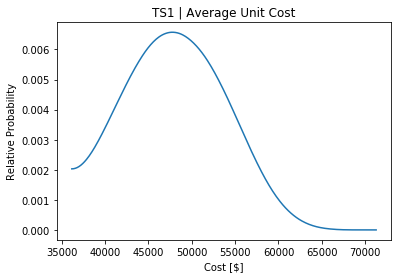

In [24]:
# plt.plot(x,y, xinterp, yinterp)
plt.plot(x,y)
plt.xlabel('Cost [$]')
plt.ylabel('Relative Probability')
plt.title(model_name + ' | Average Unit Cost')
plt.savefig(model_name+'_cost.png')
plt.show()

## Solve issue scaling y

In [ ]:
import json
import numpy as np

In [ ]:
inputsstring = '''
    {"allVariables":[{"category":"","name":"5578-AC-SETUP HEADCOUNT PRIMARY","sensitivity":0.00895,"source":"From Assumption","unit":"count","value":2},{"category":"","name":"5578-AC-SETUP HEADCOUNT QA INSPECTION","sensitivity":0.0028,"source":"From Assumption","unit":"count","value":0.625},{"category":"","name":"5578-AC-SETUP Install Ports Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":31.579},{"category":"","name":"5578-AC-SETUP Install Ports Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":126.316},{"category":"","name":"5578-AC-SETUP LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":560.1},{"category":"","name":"5578-AC-SETUP PERSONNEL UTILIZATION","sensitivity":-0.01174,"source":"From Assumption","unit":"","value":0.74},{"category":"","name":"5578-AC-SETUP PRIMARY","sensitivity":0.00726,"source":"From Assumption","unit":"minute","value":60},{"category":"","name":"5578-AC-SETUP QUALITY","sensitivity":0.00329,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5578-AC-SETUP RELIABILITY","sensitivity":-0.00726,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5578-AC-SETUP SECONDARY","sensitivity":0.00329,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5578-AC-SETUP TOTAL HEADCOUNT","sensitivity":0,"source":"Calculated Value","unit":"count","value":2.625},{"category":"","name":"5578-AFP-276 -45 LAYUP","sensitivity":0,"source":"Calculated Value","unit":"minute","value":32.403},{"category":"","name":"5578-AFP-276 0 AREA","sensitivity":0.00176,"source":"From Assumption","unit":"inch**2","value":197672},{"category":"","name":"5578-AFP-276 0 DROP ADD TOW","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.333},{"category":"","name":"5578-AFP-276 0 DROP ADD TOW FOOTPRINT","sensitivity":0.00067,"source":"From Assumption","unit":"inch","value":2000},{"category":"","name":"5578-AFP-276 0 LAYUP","sensitivity":0,"source":"Calculated Value","unit":"minute","value":10.708},{"category":"","name":"5578-AFP-276 0 OFFPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.197},{"category":"","name":"5578-AFP-276 0 ONPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":6.177},{"category":"","name":"5578-AFP-276 0 SHUTTLE DIST","sensitivity":0.00063,"source":"From Assumption","unit":"inch","value":10986},{"category":"","name":"5578-AFP-276 0 TOW COUNT","sensitivity":-0.00243,"source":"From Assumption","unit":"count","value":20},{"category":"","name":"5578-AFP-276 45 AREA","sensitivity":0.00449,"source":"From Assumption","unit":"inch**2","value":201576},{"category":"","name":"5578-AFP-276 45 DROP ADD TOW","sensitivity":0,"source":"Calculated Value","unit":"minute","value":22.336},{"category":"","name":"5578-AFP-276 45 DROP ADD TOW FOOTPRINT","sensitivity":0.01274,"source":"From Assumption","unit":"inch","value":15316},{"category":"","name":"5578-AFP-276 45 LAYUP","sensitivity":0,"source":"Calculated Value","unit":"minute","value":32.403},{"category":"","name":"5578-AFP-276 45 OFFPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.194},{"category":"","name":"5578-AFP-276 45 ONPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":7.874},{"category":"","name":"5578-AFP-276 45 SHUTTLE DIST","sensitivity":0.00125,"source":"From Assumption","unit":"inch","value":10968},{"category":"","name":"5578-AFP-276 45 TOW COUNT","sensitivity":-0.01723,"source":"From Assumption","unit":"count","value":16},{"category":"","name":"5578-AFP-276 90 AREA","sensitivity":0.00178,"source":"From Assumption","unit":"inch**2","value":199918},{"category":"","name":"5578-AFP-276 90 DROP ADD TOW","sensitivity":0,"source":"Calculated Value","unit":"minute","value":21.294},{"category":"","name":"5578-AFP-276 90 DROP ADD TOW FOOTPRINT","sensitivity":0.00607,"source":"From Assumption","unit":"inch","value":18252},{"category":"","name":"5578-AFP-276 90 LAYUP","sensitivity":0,"source":"Calculated Value","unit":"minute","value":29.737},{"category":"","name":"5578-AFP-276 90 OFFPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":2.195},{"category":"","name":"5578-AFP-276 90 ONPART","sensitivity":0,"source":"Calculated Value","unit":"minute","value":6.247},{"category":"","name":"5578-AFP-276 90 SHUTTLE DIST","sensitivity":0.00063,"source":"From Assumption","unit":"inch","value":10976},{"category":"","name":"5578-AFP-276 90 TOW COUNT","sensitivity":-0.00785,"source":"From Assumption","unit":"count","value":20},{"category":"","name":"5578-AFP-276 BUY TO FLY","sensitivity":0.32881,"source":"From Assumption","unit":"","value":1.3},{"category":"","name":"5578-AFP-276 COMPACTION","sensitivity":0.05702,"source":"From Assumption","unit":"minute/count","value":120},{"category":"","name":"5578-AFP-276 CYCLES PER PART","sensitivity":0.05702,"source":"From Assumption","unit":"count","value":1.667},{"category":"","name":"5578-AFP-276 DROP ADD TOW RATE","sensitivity":0.01947,"source":"From Assumption","unit":"second","value":0.7},{"category":"","name":"5578-AFP-276 HEADCOUNT PRIMARY","sensitivity":0.04485,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"5578-AFP-276 HEADCOUNT QA INSPECTION","sensitivity":0.04485,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"5578-AFP-276 HEADCOUNT QA REWORK","sensitivity":0.04485,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"5578-AFP-276 LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":6417.593},{"category":"","name":"5578-AFP-276 Lamination Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":318.022},{"category":"","name":"5578-AFP-276 Lamination Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":1272.088},{"category":"","name":"5578-AFP-276 PERSONNEL UTILIZATION","sensitivity":-0.13455,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"5578-AFP-276 PRIMARY","sensitivity":0,"source":"Calculated Value","unit":"minute","value":305.251},{"category":"","name":"5578-AFP-276 QUALITY","sensitivity":0,"source":"Calculated Value","unit":"minute","value":550},{"category":"","name":"5578-AFP-276 QUALITY RATE","sensitivity":0.10827,"source":"From Assumption","unit":"minute/count","value":5.5},{"category":"","name":"5578-AFP-276 RELIABILITY","sensitivity":-0.08702,"source":"From Assumption","unit":"","value":0.725},{"category":"","name":"5578-AFP-276 SETUP","sensitivity":0.05512,"source":"From Assumption","unit":"minute","value":280.02},{"category":"","name":"5578-AFP-276 TOTAL HEADCOUNT","sensitivity":0,"source":"Calculated Value","unit":"count","value":3},{"category":"","name":"5578-AFP-276 TOW WIDTH","sensitivity":-0.0275,"source":"From Assumption","unit":"inch","value":0.5},{"category":"","name":"5578-AFP-276 VMAX","sensitivity":-0.00803,"source":"From Assumption","unit":"inch/minute","value":3200},{"category":"","name":"5578-AFP-276 VOFFPART","sensitivity":-0.0025,"source":"From Assumption","unit":"inch/minute","value":5000},{"category":"","name":"5578-BAG-PREP Cell Cost","sensitivity":0.00183,"source":"From Assumption","unit":"$","value":250000},{"category":"","name":"5578-BAG-PREP Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":14.263},{"category":"","name":"5578-BAG-PREP Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":19.74},{"category":"","name":"5578-BAG-PREP Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":4934968.982},{"category":"","name":"5578-CURE BATCHED TIME","sensitivity":0,"source":"Calculated Value","unit":"minute","value":292.105},{"category":"","name":"5578-CURE CYCLES PER PART","sensitivity":0.03288,"source":"From Assumption","unit":"","value":0.625},{"category":"","name":"5578-CURE Cell Cost","sensitivity":0.0286,"source":"From Assumption","unit":"$","value":14000000},{"category":"","name":"5578-CURE Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":69.427},{"category":"","name":"5578-CURE Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":5.5},{"category":"","name":"5578-CURE Cure Autoclave Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":75.641},{"category":"","name":"5578-CURE Cure Autoclave Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":302.566},{"category":"","name":"5578-CURE HEADCOUNT PRIMARY","sensitivity":0.01427,"source":"From Assumption","unit":"count","value":2},{"category":"","name":"5578-CURE HEADCOUNT QA INSPECTION","sensitivity":0.00714,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"5578-CURE Head Count","sensitivity":0,"source":"Calculated Value","unit":"count","value":3},{"category":"","name":"5578-CURE LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":1021.16},{"category":"","name":"5578-CURE PERSONNEL UTILIZATION","sensitivity":0.02141,"source":"From Assumption","unit":"","value":0.9},{"category":"","name":"5578-CURE PRIMARY","sensitivity":0.02613,"source":"From Assumption","unit":"minute","value":210},{"category":"","name":"5578-CURE QUALITY","sensitivity":0.00338,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5578-CURE RELIABILITY","sensitivity":-0.02613,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5578-CURE SECONDARY","sensitivity":0.00338,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5578-CURE SETUP","sensitivity":0.02161,"source":"From Assumption","unit":"minute","value":120},{"category":"","name":"5578-CURE Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":77006887.897},{"category":"","name":"5578-DM Cell Cost","sensitivity":0.00202,"source":"From Assumption","unit":"$","value":1250000},{"category":"","name":"5578-DM Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":17.489},{"category":"","name":"5578-DM Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":4.347},{"category":"","name":"5578-DM Debag Demold Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":52.955},{"category":"","name":"5578-DM Debag Demold Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":211.818},{"category":"","name":"5578-DM Head Count","sensitivity":0.01651,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"5578-DM LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":787.258},{"category":"","name":"5578-DM PERSONNEL UTILIZATION","sensitivity":0.01651,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"5578-DM PRIMARY","sensitivity":0.01859,"source":"From Assumption","unit":"minute","value":180},{"category":"","name":"5578-DM RELIABILITY","sensitivity":-0.01859,"source":"From Assumption","unit":"","value":0.99},{"category":"","name":"5578-DM SECONDARY","sensitivity":0.00307,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5578-DM Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":5433862.524},{"category":"","name":"5578-FGKIT 1 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1750000.081},{"category":"","name":"5578-FGKIT 1 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":111.206},{"category":"","name":"5578-FGKIT 1 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":1.111},{"category":"","name":"5578-FGKIT 1 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1944591.435},{"category":"","name":"5578-FGKIT 3 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1750000.082},{"category":"","name":"5578-FGKIT 3 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":111.206},{"category":"","name":"5578-FGKIT 3 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":1.111},{"category":"","name":"5578-FGKIT 3 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1944591.501},{"category":"","name":"5578-FGKIT Cut and Kit Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":15.395},{"category":"","name":"5578-FGKIT Cut and Kit Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":61.579},{"category":"","name":"5578-FGKIT EQUIP COST","sensitivity":0.00144,"source":"From Assumption","unit":"$","value":1750000},{"category":"","name":"5578-FGKIT LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":2736.842},{"category":"","name":"5578-FGKIT PERSONNEL UTILIZATION","sensitivity":-0.05738,"source":"From Assumption","unit":"","value":0.225},{"category":"","name":"5578-FGKIT PRIMARY","sensitivity":0.01584,"source":"From Assumption","unit":"minute","value":15},{"category":"","name":"5578-FGKIT RELIABILITY","sensitivity":-0.01584,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5578-FGKIT SECONDARY","sensitivity":0.02867,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"5578-FGKIT SETUP","sensitivity":0.01433,"source":"From Assumption","unit":"minute","value":15},{"category":"","name":"5578-FGKIT TOTAL HEADCOUNT","sensitivity":0.05738,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"5578-HL-FG Apply Fiberglass Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":74.409},{"category":"","name":"5578-HL-FG Apply Fiberglass Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":297.638},{"category":"","name":"5578-HL-FG Cell Cost","sensitivity":0.00008,"source":"From Assumption","unit":"$","value":10000},{"category":"","name":"5578-HL-FG Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":1.478},{"category":"","name":"5578-HL-FG Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":22.164},{"category":"","name":"5578-HL-FG HEADCOUNT PRIMARY","sensitivity":0.05247,"source":"From Assumption","unit":"count","value":2.5},{"category":"","name":"5578-HL-FG HEADCOUNT QA INSPECTION","sensitivity":0.01312,"source":"From Assumption","unit":"count","value":0.625},{"category":"","name":"5578-HL-FG Head Count","sensitivity":0,"source":"Calculated Value","unit":"count","value":3.125},{"category":"","name":"5578-HL-FG LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":3128.198},{"category":"","name":"5578-HL-FG PERSONNEL UTILIZATION","sensitivity":-0.06559,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"5578-HL-FG PRIMARY","sensitivity":0.03344,"source":"From Assumption","unit":"minute","value":120},{"category":"","name":"5578-HL-FG QUALITY","sensitivity":0.03026,"source":"From Assumption","unit":"minute","value":120},{"category":"","name":"5578-HL-FG RELIABILITY","sensitivity":-0.03344,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5578-HL-FG SECONDARY","sensitivity":0,"source":"From Assumption","unit":"minute","value":0},{"category":"","name":"5578-HL-FG SETUP","sensitivity":0.01135,"source":"From Assumption","unit":"minute","value":45},{"category":"","name":"5578-HL-FG Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":221640.033},{"category":"","name":"5578-PEELPLY HEADCOUNT PRIMARY","sensitivity":0.08238,"source":"From Assumption","unit":"count","value":8},{"category":"","name":"5578-PEELPLY HEADCOUNT QA INSPECTION","sensitivity":0.00644,"source":"From Assumption","unit":"count","value":0.625},{"category":"","name":"5578-PEELPLY Install Peel Ply Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":72.692},{"category":"","name":"5578-PEELPLY Install Peel Ply Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":290.766},{"category":"","name":"5578-PEELPLY LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":4236.247},{"category":"","name":"5578-PEELPLY PERSONNEL UTILIZATION","sensitivity":-0.08882,"source":"From Assumption","unit":"","value":0.74},{"category":"","name":"5578-PEELPLY PRIMARY","sensitivity":0.08545,"source":"From Assumption","unit":"minute","value":240},{"category":"","name":"5578-PEELPLY QUALITY","sensitivity":0.00725,"source":"From Assumption","unit":"minute","value":22.5},{"category":"","name":"5578-PEELPLY RELIABILITY","sensitivity":-0.08545,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5578-PEELPLY SECONDARY","sensitivity":0.00097,"source":"From Assumption","unit":"minute","value":3},{"category":"","name":"5578-PEELPLY TOTAL HEADCOUNT","sensitivity":0,"source":"Calculated Value","unit":"count","value":8.625},{"category":"","name":"5578-STAGE 1 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":100000.027},{"category":"","name":"5578-STAGE 1 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":34.015},{"category":"","name":"5578-STAGE 1 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":2.169},{"category":"","name":"5578-STAGE 1 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":216889.398},{"category":"","name":"5578-STAGE 2 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":100000.029},{"category":"","name":"5578-STAGE 2 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":35.285},{"category":"","name":"5578-STAGE 2 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":4.378},{"category":"","name":"5578-STAGE 2 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":437827.463},{"category":"","name":"5578-STAGE 3 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":100000.027},{"category":"","name":"5578-STAGE 3 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":34.015},{"category":"","name":"5578-STAGE 3 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":2.169},{"category":"","name":"5578-STAGE 3 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":216889.407},{"category":"","name":"5578-STAGE EQUIP COST","sensitivity":0.00032,"source":"From Assumption","unit":"$","value":100000},{"category":"","name":"5578-STAGE LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":191.047},{"category":"","name":"5578-STAGE PERSONNEL UTILIZATION","sensitivity":-0.00401,"source":"From Assumption","unit":"","value":0.74},{"category":"","name":"5578-STAGE PRIMARY RATE","sensitivity":0.00439,"source":"From Assumption","unit":"minute/pound","value":0.375},{"category":"","name":"5578-STAGE Stage Thaw Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":28.275},{"category":"","name":"5578-STAGE Stage Thaw Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":113.1},{"category":"","name":"5578-STORE Freezer Cost","sensitivity":0.00093,"source":"From Assumption","unit":"$","value":2500000},{"category":"","name":"5578-STORE HEADCOUNT","sensitivity":0.00038,"source":"From Assumption","unit":"count","value":2},{"category":"","name":"5578-STORE LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":1033200.035},{"category":"","name":"5578-STORE LABOR HOURS","sensitivity":0.00038,"source":"From Assumption","unit":"minute","value":413280},{"category":"","name":"5578-VB HEADCOUNT PRIMARY","sensitivity":0.01949,"source":"From Assumption","unit":"count","value":2},{"category":"","name":"5578-VB HEADCOUNT QA INSPECTION","sensitivity":0.00609,"source":"From Assumption","unit":"count","value":0.625},{"category":"","name":"5578-VB Install Vacuum Bag Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":68.783},{"category":"","name":"5578-VB Install Vacuum Bag Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":275.132},{"category":"","name":"5578-VB LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":1219.967},{"category":"","name":"5578-VB PERSONNEL UTILIZATION","sensitivity":-0.02558,"source":"From Assumption","unit":"","value":0.74},{"category":"","name":"5578-VB PRIMARY","sensitivity":0.01454,"source":"From Assumption","unit":"minute","value":120},{"category":"","name":"5578-VB QUALITY","sensitivity":0.00658,"source":"From Assumption","unit":"minute","value":60},{"category":"","name":"5578-VB RELIABILITY","sensitivity":-0.01454,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"5578-VB SECONDARY","sensitivity":0.0074,"source":"From Assumption","unit":"minute","value":67.5},{"category":"","name":"5578-VB SETUP","sensitivity":0.00164,"source":"From Assumption","unit":"minute","value":15},{"category":"","name":"5578-VB TOTAL HEADCOUNT","sensitivity":0,"source":"Calculated Value","unit":"count","value":2.625},{"category":"","name":"5587-AFP-276 Cell Cost","sensitivity":0.09701,"source":"From Assumption","unit":"$","value":11500000},{"category":"","name":"5587-AFP-276 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":127.338},{"category":"","name":"5587-AFP-276 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":22.712},{"category":"","name":"5587-AFP-276 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":261189057.996},{"category":"","name":"8-276 MATERIAL UNIT PRICE","sensitivity":0.32881,"source":"From Assumption","unit":"$","value":40},{"category":"","name":"8-276 Material Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":15683.2},{"category":"","name":"Average Production Rate","sensitivity":0.18409,"source":"From Assumption","unit":"count/hour","value":1.05},{"category":"","name":"Average Total Flow Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":3414.84},{"category":"","name":"CV","sensitivity":0.00781,"source":"From Assumption","unit":"","value":0.25},{"category":"","name":"Labor Rate","sensitivity":0.48227,"source":"From Assumption","unit":"$","value":75},{"category":"","name":"Layup and Cure Mandrel Count of Tools","sensitivity":0,"source":"Calculated Value","unit":"count","value":64.94},{"category":"","name":"Layup and Cure Mandrel Subtotal Tool Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":146114282.167},{"category":"","name":"Layup and Cure Mandrel Tool Cost","sensitivity":0.05427,"source":"From Assumption","unit":"$","value":2250000},{"category":"","name":"M-AGV 1-3 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000.033},{"category":"","name":"M-AGV 1-3 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":3.214},{"category":"","name":"M-AGV 1-3 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":1.374},{"category":"","name":"M-AGV 1-3 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1339314.157},{"category":"","name":"M-AGV 10-1 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000.087},{"category":"","name":"M-AGV 10-1 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":5.097},{"category":"","name":"M-AGV 10-1 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":0.856},{"category":"","name":"M-AGV 10-1 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":834524.206},{"category":"","name":"M-AGV 3-5 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000.09},{"category":"","name":"M-AGV 3-5 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":5.086},{"category":"","name":"M-AGV 3-5 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":0.855},{"category":"","name":"M-AGV 3-5 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":833871.225},{"category":"","name":"M-AGV 5-7 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000.066},{"category":"","name":"M-AGV 5-7 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":3.111},{"category":"","name":"M-AGV 5-7 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":1.164},{"category":"","name":"M-AGV 5-7 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1134963.307},{"category":"","name":"M-AGV 8-10 Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":975000.078},{"category":"","name":"M-AGV 8-10 Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":5.097},{"category":"","name":"M-AGV 8-10 Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":0.856},{"category":"","name":"M-AGV 8-10 Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":834524.141},{"category":"","name":"M-AGV EQUIP COST","sensitivity":0.00185,"source":"From Assumption","unit":"$","value":975000},{"category":"","name":"M-AGV HEADCOUNT PRIMARY","sensitivity":0.04697,"source":"From Assumption","unit":"count","value":4},{"category":"","name":"M-AGV LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":2240.398},{"category":"","name":"M-AGV PERSONNEL UTILIZATION","sensitivity":-0.04697,"source":"From Assumption","unit":"","value":0.37},{"category":"","name":"M-AGV PRIMARY","sensitivity":0.05128,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"M-AGV RELIABILITY","sensitivity":-0.05128,"source":"From Assumption","unit":"","value":0.95},{"category":"","name":"M-AGV Transfer Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":8.289},{"category":"","name":"M-AGV Transfer Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":33.158},{"category":"","name":"NUM PLYS","sensitivity":0.10827,"source":"From Assumption","unit":"count","value":100},{"category":"","name":"PLANNED MAINT","sensitivity":0.32097,"source":"From Assumption","unit":"","value":1.05},{"category":"","name":"Part Mass","sensitivity":0.33321,"source":"From Assumption","unit":"pound","value":301.6},{"category":"","name":"TS-TREP Cell Cost","sensitivity":0.00056,"source":"From Assumption","unit":"$","value":300000},{"category":"","name":"TS-TREP Cell Queueing Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":7.672},{"category":"","name":"TS-TREP Cell Workstations","sensitivity":0,"source":"Calculated Value","unit":"count","value":4.989},{"category":"","name":"TS-TREP HEADCOUNT PRIMARY","sensitivity":0.00747,"source":"From Assumption","unit":"count","value":1},{"category":"","name":"TS-TREP HEADCOUNT QA INSPECTION","sensitivity":0.00187,"source":"From Assumption","unit":"count","value":0.25},{"category":"","name":"TS-TREP Head Count","sensitivity":0,"source":"Calculated Value","unit":"count","value":1.25},{"category":"","name":"TS-TREP LABOR","sensitivity":0,"source":"Calculated Value","unit":"$","value":445.246},{"category":"","name":"TS-TREP PERSONNEL UTILIZATION","sensitivity":-0.00934,"source":"From Assumption","unit":"","value":0.743},{"category":"","name":"TS-TREP PRIMARY","sensitivity":0.01118,"source":"From Assumption","unit":"minute","value":180},{"category":"","name":"TS-TREP QUALITY","sensitivity":0.00185,"source":"From Assumption","unit":"minute","value":30},{"category":"","name":"TS-TREP RELIABILITY","sensitivity":-0.01118,"source":"From Assumption","unit":"","value":0.99},{"category":"","name":"TS-TREP Subtotal Cell Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":1496694.013},{"category":"","name":"TS-TREP Tool Prep Std. Dev.","sensitivity":0,"source":"Calculated Value","unit":"minute","value":52.955},{"category":"","name":"TS-TREP Tool Prep Time","sensitivity":0,"source":"Calculated Value","unit":"minute","value":211.818},{"category":"","name":"Total Non-Recurring Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":509668571.849},{"category":"","name":"Total Production Quantity","sensitivity":-0.1893,"source":"From Assumption","unit":"count","value":56448},{"category":"","name":"Total Recurring Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":38708.116},{"category":"","name":"Total Unit Cost","sensitivity":0,"source":"Calculated Value","unit":"$","value":47737.108},{"category":"","name":"Total WIP Inventory","sensitivity":0,"source":"Calculated Value","unit":"count","value":59.76}],"cellResults":[{"cellNumber":1,"cellTimeSensitivity":0.00449,"cellVariationSensitivity":0.0001,"name":"5578-HL-FG","numWorkstations":22.164,"processTime":297.638,"queueingTime":1.478,"queueingTimeUnit":"minute","utilization":0.235,"wip":5.235},{"cellNumber":2,"cellTimeSensitivity":0.00099,"cellVariationSensitivity":0.00087,"name":"M-AGV 1-3","numWorkstations":1.374,"processTime":33.158,"queueingTime":3.214,"queueingTimeUnit":"minute","utilization":0.422,"wip":0.637},{"cellNumber":3,"cellTimeSensitivity":0.11586,"cellVariationSensitivity":0.00266,"name":"5587-AFP-276","numWorkstations":22.712,"processTime":1272.088,"queueingTime":127.338,"queueingTimeUnit":"minute","utilization":0.98,"wip":24.49},{"cellNumber":4,"cellTimeSensitivity":0.0008,"cellVariationSensitivity":0.00008,"name":"M-AGV 3-5","numWorkstations":0.855,"processTime":33.158,"queueingTime":5.086,"queueingTimeUnit":"minute","utilization":0.678,"wip":0.669},{"cellNumber":5,"cellTimeSensitivity":0.0165,"cellVariationSensitivity":0.00017,"name":"5578-BAG-PREP","numWorkstations":19.74,"processTime":989.851,"queueingTime":14.263,"queueingTimeUnit":"minute","utilization":0.878,"wip":17.572},{"cellNumber":6,"cellTimeSensitivity":0.00091,"cellVariationSensitivity":0.00073,"name":"M-AGV 5-7","numWorkstations":1.164,"processTime":33.158,"queueingTime":3.111,"queueingTimeUnit":"minute","utilization":0.498,"wip":0.635},{"cellNumber":7,"cellTimeSensitivity":0.03308,"cellVariationSensitivity":0.00156,"name":"5578-CURE","numWorkstations":5.5,"processTime":302.566,"queueingTime":69.427,"queueingTimeUnit":"minute","utilization":0.963,"wip":6.51},{"cellNumber":8,"cellTimeSensitivity":0.00516,"cellVariationSensitivity":0.00026,"name":"5578-DM","numWorkstations":4.347,"processTime":211.818,"queueingTime":17.489,"queueingTimeUnit":"minute","utilization":0.853,"wip":4.013},{"cellNumber":9,"cellTimeSensitivity":0.0008,"cellVariationSensitivity":0.00017,"name":"M-AGV 8-10","numWorkstations":0.856,"processTime":33.158,"queueingTime":5.097,"queueingTimeUnit":"minute","utilization":0.678,"wip":0.669},{"cellNumber":10,"cellTimeSensitivity":0.00369,"cellVariationSensitivity":0.0002,"name":"TS-TREP","numWorkstations":4.989,"processTime":211.818,"queueingTime":7.672,"queueingTimeUnit":"minute","utilization":0.743,"wip":3.841},{"cellNumber":11,"cellTimeSensitivity":0.0008,"cellVariationSensitivity":0.00015,"name":"M-AGV 10-1","numWorkstations":0.856,"processTime":33.158,"queueingTime":5.097,"queueingTimeUnit":"minute","utilization":0.678,"wip":0.669},{"cellNumber":12,"cellTimeSensitivity":0.0001,"cellVariationSensitivity":0.00003,"name":"5578-STAGE 1","numWorkstations":2.169,"processTime":113.1,"queueingTime":34.015,"queueingTimeUnit":"minute","utilization":0.913,"wip":2.575},{"cellNumber":13,"cellTimeSensitivity":0.00073,"cellVariationSensitivity":0.00011,"name":"5578-FGKIT 1","numWorkstations":1.111,"processTime":61.579,"queueingTime":111.206,"queueingTimeUnit":"minute","utilization":0.97,"wip":3.024},{"cellNumber":14,"cellTimeSensitivity":0.00018,"cellVariationSensitivity":0.00031,"name":"5578-STAGE 2","numWorkstations":4.378,"processTime":113.1,"queueingTime":35.285,"queueingTimeUnit":"minute","utilization":0.452,"wip":2.597},{"cellNumber":15,"cellTimeSensitivity":0.0001,"cellVariationSensitivity":0.00004,"name":"5578-STAGE 3","numWorkstations":2.169,"processTime":113.1,"queueingTime":34.015,"queueingTimeUnit":"minute","utilization":0.913,"wip":2.575},{"cellNumber":16,"cellTimeSensitivity":0.00073,"cellVariationSensitivity":0.00039,"name":"5578-FGKIT 3","numWorkstations":1.111,"processTime":61.579,"queueingTime":111.206,"queueingTimeUnit":"minute","utilization":0.97,"wip":3.024}],"costComponents":[{"name":"5578-HL-FG","value":221640},{"name":"M-AGV 1-3","value":1339314},{"name":"5587-AFP-276","value":261189058},{"name":"M-AGV 3-5","value":833871},{"name":"5578-BAG-PREP","value":4934969},{"name":"M-AGV 5-7","value":1134963},{"name":"5578-CURE","value":77006888},{"name":"5578-DM","value":5433863},{"name":"M-AGV 8-10","value":834524},{"name":"TS-TREP","value":1496694},{"name":"M-AGV 10-1","value":834524},{"name":"5578-STAGE 1","value":216889},{"name":"5578-FGKIT 1","value":1944591},{"name":"5578-STAGE 2","value":437827},{"name":"5578-STAGE 3","value":216889},{"name":"5578-FGKIT 3","value":1944592},{"name":"Layup and Cure Mandrel","value":146114282},{"name":"5578-STORE Freezer Cost","value":2500000},{"name":"5578-STORE LABOR","value":1033200}],"costDist":[{"x":36148.955875747415,"y":0.002030288852759222},{"x":36254.75675273818,"y":0.0020315529361468287},{"x":36360.55762972896,"y":0.0020353401975500237},{"x":36466.358506719735,"y":0.0020416195975701498},{"x":36572.1593837105,"y":0.002050366354284115},{"x":36677.96026070128,"y":0.0020615962382645936},{"x":36783.76113769205,"y":0.002075321255118421},{"x":36889.56201468282,"y":0.002091561667712048},{"x":36995.3628916736,"y":0.002110311718985985},{"x":37101.163768664366,"y":0.002131509480660036},{"x":37206.96464565514,"y":0.0021550813528582917},{"x":37312.76552264592,"y":0.002180964482185397},{"x":37418.566399636686,"y":0.002209084882169005},{"x":37524.36727662746,"y":0.002239373818058715},{"x":37630.16815361823,"y":0.0022717801476968293},{"x":37735.969030609005,"y":0.00230620414051954},{"x":37841.76990759978,"y":0.002342564253981448},{"x":37947.57078459055,"y":0.0023808396989880784},{"x":38053.371661581325,"y":0.002420992069501301},{"x":38159.1725385721,"y":0.002462953424504313},{"x":38264.97341556287,"y":0.0025066486837449797},{"x":38370.774292553644,"y":0.0025519979356443},{"x":38476.57516954442,"y":0.0025989388802820867},{"x":38582.37604653519,"y":0.0026474009244530686},{"x":38688.17692352596,"y":0.0026972772978517984},{"x":38793.97780051673,"y":0.002748467718067609},{"x":38899.77867750751,"y":0.002800878786353475},{"x":39005.57955449828,"y":0.002854424356228203},{"x":39111.38043148905,"y":0.0029090037458460436},{"x":39217.18130847983,"y":0.0029645383441602494},{"x":39322.9821854706,"y":0.0030210101415842645},{"x":39428.78306246137,"y":0.003078367255819567},{"x":39534.583939452146,"y":0.0031365140786063137},{"x":39640.38481644292,"y":0.0031953538966668087},{"x":39746.18569343369,"y":0.003254825482206922},{"x":39851.986570424466,"y":0.0033149033345542247},{"x":39957.787447415234,"y":0.0033755253631608923},{"x":40063.58832440601,"y":0.0034366092254548733},{"x":40169.389201396785,"y":0.003498098918631768},{"x":40275.19007838755,"y":0.003559952931066225},{"x":40380.99095537833,"y":0.0036221685453515485},{"x":40486.791832369105,"y":0.0036847134545895145},{"x":40592.59270935987,"y":0.003747495715875677},{"x":40698.39358635065,"y":0.0038104687164088767},{"x":40804.194463341424,"y":0.0038736092298394817},{"x":40909.99534033219,"y":0.003936851125099632},{"x":41015.79621732297,"y":0.004000127871013712},{"x":41121.597094313736,"y":0.004063394926477673},{"x":41227.39797130451,"y":0.004126595719025149},{"x":41333.19884829529,"y":0.00418969204210838},{"x":41438.999725286056,"y":0.0042526762754881},{"x":41544.80060227683,"y":0.004315553310897995},{"x":41650.6014792676,"y":0.004378336509537228},{"x":41756.402356258375,"y":0.004440987301309397},{"x":41862.20323324915,"y":0.004503455569061418},{"x":41968.00411023993,"y":0.004565703985585221},{"x":42073.804987230695,"y":0.004627679998516964},{"x":42179.60586422147,"y":0.004689336153747371},{"x":42285.40674121224,"y":0.0047506021202871765},{"x":42391.207618203014,"y":0.004811417153447691},{"x":42497.00849519379,"y":0.004871730334572324},{"x":42602.80937218456,"y":0.004931492725585196},{"x":42708.61024917533,"y":0.004990681701339563},{"x":42814.4111261661,"y":0.0050492467256814935},{"x":42920.21200315688,"y":0.005107155817716355},{"x":43026.01288014765,"y":0.005164405736027878},{"x":43131.81375713842,"y":0.005220943539030903},{"x":43237.6146341292,"y":0.0052767231187360935},{"x":43343.41551111997,"y":0.005331743603136411},{"x":43449.21638811074,"y":0.005385993034820079},{"x":43555.01726510152,"y":0.005439448418161013},{"x":43660.81814209229,"y":0.005492073798471042},{"x":43766.61901908306,"y":0.005543836496704764},{"x":43872.419896073836,"y":0.005594731377641007},{"x":43978.220773064604,"y":0.005644730580123793},{"x":44084.02165005538,"y":0.00569381178943182},{"x":44189.822527046155,"y":0.005741944244137351},{"x":44295.62340403692,"y":0.005789058683492282},{"x":44401.4242810277,"y":0.0058350737715818736},{"x":44507.22515801847,"y":0.0058798964183204554},{"x":44613.02603500924,"y":0.005923478471663924},{"x":44718.82691200002,"y":0.005965820930845895},{"x":44824.627788990794,"y":0.006006891466792511},{"x":44930.42866598156,"y":0.006046632596114589},{"x":45036.22954297234,"y":0.0060850121979937125},{"x":45142.03041996311,"y":0.0061220336989535025},{"x":45247.83129695388,"y":0.006157719966528574},{"x":45353.63217394466,"y":0.00619204281298123},{"x":45459.433050935426,"y":0.006224973396571015},{"x":45565.2339279262,"y":0.0062565024513900405},{"x":45671.03480491697,"y":0.006286583999102833},{"x":45776.835681907745,"y":0.006315187832028246},{"x":45882.63655889852,"y":0.006342305667158426},{"x":45988.4374358893,"y":0.0063679129584287555},{"x":46094.238312880065,"y":0.006391964970387905},{"x":46200.03918987084,"y":0.00641445931437975},{"x":46305.84006686161,"y":0.0064354138303591175},{"x":46411.640943852384,"y":0.006454850423677499},{"x":46517.44182084316,"y":0.006472794978632643},{"x":46623.24269783393,"y":0.00648922093148659},{"x":46729.043574824704,"y":0.006504131850942291},{"x":46834.84445181547,"y":0.0065175594124585465},{"x":46940.64532880625,"y":0.006529535110827211},{"x":47046.44620579702,"y":0.006540096170680694},{"x":47152.2470827878,"y":0.006549243155961986},{"x":47258.04795977857,"y":0.006556988246123438},{"x":47363.84883676934,"y":0.006563310932837665},{"x":47469.64971376011,"y":0.006568115857313184},{"x":47575.45059075089,"y":0.00657136796390012},{"x":47681.25146774166,"y":0.00657311476605002},{"x":47787.05234473243,"y":0.0065733996599582414},{"x":47892.853221723206,"y":0.006572281869309184},{"x":47998.654098713974,"y":0.006569810060734229},{"x":48104.45497570475,"y":0.006565977896524428},{"x":48210.255852695525,"y":0.006560774349667952},{"x":48316.0567296863,"y":0.00655419984017681},{"x":48421.85760667707,"y":0.00654625215222212},{"x":48527.658483667845,"y":0.006536912361671878},{"x":48633.45936065861,"y":0.00652617508479109},{"x":48739.26023764939,"y":0.006514038441483853},{"x":48845.061114640164,"y":0.006500477911899999},{"x":48950.86199163093,"y":0.0064855188508403504},{"x":49056.66286862171,"y":0.006469228341288829},{"x":49162.46374561248,"y":0.0064516485468330284},{"x":49268.26462260325,"y":0.006432784475657693},{"x":49374.06549959403,"y":0.006412638157996986},{"x":49479.866376584796,"y":0.006391254904945458},{"x":49585.66725357557,"y":0.0063687010020246765},{"x":49691.46813056635,"y":0.006345021203963205},{"x":49797.269007557115,"y":0.006320200337650835},{"x":49903.06988454789,"y":0.006294193536035157},{"x":50008.87076153867,"y":0.006266982740019785},{"x":50114.671638529435,"y":0.006238610966952628},{"x":50220.47251552021,"y":0.00620914190883576},{"x":50326.27339251098,"y":0.00617857117051745},{"x":50432.074269501754,"y":0.00614686249585611},{"x":50537.87514649253,"y":0.00611401228203926},{"x":50643.6760234833,"y":0.006080021431387949},{"x":50749.476900474074,"y":0.006044903394199763},{"x":50855.27777746484,"y":0.006008670034459541},{"x":50961.07865445562,"y":0.005971271234987153},{"x":51066.87953144639,"y":0.005932679582469793},{"x":51172.68040843717,"y":0.0058929387540742105},{"x":51278.48128542794,"y":0.005852046672213923},{"x":51384.28216241871,"y":0.00580995953595054},{"x":51490.08303940948,"y":0.005766690562305855},{"x":51595.88391640026,"y":0.005722251597670833},{"x":51701.68479339103,"y":0.0056766369782451686},{"x":51807.4856703818,"y":0.005629879877218199},{"x":51913.286547372576,"y":0.0055820159650311705},{"x":52019.087424363344,"y":0.0055330591293901105},{"x":52124.88830135412,"y":0.005483013490063494},{"x":52230.689178344895,"y":0.0054318894754315375},{"x":52336.49005533567,"y":0.005379748036552496},{"x":52442.29093232644,"y":0.005326652128192298},{"x":52548.09180931721,"y":0.005272636286355598},{"x":52653.89268630798,"y":0.005217730631200134},{"x":52759.69356329876,"y":0.005161958736565216},{"x":52865.494440289534,"y":0.005105349606542647},{"x":52971.2953172803,"y":0.005047923479803714},{"x":53077.09619427108,"y":0.004989707842534522},{"x":53182.89707126185,"y":0.004930719215551431},{"x":53288.69794825262,"y":0.0048709691239039905},{"x":53394.4988252434,"y":0.004810506295012181},{"x":53500.29970223417,"y":0.004749366176336139},{"x":53606.10057922494,"y":0.004687550679471052},{"x":53711.90145621571,"y":0.004625076451027371},{"x":53817.702333206485,"y":0.004561970783732212},{"x":53923.50321019726,"y":0.004498231276697089},{"x":54029.30408718804,"y":0.004433866076913467},{"x":54135.104964178805,"y":0.004368911951509451},{"x":54240.90584116958,"y":0.004303410003434531},{"x":54346.70671816035,"y":0.0042374034976440005},{"x":54452.507595151124,"y":0.004170913551139753},{"x":54558.3084721419,"y":0.004103955142439248},{"x":54664.109349132676,"y":0.004036559180073328},{"x":54769.910226123444,"y":0.003968780427008435},{"x":54875.71110311421,"y":0.0039006932613201693},{"x":54981.51198010499,"y":0.0038323752898488683},{"x":55087.31285709576,"y":0.0037639150883249377},{"x":55193.11373408654,"y":0.0036953716197805696},{"x":55298.91461107731,"y":0.003626774001849599},{"x":55404.71548806808,"y":0.0035581696702779047},{"x":55510.51636505885,"y":0.003489630226519228},{"x":55616.31724204963,"y":0.003421204888333581},{"x":55722.1181190404,"y":0.00335289012153198},{"x":55827.91899603118,"y":0.0032846718975456175},{"x":55933.719873021946,"y":0.0032165639692095347},{"x":56039.520750012714,"y":0.0031485736192691815},{"x":56145.32162700349,"y":0.0030807217476489096},{"x":56251.122503994266,"y":0.0030130729629847686},{"x":56356.92338098504,"y":0.002945687049219343},{"x":56462.72425797581,"y":0.0028785966020506565},{"x":56568.525134966585,"y":0.002811833051105065},{"x":56674.32601195735,"y":0.0027454627447171726},{"x":56780.12688894813,"y":0.002679520305249719},{"x":56885.927765938904,"y":0.002614004469252909},{"x":56991.72864292968,"y":0.002548934417279123},{"x":57097.52951992045,"y":0.002484355732989092},{"x":57203.33039691122,"y":0.0024203221188448683},{"x":57309.13127390199,"y":0.002356852940549392},{"x":57414.93215089277,"y":0.00229396332463416},{"x":57520.73302788354,"y":0.0022316721451657784},{"x":57626.53390487431,"y":0.002170001949258649},{"x":57732.33478186508,"y":0.002109003007304002},{"x":57838.135658855856,"y":0.002048700812949206},{"x":57943.93653584663,"y":0.00198912012169818},{"x":58049.73741283741,"y":0.0019303291084350957},{"x":58155.53828982818,"y":0.001872376738737746},{"x":58261.33916681895,"y":0.0018152704480215946},{"x":58367.14004380972,"y":0.00175901634421592},{"x":58472.940920800494,"y":0.0017036071140525105},{"x":58578.74179779127,"y":0.0016490602723471044},{"x":58684.542674782046,"y":0.0015954281508814975},{"x":58790.343551772814,"y":0.0015427494134495124},{"x":58896.14442876358,"y":0.0014910629844757837},{"x":59001.94530575436,"y":0.0014403877793886717},{"x":59107.74618274513,"y":0.001390724641570726},{"x":59213.54705973591,"y":0.001342066397035321},{"x":59319.34793672668,"y":0.0012944300683553672},{"x":59425.14881371745,"y":0.0012478568074829942},{"x":59530.94969070822,"y":0.001202361443316182},{"x":59636.750567699,"y":0.001157918341968763},{"x":59742.55144468977,"y":0.0011145037515570024},{"x":59848.35232168055,"y":0.0010721381395587808},{"x":59954.153198671316,"y":0.0010308398452144295},{"x":60059.954075662085,"y":0.0009905867867308139},{"x":60165.75495265286,"y":0.0009513467224433312},{"x":60271.555829643636,"y":0.0009131095636752933},{"x":60377.35670663441,"y":0.0008758874145533249},{"x":60483.15758362518,"y":0.000839694408227741},{"x":60588.958460615955,"y":0.0008045305582873276},{"x":60694.75933760672,"y":0.0007703717007006305},{"x":60800.5602145975,"y":0.0007371917167915288},{"x":60906.361091588275,"y":0.0007049948219339815},{"x":61012.16196857905,"y":0.0006737893981026574},{"x":61117.96284556982,"y":0.0006435718679849793},{"x":61223.76372256059,"y":0.0006143407903062565},{"x":61329.56459955136,"y":0.0005860727263055421},{"x":61435.36547654214,"y":0.0005587323902427939},{"x":61541.16635353291,"y":0.0005323009510698026},{"x":61646.96723052368,"y":0.0005067640371416365},{"x":61752.76810751446,"y":0.00048209368852580956},{"x":61858.568984505226,"y":0.0004582786413626089},{"x":61964.369861496,"y":0.0004353123027123039},{"x":62070.17073848678,"y":0.00041317266056430297},{"x":62175.97161547755,"y":0.0003918605911278156},{"x":62281.77249246832,"y":0.00037137772776267396},{"x":62387.57336945909,"y":0.00035171036172507587},{"x":62493.374246449865,"y":0.00033284156587583285},{"x":62599.17512344064,"y":0.00031475126148405494},{"x":62704.976000431416,"y":0.00029742032067076117},{"x":62810.776877422184,"y":0.0002808165606907645},{"x":62916.57775441295,"y":0.000264908952150379},{"x":63022.37863140373,"y":0.0002496737762693102},{"x":63128.1795083945,"y":0.00023508868368479568},{"x":63233.98038538528,"y":0.00022114284065941138},{"x":63339.781262376055,"y":0.0002078249022307854},{"x":63445.58213936682,"y":0.00019512305698498117},{"x":63551.38301635759,"y":0.00018302909687278507},{"x":63657.18389334837,"y":0.00017153442640109397},{"x":63762.98477033914,"y":0.0001606260733533666},{"x":63868.78564732992,"y":0.00015027467037893682},{"x":63974.586524320686,"y":0.00014044664049862917},{"x":64080.387401311455,"y":0.00013111237602182144},{"x":64186.18827830223,"y":0.00012224836699548967},{"x":64291.989155293006,"y":0.00011385137519436732},{"x":64397.79003228378,"y":0.00010591631928955985},{"x":64503.59090927455,"y":0.00009844031810426126},{"x":64609.391786265325,"y":0.00009141465558037697},{"x":64715.19266325609,"y":0.00008481676877275707},{"x":64820.99354024687,"y":0.00007861637169788227},{"x":64926.794417237645,"y":0.00007278563286388691},{"x":65032.59529422842,"y":0.00006731336631585757},{"x":65138.39617121919,"y":0.00006218495977152206},{"x":65244.19704820996,"y":0.00005738042068823538},{"x":65349.99792520073,"y":0.00005287847836644472},{"x":65455.79880219151,"y":0.00004865867949643944},{"x":65561.59967918228,"y":0.000044699457277203774},{"x":65667.40055617306,"y":0.00004097821653072751},{"x":65773.20143316383,"y":0.00003748550408196619},{"x":65879.0023101546,"y":0.00003422303446518768},{"x":65984.80318714537,"y":0.000031185578748340586},{"x":66090.60406413615,"y":0.00002834489236112838},{"x":66196.40494112692,"y":0.00002567597737663873},{"x":66302.20581811768,"y":0.000023175285575888845},{"x":66408.00669510846,"y":0.000020840616440860068},{"x":66513.80757209923,"y":0.00001866509103588771},{"x":66619.60844909001,"y":0.000016649248761776294},{"x":66725.40932608079,"y":0.00001479501042398159},{"x":66831.21020307156,"y":0.000013095612646986665},{"x":66937.01108006234,"y":0.000011545692571337499},{"x":67042.8119570531,"y":0.000010141309018399197},{"x":67148.61283404387,"y":0.000008873923241338099},{"x":67254.41371103465,"y":0.000007732444224671004},{"x":67360.21458802542,"y":0.000006709307258485716},{"x":67466.01546501619,"y":0.000005796480590862125},{"x":67571.81634200696,"y":0.000004983485524511216},{"x":67677.61721899774,"y":0.000004263472574455404},{"x":67783.41809598851,"y":0.000003631236898800043},{"x":67889.21897297929,"y":0.0000030812272388500596},{"x":67995.01984997006,"y":0.0000026075678273918752},{"x":68100.82072696082,"y":0.0000022040815776622377},{"x":68206.6216039516,"y":0.0000018542564564052578},{"x":68312.42248094238,"y":0.0000015453918564393426},{"x":68418.22335793315,"y":0.0000012766951242172727},{"x":68524.02423492393,"y":0.0000010472150819687976},{"x":68629.82511191469,"y":8.538341805482711e-7},{"x":68735.62598890546,"y":6.912808029768595e-7},{"x":68841.42686589624,"y":5.52150069106379e-7},{"x":68947.22774288701,"y":4.3095626133121585e-7},{"x":69053.02861987779,"y":3.2817767624247473e-7},{"x":69158.82949686857,"y":2.422083329439609e-7},{"x":69264.63037385934,"y":1.71375912141547e-7},{"x":69370.4312508501,"y":1.1394835602341393e-7},{"x":69476.23212784088,"y":6.81407039009333e-8},{"x":69582.03300483165,"y":3.4133737649507854e-8},{"x":69687.83388182241,"y":1.2061667228626586e-8},{"x":69793.63475881319,"y":2.011601016470909e-9},{"x":69899.43563580397,"y":0},{"x":70005.23651279474,"y":0},{"x":70111.03738978552,"y":0},{"x":70216.83826677629,"y":0},{"x":70322.63914376707,"y":0},{"x":70428.44002075784,"y":0},{"x":70534.2408977486,"y":0},{"x":70640.04177473938,"y":0},{"x":70745.84265173016,"y":0},{"x":70851.64352872092,"y":0},{"x":70957.44440571169,"y":0},{"x":71063.24528270247,"y":0},{"x":71169.04615969324,"y":0},{"x":71274.84703668402,"y":0}],"lineSummary":[{"type":"Average Production Rate","value":1.05},{"type":"Average Total Flow Time","value":56.913999092464316},{"type":"Total WIP Inventory","value":59.75969904708743}],"manufacturing":{},"processResults":[{"processTime":297.638,"stdev":74.409,"type":"5578-HL-FG Apply Fiberglass","unit":"min"},{"processTime":33.158,"stdev":8.289,"type":"M-AGV Transfer","unit":"min"},{"processTime":1272.088,"stdev":318.022,"type":"5578-AFP-276 Lamination","unit":"min"},{"processTime":33.158,"stdev":8.289,"type":"M-AGV Transfer","unit":"min"},{"processTime":297.638,"stdev":74.409,"type":"5578-HL-FG Apply Fiberglass","unit":"min"},{"processTime":126.316,"stdev":31.579,"type":"5578-AC-SETUP Install Ports","unit":"min"},{"processTime":290.766,"stdev":72.692,"type":"5578-PEELPLY Install Peel Ply","unit":"min"},{"processTime":275.132,"stdev":68.783,"type":"5578-VB Install Vacuum Bag","unit":"min"},{"processTime":33.158,"stdev":8.289,"type":"M-AGV Transfer","unit":"min"},{"processTime":302.566,"stdev":75.641,"type":"5578-CURE Cure Autoclave","unit":"min"},{"processTime":211.818,"stdev":52.955,"type":"5578-DM Debag Demold","unit":"min"}],"rangeVars":[{"best":10976,"likely":10976,"name":"5578-AFP-276 90 SHUTTLE DIST","unit":"inch","value":[],"worst":10976},{"best":2,"likely":3,"name":"5578-AFP-276 TOTAL HEADCOUNT","unit":"count","value":[],"worst":4},{"best":4,"likely":4,"name":"M-AGV HEADCOUNT PRIMARY","unit":"count","value":[],"worst":4},{"best":3058.493,"likely":4236.247,"name":"5578-PEELPLY LABOR","unit":"$","value":[],"worst":5316.409},{"best":36043.155,"likely":47737.108,"name":"Total Unit Cost","unit":"$","value":[],"worst":71274.847},{"best":70.067,"likely":72.692,"name":"5578-PEELPLY Install Peel Ply Std. Dev.","unit":"minute","value":[],"worst":75.316},{"best":0.95,"likely":0.95,"name":"5578-CURE RELIABILITY","unit":"","value":[],"worst":0.95},{"best":0.43,"likely":0.37,"name":"M-AGV PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.31},{"best":197672,"likely":197672,"name":"5578-AFP-276 0 AREA","unit":"inch**2","value":[],"worst":197672},{"best":10.593,"likely":14.263,"name":"5578-BAG-PREP Cell Queueing Time","unit":"minute","value":[],"worst":16.112},{"best":0.99,"likely":0.99,"name":"TS-TREP RELIABILITY","unit":"","value":[],"worst":0.99},{"best":14.891,"likely":22.336,"name":"5578-AFP-276 45 DROP ADD TOW","unit":"minute","value":[],"worst":44.672},{"best":201576,"likely":201576,"name":"5578-AFP-276 45 AREA","unit":"inch**2","value":[],"worst":201576},{"best":2.197,"likely":2.197,"name":"5578-AFP-276 0 OFFPART","unit":"minute","value":[],"worst":2.197},{"best":5.091,"likely":5.097,"name":"M-AGV 8-10 Cell Queueing Time","unit":"minute","value":[],"worst":5.092},{"best":2,"likely":1.667,"name":"5578-AFP-276 CYCLES PER PART","unit":"count","value":[],"worst":1},{"best":425.015,"likely":318.022,"name":"5578-AFP-276 Lamination Std. Dev.","unit":"minute","value":[],"worst":241.209},{"best":688800.04,"likely":1033200.035,"name":"5578-STORE LABOR","unit":"$","value":[],"worst":1377600.029},{"best":3,"likely":2,"name":"5578-CURE SETUP","unit":"hour","value":[],"worst":1},{"best":0.5,"likely":0.5,"name":"TS-TREP QUALITY","unit":"hour","value":[],"worst":0.5},{"best":61.579,"likely":61.579,"name":"5578-FGKIT Cut and Kit Time","unit":"minute","value":[],"worst":61.579},{"best":22.334,"likely":32.403,"name":"5578-AFP-276 -45 LAYUP","unit":"minute","value":[],"worst":62.613},{"best":8000000,"likely":11500000,"name":"5587-AFP-276 Cell Cost","unit":"$","value":[],"worst":15000000},{"best":2.144,"likely":2.169,"name":"5578-STAGE 1 Cell Workstations","unit":"count","value":[],"worst":2.211},{"best":0.5,"likely":0.5,"name":"5578-AFP-276 TOW WIDTH","unit":"inch","value":[],"worst":0.5},{"best":100000,"likely":300000,"name":"TS-TREP Cell Cost","unit":"$","value":[],"worst":500000},{"best":30.259,"likely":22.712,"name":"5587-AFP-276 Cell Workstations","unit":"count","value":[],"worst":17.285},{"best":0.5,"likely":0.5,"name":"5578-AC-SETUP QUALITY","unit":"hour","value":[],"worst":0.5},{"best":773589.804,"likely":1134963.307,"name":"M-AGV 5-7 Subtotal Cell Cost","unit":"$","value":[],"worst":1511667.656},{"best":31.579,"likely":31.579,"name":"5578-AC-SETUP Install Ports Std. Dev.","unit":"minute","value":[],"worst":31.579},{"best":15316,"likely":15316,"name":"5578-AFP-276 45 DROP ADD TOW FOOTPRINT","unit":"inch","value":[],"worst":15316},{"best":0.5,"likely":0.5,"name":"5578-CURE QUALITY","unit":"hour","value":[],"worst":0.5},{"best":1663701.507,"likely":1944591.435,"name":"5578-FGKIT 1 Subtotal Cell Cost","unit":"$","value":[],"worst":2231978.481},{"best":350.228,"likely":445.246,"name":"TS-TREP LABOR","unit":"$","value":[],"worst":519.162},{"best":2165.353,"likely":3128.198,"name":"5578-HL-FG LABOR","unit":"$","value":[],"worst":4085.222},{"best":25.146,"likely":29.737,"name":"5578-AFP-276 90 LAYUP","unit":"minute","value":[],"worst":36.622},{"best":2,"likely":2,"name":"5578-STORE HEADCOUNT","unit":"count","value":[],"worst":2},{"best":3,"likely":3,"name":"5578-CURE Head Count","unit":"count","value":[],"worst":3},{"best":2,"likely":2,"name":"5578-CURE HEADCOUNT PRIMARY","unit":"count","value":[],"worst":2},{"best":0.5,"likely":0.5,"name":"5578-CURE SECONDARY","unit":"hour","value":[],"worst":0.5},{"best":1943742.914,"likely":4934968.982,"name":"5578-BAG-PREP Subtotal Cell Cost","unit":"$","value":[],"worst":8187628.401},{"best":1663701.54,"likely":1944591.501,"name":"5578-FGKIT 3 Subtotal Cell Cost","unit":"$","value":[],"worst":2231978.58},{"best":0.25,"likely":0.25,"name":"CV","unit":"","value":[],"worst":0.25},{"best":0.25,"likely":0.625,"name":"5578-PEELPLY HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":63.257,"likely":75.641,"name":"5578-CURE Cure Autoclave Std. Dev.","unit":"minute","value":[],"worst":88.026},{"best":1.109,"likely":1.111,"name":"5578-FGKIT 3 Cell Workstations","unit":"count","value":[],"worst":1.116},{"best":929029.518,"likely":1339314.157,"name":"M-AGV 1-3 Subtotal Cell Cost","unit":"$","value":[],"worst":1695463.291},{"best":10000,"likely":10000,"name":"5578-HL-FG Cell Cost","unit":"$","value":[],"worst":10000},{"best":177269.798,"likely":221640.033,"name":"5578-HL-FG Subtotal Cell Cost","unit":"$","value":[],"worst":260104.025},{"best":8,"likely":8,"name":"5578-PEELPLY HEADCOUNT PRIMARY","unit":"count","value":[],"worst":8},{"best":0.375,"likely":0.375,"name":"5578-STAGE PRIMARY RATE","unit":"minute/pound","value":[],"worst":0.375},{"best":4,"likely":4,"name":"5578-PEELPLY PRIMARY","unit":"hour","value":[],"worst":4},{"best":2.195,"likely":2.195,"name":"5578-AFP-276 90 OFFPART","unit":"minute","value":[],"worst":2.195},{"best":5000,"likely":5000,"name":"5578-AFP-276 VOFFPART","unit":"inch/minute","value":[],"worst":5000},{"best":0.25,"likely":0.625,"name":"5578-CURE CYCLES PER PART","unit":"","value":[],"worst":1},{"best":0.5,"likely":0.5,"name":"5578-AC-SETUP SECONDARY","unit":"hour","value":[],"worst":0.5},{"best":214418.133,"likely":216889.398,"name":"5578-STAGE 1 Subtotal Cell Cost","unit":"$","value":[],"worst":221058.93},{"best":0.7,"likely":0.7,"name":"5578-AFP-276 DROP ADD TOW RATE","unit":"second","value":[],"worst":0.7},{"best":22.334,"likely":32.403,"name":"5578-AFP-276 45 LAYUP","unit":"minute","value":[],"worst":62.613},{"best":110.882,"likely":191.047,"name":"5578-STAGE LABOR","unit":"$","value":[],"worst":299.206},{"best":8.289,"likely":8.289,"name":"M-AGV Transfer Std. Dev.","unit":"minute","value":[],"worst":8.289},{"best":3.5,"likely":3.5,"name":"5578-CURE PRIMARY","unit":"hour","value":[],"worst":3.5},{"best":418834280.791,"likely":509668571.849,"name":"Total Non-Recurring Cost","unit":"$","value":[],"worst":580609666.308},{"best":74.409,"likely":74.409,"name":"5578-HL-FG Apply Fiberglass Std. Dev.","unit":"minute","value":[],"worst":74.409},{"best":1,"likely":1,"name":"5578-AC-SETUP PRIMARY","unit":"hour","value":[],"worst":1},{"best":1,"likely":1,"name":"5578-AFP-276 HEADCOUNT PRIMARY","unit":"count","value":[],"worst":1},{"best":118.701,"likely":111.206,"name":"5578-FGKIT 3 Cell Queueing Time","unit":"minute","value":[],"worst":96.889},{"best":10986,"likely":10986,"name":"5578-AFP-276 0 SHUTTLE DIST","unit":"inch","value":[],"worst":10986},{"best":0.75,"likely":0.75,"name":"5578-HL-FG SETUP","unit":"hour","value":[],"worst":0.75},{"best":1500000.088,"likely":1750000.081,"name":"5578-FGKIT 1 Cell Cost","unit":"$","value":[],"worst":2000000.075},{"best":30,"likely":30,"name":"M-AGV PRIMARY","unit":"minute","value":[],"worst":30},{"best":1.25,"likely":1.25,"name":"TS-TREP Head Count","unit":"count","value":[],"worst":1.25},{"best":1.429,"likely":1.374,"name":"M-AGV 1-3 Cell Workstations","unit":"count","value":[],"worst":1.304},{"best":211.818,"likely":211.818,"name":"TS-TREP Tool Prep Time","unit":"minute","value":[],"worst":211.818},{"best":118.701,"likely":111.206,"name":"5578-FGKIT 1 Cell Queueing Time","unit":"minute","value":[],"worst":96.889},{"best":0.99,"likely":0.99,"name":"5578-DM RELIABILITY","unit":"","value":[],"worst":0.99},{"best":0.25,"likely":0.625,"name":"5578-AC-SETUP HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":650000.039,"likely":975000.033,"name":"M-AGV 1-3 Cell Cost","unit":"$","value":[],"worst":1300000.032},{"best":0.95,"likely":0.95,"name":"5578-HL-FG RELIABILITY","unit":"","value":[],"worst":0.95},{"best":3,"likely":3,"name":"5578-DM PRIMARY","unit":"hour","value":[],"worst":3},{"best":0.63,"likely":0.743,"name":"5578-HL-FG PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":1,"likely":1,"name":"TS-TREP HEADCOUNT PRIMARY","unit":"count","value":[],"worst":1},{"best":50,"likely":75,"name":"Labor Rate","unit":"$","value":[],"worst":100},{"best":2,"likely":2,"name":"5578-VB HEADCOUNT PRIMARY","unit":"count","value":[],"worst":2},{"best":28.275,"likely":28.275,"name":"5578-STAGE Stage Thaw Std. Dev.","unit":"minute","value":[],"worst":28.275},{"best":62.694,"likely":56.914,"name":"Average Total Flow Time","unit":"hour","value":[],"worst":53.207},{"best":3200,"likely":3200,"name":"5578-AFP-276 VMAX","unit":"inch/minute","value":[],"worst":3200},{"best":55119407.314,"likely":77006887.897,"name":"5578-CURE Subtotal Cell Cost","unit":"$","value":[],"worst":102425514.217},{"best":650000.096,"likely":975000.087,"name":"M-AGV 10-1 Cell Cost","unit":"$","value":[],"worst":1300000.074},{"best":2,"likely":2,"name":"5578-AC-SETUP HEADCOUNT PRIMARY","unit":"count","value":[],"worst":2},{"best":0,"likely":0,"name":"5578-HL-FG SECONDARY","unit":"hour","value":[],"worst":0},{"best":0,"likely":0.05,"name":"5578-PEELPLY SECONDARY","unit":"hour","value":[],"worst":0.1},{"best":1500000.088,"likely":1750000.082,"name":"5578-FGKIT 3 Cell Cost","unit":"$","value":[],"worst":2000000.077},{"best":39.563,"likely":34.015,"name":"5578-STAGE 3 Cell Queueing Time","unit":"minute","value":[],"worst":27.358},{"best":0.63,"likely":0.743,"name":"5578-AFP-276 PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":297.638,"likely":297.638,"name":"5578-HL-FG Apply Fiberglass Time","unit":"minute","value":[],"worst":297.638},{"best":520.704,"likely":1219.967,"name":"5578-VB LABOR","unit":"$","value":[],"worst":2493.734},{"best":2.25,"likely":2.625,"name":"5578-VB TOTAL HEADCOUNT","unit":"count","value":[],"worst":3},{"best":4,"likely":4,"name":"5578-DM Head Count","unit":"count","value":[],"worst":4},{"best":556114.003,"likely":833871.225,"name":"M-AGV 3-5 Subtotal Cell Cost","unit":"$","value":[],"worst":1111980.71},{"best":100000,"likely":100000,"name":"5578-STAGE EQUIP COST","unit":"$","value":[],"worst":100000},{"best":100000.032,"likely":100000.027,"name":"5578-STAGE 3 Cell Cost","unit":"$","value":[],"worst":100000.014},{"best":0.63,"likely":0.743,"name":"TS-TREP PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":100,"likely":100,"name":"NUM PLYS","unit":"count","value":[],"worst":100},{"best":1.794,"likely":1.478,"name":"5578-HL-FG Cell Queueing Time","unit":"minute","value":[],"worst":1.286},{"best":0.856,"likely":0.855,"name":"M-AGV 3-5 Cell Workstations","unit":"count","value":[],"worst":0.855},{"best":52.955,"likely":52.955,"name":"TS-TREP Tool Prep Std. Dev.","unit":"minute","value":[],"worst":52.955},{"best":242074571.528,"likely":261189057.996,"name":"5587-AFP-276 Subtotal Cell Cost","unit":"$","value":[],"worst":259269521.488},{"best":444.818,"likely":787.258,"name":"5578-DM LABOR","unit":"$","value":[],"worst":1200.303},{"best":548339.555,"likely":1496694.013,"name":"TS-TREP Subtotal Cell Cost","unit":"$","value":[],"worst":2430226.617},{"best":60,"likely":120,"name":"5578-AFP-276 COMPACTION","unit":"minute/count","value":[],"worst":180},{"best":0.25,"likely":0.25,"name":"TS-TREP HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":0.25},{"best":650000.074,"likely":975000.066,"name":"M-AGV 5-7 Cell Cost","unit":"$","value":[],"worst":1300000.056},{"best":292.105,"likely":292.105,"name":"5578-CURE BATCHED TIME","unit":"minute","value":[],"worst":292.105},{"best":28623.33,"likely":38708.116,"name":"Total Recurring Cost","unit":"$","value":[],"worst":60989.103},{"best":0.95,"likely":0.725,"name":"5578-AFP-276 RELIABILITY","unit":"","value":[],"worst":0.5},{"best":5.148,"likely":6.177,"name":"5578-AFP-276 0 ONPART","unit":"minute","value":[],"worst":7.722},{"best":0.95,"likely":0.95,"name":"5578-AC-SETUP RELIABILITY","unit":"","value":[],"worst":0.95},{"best":253.026,"likely":302.566,"name":"5578-CURE Cure Autoclave Time","unit":"minute","value":[],"worst":352.105},{"best":100000,"likely":250000,"name":"5578-BAG-PREP Cell Cost","unit":"$","value":[],"worst":400000},{"best":2.194,"likely":2.194,"name":"5578-AFP-276 45 OFFPART","unit":"minute","value":[],"worst":2.194},{"best":556491.053,"likely":834524.141,"name":"M-AGV 8-10 Subtotal Cell Cost","unit":"$","value":[],"worst":1112954.429},{"best":24,"likely":20,"name":"5578-AFP-276 90 TOW COUNT","unit":"count","value":[],"worst":16},{"best":15.395,"likely":15.395,"name":"5578-FGKIT Cut and Kit Std. Dev.","unit":"minute","value":[],"worst":15.395},{"best":3,"likely":3,"name":"TS-TREP PRIMARY","unit":"hour","value":[],"worst":3},{"best":0.5,"likely":0.5,"name":"5578-DM SECONDARY","unit":"hour","value":[],"worst":0.5},{"best":1026.316,"likely":2736.842,"name":"5578-FGKIT LABOR","unit":"$","value":[],"worst":16421.053},{"best":0.95,"likely":0.95,"name":"M-AGV RELIABILITY","unit":"","value":[],"worst":0.95},{"best":446275.255,"likely":437827.463,"name":"5578-STAGE 2 Subtotal Cell Cost","unit":"$","value":[],"worst":423174.407},{"best":0.25,"likely":0.625,"name":"5578-HL-FG HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":1.75,"likely":2,"name":"5578-VB PRIMARY","unit":"hour","value":[],"worst":2.25},{"best":35,"likely":40,"name":"8-276 MATERIAL UNIT PRICE","unit":"$","value":[],"worst":45},{"best":0.75,"likely":1,"name":"5578-VB QUALITY","unit":"hour","value":[],"worst":1.25},{"best":5.091,"likely":5.097,"name":"M-AGV 10-1 Cell Queueing Time","unit":"minute","value":[],"worst":5.092},{"best":0,"likely":1,"name":"5578-AFP-276 HEADCOUNT QA REWORK","unit":"count","value":[],"worst":2},{"best":1.109,"likely":1.111,"name":"5578-FGKIT 1 Cell Workstations","unit":"count","value":[],"worst":1.116},{"best":1.19,"likely":1.164,"name":"M-AGV 5-7 Cell Workstations","unit":"count","value":[],"worst":1.163},{"best":0.856,"likely":0.856,"name":"M-AGV 8-10 Cell Workstations","unit":"count","value":[],"worst":0.856},{"best":126.316,"likely":126.316,"name":"5578-AC-SETUP Install Ports Time","unit":"minute","value":[],"worst":126.316},{"best":106443245.321,"likely":146114282.167,"name":"Layup and Cure Mandrel Subtotal Tool Cost","unit":"$","value":[],"worst":183199480.822},{"best":33.158,"likely":33.158,"name":"M-AGV Transfer Time","unit":"minute","value":[],"worst":33.158},{"best":5.082,"likely":5.086,"name":"M-AGV 3-5 Cell Queueing Time","unit":"minute","value":[],"worst":5.08},{"best":0.85,"likely":0.74,"name":"5578-STAGE PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.63},{"best":2.75,"likely":3.125,"name":"5578-HL-FG Head Count","unit":"count","value":[],"worst":3.5},{"best":500000,"likely":1250000,"name":"5578-DM Cell Cost","unit":"$","value":[],"worst":2000000},{"best":5.249,"likely":7.874,"name":"5578-AFP-276 45 ONPART","unit":"minute","value":[],"worst":15.748},{"best":150.094,"likely":127.338,"name":"5587-AFP-276 Cell Queueing Time","unit":"minute","value":[],"worst":110.057},{"best":199918,"likely":199918,"name":"5578-AFP-276 90 AREA","unit":"inch**2","value":[],"worst":199918},{"best":211.818,"likely":211.818,"name":"5578-DM Debag Demold Time","unit":"minute","value":[],"worst":211.818},{"best":14250.6,"likely":15683.2,"name":"8-276 Material Cost","unit":"$","value":[],"worst":16965},{"best":600.938,"likely":1021.16,"name":"5578-CURE LABOR","unit":"$","value":[],"worst":1496.447},{"best":5.206,"likely":6.247,"name":"5578-AFP-276 90 ONPART","unit":"minute","value":[],"worst":7.809},{"best":0.95,"likely":0.9,"name":"5578-CURE PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":18252,"likely":18252,"name":"5578-AFP-276 90 DROP ADD TOW FOOTPRINT","unit":"inch","value":[],"worst":18252},{"best":100000.032,"likely":100000.027,"name":"5578-STAGE 1 Cell Cost","unit":"$","value":[],"worst":100000.014},{"best":6888,"likely":6888,"name":"5578-STORE LABOR HOURS","unit":"hour","value":[],"worst":6888},{"best":1700.061,"likely":1272.088,"name":"5578-AFP-276 Lamination Time","unit":"minute","value":[],"worst":964.837},{"best":0.4,"likely":0.225,"name":"5578-FGKIT PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.05},{"best":8,"likely":4.667,"name":"5578-AFP-276 SETUP","unit":"hour","value":[],"worst":2},{"best":13.067,"likely":17.489,"name":"5578-DM Cell Queueing Time","unit":"minute","value":[],"worst":19.356},{"best":2.144,"likely":2.169,"name":"5578-STAGE 3 Cell Workstations","unit":"count","value":[],"worst":2.211},{"best":0.63,"likely":0.74,"name":"5578-PEELPLY PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":17.745,"likely":21.294,"name":"5578-AFP-276 90 DROP ADD TOW","unit":"minute","value":[],"worst":26.618},{"best":0.25,"likely":0.625,"name":"5578-VB HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":0.95,"likely":0.95,"name":"5578-FGKIT RELIABILITY","unit":"","value":[],"worst":0.95},{"best":39.563,"likely":34.015,"name":"5578-STAGE 1 Cell Queueing Time","unit":"minute","value":[],"worst":27.358},{"best":12000000,"likely":14000000,"name":"5578-CURE Cell Cost","unit":"$","value":[],"worst":16000000},{"best":2264682.556,"likely":5433862.524,"name":"5578-DM Subtotal Cell Cost","unit":"$","value":[],"worst":8585328.587},{"best":4.529,"likely":4.347,"name":"5578-DM Cell Workstations","unit":"count","value":[],"worst":4.293},{"best":3.223,"likely":3.111,"name":"M-AGV 5-7 Cell Queueing Time","unit":"minute","value":[],"worst":3.077},{"best":0.25,"likely":0.25,"name":"5578-FGKIT PRIMARY","unit":"hour","value":[],"worst":0.25},{"best":1.05,"likely":1.05,"name":"PLANNED MAINT","unit":"","value":[],"worst":1.05},{"best":556491.118,"likely":834524.206,"name":"M-AGV 10-1 Subtotal Cell Cost","unit":"$","value":[],"worst":1112954.482},{"best":0.25,"likely":0.25,"name":"5578-VB SETUP","unit":"hour","value":[],"worst":0.25},{"best":1.05,"likely":1.05,"name":"Average Production Rate","unit":"count/hour","value":[],"worst":1.05},{"best":4497.741,"likely":6417.593,"name":"5578-AFP-276 LABOR","unit":"$","value":[],"worst":7567.348},{"best":2000,"likely":2000,"name":"5578-AFP-276 0 DROP ADD TOW FOOTPRINT","unit":"inch","value":[],"worst":2000},{"best":199.103,"likely":305.251,"name":"5578-AFP-276 PRIMARY","unit":"minute","value":[],"worst":354.684},{"best":236.053,"likely":275.132,"name":"5578-VB Install Vacuum Bag Time","unit":"minute","value":[],"worst":314.211},{"best":1,"likely":1,"name":"5578-CURE HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":2.25,"likely":2.625,"name":"5578-AC-SETUP TOTAL HEADCOUNT","unit":"count","value":[],"worst":3},{"best":0.95,"likely":0.95,"name":"5578-PEELPLY RELIABILITY","unit":"","value":[],"worst":0.95},{"best":650000,"likely":975000,"name":"M-AGV EQUIP COST","unit":"$","value":[],"worst":1300000},{"best":71.793,"likely":69.427,"name":"5578-CURE Cell Queueing Time","unit":"minute","value":[],"worst":69.271},{"best":40.909,"likely":35.285,"name":"5578-STAGE 2 Cell Queueing Time","unit":"minute","value":[],"worst":28.525},{"best":1500000,"likely":2250000,"name":"Layup and Cure Mandrel Tool Cost","unit":"$","value":[],"worst":3000000},{"best":70.962,"likely":64.94,"name":"Layup and Cure Mandrel Count of Tools","unit":"count","value":[],"worst":61.066},{"best":1.944,"likely":2.333,"name":"5578-AFP-276 0 DROP ADD TOW","unit":"minute","value":[],"worst":2.917},{"best":1285.19,"likely":2240.398,"name":"M-AGV LABOR","unit":"$","value":[],"worst":3565.365},{"best":24,"likely":16,"name":"5578-AFP-276 45 TOW COUNT","unit":"count","value":[],"worst":8},{"best":0.85,"likely":0.74,"name":"5578-VB PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.63},{"best":2.5,"likely":2.5,"name":"5578-HL-FG HEADCOUNT PRIMARY","unit":"count","value":[],"worst":2.5},{"best":1.35,"likely":1.3,"name":"5578-AFP-276 BUY TO FLY","unit":"","value":[],"worst":1.25},{"best":278.638,"likely":560.1,"name":"5578-AC-SETUP LABOR","unit":"$","value":[],"worst":1002.506},{"best":5.037,"likely":7.672,"name":"TS-TREP Cell Queueing Time","unit":"minute","value":[],"worst":8.752},{"best":1000,"likely":550,"name":"5578-AFP-276 QUALITY","unit":"minute","value":[],"worst":100},{"best":5.483,"likely":4.989,"name":"TS-TREP Cell Workstations","unit":"count","value":[],"worst":4.86},{"best":0.95,"likely":0.95,"name":"5578-VB RELIABILITY","unit":"","value":[],"worst":0.95},{"best":214418.129,"likely":216889.407,"name":"5578-STAGE 3 Subtotal Cell Cost","unit":"$","value":[],"worst":221058.952},{"best":0.63,"likely":0.743,"name":"5578-DM PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.85},{"best":10,"likely":5.5,"name":"5578-AFP-276 QUALITY RATE","unit":"minute/count","value":[],"worst":1},{"best":2,"likely":2,"name":"5578-HL-FG PRIMARY","unit":"hour","value":[],"worst":2},{"best":650000.097,"likely":975000.09,"name":"M-AGV 3-5 Cell Cost","unit":"$","value":[],"worst":1300000.078},{"best":2000000,"likely":2500000,"name":"5578-STORE Freezer Cost","unit":"$","value":[],"worst":3000000},{"best":19.437,"likely":19.74,"name":"5578-BAG-PREP Cell Workstations","unit":"count","value":[],"worst":20.469},{"best":1,"likely":1.125,"name":"5578-VB SECONDARY","unit":"hour","value":[],"worst":1.25},{"best":280.269,"likely":290.766,"name":"5578-PEELPLY Install Peel Ply Time","unit":"minute","value":[],"worst":301.263},{"best":4.463,"likely":4.378,"name":"5578-STAGE 2 Cell Workstations","unit":"count","value":[],"worst":4.232},{"best":0.856,"likely":0.856,"name":"M-AGV 10-1 Cell Workstations","unit":"count","value":[],"worst":0.856},{"best":10968,"likely":10968,"name":"5578-AFP-276 45 SHUTTLE DIST","unit":"inch","value":[],"worst":10968},{"best":4,"likely":4,"name":"5578-FGKIT TOTAL HEADCOUNT","unit":"count","value":[],"worst":4},{"best":9.289,"likely":10.708,"name":"5578-AFP-276 0 LAYUP","unit":"minute","value":[],"worst":12.835},{"best":650000.085,"likely":975000.078,"name":"M-AGV 8-10 Cell Cost","unit":"$","value":[],"worst":1300000.065},{"best":65.828,"likely":59.76,"name":"Total WIP Inventory","unit":"count","value":[],"worst":55.868},{"best":2,"likely":2,"name":"5578-HL-FG QUALITY","unit":"hour","value":[],"worst":2},{"best":52.955,"likely":52.955,"name":"5578-DM Debag Demold Std. Dev.","unit":"minute","value":[],"worst":52.955},{"best":1,"likely":1,"name":"5578-AFP-276 HEADCOUNT QA INSPECTION","unit":"count","value":[],"worst":1},{"best":3.689,"likely":3.214,"name":"M-AGV 1-3 Cell Queueing Time","unit":"minute","value":[],"worst":2.907},{"best":24,"likely":20,"name":"5578-AFP-276 0 TOW COUNT","unit":"count","value":[],"worst":16},{"best":17.727,"likely":22.164,"name":"5578-HL-FG Cell Workstations","unit":"count","value":[],"worst":26.01},{"best":301.6,"likely":301.6,"name":"Part Mass","unit":"pound","value":[],"worst":301.6},{"best":0.5,"likely":0.5,"name":"5578-FGKIT SECONDARY","unit":"hour","value":[],"worst":0.5},{"best":0.25,"likely":0.375,"name":"5578-PEELPLY QUALITY","unit":"hour","value":[],"worst":0.5},{"best":56448,"likely":56448,"name":"Total Production Quantity","unit":"count","value":[],"worst":56448},{"best":1500000,"likely":1750000,"name":"5578-FGKIT EQUIP COST","unit":"$","value":[],"worst":2000000},{"best":0.25,"likely":0.25,"name":"5578-FGKIT SETUP","unit":"hour","value":[],"worst":0.25},{"best":0.85,"likely":0.74,"name":"5578-AC-SETUP PERSONNEL UTILIZATION","unit":"","value":[],"worst":0.63},{"best":113.1,"likely":113.1,"name":"5578-STAGE Stage Thaw Time","unit":"minute","value":[],"worst":113.1},{"best":8.25,"likely":8.625,"name":"5578-PEELPLY TOTAL HEADCOUNT","unit":"count","value":[],"worst":9},{"best":4.593,"likely":5.5,"name":"5578-CURE Cell Workstations","unit":"count","value":[],"worst":6.402},{"best":59.013,"likely":68.783,"name":"5578-VB Install Vacuum Bag Std. Dev.","unit":"minute","value":[],"worst":78.553},{"best":100000.025,"likely":100000.029,"name":"5578-STAGE 2 Cell Cost","unit":"$","value":[],"worst":100000.027}],"recurringCost":[{"name":"8-276 Material Cost","value":15683},{"name":"5578-AFP-276 LABOR","value":6418},{"name":"5578-DM LABOR","value":787},{"name":"5578-PEELPLY LABOR","value":4236},{"name":"5578-STAGE LABOR","value":191},{"name":"TS-TREP LABOR","value":445},{"name":"5578-CURE LABOR","value":1021},{"name":"5578-VB LABOR","value":1220},{"name":"M-AGV LABOR","value":2240},{"name":"5578-FGKIT LABOR","value":2737},{"name":"5578-HL-FG LABOR","value":3128},{"name":"5578-AC-SETUP LABOR","value":560}],"riskSens":[{"name":"5578-STORE Freezer Cost","propRisk":4.04041164526876e-8,"riskProfile":0.101010291131719,"sensitivity":0.000781452107390582,"sumRisk":4.477423390421052,"value":2500000},{"name":"5578-AFP-276 PERSONNEL UTILIZATION","propRisk":0.04843024324216205,"riskProfile":0.03632268243162154,"sensitivity":-0.15411082536645115,"sumRisk":317.5201084798623,"value":0.75},{"name":"5578-DM Cell Cost","propRisk":3.7571010066198607e-7,"riskProfile":0.37571010066198607,"sensitivity":0.0013699508952781307,"sumRisk":29.19564307138056,"value":1000000},{"name":"Layup and Cure Mandrel Tool Cost","propRisk":9.423472154479595e-8,"riskProfile":0.1884694430895919,"sensitivity":0.040797020718015053,"sumRisk":436.1436667814229,"value":2000000},{"name":"5578-AC-SETUP PERSONNEL UTILIZATION","propRisk":0.0798942338211511,"riskProfile":0.05592596367480576,"sensitivity":-0.013266588959694662,"sumRisk":42.08554194073157,"value":0.7},{"name":"5578-AFP-276 90 TOW COUNT","propRisk":0.004376586552155047,"riskProfile":0.08753173104310094,"sensitivity":-0.007625448754669619,"sumRisk":37.86091436638938,"value":20},{"name":"5578-AFP-276 QUALITY RATE","propRisk":0.08159207785486036,"riskProfile":0.4079603892743018,"sensitivity":0.0922906164537327,"sumRisk":2135.677727702747,"value":5},{"name":"5578-CURE Cell Cost","propRisk":5.855932504635924e-9,"riskProfile":0.08198305506490294,"sensitivity":0.021183875558985515,"sumRisk":98.51212534932728,"value":14000000},{"name":"M-AGV PERSONNEL UTILIZATION","propRisk":0.16601399228719463,"riskProfile":0.04150349807179866,"sensitivity":-0.07800754293872121,"sumRisk":183.6460007805331,"value":0.25},{"name":"5578-AFP-276 BUY TO FLY","propRisk":0.009861951516523883,"riskProfile":0.012820536971481049,"sensitivity":0.27672321484254386,"sumRisk":201.23892285934204,"value":1.3},{"name":"M-AGV EQUIP COST","propRisk":1.7232937138664082e-7,"riskProfile":0.1723293713866408,"sensitivity":0.00151985469166355,"sumRisk":14.856672382844637,"value":1000000},{"name":"5578-CURE CYCLES PER PART","propRisk":0.6748544186442494,"riskProfile":0.3374272093221247,"sensitivity":0.024851463017306095,"sumRisk":475.65518501838227,"value":0.5},{"name":"5578-AFP-276 RELIABILITY","propRisk":0.15583288401686018,"riskProfile":0.10908301881180212,"sensitivity":-0.10523479734072778,"sumRisk":651.1434728992192,"value":0.7},{"name":"5578-FGKIT EQUIP COST","propRisk":4.111694746049162e-8,"riskProfile":0.07195465805586033,"sensitivity":0.001218987567023809,"sumRisk":4.97528958685523,"value":1750000},{"name":"5578-AFP-276 HEADCOUNT QA REWORK","propRisk":0.3710706299305316,"riskProfile":0.3710706299305316,"sensitivity":0.05137027512215038,"sumRisk":1081.2562911254984,"value":1},{"name":"5578-PEELPLY QUALITY","propRisk":0.18300950167143473,"riskProfile":0.09150475083571737,"sensitivity":0.011222613755503612,"sumRisk":58.25025530917104,"value":0.5},{"name":"5578-HL-FG HEADCOUNT QA INSPECTION","propRisk":0.5732786991855706,"riskProfile":0.2866393495927853,"sensitivity":0.011670411328738787,"sumRisk":189.75015840164687,"value":0.5},{"name":"5578-STAGE PERSONNEL UTILIZATION","propRisk":0.07608974674688444,"riskProfile":0.05326282272281911,"sensitivity":-0.004751428853086056,"sumRisk":14.355178047788879,"value":0.7},{"name":"TS-TREP Cell Cost","propRisk":0.0000016024859190047304,"riskProfile":0.4006214797511826,"sensitivity":0.00039319269947035024,"sumRisk":8.935108910080757,"value":250000},{"name":"5578-VB HEADCOUNT QA INSPECTION","propRisk":0.5525321521114536,"riskProfile":0.2762660760557268,"sensitivity":0.005621717065143243,"sumRisk":88.09610709684745,"value":0.5},{"name":"5578-VB QUALITY","propRisk":0.04244151717444084,"riskProfile":0.06366227576166127,"sensitivity":0.010979919120863772,"sumRisk":39.649843249103554,"value":1.5},{"name":"5578-AC-SETUP HEADCOUNT QA INSPECTION","propRisk":0.5374703002513801,"riskProfile":0.26873515012569005,"sensitivity":0.002653317791938933,"sumRisk":40.445845501482296,"value":0.5},{"name":"5578-PEELPLY HEADCOUNT QA INSPECTION","propRisk":0.529176835357834,"riskProfile":0.264588417678917,"sensitivity":0.006203390653094775,"sumRisk":93.10224097970898,"value":0.5},{"name":"5578-AFP-276 COMPACTION","propRisk":0.0015196481079677087,"riskProfile":0.18235777295612504,"sensitivity":0.06644924383800888,"sumRisk":687.3445558496705,"value":120},{"name":"5578-AFP-276 0 TOW COUNT","propRisk":0.004376586546241893,"riskProfile":0.10503807710980542,"sensitivity":-0.0019636174743946594,"sumRisk":11.699406343858211,"value":24},{"name":"5578-AFP-276 CYCLES PER PART","propRisk":0.043085063157100485,"riskProfile":0.08617012631420097,"sensitivity":0.06644924383800888,"sumRisk":324.79321412416436,"value":2},{"name":"5578-DM PERSONNEL UTILIZATION","propRisk":0.04899484088910457,"riskProfile":0.03674613066682843,"sensitivity":0.018687196583541024,"sumRisk":38.95076067360184,"value":0.75},{"name":"5578-VB PRIMARY","propRisk":0.02387335341062297,"riskProfile":0.04774670682124594,"sensitivity":0.016180933441272926,"sumRisk":43.8235109595355,"value":2},{"name":"5578-AFP-276 SETUP","propRisk":0.05769136818154036,"riskProfile":0.23076547272616144,"sensitivity":0.044299495895407145,"sumRisk":579.8688618069617,"value":4},{"name":"5578-CURE SETUP","propRisk":0.07423398605608343,"riskProfile":0.14846797211216686,"sensitivity":0.020418499337419994,"sumRisk":171.95577711401532,"value":2},{"name":"8-276 MATERIAL UNIT PRICE","propRisk":0.001578285801413385,"riskProfile":0.0631314320565354,"sensitivity":0.27672321484254386,"sumRisk":990.9492413528197,"value":40},{"name":"5578-VB SECONDARY","propRisk":0.19098682728498378,"riskProfile":0.09549341364249189,"sensitivity":0.0036599730402879244,"sumRisk":19.824921624551777,"value":0.5},{"name":"5578-FGKIT PERSONNEL UTILIZATION","propRisk":1.3093926649793324,"riskProfile":0.2618785329958665,"sensitivity":-0.07243557558743252,"sumRisk":1075.9993006333102,"value":0.2},{"name":"5578-VB PERSONNEL UTILIZATION","propRisk":0.0821331577462971,"riskProfile":0.05749321042240797,"sensitivity":-0.02810858532571623,"sumRisk":91.66757089807099,"value":0.7},{"name":"5578-BAG-PREP Cell Cost","propRisk":8.10964450750955e-8,"riskProfile":0.0810964450750955,"sensitivity":0.005764104360892656,"sumRisk":26.515134010497334,"value":1000000},{"name":"Labor Rate","propRisk":0.001184632673502493,"riskProfile":0.11846326735024931,"sensitivity":0.5767849612184217,"sumRisk":3875.768326704075,"value":100},{"name":"5578-PEELPLY PERSONNEL UTILIZATION","propRisk":0.0760173400780899,"riskProfile":0.053212138054662926,"sensitivity":-0.10545764110261117,"sumRisk":318.30901307927513,"value":0.7},{"name":"5578-CURE PERSONNEL UTILIZATION","propRisk":0.02659096750904892,"riskProfile":0.02393187075814403,"sensitivity":0.02112472124910338,"sumRisk":28.676609996101863,"value":0.9},{"name":"TS-TREP PERSONNEL UTILIZATION","propRisk":0.04987761309465603,"riskProfile":0.03740820982099202,"sensitivity":-0.010381775898677236,"sumRisk":22.029201203274358,"value":0.75},{"name":"5587-AFP-276 Cell Cost","propRisk":1.7160082550997757e-8,"riskProfile":0.17160082550997757,"sensitivity":0.07313138399712656,"sumRisk":711.8415587213724,"value":10000000},{"name":"5578-PEELPLY SECONDARY","propRisk":18282.649216976337,"riskProfile":18.28264921697634,"sensitivity":0.00002244522751100722,"sumRisk":23.27680202154475,"value":0.001},{"name":"5578-HL-FG PERSONNEL UTILIZATION","propRisk":0.05195584693080846,"riskProfile":0.038966885198106344,"sensitivity":-0.07002246797243276,"sumRisk":154.77231543953192,"value":0.75},{"name":"5578-AFP-276 45 TOW COUNT","propRisk":0.013676832983236154,"riskProfile":0.13676832983236153,"sensitivity":-0.026765663156502393,"sumRisk":207.64607473956625,"value":10}],"risks":[{"name":"5578-STORE Freezer Cost","riskPoints":[{"risk":-0.0886529831303368,"value":2000000},{"risk":-0.08686201377416838,"value":2010101.01010101},{"risk":-0.08507104441799997,"value":2020202.0202020202},{"risk":-0.08328007506183155,"value":2030303.0303030303},{"risk":-0.08148910570566313,"value":2040404.0404040404},{"risk":-0.07969813634949471,"value":2050505.0505050505},{"risk":-0.07790716699332628,"value":2060606.0606060605},{"risk":-0.07611619763715788,"value":2070707.0707070706},{"risk":-0.07432522828098945,"value":2080808.0808080807},{"risk":-0.07253425892482103,"value":2090909.0909090908},{"risk":-0.07074328956865261,"value":2101010.101010101},{"risk":-0.0689523202124842,"value":2111111.111111111},{"risk":-0.06716135085631576,"value":2121212.121212121},{"risk":-0.06537038150014736,"value":2131313.131313131},{"risk":-0.06357941214397896,"value":2141414.1414141413},{"risk":-0.06178844278781053,"value":2151515.1515151514},{"risk":-0.059997473431642113,"value":2161616.1616161615},{"risk":-0.05820650407547368,"value":2171717.1717171716},{"risk":-0.05641553471930527,"value":2181818.1818181816},{"risk":-0.05462456536313685,"value":2191919.1919191917},{"risk":-0.05283359600696843,"value":2202020.202020202},{"risk":-0.051042626650800005,"value":2212121.212121212},{"risk":-0.049251657294631594,"value":2222222.222222222},{"risk":-0.04746068793846317,"value":2232323.232323232},{"risk":-0.04566971858229476,"value":2242424.242424242},{"risk":-0.04387874922612634,"value":2252525.2525252523},{"risk":-0.042087779869957924,"value":2262626.2626262624},{"risk":-0.0402968105137895,"value":2272727.2727272725},{"risk":-0.03850584115762108,"value":2282828.2828282826},{"risk":-0.03671487180145258,"value":2292929.292929293},{"risk":-0.03492390244528416,"value":2303030.303030303},{"risk":-0.033132933089115746,"value":2313131.3131313133},{"risk":-0.03134196373294732,"value":2323232.3232323234},{"risk":-0.02955099437677891,"value":2333333.3333333335},{"risk":-0.027760025020610486,"value":2343434.3434343436},{"risk":-0.025969055664442072,"value":2353535.3535353537},{"risk":-0.024178086308273648,"value":2363636.3636363638},{"risk":-0.02238711695210523,"value":2373737.373737374},{"risk":-0.020596147595936816,"value":2383838.383838384},{"risk":-0.018805178239768395,"value":2393939.393939394},{"risk":-0.017014208883599974,"value":2404040.404040404},{"risk":-0.015223239527431558,"value":2414141.414141414},{"risk":-0.013432270171263139,"value":2424242.4242424243},{"risk":-0.011641300815094721,"value":2434343.4343434344},{"risk":-0.009850331458926304,"value":2444444.4444444445},{"risk":-0.008059362102757883,"value":2454545.4545454546},{"risk":-0.006268392746589466,"value":2464646.4646464647},{"risk":-0.0044774233904210465,"value":2474747.474747475},{"risk":-0.0026864540342526277,"value":2484848.484848485},{"risk":-0.0008954846780842093,"value":2494949.494949495},{"risk":0.0008954846780842093,"value":2505050.505050505},{"risk":0.0026864540342526277,"value":2515151.515151515},{"risk":0.0044774233904210465,"value":2525252.525252525},{"risk":0.006268392746589466,"value":2535353.5353535353},{"risk":0.008059362102757883,"value":2545454.5454545454},{"risk":0.009850331458926304,"value":2555555.5555555555},{"risk":0.011641300815094721,"value":2565656.5656565656},{"risk":0.013432270171263139,"value":2575757.5757575757},{"risk":0.015223239527431558,"value":2585858.585858586},{"risk":0.017014208883599974,"value":2595959.595959596},{"risk":0.018805178239768395,"value":2606060.606060606},{"risk":0.020596147595936816,"value":2616161.616161616},{"risk":0.02238711695210523,"value":2626262.626262626},{"risk":0.024178086308273648,"value":2636363.6363636362},{"risk":0.025969055664442072,"value":2646464.6464646463},{"risk":0.027760025020610486,"value":2656565.6565656564},{"risk":0.02955099437677891,"value":2666666.6666666665},{"risk":0.03134196373294732,"value":2676767.6767676766},{"risk":0.033132933089115746,"value":2686868.6868686867},{"risk":0.03492390244528416,"value":2696969.696969697},{"risk":0.03671487180145258,"value":2707070.707070707},{"risk":0.03850584115762108,"value":2717171.7171717174},{"risk":0.0402968105137895,"value":2727272.7272727275},{"risk":0.042087779869957924,"value":2737373.7373737376},{"risk":0.04387874922612634,"value":2747474.7474747477},{"risk":0.04566971858229476,"value":2757575.757575758},{"risk":0.04746068793846317,"value":2767676.767676768},{"risk":0.049251657294631594,"value":2777777.777777778},{"risk":0.051042626650800005,"value":2787878.787878788},{"risk":0.05283359600696843,"value":2797979.797979798},{"risk":0.05462456536313685,"value":2808080.8080808083},{"risk":0.05641553471930527,"value":2818181.8181818184},{"risk":0.05820650407547368,"value":2828282.8282828284},{"risk":0.059997473431642113,"value":2838383.8383838385},{"risk":0.06178844278781053,"value":2848484.8484848486},{"risk":0.06357941214397896,"value":2858585.8585858587},{"risk":0.06537038150014736,"value":2868686.868686869},{"risk":0.06716135085631576,"value":2878787.878787879},{"risk":0.0689523202124842,"value":2888888.888888889},{"risk":0.07074328956865261,"value":2898989.898989899},{"risk":0.07253425892482103,"value":2909090.909090909},{"risk":0.07432522828098945,"value":2919191.9191919193},{"risk":0.07611619763715788,"value":2929292.9292929294},{"risk":0.07790716699332628,"value":2939393.9393939395},{"risk":0.07969813634949471,"value":2949494.9494949495},{"risk":0.08148910570566313,"value":2959595.9595959596},{"risk":0.08328007506183155,"value":2969696.9696969697},{"risk":0.08507104441799997,"value":2979797.97979798},{"risk":0.08686201377416838,"value":2989898.98989899},{"risk":0.0886529831303368,"value":3000000}],"riskUnit":"USD2018","sumRisk":4.477423390421052,"varUnit":"USD2018"},{"name":"5578-AFP-276 PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":0.3591856430767694,"value":0.6322222222222222},{"risk":0.7040038604304679,"value":0.6344444444444445},{"risk":1.0344546520610958,"value":0.6366666666666667},{"risk":1.350538017968637,"value":0.6388888888888888},{"risk":1.6522539581531235,"value":0.6411111111111111},{"risk":1.9396024726145389,"value":0.6433333333333333},{"risk":2.2125835613528837,"value":0.6455555555555555},{"risk":2.471197224368158,"value":0.6477777777777778},{"risk":2.715443461660361,"value":0.65},{"risk":2.9453222732294932,"value":0.6522222222222223},{"risk":3.1608336590755557,"value":0.6544444444444445},{"risk":3.361977619198535,"value":0.6566666666666666},{"risk":3.5487541535984555,"value":0.6588888888888889},{"risk":3.721163262275305,"value":0.6611111111111111},{"risk":3.879204945229083,"value":0.6633333333333333},{"risk":4.022879202459792,"value":0.6655555555555556},{"risk":4.152186033967428,"value":0.6677777777777778},{"risk":4.267125439751994,"value":0.67},{"risk":4.3676974198134895,"value":0.6722222222222223},{"risk":4.4539019741519095,"value":0.6744444444444444},{"risk":4.525739102767264,"value":0.6766666666666666},{"risk":4.583208805659546,"value":0.6788888888888889},{"risk":4.626311082828758,"value":0.6811111111111111},{"risk":4.6550459342749,"value":0.6833333333333333},{"risk":4.669413359997971,"value":0.6855555555555556},{"risk":4.6694133599979715,"value":0.6877777777777778},{"risk":4.6550459342748995,"value":0.69},{"risk":4.626311082828758,"value":0.6922222222222222},{"risk":4.583208805659547,"value":0.6944444444444444},{"risk":4.525739102767263,"value":0.6966666666666667},{"risk":4.45390197415191,"value":0.6988888888888889},{"risk":4.367697419813484,"value":0.7011111111111111},{"risk":4.267125439751989,"value":0.7033333333333334},{"risk":4.152186033967428,"value":0.7055555555555555},{"risk":4.022879202459793,"value":0.7077777777777777},{"risk":3.879204945229083,"value":0.71},{"risk":3.721163262275305,"value":0.7122222222222222},{"risk":3.548754153598456,"value":0.7144444444444444},{"risk":3.3619776191985355,"value":0.7166666666666667},{"risk":3.1608336590755433,"value":0.7188888888888889},{"risk":2.9453222732294932,"value":0.721111111111111},{"risk":2.715443461660361,"value":0.7233333333333333},{"risk":2.4711972243681584,"value":0.7255555555555555},{"risk":2.2125835613528837,"value":0.7277777777777777},{"risk":1.9396024726145396,"value":0.73},{"risk":1.652253958153123,"value":0.7322222222222222},{"risk":1.3505380179686366,"value":0.7344444444444445},{"risk":1.0344546520610796,"value":0.7366666666666667},{"risk":0.704003860430451,"value":0.7388888888888889},{"risk":0.35918564307676953,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":-0.3735530687998403,"value":0.7455555555555555},{"risk":-0.7614735633227515,"value":0.7477777777777778},{"risk":-1.1637614835687338,"value":0.75},{"risk":-1.5172001563562747,"value":0.7522222222222222},{"risk":-1.8533979182761304,"value":0.7544444444444445},{"risk":-2.1723547693282863,"value":0.7566666666666666},{"risk":-2.474070709512773,"value":0.7588888888888888},{"risk":-2.7585457388295755,"value":0.7611111111111111},{"risk":-3.025779857278692,"value":0.7633333333333333},{"risk":-3.2757730648601235,"value":0.7655555555555555},{"risk":-3.5085253615738696,"value":0.7677777777777778},{"risk":-3.7240367474199307,"value":0.77},{"risk":-3.9223072223982975,"value":0.7722222222222221},{"risk":-4.10333678650899,"value":0.7744444444444444},{"risk":-4.267125439751997,"value":0.7766666666666666},{"risk":-4.41367318212732,"value":0.7788888888888889},{"risk":-4.542980013634956,"value":0.7811111111111111},{"risk":-4.655045934274908,"value":0.7833333333333333},{"risk":-4.749870944047174,"value":0.7855555555555556},{"risk":-4.827455042951755,"value":0.7877777777777777},{"risk":-4.887798230988654,"value":0.79},{"risk":-4.930900508157865,"value":0.7922222222222222},{"risk":-4.956761874459392,"value":0.7944444444444444},{"risk":-4.9653823298932345,"value":0.7966666666666666},{"risk":-4.956761874459392,"value":0.7988888888888889},{"risk":-4.930900508157865,"value":0.8011111111111111},{"risk":-4.887798230988654,"value":0.8033333333333333},{"risk":-4.8274550429517555,"value":0.8055555555555556},{"risk":-4.749870944047175,"value":0.8077777777777777},{"risk":-4.655045934274908,"value":0.8099999999999999},{"risk":-4.542980013634955,"value":0.8122222222222222},{"risk":-4.41367318212732,"value":0.8144444444444444},{"risk":-4.267125439751997,"value":0.8166666666666667},{"risk":-4.10333678650899,"value":0.8188888888888889},{"risk":-3.9223072223982975,"value":0.8211111111111111},{"risk":-3.7240367474199316,"value":0.8233333333333333},{"risk":-3.5085253615738705,"value":0.8255555555555555},{"risk":-3.275773064860124,"value":0.8277777777777777},{"risk":-3.0257798572786925,"value":0.83},{"risk":-2.758545738829577,"value":0.8322222222222222},{"risk":-2.4740707095127745,"value":0.8344444444444444},{"risk":-2.1723547693282885,"value":0.8366666666666667},{"risk":-1.8533979182761304,"value":0.8388888888888888},{"risk":-1.5172001563562556,"value":0.8411111111111111},{"risk":-1.1637614835687333,"value":0.8433333333333333},{"risk":-0.7930818999135073,"value":0.8455555555555555},{"risk":-0.40516140539059614,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":317.5201084798623,"varUnit":""},{"name":"5578-DM Cell Cost","riskPoints":[{"risk":-0.5780737328133351,"value":500000},{"risk":-0.5663954755847829,"value":515151.51515151514},{"risk":-0.5547172183562307,"value":530303.0303030303},{"risk":-0.5430389611276785,"value":545454.5454545454},{"risk":-0.5313607038991262,"value":560606.0606060605},{"risk":-0.519682446670574,"value":575757.5757575758},{"risk":-0.5080041894420217,"value":590909.0909090909},{"risk":-0.49632593221346955,"value":606060.6060606061},{"risk":-0.4846476749849173,"value":621212.1212121212},{"risk":-0.4729694177563651,"value":636363.6363636364},{"risk":-0.4612911605278128,"value":651515.1515151515},{"risk":-0.4496129032992605,"value":666666.6666666667},{"risk":-0.4379346460707083,"value":681818.1818181819},{"risk":-0.42625638884215616,"value":696969.696969697},{"risk":-0.414578131613604,"value":712121.2121212122},{"risk":-0.4028998743850517,"value":727272.7272727273},{"risk":-0.39122161715649945,"value":742424.2424242424},{"risk":-0.37954335992794724,"value":757575.7575757576},{"risk":-0.3678651026993951,"value":772727.2727272727},{"risk":-0.35618684547084284,"value":787878.7878787878},{"risk":-0.34450858824229064,"value":803030.303030303},{"risk":-0.33283033101373843,"value":818181.8181818181},{"risk":-0.3211520737851862,"value":833333.3333333334},{"risk":-0.30947381655663386,"value":848484.8484848485},{"risk":-0.2977955593280817,"value":863636.3636363636},{"risk":-0.2861173020995295,"value":878787.8787878788},{"risk":-0.27443904487097726,"value":893939.3939393939},{"risk":-0.26276078764242494,"value":909090.9090909092},{"risk":-0.25108253041387274,"value":924242.4242424243},{"risk":-0.23940427318532057,"value":939393.9393939395},{"risk":-0.22772601595676834,"value":954545.4545454546},{"risk":-0.2160477587282161,"value":969696.9696969697},{"risk":-0.20436950149966387,"value":984848.4848484849},{"risk":-0.1926912442711117,"value":1000000},{"risk":-0.1810129870425595,"value":1015151.5151515151},{"risk":-0.16933472981400727,"value":1030303.0303030303},{"risk":-0.15765647258545504,"value":1045454.5454545454},{"risk":-0.14597821535690284,"value":1060606.0606060605},{"risk":-0.13429995812835063,"value":1075757.5757575757},{"risk":-0.12262170089979842,"value":1090909.0909090908},{"risk":-0.1109434436712462,"value":1106060.606060606},{"risk":-0.09926518644269398,"value":1121212.121212121},{"risk":-0.08758692921414178,"value":1136363.6363636362},{"risk":-0.07590867198558957,"value":1151515.1515151514},{"risk":-0.06423041475703718,"value":1166666.6666666667},{"risk":-0.05255215752848496,"value":1181818.1818181819},{"risk":-0.04087390029993274,"value":1196969.696969697},{"risk":-0.02919564307138053,"value":1212121.2121212122},{"risk":-0.017517385842828317,"value":1227272.7272727273},{"risk":-0.0058391286142761055,"value":1242424.2424242424},{"risk":0.0058391286142761055,"value":1257575.7575757576},{"risk":0.017517385842828317,"value":1272727.2727272727},{"risk":0.02919564307138053,"value":1287878.7878787878},{"risk":0.04087390029993293,"value":1303030.3030303032},{"risk":0.05255215752848513,"value":1318181.8181818184},{"risk":0.06423041475703735,"value":1333333.3333333335},{"risk":0.07590867198558957,"value":1348484.8484848486},{"risk":0.08758692921414178,"value":1363636.3636363638},{"risk":0.09926518644269398,"value":1378787.878787879},{"risk":0.1109434436712462,"value":1393939.393939394},{"risk":0.12262170089979842,"value":1409090.9090909092},{"risk":0.13429995812835063,"value":1424242.4242424243},{"risk":0.14597821535690284,"value":1439393.9393939395},{"risk":0.15765647258545504,"value":1454545.4545454546},{"risk":0.16933472981400727,"value":1469696.9696969697},{"risk":0.1810129870425595,"value":1484848.4848484849},{"risk":0.1926912442711117,"value":1500000},{"risk":0.20436950149966387,"value":1515151.5151515151},{"risk":0.2160477587282161,"value":1530303.0303030303},{"risk":0.22772601595676834,"value":1545454.5454545454},{"risk":0.23940427318532057,"value":1560606.0606060605},{"risk":0.25108253041387274,"value":1575757.5757575757},{"risk":0.26276078764242494,"value":1590909.0909090908},{"risk":0.27443904487097737,"value":1606060.6060606062},{"risk":0.28611730209952957,"value":1621212.1212121213},{"risk":0.29779555932808177,"value":1636363.6363636365},{"risk":0.309473816556634,"value":1651515.1515151516},{"risk":0.32115207378518623,"value":1666666.6666666667},{"risk":0.33283033101373843,"value":1681818.1818181819},{"risk":0.34450858824229064,"value":1696969.696969697},{"risk":0.35618684547084284,"value":1712121.2121212122},{"risk":0.3678651026993951,"value":1727272.7272727273},{"risk":0.37954335992794724,"value":1742424.2424242424},{"risk":0.39122161715649945,"value":1757575.7575757576},{"risk":0.4028998743850517,"value":1772727.2727272727},{"risk":0.414578131613604,"value":1787878.7878787878},{"risk":0.42625638884215616,"value":1803030.303030303},{"risk":0.4379346460707083,"value":1818181.8181818181},{"risk":0.4496129032992608,"value":1833333.3333333335},{"risk":0.46129116052781294,"value":1848484.8484848486},{"risk":0.47296941775636514,"value":1863636.3636363638},{"risk":0.4846476749849174,"value":1878787.878787879},{"risk":0.4963259322134696,"value":1893939.393939394},{"risk":0.5080041894420219,"value":1909090.9090909092},{"risk":0.519682446670574,"value":1924242.4242424243},{"risk":0.5313607038991262,"value":1939393.9393939395},{"risk":0.5430389611276785,"value":1954545.4545454546},{"risk":0.5547172183562307,"value":1969696.9696969697},{"risk":0.5663954755847829,"value":1984848.4848484849},{"risk":0.5780737328133351,"value":2000000}],"riskUnit":"USD2018","sumRisk":29.19564307138056,"varUnit":"USD2018"},{"name":"Layup and Cure Mandrel Tool Cost","riskPoints":[{"risk":-8.635644602272173,"value":1500000},{"risk":-8.461187135559603,"value":1515151.5151515151},{"risk":-8.286729668847034,"value":1530303.0303030303},{"risk":-8.112272202134465,"value":1545454.5454545454},{"risk":-7.937814735421895,"value":1560606.0606060605},{"risk":-7.763357268709327,"value":1575757.5757575757},{"risk":-7.588899801996758,"value":1590909.0909090908},{"risk":-7.414442335284189,"value":1606060.606060606},{"risk":-7.239984868571621,"value":1621212.121212121},{"risk":-7.06552740185905,"value":1636363.6363636362},{"risk":-6.891069935146479,"value":1651515.1515151516},{"risk":-6.716612468433911,"value":1666666.6666666667},{"risk":-6.5421550017213415,"value":1681818.1818181819},{"risk":-6.367697535008773,"value":1696969.696969697},{"risk":-6.1932400682962045,"value":1712121.2121212122},{"risk":-6.018782601583634,"value":1727272.7272727273},{"risk":-5.844325134871065,"value":1742424.2424242424},{"risk":-5.6698676681584965,"value":1757575.7575757576},{"risk":-5.495410201445928,"value":1772727.2727272727},{"risk":-5.320952734733359,"value":1787878.7878787878},{"risk":-5.146495268020789,"value":1803030.303030303},{"risk":-4.97203780130822,"value":1818181.8181818181},{"risk":-4.797580334595649,"value":1833333.3333333335},{"risk":-4.6231228678830805,"value":1848484.8484848486},{"risk":-4.448665401170511,"value":1863636.3636363638},{"risk":-4.274207934457943,"value":1878787.878787879},{"risk":-4.099750467745373,"value":1893939.393939394},{"risk":-3.9252930010328035,"value":1909090.9090909092},{"risk":-3.7508355343202355,"value":1924242.4242424243},{"risk":-3.5763780676076666,"value":1939393.9393939395},{"risk":-3.4019206008950973,"value":1954545.4545454546},{"risk":-3.227463134182529,"value":1969696.9696969697},{"risk":-3.053005667469959,"value":1984848.4848484849},{"risk":-2.8785482007573906,"value":2000000},{"risk":-2.7040907340448217,"value":2015151.5151515151},{"risk":-2.529633267332253,"value":2030303.0303030303},{"risk":-2.3551758006196835,"value":2045454.5454545454},{"risk":-2.1807183339071146,"value":2060606.0606060605},{"risk":-2.0062608671945457,"value":2075757.5757575757},{"risk":-1.831803400481977,"value":2090909.0909090908},{"risk":-1.6573459337694079,"value":2106060.606060606},{"risk":-1.4828884670568387,"value":2121212.121212121},{"risk":-1.30843100034427,"value":2136363.6363636362},{"risk":-1.133973533631701,"value":2151515.1515151514},{"risk":-0.9595160669191266,"value":2166666.666666667},{"risk":-0.785058600206563,"value":2181818.1818181816},{"risk":-0.6106011334939887,"value":2196969.6969696973},{"risk":-0.4361436667814251,"value":2212121.212121212},{"risk":-0.26168620006885074,"value":2227272.7272727275},{"risk":-0.08722873335628717,"value":2242424.242424242},{"risk":0.08722873335628717,"value":2257575.757575758},{"risk":0.26168620006885074,"value":2272727.2727272725},{"risk":0.4361436667814251,"value":2287878.787878788},{"risk":0.610601133493994,"value":2303030.303030303},{"risk":0.785058600206563,"value":2318181.8181818184},{"risk":0.9595160669191319,"value":2333333.3333333335},{"risk":1.133973533631701,"value":2348484.8484848486},{"risk":1.30843100034427,"value":2363636.3636363638},{"risk":1.4828884670568387,"value":2378787.878787879},{"risk":1.6573459337694079,"value":2393939.393939394},{"risk":1.831803400481977,"value":2409090.909090909},{"risk":2.0062608671945457,"value":2424242.4242424243},{"risk":2.1807183339071146,"value":2439393.9393939395},{"risk":2.3551758006196835,"value":2454545.4545454546},{"risk":2.529633267332253,"value":2469696.9696969697},{"risk":2.7040907340448217,"value":2484848.484848485},{"risk":2.8785482007573906,"value":2500000},{"risk":3.053005667469959,"value":2515151.515151515},{"risk":3.227463134182529,"value":2530303.0303030303},{"risk":3.4019206008950973,"value":2545454.5454545454},{"risk":3.5763780676076666,"value":2560606.0606060605},{"risk":3.7508355343202355,"value":2575757.5757575757},{"risk":3.9252930010328035,"value":2590909.090909091},{"risk":4.099750467745379,"value":2606060.6060606064},{"risk":4.274207934457943,"value":2621212.121212121},{"risk":4.448665401170517,"value":2636363.6363636367},{"risk":4.6231228678830805,"value":2651515.1515151514},{"risk":4.797580334595654,"value":2666666.666666667},{"risk":4.972037801308219,"value":2681818.1818181816},{"risk":5.146495268020793,"value":2696969.6969696973},{"risk":5.320952734733356,"value":2712121.212121212},{"risk":5.495410201445931,"value":2727272.7272727275},{"risk":5.669867668158494,"value":2742424.242424242},{"risk":5.844325134871068,"value":2757575.757575758},{"risk":6.018782601583632,"value":2772727.2727272725},{"risk":6.193240068296205,"value":2787878.787878788},{"risk":6.36769753500877,"value":2803030.3030303027},{"risk":6.542155001721344,"value":2818181.8181818184},{"risk":6.716612468433914,"value":2833333.3333333335},{"risk":6.891069935146483,"value":2848484.8484848486},{"risk":7.06552740185905,"value":2863636.3636363638},{"risk":7.239984868571621,"value":2878787.878787879},{"risk":7.414442335284189,"value":2893939.393939394},{"risk":7.588899801996758,"value":2909090.909090909},{"risk":7.763357268709327,"value":2924242.4242424243},{"risk":7.937814735421895,"value":2939393.9393939395},{"risk":8.112272202134465,"value":2954545.4545454546},{"risk":8.286729668847034,"value":2969696.9696969697},{"risk":8.461187135559603,"value":2984848.484848485},{"risk":8.635644602272173,"value":3000000}],"riskUnit":"USD2018","sumRisk":436.1436667814229,"varUnit":"USD2018"},{"name":"5578-AC-SETUP PERSONNEL UTILIZATION","riskPoints":[{"risk":0.833293730426485,"value":0.63},{"risk":0.8164595136501922,"value":0.6322222222222222},{"risk":0.7996252968738996,"value":0.6344444444444445},{"risk":0.7827910800976068,"value":0.6366666666666667},{"risk":0.7659568633213149,"value":0.6388888888888888},{"risk":0.7491226465450223,"value":0.6411111111111111},{"risk":0.7322884297687295,"value":0.6433333333333333},{"risk":0.7154542129924368,"value":0.6455555555555555},{"risk":0.698619996216144,"value":0.6477777777777778},{"risk":0.6817857794398513,"value":0.65},{"risk":0.6649515626635585,"value":0.6522222222222223},{"risk":0.6481173458872658,"value":0.6544444444444445},{"risk":0.631283129110974,"value":0.6566666666666666},{"risk":0.614448912334681,"value":0.6588888888888889},{"risk":0.5976146955583884,"value":0.6611111111111111},{"risk":0.5807804787820957,"value":0.6633333333333333},{"risk":0.5639462620058028,"value":0.6655555555555556},{"risk":0.5471120452295102,"value":0.6677777777777778},{"risk":0.5302778284532175,"value":0.67},{"risk":0.5134436116769248,"value":0.6722222222222223},{"risk":0.49660939490063283,"value":0.6744444444444444},{"risk":0.4797751781243401,"value":0.6766666666666666},{"risk":0.4629409613480473,"value":0.6788888888888889},{"risk":0.4461067445717546,"value":0.6811111111111111},{"risk":0.4292725277954618,"value":0.6833333333333333},{"risk":0.4124383110191691,"value":0.6855555555555556},{"risk":0.3956040942428764,"value":0.6877777777777778},{"risk":0.3787698774665844,"value":0.69},{"risk":0.3619356606902918,"value":0.6922222222222222},{"risk":0.345101443913999,"value":0.6944444444444444},{"risk":0.3282672271377063,"value":0.6966666666666667},{"risk":0.3114330103614136,"value":0.6988888888888889},{"risk":0.29459879358512076,"value":0.7011111111111111},{"risk":0.27776457680882805,"value":0.7033333333333334},{"risk":0.26093036003253617,"value":0.7055555555555555},{"risk":0.2440961432562434,"value":0.7077777777777777},{"risk":0.2272619264799507,"value":0.71},{"risk":0.21042770970365796,"value":0.7122222222222222},{"risk":0.19359349292736525,"value":0.7144444444444444},{"risk":0.17675927615107245,"value":0.7166666666666667},{"risk":0.15992505937477974,"value":0.7188888888888889},{"risk":0.14309084259848787,"value":0.721111111111111},{"risk":0.12625662582219513,"value":0.7233333333333333},{"risk":0.10942240904590236,"value":0.7255555555555555},{"risk":0.09258819226960963,"value":0.7277777777777777},{"risk":0.0757539754933169,"value":0.73},{"risk":0.058919758717024165,"value":0.7322222222222222},{"risk":0.04208554194073143,"value":0.7344444444444445},{"risk":0.025251325164438686,"value":0.7366666666666667},{"risk":0.008417108388145949,"value":0.7388888888888889},{"risk":-0.008417108388145949,"value":0.741111111111111},{"risk":-0.025251325164438686,"value":0.7433333333333333},{"risk":-0.04208554194073143,"value":0.7455555555555555},{"risk":-0.058919758717024165,"value":0.7477777777777778},{"risk":-0.0757539754933169,"value":0.75},{"risk":-0.09258819226960963,"value":0.7522222222222222},{"risk":-0.10942240904590236,"value":0.7544444444444445},{"risk":-0.12625662582219427,"value":0.7566666666666666},{"risk":-0.143090842598487,"value":0.7588888888888888},{"risk":-0.15992505937477974,"value":0.7611111111111111},{"risk":-0.17675927615107245,"value":0.7633333333333333},{"risk":-0.19359349292736525,"value":0.7655555555555555},{"risk":-0.21042770970365796,"value":0.7677777777777778},{"risk":-0.2272619264799507,"value":0.77},{"risk":-0.2440961432562426,"value":0.7722222222222221},{"risk":-0.26093036003253534,"value":0.7744444444444444},{"risk":-0.27776457680882805,"value":0.7766666666666666},{"risk":-0.29459879358512076,"value":0.7788888888888889},{"risk":-0.3114330103614136,"value":0.7811111111111111},{"risk":-0.3282672271377063,"value":0.7833333333333333},{"risk":-0.345101443913999,"value":0.7855555555555556},{"risk":-0.36193566069029093,"value":0.7877777777777777},{"risk":-0.3787698774665844,"value":0.79},{"risk":-0.3956040942428764,"value":0.7922222222222222},{"risk":-0.4124383110191691,"value":0.7944444444444444},{"risk":-0.4292725277954618,"value":0.7966666666666666},{"risk":-0.4461067445717546,"value":0.7988888888888889},{"risk":-0.4629409613480473,"value":0.8011111111111111},{"risk":-0.4797751781243401,"value":0.8033333333333333},{"risk":-0.49660939490063283,"value":0.8055555555555556},{"risk":-0.5134436116769248,"value":0.8077777777777777},{"risk":-0.5302778284532175,"value":0.8099999999999999},{"risk":-0.5471120452295102,"value":0.8122222222222222},{"risk":-0.5639462620058028,"value":0.8144444444444444},{"risk":-0.5807804787820957,"value":0.8166666666666667},{"risk":-0.5976146955583884,"value":0.8188888888888889},{"risk":-0.614448912334681,"value":0.8211111111111111},{"risk":-0.6312831291109731,"value":0.8233333333333333},{"risk":-0.6481173458872658,"value":0.8255555555555555},{"risk":-0.6649515626635585,"value":0.8277777777777777},{"risk":-0.6817857794398513,"value":0.83},{"risk":-0.698619996216144,"value":0.8322222222222222},{"risk":-0.7154542129924368,"value":0.8344444444444444},{"risk":-0.7322884297687295,"value":0.8366666666666667},{"risk":-0.7491226465450213,"value":0.8388888888888888},{"risk":-0.7659568633213149,"value":0.8411111111111111},{"risk":-0.7827910800976068,"value":0.8433333333333333},{"risk":-0.7996252968738996,"value":0.8455555555555555},{"risk":-0.8164595136501922,"value":0.8477777777777777},{"risk":-0.833293730426485,"value":0.85}],"riskUnit":"USD2018","sumRisk":42.08554194073157,"varUnit":""},{"name":"5578-AFP-276 90 TOW COUNT","riskPoints":[{"risk":0.7496461044545096,"value":16},{"risk":0.7345017387079541,"value":16.08080808080808},{"risk":0.719357372961398,"value":16.161616161616163},{"risk":0.7042130072148426,"value":16.242424242424242},{"risk":0.689068641468287,"value":16.32323232323232},{"risk":0.6739242757217307,"value":16.404040404040405},{"risk":0.6587799099751753,"value":16.484848484848484},{"risk":0.6436355442286191,"value":16.565656565656568},{"risk":0.6284911784820636,"value":16.646464646464647},{"risk":0.6133468127355081,"value":16.727272727272727},{"risk":0.5982024469889519,"value":16.80808080808081},{"risk":0.5830580812423963,"value":16.88888888888889},{"risk":0.5679137154958408,"value":16.96969696969697},{"risk":0.5527693497492846,"value":17.050505050505052},{"risk":0.5376249840027291,"value":17.13131313131313},{"risk":0.5224806182561736,"value":17.21212121212121},{"risk":0.5073362525096174,"value":17.292929292929294},{"risk":0.49219188676306197,"value":17.373737373737374},{"risk":0.47704752101650644,"value":17.454545454545453},{"risk":0.4619031552699503,"value":17.535353535353536},{"risk":0.44675878952339476,"value":17.616161616161616},{"risk":0.43161442377683923,"value":17.696969696969695},{"risk":0.41647005803028314,"value":17.77777777777778},{"risk":0.4013256922837275,"value":17.858585858585858},{"risk":0.38618132653717197,"value":17.939393939393938},{"risk":0.3710369607906158,"value":18.02020202020202},{"risk":0.3558925950440603,"value":18.1010101010101},{"risk":0.34074822929750415,"value":18.181818181818183},{"risk":0.32560386355094856,"value":18.262626262626263},{"risk":0.3104594978043931,"value":18.343434343434343},{"risk":0.2953151320578369,"value":18.424242424242426},{"risk":0.2801707663112814,"value":18.505050505050505},{"risk":0.2650264005647258,"value":18.585858585858585},{"risk":0.2498820348181697,"value":18.666666666666668},{"risk":0.23473766907161417,"value":18.747474747474747},{"risk":0.219593303325058,"value":18.82828282828283},{"risk":0.20444893757850244,"value":18.90909090909091},{"risk":0.18930457183194696,"value":18.98989898989899},{"risk":0.17416020608539076,"value":19.070707070707073},{"risk":0.15901584033883526,"value":19.151515151515152},{"risk":0.14387147459227975,"value":19.232323232323232},{"risk":0.12872710884572355,"value":19.313131313131315},{"risk":0.11358274309916802,"value":19.393939393939394},{"risk":0.09843837735261252,"value":19.474747474747474},{"risk":0.08329401160605635,"value":19.555555555555557},{"risk":0.06814964585950083,"value":19.636363636363637},{"risk":0.0530052801129453,"value":19.717171717171716},{"risk":0.03786091436638912,"value":19.7979797979798},{"risk":0.022716548619833608,"value":19.87878787878788},{"risk":0.007572182873278091,"value":19.95959595959596},{"risk":-0.007572182873278091,"value":20.04040404040404},{"risk":-0.022716548619833608,"value":20.12121212121212},{"risk":-0.03786091436638912,"value":20.2020202020202},{"risk":-0.0530052801129453,"value":20.282828282828284},{"risk":-0.06814964585950083,"value":20.363636363636363},{"risk":-0.08329401160605635,"value":20.444444444444443},{"risk":-0.09843837735261252,"value":20.525252525252526},{"risk":-0.11358274309916802,"value":20.606060606060606},{"risk":-0.12872710884572355,"value":20.686868686868685},{"risk":-0.14387147459227975,"value":20.767676767676768},{"risk":-0.15901584033883526,"value":20.848484848484848},{"risk":-0.17416020608539146,"value":20.92929292929293},{"risk":-0.18930457183194696,"value":21.01010101010101},{"risk":-0.20444893757850313,"value":21.090909090909093},{"risk":-0.21959330332505866,"value":21.171717171717173},{"risk":-0.23473766907161417,"value":21.252525252525253},{"risk":-0.2498820348181704,"value":21.333333333333336},{"risk":-0.2650264005647258,"value":21.414141414141415},{"risk":-0.2801707663112814,"value":21.494949494949495},{"risk":-0.29531513205783755,"value":21.575757575757578},{"risk":-0.3104594978043931,"value":21.656565656565657},{"risk":-0.32560386355094856,"value":21.737373737373737},{"risk":-0.34074822929750476,"value":21.81818181818182},{"risk":-0.3558925950440603,"value":21.8989898989899},{"risk":-0.3710369607906158,"value":21.97979797979798},{"risk":-0.38618132653717197,"value":22.060606060606062},{"risk":-0.4013256922837275,"value":22.141414141414142},{"risk":-0.41647005803028314,"value":22.22222222222222},{"risk":-0.43161442377683923,"value":22.303030303030305},{"risk":-0.44675878952339476,"value":22.383838383838384},{"risk":-0.4619031552699503,"value":22.464646464646464},{"risk":-0.47704752101650644,"value":22.545454545454547},{"risk":-0.49219188676306197,"value":22.626262626262626},{"risk":-0.5073362525096174,"value":22.707070707070706},{"risk":-0.5224806182561736,"value":22.78787878787879},{"risk":-0.5376249840027291,"value":22.86868686868687},{"risk":-0.5527693497492846,"value":22.949494949494948},{"risk":-0.5679137154958408,"value":23.03030303030303},{"risk":-0.5830580812423963,"value":23.11111111111111},{"risk":-0.5982024469889525,"value":23.191919191919194},{"risk":-0.6133468127355081,"value":23.272727272727273},{"risk":-0.6284911784820636,"value":23.353535353535353},{"risk":-0.6436355442286198,"value":23.434343434343436},{"risk":-0.6587799099751753,"value":23.515151515151516},{"risk":-0.6739242757217314,"value":23.5959595959596},{"risk":-0.689068641468287,"value":23.67676767676768},{"risk":-0.7042130072148426,"value":23.757575757575758},{"risk":-0.7193573729613987,"value":23.83838383838384},{"risk":-0.7345017387079541,"value":23.91919191919192},{"risk":-0.7496461044545096,"value":24}],"riskUnit":"USD2018","sumRisk":37.86091436638938,"varUnit":"count"},{"name":"5578-AFP-276 QUALITY RATE","riskPoints":[{"risk":-42.286419008514386,"value":1},{"risk":-41.432147917433284,"value":1.0909090909090908},{"risk":-40.57787682635219,"value":1.1818181818181819},{"risk":-39.723605735271086,"value":1.2727272727272727},{"risk":-38.86933464419,"value":1.3636363636363638},{"risk":-38.01506355310889,"value":1.4545454545454546},{"risk":-37.16079246202779,"value":1.5454545454545454},{"risk":-36.3065213709467,"value":1.6363636363636362},{"risk":-35.452250279865595,"value":1.7272727272727273},{"risk":-34.5979791887845,"value":1.8181818181818183},{"risk":-33.7437080977034,"value":1.9090909090909092},{"risk":-32.8894370066223,"value":2},{"risk":-32.03516591554121,"value":2.090909090909091},{"risk":-31.180894824460104,"value":2.1818181818181817},{"risk":-30.326623733379,"value":2.2727272727272725},{"risk":-29.472352642297906,"value":2.3636363636363638},{"risk":-28.61808155121681,"value":2.4545454545454546},{"risk":-27.763810460135705,"value":2.5454545454545454},{"risk":-26.909539369054606,"value":2.6363636363636367},{"risk":-26.055268277973507,"value":2.7272727272727275},{"risk":-25.20099718689241,"value":2.8181818181818183},{"risk":-24.346726095811313,"value":2.909090909090909},{"risk":-23.49245500473021,"value":3},{"risk":-22.63818391364912,"value":3.090909090909091},{"risk":-21.78391282256802,"value":3.1818181818181817},{"risk":-20.929641731486917,"value":3.272727272727273},{"risk":-20.07537064040582,"value":3.3636363636363638},{"risk":-19.22109954932472,"value":3.4545454545454546},{"risk":-18.36682845824362,"value":3.5454545454545454},{"risk":-17.512557367162525,"value":3.6363636363636362},{"risk":-16.658286276081423,"value":3.7272727272727275},{"risk":-15.804015185000326,"value":3.8181818181818183},{"risk":-14.949744093919227,"value":3.909090909090909},{"risk":-14.095473002838126,"value":4},{"risk":-13.241201911757031,"value":4.090909090909091},{"risk":-12.386930820675932,"value":4.181818181818182},{"risk":-11.532659729594828,"value":4.272727272727273},{"risk":-10.678388638513738,"value":4.363636363636363},{"risk":-9.82411754743263,"value":4.454545454545455},{"risk":-8.96984645635154,"value":4.545454545454545},{"risk":-8.115575365270436,"value":4.636363636363637},{"risk":-7.261304274189336,"value":4.7272727272727275},{"risk":-6.407033183108239,"value":4.818181818181818},{"risk":-5.552762092027141,"value":4.909090909090909},{"risk":-4.698491000946043,"value":5},{"risk":-3.844219909864945,"value":5.090909090909091},{"risk":-2.9899488187838474,"value":5.181818181818182},{"risk":-2.135677727702749,"value":5.2727272727272725},{"risk":-1.281406636621651,"value":5.363636363636363},{"risk":-0.4271355455405448,"value":5.454545454545455},{"risk":0.4271355455405531,"value":5.545454545454546},{"risk":1.281406636621651,"value":5.636363636363637},{"risk":2.135677727702749,"value":5.7272727272727275},{"risk":2.9899488187838474,"value":5.818181818181818},{"risk":3.844219909864945,"value":5.909090909090909},{"risk":4.698491000946043,"value":6},{"risk":5.552762092027141,"value":6.090909090909091},{"risk":6.407033183108239,"value":6.181818181818182},{"risk":7.261304274189336,"value":6.2727272727272725},{"risk":8.115575365270443,"value":6.363636363636364},{"risk":8.96984645635154,"value":6.454545454545455},{"risk":9.824117547432637,"value":6.545454545454546},{"risk":10.678388638513738,"value":6.636363636363637},{"risk":11.532659729594835,"value":6.7272727272727275},{"risk":12.386930820675932,"value":6.818181818181818},{"risk":13.241201911757031,"value":6.909090909090909},{"risk":14.095473002838126,"value":7},{"risk":14.949744093919227,"value":7.090909090909091},{"risk":15.804015185000326,"value":7.181818181818182},{"risk":16.658286276081423,"value":7.2727272727272725},{"risk":17.51255736716253,"value":7.363636363636364},{"risk":18.366828458243624,"value":7.454545454545455},{"risk":19.221099549324727,"value":7.545454545454546},{"risk":20.07537064040582,"value":7.636363636363637},{"risk":20.929641731486917,"value":7.7272727272727275},{"risk":21.78391282256802,"value":7.818181818181818},{"risk":22.63818391364912,"value":7.909090909090909},{"risk":23.49245500473021,"value":8},{"risk":24.346726095811302,"value":8.09090909090909},{"risk":25.20099718689241,"value":8.181818181818182},{"risk":26.055268277973514,"value":8.272727272727273},{"risk":26.909539369054606,"value":8.363636363636363},{"risk":27.763810460135712,"value":8.454545454545455},{"risk":28.61808155121682,"value":8.545454545454547},{"risk":29.472352642297906,"value":8.636363636363637},{"risk":30.326623733378998,"value":8.727272727272727},{"risk":31.180894824460104,"value":8.818181818181818},{"risk":32.03516591554121,"value":8.90909090909091},{"risk":32.8894370066223,"value":9},{"risk":33.743708097703404,"value":9.090909090909092},{"risk":34.5979791887845,"value":9.181818181818182},{"risk":35.4522502798656,"value":9.272727272727273},{"risk":36.3065213709467,"value":9.363636363636363},{"risk":37.16079246202779,"value":9.454545454545455},{"risk":38.01506355310889,"value":9.545454545454545},{"risk":38.86933464419,"value":9.636363636363637},{"risk":39.72360573527108,"value":9.727272727272727},{"risk":40.57787682635219,"value":9.818181818181818},{"risk":41.4321479174333,"value":9.90909090909091},{"risk":42.286419008514386,"value":10}],"riskUnit":"USD2018","sumRisk":2135.677727702747,"varUnit":"minute/count"},{"name":"5578-CURE Cell Cost","riskPoints":[{"risk":-1.9505400819166796,"value":12000000},{"risk":-1.9111352317769486,"value":12040404.04040404},{"risk":-1.8717303816372177,"value":12080808.08080808},{"risk":-1.832325531497487,"value":12121212.121212121},{"risk":-1.792920681357756,"value":12161616.161616161},{"risk":-1.7535158312180255,"value":12202020.202020202},{"risk":-1.7141109810782944,"value":12242424.242424242},{"risk":-1.6747061309385636,"value":12282828.282828283},{"risk":-1.6353012807988325,"value":12323232.323232323},{"risk":-1.5958964306591015,"value":12363636.363636363},{"risk":-1.556491580519371,"value":12404040.404040404},{"risk":-1.51708673037964,"value":12444444.444444444},{"risk":-1.4776818802399092,"value":12484848.484848484},{"risk":-1.4382770301001784,"value":12525252.525252525},{"risk":-1.3988721799604475,"value":12565656.565656565},{"risk":-1.3594673298207165,"value":12606060.606060605},{"risk":-1.3200624796809857,"value":12646464.646464646},{"risk":-1.2806576295412548,"value":12686868.686868686},{"risk":-1.241252779401524,"value":12727272.727272727},{"risk":-1.2018479292617932,"value":12767676.767676767},{"risk":-1.1624430791220624,"value":12808080.808080807},{"risk":-1.1230382289823313,"value":12848484.848484848},{"risk":-1.0836333788426007,"value":12888888.888888888},{"risk":-1.0442285287028696,"value":12929292.929292928},{"risk":-1.0048236785631388,"value":12969696.969696969},{"risk":-0.9654188284234079,"value":13010101.01010101},{"risk":-0.9260139782836772,"value":13050505.05050505},{"risk":-0.8866091281439463,"value":13090909.09090909},{"risk":-0.8472042780042153,"value":13131313.13131313},{"risk":-0.8077994278644827,"value":13171717.171717172},{"risk":-0.7683945777247517,"value":13212121.212121213},{"risk":-0.7289897275850211,"value":13252525.252525253},{"risk":-0.6895848774452901,"value":13292929.292929294},{"risk":-0.6501800273055592,"value":13333333.333333334},{"risk":-0.6107751771658284,"value":13373737.373737374},{"risk":-0.5713703270260975,"value":13414141.414141415},{"risk":-0.5319654768863666,"value":13454545.454545455},{"risk":-0.4925606267466358,"value":13494949.494949495},{"risk":-0.45315577660690487,"value":13535353.535353536},{"risk":-0.4137509264671741,"value":13575757.575757576},{"risk":-0.3743460763274432,"value":13616161.616161617},{"risk":-0.3349412261877123,"value":13656565.656565657},{"risk":-0.29553637604798144,"value":13696969.696969697},{"risk":-0.2561315259082506,"value":13737373.737373738},{"risk":-0.21672667576851976,"value":13777777.777777778},{"risk":-0.1773218256287889,"value":13818181.818181818},{"risk":-0.137916975489058,"value":13858585.858585859},{"risk":-0.09851212534932716,"value":13898989.8989899},{"risk":-0.0591072752095963,"value":13939393.93939394},{"risk":-0.019702425069865432,"value":13979797.97979798},{"risk":0.019702425069865432,"value":14020202.02020202},{"risk":0.0591072752095963,"value":14060606.06060606},{"risk":0.09851212534932716,"value":14101010.1010101},{"risk":0.137916975489058,"value":14141414.141414141},{"risk":0.1773218256287889,"value":14181818.181818182},{"risk":0.21672667576851976,"value":14222222.222222222},{"risk":0.2561315259082506,"value":14262626.262626262},{"risk":0.29553637604798144,"value":14303030.303030303},{"risk":0.3349412261877123,"value":14343434.343434343},{"risk":0.3743460763274432,"value":14383838.383838383},{"risk":0.4137509264671741,"value":14424242.424242424},{"risk":0.45315577660690487,"value":14464646.464646464},{"risk":0.4925606267466358,"value":14505050.505050505},{"risk":0.5319654768863666,"value":14545454.545454545},{"risk":0.5713703270260975,"value":14585858.585858585},{"risk":0.6107751771658284,"value":14626262.626262626},{"risk":0.6501800273055592,"value":14666666.666666666},{"risk":0.6895848774452901,"value":14707070.707070706},{"risk":0.7289897275850211,"value":14747474.747474747},{"risk":0.7683945777247517,"value":14787878.787878787},{"risk":0.8077994278644827,"value":14828282.828282828},{"risk":0.8472042780042153,"value":14868686.86868687},{"risk":0.8866091281439463,"value":14909090.90909091},{"risk":0.9260139782836772,"value":14949494.94949495},{"risk":0.9654188284234079,"value":14989898.98989899},{"risk":1.0048236785631388,"value":15030303.030303031},{"risk":1.0442285287028696,"value":15070707.070707072},{"risk":1.0836333788426007,"value":15111111.111111112},{"risk":1.1230382289823313,"value":15151515.151515152},{"risk":1.1624430791220624,"value":15191919.191919193},{"risk":1.2018479292617932,"value":15232323.232323233},{"risk":1.241252779401524,"value":15272727.272727273},{"risk":1.2806576295412548,"value":15313131.313131314},{"risk":1.3200624796809857,"value":15353535.353535354},{"risk":1.3594673298207165,"value":15393939.393939395},{"risk":1.3988721799604475,"value":15434343.434343435},{"risk":1.4382770301001784,"value":15474747.474747475},{"risk":1.4776818802399092,"value":15515151.515151516},{"risk":1.51708673037964,"value":15555555.555555556},{"risk":1.556491580519371,"value":15595959.595959596},{"risk":1.5958964306591015,"value":15636363.636363637},{"risk":1.6353012807988325,"value":15676767.676767677},{"risk":1.6747061309385636,"value":15717171.717171717},{"risk":1.7141109810782944,"value":15757575.757575758},{"risk":1.7535158312180255,"value":15797979.797979798},{"risk":1.792920681357756,"value":15838383.838383839},{"risk":1.832325531497487,"value":15878787.878787879},{"risk":1.8717303816372177,"value":15919191.91919192},{"risk":1.9111352317769486,"value":15959595.95959596},{"risk":1.9505400819166796,"value":16000000}],"riskUnit":"USD2018","sumRisk":98.51212534932728,"varUnit":"USD2018"},{"name":"M-AGV PERSONNEL UTILIZATION","riskPoints":[{"risk":3.636190815454555,"value":0.31},{"risk":3.562732415142341,"value":0.3112121212121212},{"risk":3.4892740148301273,"value":0.31242424242424244},{"risk":3.415815614517913,"value":0.31363636363636366},{"risk":3.3423572142057036,"value":0.3148484848484848},{"risk":3.2688988138934896,"value":0.31606060606060604},{"risk":3.195440413581275,"value":0.31727272727272726},{"risk":3.1219820132690623,"value":0.3184848484848485},{"risk":3.0485236129568487,"value":0.3196969696969697},{"risk":2.9750652126446346,"value":0.3209090909090909},{"risk":2.901606812332421,"value":0.32212121212121214},{"risk":2.828148412020211,"value":0.3233333333333333},{"risk":2.754690011707997,"value":0.3245454545454545},{"risk":2.6812316113957833,"value":0.32575757575757575},{"risk":2.6077732110835696,"value":0.32696969696969697},{"risk":2.5343148107713556,"value":0.3281818181818182},{"risk":2.4608564104591424,"value":0.3293939393939394},{"risk":2.3873980101469283,"value":0.3306060606060606},{"risk":2.313939609834718,"value":0.3318181818181818},{"risk":2.2404812095225046,"value":0.333030303030303},{"risk":2.1670228092102906,"value":0.33424242424242423},{"risk":2.093564408898077,"value":0.33545454545454545},{"risk":2.0201060085858633,"value":0.33666666666666667},{"risk":1.9466476082736495,"value":0.3378787878787879},{"risk":1.873189207961436,"value":0.3390909090909091},{"risk":1.7997308076492224,"value":0.34030303030303033},{"risk":1.726272407337012,"value":0.3415151515151515},{"risk":1.6528140070247983,"value":0.3427272727272727},{"risk":1.5793556067125842,"value":0.34393939393939393},{"risk":1.505897206400371,"value":0.34515151515151515},{"risk":1.432438806088157,"value":0.3463636363636364},{"risk":1.3589804057759436,"value":0.3475757575757576},{"risk":1.285522005463733,"value":0.34878787878787876},{"risk":1.2120636051515195,"value":0.35},{"risk":1.1386052048393056,"value":0.3512121212121212},{"risk":1.065146804527092,"value":0.3524242424242424},{"risk":0.9916884042148782,"value":0.35363636363636364},{"risk":0.9182300039026644,"value":0.35484848484848486},{"risk":0.8447716035904508,"value":0.3560606060606061},{"risk":0.7713132032782372,"value":0.3572727272727273},{"risk":0.6978548029660268,"value":0.35848484848484846},{"risk":0.6243964026538131,"value":0.3596969696969697},{"risk":0.5509380023415994,"value":0.3609090909090909},{"risk":0.4774796020293857,"value":0.3621212121212121},{"risk":0.404021201717172,"value":0.36333333333333334},{"risk":0.3305628014049583,"value":0.36454545454545456},{"risk":0.25710440109274796,"value":0.3657575757575757},{"risk":0.18364600078053422,"value":0.36696969696969695},{"risk":0.11018760046832055,"value":0.36818181818181817},{"risk":0.03672920015610685,"value":0.3693939393939394},{"risk":-0.03672920015610685,"value":0.3706060606060606},{"risk":-0.11018760046832055,"value":0.3718181818181818},{"risk":-0.18364600078053422,"value":0.37303030303030305},{"risk":-0.25710440109274796,"value":0.37424242424242427},{"risk":-0.3305628014049617,"value":0.3754545454545455},{"risk":-0.404021201717172,"value":0.37666666666666665},{"risk":-0.4774796020293857,"value":0.37787878787878787},{"risk":-0.5509380023415994,"value":0.3790909090909091},{"risk":-0.6243964026538131,"value":0.3803030303030303},{"risk":-0.6978548029660268,"value":0.38151515151515153},{"risk":-0.7713132032782372,"value":0.3827272727272727},{"risk":-0.8447716035904508,"value":0.3839393939393939},{"risk":-0.9182300039026644,"value":0.38515151515151513},{"risk":-0.9916884042148782,"value":0.38636363636363635},{"risk":-1.065146804527092,"value":0.3875757575757576},{"risk":-1.1386052048393056,"value":0.3887878787878788},{"risk":-1.2120636051515195,"value":0.39},{"risk":-1.285522005463733,"value":0.39121212121212123},{"risk":-1.358980405775947,"value":0.39242424242424245},{"risk":-1.432438806088157,"value":0.3936363636363636},{"risk":-1.505897206400371,"value":0.39484848484848484},{"risk":-1.5793556067125842,"value":0.39606060606060606},{"risk":-1.6528140070247983,"value":0.3972727272727273},{"risk":-1.726272407337012,"value":0.3984848484848485},{"risk":-1.7997308076492224,"value":0.39969696969696966},{"risk":-1.873189207961436,"value":0.4009090909090909},{"risk":-1.9466476082736495,"value":0.4021212121212121},{"risk":-2.0201060085858633,"value":0.4033333333333333},{"risk":-2.093564408898077,"value":0.40454545454545454},{"risk":-2.1670228092102906,"value":0.40575757575757576},{"risk":-2.2404812095225046,"value":0.406969696969697},{"risk":-2.313939609834718,"value":0.4081818181818182},{"risk":-2.387398010146932,"value":0.4093939393939394},{"risk":-2.4608564104591424,"value":0.4106060606060606},{"risk":-2.5343148107713556,"value":0.4118181818181818},{"risk":-2.6077732110835696,"value":0.413030303030303},{"risk":-2.6812316113957833,"value":0.41424242424242425},{"risk":-2.754690011707997,"value":0.41545454545454547},{"risk":-2.828148412020207,"value":0.41666666666666663},{"risk":-2.901606812332421,"value":0.41787878787878785},{"risk":-2.9750652126446346,"value":0.41909090909090907},{"risk":-3.0485236129568487,"value":0.4203030303030303},{"risk":-3.1219820132690623,"value":0.4215151515151515},{"risk":-3.195440413581275,"value":0.42272727272727273},{"risk":-3.2688988138934896,"value":0.42393939393939395},{"risk":-3.3423572142057036,"value":0.42515151515151517},{"risk":-3.4158156145179173,"value":0.4263636363636364},{"risk":-3.4892740148301273,"value":0.42757575757575755},{"risk":-3.562732415142341,"value":0.4287878787878788},{"risk":-3.636190815454555,"value":0.43}],"riskUnit":"USD2018","sumRisk":183.6460007805331,"varUnit":""},{"name":"5578-AFP-276 BUY TO FLY","riskPoints":[{"risk":0,"value":1.25},{"risk":-0.24143692662157304,"value":1.251010101010101},{"risk":-0.47291769132065786,"value":1.252020202020202},{"risk":-0.6944422940971526,"value":1.253030303030303},{"risk":-0.9060107349511548,"value":1.254040404040404},{"risk":-1.1076230138825716,"value":1.255050505050505},{"risk":-1.2992791308914908,"value":1.256060606060606},{"risk":-1.4809790859778291,"value":1.257070707070707},{"risk":-1.6527228791416662,"value":1.2580808080808081},{"risk":-1.814510510382926,"value":1.259090909090909},{"risk":-1.9663419797016803,"value":1.2601010101010102},{"risk":-2.108217287097862,"value":1.261111111111111},{"risk":-2.240136432571534,"value":1.2621212121212122},{"risk":-2.3620994161226374,"value":1.263131313131313},{"risk":-2.4741062377512257,"value":1.2641414141414142},{"risk":-2.5761568974572517,"value":1.2651515151515151},{"risk":-2.6682513952407576,"value":1.2661616161616163},{"risk":-2.750389731101705,"value":1.2671717171717172},{"risk":-2.8225719050401286,"value":1.2681818181818183},{"risk":-2.884797917055997,"value":1.2691919191919192},{"risk":-2.937067767149338,"value":1.2702020202020203},{"risk":-2.979381455320128,"value":1.2712121212121212},{"risk":-3.0117389815683815,"value":1.2722222222222221},{"risk":-3.0341403458940994,"value":1.2732323232323233},{"risk":-3.0465855482972737,"value":1.2742424242424242},{"risk":-3.049074588777909,"value":1.2752525252525253},{"risk":-3.041607467336005,"value":1.2762626262626262},{"risk":-3.0241841839715584,"value":1.2772727272727273},{"risk":-2.9968047386845758,"value":1.2782828282828282},{"risk":-2.9594691314750468,"value":1.2792929292929294},{"risk":-2.912177362342986,"value":1.2803030303030303},{"risk":-2.854929431288373,"value":1.2813131313131314},{"risk":-2.7877253383112346,"value":1.2823232323232323},{"risk":-2.71056508341154,"value":1.2833333333333334},{"risk":-2.6234486665893226,"value":1.2843434343434343},{"risk":-2.526376087844545,"value":1.2853535353535355},{"risk":-2.4193473471772493,"value":1.2863636363636364},{"risk":-2.302362444587389,"value":1.2873737373737375},{"risk":-2.175421380075016,"value":1.2883838383838384},{"risk":-2.0385241536400733,"value":1.2893939393939395},{"risk":-1.891670765282621,"value":1.2904040404040404},{"risk":-1.734861215002631,"value":1.2914141414141413},{"risk":-1.5680955028000654,"value":1.2924242424242425},{"risk":-1.3913736286749971,"value":1.2934343434343434},{"risk":-1.2046955926273488,"value":1.2944444444444445},{"risk":-1.0080613946572026,"value":1.2954545454545454},{"risk":-0.8014710347644716,"value":1.2964646464646465},{"risk":-0.5849245129492469,"value":1.2974747474747474},{"risk":-0.3584218292114333,"value":1.2984848484848486},{"risk":-0.12196298355113032,"value":1.2994949494949495},{"risk":0.12196298355113032,"value":1.3005050505050506},{"risk":0.3584218292114333,"value":1.3015151515151515},{"risk":0.5849245129492469,"value":1.3025252525252526},{"risk":0.8014710347644715,"value":1.3035353535353535},{"risk":1.0080613946572023,"value":1.3045454545454547},{"risk":1.2046955926273488,"value":1.3055555555555556},{"risk":1.3913736286749976,"value":1.3065656565656567},{"risk":1.5680955028000654,"value":1.3075757575757576},{"risk":1.7348612150026315,"value":1.3085858585858587},{"risk":1.891670765282621,"value":1.3095959595959596},{"risk":2.0385241536400733,"value":1.3106060606060606},{"risk":2.175421380075016,"value":1.3116161616161617},{"risk":2.302362444587389,"value":1.3126262626262626},{"risk":2.4193473471772493,"value":1.3136363636363637},{"risk":2.526376087844545,"value":1.3146464646464646},{"risk":2.6234486665893226,"value":1.3156565656565657},{"risk":2.71056508341154,"value":1.3166666666666667},{"risk":2.787725338311234,"value":1.3176767676767678},{"risk":2.8549294312883724,"value":1.3186868686868687},{"risk":2.9121773623429865,"value":1.3196969696969698},{"risk":2.9594691314750468,"value":1.3207070707070707},{"risk":2.996804738684576,"value":1.3217171717171718},{"risk":3.0241841839715584,"value":1.3227272727272728},{"risk":3.041607467336005,"value":1.3237373737373739},{"risk":3.049074588777909,"value":1.3247474747474748},{"risk":3.0465855482972737,"value":1.325757575757576},{"risk":3.0341403458940994,"value":1.3267676767676768},{"risk":3.0117389815683815,"value":1.327777777777778},{"risk":2.979381455320128,"value":1.3287878787878789},{"risk":2.9370677671493377,"value":1.3297979797979798},{"risk":2.8847979170559968,"value":1.3308080808080809},{"risk":2.82257190504013,"value":1.3318181818181818},{"risk":2.750389731101705,"value":1.332828282828283},{"risk":2.6682513952407585,"value":1.3338383838383838},{"risk":2.576156897457252,"value":1.334848484848485},{"risk":2.4741062377512266,"value":1.3358585858585859},{"risk":2.3620994161226374,"value":1.336868686868687},{"risk":2.240136432571534,"value":1.337878787878788},{"risk":2.108217287097862,"value":1.338888888888889},{"risk":1.96634197970168,"value":1.33989898989899},{"risk":1.8145105103829253,"value":1.340909090909091},{"risk":1.6527228791416655,"value":1.341919191919192},{"risk":1.4809790859778282,"value":1.342929292929293},{"risk":1.299279130891492,"value":1.343939393939394},{"risk":1.1076230138825724,"value":1.3449494949494951},{"risk":0.9060107349511557,"value":1.345959595959596},{"risk":0.6944422940971532,"value":1.3469696969696972},{"risk":0.47291769132065825,"value":1.347979797979798},{"risk":0.24143692662162528,"value":1.348989898989899},{"risk":0,"value":1.35}],"riskUnit":"USD2018","sumRisk":201.23892285934204,"varUnit":""},{"name":"M-AGV EQUIP COST","riskPoints":[{"risk":-0.29416211318032387,"value":650000},{"risk":-0.288219444227186,"value":656565.6565656565},{"risk":-0.2822767752740482,"value":663131.3131313131},{"risk":-0.2763341063209102,"value":669696.9696969697},{"risk":-0.2703914373677724,"value":676262.6262626263},{"risk":-0.2644487684146346,"value":682828.2828282828},{"risk":-0.25850609946149666,"value":689393.9393939395},{"risk":-0.25256343050835883,"value":695959.595959596},{"risk":-0.246620761555221,"value":702525.2525252525},{"risk":-0.24067809260208317,"value":709090.9090909091},{"risk":-0.23473542364894537,"value":715656.5656565656},{"risk":-0.2287927546958074,"value":722222.2222222222},{"risk":-0.2228500857426696,"value":728787.8787878788},{"risk":-0.21690741678953177,"value":735353.5353535353},{"risk":-0.21096474783639382,"value":741919.191919192},{"risk":-0.205022078883256,"value":748484.8484848485},{"risk":-0.19907940993011813,"value":755050.505050505},{"risk":-0.19313674097698033,"value":761616.1616161616},{"risk":-0.1871940720238425,"value":768181.8181818181},{"risk":-0.18125140307070456,"value":774747.4747474748},{"risk":-0.17530873411756673,"value":781313.1313131313},{"risk":-0.16936606516442893,"value":787878.7878787878},{"risk":-0.16342339621129096,"value":794444.4444444445},{"risk":-0.15748072725815312,"value":801010.101010101},{"risk":-0.1515380583050153,"value":807575.7575757576},{"risk":-0.14559538935187746,"value":814141.4141414141},{"risk":-0.13965272039873966,"value":820707.0707070706},{"risk":-0.13371005144560172,"value":827272.7272727273},{"risk":-0.1277673824924639,"value":833838.3838383838},{"risk":-0.12182471353932606,"value":840404.0404040404},{"risk":-0.11588204458618813,"value":846969.696969697},{"risk":-0.10993937563305031,"value":853535.3535353536},{"risk":-0.10399670667991248,"value":860101.0101010101},{"risk":-0.09805403772677464,"value":866666.6666666666},{"risk":-0.09211136877363682,"value":873232.3232323232},{"risk":-0.08616869982049888,"value":879797.9797979798},{"risk":-0.08022603086736106,"value":886363.6363636364},{"risk":-0.07428336191422323,"value":892929.2929292929},{"risk":-0.06834069296108529,"value":899494.9494949495},{"risk":-0.062398024007947465,"value":906060.6060606061},{"risk":-0.056455355054809635,"value":912626.2626262626},{"risk":-0.05051268610167181,"value":919191.9191919192},{"risk":-0.04457001714853398,"value":925757.5757575757},{"risk":-0.038627348195396045,"value":932323.2323232323},{"risk":-0.032684679242258215,"value":938888.8888888889},{"risk":-0.026742010289120387,"value":945454.5454545454},{"risk":-0.020799341335982453,"value":952020.2020202021},{"risk":-0.014856672382844627,"value":958585.8585858586},{"risk":-0.008914003429706796,"value":965151.5151515151},{"risk":-0.0029713344765689665,"value":971717.1717171717},{"risk":0.0029713344765688616,"value":978282.8282828282},{"risk":0.008914003429706796,"value":984848.4848484849},{"risk":0.014856672382844627,"value":991414.1414141414},{"risk":0.020799341335982453,"value":997979.7979797979},{"risk":0.026742010289120387,"value":1004545.4545454546},{"risk":0.032684679242258215,"value":1011111.1111111111},{"risk":0.038627348195396045,"value":1017676.7676767677},{"risk":0.04457001714853387,"value":1024242.4242424242},{"risk":0.0505126861016717,"value":1030808.0808080807},{"risk":0.056455355054809635,"value":1037373.7373737374},{"risk":0.062398024007947465,"value":1043939.3939393939},{"risk":0.06834069296108529,"value":1050505.0505050505},{"risk":0.07428336191422323,"value":1057070.707070707},{"risk":0.08022603086736114,"value":1063636.3636363638},{"risk":0.08616869982049888,"value":1070202.0202020202},{"risk":0.09211136877363661,"value":1076767.6767676766},{"risk":0.09805403772677455,"value":1083333.3333333333},{"risk":0.10399670667991248,"value":1089898.98989899},{"risk":0.10993937563305019,"value":1096464.6464646463},{"risk":0.11588204458618813,"value":1103030.303030303},{"risk":0.12182471353932606,"value":1109595.9595959596},{"risk":0.1277673824924638,"value":1116161.616161616},{"risk":0.13371005144560172,"value":1122727.2727272727},{"risk":0.13965272039873966,"value":1129292.9292929294},{"risk":0.14559538935187738,"value":1135858.5858585858},{"risk":0.1515380583050153,"value":1142424.2424242424},{"risk":0.15748072725815326,"value":1148989.898989899},{"risk":0.16342339621129096,"value":1155555.5555555555},{"risk":0.16936606516442893,"value":1162121.2121212122},{"risk":0.17530873411756684,"value":1168686.8686868688},{"risk":0.18125140307070456,"value":1175252.5252525252},{"risk":0.1871940720238423,"value":1181818.1818181816},{"risk":0.19313674097698022,"value":1188383.8383838383},{"risk":0.19907940993011813,"value":1194949.494949495},{"risk":0.20502207888325585,"value":1201515.1515151514},{"risk":0.21096474783639382,"value":1208080.808080808},{"risk":0.21690741678953177,"value":1214646.4646464647},{"risk":0.22285008574266948,"value":1221212.121212121},{"risk":0.2287927546958074,"value":1227777.7777777778},{"risk":0.23473542364894537,"value":1234343.4343434344},{"risk":0.2406780926020831,"value":1240909.0909090908},{"risk":0.246620761555221,"value":1247474.7474747475},{"risk":0.25256343050835894,"value":1254040.4040404041},{"risk":0.25850609946149666,"value":1260606.0606060605},{"risk":0.2644487684146346,"value":1267171.7171717172},{"risk":0.2703914373677725,"value":1273737.3737373739},{"risk":0.2763341063209102,"value":1280303.0303030303},{"risk":0.28227677527404793,"value":1286868.6868686867},{"risk":0.2882194442271859,"value":1293434.3434343433},{"risk":0.29416211318032387,"value":1300000}],"riskUnit":"USD2018","sumRisk":14.856672382844637,"varUnit":"USD2018"},{"name":"5578-CURE CYCLES PER PART","riskPoints":[{"risk":-9.417972663363969,"value":0.25},{"risk":-9.227710589356615,"value":0.25757575757575757},{"risk":-9.037448515349263,"value":0.26515151515151514},{"risk":-8.847186441341911,"value":0.2727272727272727},{"risk":-8.656924367334558,"value":0.2803030303030303},{"risk":-8.466662293327202,"value":0.2878787878787879},{"risk":-8.276400219319852,"value":0.29545454545454547},{"risk":-8.086138145312498,"value":0.30303030303030304},{"risk":-7.895876071305146,"value":0.3106060606060606},{"risk":-7.705613997297793,"value":0.3181818181818182},{"risk":-7.5153519232904396,"value":0.32575757575757575},{"risk":-7.325089849283086,"value":0.33333333333333337},{"risk":-7.134827775275734,"value":0.34090909090909094},{"risk":-6.944565701268381,"value":0.3484848484848485},{"risk":-6.754303627261027,"value":0.3560606060606061},{"risk":-6.564041553253674,"value":0.36363636363636365},{"risk":-6.373779479246323,"value":0.3712121212121212},{"risk":-6.18351740523897,"value":0.3787878787878788},{"risk":-5.993255331231616,"value":0.38636363636363635},{"risk":-5.802993257224265,"value":0.3939393939393939},{"risk":-5.612731183216911,"value":0.4015151515151515},{"risk":-5.422469109209559,"value":0.40909090909090906},{"risk":-5.2322070352022045,"value":0.4166666666666667},{"risk":-5.041944961194852,"value":0.42424242424242425},{"risk":-4.851682887187499,"value":0.4318181818181818},{"risk":-4.661420813180147,"value":0.4393939393939394},{"risk":-4.471158739172793,"value":0.44696969696969696},{"risk":-4.280896665165439,"value":0.4545454545454546},{"risk":-4.090634591158087,"value":0.46212121212121215},{"risk":-3.9003725171507346,"value":0.4696969696969697},{"risk":-3.710110443143381,"value":0.4772727272727273},{"risk":-3.5198483691360285,"value":0.48484848484848486},{"risk":-3.329586295128675,"value":0.49242424242424243},{"risk":-3.1393242211213233,"value":0.5},{"risk":-2.9490621471139704,"value":0.5075757575757576},{"risk":-2.7588000731066176,"value":0.5151515151515151},{"risk":-2.5685379990992647,"value":0.5227272727272727},{"risk":-2.378275925091912,"value":0.5303030303030303},{"risk":-2.1880138510845595,"value":0.5378787878787878},{"risk":-1.9977517770772066,"value":0.5454545454545454},{"risk":-1.8074897030698538,"value":0.553030303030303},{"risk":-1.6172276290625007,"value":0.5606060606060606},{"risk":-1.4269655550551483,"value":0.5681818181818181},{"risk":-1.2367034810477955,"value":0.5757575757575757},{"risk":-1.04644140704044,"value":0.5833333333333334},{"risk":-0.8561793330330871,"value":0.5909090909090909},{"risk":-0.6659172590257346,"value":0.5984848484848485},{"risk":-0.47565518501838183,"value":0.6060606060606061},{"risk":-0.28539311101102915,"value":0.6136363636363636},{"risk":-0.09513103700367638,"value":0.6212121212121212},{"risk":0.09513103700367638,"value":0.6287878787878788},{"risk":0.28539311101102915,"value":0.6363636363636364},{"risk":0.47565518501838183,"value":0.6439393939393939},{"risk":0.6659172590257374,"value":0.6515151515151516},{"risk":0.85617933303309,"value":0.6590909090909092},{"risk":1.046441407040443,"value":0.6666666666666667},{"risk":1.2367034810477955,"value":0.6742424242424243},{"risk":1.4269655550551483,"value":0.6818181818181819},{"risk":1.6172276290625007,"value":0.6893939393939394},{"risk":1.8074897030698538,"value":0.696969696969697},{"risk":1.9977517770772066,"value":0.7045454545454546},{"risk":2.1880138510845595,"value":0.7121212121212122},{"risk":2.378275925091912,"value":0.7196969696969697},{"risk":2.5685379990992647,"value":0.7272727272727273},{"risk":2.7588000731066176,"value":0.7348484848484849},{"risk":2.9490621471139704,"value":0.7424242424242424},{"risk":3.1393242211213233,"value":0.75},{"risk":3.329586295128675,"value":0.7575757575757576},{"risk":3.5198483691360285,"value":0.7651515151515151},{"risk":3.710110443143381,"value":0.7727272727272727},{"risk":3.9003725171507346,"value":0.7803030303030303},{"risk":4.090634591158087,"value":0.7878787878787878},{"risk":4.280896665165439,"value":0.7954545454545454},{"risk":4.471158739172795,"value":0.8030303030303031},{"risk":4.661420813180148,"value":0.8106060606060607},{"risk":4.851682887187501,"value":0.8181818181818182},{"risk":5.0419449611948535,"value":0.8257575757575758},{"risk":5.232207035202205,"value":0.8333333333333334},{"risk":5.422469109209559,"value":0.8409090909090909},{"risk":5.612731183216911,"value":0.8484848484848485},{"risk":5.802993257224265,"value":0.8560606060606061},{"risk":5.993255331231616,"value":0.8636363636363636},{"risk":6.18351740523897,"value":0.8712121212121212},{"risk":6.373779479246323,"value":0.8787878787878788},{"risk":6.564041553253674,"value":0.8863636363636364},{"risk":6.754303627261027,"value":0.8939393939393939},{"risk":6.944565701268381,"value":0.9015151515151515},{"risk":7.134827775275734,"value":0.9090909090909091},{"risk":7.3250898492830885,"value":0.9166666666666667},{"risk":7.51535192329044,"value":0.9242424242424243},{"risk":7.705613997297795,"value":0.9318181818181819},{"risk":7.895876071305148,"value":0.9393939393939394},{"risk":8.0861381453125,"value":0.946969696969697},{"risk":8.276400219319852,"value":0.9545454545454546},{"risk":8.466662293327206,"value":0.9621212121212122},{"risk":8.656924367334558,"value":0.9696969696969697},{"risk":8.847186441341911,"value":0.9772727272727273},{"risk":9.037448515349263,"value":0.9848484848484849},{"risk":9.227710589356615,"value":0.9924242424242424},{"risk":9.417972663363969,"value":1}],"riskUnit":"USD2018","sumRisk":475.65518501838227,"varUnit":""},{"name":"5578-AFP-276 RELIABILITY","riskPoints":[{"risk":12.89264076340454,"value":0.5},{"risk":12.632183374244853,"value":0.5045454545454545},{"risk":12.371725985085169,"value":0.509090909090909},{"risk":12.111268595925475,"value":0.5136363636363637},{"risk":11.850811206765789,"value":0.5181818181818182},{"risk":11.590353817606102,"value":0.5227272727272727},{"risk":11.329896428446418,"value":0.5272727272727272},{"risk":11.069439039286726,"value":0.5318181818181819},{"risk":10.80898165012704,"value":0.5363636363636364},{"risk":10.548524260967353,"value":0.5409090909090909},{"risk":10.288066871807667,"value":0.5454545454545454},{"risk":10.027609482647973,"value":0.55},{"risk":9.767152093488287,"value":0.5545454545454546},{"risk":9.506694704328602,"value":0.5590909090909091},{"risk":9.246237315168914,"value":0.5636363636363636},{"risk":8.985779926009227,"value":0.5681818181818181},{"risk":8.725322536849536,"value":0.5727272727272728},{"risk":8.464865147689848,"value":0.5772727272727273},{"risk":8.204407758530163,"value":0.5818181818181818},{"risk":7.943950369370469,"value":0.5863636363636364},{"risk":7.683492980210785,"value":0.5909090909090909},{"risk":7.4230355910510974,"value":0.5954545454545455},{"risk":7.162578201891412,"value":0.6},{"risk":6.9021208127317255,"value":0.6045454545454545},{"risk":6.641663423572033,"value":0.6090909090909091},{"risk":6.381206034412347,"value":0.6136363636363636},{"risk":6.12074864525266,"value":0.6181818181818182},{"risk":5.860291256092975,"value":0.6227272727272727},{"risk":5.599833866933288,"value":0.6272727272727272},{"risk":5.3393764777735955,"value":0.6318181818181818},{"risk":5.07891908861391,"value":0.6363636363636364},{"risk":4.8184616994542235,"value":0.6409090909090909},{"risk":4.558004310294531,"value":0.6454545454545455},{"risk":4.2975469211348445,"value":0.65},{"risk":4.037089531975159,"value":0.6545454545454545},{"risk":3.7766321428154725,"value":0.6590909090909091},{"risk":3.5161747536557866,"value":0.6636363636363636},{"risk":3.255717364496094,"value":0.6681818181818182},{"risk":2.995259975336407,"value":0.6727272727272727},{"risk":2.7348025861767216,"value":0.6772727272727272},{"risk":2.4743451970170285,"value":0.6818181818181819},{"risk":2.2138878078573487,"value":0.6863636363636363},{"risk":1.9534304186976559,"value":0.6909090909090909},{"risk":1.69297302953797,"value":0.6954545454545454},{"risk":1.4325156403782837,"value":0.7},{"risk":1.172058251218591,"value":0.7045454545454546},{"risk":0.911600862058905,"value":0.7090909090909091},{"risk":0.6511434728992187,"value":0.7136363636363636},{"risk":0.39068608373953256,"value":0.7181818181818181},{"risk":0.1302286945798463,"value":0.7227272727272727},{"risk":-0.1302286945798463,"value":0.7272727272727273},{"risk":-0.39068608373953256,"value":0.7318181818181818},{"risk":-0.6511434728992187,"value":0.7363636363636363},{"risk":-0.9116008620589113,"value":0.740909090909091},{"risk":-1.1720582512185973,"value":0.7454545454545455},{"risk":-1.4325156403782837,"value":0.75},{"risk":-1.69297302953797,"value":0.7545454545454545},{"risk":-1.9534304186976559,"value":0.759090909090909},{"risk":-2.2138878078573487,"value":0.7636363636363637},{"risk":-2.4743451970170347,"value":0.7681818181818182},{"risk":-2.7348025861767216,"value":0.7727272727272727},{"risk":-2.9952599753364137,"value":0.7772727272727273},{"risk":-3.255717364496094,"value":0.7818181818181817},{"risk":-3.5161747536557866,"value":0.7863636363636364},{"risk":-3.7766321428154725,"value":0.7909090909090909},{"risk":-4.037089531975159,"value":0.7954545454545454},{"risk":-4.297546921134851,"value":0.8},{"risk":-4.558004310294531,"value":0.8045454545454545},{"risk":-4.8184616994542235,"value":0.8090909090909091},{"risk":-5.07891908861391,"value":0.8136363636363636},{"risk":-5.3393764777735955,"value":0.8181818181818181},{"risk":-5.599833866933288,"value":0.8227272727272728},{"risk":-5.860291256092975,"value":0.8272727272727273},{"risk":-6.12074864525266,"value":0.8318181818181818},{"risk":-6.381206034412354,"value":0.8363636363636364},{"risk":-6.641663423572033,"value":0.8409090909090908},{"risk":-6.9021208127317255,"value":0.8454545454545455},{"risk":-7.162578201891412,"value":0.85},{"risk":-7.4230355910510974,"value":0.8545454545454545},{"risk":-7.683492980210791,"value":0.8590909090909091},{"risk":-7.943950369370477,"value":0.8636363636363636},{"risk":-8.204407758530163,"value":0.8681818181818182},{"risk":-8.464865147689848,"value":0.8727272727272727},{"risk":-8.725322536849536,"value":0.8772727272727272},{"risk":-8.985779926009227,"value":0.8818181818181818},{"risk":-9.246237315168914,"value":0.8863636363636364},{"risk":-9.506694704328602,"value":0.8909090909090909},{"risk":-9.767152093488294,"value":0.8954545454545455},{"risk":-10.027609482647973,"value":0.8999999999999999},{"risk":-10.288066871807667,"value":0.9045454545454545},{"risk":-10.548524260967353,"value":0.9090909090909091},{"risk":-10.80898165012704,"value":0.9136363636363636},{"risk":-11.06943903928673,"value":0.9181818181818182},{"risk":-11.329896428446418,"value":0.9227272727272727},{"risk":-11.590353817606102,"value":0.9272727272727272},{"risk":-11.850811206765794,"value":0.9318181818181819},{"risk":-12.111268595925475,"value":0.9363636363636363},{"risk":-12.371725985085169,"value":0.9409090909090909},{"risk":-12.632183374244853,"value":0.9454545454545454},{"risk":-12.89264076340454,"value":0.95}],"riskUnit":"USD2018","sumRisk":651.1434728992192,"varUnit":""},{"name":"5578-FGKIT EQUIP COST","riskPoints":[{"risk":-0.09851073381973355,"value":1500000},{"risk":-0.09652061798499147,"value":1505050.505050505},{"risk":-0.09453050215024936,"value":1510101.01010101},{"risk":-0.09254038631550728,"value":1515151.5151515151},{"risk":-0.0905502704807652,"value":1520202.0202020202},{"risk":-0.0885601546460231,"value":1525252.5252525252},{"risk":-0.086570038811281,"value":1530303.0303030303},{"risk":-0.08457992297653892,"value":1535353.5353535353},{"risk":-0.08258980714179683,"value":1540404.0404040404},{"risk":-0.08059969130705474,"value":1545454.5454545454},{"risk":-0.07860957547231265,"value":1550505.0505050505},{"risk":-0.07661945963757057,"value":1555555.5555555555},{"risk":-0.07462934380282846,"value":1560606.0606060605},{"risk":-0.07263922796808639,"value":1565656.5656565656},{"risk":-0.0706491121333443,"value":1570707.0707070706},{"risk":-0.0686589962986022,"value":1575757.5757575757},{"risk":-0.06666888046386012,"value":1580808.0808080807},{"risk":-0.06467876462911801,"value":1585858.5858585858},{"risk":-0.06268864879437593,"value":1590909.0909090908},{"risk":-0.06069853295963384,"value":1595959.5959595959},{"risk":-0.05870841712489175,"value":1601010.101010101},{"risk":-0.05671830129014966,"value":1606060.606060606},{"risk":-0.05472818545540757,"value":1611111.111111111},{"risk":-0.05273806962066547,"value":1616161.616161616},{"risk":-0.05074795378592339,"value":1621212.121212121},{"risk":-0.04875783795118129,"value":1626262.6262626261},{"risk":-0.04676772211643921,"value":1631313.1313131312},{"risk":-0.044777606281697115,"value":1636363.6363636362},{"risk":-0.042787490446955026,"value":1641414.1414141413},{"risk":-0.04079737461221285,"value":1646464.6464646466},{"risk":-0.03880725877747075,"value":1651515.1515151516},{"risk":-0.03681714294272867,"value":1656565.6565656567},{"risk":-0.034827027107986575,"value":1661616.1616161617},{"risk":-0.032836911273244486,"value":1666666.6666666667},{"risk":-0.030846795438502397,"value":1671717.1717171718},{"risk":-0.028856679603760305,"value":1676767.6767676768},{"risk":-0.026866563769018217,"value":1681818.1818181819},{"risk":-0.024876447934276128,"value":1686868.686868687},{"risk":-0.022886332099534033,"value":1691919.191919192},{"risk":-0.020896216264791944,"value":1696969.696969697},{"risk":-0.018906100430049855,"value":1702020.202020202},{"risk":-0.016915984595307763,"value":1707070.707070707},{"risk":-0.014925868760565675,"value":1712121.2121212122},{"risk":-0.012935752925823586,"value":1717171.7171717172},{"risk":-0.010945637091081496,"value":1722222.2222222222},{"risk":-0.008955521256339406,"value":1727272.7272727273},{"risk":-0.006965405421597315,"value":1732323.2323232323},{"risk":-0.004975289586855225,"value":1737373.7373737374},{"risk":-0.002985173752113135,"value":1742424.2424242424},{"risk":-0.000995057917371045,"value":1747474.7474747475},{"risk":0.000995057917371045,"value":1752525.2525252525},{"risk":0.002985173752113135,"value":1757575.7575757576},{"risk":0.004975289586855225,"value":1762626.2626262626},{"risk":0.006965405421597315,"value":1767676.7676767677},{"risk":0.008955521256339406,"value":1772727.2727272727},{"risk":0.010945637091081496,"value":1777777.7777777778},{"risk":0.012935752925823586,"value":1782828.2828282828},{"risk":0.014925868760565675,"value":1787878.7878787878},{"risk":0.016915984595307763,"value":1792929.292929293},{"risk":0.018906100430049855,"value":1797979.797979798},{"risk":0.020896216264791944,"value":1803030.303030303},{"risk":0.022886332099534033,"value":1808080.808080808},{"risk":0.024876447934276128,"value":1813131.313131313},{"risk":0.026866563769018217,"value":1818181.8181818181},{"risk":0.028856679603760305,"value":1823232.3232323232},{"risk":0.030846795438502397,"value":1828282.8282828282},{"risk":0.032836911273244486,"value":1833333.3333333333},{"risk":0.034827027107986575,"value":1838383.8383838383},{"risk":0.03681714294272867,"value":1843434.3434343433},{"risk":0.03880725877747075,"value":1848484.8484848484},{"risk":0.04079737461221285,"value":1853535.3535353534},{"risk":0.042787490446955026,"value":1858585.8585858587},{"risk":0.044777606281697115,"value":1863636.3636363638},{"risk":0.04676772211643921,"value":1868686.8686868688},{"risk":0.04875783795118129,"value":1873737.3737373739},{"risk":0.05074795378592339,"value":1878787.878787879},{"risk":0.05273806962066547,"value":1883838.383838384},{"risk":0.05472818545540757,"value":1888888.888888889},{"risk":0.05671830129014966,"value":1893939.393939394},{"risk":0.05870841712489175,"value":1898989.898989899},{"risk":0.06069853295963384,"value":1904040.4040404041},{"risk":0.06268864879437593,"value":1909090.9090909092},{"risk":0.06467876462911801,"value":1914141.4141414142},{"risk":0.06666888046386012,"value":1919191.9191919193},{"risk":0.0686589962986022,"value":1924242.4242424243},{"risk":0.0706491121333443,"value":1929292.9292929294},{"risk":0.07263922796808639,"value":1934343.4343434344},{"risk":0.07462934380282846,"value":1939393.9393939395},{"risk":0.07661945963757057,"value":1944444.4444444445},{"risk":0.07860957547231265,"value":1949494.9494949495},{"risk":0.08059969130705474,"value":1954545.4545454546},{"risk":0.08258980714179683,"value":1959595.9595959596},{"risk":0.08457992297653892,"value":1964646.4646464647},{"risk":0.086570038811281,"value":1969696.9696969697},{"risk":0.0885601546460231,"value":1974747.4747474748},{"risk":0.0905502704807652,"value":1979797.9797979798},{"risk":0.09254038631550728,"value":1984848.4848484849},{"risk":0.09453050215024936,"value":1989898.98989899},{"risk":0.09652061798499147,"value":1994949.494949495},{"risk":0.09851073381973355,"value":2000000}],"riskUnit":"USD2018","sumRisk":4.97528958685523,"varUnit":"USD2018"},{"name":"5578-AFP-276 HEADCOUNT QA REWORK","riskPoints":[{"risk":-21.408874564284865,"value":0.0001},{"risk":-20.976372047834666,"value":0.0203010101010101},{"risk":-20.543869531384466,"value":0.040502020202020206},{"risk":-20.111367014934267,"value":0.06070303030303031},{"risk":-19.678864498484067,"value":0.08090404040404041},{"risk":-19.24636198203387,"value":0.10110505050505052},{"risk":-18.81385946558367,"value":0.12130606060606061},{"risk":-18.38135694913347,"value":0.1415070707070707},{"risk":-17.94885443268327,"value":0.1617080808080808},{"risk":-17.516351916233074,"value":0.1819090909090909},{"risk":-17.083849399782878,"value":0.20211010101010102},{"risk":-16.65134688333267,"value":0.2223111111111111},{"risk":-16.218844366882475,"value":0.2425121212121212},{"risk":-15.786341850432278,"value":0.2627131313131313},{"risk":-15.353839333982075,"value":0.2829141414141414},{"risk":-14.921336817531875,"value":0.3031151515151515},{"risk":-14.488834301081676,"value":0.3233161616161616},{"risk":-14.05633178463148,"value":0.3435171717171717},{"risk":-13.62382926818128,"value":0.36371818181818183},{"risk":-13.191326751731077,"value":0.38391919191919194},{"risk":-12.75882423528088,"value":0.40412020202020205},{"risk":-12.32632171883068,"value":0.4243212121212121},{"risk":-11.893819202380481,"value":0.4445222222222222},{"risk":-11.461316685930283,"value":0.4647232323232323},{"risk":-11.028814169480086,"value":0.4849242424242424},{"risk":-10.596311653029884,"value":0.5051252525252525},{"risk":-10.163809136579687,"value":0.5253262626262626},{"risk":-9.731306620129484,"value":0.5455272727272727},{"risk":-9.298804103679286,"value":0.5657282828282828},{"risk":-8.866301587229087,"value":0.585929292929293},{"risk":-8.433799070778889,"value":0.606130303030303},{"risk":-8.001296554328688,"value":0.6263313131313132},{"risk":-7.56879403787849,"value":0.6465323232323232},{"risk":-7.13629152142829,"value":0.6667333333333333},{"risk":-6.7037890049780895,"value":0.6869343434343435},{"risk":-6.271286488527893,"value":0.7071353535353535},{"risk":-5.838783972077692,"value":0.7273363636363637},{"risk":-5.406281455627493,"value":0.7475373737373737},{"risk":-4.973778939177293,"value":0.7677383838383839},{"risk":-4.541276422727095,"value":0.7879393939393939},{"risk":-4.108773906276894,"value":0.8081404040404041},{"risk":-3.6762713898266957,"value":0.8283414141414142},{"risk":-3.2437688733764976,"value":0.8485424242424242},{"risk":-2.811266356926297,"value":0.8687434343434344},{"risk":-2.3787638404760987,"value":0.8889444444444444},{"risk":-1.9462613240258981,"value":0.9091454545454546},{"risk":-1.5137588075756998,"value":0.9293464646464646},{"risk":-1.0812562911254993,"value":0.9495474747474748},{"risk":-0.6487537746753009,"value":0.9697484848484849},{"risk":-0.2162512582251027,"value":0.9899494949494949},{"risk":0.21625125822509797,"value":1.010150505050505},{"risk":0.6487537746752986,"value":1.0303515151515152},{"risk":1.0812562911254944,"value":1.0505525252525252},{"risk":1.5137588075756951,"value":1.0707535353535353},{"risk":1.9462613240258955,"value":1.0909545454545455},{"risk":2.3787638404760965,"value":1.1111555555555557},{"risk":2.8112663569262915,"value":1.1313565656565656},{"risk":3.2437688733764927,"value":1.1515575757575758},{"risk":3.676271389826693,"value":1.171758585858586},{"risk":4.108773906276889,"value":1.1919595959595959},{"risk":4.5412764227270905,"value":1.212160606060606},{"risk":4.97377893917729,"value":1.2323616161616162},{"risk":5.406281455627491,"value":1.2525626262626264},{"risk":5.838783972077688,"value":1.2727636363636363},{"risk":6.271286488527887,"value":1.2929646464646465},{"risk":6.703789004978088,"value":1.3131656565656566},{"risk":7.136291521428284,"value":1.3333666666666666},{"risk":7.568794037878485,"value":1.3535676767676768},{"risk":8.001296554328686,"value":1.373768686868687},{"risk":8.433799070778885,"value":1.393969696969697},{"risk":8.866301587229081,"value":1.414170707070707},{"risk":9.298804103679283,"value":1.4343717171717172},{"risk":9.731306620129482,"value":1.4545727272727274},{"risk":10.16380913657968,"value":1.4747737373737373},{"risk":10.596311653029879,"value":1.4949747474747475},{"risk":11.02881416948008,"value":1.5151757575757576},{"risk":11.461316685930282,"value":1.5353767676767678},{"risk":11.893819202380476,"value":1.5555777777777777},{"risk":12.326321718830675,"value":1.575778787878788},{"risk":12.758824235280878,"value":1.595979797979798},{"risk":13.191326751731077,"value":1.6161808080808082},{"risk":13.623829268181275,"value":1.6363818181818182},{"risk":14.056331784631475,"value":1.6565828282828283},{"risk":14.488834301081674,"value":1.6767838383838385},{"risk":14.92133681753187,"value":1.6969848484848484},{"risk":15.353839333982073,"value":1.7171858585858586},{"risk":15.786341850432272,"value":1.7373868686868688},{"risk":16.21884436688247,"value":1.757587878787879},{"risk":16.651346883332668,"value":1.7777888888888889},{"risk":17.083849399782867,"value":1.797989898989899},{"risk":17.516351916233074,"value":1.8181909090909092},{"risk":17.948854432683266,"value":1.8383919191919191},{"risk":18.38135694913347,"value":1.8585929292929293},{"risk":18.81385946558367,"value":1.8787939393939395},{"risk":19.246361982033868,"value":1.8989949494949496},{"risk":19.678864498484064,"value":1.9191959595959596},{"risk":20.111367014934263,"value":1.9393969696969697},{"risk":20.543869531384463,"value":1.95959797979798},{"risk":20.97637204783466,"value":1.9797989898989898},{"risk":21.40887456428486,"value":2}],"riskUnit":"USD2018","sumRisk":1081.2562911254984,"varUnit":"count"},{"name":"5578-PEELPLY QUALITY","riskPoints":[{"risk":-1.1533550551215863,"value":0.25},{"risk":-1.1300549529979178,"value":0.25252525252525254},{"risk":-1.1067548508742497,"value":0.255050505050505},{"risk":-1.0834547487505812,"value":0.25757575757575757},{"risk":-1.0601546466269127,"value":0.2601010101010101},{"risk":-1.036854544503244,"value":0.26262626262626265},{"risk":-1.0135544423795761,"value":0.26515151515151514},{"risk":-0.9902543402559074,"value":0.2676767676767677},{"risk":-0.9669542381322389,"value":0.2702020202020202},{"risk":-0.9436541360085707,"value":0.2727272727272727},{"risk":-0.9203540338849023,"value":0.27525252525252525},{"risk":-0.8970539317612339,"value":0.2777777777777778},{"risk":-0.8737538296375656,"value":0.2803030303030303},{"risk":-0.850453727513897,"value":0.2828282828282828},{"risk":-0.8271536253902286,"value":0.28535353535353536},{"risk":-0.8038535232665599,"value":0.2878787878787879},{"risk":-0.7805534211428921,"value":0.2904040404040404},{"risk":-0.7572533190192234,"value":0.29292929292929293},{"risk":-0.7339532168955547,"value":0.29545454545454547},{"risk":-0.7106531147718863,"value":0.297979797979798},{"risk":-0.6873530126482184,"value":0.3005050505050505},{"risk":-0.6640529105245497,"value":0.30303030303030304},{"risk":-0.6407528084008811,"value":0.3055555555555556},{"risk":-0.6174527062772132,"value":0.30808080808080807},{"risk":-0.5941526041535445,"value":0.3106060606060606},{"risk":-0.5708525020298759,"value":0.31313131313131315},{"risk":-0.547552399906208,"value":0.31565656565656564},{"risk":-0.5242522977825392,"value":0.3181818181818182},{"risk":-0.5009521956588708,"value":0.3207070707070707},{"risk":-0.4776520935352026,"value":0.3232323232323232},{"risk":-0.4543519914115342,"value":0.32575757575757575},{"risk":-0.4310518892878656,"value":0.3282828282828283},{"risk":-0.4077517871641971,"value":0.33080808080808083},{"risk":-0.3844516850405284,"value":0.33333333333333337},{"risk":-0.3611515829168604,"value":0.33585858585858586},{"risk":-0.3378514807931918,"value":0.3383838383838384},{"risk":-0.3145513786695233,"value":0.34090909090909094},{"risk":-0.29125127654585525,"value":0.3434343434343434},{"risk":-0.2679511744221867,"value":0.34595959595959597},{"risk":-0.24465107229851812,"value":0.3484848484848485},{"risk":-0.22135097017485003,"value":0.351010101010101},{"risk":-0.19805086805118147,"value":0.35353535353535354},{"risk":-0.17475076592751293,"value":0.3560606060606061},{"risk":-0.15145066380384486,"value":0.35858585858585856},{"risk":-0.12815056168017633,"value":0.3611111111111111},{"risk":-0.10485045955650776,"value":0.36363636363636365},{"risk":-0.08155035743283921,"value":0.3661616161616162},{"risk":-0.05825025530917063,"value":0.36868686868686873},{"risk":-0.03495015318550259,"value":0.3712121212121212},{"risk":-0.011650051061834026,"value":0.37373737373737376},{"risk":0.011650051061834537,"value":0.3762626262626263},{"risk":0.03495015318550259,"value":0.3787878787878788},{"risk":0.05825025530917114,"value":0.3813131313131313},{"risk":0.08155035743283971,"value":0.38383838383838387},{"risk":0.10485045955650776,"value":0.38636363636363635},{"risk":0.12815056168017633,"value":0.3888888888888889},{"risk":0.15145066380384486,"value":0.39141414141414144},{"risk":0.17475076592751293,"value":0.3939393939393939},{"risk":0.19805086805118147,"value":0.39646464646464646},{"risk":0.22135097017485003,"value":0.398989898989899},{"risk":0.24465107229851812,"value":0.4015151515151515},{"risk":0.26795117442218724,"value":0.4040404040404041},{"risk":0.29125127654585525,"value":0.4065656565656566},{"risk":0.3145513786695238,"value":0.4090909090909091},{"risk":0.3378514807931924,"value":0.41161616161616166},{"risk":0.3611515829168604,"value":0.41414141414141414},{"risk":0.384451685040529,"value":0.4166666666666667},{"risk":0.4077517871641976,"value":0.4191919191919192},{"risk":0.4310518892878656,"value":0.4217171717171717},{"risk":0.4543519914115342,"value":0.42424242424242425},{"risk":0.4776520935352026,"value":0.4267676767676768},{"risk":0.5009521956588708,"value":0.4292929292929293},{"risk":0.5242522977825392,"value":0.4318181818181818},{"risk":0.547552399906208,"value":0.43434343434343436},{"risk":0.5708525020298759,"value":0.43686868686868685},{"risk":0.594152604153545,"value":0.43939393939393945},{"risk":0.6174527062772132,"value":0.44191919191919193},{"risk":0.6407528084008811,"value":0.4444444444444444},{"risk":0.6640529105245502,"value":0.446969696969697},{"risk":0.6873530126482184,"value":0.4494949494949495},{"risk":0.7106531147718868,"value":0.45202020202020204},{"risk":0.7339532168955554,"value":0.4545454545454546},{"risk":0.7572533190192234,"value":0.45707070707070707},{"risk":0.7805534211428921,"value":0.4595959595959596},{"risk":0.8038535232665605,"value":0.46212121212121215},{"risk":0.8271536253902286,"value":0.46464646464646464},{"risk":0.850453727513897,"value":0.4671717171717172},{"risk":0.8737538296375656,"value":0.4696969696969697},{"risk":0.8970539317612339,"value":0.4722222222222222},{"risk":0.920354033884903,"value":0.4747474747474748},{"risk":0.9436541360085707,"value":0.4772727272727273},{"risk":0.9669542381322389,"value":0.4797979797979798},{"risk":0.990254340255908,"value":0.4823232323232324},{"risk":1.0135544423795761,"value":0.48484848484848486},{"risk":1.0368545445032447,"value":0.4873737373737374},{"risk":1.0601546466269132,"value":0.48989898989898994},{"risk":1.0834547487505812,"value":0.49242424242424243},{"risk":1.1067548508742497,"value":0.494949494949495},{"risk":1.1300549529979185,"value":0.4974747474747475},{"risk":1.1533550551215863,"value":0.5}],"riskUnit":"USD2018","sumRisk":58.25025530917104,"varUnit":"hour"},{"name":"5578-HL-FG HEADCOUNT QA INSPECTION","riskPoints":[{"risk":-3.757053136352608,"value":0.25},{"risk":-3.68115307299195,"value":0.25757575757575757},{"risk":-3.6052530096312916,"value":0.26515151515151514},{"risk":-3.529352946270633,"value":0.2727272727272727},{"risk":-3.4534528829099735,"value":0.2803030303030303},{"risk":-3.377552819549314,"value":0.2878787878787879},{"risk":-3.301652756188656,"value":0.29545454545454547},{"risk":-3.225752692827997,"value":0.30303030303030304},{"risk":-3.149852629467339,"value":0.3106060606060606},{"risk":-3.0739525661066796,"value":0.3181818181818182},{"risk":-2.9980525027460208,"value":0.32575757575757575},{"risk":-2.922152439385362,"value":0.33333333333333337},{"risk":-2.846252376024703,"value":0.34090909090909094},{"risk":-2.7703523126640444,"value":0.3484848484848485},{"risk":-2.694452249303386,"value":0.3560606060606061},{"risk":-2.6185521859427263,"value":0.36363636363636365},{"risk":-2.542652122582069,"value":0.3712121212121212},{"risk":-2.466752059221409,"value":0.3787878787878788},{"risk":-2.390851995860751,"value":0.38636363636363635},{"risk":-2.3149519325000925,"value":0.3939393939393939},{"risk":-2.2390518691394337,"value":0.4015151515151515},{"risk":-2.163151805778775,"value":0.40909090909090906},{"risk":-2.0872517424181156,"value":0.4166666666666667},{"risk":-2.011351679057457,"value":0.42424242424242425},{"risk":-1.9354516156967982,"value":0.4318181818181818},{"risk":-1.8595515523361397,"value":0.4393939393939394},{"risk":-1.7836514889754806,"value":0.44696969696969696},{"risk":-1.7077514256148216,"value":0.4545454545454546},{"risk":-1.631851362254163,"value":0.46212121212121215},{"risk":-1.5559512988935043,"value":0.4696969696969697},{"risk":-1.4800512355328455,"value":0.4772727272727273},{"risk":-1.4041511721721869,"value":0.48484848484848486},{"risk":-1.3282511088115279,"value":0.49242424242424243},{"risk":-1.2523510454508697,"value":0.5},{"risk":-1.176450982090211,"value":0.5075757575757576},{"risk":-1.1005509187295521,"value":0.5151515151515151},{"risk":-1.0246508553688933,"value":0.5227272727272727},{"risk":-0.9487507920082345,"value":0.5303030303030303},{"risk":-0.8728507286475761,"value":0.5378787878787878},{"risk":-0.7969506652869173,"value":0.5454545454545454},{"risk":-0.7210506019262586,"value":0.553030303030303},{"risk":-0.6451505385655999,"value":0.5606060606060606},{"risk":-0.5692504752049412,"value":0.5681818181818181},{"risk":-0.4933504118442825,"value":0.5757575757575757},{"risk":-0.4174503484836228,"value":0.5833333333333334},{"risk":-0.34155028512296404,"value":0.5909090909090909},{"risk":-0.2656502217623054,"value":0.5984848484848485},{"risk":-0.1897501584016467,"value":0.6060606060606061},{"risk":-0.11385009504098804,"value":0.6136363636363636},{"risk":-0.03795003168032935,"value":0.6212121212121212},{"risk":0.03795003168032935,"value":0.6287878787878788},{"risk":0.11385009504098804,"value":0.6363636363636364},{"risk":0.1897501584016467,"value":0.6439393939393939},{"risk":0.2656502217623065,"value":0.6515151515151516},{"risk":0.3415502851229652,"value":0.6590909090909092},{"risk":0.41745034848362395,"value":0.6666666666666667},{"risk":0.4933504118442825,"value":0.6742424242424243},{"risk":0.5692504752049412,"value":0.6818181818181819},{"risk":0.6451505385655999,"value":0.6893939393939394},{"risk":0.7210506019262586,"value":0.696969696969697},{"risk":0.7969506652869173,"value":0.7045454545454546},{"risk":0.8728507286475761,"value":0.7121212121212122},{"risk":0.9487507920082345,"value":0.7196969696969697},{"risk":1.0246508553688933,"value":0.7272727272727273},{"risk":1.1005509187295521,"value":0.7348484848484849},{"risk":1.176450982090211,"value":0.7424242424242424},{"risk":1.2523510454508697,"value":0.75},{"risk":1.3282511088115279,"value":0.7575757575757576},{"risk":1.4041511721721869,"value":0.7651515151515151},{"risk":1.4800512355328455,"value":0.7727272727272727},{"risk":1.5559512988935043,"value":0.7803030303030303},{"risk":1.631851362254163,"value":0.7878787878787878},{"risk":1.7077514256148216,"value":0.7954545454545454},{"risk":1.7836514889754815,"value":0.8030303030303031},{"risk":1.8595515523361401,"value":0.8106060606060607},{"risk":1.935451615696799,"value":0.8181818181818182},{"risk":2.0113516790574577,"value":0.8257575757575758},{"risk":2.087251742418116,"value":0.8333333333333334},{"risk":2.163151805778775,"value":0.8409090909090909},{"risk":2.2390518691394337,"value":0.8484848484848485},{"risk":2.3149519325000925,"value":0.8560606060606061},{"risk":2.390851995860751,"value":0.8636363636363636},{"risk":2.466752059221409,"value":0.8712121212121212},{"risk":2.542652122582069,"value":0.8787878787878788},{"risk":2.6185521859427263,"value":0.8863636363636364},{"risk":2.694452249303386,"value":0.8939393939393939},{"risk":2.7703523126640444,"value":0.9015151515151515},{"risk":2.846252376024703,"value":0.9090909090909091},{"risk":2.9221524393853624,"value":0.9166666666666667},{"risk":2.998052502746021,"value":0.9242424242424243},{"risk":3.073952566106681,"value":0.9318181818181819},{"risk":3.149852629467339,"value":0.9393939393939394},{"risk":3.2257526928279976,"value":0.946969696969697},{"risk":3.3016527561886564,"value":0.9545454545454546},{"risk":3.377552819549315,"value":0.9621212121212122},{"risk":3.4534528829099735,"value":0.9696969696969697},{"risk":3.529352946270633,"value":0.9772727272727273},{"risk":3.6052530096312916,"value":0.9848484848484849},{"risk":3.68115307299195,"value":0.9924242424242424},{"risk":3.757053136352608,"value":1}],"riskUnit":"USD2018","sumRisk":189.75015840164687,"varUnit":"count"},{"name":"5578-STAGE PERSONNEL UTILIZATION","riskPoints":[{"risk":0.2842325253462199,"value":0.63},{"risk":0.27849045412710427,"value":0.6322222222222222},{"risk":0.27274838290798875,"value":0.6344444444444445},{"risk":0.2670063116888731,"value":0.6366666666666667},{"risk":0.26126424046975777,"value":0.6388888888888888},{"risk":0.25552216925064225,"value":0.6411111111111111},{"risk":0.24978009803152665,"value":0.6433333333333333},{"risk":0.24403802681241105,"value":0.6455555555555555},{"risk":0.23829595559329544,"value":0.6477777777777778},{"risk":0.2325538843741799,"value":0.65},{"risk":0.22681181315506427,"value":0.6522222222222223},{"risk":0.2210697419359487,"value":0.6544444444444445},{"risk":0.2153276707168334,"value":0.6566666666666666},{"risk":0.20958559949771774,"value":0.6588888888888889},{"risk":0.2038435282786022,"value":0.6611111111111111},{"risk":0.1981014570594866,"value":0.6633333333333333},{"risk":0.19235938584037096,"value":0.6655555555555556},{"risk":0.18661731462125541,"value":0.6677777777777778},{"risk":0.18087524340213984,"value":0.67},{"risk":0.17513317218302424,"value":0.6722222222222223},{"risk":0.1693911009639089,"value":0.6744444444444444},{"risk":0.16364902974479334,"value":0.6766666666666666},{"risk":0.15790695852567777,"value":0.6788888888888889},{"risk":0.15216488730656216,"value":0.6811111111111111},{"risk":0.14642281608744656,"value":0.6833333333333333},{"risk":0.14068074486833096,"value":0.6855555555555556},{"risk":0.13493867364921538,"value":0.6877777777777778},{"risk":0.1291966024301001,"value":0.69},{"risk":0.1234545312109845,"value":0.6922222222222222},{"risk":0.11771245999186888,"value":0.6944444444444444},{"risk":0.11197038877275331,"value":0.6966666666666667},{"risk":0.10622831755363772,"value":0.6988888888888889},{"risk":0.10048624633452212,"value":0.7011111111111111},{"risk":0.09474417511540655,"value":0.7033333333333334},{"risk":0.08900210389629123,"value":0.7055555555555555},{"risk":0.08326003267717563,"value":0.7077777777777777},{"risk":0.07751796145806004,"value":0.71},{"risk":0.07177589023894446,"value":0.7122222222222222},{"risk":0.06603381901982888,"value":0.7144444444444444},{"risk":0.06029174780071327,"value":0.7166666666666667},{"risk":0.054549676581597685,"value":0.7188888888888889},{"risk":0.04880760536248238,"value":0.721111111111111},{"risk":0.04306553414336679,"value":0.7233333333333333},{"risk":0.03732346292425119,"value":0.7255555555555555},{"risk":0.0315813917051356,"value":0.7277777777777777},{"risk":0.02583932048602002,"value":0.73},{"risk":0.020097249266904423,"value":0.7322222222222222},{"risk":0.014355178047788835,"value":0.7344444444444445},{"risk":0.008613106828673243,"value":0.7366666666666667},{"risk":0.002871035609557652,"value":0.7388888888888889},{"risk":-0.002871035609557652,"value":0.741111111111111},{"risk":-0.008613106828673243,"value":0.7433333333333333},{"risk":-0.014355178047788835,"value":0.7455555555555555},{"risk":-0.020097249266904423,"value":0.7477777777777778},{"risk":-0.02583932048602002,"value":0.75},{"risk":-0.0315813917051356,"value":0.7522222222222222},{"risk":-0.03732346292425119,"value":0.7544444444444445},{"risk":-0.0430655341433665,"value":0.7566666666666666},{"risk":-0.04880760536248209,"value":0.7588888888888888},{"risk":-0.054549676581597685,"value":0.7611111111111111},{"risk":-0.06029174780071327,"value":0.7633333333333333},{"risk":-0.06603381901982888,"value":0.7655555555555555},{"risk":-0.07177589023894446,"value":0.7677777777777778},{"risk":-0.07751796145806004,"value":0.77},{"risk":-0.08326003267717536,"value":0.7722222222222221},{"risk":-0.08900210389629094,"value":0.7744444444444444},{"risk":-0.09474417511540655,"value":0.7766666666666666},{"risk":-0.10048624633452212,"value":0.7788888888888889},{"risk":-0.10622831755363772,"value":0.7811111111111111},{"risk":-0.11197038877275331,"value":0.7833333333333333},{"risk":-0.11771245999186888,"value":0.7855555555555556},{"risk":-0.12345453121098422,"value":0.7877777777777777},{"risk":-0.1291966024301001,"value":0.79},{"risk":-0.13493867364921538,"value":0.7922222222222222},{"risk":-0.14068074486833096,"value":0.7944444444444444},{"risk":-0.14642281608744656,"value":0.7966666666666666},{"risk":-0.15216488730656216,"value":0.7988888888888889},{"risk":-0.15790695852567777,"value":0.8011111111111111},{"risk":-0.16364902974479334,"value":0.8033333333333333},{"risk":-0.1693911009639089,"value":0.8055555555555556},{"risk":-0.17513317218302424,"value":0.8077777777777777},{"risk":-0.18087524340213984,"value":0.8099999999999999},{"risk":-0.18661731462125541,"value":0.8122222222222222},{"risk":-0.19235938584037096,"value":0.8144444444444444},{"risk":-0.1981014570594866,"value":0.8166666666666667},{"risk":-0.2038435282786022,"value":0.8188888888888889},{"risk":-0.20958559949771774,"value":0.8211111111111111},{"risk":-0.21532767071683312,"value":0.8233333333333333},{"risk":-0.2210697419359487,"value":0.8255555555555555},{"risk":-0.22681181315506427,"value":0.8277777777777777},{"risk":-0.2325538843741799,"value":0.83},{"risk":-0.23829595559329544,"value":0.8322222222222222},{"risk":-0.24403802681241105,"value":0.8344444444444444},{"risk":-0.24978009803152665,"value":0.8366666666666667},{"risk":-0.2555221692506419,"value":0.8388888888888888},{"risk":-0.26126424046975777,"value":0.8411111111111111},{"risk":-0.2670063116888731,"value":0.8433333333333333},{"risk":-0.27274838290798875,"value":0.8455555555555555},{"risk":-0.27849045412710427,"value":0.8477777777777777},{"risk":-0.2842325253462199,"value":0.85}],"riskUnit":"USD2018","sumRisk":14.355178047788879,"varUnit":""},{"name":"TS-TREP Cell Cost","riskPoints":[{"risk":-0.17691515641959896,"value":100000},{"risk":-0.1733411128555667,"value":104040.40404040404},{"risk":-0.16976706929153437,"value":108080.80808080808},{"risk":-0.16619302572750205,"value":112121.21212121213},{"risk":-0.16261898216346976,"value":116161.61616161616},{"risk":-0.1590449385994375,"value":120202.0202020202},{"risk":-0.15547089503540518,"value":124242.42424242424},{"risk":-0.15189685147137288,"value":128282.82828282828},{"risk":-0.14832280790734056,"value":132323.2323232323},{"risk":-0.14474876434330827,"value":136363.63636363635},{"risk":-0.14117472077927595,"value":140404.0404040404},{"risk":-0.13760067721524366,"value":144444.44444444444},{"risk":-0.13402663365121134,"value":148484.84848484848},{"risk":-0.13045259008717905,"value":152525.25252525252},{"risk":-0.12687854652314676,"value":156565.65656565657},{"risk":-0.12330450295911445,"value":160606.0606060606},{"risk":-0.11973045939508214,"value":164646.46464646465},{"risk":-0.11615641583104984,"value":168686.8686868687},{"risk":-0.11258237226701753,"value":172727.2727272727},{"risk":-0.10900832870298521,"value":176767.67676767678},{"risk":-0.10543428513895295,"value":180808.0808080808},{"risk":-0.10186024157492063,"value":184848.48484848486},{"risk":-0.09828619801088835,"value":188888.88888888888},{"risk":-0.09471215444685603,"value":192929.29292929292},{"risk":-0.09113811088282373,"value":196969.69696969696},{"risk":-0.08756406731879142,"value":201010.101010101},{"risk":-0.08399002375475911,"value":205050.50505050505},{"risk":-0.08041598019072681,"value":209090.9090909091},{"risk":-0.07684193662669452,"value":213131.31313131313},{"risk":-0.07326789306266222,"value":217171.71717171714},{"risk":-0.06969384949862989,"value":221212.12121212122},{"risk":-0.06611980593459763,"value":225252.52525252523},{"risk":-0.06254576237056529,"value":229292.9292929293},{"risk":-0.05897171880653302,"value":233333.3333333333},{"risk":-0.05539767524250071,"value":237373.73737373736},{"risk":-0.05182363167846841,"value":241414.1414141414},{"risk":-0.048249588114436096,"value":245454.54545454544},{"risk":-0.04467554455040379,"value":249494.94949494948},{"risk":-0.04110150098637149,"value":253535.35353535353},{"risk":-0.037527457422339185,"value":257575.75757575757},{"risk":-0.033953413858306886,"value":261616.1616161616},{"risk":-0.030379370294274576,"value":265656.56565656565},{"risk":-0.02680532673024225,"value":269696.9696969697},{"risk":-0.023231283166209964,"value":273737.37373737374},{"risk":-0.01965723960217769,"value":277777.77777777775},{"risk":-0.016083196038145408,"value":281818.18181818177},{"risk":-0.012509152474113076,"value":285858.58585858584},{"risk":-0.00893510891008075,"value":289898.9898989899},{"risk":-0.0053610653460484685,"value":293939.3939393939},{"risk":-0.0017870217820161907,"value":297979.79797979794},{"risk":0.0017870217820161393,"value":302020.202020202},{"risk":0.0053610653460484685,"value":306060.6060606061},{"risk":0.00893510891008075,"value":310101.0101010101},{"risk":0.012509152474113027,"value":314141.4141414141},{"risk":0.016083196038145356,"value":318181.8181818182},{"risk":0.01965723960217769,"value":322222.22222222225},{"risk":0.023231283166209964,"value":326262.62626262626},{"risk":0.02680532673024225,"value":330303.0303030303},{"risk":0.03037937029427452,"value":334343.4343434343},{"risk":0.03395341385830686,"value":338383.83838383836},{"risk":0.037527457422339185,"value":342424.24242424243},{"risk":0.04110150098637146,"value":346464.64646464644},{"risk":0.04467554455040374,"value":350505.05050505046},{"risk":0.048249588114436075,"value":354545.45454545453},{"risk":0.05182363167846841,"value":358585.8585858586},{"risk":0.05539767524250069,"value":362626.2626262626},{"risk":0.05897171880653296,"value":366666.6666666666},{"risk":0.06254576237056529,"value":370707.0707070707},{"risk":0.06611980593459757,"value":374747.4747474747},{"risk":0.06969384949862989,"value":378787.8787878788},{"risk":0.07326789306266218,"value":382828.2828282828},{"risk":0.07684193662669452,"value":386868.68686868687},{"risk":0.08041598019072678,"value":390909.0909090909},{"risk":0.08399002375475911,"value":394949.49494949495},{"risk":0.0875640673187914,"value":398989.89898989897},{"risk":0.09113811088282373,"value":403030.30303030304},{"risk":0.094712154446856,"value":407070.70707070705},{"risk":0.09828619801088828,"value":411111.11111111107},{"risk":0.10186024157492063,"value":415151.51515151514},{"risk":0.1054342851389529,"value":419191.91919191915},{"risk":0.10900832870298521,"value":423232.3232323232},{"risk":0.11258237226701749,"value":427272.72727272724},{"risk":0.11615641583104984,"value":431313.1313131313},{"risk":0.11973045939508212,"value":435353.5353535353},{"risk":0.12330450295911445,"value":439393.9393939394},{"risk":0.1268785465231467,"value":443434.3434343434},{"risk":0.13045259008717905,"value":447474.7474747475},{"risk":0.13402663365121134,"value":451515.1515151515},{"risk":0.13760067721524366,"value":455555.55555555556},{"risk":0.14117472077927593,"value":459595.9595959596},{"risk":0.14474876434330822,"value":463636.3636363636},{"risk":0.14832280790734054,"value":467676.76767676766},{"risk":0.15189685147137283,"value":471717.1717171717},{"risk":0.15547089503540518,"value":475757.57575757575},{"risk":0.1590449385994374,"value":479797.97979797976},{"risk":0.16261898216346976,"value":483838.38383838383},{"risk":0.16619302572750205,"value":487878.78787878784},{"risk":0.16976706929153437,"value":491919.1919191919},{"risk":0.17334111285556666,"value":495959.5959595959},{"risk":0.17691515641959896,"value":500000}],"riskUnit":"USD2018","sumRisk":8.935108910080757,"varUnit":"USD2018"},{"name":"5578-VB HEADCOUNT QA INSPECTION","riskPoints":[{"risk":-1.7443029205175795,"value":0.25},{"risk":-1.7090644776788406,"value":0.25757575757575757},{"risk":-1.673826034840102,"value":0.26515151515151514},{"risk":-1.6385875920013628,"value":0.2727272727272727},{"risk":-1.603349149162624,"value":0.2803030303030303},{"risk":-1.5681107063238844,"value":0.2878787878787879},{"risk":-1.5328722634851457,"value":0.29545454545454547},{"risk":-1.4976338206464066,"value":0.30303030303030304},{"risk":-1.4623953778076677,"value":0.3106060606060606},{"risk":-1.4271569349689288,"value":0.3181818181818182},{"risk":-1.3919184921301897,"value":0.32575757575757575},{"risk":-1.3566800492914506,"value":0.33333333333333337},{"risk":-1.3214416064527117,"value":0.34090909090909094},{"risk":-1.2862031636139728,"value":0.3484848484848485},{"risk":-1.250964720775234,"value":0.3560606060606061},{"risk":-1.2157262779364948,"value":0.36363636363636365},{"risk":-1.1804878350977561,"value":0.3712121212121212},{"risk":-1.1452493922590168,"value":0.3787878787878788},{"risk":-1.110010949420278,"value":0.38636363636363635},{"risk":-1.0747725065815392,"value":0.3939393939393939},{"risk":-1.0395340637428,"value":0.4015151515151515},{"risk":-1.0042956209040612,"value":0.40909090909090906},{"risk":-0.9690571780653221,"value":0.4166666666666667},{"risk":-0.933818735226583,"value":0.42424242424242425},{"risk":-0.898580292387844,"value":0.4318181818181818},{"risk":-0.8633418495491052,"value":0.4393939393939394},{"risk":-0.8281034067103661,"value":0.44696969696969696},{"risk":-0.7928649638716269,"value":0.4545454545454546},{"risk":-0.757626521032888,"value":0.46212121212121215},{"risk":-0.7223880781941491,"value":0.4696969696969697},{"risk":-0.6871496353554101,"value":0.4772727272727273},{"risk":-0.6519111925166711,"value":0.48484848484848486},{"risk":-0.6166727496779322,"value":0.49242424242424243},{"risk":-0.5814343068391933,"value":0.5},{"risk":-0.5461958640004544,"value":0.5075757575757576},{"risk":-0.5109574211617154,"value":0.5151515151515151},{"risk":-0.4757189783229763,"value":0.5227272727272727},{"risk":-0.4404805354842373,"value":0.5303030303030303},{"risk":-0.40524209264549854,"value":0.5378787878787878},{"risk":-0.37000364980675954,"value":0.5454545454545454},{"risk":-0.33476520696802053,"value":0.553030303030303},{"risk":-0.2995267641292816,"value":0.5606060606060606},{"risk":-0.26428832129054264,"value":0.5681818181818181},{"risk":-0.2290498784518037,"value":0.5757575757575757},{"risk":-0.19381143561306424,"value":0.5833333333333334},{"risk":-0.15857299277432527,"value":0.5909090909090909},{"risk":-0.12333454993558633,"value":0.5984848484848485},{"risk":-0.08809610709684737,"value":0.6060606060606061},{"risk":-0.05285766425810843,"value":0.6136363636363636},{"risk":-0.017619221419369478,"value":0.6212121212121212},{"risk":0.017619221419369478,"value":0.6287878787878788},{"risk":0.05285766425810843,"value":0.6363636363636364},{"risk":0.08809610709684737,"value":0.6439393939393939},{"risk":0.12333454993558686,"value":0.6515151515151516},{"risk":0.1585729927743258,"value":0.6590909090909092},{"risk":0.19381143561306477,"value":0.6666666666666667},{"risk":0.2290498784518037,"value":0.6742424242424243},{"risk":0.26428832129054264,"value":0.6818181818181819},{"risk":0.2995267641292816,"value":0.6893939393939394},{"risk":0.33476520696802053,"value":0.696969696969697},{"risk":0.37000364980675954,"value":0.7045454545454546},{"risk":0.40524209264549854,"value":0.7121212121212122},{"risk":0.4404805354842373,"value":0.7196969696969697},{"risk":0.4757189783229763,"value":0.7272727272727273},{"risk":0.5109574211617154,"value":0.7348484848484849},{"risk":0.5461958640004544,"value":0.7424242424242424},{"risk":0.5814343068391933,"value":0.75},{"risk":0.6166727496779322,"value":0.7575757575757576},{"risk":0.6519111925166711,"value":0.7651515151515151},{"risk":0.6871496353554101,"value":0.7727272727272727},{"risk":0.7223880781941491,"value":0.7803030303030303},{"risk":0.757626521032888,"value":0.7878787878787878},{"risk":0.7928649638716269,"value":0.7954545454545454},{"risk":0.8281034067103665,"value":0.8030303030303031},{"risk":0.8633418495491053,"value":0.8106060606060607},{"risk":0.8985802923878443,"value":0.8181818181818182},{"risk":0.9338187352265833,"value":0.8257575757575758},{"risk":0.9690571780653221,"value":0.8333333333333334},{"risk":1.0042956209040612,"value":0.8409090909090909},{"risk":1.0395340637428,"value":0.8484848484848485},{"risk":1.0747725065815392,"value":0.8560606060606061},{"risk":1.110010949420278,"value":0.8636363636363636},{"risk":1.1452493922590168,"value":0.8712121212121212},{"risk":1.1804878350977561,"value":0.8787878787878788},{"risk":1.2157262779364948,"value":0.8863636363636364},{"risk":1.250964720775234,"value":0.8939393939393939},{"risk":1.2862031636139728,"value":0.9015151515151515},{"risk":1.3214416064527117,"value":0.9090909090909091},{"risk":1.356680049291451,"value":0.9166666666666667},{"risk":1.3919184921301901,"value":0.9242424242424243},{"risk":1.4271569349689293,"value":0.9318181818181819},{"risk":1.4623953778076682,"value":0.9393939393939394},{"risk":1.497633820646407,"value":0.946969696969697},{"risk":1.532872263485146,"value":0.9545454545454546},{"risk":1.568110706323885,"value":0.9621212121212122},{"risk":1.603349149162624,"value":0.9696969696969697},{"risk":1.6385875920013628,"value":0.9772727272727273},{"risk":1.673826034840102,"value":0.9848484848484849},{"risk":1.7090644776788406,"value":0.9924242424242424},{"risk":1.7443029205175795,"value":1}],"riskUnit":"USD2018","sumRisk":88.09610709684745,"varUnit":"count"},{"name":"5578-VB QUALITY","riskPoints":[{"risk":-0.78506689633225,"value":0.75},{"risk":-0.7692069590326086,"value":0.7550505050505051},{"risk":-0.7533470217329674,"value":0.76010101010101},{"risk":-0.7374870844333259,"value":0.7651515151515151},{"risk":-0.7216271471336845,"value":0.7702020202020202},{"risk":-0.705767209834043,"value":0.7752525252525253},{"risk":-0.6899072725344016,"value":0.7803030303030303},{"risk":-0.6740473352347601,"value":0.7853535353535354},{"risk":-0.6581873979351186,"value":0.7904040404040404},{"risk":-0.6423274606354775,"value":0.7954545454545454},{"risk":-0.626467523335836,"value":0.8005050505050505},{"risk":-0.6106075860361945,"value":0.8055555555555556},{"risk":-0.5947476487365532,"value":0.8106060606060606},{"risk":-0.5788877114369118,"value":0.8156565656565656},{"risk":-0.5630277741372702,"value":0.8207070707070707},{"risk":-0.5471678368376287,"value":0.8257575757575758},{"risk":-0.5313078995379876,"value":0.8308080808080808},{"risk":-0.5154479622383461,"value":0.8358585858585859},{"risk":-0.4995880249387046,"value":0.8409090909090909},{"risk":-0.483728087639063,"value":0.845959595959596},{"risk":-0.46786815033942186,"value":0.851010101010101},{"risk":-0.4520082130397803,"value":0.8560606060606061},{"risk":-0.4361482757401388,"value":0.8611111111111112},{"risk":-0.4202883384404977,"value":0.8661616161616161},{"risk":-0.4044284011408561,"value":0.8712121212121212},{"risk":-0.38856846384121463,"value":0.8762626262626263},{"risk":-0.3727085265415734,"value":0.8813131313131313},{"risk":-0.3568485892419319,"value":0.8863636363636364},{"risk":-0.3409886519422904,"value":0.8914141414141414},{"risk":-0.3251287146426492,"value":0.8964646464646464},{"risk":-0.3092687773430077,"value":0.9015151515151515},{"risk":-0.2934088400433662,"value":0.9065656565656566},{"risk":-0.2775489027437247,"value":0.9116161616161617},{"risk":-0.26168896544408315,"value":0.9166666666666667},{"risk":-0.24582902814444196,"value":0.9217171717171717},{"risk":-0.22996909084480044,"value":0.9267676767676768},{"risk":-0.21410915354515891,"value":0.9318181818181819},{"risk":-0.19824921624551775,"value":0.9368686868686869},{"risk":-0.18238927894587625,"value":0.9419191919191919},{"risk":-0.1665293416462347,"value":0.946969696969697},{"risk":-0.15066940434659354,"value":0.952020202020202},{"risk":-0.13480946704695201,"value":0.9570707070707071},{"risk":-0.1189495297473105,"value":0.9621212121212122},{"risk":-0.10308959244766933,"value":0.9671717171717171},{"risk":-0.08722965514802782,"value":0.9722222222222222},{"risk":-0.07136971784838632,"value":0.9772727272727273},{"risk":-0.055509780548744794,"value":0.9823232323232324},{"risk":-0.03964984324910327,"value":0.9873737373737375},{"risk":-0.023789905949462103,"value":0.9924242424242424},{"risk":-0.007929968649820584,"value":0.9974747474747475},{"risk":0.007929968649820932,"value":1.0025252525252526},{"risk":0.023789905949462103,"value":1.0075757575757576},{"risk":0.03964984324910327,"value":1.0126262626262625},{"risk":0.05550978054874515,"value":1.0176767676767677},{"risk":0.07136971784838632,"value":1.0227272727272727},{"risk":0.08722965514802748,"value":1.0277777777777777},{"risk":0.10308959244766933,"value":1.0328282828282829},{"risk":0.1189495297473105,"value":1.0378787878787878},{"risk":0.13480946704695168,"value":1.0429292929292928},{"risk":0.15066940434659354,"value":1.047979797979798},{"risk":0.1665293416462347,"value":1.053030303030303},{"risk":0.18238927894587662,"value":1.0580808080808082},{"risk":0.19824921624551775,"value":1.0631313131313131},{"risk":0.21410915354515964,"value":1.0681818181818183},{"risk":0.2299690908448008,"value":1.0732323232323233},{"risk":0.24582902814444196,"value":1.0782828282828283},{"risk":0.2616889654440838,"value":1.0833333333333335},{"risk":0.277548902743725,"value":1.0883838383838385},{"risk":0.2934088400433662,"value":1.0934343434343434},{"risk":0.309268777343008,"value":1.0984848484848486},{"risk":0.3251287146426492,"value":1.1035353535353536},{"risk":0.3409886519422904,"value":1.1085858585858586},{"risk":0.35684858924193225,"value":1.1136363636363638},{"risk":0.3727085265415734,"value":1.1186868686868687},{"risk":0.38856846384121463,"value":1.1237373737373737},{"risk":0.40442840114085643,"value":1.128787878787879},{"risk":0.4202883384404977,"value":1.1338383838383839},{"risk":0.4361482757401388,"value":1.1388888888888888},{"risk":0.45200821303978067,"value":1.143939393939394},{"risk":0.46786815033942186,"value":1.148989898989899},{"risk":0.483728087639063,"value":1.154040404040404},{"risk":0.4995880249387049,"value":1.1590909090909092},{"risk":0.5154479622383461,"value":1.1641414141414141},{"risk":0.5313078995379872,"value":1.1691919191919191},{"risk":0.547167836837629,"value":1.1742424242424243},{"risk":0.5630277741372702,"value":1.1792929292929293},{"risk":0.5788877114369114,"value":1.1843434343434343},{"risk":0.5947476487365532,"value":1.1893939393939394},{"risk":0.6106075860361945,"value":1.1944444444444444},{"risk":0.6264675233358362,"value":1.1994949494949496},{"risk":0.6423274606354775,"value":1.2045454545454546},{"risk":0.6581873979351186,"value":1.2095959595959596},{"risk":0.6740473352347605,"value":1.2146464646464648},{"risk":0.6899072725344016,"value":1.2196969696969697},{"risk":0.7057672098340435,"value":1.224747474747475},{"risk":0.7216271471336847,"value":1.22979797979798},{"risk":0.7374870844333259,"value":1.2348484848484849},{"risk":0.7533470217329677,"value":1.23989898989899},{"risk":0.7692069590326089,"value":1.244949494949495},{"risk":0.78506689633225,"value":1.25}],"riskUnit":"USD2018","sumRisk":39.649843249103554,"varUnit":"hour"},{"name":"5578-AC-SETUP HEADCOUNT QA INSPECTION","riskPoints":[{"risk":-0.8008277409293494,"value":0.25},{"risk":-0.7846494027287565,"value":0.25757575757575757},{"risk":-0.7684710645281636,"value":0.26515151515151514},{"risk":-0.7522927263275707,"value":0.2727272727272727},{"risk":-0.7361143881269778,"value":0.2803030303030303},{"risk":-0.7199360499263846,"value":0.2878787878787879},{"risk":-0.7037577117257919,"value":0.29545454545454547},{"risk":-0.687579373525199,"value":0.30303030303030304},{"risk":-0.6714010353246062,"value":0.3106060606060606},{"risk":-0.6552226971240132,"value":0.3181818181818182},{"risk":-0.6390443589234203,"value":0.32575757575757575},{"risk":-0.6228660207228273,"value":0.33333333333333337},{"risk":-0.6066876825222343,"value":0.34090909090909094},{"risk":-0.5905093443216414,"value":0.3484848484848485},{"risk":-0.5743310061210486,"value":0.3560606060606061},{"risk":-0.5581526679204556,"value":0.36363636363636365},{"risk":-0.5419743297198628,"value":0.3712121212121212},{"risk":-0.5257959915192698,"value":0.3787878787878788},{"risk":-0.5096176533186769,"value":0.38636363636363635},{"risk":-0.49343931511808403,"value":0.3939393939393939},{"risk":-0.4772609769174911,"value":0.4015151515151515},{"risk":-0.4610826387168982,"value":0.40909090909090906},{"risk":-0.44490430051630525,"value":0.4166666666666667},{"risk":-0.42872596231571225,"value":0.42424242424242425},{"risk":-0.4125476241151194,"value":0.4318181818181818},{"risk":-0.3963692859145265,"value":0.4393939393939394},{"risk":-0.3801909477139335,"value":0.44696969696969696},{"risk":-0.3640126095133405,"value":0.4545454545454546},{"risk":-0.34783427131274763,"value":0.46212121212121215},{"risk":-0.3316559331121548,"value":0.4696969696969697},{"risk":-0.31547759491156185,"value":0.4772727272727273},{"risk":-0.2992992567109689,"value":0.48484848484848486},{"risk":-0.283120918510376,"value":0.49242424242424243},{"risk":-0.2669425803097832,"value":0.5},{"risk":-0.25076424210919024,"value":0.5075757575757576},{"risk":-0.23458590390859732,"value":0.5151515151515151},{"risk":-0.21840756570800443,"value":0.5227272727272727},{"risk":-0.2022292275074115,"value":0.5303030303030303},{"risk":-0.18605088930681862,"value":0.5378787878787878},{"risk":-0.16987255110622573,"value":0.5454545454545454},{"risk":-0.15369421290563282,"value":0.553030303030303},{"risk":-0.1375158747050399,"value":0.5606060606060606},{"risk":-0.12133753650444701,"value":0.5681818181818181},{"risk":-0.1051591983038541,"value":0.5757575757575757},{"risk":-0.08898086010326098,"value":0.5833333333333334},{"risk":-0.07280252190266805,"value":0.5909090909090909},{"risk":-0.056624183702075156,"value":0.5984848484848485},{"risk":-0.04044584550148226,"value":0.6060606060606061},{"risk":-0.02426750730088936,"value":0.6136363636363636},{"risk":-0.008089169100296452,"value":0.6212121212121212},{"risk":0.008089169100296452,"value":0.6287878787878788},{"risk":0.02426750730088936,"value":0.6363636363636364},{"risk":0.04044584550148226,"value":0.6439393939393939},{"risk":0.0566241837020754,"value":0.6515151515151516},{"risk":0.07280252190266831,"value":0.6590909090909092},{"risk":0.08898086010326121,"value":0.6666666666666667},{"risk":0.1051591983038541,"value":0.6742424242424243},{"risk":0.12133753650444701,"value":0.6818181818181819},{"risk":0.1375158747050399,"value":0.6893939393939394},{"risk":0.15369421290563282,"value":0.696969696969697},{"risk":0.16987255110622573,"value":0.7045454545454546},{"risk":0.18605088930681862,"value":0.7121212121212122},{"risk":0.2022292275074115,"value":0.7196969696969697},{"risk":0.21840756570800443,"value":0.7272727272727273},{"risk":0.23458590390859732,"value":0.7348484848484849},{"risk":0.25076424210919024,"value":0.7424242424242424},{"risk":0.2669425803097832,"value":0.75},{"risk":0.283120918510376,"value":0.7575757575757576},{"risk":0.2992992567109689,"value":0.7651515151515151},{"risk":0.31547759491156185,"value":0.7727272727272727},{"risk":0.3316559331121548,"value":0.7803030303030303},{"risk":0.34783427131274763,"value":0.7878787878787878},{"risk":0.3640126095133405,"value":0.7954545454545454},{"risk":0.3801909477139337,"value":0.8030303030303031},{"risk":0.3963692859145266,"value":0.8106060606060607},{"risk":0.41254762411511947,"value":0.8181818181818182},{"risk":0.4287259623157124,"value":0.8257575757575758},{"risk":0.4449043005163053,"value":0.8333333333333334},{"risk":0.4610826387168982,"value":0.8409090909090909},{"risk":0.4772609769174911,"value":0.8484848484848485},{"risk":0.49343931511808403,"value":0.8560606060606061},{"risk":0.5096176533186769,"value":0.8636363636363636},{"risk":0.5257959915192698,"value":0.8712121212121212},{"risk":0.5419743297198628,"value":0.8787878787878788},{"risk":0.5581526679204556,"value":0.8863636363636364},{"risk":0.5743310061210486,"value":0.8939393939393939},{"risk":0.5905093443216414,"value":0.9015151515151515},{"risk":0.6066876825222343,"value":0.9090909090909091},{"risk":0.6228660207228275,"value":0.9166666666666667},{"risk":0.6390443589234203,"value":0.9242424242424243},{"risk":0.6552226971240134,"value":0.9318181818181819},{"risk":0.6714010353246063,"value":0.9393939393939394},{"risk":0.6875793735251992,"value":0.946969696969697},{"risk":0.703757711725792,"value":0.9545454545454546},{"risk":0.7199360499263849,"value":0.9621212121212122},{"risk":0.7361143881269778,"value":0.9696969696969697},{"risk":0.7522927263275707,"value":0.9772727272727273},{"risk":0.7684710645281636,"value":0.9848484848484849},{"risk":0.7846494027287565,"value":0.9924242424242424},{"risk":0.8008277409293494,"value":1}],"riskUnit":"USD2018","sumRisk":40.445845501482296,"varUnit":"count"},{"name":"5578-PEELPLY HEADCOUNT QA INSPECTION","riskPoints":[{"risk":-1.8434243713982372,"value":0.25},{"risk":-1.8061834750063537,"value":0.25757575757575757},{"risk":-1.7689425786144704,"value":0.26515151515151514},{"risk":-1.731701682222587,"value":0.2727272727272727},{"risk":-1.6944607858307033,"value":0.2803030303030303},{"risk":-1.6572198894388193,"value":0.2878787878787879},{"risk":-1.619978993046936,"value":0.29545454545454547},{"risk":-1.5827380966550524,"value":0.30303030303030304},{"risk":-1.5454972002631688,"value":0.3106060606060606},{"risk":-1.5082563038712848,"value":0.3181818181818182},{"risk":-1.4710154074794015,"value":0.32575757575757575},{"risk":-1.4337745110875177,"value":0.33333333333333337},{"risk":-1.3965336146956342,"value":0.34090909090909094},{"risk":-1.3592927183037506,"value":0.3484848484848485},{"risk":-1.3220518219118673,"value":0.3560606060606061},{"risk":-1.2848109255199835,"value":0.36363636363636365},{"risk":-1.2475700291281002,"value":0.3712121212121212},{"risk":-1.2103291327362165,"value":0.3787878787878788},{"risk":-1.173088236344333,"value":0.38636363636363635},{"risk":-1.1358473399524494,"value":0.3939393939393939},{"risk":-1.0986064435605658,"value":0.4015151515151515},{"risk":-1.0613655471686823,"value":0.40909090909090906},{"risk":-1.0241246507767985,"value":0.4166666666666667},{"risk":-0.9868837543849149,"value":0.42424242424242425},{"risk":-0.9496428579930313,"value":0.4318181818181818},{"risk":-0.9124019616011478,"value":0.4393939393939394},{"risk":-0.8751610652092643,"value":0.44696969696969696},{"risk":-0.8379201688173804,"value":0.4545454545454546},{"risk":-0.800679272425497,"value":0.46212121212121215},{"risk":-0.7634383760336133,"value":0.4696969696969697},{"risk":-0.7261974796417298,"value":0.4772727272727273},{"risk":-0.6889565832498462,"value":0.48484848484848486},{"risk":-0.6517156868579626,"value":0.49242424242424243},{"risk":-0.6144747904660792,"value":0.5},{"risk":-0.5772338940741957,"value":0.5075757575757576},{"risk":-0.539992997682312,"value":0.5151515151515151},{"risk":-0.5027521012904285,"value":0.5227272727272727},{"risk":-0.46551120489854486,"value":0.5303030303030303},{"risk":-0.4282703085066614,"value":0.5378787878787878},{"risk":-0.3910294121147778,"value":0.5454545454545454},{"risk":-0.35378851572289427,"value":0.553030303030303},{"risk":-0.31654761933101067,"value":0.5606060606060606},{"risk":-0.27930672293912717,"value":0.5681818181818181},{"risk":-0.2420658265472436,"value":0.5757575757575757},{"risk":-0.20482493015535952,"value":0.5833333333333334},{"risk":-0.16758403376347594,"value":0.5909090909090909},{"risk":-0.13034313737159242,"value":0.5984848484848485},{"risk":-0.09310224097970886,"value":0.6060606060606061},{"risk":-0.05586134458782533,"value":0.6136363636363636},{"risk":-0.018620448195941778,"value":0.6212121212121212},{"risk":0.018620448195941778,"value":0.6287878787878788},{"risk":0.05586134458782533,"value":0.6363636363636364},{"risk":0.09310224097970886,"value":0.6439393939393939},{"risk":0.13034313737159295,"value":0.6515151515151516},{"risk":0.16758403376347653,"value":0.6590909090909092},{"risk":0.2048249301553601,"value":0.6666666666666667},{"risk":0.2420658265472436,"value":0.6742424242424243},{"risk":0.27930672293912717,"value":0.6818181818181819},{"risk":0.31654761933101067,"value":0.6893939393939394},{"risk":0.35378851572289427,"value":0.696969696969697},{"risk":0.3910294121147778,"value":0.7045454545454546},{"risk":0.4282703085066614,"value":0.7121212121212122},{"risk":0.46551120489854486,"value":0.7196969696969697},{"risk":0.5027521012904285,"value":0.7272727272727273},{"risk":0.539992997682312,"value":0.7348484848484849},{"risk":0.5772338940741957,"value":0.7424242424242424},{"risk":0.6144747904660792,"value":0.75},{"risk":0.6517156868579626,"value":0.7575757575757576},{"risk":0.6889565832498462,"value":0.7651515151515151},{"risk":0.7261974796417298,"value":0.7727272727272727},{"risk":0.7634383760336133,"value":0.7803030303030303},{"risk":0.800679272425497,"value":0.7878787878787878},{"risk":0.8379201688173804,"value":0.7954545454545454},{"risk":0.8751610652092646,"value":0.8030303030303031},{"risk":0.9124019616011481,"value":0.8106060606060607},{"risk":0.9496428579930316,"value":0.8181818181818182},{"risk":0.9868837543849153,"value":0.8257575757575758},{"risk":1.0241246507767987,"value":0.8333333333333334},{"risk":1.0613655471686823,"value":0.8409090909090909},{"risk":1.0986064435605658,"value":0.8484848484848485},{"risk":1.1358473399524494,"value":0.8560606060606061},{"risk":1.173088236344333,"value":0.8636363636363636},{"risk":1.2103291327362165,"value":0.8712121212121212},{"risk":1.2475700291281002,"value":0.8787878787878788},{"risk":1.2848109255199835,"value":0.8863636363636364},{"risk":1.3220518219118673,"value":0.8939393939393939},{"risk":1.3592927183037506,"value":0.9015151515151515},{"risk":1.3965336146956342,"value":0.9090909090909091},{"risk":1.4337745110875184,"value":0.9166666666666667},{"risk":1.471015407479402,"value":0.9242424242424243},{"risk":1.5082563038712855,"value":0.9318181818181819},{"risk":1.545497200263169,"value":0.9393939393939394},{"risk":1.5827380966550528,"value":0.946969696969697},{"risk":1.619978993046936,"value":0.9545454545454546},{"risk":1.6572198894388195,"value":0.9621212121212122},{"risk":1.6944607858307033,"value":0.9696969696969697},{"risk":1.731701682222587,"value":0.9772727272727273},{"risk":1.7689425786144704,"value":0.9848484848484849},{"risk":1.8061834750063537,"value":0.9924242424242424},{"risk":1.8434243713982372,"value":1}],"riskUnit":"USD2018","sumRisk":93.10224097970898,"varUnit":"count"},{"name":"5578-AFP-276 COMPACTION","riskPoints":[{"risk":-13.609422205823476,"value":60},{"risk":-13.334484383483607,"value":61.21212121212121},{"risk":-13.05954656114374,"value":62.42424242424242},{"risk":-12.78460873880387,"value":63.63636363636364},{"risk":-12.509670916464003,"value":64.84848484848484},{"risk":-12.234733094124136,"value":66.06060606060606},{"risk":-11.959795271784264,"value":67.27272727272728},{"risk":-11.684857449444397,"value":68.48484848484848},{"risk":-11.40991962710453,"value":69.6969696969697},{"risk":-11.134981804764664,"value":70.9090909090909},{"risk":-10.860043982424791,"value":72.12121212121212},{"risk":-10.585106160084926,"value":73.33333333333333},{"risk":-10.310168337745058,"value":74.54545454545455},{"risk":-10.03523051540519,"value":75.75757575757575},{"risk":-9.760292693065322,"value":76.96969696969697},{"risk":-9.48535487072545,"value":78.18181818181819},{"risk":-9.210417048385585,"value":79.39393939393939},{"risk":-8.935479226045716,"value":80.60606060606061},{"risk":-8.66054140370585,"value":81.81818181818181},{"risk":-8.385603581365979,"value":83.03030303030303},{"risk":-8.110665759026109,"value":84.24242424242425},{"risk":-7.835727936686244,"value":85.45454545454545},{"risk":-7.560790114346374,"value":86.66666666666667},{"risk":-7.285852292006507,"value":87.87878787878788},{"risk":-7.010914469666639,"value":89.0909090909091},{"risk":-6.735976647326769,"value":90.30303030303031},{"risk":-6.461038824986902,"value":91.51515151515152},{"risk":-6.186101002647037,"value":92.72727272727272},{"risk":-5.911163180307166,"value":93.93939393939394},{"risk":-5.636225357967298,"value":95.15151515151516},{"risk":-5.361287535627428,"value":96.36363636363637},{"risk":-5.086349713287561,"value":97.57575757575758},{"risk":-4.811411890947695,"value":98.78787878787878},{"risk":-4.536474068607825,"value":100},{"risk":-4.261536246267956,"value":101.21212121212122},{"risk":-3.9865984239280894,"value":102.42424242424242},{"risk":-3.71166060158822,"value":103.63636363636364},{"risk":-3.4367227792483535,"value":104.84848484848484},{"risk":-3.161784956908484,"value":106.06060606060606},{"risk":-2.886847134568614,"value":107.27272727272728},{"risk":-2.611909312228748,"value":108.48484848484848},{"risk":-2.3369714898888816,"value":109.69696969696969},{"risk":-2.062033667549012,"value":110.9090909090909},{"risk":-1.787095845209142,"value":112.12121212121212},{"risk":-1.5121580228692728,"value":113.33333333333334},{"risk":-1.2372202005294064,"value":114.54545454545455},{"risk":-0.9622823781895401,"value":115.75757575757575},{"risk":-0.6873445558496706,"value":116.96969696969697},{"risk":-0.4124067335098011,"value":118.18181818181819},{"risk":-0.13746891116993154,"value":119.3939393939394},{"risk":0.13746891116993476,"value":120.60606060606061},{"risk":0.4124067335098011,"value":121.81818181818181},{"risk":0.6873445558496706,"value":123.03030303030303},{"risk":0.9622823781895401,"value":124.24242424242425},{"risk":1.2372202005294064,"value":125.45454545454545},{"risk":1.5121580228692761,"value":126.66666666666667},{"risk":1.787095845209142,"value":127.87878787878788},{"risk":2.062033667549012,"value":129.0909090909091},{"risk":2.3369714898888816,"value":130.3030303030303},{"risk":2.611909312228745,"value":131.5151515151515},{"risk":2.88684713456862,"value":132.72727272727275},{"risk":3.161784956908484,"value":133.93939393939394},{"risk":3.4367227792483535,"value":135.15151515151516},{"risk":3.7116606015882225,"value":136.36363636363637},{"risk":3.9865984239280863,"value":137.57575757575756},{"risk":4.261536246267961,"value":138.7878787878788},{"risk":4.536474068607825,"value":140},{"risk":4.811411890947695,"value":141.21212121212122},{"risk":5.0863497132875635,"value":142.42424242424244},{"risk":5.361287535627428,"value":143.63636363636363},{"risk":5.636225357967298,"value":144.84848484848484},{"risk":5.911163180307166,"value":146.06060606060606},{"risk":6.186101002647037,"value":147.27272727272728},{"risk":6.461038824986905,"value":148.4848484848485},{"risk":6.735976647326769,"value":149.6969696969697},{"risk":7.010914469666639,"value":150.9090909090909},{"risk":7.285852292006507,"value":152.12121212121212},{"risk":7.5607901143463785,"value":153.33333333333334},{"risk":7.835727936686248,"value":154.54545454545456},{"risk":8.110665759026109,"value":155.75757575757575},{"risk":8.385603581365979,"value":156.96969696969697},{"risk":8.66054140370585,"value":158.1818181818182},{"risk":8.935479226045711,"value":159.39393939393938},{"risk":9.210417048385589,"value":160.60606060606062},{"risk":9.48535487072545,"value":161.8181818181818},{"risk":9.760292693065322,"value":163.03030303030303},{"risk":10.03523051540519,"value":164.24242424242425},{"risk":10.310168337745054,"value":165.45454545454544},{"risk":10.58510616008493,"value":166.66666666666669},{"risk":10.860043982424791,"value":167.87878787878788},{"risk":11.134981804764664,"value":169.0909090909091},{"risk":11.409919627104532,"value":170.3030303030303},{"risk":11.684857449444394,"value":171.5151515151515},{"risk":11.95979527178427,"value":172.72727272727275},{"risk":12.234733094124136,"value":173.93939393939394},{"risk":12.509670916464003,"value":175.15151515151516},{"risk":12.784608738803872,"value":176.36363636363637},{"risk":13.059546561143737,"value":177.57575757575756},{"risk":13.334484383483613,"value":178.7878787878788},{"risk":13.609422205823476,"value":180}],"riskUnit":"USD2018","sumRisk":687.3445558496705,"varUnit":"minute/count"},{"name":"5578-AFP-276 0 TOW COUNT","riskPoints":[{"risk":0.23164824560839256,"value":16},{"risk":0.22696848307084933,"value":16.08080808080808},{"risk":0.22228872053330595,"value":16.161616161616163},{"risk":0.21760895799576271,"value":16.242424242424242},{"risk":0.2129291954582195,"value":16.32323232323232},{"risk":0.20824943292067608,"value":16.404040404040405},{"risk":0.2035696703831329,"value":16.484848484848484},{"risk":0.19888990784558946,"value":16.565656565656568},{"risk":0.19421014530804626,"value":16.646464646464647},{"risk":0.18953038277050308,"value":16.727272727272727},{"risk":0.18485062023295964,"value":16.80808080808081},{"risk":0.18017085769541638,"value":16.88888888888889},{"risk":0.1754910951578732,"value":16.96969696969697},{"risk":0.17081133262032977,"value":17.050505050505052},{"risk":0.16613157008278653,"value":17.13131313131313},{"risk":0.16145180754524338,"value":17.21212121212121},{"risk":0.15677204500769992,"value":17.292929292929294},{"risk":0.15209228247015674,"value":17.373737373737374},{"risk":0.14741251993261353,"value":17.454545454545453},{"risk":0.1427327573950701,"value":17.535353535353536},{"risk":0.1380529948575269,"value":17.616161616161616},{"risk":0.13337323231998366,"value":17.696969696969695},{"risk":0.12869346978244028,"value":17.77777777777778},{"risk":0.12401370724489706,"value":17.858585858585858},{"risk":0.11933394470735384,"value":17.939393939393938},{"risk":0.11465418216981044,"value":18.02020202020202},{"risk":0.10997441963226721,"value":18.1010101010101},{"risk":0.1052946570947238,"value":18.181818181818183},{"risk":0.10061489455718058,"value":18.262626262626263},{"risk":0.09593513201963738,"value":18.343434343434343},{"risk":0.09125536948209395,"value":18.424242424242426},{"risk":0.08657560694455076,"value":18.505050505050505},{"risk":0.08189584440700753,"value":18.585858585858585},{"risk":0.07721608186946412,"value":18.666666666666668},{"risk":0.07253631933192091,"value":18.747474747474747},{"risk":0.0678565567943775,"value":18.82828282828283},{"risk":0.06317679425683427,"value":18.90909090909091},{"risk":0.05849703171929106,"value":18.98989898989899},{"risk":0.053817269181747646,"value":19.070707070707073},{"risk":0.04913750664420444,"value":19.151515151515152},{"risk":0.04445774410666123,"value":19.232323232323232},{"risk":0.03977798156911781,"value":19.313131313131315},{"risk":0.0350982190315746,"value":19.393939393939394},{"risk":0.03041845649403139,"value":19.474747474747474},{"risk":0.025738693956487972,"value":19.555555555555557},{"risk":0.02105893141894476,"value":19.636363636363637},{"risk":0.016379168881401545,"value":19.717171717171716},{"risk":0.011699406343858132,"value":19.7979797979798},{"risk":0.00701964380631492,"value":19.87878787878788},{"risk":0.0023398812687717083,"value":19.95959595959596},{"risk":-0.0023398812687717083,"value":20.04040404040404},{"risk":-0.00701964380631492,"value":20.12121212121212},{"risk":-0.011699406343858132,"value":20.2020202020202},{"risk":-0.016379168881401545,"value":20.282828282828284},{"risk":-0.02105893141894476,"value":20.363636363636363},{"risk":-0.025738693956487972,"value":20.444444444444443},{"risk":-0.03041845649403139,"value":20.525252525252526},{"risk":-0.0350982190315746,"value":20.606060606060606},{"risk":-0.03977798156911781,"value":20.686868686868685},{"risk":-0.04445774410666123,"value":20.767676767676768},{"risk":-0.04913750664420444,"value":20.848484848484848},{"risk":-0.05381726918174786,"value":20.92929292929293},{"risk":-0.05849703171929106,"value":21.01010101010101},{"risk":-0.06317679425683449,"value":21.090909090909093},{"risk":-0.06785655679437769,"value":21.171717171717173},{"risk":-0.07253631933192091,"value":21.252525252525253},{"risk":-0.07721608186946433,"value":21.333333333333336},{"risk":-0.08189584440700753,"value":21.414141414141415},{"risk":-0.08657560694455076,"value":21.494949494949495},{"risk":-0.09125536948209416,"value":21.575757575757578},{"risk":-0.09593513201963738,"value":21.656565656565657},{"risk":-0.10061489455718058,"value":21.737373737373737},{"risk":-0.105294657094724,"value":21.81818181818182},{"risk":-0.10997441963226721,"value":21.8989898989899},{"risk":-0.11465418216981044,"value":21.97979797979798},{"risk":-0.11933394470735384,"value":22.060606060606062},{"risk":-0.12401370724489706,"value":22.141414141414142},{"risk":-0.12869346978244028,"value":22.22222222222222},{"risk":-0.13337323231998366,"value":22.303030303030305},{"risk":-0.1380529948575269,"value":22.383838383838384},{"risk":-0.1427327573950701,"value":22.464646464646464},{"risk":-0.14741251993261353,"value":22.545454545454547},{"risk":-0.15209228247015674,"value":22.626262626262626},{"risk":-0.15677204500769992,"value":22.707070707070706},{"risk":-0.16145180754524338,"value":22.78787878787879},{"risk":-0.16613157008278653,"value":22.86868686868687},{"risk":-0.17081133262032977,"value":22.949494949494948},{"risk":-0.1754910951578732,"value":23.03030303030303},{"risk":-0.18017085769541638,"value":23.11111111111111},{"risk":-0.18485062023295984,"value":23.191919191919194},{"risk":-0.18953038277050308,"value":23.272727272727273},{"risk":-0.19421014530804626,"value":23.353535353535353},{"risk":-0.19888990784558966,"value":23.434343434343436},{"risk":-0.2035696703831329,"value":23.515151515151516},{"risk":-0.20824943292067627,"value":23.5959595959596},{"risk":-0.2129291954582195,"value":23.67676767676768},{"risk":-0.21760895799576271,"value":23.757575757575758},{"risk":-0.22228872053330614,"value":23.83838383838384},{"risk":-0.22696848307084933,"value":23.91919191919192},{"risk":-0.23164824560839256,"value":24}],"riskUnit":"USD2018","sumRisk":11.699406343858211,"varUnit":"count"},{"name":"5578-AFP-276 CYCLES PER PART","riskPoints":[{"risk":0,"value":1},{"risk":-0.21661767820717018,"value":1.0101010101010102},{"risk":-0.4265701970848843,"value":1.02020202020202},{"risk":-0.6298575566331518,"value":1.0303030303030303},{"risk":-0.8264797568519678,"value":1.0404040404040404},{"risk":-1.0164367977413324,"value":1.0505050505050506},{"risk":-1.1997286793012416,"value":1.0606060606060606},{"risk":-1.3763554015317034,"value":1.0707070707070707},{"risk":-1.5463169644327137,"value":1.0808080808080809},{"risk":-1.7096133680042698,"value":1.0909090909090908},{"risk":-1.8662446122463772,"value":1.101010101010101},{"risk":-2.0162106971590332,"value":1.1111111111111112},{"risk":-2.159511622742235,"value":1.121212121212121},{"risk":-2.2961473889959887,"value":1.1313131313131313},{"risk":-2.4261179959202908,"value":1.1414141414141414},{"risk":-2.5494234435151415,"value":1.1515151515151516},{"risk":-2.666063731780538,"value":1.1616161616161615},{"risk":-2.7760388607164863,"value":1.1717171717171717},{"risk":-2.879348830322982,"value":1.1818181818181819},{"risk":-2.9759936406000276,"value":1.191919191919192},{"risk":-3.0659732915476194,"value":1.202020202020202},{"risk":-3.1492877831657617,"value":1.2121212121212122},{"risk":-3.2259371154544527,"value":1.2222222222222223},{"risk":-3.29592128841369,"value":1.2323232323232323},{"risk":-3.3592403020434785,"value":1.2424242424242424},{"risk":-3.4158941563438154,"value":1.2525252525252526},{"risk":-3.4658828513147,"value":1.2626262626262625},{"risk":-3.5092063869561345,"value":1.2727272727272727},{"risk":-3.5458647632681166,"value":1.2828282828282829},{"risk":-3.575857980250647,"value":1.2929292929292928},{"risk":-3.5991860379037273,"value":1.303030303030303},{"risk":-3.615848936227356,"value":1.3131313131313131},{"risk":-3.6258466752215326,"value":1.3232323232323233},{"risk":-3.6291792548862585,"value":1.3333333333333335},{"risk":-3.6258466752215326,"value":1.3434343434343434},{"risk":-3.615848936227356,"value":1.3535353535353536},{"risk":-3.599186037903727,"value":1.3636363636363638},{"risk":-3.575857980250647,"value":1.3737373737373737},{"risk":-3.5458647632681157,"value":1.3838383838383839},{"risk":-3.509206386956133,"value":1.393939393939394},{"risk":-3.4658828513147,"value":1.404040404040404},{"risk":-3.415894156343814,"value":1.4141414141414141},{"risk":-3.3592403020434776,"value":1.4242424242424243},{"risk":-3.2959212884136906,"value":1.4343434343434343},{"risk":-3.2259371154544514,"value":1.4444444444444444},{"risk":-3.1492877831657604,"value":1.4545454545454546},{"risk":-3.065973291547618,"value":1.4646464646464648},{"risk":-2.9759936406000236,"value":1.474747474747475},{"risk":-2.8793488303229804,"value":1.4848484848484849},{"risk":-2.7760388607164836,"value":1.494949494949495},{"risk":-2.6660637317805356,"value":1.5050505050505052},{"risk":-2.549423443515139,"value":1.5151515151515151},{"risk":-2.426117995920288,"value":1.5252525252525253},{"risk":-2.296147388995986,"value":1.5353535353535355},{"risk":-2.159511622742235,"value":1.5454545454545454},{"risk":-2.01621069715903,"value":1.5555555555555556},{"risk":-1.8662446122463736,"value":1.5656565656565657},{"risk":-1.7096133680042693,"value":1.5757575757575757},{"risk":-1.54631696443271,"value":1.5858585858585859},{"risk":-1.3763554015316994,"value":1.595959595959596},{"risk":-1.1997286793012416,"value":1.606060606060606},{"risk":-1.0164367977413242,"value":1.6161616161616164},{"risk":-0.8264797568519636,"value":1.6262626262626263},{"risk":-0.6298575566331475,"value":1.6363636363636365},{"risk":-0.42657019708487987,"value":1.6464646464646466},{"risk":-0.21661767820716543,"value":1.6565656565656566},{"risk":4.835038043120035e-15,"value":1.6666666666666667},{"risk":0.22328283753662656,"value":1.676767676767677},{"risk":0.4532308344026947,"value":1.6868686868686869},{"risk":0.6898439905982191,"value":1.696969696969697},{"risk":0.9331223061231952,"value":1.7070707070707072},{"risk":1.1830657809776168,"value":1.7171717171717171},{"risk":1.4396744151614955,"value":1.7272727272727273},{"risk":1.7029482086748255,"value":1.7373737373737375},{"risk":1.972887161517601,"value":1.7474747474747474},{"risk":2.24949127368984,"value":1.7575757575757578},{"risk":2.532760545191518,"value":1.7676767676767677},{"risk":2.8226949760226474,"value":1.7777777777777777},{"risk":3.1192945661832403,"value":1.787878787878788},{"risk":3.422559315673274,"value":1.797979797979798},{"risk":3.7324892244927628,"value":1.8080808080808082},{"risk":4.049084292641704,"value":1.8181818181818183},{"risk":4.372344520120089,"value":1.8282828282828283},{"risk":4.702269906927933,"value":1.8383838383838385},{"risk":5.038860453065229,"value":1.8484848484848486},{"risk":5.382116158531968,"value":1.8585858585858586},{"risk":5.732037023328167,"value":1.8686868686868687},{"risk":6.088623047453814,"value":1.878787878787879},{"risk":6.45187423090891,"value":1.8888888888888888},{"risk":6.821790573693468,"value":1.8989898989898992},{"risk":7.198372075807465,"value":1.9090909090909092},{"risk":7.581618737250912,"value":1.9191919191919191},{"risk":7.9715305580238285,"value":1.9292929292929295},{"risk":8.368107538126175,"value":1.9393939393939394},{"risk":8.771349677557984,"value":1.9494949494949496},{"risk":9.181256976319244,"value":1.9595959595959598},{"risk":9.597829434409947,"value":1.9696969696969697},{"risk":10.021067051830112,"value":1.97979797979798},{"risk":10.450969828579728,"value":1.98989898989899},{"risk":10.887537764658783,"value":2}],"riskUnit":"USD2018","sumRisk":324.79321412416436,"varUnit":"count"},{"name":"5578-DM PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":-0.044061946463350765,"value":0.6322222222222222},{"risk":-0.08636141506816748,"value":0.6344444444444445},{"risk":-0.12689840581445017,"value":0.6366666666666667},{"risk":-0.1656729187021969,"value":0.6388888888888888},{"risk":-0.20268495373141157,"value":0.6411111111111111},{"risk":-0.23793451090209217,"value":0.6433333333333333},{"risk":-0.2714215902142388,"value":0.6455555555555555},{"risk":-0.3031461916678513,"value":0.6477777777777778},{"risk":-0.3331083152629298,"value":0.65},{"risk":-0.36130796099947426,"value":0.6522222222222223},{"risk":-0.38774512887748486,"value":0.6544444444444445},{"risk":-0.4124198188969598,"value":0.6566666666666666},{"risk":-0.43533203105790236,"value":0.6588888888888889},{"risk":-0.4564817653603107,"value":0.6611111111111111},{"risk":-0.47586902180418494,"value":0.6633333333333333},{"risk":-0.49349380038952534,"value":0.6655555555555556},{"risk":-0.5093561011163316,"value":0.6677777777777778},{"risk":-0.5234559239846037,"value":0.67},{"risk":-0.535793268994342,"value":0.6722222222222223},{"risk":-0.5463681361455457,"value":0.6744444444444444},{"risk":-0.5551805254382157,"value":0.6766666666666666},{"risk":-0.5622304368723519,"value":0.6788888888888889},{"risk":-0.567517870447954,"value":0.6811111111111111},{"risk":-0.5710428261650221,"value":0.6833333333333333},{"risk":-0.572805304023556,"value":0.6855555555555556},{"risk":-0.5728053040235561,"value":0.6877777777777778},{"risk":-0.571042826165022,"value":0.69},{"risk":-0.567517870447954,"value":0.6922222222222222},{"risk":-0.562230436872352,"value":0.6944444444444444},{"risk":-0.5551805254382157,"value":0.6966666666666667},{"risk":-0.5463681361455457,"value":0.6988888888888889},{"risk":-0.5357932689943413,"value":0.7011111111111111},{"risk":-0.523455923984603,"value":0.7033333333333334},{"risk":-0.5093561011163316,"value":0.7055555555555555},{"risk":-0.49349380038952545,"value":0.7077777777777777},{"risk":-0.47586902180418494,"value":0.71},{"risk":-0.4564817653603107,"value":0.7122222222222222},{"risk":-0.4353320310579024,"value":0.7144444444444444},{"risk":-0.4124198188969599,"value":0.7166666666666667},{"risk":-0.38774512887748336,"value":0.7188888888888889},{"risk":-0.36130796099947426,"value":0.721111111111111},{"risk":-0.33310831526292983,"value":0.7233333333333333},{"risk":-0.30314619166785134,"value":0.7255555555555555},{"risk":-0.2714215902142388,"value":0.7277777777777777},{"risk":-0.23793451090209222,"value":0.73},{"risk":-0.20268495373141152,"value":0.7322222222222222},{"risk":-0.16567291870219686,"value":0.7344444444444445},{"risk":-0.12689840581444817,"value":0.7366666666666667},{"risk":-0.0863614150681654,"value":0.7388888888888889},{"risk":-0.044061946463350765,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":0.0458244243218848,"value":0.7455555555555555},{"risk":0.09341132650230365,"value":0.7477777777777778},{"risk":0.14276070654125655,"value":0.75},{"risk":0.1861176618611937,"value":0.7522222222222222},{"risk":0.22735964375088996,"value":0.7544444444444445},{"risk":0.26648665221034357,"value":0.7566666666666666},{"risk":0.30349868723955825,"value":0.7588888888888888},{"risk":0.33839574883853213,"value":0.7611111111111111},{"risk":0.3711778370072651,"value":0.7633333333333333},{"risk":0.40184495174575724,"value":0.7655555555555555},{"risk":0.4303970930540086,"value":0.7677777777777778},{"risk":0.456834260932019,"value":0.77},{"risk":0.4811564553797873,"value":0.7722222222222221},{"risk":0.5033636763973162,"value":0.7744444444444444},{"risk":0.5234559239846042,"value":0.7766666666666666},{"risk":0.5414331981416514,"value":0.7788888888888889},{"risk":0.5572954988684576,"value":0.7811111111111111},{"risk":0.571042826165023,"value":0.7833333333333333},{"risk":0.5826751800313474,"value":0.7855555555555556},{"risk":0.592192560467431,"value":0.7877777777777777},{"risk":0.5995949674732741,"value":0.79},{"risk":0.604882401048876,"value":0.7922222222222222},{"risk":0.6080548611942374,"value":0.7944444444444444},{"risk":0.6091123479093578,"value":0.7966666666666666},{"risk":0.6080548611942374,"value":0.7988888888888889},{"risk":0.6048824010488761,"value":0.8011111111111111},{"risk":0.5995949674732741,"value":0.8033333333333333},{"risk":0.592192560467431,"value":0.8055555555555556},{"risk":0.5826751800313476,"value":0.8077777777777777},{"risk":0.571042826165023,"value":0.8099999999999999},{"risk":0.5572954988684575,"value":0.8122222222222222},{"risk":0.5414331981416514,"value":0.8144444444444444},{"risk":0.5234559239846042,"value":0.8166666666666667},{"risk":0.5033636763973162,"value":0.8188888888888889},{"risk":0.4811564553797873,"value":0.8211111111111111},{"risk":0.45683426093201907,"value":0.8233333333333333},{"risk":0.43039709305400864,"value":0.8255555555555555},{"risk":0.40184495174575735,"value":0.8277777777777777},{"risk":0.37117783700726525,"value":0.83},{"risk":0.3383957488385323,"value":0.8322222222222222},{"risk":0.3034986872395585,"value":0.8344444444444444},{"risk":0.2664866522103438,"value":0.8366666666666667},{"risk":0.22735964375088996,"value":0.8388888888888888},{"risk":0.18611766186119136,"value":0.8411111111111111},{"risk":0.14276070654125653,"value":0.8433333333333333},{"risk":0.09728877779107853,"value":0.8455555555555555},{"risk":0.049701875610659696,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":38.95076067360184,"varUnit":""},{"name":"5578-VB PRIMARY","riskPoints":[{"risk":-0.8677055169988027,"value":1.75},{"risk":-0.8501761126149888,"value":1.755050505050505},{"risk":-0.8326467082311741,"value":1.7601010101010102},{"risk":-0.8151173038473603,"value":1.7651515151515151},{"risk":-0.7975878994635462,"value":1.77020202020202},{"risk":-0.7800584950797317,"value":1.7752525252525253},{"risk":-0.7625290906959177,"value":1.7803030303030303},{"risk":-0.7449996863121029,"value":1.7853535353535355},{"risk":-0.727470281928289,"value":1.7904040404040404},{"risk":-0.7099408775444751,"value":1.7954545454545454},{"risk":-0.6924114731606603,"value":1.8005050505050506},{"risk":-0.6748820687768465,"value":1.8055555555555556},{"risk":-0.6573526643930325,"value":1.8106060606060606},{"risk":-0.6398232600092179,"value":1.8156565656565657},{"risk":-0.622293855625404,"value":1.8207070707070707},{"risk":-0.6047644512415901,"value":1.8257575757575757},{"risk":-0.5872350468577753,"value":1.8308080808080809},{"risk":-0.5697056424739614,"value":1.8358585858585859},{"risk":-0.5521762380901475,"value":1.8409090909090908},{"risk":-0.5346468337063328,"value":1.845959595959596},{"risk":-0.5171174293225189,"value":1.851010101010101},{"risk":-0.49958802493870497,"value":1.856060606060606},{"risk":-0.4820586205548903,"value":1.8611111111111112},{"risk":-0.4645292161710763,"value":1.8661616161616161},{"risk":-0.4469998117872624,"value":1.871212121212121},{"risk":-0.4294704074034477,"value":1.8762626262626263},{"risk":-0.4119410030196337,"value":1.8813131313131313},{"risk":-0.3944115986358191,"value":1.8863636363636365},{"risk":-0.37688219425200514,"value":1.8914141414141414},{"risk":-0.3593527898681912,"value":1.8964646464646464},{"risk":-0.3418233854843766,"value":1.9015151515151516},{"risk":-0.3242939811005626,"value":1.9065656565656566},{"risk":-0.30676457671674867,"value":1.9116161616161615},{"risk":-0.289235172332934,"value":1.9166666666666667},{"risk":-0.27170576794912005,"value":1.9217171717171717},{"risk":-0.2541763635653054,"value":1.926767676767677},{"risk":-0.23664695918149142,"value":1.9318181818181819},{"risk":-0.2191175547976775,"value":1.9368686868686869},{"risk":-0.20158815041386283,"value":1.941919191919192},{"risk":-0.1840587460300489,"value":1.946969696969697},{"risk":-0.16652934164623498,"value":1.952020202020202},{"risk":-0.14899993726242025,"value":1.9570707070707072},{"risk":-0.13147053287860636,"value":1.9621212121212122},{"risk":-0.11394112849479242,"value":1.9671717171717171},{"risk":-0.09641172411097775,"value":1.9722222222222223},{"risk":-0.07888231972716382,"value":1.9772727272727273},{"risk":-0.0613529153433499,"value":1.9823232323232323},{"risk":-0.0438235109595352,"value":1.9873737373737375},{"risk":-0.026294106575721274,"value":1.9924242424242424},{"risk":-0.008764702191907347,"value":1.9974747474747474},{"risk":0.008764702191907347,"value":2.0025252525252526},{"risk":0.02629410657572204,"value":2.007575757575758},{"risk":0.0438235109595352,"value":2.0126262626262625},{"risk":0.0613529153433499,"value":2.0176767676767677},{"risk":0.07888231972716458,"value":2.022727272727273},{"risk":0.09641172411097775,"value":2.0277777777777777},{"risk":0.11394112849479242,"value":2.032828282828283},{"risk":0.13147053287860713,"value":2.037878787878788},{"risk":0.14899993726242025,"value":2.042929292929293},{"risk":0.16652934164623498,"value":2.047979797979798},{"risk":0.18405874603004965,"value":2.053030303030303},{"risk":0.20158815041386283,"value":2.058080808080808},{"risk":0.2191175547976775,"value":2.063131313131313},{"risk":0.23664695918149223,"value":2.0681818181818183},{"risk":0.2541763635653054,"value":2.073232323232323},{"risk":0.27170576794912005,"value":2.0782828282828283},{"risk":0.2892351723329348,"value":2.0833333333333335},{"risk":0.3067645767167479,"value":2.0883838383838382},{"risk":0.3242939811005626,"value":2.0934343434343434},{"risk":0.3418233854843773,"value":2.0984848484848486},{"risk":0.35935278986819197,"value":2.103535353535354},{"risk":0.37688219425200514,"value":2.1085858585858586},{"risk":0.3944115986358198,"value":2.1136363636363638},{"risk":0.411941003019633,"value":2.1186868686868685},{"risk":0.4294704074034477,"value":2.1237373737373737},{"risk":0.4469998117872624,"value":2.128787878787879},{"risk":0.4645292161710771,"value":2.133838383838384},{"risk":0.4820586205548903,"value":2.138888888888889},{"risk":0.49958802493870497,"value":2.143939393939394},{"risk":0.517117429322518,"value":2.148989898989899},{"risk":0.5346468337063328,"value":2.154040404040404},{"risk":0.5521762380901475,"value":2.159090909090909},{"risk":0.5697056424739622,"value":2.1641414141414144},{"risk":0.5872350468577753,"value":2.169191919191919},{"risk":0.6047644512415901,"value":2.1742424242424243},{"risk":0.6222938556254047,"value":2.1792929292929295},{"risk":0.6398232600092179,"value":2.1843434343434343},{"risk":0.6573526643930325,"value":2.1893939393939394},{"risk":0.6748820687768473,"value":2.1944444444444446},{"risk":0.6924114731606603,"value":2.1994949494949494},{"risk":0.7099408775444751,"value":2.2045454545454546},{"risk":0.7274702819282898,"value":2.20959595959596},{"risk":0.7449996863121029,"value":2.2146464646464645},{"risk":0.7625290906959177,"value":2.2196969696969697},{"risk":0.7800584950797324,"value":2.224747474747475},{"risk":0.7975878994635455,"value":2.2297979797979797},{"risk":0.8151173038473603,"value":2.234848484848485},{"risk":0.8326467082311748,"value":2.23989898989899},{"risk":0.8501761126149879,"value":2.244949494949495},{"risk":0.8677055169988027,"value":2.25}],"riskUnit":"USD2018","sumRisk":43.8235109595355,"varUnit":"hour"},{"name":"5578-AFP-276 SETUP","riskPoints":[{"risk":0,"value":2},{"risk":-0.8995079746644777,"value":2.0606060606060606},{"risk":-1.7571783691120035,"value":2.121212121212121},{"risk":-2.5730111833425764,"value":2.1818181818181817},{"risk":-3.347006417356197,"value":2.242424242424242},{"risk":-4.079164071152871,"value":2.303030303030303},{"risk":-4.769484144732586,"value":2.3636363636363638},{"risk":-5.417966638095348,"value":2.4242424242424243},{"risk":-6.02461155124116,"value":2.484848484848485},{"risk":-6.589418884170017,"value":2.5454545454545454},{"risk":-7.1123886368819225,"value":2.606060606060606},{"risk":-7.593520809376879,"value":2.666666666666667},{"risk":-8.032815401654881,"value":2.7272727272727275},{"risk":-8.430272413715928,"value":2.787878787878788},{"risk":-8.785891845560025,"value":2.8484848484848486},{"risk":-9.099673697187166,"value":2.909090909090909},{"risk":-9.371617968597358,"value":2.9696969696969697},{"risk":-9.601724659790598,"value":3.0303030303030303},{"risk":-9.789993770766882,"value":3.090909090909091},{"risk":-9.936425301526217,"value":3.1515151515151514},{"risk":-10.041019252068596,"value":3.212121212121212},{"risk":-10.103775622394027,"value":3.2727272727272725},{"risk":-10.124694412502501,"value":3.3333333333333335},{"risk":-10.103775622394027,"value":3.393939393939394},{"risk":-10.041019252068597,"value":3.4545454545454546},{"risk":-9.936425301526215,"value":3.515151515151515},{"risk":-9.78999377076688,"value":3.5757575757575757},{"risk":-9.601724659790591,"value":3.6363636363636367},{"risk":-9.371617968597354,"value":3.6969696969696972},{"risk":-9.099673697187164,"value":3.757575757575758},{"risk":-8.785891845560018,"value":3.8181818181818183},{"risk":-8.430272413715922,"value":3.878787878787879},{"risk":-8.032815401654876,"value":3.9393939393939394},{"risk":-7.593520809376872,"value":4},{"risk":-6.7986067852547745,"value":4.0606060606060606},{"risk":-6.024611551241154,"value":4.121212121212121},{"risk":-5.271535107336011,"value":4.181818181818182},{"risk":-4.539377453539343,"value":4.242424242424242},{"risk":-3.8281385898511493,"value":4.303030303030303},{"risk":-3.1378185162714347,"value":4.363636363636363},{"risk":-2.468417232800196,"value":4.424242424242424},{"risk":-1.8199347394374321,"value":4.484848484848484},{"risk":-1.1923710361831454,"value":4.545454545454545},{"risk":-0.5857261230373345,"value":4.6060606060606055},{"risk":8.430501640540464e-15,"value":4.666666666666667},{"risk":0.5648073329288665,"value":4.7272727272727275},{"risk":1.1086958757492482,"value":4.787878787878788},{"risk":1.6316656284611541,"value":4.848484848484849},{"risk":2.133716591064583,"value":4.909090909090909},{"risk":2.6148487635595363,"value":4.96969696969697},{"risk":3.075062145946014,"value":5.03030303030303},{"risk":3.5143567382240146,"value":5.090909090909091},{"risk":3.93273254039354,"value":5.151515151515151},{"risk":4.330189552454593,"value":5.212121212121213},{"risk":4.706727774407166,"value":5.272727272727273},{"risk":5.0623472062512604,"value":5.333333333333334},{"risk":5.3970478479868795,"value":5.3939393939393945},{"risk":5.710829699614024,"value":5.454545454545455},{"risk":6.003692761132689,"value":5.515151515151516},{"risk":6.275637032542882,"value":5.575757575757576},{"risk":6.526662513844596,"value":5.636363636363637},{"risk":6.756769205037832,"value":5.696969696969697},{"risk":6.965957106122596,"value":5.757575757575758},{"risk":7.1542262170988815,"value":5.818181818181818},{"risk":7.32157653796669,"value":5.878787878787879},{"risk":7.468008068726023,"value":5.9393939393939394},{"risk":7.593520809376882,"value":6},{"risk":7.698114759919263,"value":6.0606060606060606},{"risk":7.781789920353168,"value":6.121212121212121},{"risk":7.844546290678597,"value":6.181818181818182},{"risk":7.886383870895548,"value":6.242424242424242},{"risk":7.907302661004025,"value":6.303030303030303},{"risk":7.907302661004025,"value":6.363636363636363},{"risk":7.886383870895549,"value":6.424242424242425},{"risk":7.844546290678597,"value":6.484848484848485},{"risk":7.781789920353164,"value":6.545454545454546},{"risk":7.698114759919262,"value":6.606060606060606},{"risk":7.593520809376882,"value":6.666666666666667},{"risk":7.468008068726022,"value":6.7272727272727275},{"risk":7.321576537966688,"value":6.787878787878788},{"risk":7.15422621709888,"value":6.848484848484849},{"risk":6.965957106122591,"value":6.909090909090909},{"risk":6.7567692050378305,"value":6.96969696969697},{"risk":6.5266625138445935,"value":7.03030303030303},{"risk":6.275637032542875,"value":7.090909090909091},{"risk":6.003692761132686,"value":7.151515151515151},{"risk":5.71082969961402,"value":7.212121212121212},{"risk":5.397047847986874,"value":7.2727272727272725},{"risk":5.062347206251252,"value":7.333333333333334},{"risk":4.7067277744071525,"value":7.3939393939393945},{"risk":4.3301895524545815,"value":7.454545454545455},{"risk":3.9327325403935354,"value":7.515151515151516},{"risk":3.514356738224006,"value":7.575757575757576},{"risk":3.0750621459460077,"value":7.636363636363637},{"risk":2.614848763559532,"value":7.696969696969697},{"risk":2.133716591064574,"value":7.757575757575758},{"risk":1.6316656284611464,"value":7.818181818181818},{"risk":1.1086958757492424,"value":7.878787878787879},{"risk":0.5648073329288562,"value":7.9393939393939394},{"risk":0,"value":8}],"riskUnit":"USD2018","sumRisk":579.8688618069617,"varUnit":"hour"},{"name":"5578-CURE SETUP","riskPoints":[{"risk":0,"value":1},{"risk":-0.20630439554804467,"value":1.02020202020202},{"risk":-0.404101393341533,"value":1.0404040404040404},{"risk":-0.5933909933804605,"value":1.0606060606060606},{"risk":-0.7741731956648316,"value":1.0808080808080809},{"risk":-0.946448000194642,"value":1.101010101010101},{"risk":-1.110215406969894,"value":1.121212121212121},{"risk":-1.2654754159905892,"value":1.1414141414141414},{"risk":-1.4122280272567242,"value":1.1616161616161615},{"risk":-1.5504732407683017,"value":1.1818181818181819},{"risk":-1.6802110565253197,"value":1.202020202020202},{"risk":-1.80144147452778,"value":1.2222222222222223},{"risk":-1.9141644947756804,"value":1.2424242424242424},{"risk":-2.018380117269023,"value":1.2626262626262625},{"risk":-2.114088342007807,"value":1.2828282828282829},{"risk":-2.2012891689920324,"value":1.303030303030303},{"risk":-2.2799825982217006,"value":1.3232323232323233},{"risk":-2.350168629696808,"value":1.3434343434343434},{"risk":-2.4118472634173584,"value":1.3636363636363638},{"risk":-2.4650184993833486,"value":1.3838383838383839},{"risk":-2.509682337594781,"value":1.404040404040404},{"risk":-2.5458387780516554,"value":1.4242424242424243},{"risk":-2.5734878207539706,"value":1.4444444444444444},{"risk":-2.5926294657017275,"value":1.4646464646464648},{"risk":-2.603263712894926,"value":1.4848484848484849},{"risk":-2.6053905623335654,"value":1.5050505050505052},{"risk":-2.5990100140176464,"value":1.5252525252525253},{"risk":-2.584122067947169,"value":1.5454545454545454},{"risk":-2.5607267241221328,"value":1.5656565656565657},{"risk":-2.5288239825425385,"value":1.5858585858585859},{"risk":-2.4884138432083853,"value":1.606060606060606},{"risk":-2.439496306119673,"value":1.6262626262626263},{"risk":-2.3820713712764023,"value":1.6464646464646466},{"risk":-2.316139038678574,"value":1.6666666666666667},{"risk":-2.2416993083261865,"value":1.6868686868686869},{"risk":-2.1587521802192398,"value":1.7070707070707072},{"risk":-2.067297654357735,"value":1.7272727272727273},{"risk":-1.9673357307416723,"value":1.7474747474747474},{"risk":-1.8588664093710494,"value":1.7676767676767677},{"risk":-1.7418896902458685,"value":1.787878787878788},{"risk":-1.6164055733661298,"value":1.8080808080808082},{"risk":-1.4824140587318324,"value":1.8282828282828283},{"risk":-1.3399151463429755,"value":1.8484848484848486},{"risk":-1.1889088361995614,"value":1.8686868686868687},{"risk":-1.0293951283015887,"value":1.8888888888888888},{"risk":-0.8613740226490556,"value":1.9090909090909092},{"risk":-0.6848455192419638,"value":1.9292929292929295},{"risk":-0.4998096180803155,"value":1.9494949494949496},{"risk":-0.30626631916410857,"value":1.9696969696969697},{"risk":-0.10421562249334101,"value":1.98989898989899},{"risk":0.10421562249334555,"value":2.0101010101010104},{"risk":0.30626631916410857,"value":2.0303030303030303},{"risk":0.4998096180803176,"value":2.0505050505050506},{"risk":0.6848455192419679,"value":2.070707070707071},{"risk":0.8613740226490556,"value":2.090909090909091},{"risk":1.0293951283015887,"value":2.111111111111111},{"risk":1.188908836199563,"value":2.1313131313131315},{"risk":1.3399151463429755,"value":2.1515151515151514},{"risk":1.4824140587318324,"value":2.1717171717171717},{"risk":1.6164055733661313,"value":2.191919191919192},{"risk":1.7418896902458685,"value":2.212121212121212},{"risk":1.858866409371052,"value":2.2323232323232327},{"risk":1.9673357307416723,"value":2.2525252525252526},{"risk":2.0672976543577364,"value":2.272727272727273},{"risk":2.158752180219241,"value":2.2929292929292933},{"risk":2.2416993083261865,"value":2.313131313131313},{"risk":2.3161390386785743,"value":2.3333333333333335},{"risk":2.3820713712764037,"value":2.353535353535354},{"risk":2.439496306119673,"value":2.3737373737373737},{"risk":2.4884138432083853,"value":2.393939393939394},{"risk":2.528823982542539,"value":2.4141414141414144},{"risk":2.5607267241221328,"value":2.4343434343434343},{"risk":2.584122067947169,"value":2.4545454545454546},{"risk":2.599010014017647,"value":2.474747474747475},{"risk":2.6053905623335654,"value":2.494949494949495},{"risk":2.603263712894926,"value":2.5151515151515156},{"risk":2.5926294657017275,"value":2.5353535353535355},{"risk":2.5734878207539706,"value":2.5555555555555554},{"risk":2.545838778051655,"value":2.575757575757576},{"risk":2.509682337594781,"value":2.595959595959596},{"risk":2.4650184993833486,"value":2.6161616161616164},{"risk":2.411847263417357,"value":2.6363636363636367},{"risk":2.350168629696808,"value":2.6565656565656566},{"risk":2.2799825982216992,"value":2.676767676767677},{"risk":2.201289168992032,"value":2.6969696969696972},{"risk":2.114088342007807,"value":2.717171717171717},{"risk":2.018380117269023,"value":2.7373737373737375},{"risk":1.9141644947756795,"value":2.757575757575758},{"risk":1.80144147452778,"value":2.7777777777777777},{"risk":1.680211056525317,"value":2.7979797979797985},{"risk":1.5504732407683002,"value":2.8181818181818183},{"risk":1.4122280272567254,"value":2.8383838383838382},{"risk":1.2654754159905859,"value":2.858585858585859},{"risk":1.110215406969894,"value":2.878787878787879},{"risk":0.9464480001946403,"value":2.8989898989898992},{"risk":0.7741731956648277,"value":2.9191919191919196},{"risk":0.5933909933804605,"value":2.9393939393939394},{"risk":0.40410139334153083,"value":2.95959595959596},{"risk":0.20630439554804245,"value":2.97979797979798},{"risk":0,"value":3}],"riskUnit":"USD2018","sumRisk":171.95577711401532,"varUnit":"hour"},{"name":"8-276 MATERIAL UNIT PRICE","riskPoints":[{"risk":-19.62079497878583,"value":35},{"risk":-19.224415282244692,"value":35.101010101010104},{"risk":-18.82803558570358,"value":35.2020202020202},{"risk":-18.431655889162442,"value":35.303030303030305},{"risk":-18.035276192621332,"value":35.4040404040404},{"risk":-17.638896496080193,"value":35.505050505050505},{"risk":-17.242516799539054,"value":35.60606060606061},{"risk":-16.84613710299794,"value":35.707070707070706},{"risk":-16.449757406456804,"value":35.80808080808081},{"risk":-16.053377709915686,"value":35.90909090909091},{"risk":-15.656998013374553,"value":36.01010101010101},{"risk":-15.260618316833412,"value":36.111111111111114},{"risk":-14.8642386202923,"value":36.21212121212121},{"risk":-14.467858923751162,"value":36.313131313131315},{"risk":-14.07147922721005,"value":36.41414141414141},{"risk":-13.675099530668913,"value":36.515151515151516},{"risk":-13.278719834127774,"value":36.61616161616162},{"risk":-12.882340137586663,"value":36.717171717171716},{"risk":-12.485960441045522,"value":36.81818181818182},{"risk":-12.08958074450441,"value":36.91919191919192},{"risk":-11.693201047963269,"value":37.02020202020202},{"risk":-11.296821351422132,"value":37.121212121212125},{"risk":-10.900441654881021,"value":37.22222222222222},{"risk":-10.50406195833988,"value":37.323232323232325},{"risk":-10.10768226179877,"value":37.42424242424242},{"risk":-9.71130256525763,"value":37.525252525252526},{"risk":-9.314922868716494,"value":37.62626262626263},{"risk":-8.918543172175381,"value":37.72727272727273},{"risk":-8.522163475634242,"value":37.82828282828283},{"risk":-8.125783779093132,"value":37.92929292929293},{"risk":-7.729404082551992,"value":38.03030303030303},{"risk":-7.33302438601088,"value":38.13131313131313},{"risk":-6.93664468946974,"value":38.23232323232323},{"risk":-6.540264992928601,"value":38.333333333333336},{"risk":-6.14388529638749,"value":38.43434343434343},{"risk":-5.747505599846351,"value":38.535353535353536},{"risk":-5.35112590330524,"value":38.63636363636363},{"risk":-4.9547462067641,"value":38.73737373737374},{"risk":-4.558366510222961,"value":38.83838383838384},{"risk":-4.16198681368185,"value":38.93939393939394},{"risk":-3.765607117140711,"value":39.04040404040404},{"risk":-3.3692274205995987,"value":39.14141414141414},{"risk":-2.97284772405846,"value":39.24242424242424},{"risk":-2.576468027517321,"value":39.343434343434346},{"risk":-2.1800883309762096,"value":39.44444444444444},{"risk":-1.7837086344350706,"value":39.54545454545455},{"risk":-1.3873289378939593,"value":39.64646464646464},{"risk":-0.9909492413528201,"value":39.74747474747475},{"risk":-0.594569544811681,"value":39.84848484848485},{"risk":-0.19818984827056957,"value":39.94949494949495},{"risk":0.19818984827056957,"value":40.05050505050505},{"risk":0.594569544811681,"value":40.15151515151515},{"risk":0.9909492413528201,"value":40.25252525252525},{"risk":1.3873289378939593,"value":40.35353535353536},{"risk":1.7837086344350706,"value":40.45454545454545},{"risk":2.1800883309762096,"value":40.55555555555556},{"risk":2.576468027517321,"value":40.656565656565654},{"risk":2.97284772405846,"value":40.75757575757576},{"risk":3.3692274205995716,"value":40.858585858585855},{"risk":3.765607117140711,"value":40.95959595959596},{"risk":4.16198681368185,"value":41.06060606060606},{"risk":4.558366510222961,"value":41.16161616161616},{"risk":4.9547462067641,"value":41.26262626262626},{"risk":5.351125903305211,"value":41.36363636363636},{"risk":5.747505599846351,"value":41.464646464646464},{"risk":6.14388529638749,"value":41.56565656565657},{"risk":6.540264992928601,"value":41.666666666666664},{"risk":6.93664468946974,"value":41.76767676767677},{"risk":7.333024386010852,"value":41.868686868686865},{"risk":7.729404082551992,"value":41.96969696969697},{"risk":8.125783779093132,"value":42.07070707070707},{"risk":8.522163475634242,"value":42.17171717171717},{"risk":8.918543172175381,"value":42.27272727272727},{"risk":9.314922868716494,"value":42.37373737373737},{"risk":9.71130256525763,"value":42.474747474747474},{"risk":10.10768226179877,"value":42.57575757575758},{"risk":10.50406195833988,"value":42.676767676767675},{"risk":10.900441654881021,"value":42.77777777777778},{"risk":11.296821351422132,"value":42.878787878787875},{"risk":11.693201047963269,"value":42.97979797979798},{"risk":12.08958074450441,"value":43.08080808080808},{"risk":12.485960441045522,"value":43.18181818181818},{"risk":12.882340137586663,"value":43.282828282828284},{"risk":13.278719834127774,"value":43.38383838383838},{"risk":13.675099530668913,"value":43.484848484848484},{"risk":14.07147922721005,"value":43.58585858585859},{"risk":14.467858923751162,"value":43.686868686868685},{"risk":14.8642386202923,"value":43.78787878787879},{"risk":15.260618316833412,"value":43.888888888888886},{"risk":15.656998013374553,"value":43.98989898989899},{"risk":16.053377709915686,"value":44.09090909090909},{"risk":16.449757406456804,"value":44.19191919191919},{"risk":16.84613710299794,"value":44.292929292929294},{"risk":17.242516799539054,"value":44.39393939393939},{"risk":17.638896496080193,"value":44.494949494949495},{"risk":18.035276192621332,"value":44.5959595959596},{"risk":18.431655889162442,"value":44.696969696969695},{"risk":18.82803558570358,"value":44.7979797979798},{"risk":19.224415282244692,"value":44.898989898989896},{"risk":19.62079497878583,"value":45}],"riskUnit":"USD2018","sumRisk":990.9492413528197,"varUnit":"USD2018/pound"},{"name":"5578-VB SECONDARY","riskPoints":[{"risk":-0.3925334481661251,"value":1},{"risk":-0.38460347951630414,"value":1.0025252525252526},{"risk":-0.37667351086648393,"value":1.005050505050505},{"risk":-0.36874354221666295,"value":1.0075757575757576},{"risk":-0.36081357356684207,"value":1.0101010101010102},{"risk":-0.3528836049170218,"value":1.0126262626262625},{"risk":-0.3449536362672009,"value":1.0151515151515151},{"risk":-0.33702366761737995,"value":1.0176767676767677},{"risk":-0.3290936989675597,"value":1.02020202020202},{"risk":-0.32116373031773876,"value":1.0227272727272727},{"risk":-0.31323376166791783,"value":1.0252525252525253},{"risk":-0.3053037930180976,"value":1.0277777777777777},{"risk":-0.29737382436827664,"value":1.0303030303030303},{"risk":-0.2894438557184557,"value":1.0328282828282829},{"risk":-0.28151388706863484,"value":1.0353535353535355},{"risk":-0.2735839184188146,"value":1.0378787878787878},{"risk":-0.2656539497689936,"value":1.0404040404040404},{"risk":-0.2577239811191727,"value":1.042929292929293},{"risk":-0.24979401246935248,"value":1.0454545454545454},{"risk":-0.2418640438195315,"value":1.047979797979798},{"risk":-0.2339340751697106,"value":1.0505050505050506},{"risk":-0.22600410651989034,"value":1.053030303030303},{"risk":-0.2180741378700694,"value":1.0555555555555556},{"risk":-0.21014416922024848,"value":1.0580808080808082},{"risk":-0.20221420057042824,"value":1.0606060606060606},{"risk":-0.19428423192060731,"value":1.0631313131313131},{"risk":-0.18635426327078636,"value":1.0656565656565657},{"risk":-0.17842429462096612,"value":1.0681818181818181},{"risk":-0.17049432597114522,"value":1.0707070707070707},{"risk":-0.16256435732132427,"value":1.0732323232323233},{"risk":-0.154634388671504,"value":1.0757575757575757},{"risk":-0.1467044200216831,"value":1.0782828282828283},{"risk":-0.13877445137186215,"value":1.0808080808080809},{"risk":-0.13084448272204194,"value":1.0833333333333333},{"risk":-0.122914514072221,"value":1.0858585858585859},{"risk":-0.11498454542240005,"value":1.0883838383838385},{"risk":-0.10705457677257982,"value":1.0909090909090908},{"risk":-0.09912460812275888,"value":1.0934343434343434},{"risk":-0.09119463947293796,"value":1.095959595959596},{"risk":-0.08326467082311771,"value":1.0984848484848484},{"risk":-0.07533470217329678,"value":1.101010101010101},{"risk":-0.06740473352347587,"value":1.1035353535353536},{"risk":-0.059474764873655606,"value":1.106060606060606},{"risk":-0.05154479622383468,"value":1.1085858585858586},{"risk":-0.04361482757401375,"value":1.1111111111111112},{"risk":-0.035684858924192805,"value":1.1136363636363638},{"risk":-0.027754890274372574,"value":1.1161616161616161},{"risk":-0.01982492162455164,"value":1.1186868686868687},{"risk":-0.011894952974731402,"value":1.121212121212121},{"risk":-0.003964984324910468,"value":1.1237373737373737},{"risk":0.003964984324910468,"value":1.1262626262626263},{"risk":0.011894952974731402,"value":1.128787878787879},{"risk":0.01982492162455164,"value":1.1313131313131313},{"risk":0.027754890274372574,"value":1.1338383838383839},{"risk":0.035684858924193506,"value":1.1363636363636365},{"risk":0.04361482757401375,"value":1.1388888888888888},{"risk":0.05154479622383468,"value":1.1414141414141414},{"risk":0.059474764873655606,"value":1.143939393939394},{"risk":0.06740473352347587,"value":1.1464646464646464},{"risk":0.07533470217329678,"value":1.148989898989899},{"risk":0.08326467082311771,"value":1.1515151515151516},{"risk":0.09119463947293796,"value":1.154040404040404},{"risk":0.09912460812275888,"value":1.1565656565656566},{"risk":0.10705457677257982,"value":1.1590909090909092},{"risk":0.11498454542240005,"value":1.1616161616161615},{"risk":0.122914514072221,"value":1.1641414141414141},{"risk":0.13084448272204194,"value":1.1666666666666667},{"risk":0.13877445137186215,"value":1.1691919191919191},{"risk":0.1467044200216831,"value":1.1717171717171717},{"risk":0.154634388671504,"value":1.1742424242424243},{"risk":0.162564357321325,"value":1.176767676767677},{"risk":0.17049432597114522,"value":1.1792929292929293},{"risk":0.17842429462096612,"value":1.1818181818181819},{"risk":0.18635426327078636,"value":1.1843434343434343},{"risk":0.19428423192060731,"value":1.1868686868686869},{"risk":0.20221420057042824,"value":1.1893939393939394},{"risk":0.21014416922024914,"value":1.191919191919192},{"risk":0.2180741378700694,"value":1.1944444444444444},{"risk":0.22600410651989034,"value":1.196969696969697},{"risk":0.2339340751697106,"value":1.1994949494949494},{"risk":0.2418640438195315,"value":1.202020202020202},{"risk":0.24979401246935248,"value":1.2045454545454546},{"risk":0.2577239811191734,"value":1.2070707070707072},{"risk":0.2656539497689936,"value":1.2095959595959596},{"risk":0.2735839184188146,"value":1.2121212121212122},{"risk":0.2815138870686355,"value":1.2146464646464648},{"risk":0.2894438557184557,"value":1.2171717171717171},{"risk":0.29737382436827664,"value":1.2196969696969697},{"risk":0.3053037930180976,"value":1.2222222222222223},{"risk":0.31323376166791783,"value":1.2247474747474747},{"risk":0.32116373031773876,"value":1.2272727272727273},{"risk":0.3290936989675597,"value":1.22979797979798},{"risk":0.33702366761737995,"value":1.2323232323232323},{"risk":0.3449536362672009,"value":1.2348484848484849},{"risk":0.3528836049170218,"value":1.2373737373737375},{"risk":0.36081357356684207,"value":1.2398989898989898},{"risk":0.36874354221666295,"value":1.2424242424242424},{"risk":0.37667351086648393,"value":1.244949494949495},{"risk":0.38460347951630414,"value":1.2474747474747474},{"risk":0.3925334481661251,"value":1.25}],"riskUnit":"USD2018","sumRisk":19.824921624551777,"varUnit":"hour"},{"name":"5578-FGKIT PERSONNEL UTILIZATION","riskPoints":[{"risk":21.30478615253955,"value":0.05},{"risk":20.874386432286222,"value":0.05353535353535354},{"risk":20.4439867120329,"value":0.05707070707070708},{"risk":20.013586991779572,"value":0.06060606060606061},{"risk":19.583187271526253,"value":0.06414141414141414},{"risk":19.15278755127293,"value":0.06767676767676768},{"risk":18.722387831019603,"value":0.07121212121212121},{"risk":18.291988110766276,"value":0.07474747474747476},{"risk":17.861588390512956,"value":0.07828282828282829},{"risk":17.43118867025963,"value":0.08181818181818182},{"risk":17.000788950006307,"value":0.08535353535353536},{"risk":16.57038922975298,"value":0.08888888888888889},{"risk":16.139989509499657,"value":0.09242424242424244},{"risk":15.709589789246333,"value":0.09595959595959597},{"risk":15.279190068993007,"value":0.0994949494949495},{"risk":14.848790348739685,"value":0.10303030303030303},{"risk":14.418390628486362,"value":0.10656565656565657},{"risk":13.987990908233035,"value":0.11010101010101012},{"risk":13.557591187979712,"value":0.11363636363636365},{"risk":13.127191467726389,"value":0.11717171717171718},{"risk":12.696791747473062,"value":0.12070707070707072},{"risk":12.26639202721974,"value":0.12424242424242425},{"risk":11.83599230696642,"value":0.12777777777777777},{"risk":11.405592586713093,"value":0.13131313131313133},{"risk":10.975192866459768,"value":0.13484848484848486},{"risk":10.544793146206445,"value":0.1383838383838384},{"risk":10.114393425953118,"value":0.14191919191919194},{"risk":9.683993705699796,"value":0.14545454545454545},{"risk":9.253593985446471,"value":0.148989898989899},{"risk":8.823194265193147,"value":0.15252525252525254},{"risk":8.392794544939825,"value":0.15606060606060607},{"risk":7.962394824686496,"value":0.15959595959595962},{"risk":7.531995104433176,"value":0.16313131313131313},{"risk":7.101595384179849,"value":0.16666666666666669},{"risk":6.671195663926527,"value":0.17020202020202022},{"risk":6.240795943673202,"value":0.17373737373737375},{"risk":5.810396223419875,"value":0.1772727272727273},{"risk":5.379996503166557,"value":0.1808080808080808},{"risk":4.949596782913229,"value":0.18434343434343436},{"risk":4.5191970626599085,"value":0.18787878787878787},{"risk":4.088797342406582,"value":0.19141414141414143},{"risk":3.6583976221532546,"value":0.19494949494949498},{"risk":3.2279979018999345,"value":0.1984848484848485},{"risk":2.797598181646608,"value":0.20202020202020204},{"risk":2.3671984613932877,"value":0.20555555555555555},{"risk":1.936798741139961,"value":0.2090909090909091},{"risk":1.5063990208866338,"value":0.21262626262626266},{"risk":1.075999300633314,"value":0.21616161616161617},{"risk":0.6455995803799869,"value":0.21969696969696972},{"risk":0.21519986012666684,"value":0.22323232323232323},{"risk":-0.21519986012666006,"value":0.22676767676767678},{"risk":-0.6455995803799869,"value":0.23030303030303034},{"risk":-1.0759993006333068,"value":0.23383838383838385},{"risk":-1.5063990208866338,"value":0.2373737373737374},{"risk":-1.9367987411399543,"value":0.2409090909090909},{"risk":-2.367198461393281,"value":0.24444444444444446},{"risk":-2.7975981816466016,"value":0.24797979797979797},{"risk":-3.2279979018999283,"value":0.2515151515151515},{"risk":-3.6583976221532546,"value":0.2550505050505051},{"risk":-4.088797342406575,"value":0.2585858585858586},{"risk":-4.519197062659901,"value":0.26212121212121214},{"risk":-4.949596782913222,"value":0.26565656565656565},{"risk":-5.3799965031665495,"value":0.2691919191919192},{"risk":-5.810396223419875,"value":0.27272727272727276},{"risk":-6.240795943673196,"value":0.27626262626262627},{"risk":-6.671195663926522,"value":0.2797979797979798},{"risk":-7.101595384179843,"value":0.2833333333333333},{"risk":-7.53199510443317,"value":0.2868686868686869},{"risk":-7.962394824686496,"value":0.29040404040404044},{"risk":-8.392794544939816,"value":0.29393939393939394},{"risk":-8.823194265193143,"value":0.2974747474747475},{"risk":-9.253593985446463,"value":0.301010101010101},{"risk":-9.683993705699793,"value":0.30454545454545456},{"risk":-10.114393425953109,"value":0.30808080808080807},{"risk":-10.544793146206437,"value":0.3116161616161616},{"risk":-10.975192866459766,"value":0.3151515151515152},{"risk":-11.405592586713084,"value":0.3186868686868687},{"risk":-11.835992306966412,"value":0.32222222222222224},{"risk":-12.26639202721973,"value":0.32575757575757575},{"risk":-12.696791747473057,"value":0.3292929292929293},{"risk":-13.127191467726385,"value":0.33282828282828286},{"risk":-13.557591187979707,"value":0.33636363636363636},{"risk":-13.987990908233034,"value":0.3398989898989899},{"risk":-14.418390628486351,"value":0.3434343434343434},{"risk":-14.848790348739682,"value":0.346969696969697},{"risk":-15.279190068993,"value":0.3505050505050505},{"risk":-15.709589789246328,"value":0.35404040404040404},{"risk":-16.139989509499653,"value":0.3575757575757576},{"risk":-16.570389229752973,"value":0.3611111111111111},{"risk":-17.0007889500063,"value":0.36464646464646466},{"risk":-17.43118867025962,"value":0.36818181818181817},{"risk":-17.861588390512946,"value":0.3717171717171717},{"risk":-18.291988110766273,"value":0.3752525252525253},{"risk":-18.722387831019596,"value":0.3787878787878788},{"risk":-19.152787551272922,"value":0.38232323232323234},{"risk":-19.58318727152624,"value":0.38585858585858585},{"risk":-20.01358699177957,"value":0.3893939393939394},{"risk":-20.443986712032896,"value":0.39292929292929296},{"risk":-20.874386432286215,"value":0.39646464646464646},{"risk":-21.304786152539542,"value":0.4}],"riskUnit":"USD2018","sumRisk":1075.9993006333102,"varUnit":""},{"name":"5578-VB PERSONNEL UTILIZATION","riskPoints":[{"risk":1.815017903781806,"value":0.63},{"risk":1.7783508754225772,"value":0.6322222222222222},{"risk":1.741683847063349,"value":0.6344444444444445},{"risk":1.7050168187041201,"value":0.6366666666666667},{"risk":1.668349790344893,"value":0.6388888888888888},{"risk":1.6316827619856649,"value":0.6411111111111111},{"risk":1.5950157336264361,"value":0.6433333333333333},{"risk":1.5583487052672076,"value":0.6455555555555555},{"risk":1.5216816769079786,"value":0.6477777777777778},{"risk":1.4850146485487503,"value":0.65},{"risk":1.4483476201895213,"value":0.6522222222222223},{"risk":1.4116805918302928,"value":0.6544444444444445},{"risk":1.375013563471066,"value":0.6566666666666666},{"risk":1.338346535111837,"value":0.6588888888888889},{"risk":1.3016795067526088,"value":0.6611111111111111},{"risk":1.26501247839338,"value":0.6633333333333333},{"risk":1.228345450034151,"value":0.6655555555555556},{"risk":1.1916784216749226,"value":0.6677777777777778},{"risk":1.155011393315694,"value":0.67},{"risk":1.1183443649564655,"value":0.6722222222222223},{"risk":1.0816773365972387,"value":0.6744444444444444},{"risk":1.04501030823801,"value":0.6766666666666666},{"risk":1.0083432798787815,"value":0.6788888888888889},{"risk":0.9716762515195527,"value":0.6811111111111111},{"risk":0.9350092231603241,"value":0.6833333333333333},{"risk":0.8983421948010955,"value":0.6855555555555556},{"risk":0.8616751664418667,"value":0.6877777777777778},{"risk":0.8250081380826398,"value":0.69},{"risk":0.7883411097234114,"value":0.6922222222222222},{"risk":0.7516740813641826,"value":0.6944444444444444},{"risk":0.715007053004954,"value":0.6966666666666667},{"risk":0.6783400246457254,"value":0.6988888888888889},{"risk":0.6416729962864965,"value":0.7011111111111111},{"risk":0.6050059679272681,"value":0.7033333333333334},{"risk":0.5683389395680413,"value":0.7055555555555555},{"risk":0.5316719112088125,"value":0.7077777777777777},{"risk":0.495004882849584,"value":0.71},{"risk":0.4583378544903553,"value":0.7122222222222222},{"risk":0.4216708261311267,"value":0.7144444444444444},{"risk":0.385003797771898,"value":0.7166666666666667},{"risk":0.3483367694126694,"value":0.7188888888888889},{"risk":0.3116697410534426,"value":0.721111111111111},{"risk":0.27500271269421395,"value":0.7233333333333333},{"risk":0.23833568433498523,"value":0.7255555555555555},{"risk":0.20166865597575662,"value":0.7277777777777777},{"risk":0.16500162761652798,"value":0.73},{"risk":0.12833459925729934,"value":0.7322222222222222},{"risk":0.09166757089807069,"value":0.7344444444444445},{"risk":0.05500054253884205,"value":0.7366666666666667},{"risk":0.018333514179613406,"value":0.7388888888888889},{"risk":-0.018333514179613406,"value":0.741111111111111},{"risk":-0.05500054253884205,"value":0.7433333333333333},{"risk":-0.09166757089807069,"value":0.7455555555555555},{"risk":-0.12833459925729934,"value":0.7477777777777778},{"risk":-0.16500162761652798,"value":0.75},{"risk":-0.20166865597575662,"value":0.7522222222222222},{"risk":-0.23833568433498523,"value":0.7544444444444445},{"risk":-0.27500271269421206,"value":0.7566666666666666},{"risk":-0.3116697410534407,"value":0.7588888888888888},{"risk":-0.3483367694126694,"value":0.7611111111111111},{"risk":-0.385003797771898,"value":0.7633333333333333},{"risk":-0.4216708261311267,"value":0.7655555555555555},{"risk":-0.4583378544903553,"value":0.7677777777777778},{"risk":-0.495004882849584,"value":0.77},{"risk":-0.5316719112088107,"value":0.7722222222222221},{"risk":-0.5683389395680394,"value":0.7744444444444444},{"risk":-0.6050059679272681,"value":0.7766666666666666},{"risk":-0.6416729962864965,"value":0.7788888888888889},{"risk":-0.6783400246457254,"value":0.7811111111111111},{"risk":-0.715007053004954,"value":0.7833333333333333},{"risk":-0.7516740813641826,"value":0.7855555555555556},{"risk":-0.7883411097234094,"value":0.7877777777777777},{"risk":-0.8250081380826398,"value":0.79},{"risk":-0.8616751664418667,"value":0.7922222222222222},{"risk":-0.8983421948010955,"value":0.7944444444444444},{"risk":-0.9350092231603241,"value":0.7966666666666666},{"risk":-0.9716762515195527,"value":0.7988888888888889},{"risk":-1.0083432798787815,"value":0.8011111111111111},{"risk":-1.04501030823801,"value":0.8033333333333333},{"risk":-1.0816773365972387,"value":0.8055555555555556},{"risk":-1.1183443649564655,"value":0.8077777777777777},{"risk":-1.155011393315694,"value":0.8099999999999999},{"risk":-1.1916784216749226,"value":0.8122222222222222},{"risk":-1.228345450034151,"value":0.8144444444444444},{"risk":-1.26501247839338,"value":0.8166666666666667},{"risk":-1.3016795067526088,"value":0.8188888888888889},{"risk":-1.338346535111837,"value":0.8211111111111111},{"risk":-1.3750135634710643,"value":0.8233333333333333},{"risk":-1.4116805918302928,"value":0.8255555555555555},{"risk":-1.4483476201895213,"value":0.8277777777777777},{"risk":-1.4850146485487503,"value":0.83},{"risk":-1.5216816769079786,"value":0.8322222222222222},{"risk":-1.5583487052672076,"value":0.8344444444444444},{"risk":-1.5950157336264361,"value":0.8366666666666667},{"risk":-1.6316827619856626,"value":0.8388888888888888},{"risk":-1.668349790344893,"value":0.8411111111111111},{"risk":-1.7050168187041201,"value":0.8433333333333333},{"risk":-1.741683847063349,"value":0.8455555555555555},{"risk":-1.7783508754225772,"value":0.8477777777777777},{"risk":-1.815017903781806,"value":0.85}],"riskUnit":"USD2018","sumRisk":91.66757089807099,"varUnit":""},{"name":"5578-BAG-PREP Cell Cost","riskPoints":[{"risk":-0.524999653407847,"value":100000},{"risk":-0.5143935998036482,"value":103030.30303030302},{"risk":-0.5037875461994492,"value":106060.60606060606},{"risk":-0.4931814925952503,"value":109090.90909090909},{"risk":-0.4825754389910514,"value":112121.21212121213},{"risk":-0.47196938538685246,"value":115151.51515151515},{"risk":-0.4613633317826536,"value":118181.81818181818},{"risk":-0.4507572781784546,"value":121212.12121212122},{"risk":-0.4401512245742557,"value":124242.42424242424},{"risk":-0.4295451709700567,"value":127272.72727272728},{"risk":-0.4189391173658578,"value":130303.0303030303},{"risk":-0.40833306376165884,"value":133333.33333333334},{"risk":-0.39772701015746,"value":136363.63636363635},{"risk":-0.387120956553261,"value":139393.9393939394},{"risk":-0.3765149029490621,"value":142424.24242424243},{"risk":-0.36590884934486306,"value":145454.54545454547},{"risk":-0.3553027957406642,"value":148484.84848484848},{"risk":-0.34469674213646523,"value":151515.15151515152},{"risk":-0.3340906885322663,"value":154545.45454545456},{"risk":-0.32348463492806745,"value":157575.75757575757},{"risk":-0.3128785813238685,"value":160606.0606060606},{"risk":-0.3022725277196695,"value":163636.36363636365},{"risk":-0.29166647411547053,"value":166666.6666666667},{"risk":-0.2810604205112717,"value":169696.9696969697},{"risk":-0.27045436690707275,"value":172727.27272727274},{"risk":-0.2598483133028739,"value":175757.57575757575},{"risk":-0.24924225969867486,"value":178787.87878787878},{"risk":-0.23863620609447594,"value":181818.18181818182},{"risk":-0.22803015249027697,"value":184848.48484848486},{"risk":-0.21742409888607803,"value":187878.7878787879},{"risk":-0.20681804528187916,"value":190909.0909090909},{"risk":-0.19621199167768022,"value":193939.39393939395},{"risk":-0.18560593807348133,"value":196969.69696969696},{"risk":-0.17499988446928239,"value":200000},{"risk":-0.16439383086508338,"value":203030.30303030304},{"risk":-0.15378777726088444,"value":206060.60606060608},{"risk":-0.1431817236566855,"value":209090.90909090912},{"risk":-0.13257567005248663,"value":212121.21212121213},{"risk":-0.12196961644828776,"value":215151.51515151514},{"risk":-0.11136356284408878,"value":218181.81818181818},{"risk":-0.10075750923988984,"value":221212.12121212122},{"risk":-0.09015145563569088,"value":224242.42424242425},{"risk":-0.07954540203149192,"value":227272.7272727273},{"risk":-0.06893934842729305,"value":230303.0303030303},{"risk":-0.05833329482309408,"value":233333.33333333334},{"risk":-0.04772724121889513,"value":236363.63636363638},{"risk":-0.037121187614696266,"value":239393.9393939394},{"risk":-0.026515134010497304,"value":242424.24242424243},{"risk":-0.01590908040629834,"value":245454.54545454547},{"risk":-0.005303026802099481,"value":248484.84848484848},{"risk":0.005303026802099481,"value":251515.15151515152},{"risk":0.015909080406298445,"value":254545.45454545456},{"risk":0.026515134010497404,"value":257575.7575757576},{"risk":0.037121187614696266,"value":260606.0606060606},{"risk":0.047727241218895225,"value":263636.36363636365},{"risk":0.0583332948230942,"value":266666.6666666667},{"risk":0.06893934842729317,"value":269696.9696969697},{"risk":0.07954540203149192,"value":272727.2727272727},{"risk":0.09015145563569107,"value":275757.5757575758},{"risk":0.10075750923988984,"value":278787.8787878788},{"risk":0.11136356284408878,"value":281818.1818181818},{"risk":0.12196961644828776,"value":284848.48484848486},{"risk":0.13257567005248672,"value":287878.7878787879},{"risk":0.1431817236566857,"value":290909.09090909094},{"risk":0.15378777726088444,"value":293939.3939393939},{"risk":0.1643938308650836,"value":296969.696969697},{"risk":0.17499988446928239,"value":300000},{"risk":0.18560593807348133,"value":303030.30303030304},{"risk":0.19621199167768028,"value":306060.6060606061},{"risk":0.20681804528187925,"value":309090.9090909091},{"risk":0.21742409888607822,"value":312121.21212121216},{"risk":0.22803015249027697,"value":315151.51515151514},{"risk":0.23863620609447614,"value":318181.81818181823},{"risk":0.24924225969867486,"value":321212.1212121212},{"risk":0.2598483133028739,"value":324242.42424242425},{"risk":0.2704543669070728,"value":327272.7272727273},{"risk":0.2810604205112716,"value":330303.0303030303},{"risk":0.2916664741154707,"value":333333.3333333334},{"risk":0.3022725277196695,"value":336363.63636363635},{"risk":0.3128785813238687,"value":339393.93939393945},{"risk":0.32348463492806745,"value":342424.24242424243},{"risk":0.3340906885322664,"value":345454.54545454547},{"risk":0.3446967421364654,"value":348484.8484848485},{"risk":0.35530279574066415,"value":351515.1515151515},{"risk":0.3659088493448634,"value":354545.4545454546},{"risk":0.3765149029490621,"value":357575.75757575757},{"risk":0.387120956553261,"value":360606.0606060606},{"risk":0.39772701015746,"value":363636.36363636365},{"risk":0.4083330637616589,"value":366666.6666666667},{"risk":0.4189391173658578,"value":369696.9696969697},{"risk":0.42954517097005684,"value":372727.27272727276},{"risk":0.4401512245742556,"value":375757.57575757575},{"risk":0.4507572781784546,"value":378787.8787878788},{"risk":0.4613633317826536,"value":381818.1818181818},{"risk":0.47196938538685246,"value":384848.48484848486},{"risk":0.4825754389910515,"value":387878.7878787879},{"risk":0.4931814925952504,"value":390909.09090909094},{"risk":0.5037875461994494,"value":393939.393939394},{"risk":0.5143935998036482,"value":396969.69696969696},{"risk":0.524999653407847,"value":400000}],"riskUnit":"USD2018","sumRisk":26.515134010497334,"varUnit":"USD2018"},{"name":"Labor Rate","riskPoints":[{"risk":-76.74021286874068,"value":50},{"risk":-75.18990553805907,"value":50.505050505050505},{"risk":-73.63959820737742,"value":51.01010101010101},{"risk":-72.0892908766958,"value":51.515151515151516},{"risk":-70.53898354601417,"value":52.02020202020202},{"risk":-68.98867621533253,"value":52.525252525252526},{"risk":-67.43836888465091,"value":53.03030303030303},{"risk":-65.88806155396927,"value":53.535353535353536},{"risk":-64.33775422328765,"value":54.04040404040404},{"risk":-62.78744689260601,"value":54.54545454545455},{"risk":-61.23713956192437,"value":55.05050505050505},{"risk":-59.68683223124275,"value":55.55555555555556},{"risk":-58.13652490056112,"value":56.06060606060606},{"risk":-56.58621756987949,"value":56.56565656565657},{"risk":-55.03591023919785,"value":57.07070707070707},{"risk":-53.48560290851623,"value":57.57575757575758},{"risk":-51.935295577834594,"value":58.08080808080808},{"risk":-50.384988247152975,"value":58.58585858585859},{"risk":-48.834680916471335,"value":59.09090909090909},{"risk":-47.28437358578971,"value":59.5959595959596},{"risk":-45.734066255108075,"value":60.101010101010104},{"risk":-44.18375892442644,"value":60.60606060606061},{"risk":-42.63345159374482,"value":61.111111111111114},{"risk":-41.08314426306318,"value":61.61616161616162},{"risk":-39.53283693238156,"value":62.121212121212125},{"risk":-37.98252960169992,"value":62.62626262626263},{"risk":-36.43222227101829,"value":63.131313131313135},{"risk":-34.881914940336664,"value":63.63636363636364},{"risk":-33.33160760965503,"value":64.14141414141415},{"risk":-31.7813002789734,"value":64.64646464646465},{"risk":-30.230992948291767,"value":65.15151515151516},{"risk":-28.68068561761014,"value":65.65656565656566},{"risk":-27.130378286928504,"value":66.16161616161617},{"risk":-25.58007095624688,"value":66.66666666666667},{"risk":-24.029763625565252,"value":67.17171717171718},{"risk":-22.47945629488362,"value":67.67676767676768},{"risk":-20.92914896420199,"value":68.18181818181819},{"risk":-19.37884163352036,"value":68.68686868686869},{"risk":-17.828534302838726,"value":69.1919191919192},{"risk":-16.2782269721571,"value":69.6969696969697},{"risk":-14.727919641475465,"value":70.20202020202021},{"risk":-13.177612310793835,"value":70.70707070707071},{"risk":-11.627304980112207,"value":71.21212121212122},{"risk":-10.076997649430576,"value":71.71717171717172},{"risk":-8.526690318748946,"value":72.22222222222223},{"risk":-6.976382988067315,"value":72.72727272727273},{"risk":-5.426075657385685,"value":73.23232323232324},{"risk":-3.875768326704054,"value":73.73737373737374},{"risk":-2.3254609960224237,"value":74.24242424242425},{"risk":-0.7751536653408371,"value":74.74747474747474},{"risk":0.7751536653408371,"value":75.25252525252526},{"risk":2.3254609960224237,"value":75.75757575757575},{"risk":3.875768326704098,"value":76.26262626262627},{"risk":5.426075657385685,"value":76.76767676767676},{"risk":6.976382988067359,"value":77.27272727272728},{"risk":8.526690318748946,"value":77.77777777777777},{"risk":10.07699764943062,"value":78.28282828282829},{"risk":11.627304980112207,"value":78.78787878787878},{"risk":13.177612310793881,"value":79.2929292929293},{"risk":14.727919641475465,"value":79.79797979797979},{"risk":16.27822697215714,"value":80.30303030303031},{"risk":17.828534302838726,"value":80.8080808080808},{"risk":19.378841633520402,"value":81.31313131313132},{"risk":20.92914896420199,"value":81.81818181818181},{"risk":22.479456294883665,"value":82.32323232323233},{"risk":24.029763625565252,"value":82.82828282828282},{"risk":25.580070956246928,"value":83.33333333333334},{"risk":27.130378286928504,"value":83.83838383838383},{"risk":28.680685617610187,"value":84.34343434343435},{"risk":30.230992948291767,"value":84.84848484848484},{"risk":31.781300278973443,"value":85.35353535353536},{"risk":33.33160760965503,"value":85.85858585858585},{"risk":34.881914940336706,"value":86.36363636363637},{"risk":36.43222227101829,"value":86.86868686868686},{"risk":37.982529601699966,"value":87.37373737373738},{"risk":39.53283693238156,"value":87.87878787878788},{"risk":41.08314426306323,"value":88.3838383838384},{"risk":42.63345159374482,"value":88.88888888888889},{"risk":44.18375892442649,"value":89.3939393939394},{"risk":45.734066255108075,"value":89.8989898989899},{"risk":47.284373585789744,"value":90.40404040404042},{"risk":48.834680916471335,"value":90.9090909090909},{"risk":50.38498824715301,"value":91.41414141414143},{"risk":51.935295577834594,"value":91.91919191919192},{"risk":53.48560290851627,"value":92.42424242424244},{"risk":55.03591023919785,"value":92.92929292929293},{"risk":56.58621756987954,"value":93.43434343434345},{"risk":58.13652490056112,"value":93.93939393939394},{"risk":59.68683223124279,"value":94.44444444444446},{"risk":61.23713956192437,"value":94.94949494949495},{"risk":62.78744689260605,"value":95.45454545454547},{"risk":64.33775422328765,"value":95.95959595959596},{"risk":65.88806155396932,"value":96.46464646464648},{"risk":67.43836888465091,"value":96.96969696969697},{"risk":68.98867621533259,"value":97.47474747474749},{"risk":70.53898354601417,"value":97.97979797979798},{"risk":72.0892908766958,"value":98.48484848484848},{"risk":73.63959820737742,"value":98.98989898989899},{"risk":75.18990553805907,"value":99.4949494949495},{"risk":76.74021286874068,"value":100}],"riskUnit":"USD2018","sumRisk":3875.768326704075,"varUnit":"USD2018/hour"},{"name":"5578-PEELPLY PERSONNEL UTILIZATION","riskPoints":[{"risk":6.302518458969648,"value":0.63},{"risk":6.175194853737937,"value":0.6322222222222222},{"risk":6.047871248506227,"value":0.6344444444444445},{"risk":5.920547643274516,"value":0.6366666666666667},{"risk":5.793224038042811,"value":0.6388888888888888},{"risk":5.665900432811101,"value":0.6411111111111111},{"risk":5.53857682757939,"value":0.6433333333333333},{"risk":5.411253222347678,"value":0.6455555555555555},{"risk":5.283929617115968,"value":0.6477777777777778},{"risk":5.156606011884257,"value":0.65},{"risk":5.029282406652545,"value":0.6522222222222223},{"risk":4.901958801420835,"value":0.6544444444444445},{"risk":4.774635196189131,"value":0.6566666666666666},{"risk":4.647311590957418,"value":0.6588888888888889},{"risk":4.519987985725709,"value":0.6611111111111111},{"risk":4.392664380493998,"value":0.6633333333333333},{"risk":4.265340775262286,"value":0.6655555555555556},{"risk":4.138017170030575,"value":0.6677777777777778},{"risk":4.010693564798864,"value":0.67},{"risk":3.883369959567154,"value":0.6722222222222223},{"risk":3.7560463543354494,"value":0.6744444444444444},{"risk":3.628722749103739,"value":0.6766666666666666},{"risk":3.5013991438720273,"value":0.6788888888888889},{"risk":3.3740755386403167,"value":0.6811111111111111},{"risk":3.2467519334086057,"value":0.6833333333333333},{"risk":3.119428328176895,"value":0.6855555555555556},{"risk":2.992104722945184,"value":0.6877777777777778},{"risk":2.864781117713479,"value":0.69},{"risk":2.7374575124817686,"value":0.6922222222222222},{"risk":2.6101339072500576,"value":0.6944444444444444},{"risk":2.482810302018347,"value":0.6966666666666667},{"risk":2.355486696786636,"value":0.6988888888888889},{"risk":2.2281630915549244,"value":0.7011111111111111},{"risk":2.100839486323214,"value":0.7033333333333334},{"risk":1.9735158810915097,"value":0.7055555555555555},{"risk":1.8461922758597982,"value":0.7077777777777777},{"risk":1.7188686706280878,"value":0.71},{"risk":1.5915450653963767,"value":0.7122222222222222},{"risk":1.464221460164666,"value":0.7144444444444444},{"risk":1.3368978549329549,"value":0.7166666666666667},{"risk":1.209574249701244,"value":0.7188888888888889},{"risk":1.0822506444695394,"value":0.721111111111111},{"risk":0.9549270392378286,"value":0.7233333333333333},{"risk":0.8276034340061177,"value":0.7255555555555555},{"risk":0.7002798287744068,"value":0.7277777777777777},{"risk":0.5729562235426959,"value":0.73},{"risk":0.445632618310985,"value":0.7322222222222222},{"risk":0.31830901307927406,"value":0.7344444444444445},{"risk":0.19098540784756318,"value":0.7366666666666667},{"risk":0.06366180261585226,"value":0.7388888888888889},{"risk":-0.06366180261585226,"value":0.741111111111111},{"risk":-0.19098540784756318,"value":0.7433333333333333},{"risk":-0.31830901307927406,"value":0.7455555555555555},{"risk":-0.445632618310985,"value":0.7477777777777778},{"risk":-0.5729562235426959,"value":0.75},{"risk":-0.7002798287744068,"value":0.7522222222222222},{"risk":-0.8276034340061177,"value":0.7544444444444445},{"risk":-0.9549270392378223,"value":0.7566666666666666},{"risk":-1.0822506444695332,"value":0.7588888888888888},{"risk":-1.209574249701244,"value":0.7611111111111111},{"risk":-1.3368978549329549,"value":0.7633333333333333},{"risk":-1.464221460164666,"value":0.7655555555555555},{"risk":-1.5915450653963767,"value":0.7677777777777778},{"risk":-1.7188686706280878,"value":0.77},{"risk":-1.8461922758597922,"value":0.7722222222222221},{"risk":-1.9735158810915028,"value":0.7744444444444444},{"risk":-2.100839486323214,"value":0.7766666666666666},{"risk":-2.2281630915549244,"value":0.7788888888888889},{"risk":-2.355486696786636,"value":0.7811111111111111},{"risk":-2.482810302018347,"value":0.7833333333333333},{"risk":-2.6101339072500576,"value":0.7855555555555556},{"risk":-2.7374575124817624,"value":0.7877777777777777},{"risk":-2.864781117713479,"value":0.79},{"risk":-2.992104722945184,"value":0.7922222222222222},{"risk":-3.119428328176895,"value":0.7944444444444444},{"risk":-3.2467519334086057,"value":0.7966666666666666},{"risk":-3.3740755386403167,"value":0.7988888888888889},{"risk":-3.5013991438720273,"value":0.8011111111111111},{"risk":-3.628722749103739,"value":0.8033333333333333},{"risk":-3.7560463543354494,"value":0.8055555555555556},{"risk":-3.883369959567154,"value":0.8077777777777777},{"risk":-4.010693564798864,"value":0.8099999999999999},{"risk":-4.138017170030575,"value":0.8122222222222222},{"risk":-4.265340775262286,"value":0.8144444444444444},{"risk":-4.392664380493998,"value":0.8166666666666667},{"risk":-4.519987985725709,"value":0.8188888888888889},{"risk":-4.647311590957418,"value":0.8211111111111111},{"risk":-4.7746351961891245,"value":0.8233333333333333},{"risk":-4.901958801420835,"value":0.8255555555555555},{"risk":-5.029282406652545,"value":0.8277777777777777},{"risk":-5.156606011884257,"value":0.83},{"risk":-5.283929617115968,"value":0.8322222222222222},{"risk":-5.411253222347678,"value":0.8344444444444444},{"risk":-5.53857682757939,"value":0.8366666666666667},{"risk":-5.665900432811093,"value":0.8388888888888888},{"risk":-5.793224038042811,"value":0.8411111111111111},{"risk":-5.920547643274516,"value":0.8433333333333333},{"risk":-6.047871248506227,"value":0.8455555555555555},{"risk":-6.175194853737937,"value":0.8477777777777777},{"risk":-6.302518458969648,"value":0.85}],"riskUnit":"USD2018","sumRisk":318.30901307927513,"varUnit":""},{"name":"5578-CURE PERSONNEL UTILIZATION","riskPoints":[{"risk":-0.5677968779228163,"value":0.85},{"risk":-0.5563262339243754,"value":0.851010101010101},{"risk":-0.5448555899259346,"value":0.852020202020202},{"risk":-0.5333849459274937,"value":0.853030303030303},{"risk":-0.521914301929053,"value":0.854040404040404},{"risk":-0.5104436579306122,"value":0.8550505050505051},{"risk":-0.4989730139321713,"value":0.8560606060606061},{"risk":-0.48750236993373053,"value":0.8570707070707071},{"risk":-0.47603172593528975,"value":0.8580808080808081},{"risk":-0.46456108193685014,"value":0.859090909090909},{"risk":-0.4530904379384093,"value":0.86010101010101},{"risk":-0.4416197939399685,"value":0.861111111111111},{"risk":-0.4301491499415277,"value":0.8621212121212121},{"risk":-0.4186785059430869,"value":0.8631313131313131},{"risk":-0.40720786194464603,"value":0.8641414141414141},{"risk":-0.39573721794620514,"value":0.8651515151515151},{"risk":-0.3842665739477644,"value":0.8661616161616161},{"risk":-0.37279592994932365,"value":0.8671717171717171},{"risk":-0.36132528595088276,"value":0.8681818181818182},{"risk":-0.3498546419524419,"value":0.8691919191919192},{"risk":-0.33838399795400104,"value":0.8702020202020202},{"risk":-0.3269133539555603,"value":0.8712121212121212},{"risk":-0.3154427099571195,"value":0.8722222222222222},{"risk":-0.30397206595867865,"value":0.8732323232323232},{"risk":-0.2925014219602378,"value":0.8742424242424243},{"risk":-0.2810307779617983,"value":0.8752525252525252},{"risk":-0.26956013396335743,"value":0.8762626262626262},{"risk":-0.2580894899649166,"value":0.8772727272727272},{"risk":-0.2466188459664758,"value":0.8782828282828282},{"risk":-0.23514820196803496,"value":0.8792929292929292},{"risk":-0.22367755796959415,"value":0.8803030303030303},{"risk":-0.21220691397115332,"value":0.8813131313131313},{"risk":-0.2007362699727125,"value":0.8823232323232323},{"risk":-0.18926562597427168,"value":0.8833333333333333},{"risk":-0.17779498197583085,"value":0.8843434343434343},{"risk":-0.16632433797739005,"value":0.8853535353535353},{"risk":-0.15485369397894921,"value":0.8863636363636364},{"risk":-0.14338304998050838,"value":0.8873737373737374},{"risk":-0.13191240598206755,"value":0.8883838383838384},{"risk":-0.12044176198362674,"value":0.8893939393939394},{"risk":-0.10897111798518591,"value":0.8904040404040404},{"risk":-0.09750047398674509,"value":0.8914141414141414},{"risk":-0.08602982998830554,"value":0.8924242424242423},{"risk":-0.0745591859898647,"value":0.8934343434343434},{"risk":-0.06308854199142389,"value":0.8944444444444444},{"risk":-0.05161789799298306,"value":0.8954545454545454},{"risk":-0.04014725399454225,"value":0.8964646464646464},{"risk":-0.02867660999610143,"value":0.8974747474747474},{"risk":-0.017205965997660604,"value":0.8984848484848484},{"risk":-0.005735321999219782,"value":0.8994949494949495},{"risk":0.005735321999221041,"value":0.9005050505050505},{"risk":0.017205965997661863,"value":0.9015151515151515},{"risk":0.028676609996102685,"value":0.9025252525252525},{"risk":0.04014725399454351,"value":0.9035353535353535},{"risk":0.051617897992984337,"value":0.9045454545454545},{"risk":0.06308854199142515,"value":0.9055555555555556},{"risk":0.07455918598986597,"value":0.9065656565656566},{"risk":0.08602982998830679,"value":0.9075757575757576},{"risk":0.09750047398674762,"value":0.9085858585858586},{"risk":0.10897111798518719,"value":0.9095959595959595},{"risk":0.12044176198362799,"value":0.9106060606060605},{"risk":0.13191240598206883,"value":0.9116161616161615},{"risk":0.14338304998050966,"value":0.9126262626262626},{"risk":0.1548536939789505,"value":0.9136363636363636},{"risk":0.1663243379773913,"value":0.9146464646464646},{"risk":0.1777949819758321,"value":0.9156565656565656},{"risk":0.18926562597427296,"value":0.9166666666666666},{"risk":0.2007362699727138,"value":0.9176767676767676},{"risk":0.21220691397115457,"value":0.9186868686868687},{"risk":0.2236775579695954,"value":0.9196969696969697},{"risk":0.23514820196803624,"value":0.9207070707070707},{"risk":0.24661884596647704,"value":0.9217171717171717},{"risk":0.2580894899649179,"value":0.9227272727272727},{"risk":0.2695601339633587,"value":0.9237373737373737},{"risk":0.2810307779617983,"value":0.9247474747474747},{"risk":0.2925014219602403,"value":0.9257575757575758},{"risk":0.3039720659586799,"value":0.9267676767676767},{"risk":0.3154427099571207,"value":0.9277777777777777},{"risk":0.32691335395556154,"value":0.9287878787878787},{"risk":0.33838399795400237,"value":0.9297979797979797},{"risk":0.3498546419524432,"value":0.9308080808080808},{"risk":0.36132528595088403,"value":0.9318181818181818},{"risk":0.37279592994932487,"value":0.9328282828282828},{"risk":0.38426657394776564,"value":0.9338383838383838},{"risk":0.3957372179462064,"value":0.9348484848484848},{"risk":0.4072078619446473,"value":0.9358585858585858},{"risk":0.4186785059430882,"value":0.9368686868686869},{"risk":0.430149149941529,"value":0.9378787878787879},{"risk":0.4416197939399697,"value":0.9388888888888889},{"risk":0.4530904379384106,"value":0.9398989898989899},{"risk":0.46456108193685147,"value":0.9409090909090909},{"risk":0.47603172593529103,"value":0.9419191919191918},{"risk":0.4875023699337318,"value":0.9429292929292928},{"risk":0.49897301393217264,"value":0.9439393939393939},{"risk":0.5104436579306134,"value":0.9449494949494949},{"risk":0.5219143019290543,"value":0.9459595959595959},{"risk":0.5333849459274951,"value":0.9469696969696969},{"risk":0.544855589925936,"value":0.9479797979797979},{"risk":0.5563262339243769,"value":0.9489898989898989},{"risk":0.5677968779228175,"value":0.95}],"riskUnit":"USD2018","sumRisk":28.676609996101863,"varUnit":""},{"name":"TS-TREP PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":0.02491991086343268,"value":0.6322222222222222},{"risk":0.04884302529232805,"value":0.6344444444444445},{"risk":0.0717693432866861,"value":0.6366666666666667},{"risk":0.09369886484650576,"value":0.6388888888888888},{"risk":0.11463158997178921,"value":0.6411111111111111},{"risk":0.13456751866253536,"value":0.6433333333333333},{"risk":0.15350665091874421,"value":0.6455555555555555},{"risk":0.17144898674041573,"value":0.6477777777777778},{"risk":0.18839452612754995,"value":0.65},{"risk":0.20434326908014688,"value":0.6522222222222223},{"risk":0.2192952155982065,"value":0.6544444444444445},{"risk":0.233250365681728,"value":0.6566666666666666},{"risk":0.24620871933071306,"value":0.6588888888888889},{"risk":0.2581702765451607,"value":0.6611111111111111},{"risk":0.2691350373250711,"value":0.6633333333333333},{"risk":0.2791030016704442,"value":0.6655555555555556},{"risk":0.2880741695812799,"value":0.6677777777777778},{"risk":0.29604854105757833,"value":0.67},{"risk":0.3030261160993395,"value":0.6722222222222223},{"risk":0.30900689470656306,"value":0.6744444444444444},{"risk":0.3139908768792496,"value":0.6766666666666666},{"risk":0.3179780626173988,"value":0.6788888888888889},{"risk":0.32096845192101064,"value":0.6811111111111111},{"risk":0.32296204479008533,"value":0.6833333333333333},{"risk":0.3239588412246226,"value":0.6855555555555556},{"risk":0.32395884122462265,"value":0.6877777777777778},{"risk":0.32296204479008533,"value":0.69},{"risk":0.32096845192101064,"value":0.6922222222222222},{"risk":0.31797806261739886,"value":0.6944444444444444},{"risk":0.31399087687924954,"value":0.6966666666666667},{"risk":0.30900689470656306,"value":0.6988888888888889},{"risk":0.30302611609933916,"value":0.7011111111111111},{"risk":0.296048541057578,"value":0.7033333333333334},{"risk":0.2880741695812799,"value":0.7055555555555555},{"risk":0.2791030016704442,"value":0.7077777777777777},{"risk":0.2691350373250711,"value":0.71},{"risk":0.2581702765451607,"value":0.7122222222222222},{"risk":0.2462087193307131,"value":0.7144444444444444},{"risk":0.23325036568172805,"value":0.7166666666666667},{"risk":0.2192952155982057,"value":0.7188888888888889},{"risk":0.20434326908014688,"value":0.721111111111111},{"risk":0.18839452612754995,"value":0.7233333333333333},{"risk":0.17144898674041575,"value":0.7255555555555555},{"risk":0.15350665091874421,"value":0.7277777777777777},{"risk":0.1345675186625354,"value":0.73},{"risk":0.1146315899717892,"value":0.7322222222222222},{"risk":0.09369886484650573,"value":0.7344444444444445},{"risk":0.07176934328668498,"value":0.7366666666666667},{"risk":0.04884302529232687,"value":0.7388888888888889},{"risk":0.02491991086343268,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":-0.025916707297969993,"value":0.7455555555555555},{"risk":-0.0528302110304773,"value":0.7477777777777778},{"risk":-0.08074051119752193,"value":0.75},{"risk":-0.10526170348713969,"value":0.7522222222222222},{"risk":-0.12858674005531265,"value":0.7544444444444445},{"risk":-0.1507156209020398,"value":0.7566666666666666},{"risk":-0.17164834602732326,"value":0.7588888888888888},{"risk":-0.191384915431162,"value":0.7611111111111111},{"risk":-0.2099253291135559,"value":0.7633333333333333},{"risk":-0.22726958707450506,"value":0.7655555555555555},{"risk":-0.24341768931400948,"value":0.7677777777777778},{"risk":-0.258369635832069,"value":0.77},{"risk":-0.2721254266286831,"value":0.7722222222222221},{"risk":-0.2846850617038532,"value":0.7744444444444444},{"risk":-0.2960485410575786,"value":0.7766666666666666},{"risk":-0.3062158646898591,"value":0.7788888888888889},{"risk":-0.31518703260069486,"value":0.7811111111111111},{"risk":-0.3229620447900859,"value":0.7833333333333333},{"risk":-0.32954090125803204,"value":0.7855555555555556},{"risk":-0.33492360200453336,"value":0.7877777777777777},{"risk":-0.33911014702959014,"value":0.79},{"risk":-0.34210053633320203,"value":0.7922222222222222},{"risk":-0.34389476991536916,"value":0.7944444444444444},{"risk":-0.34449284777609157,"value":0.7966666666666666},{"risk":-0.34389476991536916,"value":0.7988888888888889},{"risk":-0.34210053633320203,"value":0.8011111111111111},{"risk":-0.33911014702959014,"value":0.8033333333333333},{"risk":-0.3349236020045334,"value":0.8055555555555556},{"risk":-0.3295409012580321,"value":0.8077777777777777},{"risk":-0.3229620447900859,"value":0.8099999999999999},{"risk":-0.31518703260069486,"value":0.8122222222222222},{"risk":-0.3062158646898591,"value":0.8144444444444444},{"risk":-0.2960485410575786,"value":0.8166666666666667},{"risk":-0.2846850617038532,"value":0.8188888888888889},{"risk":-0.2721254266286831,"value":0.8211111111111111},{"risk":-0.25836963583206907,"value":0.8233333333333333},{"risk":-0.2434176893140095,"value":0.8255555555555555},{"risk":-0.22726958707450512,"value":0.8277777777777777},{"risk":-0.209925329113556,"value":0.83},{"risk":-0.1913849154311621,"value":0.8322222222222222},{"risk":-0.17164834602732337,"value":0.8344444444444444},{"risk":-0.1507156209020399,"value":0.8366666666666667},{"risk":-0.12858674005531265,"value":0.8388888888888888},{"risk":-0.10526170348713836,"value":0.8411111111111111},{"risk":-0.0807405111975219,"value":0.8433333333333333},{"risk":-0.05502316318645938,"value":0.8455555555555555},{"risk":-0.02810965945395208,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":22.029201203274358,"varUnit":""},{"name":"5587-AFP-276 Cell Cost","riskPoints":[{"risk":-14.094462862683173,"value":8000000},{"risk":-13.809726239194624,"value":8070707.070707071},{"risk":-13.524989615706076,"value":8141414.141414141},{"risk":-13.240252992217528,"value":8212121.212121212},{"risk":-12.955516368728976,"value":8282828.282828283},{"risk":-12.67077974524043,"value":8353535.353535353},{"risk":-12.386043121751879,"value":8424242.424242424},{"risk":-12.101306498263328,"value":8494949.494949495},{"risk":-11.816569874774782,"value":8565656.565656565},{"risk":-11.53183325128623,"value":8636363.636363637},{"risk":-11.247096627797685,"value":8707070.707070706},{"risk":-10.962360004309133,"value":8777777.777777778},{"risk":-10.677623380820588,"value":8848484.848484848},{"risk":-10.392886757332036,"value":8919191.91919192},{"risk":-10.108150133843482,"value":8989898.98989899},{"risk":-9.82341351035494,"value":9060606.06060606},{"risk":-9.538676886866385,"value":9131313.131313132},{"risk":-9.253940263377842,"value":9202020.202020202},{"risk":-8.969203639889288,"value":9272727.272727273},{"risk":-8.684467016400744,"value":9343434.343434343},{"risk":-8.399730392912192,"value":9414141.414141415},{"risk":-8.114993769423647,"value":9484848.484848484},{"risk":-7.830257145935095,"value":9555555.555555556},{"risk":-7.545520522446549,"value":9626262.626262626},{"risk":-7.260783898957996,"value":9696969.696969697},{"risk":-6.976047275469453,"value":9767676.767676767},{"risk":-6.691310651980899,"value":9838383.838383839},{"risk":-6.406574028492347,"value":9909090.90909091},{"risk":-6.121837405003802,"value":9979797.97979798},{"risk":-5.837100781515249,"value":10050505.050505051},{"risk":-5.5523641580267045,"value":10121212.121212121},{"risk":-5.2676275345381525,"value":10191919.191919193},{"risk":-4.982890911049607,"value":10262626.262626262},{"risk":-4.698154287561056,"value":10333333.333333334},{"risk":-4.41341766407251,"value":10404040.404040404},{"risk":-4.128681040583958,"value":10474747.474747475},{"risk":-3.843944417095405,"value":10545454.545454547},{"risk":-3.5592077936068605,"value":10616161.616161617},{"risk":-3.274471170118315,"value":10686868.686868686},{"risk":-2.9897345466297627,"value":10757575.757575758},{"risk":-2.7049979231412107,"value":10828282.82828283},{"risk":-2.4202612996526653,"value":10898989.8989899},{"risk":-2.135524676164113,"value":10969696.96969697},{"risk":-1.8507880526755682,"value":11040404.04040404},{"risk":-1.5660514291870156,"value":11111111.111111112},{"risk":-1.2813148056984707,"value":11181818.181818182},{"risk":-0.9965781822099185,"value":11252525.252525253},{"risk":-0.7118415587213734,"value":11323232.323232323},{"risk":-0.42710493523282106,"value":11393939.393939395},{"risk":-0.1423683117442687,"value":11464646.464646466},{"risk":0.1423683117442762,"value":11535353.535353536},{"risk":0.42710493523282106,"value":11606060.606060605},{"risk":0.7118415587213734,"value":11676767.676767677},{"risk":0.9965781822099259,"value":11747474.747474749},{"risk":1.2813148056984707,"value":11818181.818181818},{"risk":1.5660514291870233,"value":11888888.88888889},{"risk":1.8507880526755682,"value":11959595.95959596},{"risk":2.1355246761641205,"value":12030303.030303031},{"risk":2.4202612996526653,"value":12101010.1010101},{"risk":2.7049979231412182,"value":12171717.171717172},{"risk":2.9897345466297627,"value":12242424.242424242},{"risk":3.274471170118315,"value":12313131.313131314},{"risk":3.5592077936068676,"value":12383838.383838385},{"risk":3.8439444170954133,"value":12454545.454545455},{"risk":4.128681040583958,"value":12525252.525252525},{"risk":4.41341766407251,"value":12595959.595959596},{"risk":4.698154287561063,"value":12666666.666666668},{"risk":4.982890911049607,"value":12737373.737373738},{"risk":5.2676275345381525,"value":12808080.808080807},{"risk":5.5523641580267045,"value":12878787.878787879},{"risk":5.8371007815152565,"value":12949494.94949495},{"risk":6.121837405003809,"value":13020202.020202022},{"risk":6.406574028492355,"value":13090909.090909092},{"risk":6.691310651980899,"value":13161616.161616161},{"risk":6.976047275469453,"value":13232323.232323233},{"risk":7.260783898958004,"value":13303030.303030305},{"risk":7.545520522446549,"value":13373737.373737374},{"risk":7.830257145935095,"value":13444444.444444444},{"risk":8.114993769423647,"value":13515151.515151516},{"risk":8.3997303929122,"value":13585858.585858587},{"risk":8.684467016400744,"value":13656565.656565657},{"risk":8.969203639889288,"value":13727272.727272727},{"risk":9.253940263377842,"value":13797979.797979798},{"risk":9.538676886866394,"value":13868686.86868687},{"risk":9.823413510354946,"value":13939393.939393941},{"risk":10.108150133843491,"value":14010101.010101011},{"risk":10.392886757332036,"value":14080808.08080808},{"risk":10.677623380820588,"value":14151515.151515152},{"risk":10.96236000430914,"value":14222222.222222224},{"risk":11.247096627797685,"value":14292929.292929294},{"risk":11.53183325128623,"value":14363636.363636363},{"risk":11.816569874774782,"value":14434343.434343435},{"risk":12.101306498263336,"value":14505050.505050506},{"risk":12.386043121751879,"value":14575757.575757576},{"risk":12.670779745240427,"value":14646464.646464646},{"risk":12.955516368728976,"value":14717171.717171717},{"risk":13.24025299221753,"value":14787878.787878789},{"risk":13.524989615706083,"value":14858585.85858586},{"risk":13.809726239194626,"value":14929292.92929293},{"risk":14.094462862683173,"value":15000000}],"riskUnit":"USD2018","sumRisk":711.8415587213724,"varUnit":"USD2018"},{"name":"5578-PEELPLY SECONDARY","riskPoints":[{"risk":-0.4608806800265861,"value":0.0001},{"risk":-0.4515699592179682,"value":0.0011090909090909092},{"risk":-0.4422592384093503,"value":0.002118181818181818},{"risk":-0.43294851760073244,"value":0.0031272727272727272},{"risk":-0.4236377967921145,"value":0.004136363636363637},{"risk":-0.4143270759834966,"value":0.005145454545454546},{"risk":-0.40501635517487866,"value":0.006154545454545455},{"risk":-0.39570563436626083,"value":0.007163636363636364},{"risk":-0.38639491355764294,"value":0.008172727272727272},{"risk":-0.377084192749025,"value":0.009181818181818182},{"risk":-0.3677734719404071,"value":0.01019090909090909},{"risk":-0.3584627511317892,"value":0.0112},{"risk":-0.34915203032317127,"value":0.012209090909090909},{"risk":-0.3398413095145534,"value":0.013218181818181818},{"risk":-0.3305305887059355,"value":0.014227272727272727},{"risk":-0.32121986789731766,"value":0.015236363636363636},{"risk":-0.3119091470886997,"value":0.016245454545454546},{"risk":-0.30259842628008177,"value":0.017254545454545456},{"risk":-0.2932877054714639,"value":0.018263636363636364},{"risk":-0.28397698466284604,"value":0.01927272727272727},{"risk":-0.27466626385422804,"value":0.020281818181818182},{"risk":-0.2653555430456102,"value":0.021290909090909093},{"risk":-0.25604482223699226,"value":0.0223},{"risk":-0.24673410142837443,"value":0.023309090909090908},{"risk":-0.23742338061975649,"value":0.02431818181818182},{"risk":-0.22811265981113857,"value":0.02532727272727273},{"risk":-0.2188019390025207,"value":0.026336363636363637},{"risk":-0.20949121819390285,"value":0.027345454545454544},{"risk":-0.2001804973852849,"value":0.028354545454545455},{"risk":-0.19086977657666698,"value":0.029363636363636366},{"risk":-0.1815590557680491,"value":0.030372727272727273},{"risk":-0.17224833495943118,"value":0.031381818181818184},{"risk":-0.16293761415081323,"value":0.032390909090909095},{"risk":-0.15362689334219537,"value":0.033400000000000006},{"risk":-0.14431617253357742,"value":0.03440909090909092},{"risk":-0.1350054517249596,"value":0.03541818181818182},{"risk":-0.12569473091634167,"value":0.03642727272727273},{"risk":-0.11638401010772376,"value":0.03743636363636364},{"risk":-0.10707328929910588,"value":0.03844545454545455},{"risk":-0.09776256849048798,"value":0.03945454545454546},{"risk":-0.08845184768187005,"value":0.04046363636363637},{"risk":-0.07914112687325213,"value":0.04147272727272728},{"risk":-0.06983040606463421,"value":0.04248181818181819},{"risk":-0.06051968525601637,"value":0.043490909090909094},{"risk":-0.05120896444739845,"value":0.044500000000000005},{"risk":-0.04189824363878054,"value":0.045509090909090916},{"risk":-0.032587522830162675,"value":0.04651818181818182},{"risk":-0.02327680202154476,"value":0.04752727272727273},{"risk":-0.013966081212926843,"value":0.04853636363636364},{"risk":-0.0046553604043089265,"value":0.04954545454545455},{"risk":0.004655360404308991,"value":0.05055454545454546},{"risk":0.013966081212926843,"value":0.05156363636363637},{"risk":0.02327680202154476,"value":0.05257272727272728},{"risk":0.032587522830162675,"value":0.05358181818181819},{"risk":0.04189824363878054,"value":0.05459090909090909},{"risk":0.05120896444739845,"value":0.055600000000000004},{"risk":0.06051968525601637,"value":0.056609090909090914},{"risk":0.0698304060646343,"value":0.057618181818181825},{"risk":0.0791411268732522,"value":0.058627272727272736},{"risk":0.08845184768187005,"value":0.05963636363636364},{"risk":0.09776256849048798,"value":0.06064545454545455},{"risk":0.10707328929910588,"value":0.06165454545454546},{"risk":0.11638401010772376,"value":0.06266363636363637},{"risk":0.12569473091634173,"value":0.06367272727272728},{"risk":0.1350054517249596,"value":0.06468181818181819},{"risk":0.14431617253357742,"value":0.06569090909090909},{"risk":0.1536268933421954,"value":0.06670000000000001},{"risk":0.16293761415081323,"value":0.06770909090909091},{"risk":0.17224833495943123,"value":0.06871818181818183},{"risk":0.1815590557680491,"value":0.06972727272727273},{"risk":0.19086977657666696,"value":0.07073636363636364},{"risk":0.20018049738528493,"value":0.07174545454545456},{"risk":0.2094912181939028,"value":0.07275454545454546},{"risk":0.21880193900252065,"value":0.07376363636363636},{"risk":0.2281126598111386,"value":0.07477272727272728},{"risk":0.23742338061975649,"value":0.07578181818181819},{"risk":0.24673410142837435,"value":0.07679090909090909},{"risk":0.25604482223699226,"value":0.07780000000000001},{"risk":0.26535554304561015,"value":0.07880909090909091},{"risk":0.27466626385422815,"value":0.07981818181818183},{"risk":0.283976984662846,"value":0.08082727272727273},{"risk":0.2932877054714638,"value":0.08183636363636364},{"risk":0.3025984262800818,"value":0.08284545454545456},{"risk":0.3119091470886997,"value":0.08385454545454546},{"risk":0.32121986789731766,"value":0.08486363636363638},{"risk":0.3305305887059355,"value":0.08587272727272728},{"risk":0.3398413095145534,"value":0.08688181818181819},{"risk":0.3491520303231714,"value":0.0878909090909091},{"risk":0.3584627511317892,"value":0.0889},{"risk":0.3677734719404071,"value":0.08990909090909091},{"risk":0.377084192749025,"value":0.09091818181818183},{"risk":0.3863949135576429,"value":0.09192727272727273},{"risk":0.3957056343662607,"value":0.09293636363636364},{"risk":0.40501635517487866,"value":0.09394545454545455},{"risk":0.41432707598349655,"value":0.09495454545454546},{"risk":0.42363779679211455,"value":0.09596363636363638},{"risk":0.43294851760073244,"value":0.09697272727272728},{"risk":0.4422592384093502,"value":0.09798181818181818},{"risk":0.4515699592179682,"value":0.0989909090909091},{"risk":0.4608806800265861,"value":0.1}],"riskUnit":"USD2018","sumRisk":23.27680202154475,"varUnit":"hour"},{"name":"5578-HL-FG PERSONNEL UTILIZATION","riskPoints":[{"risk":0,"value":0.63},{"risk":0.17508180479585161,"value":0.6322222222222222},{"risk":0.3431603373998691,"value":0.6344444444444445},{"risk":0.5042355978120525,"value":0.6366666666666667},{"risk":0.6583075860323941,"value":0.6388888888888888},{"risk":0.8053763020609097,"value":0.6411111111111111},{"risk":0.9454417458975908,"value":0.6433333333333333},{"risk":1.0785039175424382,"value":0.6455555555555555},{"risk":1.2045628169954514,"value":0.6477777777777778},{"risk":1.3236184442566303,"value":0.65},{"risk":1.4356707993259754,"value":0.6522222222222223},{"risk":1.5407198822034867,"value":0.6544444444444445},{"risk":1.6387656928891579,"value":0.6566666666666666},{"risk":1.729808231383001,"value":0.6588888888888889},{"risk":1.8138474976850096,"value":0.6611111111111111},{"risk":1.8908834917951844,"value":0.6633333333333333},{"risk":1.9609162137135254,"value":0.6655555555555556},{"risk":2.0239456634400317,"value":0.6677777777777778},{"risk":2.0799718409747037,"value":0.67},{"risk":2.1289947463175425,"value":0.6722222222222223},{"risk":2.1710143794685446,"value":0.6744444444444444},{"risk":2.2060307404277153,"value":0.6766666666666666},{"risk":2.234043829195051,"value":0.6788888888888889},{"risk":2.2550536457705532,"value":0.6811111111111111},{"risk":2.269060190154222,"value":0.6833333333333333},{"risk":2.2760634623460554,"value":0.6855555555555556},{"risk":2.276063462346056,"value":0.6877777777777778},{"risk":2.2690601901542213,"value":0.69},{"risk":2.2550536457705532,"value":0.6922222222222222},{"risk":2.2340438291950515,"value":0.6944444444444444},{"risk":2.2060307404277144,"value":0.6966666666666667},{"risk":2.171014379468545,"value":0.6988888888888889},{"risk":2.1289947463175403,"value":0.7011111111111111},{"risk":2.0799718409747014,"value":0.7033333333333334},{"risk":2.0239456634400317,"value":0.7055555555555555},{"risk":1.9609162137135256,"value":0.7077777777777777},{"risk":1.8908834917951844,"value":0.71},{"risk":1.8138474976850096,"value":0.7122222222222222},{"risk":1.7298082313830014,"value":0.7144444444444444},{"risk":1.6387656928891583,"value":0.7166666666666667},{"risk":1.5407198822034809,"value":0.7188888888888889},{"risk":1.4356707993259754,"value":0.721111111111111},{"risk":1.3236184442566306,"value":0.7233333333333333},{"risk":1.2045628169954516,"value":0.7255555555555555},{"risk":1.0785039175424382,"value":0.7277777777777777},{"risk":0.9454417458975911,"value":0.73},{"risk":0.8053763020609096,"value":0.7322222222222222},{"risk":0.658307586032394,"value":0.7344444444444445},{"risk":0.5042355978120446,"value":0.7366666666666667},{"risk":0.34316033739986085,"value":0.7388888888888889},{"risk":0.17508180479585164,"value":0.741111111111111},{"risk":0,"value":0.7433333333333333},{"risk":-0.18208507698768572,"value":0.7455555555555555},{"risk":-0.37117342616720556,"value":0.7477777777777778},{"risk":-0.5672650475385596,"value":0.75},{"risk":-0.7395455434576775,"value":0.7522222222222222},{"risk":-0.9034221127465943,"value":0.7544444444444445},{"risk":-1.0588947554053032,"value":0.7566666666666666},{"risk":-1.2059634714338185,"value":0.7588888888888888},{"risk":-1.3446282608321334,"value":0.7611111111111111},{"risk":-1.4748891236002473,"value":0.7633333333333333},{"risk":-1.59674605973816,"value":0.7655555555555555},{"risk":-1.7101990692458717,"value":0.7677777777777778},{"risk":-1.8152481521233825,"value":0.77},{"risk":-1.9118933083706875,"value":0.7722222222222221},{"risk":-2.000134537987797,"value":0.7744444444444444},{"risk":-2.079971840974706,"value":0.7766666666666666},{"risk":-2.151405217331413,"value":0.7788888888888889},{"risk":-2.21443466705792,"value":0.7811111111111111},{"risk":-2.2690601901542253,"value":0.7833333333333333},{"risk":-2.31528178662033,"value":0.7855555555555556},{"risk":-2.353099456456232,"value":0.7877777777777777},{"risk":-2.3825131996619366,"value":0.79},{"risk":-2.4035230162374384,"value":0.7922222222222222},{"risk":-2.4161289061827396,"value":0.7944444444444444},{"risk":-2.4203308694978403,"value":0.7966666666666666},{"risk":-2.4161289061827396,"value":0.7988888888888889},{"risk":-2.403523016237439,"value":0.8011111111111111},{"risk":-2.3825131996619366,"value":0.8033333333333333},{"risk":-2.3530994564562326,"value":0.8055555555555556},{"risk":-2.31528178662033,"value":0.8077777777777777},{"risk":-2.2690601901542253,"value":0.8099999999999999},{"risk":-2.2144346670579194,"value":0.8122222222222222},{"risk":-2.151405217331413,"value":0.8144444444444444},{"risk":-2.079971840974706,"value":0.8166666666666667},{"risk":-2.000134537987797,"value":0.8188888888888889},{"risk":-1.9118933083706875,"value":0.8211111111111111},{"risk":-1.815248152123383,"value":0.8233333333333333},{"risk":-1.710199069245872,"value":0.8255555555555555},{"risk":-1.5967460597381604,"value":0.8277777777777777},{"risk":-1.4748891236002475,"value":0.83},{"risk":-1.3446282608321343,"value":0.8322222222222222},{"risk":-1.2059634714338194,"value":0.8344444444444444},{"risk":-1.058894755405304,"value":0.8366666666666667},{"risk":-0.9034221127465943,"value":0.8388888888888888},{"risk":-0.7395455434576682,"value":0.8411111111111111},{"risk":-0.5672650475385594,"value":0.8433333333333333},{"risk":-0.38658062498924056,"value":0.8455555555555555},{"risk":-0.19749227580972076,"value":0.8477777777777777},{"risk":0,"value":0.85}],"riskUnit":"USD2018","sumRisk":154.77231543953192,"varUnit":""},{"name":"5578-AFP-276 45 TOW COUNT","riskPoints":[{"risk":4.111392279843411,"value":8},{"risk":4.028333849947585,"value":8.16161616161616},{"risk":3.9452754200517584,"value":8.323232323232324},{"risk":3.8622169901559325,"value":8.484848484848484},{"risk":3.7791585602601057,"value":8.646464646464647},{"risk":3.6961001303642793,"value":8.808080808080808},{"risk":3.6130417004684534,"value":8.969696969696969},{"risk":3.529983270572626,"value":9.131313131313131},{"risk":3.4469248406767994,"value":9.292929292929292},{"risk":3.3638664107809726,"value":9.454545454545455},{"risk":3.2808079808851467,"value":9.616161616161616},{"risk":3.19774955098932,"value":9.777777777777779},{"risk":3.1146911210934936,"value":9.93939393939394},{"risk":3.031632691197667,"value":10.1010101010101},{"risk":2.9485742613018404,"value":10.262626262626263},{"risk":2.865515831406014,"value":10.424242424242424},{"risk":2.7824574015101873,"value":10.585858585858587},{"risk":2.6993989716143614,"value":10.747474747474747},{"risk":2.6163405417185346,"value":10.90909090909091},{"risk":2.533282111822708,"value":11.070707070707071},{"risk":2.450223681926882,"value":11.232323232323232},{"risk":2.367165252031055,"value":11.393939393939394},{"risk":2.2841068221352288,"value":11.555555555555555},{"risk":2.201048392239402,"value":11.717171717171718},{"risk":2.1179899623435756,"value":11.878787878787879},{"risk":2.034931532447749,"value":12.040404040404042},{"risk":1.9518731025519225,"value":12.202020202020202},{"risk":1.8688146726560964,"value":12.363636363636363},{"risk":1.7857562427602696,"value":12.525252525252526},{"risk":1.702697812864443,"value":12.686868686868687},{"risk":1.619639382968617,"value":12.848484848484848},{"risk":1.53658095307279,"value":13.01010101010101},{"risk":1.453522523176963,"value":13.171717171717173},{"risk":1.370464093281137,"value":13.333333333333334},{"risk":1.2874056633853108,"value":13.494949494949495},{"risk":1.2043472334894838,"value":13.656565656565657},{"risk":1.1212888035936577,"value":13.818181818181818},{"risk":1.0382303736978313,"value":13.97979797979798},{"risk":0.9551719438020044,"value":14.141414141414142},{"risk":0.8721135139061774,"value":14.303030303030305},{"risk":0.7890550840103513,"value":14.464646464646465},{"risk":0.7059966541145252,"value":14.626262626262626},{"risk":0.6229382242186982,"value":14.787878787878789},{"risk":0.539879794322872,"value":14.94949494949495},{"risk":0.4568213644270459,"value":15.11111111111111},{"risk":0.3737629345312189,"value":15.272727272727273},{"risk":0.2907045046353919,"value":15.434343434343436},{"risk":0.20764607473956576,"value":15.595959595959597},{"risk":0.12458764484373964,"value":15.757575757575758},{"risk":0.041529214947912604,"value":15.91919191919192},{"risk":-0.04152921494791443,"value":16.080808080808083},{"risk":-0.12458764484373964,"value":16.242424242424242},{"risk":-0.20764607473956667,"value":16.404040404040405},{"risk":-0.2907045046353937,"value":16.565656565656568},{"risk":-0.3737629345312189,"value":16.727272727272727},{"risk":-0.4568213644270459,"value":16.88888888888889},{"risk":-0.5398797943228729,"value":17.050505050505052},{"risk":-0.6229382242186982,"value":17.21212121212121},{"risk":-0.7059966541145252,"value":17.373737373737374},{"risk":-0.7890550840103523,"value":17.535353535353536},{"risk":-0.8721135139061774,"value":17.696969696969695},{"risk":-0.9551719438020064,"value":17.85858585858586},{"risk":-1.0382303736978313,"value":18.02020202020202},{"risk":-1.1212888035936586,"value":18.181818181818183},{"risk":-1.2043472334894856,"value":18.343434343434346},{"risk":-1.2874056633853108,"value":18.505050505050505},{"risk":-1.3704640932811378,"value":18.666666666666668},{"risk":-1.4535225231769648,"value":18.82828282828283},{"risk":-1.53658095307279,"value":18.98989898989899},{"risk":-1.619639382968617,"value":19.151515151515152},{"risk":-1.7026978128644443,"value":19.313131313131315},{"risk":-1.7857562427602696,"value":19.474747474747474},{"risk":-1.8688146726560964,"value":19.636363636363637},{"risk":-1.9518731025519234,"value":19.7979797979798},{"risk":-2.034931532447749,"value":19.95959595959596},{"risk":-2.1179899623435774,"value":20.121212121212125},{"risk":-2.201048392239403,"value":20.282828282828284},{"risk":-2.2841068221352283,"value":20.444444444444443},{"risk":-2.367165252031057,"value":20.60606060606061},{"risk":-2.450223681926882,"value":20.767676767676768},{"risk":-2.533282111822709,"value":20.92929292929293},{"risk":-2.616340541718536,"value":21.090909090909093},{"risk":-2.6993989716143614,"value":21.252525252525253},{"risk":-2.782457401510188,"value":21.414141414141415},{"risk":-2.8655158314060154,"value":21.575757575757578},{"risk":-2.9485742613018404,"value":21.737373737373737},{"risk":-3.031632691197667,"value":21.8989898989899},{"risk":-3.1146911210934944,"value":22.060606060606062},{"risk":-3.19774955098932,"value":22.22222222222222},{"risk":-3.280807980885148,"value":22.383838383838388},{"risk":-3.363866410780974,"value":22.545454545454547},{"risk":-3.446924840676799,"value":22.707070707070706},{"risk":-3.5299832705726284,"value":22.868686868686872},{"risk":-3.6130417004684534,"value":23.03030303030303},{"risk":-3.69610013036428,"value":23.191919191919194},{"risk":-3.779158560260107,"value":23.353535353535356},{"risk":-3.8622169901559325,"value":23.515151515151516},{"risk":-3.9452754200517597,"value":23.67676767676768},{"risk":-4.028333849947586,"value":23.83838383838384},{"risk":-4.111392279843411,"value":24}],"riskUnit":"USD2018","sumRisk":207.64607473956625,"varUnit":"count"}],"sensU":[{"lowerSens":0.00027,"name":"TS-TREP Cell Cost","sensitivity":0.00056,"upperSens":0.0006},{"lowerSens":0.00075,"name":"5578-STORE Freezer Cost","sensitivity":0.00093,"upperSens":0.00098},{"lowerSens":0,"name":"5578-PEELPLY SECONDARY","sensitivity":0.00097,"upperSens":0.00158},{"lowerSens":0.00111,"name":"5578-FGKIT EQUIP COST","sensitivity":0.00144,"upperSens":0.00164},{"lowerSens":0.00096,"name":"5578-BAG-PREP Cell Cost","sensitivity":0.00183,"upperSens":0.00204},{"lowerSens":0.00163,"name":"M-AGV EQUIP COST","sensitivity":0.00185,"upperSens":0.00166},{"lowerSens":0.00111,"name":"5578-DM Cell Cost","sensitivity":0.00202,"upperSens":0.00214},{"lowerSens":-0.00425,"name":"5578-AFP-276 0 TOW COUNT","sensitivity":-0.00243,"upperSens":-0.00123},{"lowerSens":0.00086,"name":"5578-AC-SETUP HEADCOUNT QA INSPECTION","sensitivity":0.0028,"upperSens":0.00469},{"lowerSens":-0.0042,"name":"5578-STAGE PERSONNEL UTILIZATION","sensitivity":-0.00401,"upperSens":-0.00308},{"lowerSens":0.00161,"name":"5578-VB HEADCOUNT QA INSPECTION","sensitivity":0.00609,"upperSens":0.01167},{"lowerSens":0.00257,"name":"5578-PEELPLY HEADCOUNT QA INSPECTION","sensitivity":0.00644,"upperSens":0.00829},{"lowerSens":0.00339,"name":"5578-VB QUALITY","sensitivity":0.00658,"upperSens":0.0095},{"lowerSens":0.00476,"name":"5578-PEELPLY QUALITY","sensitivity":0.00725,"upperSens":0.00789},{"lowerSens":0.00452,"name":"5578-VB SECONDARY","sensitivity":0.0074,"upperSens":0.0095},{"lowerSens":-0.01375,"name":"5578-AFP-276 90 TOW COUNT","sensitivity":-0.00785,"upperSens":-0.00397},{"lowerSens":-0.00973,"name":"TS-TREP PERSONNEL UTILIZATION","sensitivity":-0.00934,"upperSens":-0.00729},{"lowerSens":-0.01408,"name":"5578-AC-SETUP PERSONNEL UTILIZATION","sensitivity":-0.01174,"upperSens":-0.00774},{"lowerSens":0.00547,"name":"5578-HL-FG HEADCOUNT QA INSPECTION","sensitivity":0.01312,"upperSens":0.01639},{"lowerSens":0.00875,"name":"5578-VB PRIMARY","sensitivity":0.01454,"upperSens":0.0189},{"lowerSens":0.01235,"name":"5578-DM PERSONNEL UTILIZATION","sensitivity":0.01651,"upperSens":0.01685},{"lowerSens":-0.04827,"name":"5578-AFP-276 45 TOW COUNT","sensitivity":-0.01723,"upperSens":-0.00697},{"lowerSens":0.01669,"name":"5578-CURE PERSONNEL UTILIZATION","sensitivity":0.02141,"upperSens":0.02101},{"lowerSens":0.00872,"name":"5578-CURE SETUP","sensitivity":0.02161,"upperSens":0.03352},{"lowerSens":-0.03502,"name":"5578-VB PERSONNEL UTILIZATION","sensitivity":-0.02558,"upperSens":-0.01446},{"lowerSens":0.02548,"name":"5578-CURE Cell Cost","sensitivity":0.0286,"upperSens":0.02712},{"lowerSens":0.0136,"name":"5578-CURE CYCLES PER PART","sensitivity":0.03288,"upperSens":0.04244},{"lowerSens":0.00001,"name":"5578-AFP-276 HEADCOUNT QA REWORK","sensitivity":0.04485,"upperSens":0.05313},{"lowerSens":-0.05006,"name":"M-AGV PERSONNEL UTILIZATION","sensitivity":-0.04697,"upperSens":-0.03569},{"lowerSens":0.04557,"name":"Layup and Cure Mandrel Tool Cost","sensitivity":0.05427,"upperSens":0.05237},{"lowerSens":0.02283,"name":"5578-AFP-276 SETUP","sensitivity":0.05512,"upperSens":0.07518},{"lowerSens":0.02077,"name":"5578-AFP-276 COMPACTION","sensitivity":0.05702,"upperSens":0.0719},{"lowerSens":0.02077,"name":"5578-AFP-276 CYCLES PER PART","sensitivity":0.05702,"upperSens":0.0719},{"lowerSens":-0.23058,"name":"5578-FGKIT PERSONNEL UTILIZATION","sensitivity":-0.05738,"upperSens":-0.0285},{"lowerSens":-0.06013,"name":"5578-HL-FG PERSONNEL UTILIZATION","sensitivity":-0.06559,"upperSens":-0.05736},{"lowerSens":-0.14169,"name":"5578-AFP-276 RELIABILITY","sensitivity":-0.08702,"upperSens":-0.03447},{"lowerSens":-0.08494,"name":"5578-PEELPLY PERSONNEL UTILIZATION","sensitivity":-0.08882,"upperSens":-0.07465},{"lowerSens":0.06449,"name":"5587-AFP-276 Cell Cost","sensitivity":0.09701,"upperSens":0.11909},{"lowerSens":0.01902,"name":"5578-AFP-276 QUALITY RATE","sensitivity":0.10827,"upperSens":0.15663},{"lowerSens":-0.1249,"name":"5578-AFP-276 PERSONNEL UTILIZATION","sensitivity":-0.13455,"upperSens":-0.10626},{"lowerSens":0.23821,"name":"8-276 MATERIAL UNIT PRICE","sensitivity":0.32881,"upperSens":0.39574},{"lowerSens":0.23821,"name":"5578-AFP-276 BUY TO FLY","sensitivity":0.32881,"upperSens":0.39574},{"lowerSens":0.39855,"name":"Labor Rate","sensitivity":0.48227,"upperSens":0.6177}],"sensitivities":[{"fill":-0.48226766635927343,"name":"Labor Rate","secondaryUnit":"$ per unit per percent change in input","secondaryValue":23022.063860622202,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.48227},{"fill":-0.3332079763177099,"name":"Part Mass","secondaryUnit":"$ per unit per percent change in input","secondaryValue":15906.385280949491,"tags":{"model":"Design"},"unit":"%/%","value":0.33321},{"fill":-0.32881413460824466,"name":"8-276 MATERIAL UNIT PRICE","secondaryUnit":"$ per unit per percent change in input","secondaryValue":15696.635983028662,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.32881},{"fill":-0.32881413460824466,"name":"5578-AFP-276 BUY TO FLY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":15696.635983028662,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.32881},{"fill":-0.32097138080723536,"name":"PLANNED MAINT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":15322.245594775959,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.32097},{"name":"Production Quantity","unit":"%/%","value":-0.1893},{"name":"Production Rate","unit":"%/%","value":0.18409},{"fill":0.13455131207554288,"name":"5578-AFP-276 PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-6423.090568186692,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.13455},{"fill":-0.10826671902961879,"name":"5578-AFP-276 QUALITY RATE","secondaryUnit":"$ per unit per percent change in input","secondaryValue":5168.340101040648,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.10827},{"fill":-0.10826671902961879,"name":"NUM PLYS","secondaryUnit":"$ per unit per percent change in input","secondaryValue":5168.340101040648,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.10827},{"fill":-0.09701127601149391,"name":"5587-AFP-276 Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":4631.037797738757,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.09701},{"fill":0.08881719478750619,"name":"5578-PEELPLY PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-4239.876054215946,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.08882},{"fill":0.08702444487008719,"name":"5578-AFP-276 RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-4154.2953570970185,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.08702},{"fill":0.0854520698695719,"name":"5578-PEELPLY RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-4079.234721272137,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.08545},{"fill":-0.0854520698695719,"name":"5578-PEELPLY PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":4079.234721272137,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.08545},{"fill":-0.0823811661797159,"name":"5578-PEELPLY HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":3932.6386589829076,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.08238},{"fill":0.06558582451693629,"name":"5578-HL-FG PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-3130.8776136271745,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.06559},{"fill":-0.05738066011088244,"name":"5578-FGKIT TOTAL HEADCOUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2739.186791040798,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05738},{"fill":0.05738066011088244,"name":"5578-FGKIT PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-2739.186791040798,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.05738},{"fill":-0.057018209378932525,"name":"5578-AFP-276 COMPACTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2721.8844411646946,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05702},{"fill":-0.057018209378932525,"name":"5578-AFP-276 CYCLES PER PART","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2721.8844411646946,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05702},{"fill":-0.055117602413388235,"name":"5578-AFP-276 SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2631.1549604490883,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05512},{"fill":-0.05427001065229387,"name":"Layup and Cure Mandrel Tool Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2590.693380681651,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05427},{"fill":-0.05246865961354903,"name":"5578-HL-FG HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2504.7020909017397,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05247},{"fill":-0.0512770480018175,"name":"M-AGV PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2447.8179982370966,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.05128},{"fill":0.0512770480018175,"name":"M-AGV RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-2447.8179982370966,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.05128},{"fill":-0.04697221397123343,"name":"M-AGV HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2242.3176695303086,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.04697},{"fill":0.04697221397123343,"name":"M-AGV PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-2242.3176695303086,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.04697},{"fill":-0.04484968986368321,"name":"5578-AFP-276 HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2140.9945061537937,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.04485},{"fill":-0.04484968986368321,"name":"5578-AFP-276 HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2140.9945061537937,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.04485},{"fill":-0.04485193234817641,"name":"5578-AFP-276 HEADCOUNT QA REWORK","secondaryUnit":"$ per unit per percent change in input","secondaryValue":2141.101555879102,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.04485},{"fill":-0.033440700042728,"name":"5578-HL-FG PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1596.3623224826874,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.03344},{"fill":0.033440700042728,"name":"5578-HL-FG RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1596.3623224826874,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.03344},{"fill":-0.03288138229550561,"name":"5578-CURE CYCLES PER PART","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1569.662110560662,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.03288},{"fill":-0.030255871467230095,"name":"5578-HL-FG QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1444.3278155795745,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.03026},{"fill":-0.02866984950908453,"name":"5578-FGKIT SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1368.6157134591413,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02867},{"fill":-0.0286020268816391,"name":"5578-CURE Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1365.378057341676,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.0286},{"fill":0.02750325009951555,"name":"5578-AFP-276 TOW WIDTH","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1312.9256310001333,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.0275},{"fill":0.026127368633848305,"name":"5578-CURE RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1247.2450283456722,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.02613},{"fill":-0.026127368633848305,"name":"5578-CURE PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1247.2450283456722,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02613},{"fill":0.0255778384073712,"name":"5578-VB PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-1221.0120443623061,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.02558},{"fill":-0.02161284370884295,"name":"5578-CURE SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1031.734662684092,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02161},{"fill":-0.02140964157216666,"name":"5578-CURE PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":1022.0343802610706,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.02141},{"fill":-0.01948787688180663,"name":"5578-VB HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":930.2948909427095,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01949},{"fill":-0.01947143345757719,"name":"5578-AFP-276 DROP ADD TOW RATE","secondaryUnit":"$ per unit per percent change in input","secondaryValue":929.5099294180125,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01947},{"fill":-0.01859401112099077,"name":"5578-DM PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":887.6243242350589,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01859},{"fill":0.01859401112099077,"name":"5578-DM RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-887.6243242350589,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01859},{"fill":0.01722514169269642,"name":"5578-AFP-276 45 TOW COUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-822.2784559686824,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01723},{"fill":-0.01650565055569062,"name":"5578-DM Head Count","secondaryUnit":"$ per unit per percent change in input","secondaryValue":787.9320295778251,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01651},{"fill":-0.01650565055569062,"name":"5578-DM PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":787.9320295778251,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01651},{"fill":0.015843864202388817,"name":"5578-FGKIT RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-756.3402627011043,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01584},{"fill":-0.015843864202388817,"name":"5578-FGKIT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":756.3402627011043,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01584},{"fill":-0.01454140053831889,"name":"5578-VB PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":694.1644135990422,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01454},{"fill":0.01454140053831889,"name":"5578-VB RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-694.1644135990422,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01454},{"fill":-0.014334924754542264,"name":"5578-FGKIT SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":684.3078567295706,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01433},{"fill":-0.01427309438144444,"name":"5578-CURE HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":681.3562535073804,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01427},{"fill":-0.013117164903387258,"name":"5578-HL-FG HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":626.1755227254349,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01312},{"fill":-0.01273549223837757,"name":"5578-AFP-276 45 DROP ADD TOW FOOTPRINT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":607.9555733474458,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01274},{"fill":0.011743053519369821,"name":"5578-AC-SETUP PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-560.5794186505447,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01174},{"fill":-0.011345951800211286,"name":"5578-HL-FG SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":541.6229308423405,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01135},{"fill":-0.01118373129530894,"name":"TS-TREP PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":533.878993017195,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.01118},{"fill":0.01118373129530894,"name":"TS-TREP RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-533.878993017195,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.01118},{"fill":0.009335024292058904,"name":"TS-TREP PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-445.62706642692,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00934},{"fill":-0.008947088395710342,"name":"5578-AC-SETUP HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":427.10812849565315,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00895},{"fill":0.008031816641938357,"name":"5578-AFP-276 VMAX","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-383.4157015821209,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00803},{"fill":0.007851817273623567,"name":"5578-AFP-276 90 TOW COUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-374.82305222725483,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00785},{"fill":-0.007806308994795628,"name":"CV","secondaryUnit":"$ per unit per percent change in input","secondaryValue":372.6506185883318,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00781},{"fill":-0.007468019433647124,"name":"TS-TREP HEADCOUNT PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":356.50165314153605,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00747},{"fill":-0.007400534202537294,"name":"5578-VB SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":353.28010334951256,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.0074},{"fill":-0.007264484648474795,"name":"5578-AC-SETUP PRIMARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":346.78549104120435,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00726},{"fill":0.007264484648474795,"name":"5578-AC-SETUP RELIABILITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-346.78549104120435,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00726},{"fill":-0.007248166640722618,"name":"5578-PEELPLY QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":346.00651653647594,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00725},{"fill":-0.00713654719072222,"name":"5578-CURE HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":340.6781267536902,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00714},{"fill":-0.0065782526244775935,"name":"5578-VB QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":314.02675853290003,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00658},{"fill":-0.006436028607790305,"name":"5578-PEELPLY HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":307.23739523303965,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00644},{"fill":-0.0060899615255645715,"name":"5578-VB HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":290.7171534195967,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00609},{"fill":-0.006070728767598496,"name":"5578-AFP-276 90 DROP ADD TOW FOOTPRINT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":289.7990371679859,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00607},{"fill":-0.004489649454318849,"name":"5578-AFP-276 45 AREA","secondaryUnit":"$ per unit per percent change in input","secondaryValue":214.3228826212364,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00449},{"fill":-0.00439384170946522,"name":"5578-STAGE PRIMARY RATE","secondaryUnit":"$ per unit per percent change in input","secondaryValue":209.74929792082798,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00439},{"fill":0.00400549966381964,"name":"5578-STAGE PERSONNEL UTILIZATION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-191.21097159654798,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00401},{"fill":-0.0033770068302252914,"name":"5578-CURE QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":161.20854107869232,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00338},{"fill":-0.0033770068302252914,"name":"5578-CURE SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":161.20854107869232,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00338},{"fill":-0.0032863144838338357,"name":"5578-AC-SETUP QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":156.87915070911626,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00329},{"fill":-0.0032863144838338357,"name":"5578-AC-SETUP SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":156.87915070911626,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00329},{"fill":-0.0030680118349634762,"name":"5578-DM SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":146.45801349878468,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00307},{"fill":-0.002795965123659482,"name":"5578-AC-SETUP HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":133.47129015489162,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.0028},{"fill":0.0025029853776012646,"name":"5578-AFP-276 VOFFPART","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-119.48528426206371,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.0025},{"fill":0.0024262911331955623,"name":"5578-AFP-276 0 TOW COUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":-115.82412280419628,"tags":{"model":"Manufacturing"},"unit":"%/%","value":-0.00243},{"fill":-0.0020182542552460415,"name":"5578-DM Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":96.34562213555583,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00202},{"fill":-0.001867004858411781,"name":"TS-TREP HEADCOUNT QA INSPECTION","secondaryUnit":"$ per unit per percent change in input","secondaryValue":89.12541328538401,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00187},{"fill":-0.001848638028896769,"name":"M-AGV EQUIP COST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":88.24863395409713,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00185},{"fill":-0.0018453156637259747,"name":"TS-TREP QUALITY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":88.09003384783716,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00185},{"fill":-0.0018329543868675186,"name":"5578-BAG-PREP Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":87.49994223464117,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00183},{"fill":-0.0017810885060250707,"name":"5578-AFP-276 90 AREA","secondaryUnit":"$ per unit per percent change in input","secondaryValue":85.02401505926898,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00178},{"fill":-0.0017610786815944368,"name":"5578-AFP-276 0 AREA","secondaryUnit":"$ per unit per percent change in input","secondaryValue":84.06880390161548,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00176},{"fill":-0.0016445631561193984,"name":"5578-VB SETUP","secondaryUnit":"$ per unit per percent change in input","secondaryValue":78.50668963322501,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00164},{"fill":-0.0014445264073083383,"name":"5578-FGKIT EQUIP COST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":68.9575136738135,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00144},{"fill":-0.0012507514478341387,"name":"5578-AFP-276 45 SHUTTLE DIST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":59.70725743067334,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00125},{"fill":-0.0009673886409817787,"name":"5578-PEELPLY SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":46.180336407068324,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00097},{"fill":-0.0009285541806524221,"name":"5578-STORE Freezer Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":44.32649156516841,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00093},{"fill":-0.0006652124516011255,"name":"5578-AFP-276 0 DROP ADD TOW FOOTPRINT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":31.7553189025808,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00067},{"fill":-0.0006258318728175207,"name":"5578-AFP-276 90 SHUTTLE DIST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":29.875403944838204,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00063},{"fill":-0.0006264020569496053,"name":"5578-AFP-276 0 SHUTTLE DIST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":29.902622886552173,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00063},{"fill":-0.0005559045019591041,"name":"TS-TREP Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":26.537273462939847,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00056},{"fill":-0.0003837528866953274,"name":"5578-STORE HEADCOUNT","secondaryUnit":"$ per unit per percent change in input","secondaryValue":18.319253146065826,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00038},{"fill":-0.0003837528866953274,"name":"5578-STORE LABOR HOURS","secondaryUnit":"$ per unit per percent change in input","secondaryValue":18.319253146065826,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00038},{"fill":-0.00032373191597869655,"name":"5578-STAGE EQUIP COST","secondaryUnit":"$ per unit per percent change in input","secondaryValue":15.45402556146261,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00032},{"fill":-0.0000823218111669124,"name":"5578-HL-FG Cell Cost","secondaryUnit":"$ per unit per percent change in input","secondaryValue":3.9298052223033846,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0.00008},{"fill":-0.000001512793573361505,"name":"5578-HL-FG SECONDARY","secondaryUnit":"$ per unit per percent change in input","secondaryValue":0.07221639077897873,"tags":{"model":"Manufacturing"},"unit":"%/%","value":0}],"tooling":[{"name":"Layup and Cure Mandrel","toolCount":65,"totalCost":146114282}],"totalCosts":{"amortizedNonRecurring":9029,"productionQuantity":56448,"totalNonRecurring":509668572,"totalRecurring":38708,"totalUnit":47737}}
'''

In [ ]:
inputdict = json.loads(inputsstring)

In [ ]:
data = inputdict['costDist']

In [ ]:
x = []
y = []
for pt in data:
    x.append(pt['x'])
    y.append(pt['y'])

In [ ]:
# yrel = y/np.sum(y)

this division seems to work in the notebook but not the code.